In [ ]:
!pip install yfinance robin_stocks pandas numpy

In [ ]:
# Step 1: Import robin_stocks library for connecting to Robinhood
import robin_stocks.robinhood as rh

# Step 2: Set your Robinhood login credentials here
username = 'rmah5078@my.msmc.edu'  # Replace with your Robinhood username
password = 'Lucky1313!'  # Replace with your Robinhood password

# Step 3: Login to Robinhood
login = rh.login(username, password)

# Print a success message to confirm you're logged in
print("Logged in successfully!")


Enter Robinhood code for validation: 090005
Logged in successfully!


In [ ]:
import yfinance as yf
import pandas as pd

# Step 1: Define a list of 25 stock tickers (e.g., 'AAPL', 'MSFT', 'GOOGL', etc.)
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'META', 'BRK-B', 'JPM', 'V',
           'JNJ', 'WMT', 'PG', 'UNH', 'HD', 'MA', 'DIS', 'PYPL', 'INTC', 'NFLX',
           'CSCO', 'PEP', 'KO', 'ADBE', 'XOM']

# Step 2: Create an empty dictionary to store stock data for each ticker
stock_data = {}

# Step 3: Loop through each stock ticker and fetch the last day's minute-by-minute data
for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, period='1d', interval='1m')

# Step 4: Print the last few rows of data for one of the stocks (e.g., 'AAPL') to verify
print(stock_data['AAPL'].tail())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-11 15:38:00-04:00  228.675003  228.695007  228.630005  228.695007   
2024-10-11 15:39:00-04:00  228.684998  228.710007  228.660004  228.699997   
2024-10-11 15:40:00-04:00  228.695007  228.720001  228.669998  228.684998   
2024-10-11 15:41:00-04:00  228.684998  228.688507  228.529999  228.604996   
2024-10-11 15:42:00-04:00  228.510300  228.510300  228.510300  228.510300   

                            Adj Close  Volume  
Datetime                                       
2024-10-11 15:38:00-04:00  228.695007   41464  
2024-10-11 15:39:00-04:00  228.699997   51693  
2024-10-11 15:40:00-04:00  228.684998   62590  
2024-10-11 15:41:00-04:00  228.604996   69771  
2024-10-11 15:42:00-04:00  228.510300       0  


In [ ]:
import numpy as np

# Define a simple moving average crossover strategy
def moving_average_strategy(data, short_window=40, long_window=100):
    # Step 1: Calculate the short-term and long-term moving averages
    data['short_mavg'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['long_mavg'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

    # Step 2: Generate buy/sell signals based on the moving averages
    data['signal'] = 0.0
    data['signal'][short_window:] = np.where(data['short_mavg'][short_window:] > data['long_mavg'][short_window:], 1.0, 0.0)

    # Step 3: Calculate positions (1 = buy, -1 = sell)
    data['positions'] = data['signal'].diff()
    return data

# Apply the strategy to each stock in the list of 25 stocks
for ticker in stock_data:
    stock_data[ticker] = moving_average_strategy(stock_data[ticker])

# Print the last few rows of AAPL data with the strategy applied
print(stock_data['AAPL'][['Close', 'short_mavg', 'long_mavg', 'signal', 'positions']].tail())


                                Close  short_mavg   long_mavg  signal  \
Datetime                                                                
2024-10-11 15:38:00-04:00  228.695007  228.665475  228.433788     1.0   
2024-10-11 15:39:00-04:00  228.699997  228.668349  228.442446     1.0   
2024-10-11 15:40:00-04:00  228.684998  228.670099  228.450296     1.0   
2024-10-11 15:41:00-04:00  228.604996  228.671099  228.457447     1.0   
2024-10-11 15:42:00-04:00  228.510300  228.670807  228.462650     1.0   

                           positions  
Datetime                              
2024-10-11 15:38:00-04:00        0.0  
2024-10-11 15:39:00-04:00        0.0  
2024-10-11 15:40:00-04:00        0.0  
2024-10-11 15:41:00-04:00        0.0  
2024-10-11 15:42:00-04:00        0.0  


<ipython-input-6-2596eced4be7>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['signal'][short_window:] = np.where(data['short_mavg'][short_window:] > data['long_mavg'][short_window:], 1.0, 0.0)
<ipython-input-6-2596eced4be7>:11: Sett

In [ ]:
# Initialize total P&L and set daily loss limit
total_pnl = 0.0  # Tracks total profit and loss for the day
daily_loss_limit = -50.0  # Stop trading if losses exceed $50

# Modified function to place orders and track P&L
def place_order(ticker, quantity, buy=True):
    global total_pnl

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]

    if buy:
        # Place a market buy order
        rh.orders.order_buy_market(ticker, quantity)
        print(f"Buying {quantity} shares of {ticker} at ${current_price}")

        # Track cost of buy (for calculating P&L when sold)
        stock_data[ticker]['buy_price'] = current_price
    else:
        # Place a market sell order
        rh.orders.order_sell_market(ticker, quantity)
        print(f"Selling {quantity} shares of {ticker} at ${current_price}")

        # Calculate profit/loss from this trade
        buy_price = stock_data[ticker]['buy_price']
        trade_pnl = (current_price - buy_price) * quantity
        total_pnl += trade_pnl  # Add the profit/loss to the total P&L

        print(f"Trade P&L for {ticker}: ${trade_pnl}")
        print(f"Total P&L for the day: ${total_pnl}")

        # Stop trading if total losses exceed $50
        if total_pnl <= daily_loss_limit:
            print("Daily loss limit reached. Stopping trading.")
            return False  # Stop further trading

    return True  # Continue trading if loss limit not reached

# Function to execute trades with P&L tracking
def execute_trades_with_pnl():
    for ticker, data in stock_data.items():
        # Get the most recent signal (buy/sell decision)
        last_position = data['positions'].iloc[-1]

        if last_position == 1.0:  # Buy signal
            if not place_order(ticker, quantity=1, buy=True):
                break  # Stop if loss limit is hit
        elif last_position == -1.0:  # Sell signal
            if not place_order(ticker, quantity=1, buy=False):
                break  # Stop if loss limit is hit

# Execute trades with the new P&L system
execute_trades_with_pnl()


In [ ]:
# Initialize variables to track total capital used
total_capital_used = 0.0  # Track how much capital has been invested during the day
daily_capital_limit = 200.0  # Set a maximum of $200 for daily trading

# Modify the place_order function to include the $200 daily limit
def place_order_with_limit(ticker, quantity, buy=True):
    global total_capital_used, total_pnl

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]
    order_value = current_price * quantity  # Calculate how much the order will cost

    if buy:
        # Check if there's enough capital left to place the trade
        if total_capital_used + order_value > daily_capital_limit:
            print(f"Cannot buy {quantity} shares of {ticker}. Capital limit of ${daily_capital_limit} reached.")
            return False  # Do not place the order if it exceeds the capital limit

        # Place a market buy order
        rh.orders.order_buy_market(ticker, quantity)
        total_capital_used += order_value  # Add the order value to the total capital used
        print(f"Buying {quantity} shares of {ticker} at ${current_price}, total capital used: ${total_capital_used}")

        # Track cost of buy for calculating P&L when sold
        stock_data[ticker]['buy_price'] = current_price
    else:
        # Place a market sell order
        rh.orders.order_sell_market(ticker, quantity)
        print(f"Selling {quantity} shares of {ticker} at ${current_price}")

        # Calculate profit/loss from this trade
        buy_price = stock_data[ticker]['buy_price']
        trade_pnl = (current_price - buy_price) * quantity
        total_pnl += trade_pnl  # Add the profit/loss to the total P&L

        # Adjust total_capital_used by removing the amount reinvested from profits
        total_capital_used = max(0.0, total_capital_used - trade_pnl)
        print(f"Trade P&L for {ticker}: ${trade_pnl}")
        print(f"Total P&L for the day: ${total_pnl}, total capital used: ${total_capital_used}")

        # Stop trading if total losses exceed $50
        if total_pnl <= daily_loss_limit:
            print("Daily loss limit reached. Stopping trading.")
            return False  # Stop further trading

    return True  # Continue trading if within limits

# Function to execute trades with the $200 limit
def execute_trades_with_limit():
    for ticker, data in stock_data.items():
        # Get the most recent signal (buy/sell decision)
        last_position = data['positions'].iloc[-1]

        if last_position == 1.0:  # Buy
            pass # Or some other action you want to perform when last_position is 1.0

In [ ]:
# Initialize variables for simulation
total_pnl_simulation = 0.0  # P&L for the simulated environment
total_capital_used_simulation = 0.0  # Track capital usage for the day

# Simulated function to place orders (instead of real trades)
def simulate_order(ticker, quantity, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]
    order_value = current_price * quantity  # Calculate the order cost

    if buy:
        # Simulate buy order if within the $200 limit
        if total_capital_used_simulation + order_value > daily_capital_limit:
            print(f"Simulation: Cannot buy {quantity} shares of {ticker}. Capital limit of ${daily_capital_limit} reached.")
            return False  # Stop the simulated order

        # Simulate the buy order
        total_capital_used_simulation += order_value
        print(f"Simulation: Buying {quantity} shares of {ticker} at ${current_price}, total capital used: ${total_capital_used_simulation}")

        # Track the buy price for calculating simulated P&L
        stock_data[ticker]['buy_price_sim'] = current_price
    else:
        # Simulate the sell order
        print(f"Simulation: Selling {quantity} shares of {ticker} at ${current_price}")

        # Calculate the profit or loss from this simulated trade
        buy_price_sim = stock_data[ticker].get('buy_price_sim', current_price)
        trade_pnl_sim = (current_price - buy_price_sim) * quantity
        total_pnl_simulation += trade_pnl_sim  # Add the trade P&L to the total simulated P&L

        # Adjust capital used for reinvesting profits
        total_capital_used_simulation = max(0.0, total_capital_used_simulation - trade_pnl_sim)
        print(f"Simulation Trade P&L for {ticker}: ${trade_pnl_sim}")
        print(f"Simulation Total P&L for the day: ${total_pnl_simulation}, total capital used: ${total_capital_used_simulation}")

        # Stop if the total simulated loss reaches $50
        if total_pnl_simulation <= daily_loss_limit:
            print("Simulation: Daily loss limit reached. Stopping simulated trading.")
            return False  # Stop further trades in the simulation

    return True  # Continue trading in the simulation

# Function to simulate trades with the $200 limit
def simulate_trades():
    for ticker, data in stock_data.items():
        # Get the most recent signal (buy/sell decision)
        last_position = data['positions'].iloc[-1]

        if last_position == 1.0:  # Buy signal
            if not simulate_order(ticker, quantity=1, buy=True):
                break  # Stop if capital or loss limit is hit in simulation
        elif last_position == -1.0:  # Sell signal
            if not simulate_order(ticker, quantity=1, buy=False):
                break  # Stop if capital or loss limit is hit in simulation

# Run the simulation to test the bot without real trades
simulate_trades()


In [ ]:
# Initialize variables for simulation
total_pnl_simulation = 0.0  # P&L for the simulated environment
total_capital_used_simulation = 0.0  # Track capital usage for the day

# Simulated function to place orders with $20 per trade limit
def simulate_order(ticker, fixed_amount=20, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]
    quantity = fixed_amount // current_price  # Calculate how many shares can be bought with $20

    if quantity < 1:
        print(f"Simulation: Not enough to buy 1 share of {ticker} with ${fixed_amount}.")
        return False  # Skip this trade if $20 is not enough to buy 1 share

    order_value = current_price * quantity  # Calculate the total cost of the order

    if buy:
        # Check if there's enough capital left to place the trade
        if total_capital_used_simulation + order_value > daily_capital_limit:
            print(f"Simulation: Cannot buy {quantity} shares of {ticker}. Capital limit of ${daily_capital_limit} reached.")
            return False  # Stop the simulated order if capital limit is hit

        # Simulate the buy order
        total_capital_used_simulation += order_value
        print(f"Simulation: Buying {quantity} shares of {ticker} at ${current_price}, total capital used: ${total_capital_used_simulation}")

        # Track the buy price for calculating simulated P&L
        stock_data[ticker]['buy_price_sim'] = current_price
    else:
        # Simulate the sell order
        print(f"Simulation: Selling {quantity} shares of {ticker} at ${current_price}")

        # Calculate the profit or loss from this simulated trade
        buy_price_sim = stock_data[ticker].get('buy_price_sim', current_price)
        trade_pnl_sim = (current_price - buy_price_sim) * quantity
        total_pnl_simulation += trade_pnl_sim  # Add the trade P&L to the total simulated P&L

        # Adjust capital used for reinvesting profits
        total_capital_used_simulation = max(0.0, total_capital_used_simulation - trade_pnl_sim)
        print(f"Simulation Trade P&L for {ticker}: ${trade_pnl_sim}")
        print(f"Simulation Total P&L for the day: ${total_pnl_simulation}, total capital used: ${total_capital_used_simulation}")

        # Stop if the total simulated loss reaches $50
        if total_pnl_simulation <= daily_loss_limit:
            print("Simulation: Daily loss limit reached. Stopping simulated trading.")
            return False  # Stop further trades in the simulation

    return True

# Function to simulate trades with the $20 per trade and $200 daily limit
def simulate_trades():
    for ticker, data in stock_data.items():
        # Get the most recent signal (buy/sell decision)
        last_position = data['positions'].iloc[-1]

        if last_position == 1.0:  # Buy signal
            if not simulate_order(ticker, fixed_amount=20, buy=True):
                break  # Stop if capital or loss limit is hit in simulation
        elif last_position == -1.0:  # Sell signal
            if not simulate_order(ticker, fixed_amount=20, buy=False):
                break  # Stop if capital or loss limit is hit in simulation

# Run the simulation to test the bot with $20 per trade and $200 daily limit
simulate_trades()


In [ ]:
# Initialize variables for simulation
total_pnl_simulation = 0.0  # P&L for the simulated environment
total_capital_used_simulation = 0.0  # Track capital usage for the day

# Simulated function to place orders with $5 per trade limit
def simulate_order(ticker, fixed_amount=5, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]
    quantity = fixed_amount // current_price  # Calculate how many shares can be bought with $5

    if quantity < 1:
        print(f"Simulation: Not enough to buy 1 share of {ticker} with ${fixed_amount}.")
        return False  # Skip this trade if $5 is not enough to buy 1 share

    order_value = current_price * quantity  # Calculate the total cost of the order

    if buy:
        # Check if there's enough capital left to place the trade
        if total_capital_used_simulation + order_value > daily_capital_limit:
            print(f"Simulation: Cannot buy {quantity} shares of {ticker}. Capital limit of ${daily_capital_limit} reached.")
            return False  # Stop the simulated order if capital limit is hit

        # Simulate the buy order
        total_capital_used_simulation += order_value
        print(f"Simulation: Buying {quantity} shares of {ticker} at ${current_price}, total capital used: ${total_capital_used_simulation}")

        # Track the buy price for calculating simulated P&L
        stock_data[ticker]['buy_price_sim'] = current_price
    else:
        # Simulate the sell order
        print(f"Simulation: Selling {quantity} shares of {ticker} at ${current_price}")

        # Calculate the profit or loss from this simulated trade
        buy_price_sim = stock_data[ticker].get('buy_price_sim', current_price)
        trade_pnl_sim = (current_price - buy_price_sim) * quantity
        total_pnl_simulation += trade_pnl_sim  # Add the trade P&L to the total simulated P&L

        # Adjust capital used for reinvesting profits
        total_capital_used_simulation = max(0.0, total_capital_used_simulation - trade_pnl_sim)
        print(f"Simulation Trade P&L for {ticker}: ${trade_pnl_sim}")
        print(f"Simulation Total P&L for the day: ${total_pnl_simulation}, total capital used: ${total_capital_used_simulation}")

        # Stop if the total simulated loss reaches $50
        if total_pnl_simulation <= daily_loss_limit:
            print("Simulation: Daily loss limit reached. Stopping simulated trading.")
            return False  # Stop further trades in the simulation

    return True

# Function to simulate trades with the $5 per trade and $200 daily limit
def simulate_trades():
    for ticker, data in stock_data.items():
        # Get the most recent signal (buy/sell decision)
        last_position = data['positions'].iloc[-1]

        if last_position == 1.0:  # Buy signal
            if not simulate_order(ticker, fixed_amount=5, buy=True):
                break  # Stop if capital or loss limit is hit in simulation
        elif last_position == -1.0:  # Sell signal
            if not simulate_order(ticker, fixed_amount=5, buy=False):
                break  # Stop if capital or loss limit is hit in simulation

# Run the simulation to test the bot with $5 per trade and $200 daily limit
simulate_trades()


In [ ]:
# Initialize variables for simulation
total_pnl_simulation = 0.0  # P&L for the simulated environment
total_capital_used_simulation = 0.0  # Track capital usage for the day

# Simulated function to place orders with $5 per trade limit (fractional shares)
def simulate_order(ticker, fixed_amount=5, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]

    # Calculate fractional shares to buy with $5
    quantity = fixed_amount / current_price  # Fractional shares based on $5

    order_value = current_price * quantity  # Calculate the total cost of the order

    if buy:
        # Check if there's enough capital left to place the trade
        if total_capital_used_simulation + order_value > daily_capital_limit:
            print(f"Simulation: Cannot buy ${fixed_amount} worth of {ticker}. Capital limit of ${daily_capital_limit} reached.")
            return False  # Stop the simulated order if capital limit is hit

        # Simulate the buy order
        total_capital_used_simulation += order_value
        print(f"Simulation: Buying ${fixed_amount} worth of {ticker} (fractional shares = {quantity}), total capital used: ${total_capital_used_simulation}")

        # Track the buy price for calculating simulated P&L
        stock_data[ticker]['buy_price_sim'] = current_price
    else:
        # Simulate the sell order
        print(f"Simulation: Selling {quantity} fractional shares of {ticker} at ${current_price}")

        # Calculate the profit or loss from this simulated trade
        buy_price_sim = stock_data[ticker].get('buy_price_sim', current_price)
        trade_pnl_sim = (current_price - buy_price_sim) * quantity
        total_pnl_simulation += trade_pnl_sim  # Add the trade P&L to the total simulated P&L

        # Adjust capital used for reinvesting profits
        total_capital_used_simulation = max(0.0, total_capital_used_simulation - trade_pnl_sim)
        print(f"Simulation Trade P&L for {ticker}: ${trade_pnl_sim}")
        print(f"Simulation Total P&L for the day: ${total_pnl_simulation}, total capital used: ${total_capital_used_simulation}")

        # Stop if the total simulated loss reaches $50
        if total_pnl_simulation <= daily_loss_limit:
            print("Simulation: Daily loss limit reached. Stopping simulated trading.")
            return False  # Stop further trades in the simulation

    return True

# Function to simulate trades with the $5 per trade and $200 daily limit (fractional shares)
def simulate_trades():
    for ticker, data in stock_data.items():
        # Get the most recent signal (buy/sell decision)
        last_position = data['positions'].iloc[-1]

        if last_position == 1.0:  # Buy signal
            if not simulate_order(ticker, fixed_amount=5, buy=True):
                break  # Stop if capital or loss limit is hit in simulation
        elif last_position == -1.0:  # Sell signal
            if not simulate_order(ticker, fixed_amount=5, buy=False):
                break  # Stop if capital or loss limit is hit in simulation

# Run the simulation to test the bot with $5 per trade and $200 daily limit (fractional shares)
simulate_trades()


In [ ]:
# Clear all previously set variables to start fresh
total_pnl_simulation = 0.0  # Reset total P&L
total_capital_used_simulation = 0.0  # Reset total capital used
stock_data = {}  # If the stock data is already loaded, you can clear it here if needed

print("Variables reset. Ready for a fresh simulation.")


Variables reset. Ready for a fresh simulation.


In [ ]:
# Function to simulate trades with $5 per trade and $200 daily limit (fractional shares)
def simulate_order(ticker, fixed_amount=5, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]

    # Calculate fractional shares to buy with $5
    quantity = fixed_amount / current_price  # Fractional shares based on $5

    order_value = current_price * quantity  # Calculate the total cost of the order

    if buy:
        # Check if there's enough capital left to place the trade
        if total_capital_used_simulation + order_value > daily_capital_limit:
            print(f"Simulation: Cannot buy ${fixed_amount} worth of {ticker}. Capital limit of ${daily_capital_limit} reached.")
            return False  # Stop the simulated order if capital limit is hit

        # Simulate the buy order
        total_capital_used_simulation += order_value
        print(f"Simulation: Buying ${fixed_amount} worth of {ticker} (fractional shares = {quantity}), total capital used: ${total_capital_used_simulation}")

        # Track the buy price for calculating simulated P&L
        stock_data[ticker]['buy_price_sim'] = current_price
    else:
        # Simulate the sell order
        print(f"Simulation: Selling {quantity} fractional shares of {ticker} at ${current_price}")

        # Calculate the profit or loss from this simulated trade
        buy_price_sim = stock_data[ticker].get('buy_price_sim', current_price)
        trade_pnl_sim = (current_price - buy_price_sim) * quantity
        total_pnl_simulation += trade_pnl_sim  # Add the trade P&L to the total simulated P&L

        # Adjust capital used for reinvesting profits
        total_capital_used_simulation = max(0.0, total_capital_used_simulation - trade_pnl_sim)
        print(f"Simulation Trade P&L for {ticker}: ${trade_pnl_sim}")
        print(f"Simulation Total P&L for the day: ${total_pnl_simulation}, total capital used: ${total_capital_used_simulation}")

        # Stop if the total simulated loss reaches $50
        if total_pnl_simulation <= daily_loss_limit:
            print("Simulation: Daily loss limit reached. Stopping simulated trading.")
            return False  # Stop further trades in the simulation

    return True

# Function to simulate trades for $5 per trade and $200 daily limit
def simulate_trades():
    for ticker, data in stock_data.items():
        # Get the most recent signal (buy/sell decision)
        last_position = data['positions'].iloc[-1]


In [ ]:
# Initialize variables for simulation
total_pnl_simulation = 0.0  # P&L for the simulated environment
total_capital_used_simulation = 0.0  # Track capital usage for the day

# Simulated function to place orders with $5 per trade limit (fractional shares)
def simulate_order(ticker, fixed_amount=5, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]

    # Calculate fractional shares to buy with $5
    quantity = fixed_amount / current_price  # Fractional shares based on $5

    order_value = current_price * quantity  # Calculate the total cost of the order

    if buy:
        # Check if there's enough capital left to place the trade
        if total_capital_used_simulation + order_value > daily_capital_limit:
            print(f"Simulation: Cannot buy ${fixed_amount} worth of {ticker}. Capital limit of ${daily_capital_limit} reached.")
            return False  # Stop the simulated order if capital limit is hit

        # Simulate the buy order
        total_capital_used_simulation += order_value
        print(f"Simulation: Buying ${fixed_amount} worth of {ticker} (fractional shares = {quantity}), total capital used: ${total_capital_used_simulation}")

        # Track the buy price for calculating simulated P&L
        stock_data[ticker]['buy_price_sim'] = current_price
    else:
        # Simulate the sell order
        print(f"Simulation: Selling {quantity} fractional shares of {ticker} at ${current_price}")

        # Calculate the profit or loss from this simulated trade
        buy_price_sim = stock_data[ticker].get('buy_price_sim', current_price)
        trade_pnl_sim = (current_price - buy_price_sim) * quantity
        total_pnl_simulation += trade_pnl_sim  # Add the trade P&L to the total simulated P&L

        # Print the exact P&L for this trade
        print(f"Simulation Trade P&L for {ticker}: ${trade_pnl_sim:.2f}")
        print(f"Total P&L for the day so far: ${total_pnl_simulation:.2f}, total capital used: ${total_capital_used_simulation:.2f}")

        # Adjust capital used for reinvesting profits
        total_capital_used_simulation = max(0.0, total_capital_used_simulation - trade_pnl_sim)

        # Stop if the total simulated loss reaches $50
        if total_pnl_simulation <= daily_loss_limit:
            print("Simulation: Daily loss limit reached. Stopping simulated trading.")
            return False  # Stop further trades in the simulation

    return True

# Function to simulate trades with $5 per trade and $200 daily limit (fractional shares)
def simulate_trades():
    for ticker, data in stock_data.items():
        # Get the most recent signal (buy/sell decision)
        last_position = data['positions'].iloc[-1]

        if last_position == 1.0:  # Buy signal
            if not simulate_order(ticker, fixed_amount=5, buy=True):
                break  # Stop if capital or loss limit is hit in simulation
        elif last_position == -1.0:  # Sell signal
            if not simulate_order(ticker, fixed_amount=5, buy=False):
                break  # Stop if capital or loss limit is hit in simulation

    # Print the total profit or loss at the end of the simulation
    print(f"Simulation completed. Total profit/loss for the day: ${total_pnl_simulation:.2f}")

# Run the simulation to test the bot with $5 per trade and $200 daily limit (fractional shares)
simulate_trades()


Simulation completed. Total profit/loss for the day: $0.00


In [ ]:
def simulate_trades():
    for ticker, data in stock_data.items():
        # Get the most recent signal (buy/sell decision)
        last_position = data['positions'].iloc[-1]

        if last_position == 1.0:  # Buy signal
            print(f"Buy signal detected for {ticker}.")
            if not simulate_order(ticker, fixed_amount=5, buy=True):
                break  # Stop if capital or loss limit is hit in simulation
        elif last_position == -1.0:  # Sell signal
            print(f"Sell signal detected for {ticker}.")
            if not simulate_order(ticker, fixed_amount=5, buy=False):
                break  # Stop if capital or loss limit is hit in simulation
        else:
            print(f"No signal for {ticker} at the moment.")

    # Print the total profit or loss at the end of the simulation
    print(f"Simulation completed. Total profit/loss for the day: ${total_pnl_simulation:.2f}")


In [ ]:
# Initialize variables for simulation
total_pnl_simulation = 0.0  # P&L for the simulated environment
total_capital_used_simulation = 0.0  # Track capital usage for the day

# Simulated function to place orders with $5 per trade limit (fractional shares)
def simulate_order(ticker, fixed_amount=5, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]

    # Calculate fractional shares to buy with $5
    quantity = fixed_amount / current_price  # Fractional shares based on $5

    order_value = current_price * quantity  # Calculate the total cost of the order

    if buy:
        # Simulate the buy order
        total_capital_used_simulation += order_value
        print(f"Simulation: Buying ${fixed_amount} worth of {ticker} at ${current_price:.2f}. Fractional shares: {quantity:.6f}")

        # Track the buy price for calculating simulated P&L
        stock_data[ticker]['buy_price_sim'] = current_price
    else:
        # Get the buy price (handle missing buy price gracefully)
        buy_price_sim = stock_data[ticker].get('buy_price_sim', None)

        if buy_price_sim is None:
            print(f"Error: No buy price found for {ticker} before selling. Skipping sell.")
            return False

        # Simulate the sell order
        print(f"Simulation: Selling {quantity:.6f} fractional shares of {ticker} at ${current_price:.2f}. Previous buy price: ${buy_price_sim:.2f}")

        # Calculate the profit or loss from this simulated trade
        trade_pnl_sim = (current_price - buy_price_sim) * quantity
        total_pnl_simulation += trade_pnl_sim  # Add the trade P&L to the total simulated P&L

        # Print the exact P&L for this trade
        print(f"Simulation Trade P&L for {ticker}: ${trade_pnl_sim:.2f}")
        print(f"Total P&L for the day so far: ${total_pnl_simulation:.2f}, total capital used: ${total_capital_used_simulation:.2f}")

        # Adjust capital used for reinvesting profits
        total_capital_used_simulation = max(0.0, total_capital_used_simulation - trade_pnl_sim)

        # Stop if the total simulated loss reaches $50
        if total_pnl_simulation <= daily_loss_limit:
            print("Simulation: Daily loss limit reached. Stopping simulated trading.")
            return False  # Stop further trades in the simulation

    return True

# Function to simulate trades with $5 per trade and $200 daily limit (fractional shares)
def simulate_trades():
    for ticker, data in stock_data.items():
        # Get the most recent signal (buy/sell decision)
        last_position = data['positions'].iloc[-1]

        if last_position == 1.0:  # Buy signal
            print(f"Buy signal detected for {ticker}.")
            if not simulate_order(ticker, fixed_amount=5, buy=True):
                break  # Stop if capital or loss limit is hit in simulation
        elif last_position == -1.0:  # Sell signal
            print(f"Sell signal detected for {ticker}.")
            if not simulate_order(ticker, fixed_amount=5, buy=False):
                break  # Stop if capital or loss limit is hit in simulation
        else:
            print(f"No signal for {ticker} at the moment.")

    # Print the total profit or loss at the end of the simulation
    print(f"Simulation completed. Total profit/loss for the day: ${total_pnl_simulation:.2f}")

# Run the simulation to test the bot with $5 per trade and $200 daily limit (fractional shares)
simulate_trades()


Simulation completed. Total profit/loss for the day: $0.00


In [ ]:
# Initialize variables for simulation
total_pnl_simulation = 0.0  # P&L for the simulated environment
total_capital_used_simulation = 0.0  # Track capital usage for the day

# Simulated function to place orders with $5 per trade limit (fractional shares)
def simulate_order(ticker, fixed_amount=5, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]

    # Calculate fractional shares to buy with $5
    quantity = fixed_amount / current_price  # Fractional shares based on $5

    order_value = current_price * quantity  # Calculate the total cost of the order

    if buy:
        # Simulate the buy order
        total_capital_used_simulation += order_value
        print(f"Simulation: Buying ${fixed_amount} worth of {ticker} at ${current_price:.2f}. Fractional shares: {quantity:.6f}")

        # Track the buy price for calculating simulated P&L
        stock_data[ticker]['buy_price_sim'] = current_price
    else:
        # Get the buy price (handle missing buy price gracefully)
        buy_price_sim = stock_data[ticker].get('buy_price_sim', None)

        if buy_price_sim is None:
            print(f"Error: No buy price found for {ticker} before selling. Skipping sell.")
            return False

        # Simulate the sell order
        print(f"Simulation: Selling {quantity:.6f} fractional shares of {ticker} at ${current_price:.2f}. Previous buy price: ${buy_price_sim:.2f}")

        # Calculate the price movement
        price_change = current_price - buy_price_sim
        print(f"Price movement for {ticker}: ${price_change:.2f}")

        # Calculate the profit or loss from this simulated trade
        trade_pnl_sim = price_change * quantity
        total_pnl_simulation += trade_pnl_sim  # Add the trade P&L to the total simulated P&L

        # Print the exact P&L for this trade
        print(f"Simulation Trade P&L for {ticker}: ${trade_pnl_sim:.2f}")
        print(f"Total P&L for the day so far: ${total_pnl_simulation:.2f}, total capital used: ${total_capital_used_simulation:.2f}")

        # Adjust capital used for reinvesting profits
        total_capital_used_simulation = max(0.0, total_capital_used_simulation - trade_pnl_sim)

        # Stop if the total simulated loss reaches $50
        if total_pnl_simulation <= daily_loss_limit:
            print("Simulation: Daily loss limit reached. Stopping simulated trading.")
            return False  # Stop further trades in the simulation

    return True

# Function to simulate trades with $5 per trade and $200 daily limit (fractional shares)
def simulate_trades():
    for ticker, data in stock_data.items():
        # Get the most recent signal (buy/sell decision)
        last_position = data['positions'].iloc[-1]

        if last_position == 1.0:  # Buy signal
            print(f"Buy signal detected for {ticker}.")
            if not simulate_order(ticker, fixed_amount=5, buy=True):
                break  # Stop if capital or loss limit is hit in simulation
        elif last_position == -1.0:  # Sell signal
            print(f"Sell signal detected for {ticker}.")
            if not simulate_order(ticker, fixed_amount=5, buy=False):
                break  # Stop if capital or loss limit is hit in simulation
        else:
            print(f"No signal for {ticker} at the moment.")

    # Print the total profit or loss at the end of the simulation
    print(f"Simulation completed. Total profit/loss for the day: ${total_pnl_simulation:.2f}")

# Run the simulation to test the bot with $5 per trade and $200 daily limit (fractional shares)
simulate_trades()


Simulation completed. Total profit/loss for the day: $0.00


In [ ]:
import yfinance as yf

# Define the ticker you want to fetch data for (e.g., 'AAPL')
ticker = 'AAPL'

# Fetch historical stock data for the last day (with 1-minute intervals)
historical_data = yf.download(ticker, period='1d', interval='1m')

# Print the last few rows of data to check
print(historical_data.tail())


[*********************100%***********************]  1 of 1 completed

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-11 15:55:00-04:00  228.020004  228.020004  227.669998  227.759995   
2024-10-11 15:56:00-04:00  227.755005  227.770004  227.664993  227.735001   
2024-10-11 15:57:00-04:00  227.729996  227.735001  227.509995  227.600006   
2024-10-11 15:58:00-04:00  227.630005  227.740005  227.559998  227.625504   
2024-10-11 15:59:00-04:00  227.630005  227.679993  227.500000  227.520004   

                            Adj Close  Volume  
Datetime                                       
2024-10-11 15:55:00-04:00  227.759995  563629  
2024-10-11 15:56:00-04:00  227.735001  235123  
2024-10-11 15:57:00-04:00  227.600006  318148  
2024-10-11 15:58:00-04:00  227.625504  293901  
2024-10-11 15:59:00-04:00  227.520004  555935  


In [ ]:
# Function to simulate trades on historical data
def simulate_historical_trades(historical_data):
    for time, row in historical_data.iterrows():
        current_price = row['Close']
        print(f"Simulated current price of {ticker} at {time}: ${current_price:.2f}")

        # Use your signal generation logic here (RSI, moving average, etc.)
        # For example, let's simulate a basic buy/sell signal based on price movement
        if current_price < historical_data['Close'].rolling(window=40).mean().iloc[-1]:  # Example buy signal
            print(f"Simulated BUY for {ticker} at ${current_price:.2f}")
        elif current_price > historical_data['Close'].rolling(window=40).mean().iloc[-1]:  # Example sell signal
            print(f"Simulated SELL for {ticker} at ${current_price:.2f}")

    # Simulate total P&L and display it
    print(f"Simulation completed using historical data for {ticker}.")

# Run the historical simulation
simulate_historical_trades(historical_data)


Simulated current price of AAPL at 2024-10-11 09:30:00-04:00: $228.29
Simulated BUY for AAPL at $228.29
Simulated current price of AAPL at 2024-10-11 09:31:00-04:00: $228.51
Simulated SELL for AAPL at $228.51
Simulated current price of AAPL at 2024-10-11 09:32:00-04:00: $228.51
Simulated SELL for AAPL at $228.51
Simulated current price of AAPL at 2024-10-11 09:33:00-04:00: $228.68
Simulated SELL for AAPL at $228.68
Simulated current price of AAPL at 2024-10-11 09:34:00-04:00: $228.15
Simulated BUY for AAPL at $228.15
Simulated current price of AAPL at 2024-10-11 09:35:00-04:00: $227.81
Simulated BUY for AAPL at $227.81
Simulated current price of AAPL at 2024-10-11 09:36:00-04:00: $228.23
Simulated BUY for AAPL at $228.23
Simulated current price of AAPL at 2024-10-11 09:37:00-04:00: $228.26
Simulated BUY for AAPL at $228.26
Simulated current price of AAPL at 2024-10-11 09:38:00-04:00: $228.35
Simulated BUY for AAPL at $228.35
Simulated current price of AAPL at 2024-10-11 09:39:00-04:00:

In [ ]:
# Initialize variables for simulation
total_pnl_simulation = 0.0  # P&L for the simulated environment
total_capital_used_simulation = 0.0  # Track capital usage for the day
trade_history = []  # To store P&L for each trade

# Simulated function to place orders with $5 per trade limit (fractional shares)
def simulate_order(ticker, fixed_amount=5, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]

    # Calculate fractional shares to buy with $5
    quantity = fixed_amount / current_price  # Fractional shares based on $5

    order_value = current_price * quantity  # Calculate the total cost of the order

    if buy:
        # Simulate the buy order
        total_capital_used_simulation += order_value
        print(f"Simulation: Buying ${fixed_amount} worth of {ticker} at ${current_price:.2f}. Fractional shares: {quantity:.6f}")

        # Track the buy price for calculating simulated P&L
        stock_data[ticker]['buy_price_sim'] = current_price
    else:
        # Get the buy price (handle missing buy price gracefully)
        buy_price_sim = stock_data[ticker].get('buy_price_sim', None)

        if buy_price_sim is None:
            print(f"Error: No buy price found for {ticker} before selling. Skipping sell.")
            return False

        # Simulate the sell order
        print(f"Simulation: Selling {quantity:.6f} fractional shares of {ticker} at ${current_price:.2f}. Previous buy price: ${buy_price_sim:.2f}")

        # Calculate the price movement
        price_change = current_price - buy_price_sim
        print(f"Price movement for {ticker}: ${price_change:.2f}")

        # Calculate the profit or loss from this simulated trade
        trade_pnl_sim = price_change * quantity
        total_pnl_simulation += trade_pnl_sim  # Add the trade P&L to the total simulated P&L

        # Print the exact P&L for this trade
        print(f"Simulation Trade P&L for {ticker}: ${trade_pnl_sim:.2f}")
        print(f"Total P&L for the day so far: ${total_pnl_simulation:.2f}, total capital used: ${total_capital_used_simulation:.2f}")

        # Store the trade result in the history
        trade_history.append({
            'ticker': ticker,
            'quantity': quantity,
            'buy_price': buy_price_sim,
            'sell_price': current_price,
            'trade_pnl': trade_pnl_sim
        })

        # Adjust capital used for reinvesting profits
        total_capital_used_simulation = max(0.0, total_capital_used_simulation - trade_pnl_sim)

        # Stop if the total simulated loss reaches $50
        if total_pnl_simulation <= daily_loss_limit:
            print("Simulation: Daily loss limit reached. Stopping simulated trading.")
            return False  # Stop further trades in the simulation

    return True

# Function to simulate trades with $5 per trade and $200 daily limit (fractional shares)
def simulate_trades():
    for ticker, data in stock_data.items():
        # Get the most recent signal (buy/sell decision)
        last_position = data['positions'].iloc[-1]

        if last_position == 1.0:  # Buy signal
            print(f"Buy signal detected for {ticker}.")
            if not simulate_order(ticker, fixed_amount=5, buy=True):
                break  # Stop if capital or loss limit is hit in simulation
        elif last_position == -1.0:  # Sell signal
            print(f"Sell signal detected for {ticker}.")
            if not simulate_order(ticker, fixed_amount=5, buy=False):
                break  # Stop if capital or loss limit is hit in simulation
        else:
            print(f"No signal for {ticker} at the moment.")

    # Print the total profit or loss at the end of the simulation
    print(f"\nSimulation completed. Total profit/loss for the day: ${total_pnl_simulation:.2f}")

    # Print a summary of each trade
    print("\n--- Trade History ---")
    for trade in trade_history:
        print(f"{trade['ticker']}: Bought at ${trade['buy_price']:.2f}, Sold at ${trade['sell_price']:.2f}, P&L: ${trade['trade_pnl']:.2f}")

# Run the simulation to test the bot with $5 per trade and $200 daily limit (fractional shares)
simulate_trades()



Simulation completed. Total profit/loss for the day: $0.00

--- Trade History ---


In [ ]:
def simulate_order(ticker, fixed_amount=5, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]

    # Calculate fractional shares to buy with $5
    quantity = fixed_amount / current_price  # Fractional shares based on $5

    order_value = current_price * quantity  # Calculate the total cost of the order

    if buy:
        print(f"Attempting to BUY ${fixed_amount} worth of {ticker} at ${current_price:.2f}")
        total_capital_used_simulation += order_value
        stock_data[ticker]['buy_price_sim'] = current_price
    else:
        buy_price_sim = stock_data[ticker].get('buy_price_sim', None)

        if buy_price_sim is None:
            print(f"Error: No buy price found for {ticker} before selling. Skipping sell.")
            return False

        print(f"Attempting to SELL {quantity:.6f} fractional shares of {ticker} at ${current_price:.2f}. Previous buy price: ${buy_price_sim:.2f}")

        # Calculate the price movement
        price_change = current_price - buy_price_sim
        print(f"Price movement for {ticker}: ${price_change:.2f}")

        trade_pnl_sim = price_change * quantity
        total_pnl_simulation += trade_pnl_sim

        print(f"Trade P&L for {ticker}: ${trade_pnl_sim:.2f}")
        trade_history.append({
            'ticker': ticker,
            'quantity': quantity,
            'buy_price': buy_price_sim,
            'sell_price': current_price,
            'trade_pnl': trade_pnl_sim
        })

    return True


In [ ]:
def rsi_strategy(data):
    data = calculate_rsi(data)

    # Make the bot more aggressive by adjusting RSI thresholds
    data['signal'] = 0.0
    data['signal'] = np.where(data['RSI'] < 40, 1.0, data['signal'])  # Buy when RSI < 40
    data['signal'] = np.where(data['RSI'] > 60, -1.0, data['signal'])  # Sell when RSI > 60

    data['positions'] = data['signal'].diff()
    return data


In [ ]:
def rsi_strategy(data):
    data = calculate_rsi(data)

    # Adjust RSI thresholds for more frequent trades
    data['signal'] = 0.0
    data['signal'] = np.where(data['RSI'] < 40, 1.0, data['signal'])  # Buy when RSI < 40
    data['signal'] = np.where(data['RSI'] > 60, -1.0, data['signal'])  # Sell when RSI > 60

    data['positions'] = data['signal'].diff()

    # Log signal generation
    if data['positions'].iloc[-1] == 1.0:
        print(f"Buy signal generated for {ticker}")
    elif data['positions'].iloc[-1] == -1.0:
        print(f"Sell signal generated for {ticker}")
    else:
        print(f"No signal for {ticker} at the moment")

    return data


In [ ]:
def simulate_trades():
    for ticker, data in stock_data.items():
        print(f"Checking {ticker} for signals...")

        # Get the most recent signal (buy/sell decision)
        last_position = data['positions'].iloc[-1]

        if last_position == 1.0:  # Buy signal
            print(f"Buy signal detected for {ticker}.")
            if not simulate_order(ticker, fixed_amount=5, buy=True):
                break  # Stop if capital or loss limit is hit in simulation
        elif last_position == -1.0:  # Sell signal
            print(f"Sell signal detected for {ticker}.")
            if not simulate_order(ticker, fixed_amount=5, buy=False):
                break  # Stop if capital or loss limit is hit in simulation
        else:
            print(f"No signal for {ticker} at the moment.")

    # Print the total profit or loss at the end of the simulation
    print(f"\nSimulation completed. Total profit/loss for the day: ${total_pnl_simulation:.2f}")


In [ ]:
# Check the data for each stock
for ticker, data in stock_data.items():
    print(f"Data for {ticker}:")
    print(data.head())  # Print the first few rows of the data


In [ ]:
# Adjusting the RSI thresholds to trade more frequently
def rsi_strategy(data):
    data = calculate_rsi(data)

    data['signal'] = 0.0
    data['signal'] = np.where(data['RSI'] < 50, 1.0, data['signal'])  # Buy when RSI < 50 (instead of 40)
    data['signal'] = np.where(data['RSI'] > 50, -1.0, data['signal'])  # Sell when RSI > 50 (instead of 60)

    data['positions'] = data['signal'].diff()
    return data


In [ ]:
# Initialize variables for simulation
total_pnl_simulation = 0.0  # Total P&L for the day
total_capital_used_simulation = 0.0  # Capital usage for the day
trade_history = []  # To store the history of each trade

# Simulated function to place orders
def simulate_order(ticker, fixed_amount=5, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]

    # Calculate fractional shares to buy with $5
    quantity = fixed_amount / current_price  # Fractional shares based on $5

    order_value = current_price * quantity  # Calculate total cost of the order

    if buy:
        # Simulate buy order
        print(f"Simulating BUY: ${fixed_amount} worth of {ticker} at ${current_price:.2f} per share.")
        total_capital_used_simulation += order_value
        stock_data[ticker]['buy_price_sim'] = current_price  # Save the buy price
    else:
        # Get buy price (error handling for missing buy price)
        buy_price_sim = stock_data[ticker].get('buy_price_sim', None)

        if buy_price_sim is None:
            print(f"Error: No buy price found for {ticker} before selling. Skipping sell.")
            return False

        # Simulate sell order
        print(f"Simulating SELL: {quantity:.6f} fractional shares of {ticker} at ${current_price:.2f} per share.")
        price_change = current_price - buy_price_sim
        trade_pnl_sim = price_change * quantity  # Calculate P&L for this trade

        total_pnl_simulation += trade_pnl_sim  # Update total P&L
        print(f"Profit/Loss for this trade: ${trade_pnl_sim:.2f}")

        # Store the trade in history
        trade_history.append({
            'ticker': ticker,
            'quantity': quantity,
            'buy_price': buy_price_sim,
            'sell_price': current_price,
            'trade_pnl': trade_pnl_sim
        })

    return True

# Function to simulate trades with detailed logging and profit tracking
def simulate_trades():
    for ticker, data in stock_data.items():
        # Check for buy/sell signals
        last_position = data['positions'].iloc[-1]

        if last_position == 1.0:  # Buy signal
            if not simulate_order(ticker, fixed_amount=5, buy=True):
                break  # Stop if capital or loss limit is hit in simulation
        elif last_position == -1.0:  # Sell signal
            if not simulate_order(ticker, fixed_amount=5, buy=False):
                break  # Stop if capital or loss limit is hit in simulation

    # Print a summary of each trade
    print("\n--- Trade History ---")
    for trade in trade_history:
        print(f"{trade['ticker']}: Bought at ${trade['buy_price']:.2f}, Sold at ${trade['sell_price']:.2f}, P&L: ${trade['trade_pnl']:.2f}")

    # Print the total profit or loss for the day
    print(f"\nSimulation completed. Total profit/loss for the day: ${total_pnl_simulation:.2f}")

# Run the simulation to test the bot with $5 per trade and $200 daily limit
simulate_trades()



--- Trade History ---

Simulation completed. Total profit/loss for the day: $0.00


In [ ]:
def rsi_strategy(data):
    data = calculate_rsi(data)

    # Adjust RSI thresholds if needed
    data['signal'] = 0.0
    data['signal'] = np.where(data['RSI'] < 40, 1.0, data['signal'])  # Buy when RSI < 40
    data['signal'] = np.where(data['RSI'] > 60, -1.0, data['signal'])  # Sell when RSI > 60

    data['positions'] = data['signal'].diff()

    # Log the generated signals
    if data['positions'].iloc[-1] == 1.0:
        print(f"Buy signal generated for {ticker}")
    elif data['positions'].iloc[-1] == -1.0:
        print(f"Sell signal generated for {ticker}")
    else:
        print(f"No signal generated for {ticker}")

    return data



In [ ]:
if buy:
    print(f"Simulating BUY: ${fixed_amount} worth of {ticker} at ${current_price:.2f}.")
else:
    print(f"Simulating SELL: {quantity:.6f} fractional shares of {ticker} at ${current_price:.2f}. Previous buy price: ${buy_price_sim:.2f}")


NameError: name 'buy' is not defined

In [ ]:
# Initialize variables for simulation
total_pnl_simulation = 0.0  # Total P&L for the day
total_capital_used_simulation = 0.0  # Capital usage for the day
trade_history = []  # To store the history of each trade
buy_prices = {}  # Dictionary to track buy prices for each stock

# Simulated function to place orders
def simulate_order(ticker, fixed_amount=5, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]

    # Calculate fractional shares to buy with $5
    quantity = fixed_amount / current_price  # Fractional shares based on $5

    order_value = current_price * quantity  # Calculate total cost of the order

    if buy:
        # Simulate buy order
        print(f"Simulating BUY: ${fixed_amount} worth of {ticker} at ${current_price:.2f} per share.")
        total_capital_used_simulation += order_value
        buy_prices[ticker] = current_price  # Save the buy price in the dictionary
    else:
        # Get buy price (error handling for missing buy price)
        buy_price_sim = buy_prices.get(ticker, None)

        if buy_price_sim is None:
            print(f"Error: No buy price found for {ticker} before selling. Skipping sell.")
            return False

        # Simulate sell order
        print(f"Simulating SELL: {quantity:.6f} fractional shares of {ticker} at ${current_price:.2f} per share. Previous buy price: ${buy_price_sim:.2f}")
        price_change = current_price - buy_price_sim
        trade_pnl_sim = price_change * quantity  # Calculate P&L for this trade

        total_pnl_simulation += trade_pnl_sim  # Update total P&L
        print(f"Profit/Loss for this trade: ${trade_pnl_sim:.2f}")

        # Store the trade in history
        trade_history.append({
            'ticker': ticker,
            'quantity': quantity,
            'buy_price': buy_price_sim,
            'sell_price': current_price,
            'trade_pnl': trade_pnl_sim
        })

    return True

# Function to simulate trades with detailed logging and profit tracking
def simulate_trades():
    for ticker, data in stock_data.items():
        # Check for buy/sell signals
        last_position = data['positions'].iloc[-1]

        if last_position == 1.0:  # Buy signal
            if not simulate_order(ticker, fixed_amount=5, buy=True):
                break  # Stop if capital or loss limit is hit in simulation
        elif last_position == -1.0:  # Sell signal
            if not simulate_order(ticker, fixed_amount=5, buy=False):
                break  # Stop if capital or loss limit is hit in simulation

    # Print a summary of each trade
    print("\n--- Trade History ---")
    for trade in trade_history:
        print(f"{trade['ticker']}: Bought at ${trade['buy_price']:.2f}, Sold at ${trade['sell_price']:.2f}, P&L: ${trade['trade_pnl']:.2f}")

    # Print the total profit or loss for the day
    print(f"\nSimulation completed. Total profit/loss for the day: ${total_pnl_simulation:.2f}")

# Run the simulation to test the bot with $5 per trade and $200 daily limit
simulate_trades()



--- Trade History ---

Simulation completed. Total profit/loss for the day: $0.00


In [ ]:
import yfinance as yf

# Define the ticker (Tesla, TSLA)
ticker = 'TSLA'

# Fetch historical stock data for the last day with 1-minute intervals
historical_data = yf.download(ticker, period='1d', interval='1m')

# Print the last few rows of data to check
print(historical_data.tail())


[*********************100%***********************]  1 of 1 completed

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-11 15:55:00-04:00  218.240005  218.580002  218.059998  218.139999   
2024-10-11 15:56:00-04:00  218.134995  218.270004  218.020004  218.118607   
2024-10-11 15:57:00-04:00  218.110001  218.139999  217.910004  217.910095   
2024-10-11 15:58:00-04:00  217.919296  217.919296  217.550003  217.550003   
2024-10-11 15:59:00-04:00  217.554993  217.789993  217.529999  217.690094   

                            Adj Close   Volume  
Datetime                                        
2024-10-11 15:55:00-04:00  218.139999   706226  
2024-10-11 15:56:00-04:00  218.118607   354767  
2024-10-11 15:57:00-04:00  217.910095   527441  
2024-10-11 15:58:00-04:00  217.550003   780893  
2024-10-11 15:59:00-04:00  217.690094  1120479  


In [ ]:
import yfinance as yf

# Define the ticker (Tesla, TSLA)
ticker = 'TSLA'

# Fetch historical stock data for the last day with 1-minute intervals
historical_data = yf.download(ticker, period='1d', interval='1m')

# Print the last few rows of data to check
print(historical_data.tail())


[*********************100%***********************]  1 of 1 completed

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-11 15:55:00-04:00  218.240005  218.580002  218.059998  218.139999   
2024-10-11 15:56:00-04:00  218.134995  218.270004  218.020004  218.118607   
2024-10-11 15:57:00-04:00  218.110001  218.139999  217.910004  217.910095   
2024-10-11 15:58:00-04:00  217.919296  217.919296  217.550003  217.550003   
2024-10-11 15:59:00-04:00  217.554993  217.789993  217.529999  217.690094   

                            Adj Close   Volume  
Datetime                                        
2024-10-11 15:55:00-04:00  218.139999   706226  
2024-10-11 15:56:00-04:00  218.118607   354767  
2024-10-11 15:57:00-04:00  217.910095   527441  
2024-10-11 15:58:00-04:00  217.550003   780893  
2024-10-11 15:59:00-04:00  217.690094  1120479  


In [ ]:
# Prepare the stock_data dictionary for simulation
stock_data = {
    ticker: historical_data.assign(positions=0)  # Add 'positions' column for buy/sell signals
}

# Log the data to ensure it is structured properly
print(stock_data[ticker].head())


                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-11 09:30:00-04:00  220.119995  220.339996  217.500000  219.387497   
2024-10-11 09:31:00-04:00  219.333496  219.500000  216.570007  217.020004   
2024-10-11 09:32:00-04:00  216.990005  218.000000  215.759995  217.919998   
2024-10-11 09:33:00-04:00  217.941803  218.399902  216.149994  216.270004   
2024-10-11 09:34:00-04:00  216.270004  216.350006  214.399994  215.580002   

                            Adj Close    Volume  positions  
Datetime                                                    
2024-10-11 09:30:00-04:00  219.387497  17573645          0  
2024-10-11 09:31:00-04:00  217.020004   2116360          0  
2024-10-11 09:32:00-04:00  217.919998   2095228          0  
2024-10-11 09:33:00-04:00  216.270004   1655487          0  
2024-10-11 09:34:00-04:00  215.580002   2503969          0  


In [ ]:
import yfinance as yf

# Define the ticker (Tesla, TSLA)
ticker = 'TSLA'

# Fetch historical stock data for the last day with 1-minute intervals
historical_data = yf.download(ticker, period='1d', interval='1m')

# Check the structure of the data to ensure it has the necessary columns
print(historical_data.tail())

# Ensure it includes 'Close' price and set up the 'positions' column for signals
historical_data['positions'] = 0  # Placeholder for buy/sell signals


[*********************100%***********************]  1 of 1 completed

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-11 15:55:00-04:00  218.240005  218.580002  218.059998  218.139999   
2024-10-11 15:56:00-04:00  218.134995  218.270004  218.020004  218.118607   
2024-10-11 15:57:00-04:00  218.110001  218.139999  217.910004  217.910095   
2024-10-11 15:58:00-04:00  217.919296  217.919296  217.550003  217.550003   
2024-10-11 15:59:00-04:00  217.554993  217.789993  217.529999  217.690094   

                            Adj Close   Volume  
Datetime                                        
2024-10-11 15:55:00-04:00  218.139999   706226  
2024-10-11 15:56:00-04:00  218.118607   354767  
2024-10-11 15:57:00-04:00  217.910095   527441  
2024-10-11 15:58:00-04:00  217.550003   780893  
2024-10-11 15:59:00-04:00  217.690094  1120479  


In [ ]:
import numpy as np

# Example RSI calculation function (simplified)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    data['RSI'] = rsi
    return data

# RSI strategy for generating buy/sell signals
def rsi_strategy(data):
    data = calculate_rsi(data)

    # Set thresholds for buy/sell signals
    data['signal'] = 0.0
    data['signal'] = np.where(data['RSI'] < 40, 1.0, data['signal'])  # Buy when RSI < 40
    data['signal'] = np.where(data['RSI'] > 60, -1.0, data['signal'])  # Sell when RSI > 60
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions

    return data

# Apply the RSI strategy to the historical data
historical_data = rsi_strategy(historical_data)

# Confirm the signals were generated properly
print(historical_data[['Close', 'RSI', 'signal', 'positions']].tail())


                                Close        RSI  signal  positions
Datetime                                                           
2024-10-11 15:55:00-04:00  218.139999  60.362421    -1.0       -1.0
2024-10-11 15:56:00-04:00  218.118607  61.243273    -1.0        0.0
2024-10-11 15:57:00-04:00  217.910095  57.947791     0.0        1.0
2024-10-11 15:58:00-04:00  217.550003  52.903785     0.0        0.0
2024-10-11 15:59:00-04:00  217.690094  51.078480     0.0        0.0


In [ ]:
# Function to simulate trades using buy/sell signals from the 'positions' column
def simulate_trades():
    for index, row in historical_data.iterrows():
        ticker = 'TSLA'  # Since we're using TSLA data
        current_price = row['Close']
        last_position = row['positions']  # Use generated signals for each row (timestamp)

        if last_position == 1.0:  # Buy signal
            if not simulate_order(ticker, fixed_amount=5, buy=True):
                break  # Stop if capital or loss limit is hit in simulation
        elif last_position == -1.0:  # Sell signal
            if not simulate_order(ticker, fixed_amount=5, buy=False):
                break  # Stop if capital or loss limit is hit in simulation

    # Print a summary of trades
    print("\n--- Trade History ---")
    for trade in trade_history:
        print(f"{trade['ticker']}: Bought at ${trade['buy_price']:.2f}, Sold at ${trade['sell_price']:.2f}, P&L: ${trade['trade_pnl']:.2f}")
    print(f"\nSimulation completed. Total profit/loss for the day: ${total_pnl_simulation:.2f}")

# Run the simulation
simulate_trades()


Error: No buy price found for TSLA before selling. Skipping sell.

--- Trade History ---

Simulation completed. Total profit/loss for the day: $0.00


In [ ]:
def rsi_strategy(data):
    data = calculate_rsi(data)

    # Set thresholds for buy/sell signals
    data['signal'] = 0.0
    data['signal'] = np.where(data['RSI'] < 40, 1.0, data['signal'])  # Buy when RSI < 40
    data['signal'] = np.where(data['RSI'] > 60, -1.0, data['signal'])  # Sell when RSI > 60
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions

    # Logging signal generation
    print(f"Generated signals for {data.shape[0]} rows")
    print(data[['Close', 'RSI', 'signal', 'positions']].tail())  # Show the last few rows

    return data


In [ ]:
def simulate_order(ticker, fixed_amount=5, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]

    # Calculate fractional shares to buy with $5
    quantity = fixed_amount / current_price  # Fractional shares based on $5

    if buy:
        # Log the buy order details
        print(f"Buying ${fixed_amount} worth of {ticker} at ${current_price:.2f} per share.")
        stock_data[ticker]['buy_price_sim'] = current_price  # Save the buy price
    else:
        buy_price_sim = stock_data[ticker].get('buy_price_sim', None)

        if buy_price_sim is None:
            print(f"Error: No buy price found for {ticker}. Skipping sell.")
            return False

        # Log the sell order and price movement
        print(f"Selling {quantity:.6f} shares of {ticker} at ${current_price:.2f} per share.")
        price_change = current_price - buy_price_sim
        print(f"Price change for {ticker}: ${price_change:.2f}")

        trade_pnl_sim = price_change * quantity  # Calculate P&L for this trade
        total_pnl_simulation += trade_pnl_sim  # Update total P&L

        # Log P&L for the trade
        print(f"Profit/Loss for this trade: ${trade_pnl_sim:.2f}")

    return True


In [ ]:
import yfinance as yf

# Fetch historical data for Tesla (TSLA)
ticker = 'TSLA'
historical_data = yf.download(ticker, period='1d', interval='1m')

# Add the positions column for signals
historical_data['positions'] = 0  # Placeholder for buy/sell signals

# Apply RSI strategy to generate signals
historical_data = rsi_strategy(historical_data)

# Simulate trades using the historical data
stock_data = {'TSLA': historical_data}  # Store data for simulation
simulate_trades()  # Run the simulation


[*********************100%***********************]  1 of 1 completed

Generated signals for 390 rows
                                Close        RSI  signal  positions
Datetime                                                           
2024-10-11 15:55:00-04:00  218.139999  60.362421    -1.0       -1.0
2024-10-11 15:56:00-04:00  218.118607  61.243273    -1.0        0.0
2024-10-11 15:57:00-04:00  217.910095  57.947791     0.0        1.0
2024-10-11 15:58:00-04:00  217.550003  52.903785     0.0        0.0
2024-10-11 15:59:00-04:00  217.690094  51.078480     0.0        0.0
Error: No buy price found for TSLA. Skipping sell.

--- Trade History ---

Simulation completed. Total profit/loss for the day: $0.00


In [ ]:
# Initialize variables for simulation
total_pnl_simulation = 0.0  # Total P&L for the day
total_capital_used_simulation = 0.0  # Capital usage for the day
trade_history = []  # To store the history of each trade
buy_prices = {}  # Dictionary to track buy prices for each stock

# Simulated function to place orders
def simulate_order(ticker, fixed_amount=5, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]

    # Calculate fractional shares to buy with $5
    quantity = fixed_amount / current_price  # Fractional shares based on $5

    if buy:
        # Simulate buy order
        print(f"Simulating BUY: ${fixed_amount} worth of {ticker} at ${current_price:.2f} per share.")
        total_capital_used_simulation += (current_price * quantity)
        buy_prices[ticker] = current_price  # Save the buy price for this ticker
    else:
        # Get the previously stored buy price for the ticker
        buy_price_sim = buy_prices.get(ticker, None)

        if buy_price_sim is None:
            print(f"Error: No buy price found for {ticker}. Skipping sell.")
            return False

        # Simulate sell order
        print(f"Simulating SELL: {quantity:.6f} fractional shares of {ticker} at ${current_price:.2f} per share.")
        price_change = current_price - buy_price_sim

        # Log the price change
        print(f"Price change from buy to sell for {ticker}: ${price_change:.2f}")

        trade_pnl_sim = price_change * quantity  # Calculate P&L for this trade
        total_pnl_simulation += trade_pnl_sim  # Update total P&L

        # Log P&L for the trade
        print(f"Profit/Loss for this trade: ${trade_pnl_sim:.2f}")

        # Store the trade in history
        trade_history.append({
            'ticker': ticker,
            'quantity': quantity,
            'buy_price': buy_price_sim,
            'sell_price': current_price,
            'trade_pnl': trade_pnl_sim
        })

    return True

# Function to simulate trades using buy/sell signals from the 'positions' column
def simulate_trades():
    for ticker, data in stock_data.items():
        print(f"Simulating trades for {ticker}...")

        # Apply the signal strategy (if not already applied)
        data = rsi_strategy(data)

        for index, row in data.iterrows():
            current_price = row['Close']
            last_position = row['positions']  # Use generated signals for each row (timestamp)

            if last_position == 1.0:  # Buy signal
                if not simulate_order(ticker, fixed_amount=5, buy=True):
                    break  # Stop if capital or loss limit is hit in simulation
            elif last_position == -1.0:  # Sell signal
                if not simulate_order(ticker, fixed_amount=5, buy=False):
                    break  # Stop if capital or loss limit is hit in simulation

    # Print a summary of trades
    print("\n--- Trade History ---")
    for trade in trade_history:
        print(f"{trade['ticker']}: Bought at ${trade['buy_price']:.2f}, Sold at ${trade['sell_price']:.2f}, P&L: ${trade['trade_pnl']:.2f}")

    # Print the total profit or loss for the day
    print(f"\nSimulation completed. Total profit/loss for the day: ${total_pnl_simulation:.2f}")

# Run the simulation
simulate_trades()


Simulating trades for TSLA...
Generated signals for 390 rows
                                Close        RSI  signal  positions
Datetime                                                           
2024-10-11 15:55:00-04:00  218.139999  60.362421    -1.0       -1.0
2024-10-11 15:56:00-04:00  218.118607  61.243273    -1.0        0.0
2024-10-11 15:57:00-04:00  217.910095  57.947791     0.0        1.0
2024-10-11 15:58:00-04:00  217.550003  52.903785     0.0        0.0
2024-10-11 15:59:00-04:00  217.690094  51.078480     0.0        0.0
Error: No buy price found for TSLA. Skipping sell.

--- Trade History ---

Simulation completed. Total profit/loss for the day: $0.00


In [ ]:
def simulate_order(ticker, fixed_amount=5, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]

    # Calculate fractional shares to buy with $5
    quantity = fixed_amount / current_price  # Fractional shares based on $5

    if buy:
        # Log the buy order details
        print(f"Simulating BUY: ${fixed_amount} worth of {ticker} at ${current_price:.2f} per share.")
        total_capital_used_simulation += (current_price * quantity)
        buy_prices[ticker] = current_price  # Save the buy price for this ticker
    else:
        # Get the previously stored buy price for the ticker
        buy_price_sim = buy_prices.get(ticker, None)

        if buy_price_sim is None:
            print(f"Error: No buy price found for {ticker}. Skipping sell.")
            return False

        # Simulate sell order
        print(f"Simulating SELL: {quantity:.6f} fractional shares of {ticker} at ${current_price:.2f} per share.")
        price_change = current_price - buy_price_sim

        # Log the price movement
        print(f"Price movement for {ticker}: Buy at ${buy_price_sim:.2f}, Sell at ${current_price:.2f}. Change: ${price_change:.2f}")

        trade_pnl_sim = price_change * quantity  # Calculate P&L for this trade
        total_pnl_simulation += trade_pnl_sim  # Update total P&L

        # Log P&L for the trade
        print(f"Profit/Loss for this trade: ${trade_pnl_sim:.2f}")

        # Store the trade in history
        trade_history.append({
            'ticker': ticker,
            'quantity': quantity,
            'buy_price': buy_price_sim,
            'sell_price': current_price,
            'trade_pnl': trade_pnl_sim
        })

    return True


In [ ]:
def rsi_strategy(data):
    data = calculate_rsi(data)

    # Adjust RSI thresholds for more frequent trades
    data['signal'] = 0.0
    data['signal'] = np.where(data['RSI'] < 50, 1.0, data['signal'])  # Buy when RSI < 50
    data['signal'] = np.where(data['RSI'] > 50, -1.0, data['signal'])  # Sell when RSI > 50
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions

    return data


In [ ]:
import yfinance as yf

# Fetch historical data for Tesla (TSLA)
ticker = 'TSLA'
historical_data = yf.download(ticker, period='1d', interval='1m')

# Add the positions column for signals
historical_data['positions'] = 0  # Placeholder for buy/sell signals

# Apply RSI strategy to generate signals
historical_data = rsi_strategy(historical_data)

# Simulate trades using the historical data
stock_data = {'TSLA': historical_data}  # Store data for simulation
simulate_trades()  # Run the simulation


[*********************100%***********************]  1 of 1 completed

Simulating trades for TSLA...
Simulating BUY: $5 worth of TSLA at $217.69 per share.

--- Trade History ---

Simulation completed. Total profit/loss for the day: $0.00


In [ ]:
def simulate_order(ticker, fixed_amount=5, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]

    # Calculate fractional shares to buy with $5
    quantity = fixed_amount / current_price  # Fractional shares based on $5

    if buy:
        # Simulate buy order and log the action
        print(f"[BUY] ${fixed_amount} worth of {ticker} at ${current_price:.2f} per share.")
        total_capital_used_simulation += (current_price * quantity)
        buy_prices[ticker] = current_price  # Save the buy price for this ticker
        print(f"[BUY] Saved buy price for {ticker}: ${buy_prices[ticker]:.2f}")
    else:
        # Get the previously stored buy price for the ticker
        buy_price_sim = buy_prices.get(ticker, None)

        if buy_price_sim is None:
            print(f"[ERROR] No buy price found for {ticker}. Skipping sell.")
            return False

        # Simulate sell order and log the action
        print(f"[SELL] {quantity:.6f} fractional shares of {ticker} at ${current_price:.2f} per share.")
        price_change = current_price - buy_price_sim

        # Log the price change and P&L
        print(f"[SELL] Price movement for {ticker}: Buy at ${buy_price_sim:.2f}, Sell at ${current_price:.2f}. Change: ${price_change:.2f}")

        trade_pnl_sim = price_change * quantity  # Calculate P&L for this trade
        total_pnl_simulation += trade_pnl_sim  # Update total P&L
        print(f"[SELL] Profit/Loss for this trade: ${trade_pnl_sim:.2f}")
        print(f"[SELL] Total P&L so far: ${total_pnl_simulation:.2f}")

        # Store the trade in history
        trade_history.append({
            'ticker': ticker,
            'quantity': quantity,
            'buy_price': buy_price_sim,
            'sell_price': current_price,
            'trade_pnl': trade_pnl_sim
        })

    return True


In [ ]:
def rsi_strategy(data):
    data = calculate_rsi(data)

    # Adjust RSI thresholds for more frequent trades
    data['signal'] = 0.0
    data['signal'] = np.where(data['RSI'] < 50, 1.0, data['signal'])  # Buy when RSI < 50
    data['signal'] = np.where(data['RSI'] > 50, -1.0, data['signal'])  # Sell when RSI > 50
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions

    # Log buy/sell signals
    print(f"[RSI STRATEGY] Signals generated for {data.shape[0]} rows")
    print(data[['Close', 'RSI', 'signal', 'positions']].tail())  # Log the last few rows

    return data


In [ ]:
import yfinance as yf

# Fetch historical data for Tesla (TSLA)
ticker = 'TSLA'
historical_data = yf.download(ticker, period='1d', interval='1m')

# Add the positions column for signals
historical_data['positions'] = 0  # Placeholder for buy/sell signals

# Apply RSI strategy to generate signals
historical_data = rsi_strategy(historical_data)

# Simulate trades using the historical data
stock_data = {'TSLA': historical_data}  # Store data for simulation
simulate_trades()  # Run the simulation


[*********************100%***********************]  1 of 1 completed

[RSI STRATEGY] Signals generated for 390 rows
                                Close        RSI  signal  positions
Datetime                                                           
2024-10-11 15:55:00-04:00  218.139999  60.362421    -1.0        0.0
2024-10-11 15:56:00-04:00  218.118607  61.243273    -1.0        0.0
2024-10-11 15:57:00-04:00  217.910095  57.947791    -1.0        0.0
2024-10-11 15:58:00-04:00  217.550003  52.903785    -1.0        0.0
2024-10-11 15:59:00-04:00  217.690094  51.078480    -1.0        0.0
Simulating trades for TSLA...
[RSI STRATEGY] Signals generated for 390 rows
                                Close        RSI  signal  positions
Datetime                                                           
2024-10-11 15:55:00-04:00  218.139999  60.362421    -1.0        0.0
2024-10-11 15:56:00-04:00  218.118607  61.243273    -1.0        0.0
2024-10-11 15:57:00-04:00  217.910095  57.947791    -1.0        0.0
2024-10-11 15:58:00-04:00  217.550003  52.903785    -1.0      

In [ ]:
# Initialize variables for simulation
total_pnl_simulation = 0.0  # Total P&L for the day
total_capital_used_simulation = 0.0  # Capital usage for the day
trade_history = []  # To store the history of each trade
buy_prices = {}  # Dictionary to track buy prices for each stock

# Simulated function to place orders
def simulate_order(ticker, fixed_amount=5, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]

    # Calculate fractional shares to buy with $5
    quantity = fixed_amount / current_price  # Fractional shares based on $5

    if buy:
        # Simulate buy order and log the action
        print(f"[BUY] ${fixed_amount} worth of {ticker} at ${current_price:.2f} per share.")
        total_capital_used_simulation += (current_price * quantity)
        buy_prices[ticker] = current_price  # Save the buy price for this ticker
        print(f"[BUY] Saved buy price for {ticker}: ${buy_prices[ticker]:.2f}")
    else:
        # Get the previously stored buy price for the ticker
        buy_price_sim = buy_prices.get(ticker, None)

        if buy_price_sim is None:
            print(f"[ERROR] No buy price found for {ticker}. Skipping sell.")
            return False

        # Simulate sell order and log the action
        print(f"[SELL] {quantity:.6f} fractional shares of {ticker} at ${current_price:.2f} per share.")
        price_change = current_price - buy_price_sim

        # Log the price change and P&L
        print(f"[SELL] Price movement for {ticker}: Buy at ${buy_price_sim:.2f}, Sell at ${current_price:.2f}. Change: ${price_change:.2f}")

        trade_pnl_sim = price_change * quantity  # Calculate P&L for this trade
        total_pnl_simulation += trade_pnl_sim  # Update total P&L
        print(f"[SELL] Profit/Loss for this trade: ${trade_pnl_sim:.2f}")
        print(f"[SELL] Total P&L so far: ${total_pnl_simulation:.2f}")

        # Store the trade in history
        trade_history.append({
            'ticker': ticker,
            'quantity': quantity,
            'buy_price': buy_price_sim,
            'sell_price': current_price,
            'trade_pnl': trade_pnl_sim
        })

    return True

# Function to simulate trades using buy/sell signals from the 'positions' column
def simulate_trades():
    for ticker, data in stock_data.items():
        print(f"Simulating trades for {ticker}...")

        # Apply the signal strategy (if not already applied)
        data = rsi_strategy(data)

        for index, row in data.iterrows():
            current_price = row['Close']
            last_position = row['positions']  # Use generated signals for each row (timestamp)

            if last_position == 1.0:  # Buy signal
                print(f"[SIGNAL] Buy signal at {current_price:.2f}")
                if not simulate_order(ticker, fixed_amount=5, buy=True):
                    break  # Stop if capital or loss limit is hit in simulation
            elif last_position == -1.0:  # Sell signal
                print(f"[SIGNAL] Sell signal at {current_price:.2f}")
                if not simulate_order(ticker, fixed_amount=5, buy=False):
                    break  # Stop if capital or loss limit is hit in simulation

    # Print a summary of trades
    print("\n--- Trade History ---")
    for trade in trade_history:
        print(f"{trade['ticker']}: Bought at ${trade['buy_price']:.2f}, Sold at ${trade['sell_price']:.2f}, P&L: ${trade['trade_pnl']:.2f}")

    # Print the total profit or loss for the day
    print(f"\nSimulation completed. Total profit/loss for the day: ${total_pnl_simulation:.2f}")

# Run the simulation
simulate_trades()


Simulating trades for TSLA...
[RSI STRATEGY] Signals generated for 390 rows
                                Close        RSI  signal  positions
Datetime                                                           
2024-10-11 15:55:00-04:00  218.139999  60.362421    -1.0        0.0
2024-10-11 15:56:00-04:00  218.118607  61.243273    -1.0        0.0
2024-10-11 15:57:00-04:00  217.910095  57.947791    -1.0        0.0
2024-10-11 15:58:00-04:00  217.550003  52.903785    -1.0        0.0
2024-10-11 15:59:00-04:00  217.690094  51.078480    -1.0        0.0
[SIGNAL] Buy signal at 219.08
[BUY] $5 worth of TSLA at $217.69 per share.
[BUY] Saved buy price for TSLA: $217.69

--- Trade History ---

Simulation completed. Total profit/loss for the day: $0.00


In [ ]:
import yfinance as yf

# Fetch historical data for Tesla (TSLA)
ticker = 'TSLA'
historical_data = yf.download(ticker, period='1d', interval='1m')

# Add the positions column for signals
historical_data['positions'] = 0  # Placeholder for buy/sell signals

# Apply RSI strategy to generate signals
historical_data = rsi_strategy(historical_data)

# Simulate trades using the historical data
stock_data = {'TSLA': historical_data}  # Store data for simulation
simulate_trades()  # Run the simulation


[*********************100%***********************]  1 of 1 completed

[RSI STRATEGY] Signals generated for 390 rows
                                Close        RSI  signal  positions
Datetime                                                           
2024-10-11 15:55:00-04:00  218.139999  60.362421    -1.0        0.0
2024-10-11 15:56:00-04:00  218.118607  61.243273    -1.0        0.0
2024-10-11 15:57:00-04:00  217.910095  57.947791    -1.0        0.0
2024-10-11 15:58:00-04:00  217.550003  52.903785    -1.0        0.0
2024-10-11 15:59:00-04:00  217.690094  51.078480    -1.0        0.0
Simulating trades for TSLA...
[RSI STRATEGY] Signals generated for 390 rows
                                Close        RSI  signal  positions
Datetime                                                           
2024-10-11 15:55:00-04:00  218.139999  60.362421    -1.0        0.0
2024-10-11 15:56:00-04:00  218.118607  61.243273    -1.0        0.0
2024-10-11 15:57:00-04:00  217.910095  57.947791    -1.0        0.0
2024-10-11 15:58:00-04:00  217.550003  52.903785    -1.0      

In [ ]:
# Initialize variables for simulation
total_pnl_simulation = 0.0  # Total P&L for the day
total_capital_used_simulation = 0.0  # Capital usage for the day
trade_history = []  # To store the history of each trade
buy_prices = {}  # Dictionary to track buy prices for each stock

# Simulated function to place orders
def simulate_order(ticker, fixed_amount=5, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]

    # Calculate fractional shares to buy with $5
    quantity = fixed_amount / current_price  # Fractional shares based on $5

    if buy:
        # Simulate buy order and log the action
        print(f"[BUY] ${fixed_amount} worth of {ticker} at ${current_price:.2f} per share.")
        total_capital_used_simulation += (current_price * quantity)
        buy_prices[ticker] = current_price  # Save the buy price for this ticker
        print(f"[BUY] Saved buy price for {ticker}: ${buy_prices[ticker]:.2f}")
    else:
        # Get the previously stored buy price for the ticker
        buy_price_sim = buy_prices.get(ticker, None)

        if buy_price_sim is None:
            print(f"[ERROR] No buy price found for {ticker}. Skipping sell.")
            return False

        # Simulate sell order and log the action
        print(f"[SELL] {quantity:.6f} fractional shares of {ticker} at ${current_price:.2f} per share.")
        price_change = current_price - buy_price_sim

        # Log the price change and P&L
        print(f"[SELL] Price movement for {ticker}: Buy at ${buy_price_sim:.2f}, Sell at ${current_price:.2f}. Change: ${price_change:.2f}")

        trade_pnl_sim = price_change * quantity  # Calculate P&L for this trade
        total_pnl_simulation += trade_pnl_sim  # Update total P&L
        print(f"[SELL] Profit/Loss for this trade: ${trade_pnl_sim:.2f}")
        print(f"[SELL] Total P&L so far: ${total_pnl_simulation:.2f}")

        # Store the trade in history
        trade_history.append({
            'ticker': ticker,
            'quantity': quantity,
            'buy_price': buy_price_sim,
            'sell_price': current_price,
            'trade_pnl': trade_pnl_sim
        })

    return True

# Function to simulate trades using buy/sell signals from the 'positions' column
def simulate_trades():
    for ticker, data in stock_data.items():
        print(f"Simulating trades for {ticker}...")

        # Apply the signal strategy (if not already applied)
        data = rsi_strategy(data)

        for index, row in data.iterrows():
            current_price = row['Close']
            last_position = row['positions']  # Use generated signals for each row (timestamp)

            if last_position == 1.0:  # Buy signal
                print(f"[SIGNAL] Buy signal at {current_price:.2f}")
                if not simulate_order(ticker, fixed_amount=5, buy=True):
                    break  # Stop if capital or loss limit is hit in simulation
            elif last_position == -1.0:  # Sell signal
                print(f"[SIGNAL] Sell signal at {current_price:.2f}")
                if not simulate_order(ticker, fixed_amount=5, buy=False):
                    break  # Stop if capital or loss limit is hit in simulation

    # Print a summary of trades
    print("\n--- Trade History ---")
    for trade in trade_history:
        print(f"{trade['ticker']}: Bought at ${trade['buy_price']:.2f}, Sold at ${trade['sell_price']:.2f}, P&L: ${trade['trade_pnl']:.2f}")

    # Print the total profit or loss for the day
    print(f"\nSimulation completed. Total profit/loss for the day: ${total_pnl_simulation:.2f}")

# Run the simulation
simulate_trades()


Simulating trades for TSLA...
[RSI STRATEGY] Signals generated for 390 rows
                                Close        RSI  signal  positions
Datetime                                                           
2024-10-11 15:55:00-04:00  218.139999  60.362421    -1.0        0.0
2024-10-11 15:56:00-04:00  218.118607  61.243273    -1.0        0.0
2024-10-11 15:57:00-04:00  217.910095  57.947791    -1.0        0.0
2024-10-11 15:58:00-04:00  217.550003  52.903785    -1.0        0.0
2024-10-11 15:59:00-04:00  217.690094  51.078480    -1.0        0.0
[SIGNAL] Buy signal at 219.08
[BUY] $5 worth of TSLA at $217.69 per share.
[BUY] Saved buy price for TSLA: $217.69

--- Trade History ---

Simulation completed. Total profit/loss for the day: $0.00


In [ ]:
import yfinance as yf

# Fetch historical data for Tesla (TSLA)
ticker = 'TSLA'
historical_data = yf.download(ticker, period='1d', interval='1m')

# Add the positions column for signals
historical_data['positions'] = 0  # Placeholder for buy/sell signals

# Apply RSI strategy to generate signals
historical_data = rsi_strategy(historical_data)

# Simulate trades using the historical data
stock_data = {'TSLA': historical_data}  # Store data for simulation
simulate_trades()  # Run the simulation


[*********************100%***********************]  1 of 1 completed

[RSI STRATEGY] Signals generated for 390 rows
                                Close        RSI  signal  positions
Datetime                                                           
2024-10-11 15:55:00-04:00  218.139999  60.362421    -1.0        0.0
2024-10-11 15:56:00-04:00  218.118607  61.243273    -1.0        0.0
2024-10-11 15:57:00-04:00  217.910095  57.947791    -1.0        0.0
2024-10-11 15:58:00-04:00  217.550003  52.903785    -1.0        0.0
2024-10-11 15:59:00-04:00  217.690094  51.078480    -1.0        0.0
Simulating trades for TSLA...
[RSI STRATEGY] Signals generated for 390 rows
                                Close        RSI  signal  positions
Datetime                                                           
2024-10-11 15:55:00-04:00  218.139999  60.362421    -1.0        0.0
2024-10-11 15:56:00-04:00  218.118607  61.243273    -1.0        0.0
2024-10-11 15:57:00-04:00  217.910095  57.947791    -1.0        0.0
2024-10-11 15:58:00-04:00  217.550003  52.903785    -1.0      

In [ ]:
import pandas as pd

# Manually create a dataset with known price movements
data = {
    'Close': [100, 105, 110, 95, 120, 80],  # Simulated prices
    'positions': [0, 1, 0, -1, 1, -1]  # Simulated buy (1) and sell (-1) signals
}

# Create a DataFrame from this data
historical_data = pd.DataFrame(data)

# Use this data for simulation
stock_data = {'TEST': historical_data}  # Use 'TEST' as the stock symbol


In [ ]:
# Initialize variables for simulation
total_pnl_simulation = 0.0  # Total P&L for the day
total_capital_used_simulation = 0.0  # Capital usage for the day
trade_history = []  # To store the history of each trade
buy_prices = {}  # Dictionary to track buy prices for each stock

# Simulated function to place orders
def simulate_order(ticker, fixed_amount=5, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Get the current price for the stock
    current_price = stock_data[ticker]['Close'].iloc[-1]

    # Calculate fractional shares to buy with $5
    quantity = fixed_amount / current_price  # Fractional shares based on $5

    if buy:
        # Simulate buy order and log the action
        print(f"[BUY] ${fixed_amount} worth of {ticker} at ${current_price:.2f} per share.")
        total_capital_used_simulation += (current_price * quantity)
        buy_prices[ticker] = current_price  # Save the buy price for this ticker
        print(f"[BUY] Saved buy price for {ticker}: ${buy_prices[ticker]:.2f}")
    else:
        # Get the previously stored buy price for the ticker
        buy_price_sim = buy_prices.get(ticker, None)

        if buy_price_sim is None:
            print(f"[ERROR] No buy price found for {ticker}. Skipping sell.")
            return False

        # Simulate sell order and log the action
        print(f"[SELL] {quantity:.6f} fractional shares of {ticker} at ${current_price:.2f} per share.")
        price_change = current_price - buy_price_sim

        # Log the price change and P&L
        print(f"[SELL] Price movement for {ticker}: Buy at ${buy_price_sim:.2f}, Sell at ${current_price:.2f}. Change: ${price_change:.2f}")

        trade_pnl_sim = price_change * quantity  # Calculate P&L for this trade
        total_pnl_simulation += trade_pnl_sim  # Update total P&L
        print(f"[SELL] Profit/Loss for this trade: ${trade_pnl_sim:.2f}")
        print(f"[SELL] Total P&L so far: ${total_pnl_simulation:.2f}")

        # Store the trade in history
        trade_history.append({
            'ticker': ticker,
            'quantity': quantity,
            'buy_price': buy_price_sim,
            'sell_price': current_price,
            'trade_pnl': trade_pnl_sim
        })

    return True

# Function to simulate trades using buy/sell signals from the 'positions' column
def simulate_trades():
    for ticker, data in stock_data.items():
        print(f"Simulating trades for {ticker}...")

        for index, row in data.iterrows():
            current_price = row['Close']
            last_position = row['positions']  # Use generated signals for each row (timestamp)

            if last_position == 1.0:  # Buy signal
                print(f"[SIGNAL] Buy signal at {current_price:.2f}")
                if not simulate_order(ticker, fixed_amount=5, buy=True):
                    break  # Stop if capital or loss limit is hit in simulation
            elif last_position == -1.0:  # Sell signal
                print(f"[SIGNAL] Sell signal at {current_price:.2f}")
                if not simulate_order(ticker, fixed_amount=5, buy=False):
                    break  # Stop if capital or loss limit is hit in simulation

    # Print a summary of trades
    print("\n--- Trade History ---")
    for trade in trade_history:
        print(f"{trade['ticker']}: Bought at ${trade['buy_price']:.2f}, Sold at ${trade['sell_price']:.2f}, P&L: ${trade['trade_pnl']:.2f}")

    # Print the total profit or loss for the day
    print(f"\nSimulation completed. Total profit/loss for the day: ${total_pnl_simulation:.2f}")

# Run the simulation with the forced data
simulate_trades()


Simulating trades for TEST...
[SIGNAL] Buy signal at 105.00
[BUY] $5 worth of TEST at $80.00 per share.
[BUY] Saved buy price for TEST: $80.00
[SIGNAL] Sell signal at 95.00
[SELL] 0.062500 fractional shares of TEST at $80.00 per share.
[SELL] Price movement for TEST: Buy at $80.00, Sell at $80.00. Change: $0.00
[SELL] Profit/Loss for this trade: $0.00
[SELL] Total P&L so far: $0.00
[SIGNAL] Buy signal at 120.00
[BUY] $5 worth of TEST at $80.00 per share.
[BUY] Saved buy price for TEST: $80.00
[SIGNAL] Sell signal at 80.00
[SELL] 0.062500 fractional shares of TEST at $80.00 per share.
[SELL] Price movement for TEST: Buy at $80.00, Sell at $80.00. Change: $0.00
[SELL] Profit/Loss for this trade: $0.00
[SELL] Total P&L so far: $0.00

--- Trade History ---
TEST: Bought at $80.00, Sold at $80.00, P&L: $0.00
TEST: Bought at $80.00, Sold at $80.00, P&L: $0.00

Simulation completed. Total profit/loss for the day: $0.00


In [ ]:
# Initialize variables for simulation
total_pnl_simulation = 0.0  # Total P&L for the day
total_capital_used_simulation = 0.0  # Capital usage for the day
trade_history = []  # To store the history of each trade
buy_prices = {}  # Dictionary to track buy prices for each stock

# Simulated function to place orders
def simulate_order(ticker, current_price, fixed_amount=5, buy=True):
    global total_capital_used_simulation, total_pnl_simulation

    # Calculate fractional shares to buy with $5
    quantity = fixed_amount / current_price  # Fractional shares based on $5

    if buy:
        # Simulate buy order and log the action
        print(f"[BUY] ${fixed_amount} worth of {ticker} at ${current_price:.2f} per share.")
        total_capital_used_simulation += (current_price * quantity)
        buy_prices[ticker] = current_price  # Save the buy price for this ticker
        print(f"[BUY] Saved buy price for {ticker}: ${buy_prices[ticker]:.2f}")
    else:
        # Get the previously stored buy price for the ticker
        buy_price_sim = buy_prices.get(ticker, None)

        if buy_price_sim is None:
            print(f"[ERROR] No buy price found for {ticker}. Skipping sell.")
            return False

        # Simulate sell order and log the action
        print(f"[SELL] {quantity:.6f} fractional shares of {ticker} at ${current_price:.2f} per share.")
        price_change = current_price - buy_price_sim

        # Log the price change and P&L
        print(f"[SELL] Price movement for {ticker}: Buy at ${buy_price_sim:.2f}, Sell at ${current_price:.2f}. Change: ${price_change:.2f}")

        trade_pnl_sim = price_change * quantity  # Calculate P&L for this trade
        total_pnl_simulation += trade_pnl_sim  # Update total P&L
        print(f"[SELL] Profit/Loss for this trade: ${trade_pnl_sim:.2f}")
        print(f"[SELL] Total P&L so far: ${total_pnl_simulation:.2f}")

        # Store the trade in history
        trade_history.append({
            'ticker': ticker,
            'quantity': quantity,
            'buy_price': buy_price_sim,
            'sell_price': current_price,
            'trade_pnl': trade_pnl_sim
        })

    return True

# Function to simulate trades using buy/sell signals from the 'positions' column
def simulate_trades():
    for ticker, data in stock_data.items():
        print(f"Simulating trades for {ticker}...")

        for index, row in data.iterrows():
            current_price = row['Close']  # Use the row's price directly for the buy/sell action
            last_position = row['positions']  # Use generated signals for each row (timestamp)

            if last_position == 1.0:  # Buy signal
                print(f"[SIGNAL] Buy signal at {current_price:.2f}")
                if not simulate_order(ticker, current_price, fixed_amount=5, buy=True):
                    break  # Stop if capital or loss limit is hit in simulation
            elif last_position == -1.0:  # Sell signal
                print(f"[SIGNAL] Sell signal at {current_price:.2f}")
                if not simulate_order(ticker, current_price, fixed_amount=5, buy=False):
                    break  # Stop if capital or loss limit is hit in simulation

    # Print a summary of trades
    print("\n--- Trade History ---")
    for trade in trade_history:
        print(f"{trade['ticker']}: Bought at ${trade['buy_price']:.2f}, Sold at ${trade['sell_price']:.2f}, P&L: ${trade['trade_pnl']:.2f}")

    # Print the total profit or loss for the day
    print(f"\nSimulation completed. Total profit/loss for the day: ${total_pnl_simulation:.2f}")

# Run the simulation with the corrected price handling
simulate_trades()


Simulating trades for TEST...
[SIGNAL] Buy signal at 105.00
[BUY] $5 worth of TEST at $105.00 per share.
[BUY] Saved buy price for TEST: $105.00
[SIGNAL] Sell signal at 95.00
[SELL] 0.052632 fractional shares of TEST at $95.00 per share.
[SELL] Price movement for TEST: Buy at $105.00, Sell at $95.00. Change: $-10.00
[SELL] Profit/Loss for this trade: $-0.53
[SELL] Total P&L so far: $-0.53
[SIGNAL] Buy signal at 120.00
[BUY] $5 worth of TEST at $120.00 per share.
[BUY] Saved buy price for TEST: $120.00
[SIGNAL] Sell signal at 80.00
[SELL] 0.062500 fractional shares of TEST at $80.00 per share.
[SELL] Price movement for TEST: Buy at $120.00, Sell at $80.00. Change: $-40.00
[SELL] Profit/Loss for this trade: $-2.50
[SELL] Total P&L so far: $-3.03

--- Trade History ---
TEST: Bought at $105.00, Sold at $95.00, P&L: $-0.53
TEST: Bought at $120.00, Sold at $80.00, P&L: $-2.50

Simulation completed. Total profit/loss for the day: $-3.03


In [ ]:
import pandas as pd

# Manually create a dataset with known price movements
data = {
    'Close': [100, 105, 110, 95, 120, 80],  # Simulated prices with clear movements
    'positions': [0, 1, 0, -1, 1, -1]  # Simulated buy (1) and sell (-1) signals
}

# Create a DataFrame from this data
historical_data = pd.DataFrame(data)

# Use this data for simulation
stock_data = {'TEST': historical_data}  # Use 'TEST' as the stock symbol
simulate_trades()  # Run the simulation


Simulating trades for TEST...
[SIGNAL] Buy signal at 105.00
[BUY] $5 worth of TEST at $105.00 per share.
[BUY] Saved buy price for TEST: $105.00
[SIGNAL] Sell signal at 95.00
[SELL] 0.052632 fractional shares of TEST at $95.00 per share.
[SELL] Price movement for TEST: Buy at $105.00, Sell at $95.00. Change: $-10.00
[SELL] Profit/Loss for this trade: $-0.53
[SELL] Total P&L so far: $-3.55
[SIGNAL] Buy signal at 120.00
[BUY] $5 worth of TEST at $120.00 per share.
[BUY] Saved buy price for TEST: $120.00
[SIGNAL] Sell signal at 80.00
[SELL] 0.062500 fractional shares of TEST at $80.00 per share.
[SELL] Price movement for TEST: Buy at $120.00, Sell at $80.00. Change: $-40.00
[SELL] Profit/Loss for this trade: $-2.50
[SELL] Total P&L so far: $-6.05

--- Trade History ---
TEST: Bought at $105.00, Sold at $95.00, P&L: $-0.53
TEST: Bought at $120.00, Sold at $80.00, P&L: $-2.50
TEST: Bought at $105.00, Sold at $95.00, P&L: $-0.53
TEST: Bought at $120.00, Sold at $80.00, P&L: $-2.50

Simulation

In [ ]:
def rsi_strategy(data):
    data = calculate_rsi(data)

    # Adjust RSI thresholds for more optimized trades
    data['signal'] = 0.0
    data['signal'] = np.where(data['RSI'] < 40, 1.0, data['signal'])  # Buy when RSI < 40
    data['signal'] = np.where(data['RSI'] > 60, -1.0, data['signal'])  # Sell when RSI > 60
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions

    return data


In [ ]:
import yfinance as yf

# Fetch historical data for Tesla (TSLA)
ticker = 'TSLA'
historical_data = yf.download(ticker, period='1d', interval='1m')

# Add the positions column for signals
historical_data['positions'] = 0  # Placeholder for buy/sell signals

# Apply RSI strategy to generate signals
historical_data = rsi_strategy(historical_data)

# Simulate trades using the historical data
stock_data = {'TSLA': historical_data}  # Store data for simulation
simulate_trades()  # Run the simulation


[*********************100%***********************]  1 of 1 completed

Simulating trades for TSLA...
[SIGNAL] Sell signal at 218.88
[ERROR] No buy price found for TSLA. Skipping sell.

--- Trade History ---
TEST: Bought at $105.00, Sold at $95.00, P&L: $-0.53
TEST: Bought at $120.00, Sold at $80.00, P&L: $-2.50
TEST: Bought at $105.00, Sold at $95.00, P&L: $-0.53
TEST: Bought at $120.00, Sold at $80.00, P&L: $-2.50

Simulation completed. Total profit/loss for the day: $-6.05


In [ ]:
def rsi_strategy(data):
    data['signal'] = 0.0
    data['signal'] = np.where(data['RSI'] < 35, 1.0, data['signal'])  # Buy when RSI < 35
    data['signal'] = np.where(data['RSI'] > 65, -1.0, data['signal'])  # Sell when RSI > 65
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions
    return data


In [ ]:
import yfinance as yf

# Fetch real-time data for Tesla (TSLA)
ticker = 'TSLA'
data = yf.download(ticker, period='1d', interval='1m')

# Print the last few rows to verify the data is loaded
print(data.tail())


[*********************100%***********************]  1 of 1 completed

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-11 15:55:00-04:00  218.240005  218.580002  218.059998  218.139999   
2024-10-11 15:56:00-04:00  218.134995  218.270004  218.020004  218.118607   
2024-10-11 15:57:00-04:00  218.110001  218.139999  217.910004  217.910095   
2024-10-11 15:58:00-04:00  217.919296  217.919296  217.550003  217.550003   
2024-10-11 15:59:00-04:00  217.554993  217.789993  217.529999  217.690094   

                            Adj Close   Volume  
Datetime                                        
2024-10-11 15:55:00-04:00  218.139999   706226  
2024-10-11 15:56:00-04:00  218.118607   354767  
2024-10-11 15:57:00-04:00  217.910095   527441  
2024-10-11 15:58:00-04:00  217.550003   780893  
2024-10-11 15:59:00-04:00  217.690094  1120479  


In [ ]:
import numpy as np

# RSI calculation function
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    data['RSI'] = rsi
    return data

# Apply RSI calculation
data = calculate_rsi(data)
print(data[['Close', 'RSI']].tail())  # Check the last few rows for RSI values


                                Close        RSI
Datetime                                        
2024-10-11 15:55:00-04:00  218.139999  60.362421
2024-10-11 15:56:00-04:00  218.118607  61.243273
2024-10-11 15:57:00-04:00  217.910095  57.947791
2024-10-11 15:58:00-04:00  217.550003  52.903785
2024-10-11 15:59:00-04:00  217.690094  51.078480


In [ ]:
def rsi_strategy(data):
    data['signal'] = 0.0
    data['signal'] = np.where(data['RSI'] < 35, 1.0, data['signal'])  # Buy when RSI < 35
    data['signal'] = np.where(data['RSI'] > 65, -1.0, data['signal'])  # Sell when RSI > 65
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions

    # Log the last few rows to ensure signals are generated
    print(data[['Close', 'RSI', 'signal', 'positions']].tail())

    return data

# Apply the RSI strategy
data = rsi_strategy(data)


                                Close        RSI  signal  positions
Datetime                                                           
2024-10-11 15:55:00-04:00  218.139999  60.362421     0.0        0.0
2024-10-11 15:56:00-04:00  218.118607  61.243273     0.0        0.0
2024-10-11 15:57:00-04:00  217.910095  57.947791     0.0        0.0
2024-10-11 15:58:00-04:00  217.550003  52.903785     0.0        0.0
2024-10-11 15:59:00-04:00  217.690094  51.078480     0.0        0.0


In [ ]:
buy_prices = {}

def simulate_trades(data, ticker, amount=5):
    total_pnl = 0  # Initialize total profit and loss
    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['positions']

        if signal == 1.0:  # Buy signal
            buy_prices[ticker] = current_price
            print(f"Buying {ticker} at ${current_price:.2f}")
        elif signal == -1.0 and ticker in buy_prices:  # Sell signal
            buy_price = buy_prices[ticker]
            profit = current_price - buy_price  # Calculate profit/loss
            total_pnl += profit
            print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
            del buy_prices[ticker]  # Remove the buy price after selling

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")

# Run the trade simulation
simulate_trades(data, ticker='TSLA')


Buying TSLA at $219.76
Buying TSLA at $218.41
Selling TSLA at $218.96. Profit: $0.55
Buying TSLA at $220.59
Selling TSLA at $222.62. Profit: $2.03
Buying TSLA at $221.53
Buying TSLA at $221.15
Selling TSLA at $220.36. Profit: $-0.79
Buying TSLA at $219.24
Selling TSLA at $219.93. Profit: $0.69
Buying TSLA at $220.26
Selling TSLA at $220.51. Profit: $0.25
Buying TSLA at $220.21
Buying TSLA at $219.26
Selling TSLA at $219.62. Profit: $0.36
Buying TSLA at $220.21
Buying TSLA at $219.57
Selling TSLA at $219.92. Profit: $0.35
Buying TSLA at $220.59
Selling TSLA at $220.56. Profit: $-0.03
Buying TSLA at $219.96
Buying TSLA at $219.95
Selling TSLA at $219.93. Profit: $-0.02
Buying TSLA at $220.23
Selling TSLA at $220.42. Profit: $0.19
Buying TSLA at $220.36
Buying TSLA at $219.76
Selling TSLA at $219.82. Profit: $0.06
Buying TSLA at $219.79
Selling TSLA at $219.82. Profit: $0.03
Buying TSLA at $220.00
Selling TSLA at $220.15. Profit: $0.15
Buying TSLA at $220.04
Selling TSLA at $220.18. Profi

In [ ]:
# Fetch only the last 5 minutes of data instead of the entire day
data = yf.download(ticker, period='5m', interval='1m')


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TSLA']: YFInvalidPeriodError("%ticker%: Period '5m' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


In [ ]:
import yfinance as yf
import pandas as pd

# Use historical data for testing while the market is closed
def run_bot():
    ticker = 'TSLA'
    cached_data = pd.DataFrame()  # Initialize an empty DataFrame for cached data

    # Fetch historical data for the previous day
    new_data = yf.download(ticker, period='1d', interval='1m')
    cached_data = pd.concat([cached_data, new_data])

    # Drop duplicates and apply RSI strategy
    cached_data = cached_data.drop_duplicates()
    cached_data = calculate_rsi(cached_data)
    cached_data = rsi_strategy(cached_data)

    # Simulate trades with the historical data
    simulate_trades_with_loss_limit(cached_data, ticker=ticker)

# Run the testing bot
run_bot()


[*********************100%***********************]  1 of 1 completed

Buying TSLA at $219.76
Buying TSLA at $218.41
Selling TSLA at $218.96. Profit: $0.55
Buying TSLA at $220.59
Selling TSLA at $222.62. Profit: $2.03
Buying TSLA at $221.53
Buying TSLA at $221.15
Selling TSLA at $220.36. Profit: $-0.79
Buying TSLA at $219.24
Selling TSLA at $219.93. Profit: $0.69
Buying TSLA at $220.26
Selling TSLA at $220.51. Profit: $0.25
Buying TSLA at $220.21
Buying TSLA at $219.26
Selling TSLA at $219.62. Profit: $0.36
Buying TSLA at $220.21
Buying TSLA at $219.57
Selling TSLA at $219.92. Profit: $0.35
Buying TSLA at $220.59
Selling TSLA at $220.56. Profit: $-0.03
Buying TSLA at $219.96
Buying TSLA at $219.95
Selling TSLA at $219.93. Profit: $-0.02
Buying TSLA at $220.23
Selling TSLA at $220.42. Profit: $0.19
Buying TSLA at $220.36
Buying TSLA at $219.76
Selling TSLA at $219.82. Profit: $0.06
Buying TSLA at $219.79
Selling TSLA at $219.82. Profit: $0.03
Buying TSLA at $220.00
Selling TSLA at $220.15. Profit: $0.15
Buying TSLA at $220.04
Selling TSLA at $220.18. Profi

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define a single stock ticker for testing
ticker = 'AAPL'

# Fetch historical data for the last day
data = yf.download(ticker, period='1d', interval='1m')

# Display the fetched data
print(data.head())


[*********************100%***********************]  1 of 1 completed

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-11 09:30:00-04:00  228.294998  228.294998  228.294998  228.294998   
2024-10-11 09:31:00-04:00  228.289993  228.729996  228.220001  228.514999   
2024-10-11 09:32:00-04:00  228.520004  228.739899  228.453903  228.509995   
2024-10-11 09:33:00-04:00  228.509995  228.729996  228.300003  228.679993   
2024-10-11 09:34:00-04:00  228.664993  228.664993  228.145004  228.145004   

                            Adj Close  Volume  
Datetime                                       
2024-10-11 09:30:00-04:00  228.294998  804516  
2024-10-11 09:31:00-04:00  228.514999  164779  
2024-10-11 09:32:00-04:00  228.509995  140129  
2024-10-11 09:33:00-04:00  228.679993  154577  
2024-10-11 09:34:00-04:00  228.145004  148784  


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime

# Define the top 25 stock tickers
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'FB', 'NFLX', 'NVDA', 'BRK.B', 'JPM',
           'V', 'JNJ', 'PG', 'DIS', 'PYPL', 'ADBE', 'INTC', 'CMCSA', 'PEP', 'T',
           'CSCO', 'VZ', 'NKE', 'MRK', 'XOM']

# Constants for trading
investment_per_trade = 5  # Max investment per trade
daily_loss_limit = -50  # Max daily loss
total_daily_capital = 200  # Total capital used per day

# Initialize variables
daily_pnl = 0  # Total profit and loss for the day
daily_invested = {ticker: 0 for ticker in tickers}  # Track capital used for each stock
buy_prices = {}  # To store buy prices for each ticker

# RSI calculation function
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    data['RSI'] = rsi
    return data

# Generate buy/sell signals using RSI
def rsi_strategy(data):
    data['signal'] = 0.0
    data['signal'] = np.where(data['RSI'] < 30, 1.0, data['signal'])  # Buy when RSI < 30
    data['signal'] = np.where(data['RSI'] > 70, -1.0, data['signal'])  # Sell when RSI > 70
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions
    return data

# Simulate trades with daily loss limit and stop-loss
stop_loss_percentage = 0.05  # Stop-loss at 5%

def simulate_trades_with_loss_limit(data, ticker):
    global daily_pnl, daily_invested

    total_pnl = 0  # Initialize total profit/loss for this stock
    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['positions']

        # Check if we have enough daily capital left
        if daily_invested[ticker] < total_daily_capital:
            if signal == 1.0:  # Buy signal
                buy_prices[ticker] = current_price
                daily_invested[ticker] += investment_per_trade
                print(f"Buying {ticker} at ${current_price:.2f} with ${investment_per_trade}")
            elif signal == -1.0 and ticker in buy_prices:  # Sell signal
                buy_price = buy_prices[ticker]
                profit = current_price - buy_price

                # Apply stop-loss: exit if the price drops more than 5% from the buy price
                if (current_price - buy_price) / buy_price < -stop_loss_percentage:
                    print(f"Stop-loss triggered for {ticker}. Selling at ${current_price:.2f}. Loss: ${profit:.2f}")
                    total_pnl += profit
                    del buy_prices[ticker]
                    break  # Exit loop after triggering stop-loss

                total_pnl += profit
                print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                del buy_prices[ticker]

        # Update the total daily profit/loss
        daily_pnl += total_pnl

        # Stop trading if daily loss limit is hit
        if daily_pnl <= daily_loss_limit:
            print(f"Daily loss limit of ${daily_loss_limit} reached. Stopping trades for the day.")
            break

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")

# Backtesting function
def backtest_bot():
    global daily_pnl, daily_invested
    cached_data = pd.DataFrame()  # Initialize an empty DataFrame for cached data

    for ticker in tickers:
        # Fetch historical data for the past day
        new_data = yf.download(ticker, period='1d', interval='1m')

        # Concatenate the new data with cached data
        cached_data = pd.concat([cached_data, new_data])

        # Drop any duplicate entries
        cached_data = cached_data.drop_duplicates()

        # Apply RSI strategy
        cached_data = calculate_rsi(cached_data)
        cached_data = rsi_strategy(cached_data)

        # Simulate trades with the improved strategy
        simulate_trades_with_loss_limit(cached_data, ticker=ticker)

    print("Backtesting completed.")

# Run the backtesting function
backtest_bot()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Buying AAPL at $227.97 with $5
Selling AAPL at $228.24. Profit: $0.27
Buying AAPL at $228.20 with $5
Selling AAPL at $228.47. Profit: $0.27
Buying AAPL at $228.40 with $5
Selling AAPL at $228.74. Profit: $0.34
Buying AAPL at $228.67 with $5
Selling AAPL at $228.78. Profit: $0.11
Buying AAPL at $228.96 with $5
Selling AAPL at $229.12. Profit: $0.15
Buying AAPL at $229.07 with $5
Buying AAPL at $228.25 with $5
Selling AAPL at $228.15. Profit: $-0.10
Buying AAPL at $228.08 with $5
Selling AAPL at $228.15. Profit: $0.07
Buying AAPL at $227.85 with $5
Selling AAPL at $227.98. Profit: $0.12
Buying AAPL at $227.97 with $5
Selling AAPL at $227.89. Profit: $-0.08
Buying AAPL at $227.79 with $5
Selling AAPL at $227.88. Profit: $0.09
Buying AAPL at $227.90 with $5
Selling AAPL at $228.00. Profit: $0.10
Buying AAPL at $227.76 with $5
Selling AAPL at $227.73. Profit: $-0.03
Buying AAPL at $227.71 with $5
Selling AAPL at $227.83. Profit: $0.12
Buying AAPL at $227.91 with $5
Buying AAPL at $227.52 wi

Buying MSFT at $227.97 with $5
Selling MSFT at $228.24. Profit: $0.27
Buying MSFT at $228.20 with $5
Selling MSFT at $228.47. Profit: $0.27
Buying MSFT at $228.40 with $5
Selling MSFT at $228.74. Profit: $0.34
Buying MSFT at $228.67 with $5
Selling MSFT at $228.78. Profit: $0.11
Buying MSFT at $228.96 with $5
Selling MSFT at $229.12. Profit: $0.15
Buying MSFT at $229.07 with $5
Buying MSFT at $228.25 with $5
Selling MSFT at $228.15. Profit: $-0.10
Buying MSFT at $228.08 with $5
Selling MSFT at $228.15. Profit: $0.07
Buying MSFT at $227.85 with $5
Selling MSFT at $227.98. Profit: $0.12
Buying MSFT at $227.97 with $5
Selling MSFT at $227.89. Profit: $-0.08
Buying MSFT at $227.79 with $5
Selling MSFT at $227.88. Profit: $0.09
Buying MSFT at $227.90 with $5
Selling MSFT at $228.00. Profit: $0.10
Buying MSFT at $227.76 with $5
Selling MSFT at $227.73. Profit: $-0.03
Buying MSFT at $227.71 with $5
Selling MSFT at $227.83. Profit: $0.12
Buying MSFT at $227.91 with $5
Buying MSFT at $227.52 wi

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Buying GOOG at $227.97 with $5
Selling GOOG at $228.24. Profit: $0.27
Buying GOOG at $228.20 with $5
Selling GOOG at $228.47. Profit: $0.27
Buying GOOG at $228.40 with $5
Selling GOOG at $228.74. Profit: $0.34
Buying GOOG at $228.67 with $5
Selling GOOG at $228.78. Profit: $0.11
Buying GOOG at $228.96 with $5
Selling GOOG at $229.12. Profit: $0.15
Buying GOOG at $229.07 with $5
Buying GOOG at $228.25 with $5
Selling GOOG at $228.15. Profit: $-0.10
Buying GOOG at $228.08 with $5
Selling GOOG at $228.15. Profit: $0.07
Buying GOOG at $227.85 with $5
Selling GOOG at $227.98. Profit: $0.12
Buying GOOG at $227.97 with $5
Selling GOOG at $227.89. Profit: $-0.08
Buying GOOG at $227.79 with $5
Selling GOOG at $227.88. Profit: $0.09
Buying GOOG at $227.90 with $5
Selling GOOG at $228.00. Profit: $0.10
Buying GOOG at $227.76 with $5
Selling GOOG at $227.73. Profit: $-0.03
Buying GOOG at $227.71 with $5
Selling GOOG at $227.83. Profit: $0.12
Buying GOOG at $227.91 with $5
Buying GOOG at $227.52 wi

[*********************100%***********************]  1 of 1 completed

Total P&L for AMZN: $3.37
Buying TSLA at $227.97 with $5
Selling TSLA at $228.24. Profit: $0.27
Buying TSLA at $228.20 with $5
Selling TSLA at $228.47. Profit: $0.27
Buying TSLA at $228.40 with $5
Selling TSLA at $228.74. Profit: $0.34
Buying TSLA at $228.67 with $5
Selling TSLA at $228.78. Profit: $0.11
Buying TSLA at $228.96 with $5
Selling TSLA at $229.12. Profit: $0.15
Buying TSLA at $229.07 with $5
Buying TSLA at $228.25 with $5
Selling TSLA at $228.15. Profit: $-0.10
Buying TSLA at $228.08 with $5
Selling TSLA at $228.15. Profit: $0.07
Buying TSLA at $227.85 with $5
Selling TSLA at $227.98. Profit: $0.12
Buying TSLA at $227.97 with $5
Selling TSLA at $227.89. Profit: $-0.08
Buying TSLA at $227.79 with $5
Selling TSLA at $227.88. Profit: $0.09
Buying TSLA at $227.90 with $5
Selling TSLA at $228.00. Profit: $0.10
Buying TSLA at $227.76 with $5
Selling TSLA at $227.73. Profit: $-0.03
Buying TSLA at $227.71 with $5
Selling TSLA at $227.83. Profit: $0.12
Buying TSLA at $227.91 with $5

Total P&L for TSLA: $3.37


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")')
<ipython-input-87-5f3e63dd092b>:93: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  cached_data = pd.concat([cached_data, new_data])
[*********************100%***********************]  1 of 1 completed

Buying FB at $227.97 with $5
Selling FB at $228.24. Profit: $0.27
Buying FB at $228.20 with $5
Selling FB at $228.47. Profit: $0.27
Buying FB at $228.40 with $5
Selling FB at $228.74. Profit: $0.34
Buying FB at $228.67 with $5
Selling FB at $228.78. Profit: $0.11
Buying FB at $228.96 with $5
Selling FB at $229.12. Profit: $0.15
Buying FB at $229.07 with $5
Buying FB at $228.25 with $5
Selling FB at $228.15. Profit: $-0.10
Buying FB at $228.08 with $5
Selling FB at $228.15. Profit: $0.07
Buying FB at $227.85 with $5
Selling FB at $227.98. Profit: $0.12
Buying FB at $227.97 with $5
Selling FB at $227.89. Profit: $-0.08
Buying FB at $227.79 with $5
Selling FB at $227.88. Profit: $0.09
Buying FB at $227.90 with $5
Selling FB at $228.00. Profit: $0.10
Buying FB at $227.76 with $5
Selling FB at $227.73. Profit: $-0.03
Buying FB at $227.71 with $5
Selling FB at $227.83. Profit: $0.12
Buying FB at $227.91 with $5
Buying FB at $227.52 with $5
Selling FB at $227.54. Profit: $0.02
Buying FB at $2


[*********************100%***********************]  1 of 1 completed

Buying NFLX at $227.97 with $5
Selling NFLX at $228.24. Profit: $0.27
Buying NFLX at $228.20 with $5
Selling NFLX at $228.47. Profit: $0.27
Buying NFLX at $228.40 with $5
Selling NFLX at $228.74. Profit: $0.34
Buying NFLX at $228.67 with $5
Selling NFLX at $228.78. Profit: $0.11
Buying NFLX at $228.96 with $5
Selling NFLX at $229.12. Profit: $0.15
Buying NFLX at $229.07 with $5
Buying NFLX at $228.25 with $5
Selling NFLX at $228.15. Profit: $-0.10
Buying NFLX at $228.08 with $5
Selling NFLX at $228.15. Profit: $0.07
Buying NFLX at $227.85 with $5
Selling NFLX at $227.98. Profit: $0.12
Buying NFLX at $227.97 with $5
Selling NFLX at $227.89. Profit: $-0.08
Buying NFLX at $227.79 with $5
Selling NFLX at $227.88. Profit: $0.09
Buying NFLX at $227.90 with $5
Selling NFLX at $228.00. Profit: $0.10
Buying NFLX at $227.76 with $5
Selling NFLX at $227.73. Profit: $-0.03
Buying NFLX at $227.71 with $5
Selling NFLX at $227.83. Profit: $0.12
Buying NFLX at $227.91 with $5
Buying NFLX at $227.52 wi

Selling NVDA at $229.12. Profit: $0.15
Buying NVDA at $229.07 with $5
Buying NVDA at $228.25 with $5
Selling NVDA at $228.15. Profit: $-0.10
Buying NVDA at $228.08 with $5
Selling NVDA at $228.15. Profit: $0.07
Buying NVDA at $227.85 with $5
Selling NVDA at $227.98. Profit: $0.12
Buying NVDA at $227.97 with $5
Selling NVDA at $227.89. Profit: $-0.08
Buying NVDA at $227.79 with $5
Selling NVDA at $227.88. Profit: $0.09
Buying NVDA at $227.90 with $5
Selling NVDA at $228.00. Profit: $0.10
Buying NVDA at $227.76 with $5
Selling NVDA at $227.73. Profit: $-0.03
Buying NVDA at $227.71 with $5
Selling NVDA at $227.83. Profit: $0.12
Buying NVDA at $227.91 with $5
Buying NVDA at $227.52 with $5
Selling NVDA at $227.54. Profit: $0.02
Buying NVDA at $227.84 with $5
Buying NVDA at $227.51 with $5
Selling NVDA at $227.59. Profit: $0.08
Buying NVDA at $227.77 with $5
Buying NVDA at $227.60 with $5
Selling NVDA at $227.67. Profit: $0.07
Buying NVDA at $227.82 with $5
Selling NVDA at $228.29. Profit: 

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")')
<ipython-input-87-5f3e63dd092b>:93: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  cached_data = pd.concat([cached_data, new_data])


Buying BRK.B at $227.97 with $5
Selling BRK.B at $228.24. Profit: $0.27
Buying BRK.B at $228.20 with $5
Selling BRK.B at $228.47. Profit: $0.27
Buying BRK.B at $228.40 with $5
Selling BRK.B at $228.74. Profit: $0.34
Buying BRK.B at $228.67 with $5
Selling BRK.B at $228.78. Profit: $0.11
Buying BRK.B at $228.96 with $5
Selling BRK.B at $229.12. Profit: $0.15
Buying BRK.B at $229.07 with $5
Buying BRK.B at $228.25 with $5
Selling BRK.B at $228.15. Profit: $-0.10
Buying BRK.B at $228.08 with $5
Selling BRK.B at $228.15. Profit: $0.07
Buying BRK.B at $227.85 with $5
Selling BRK.B at $227.98. Profit: $0.12
Buying BRK.B at $227.97 with $5
Selling BRK.B at $227.89. Profit: $-0.08
Buying BRK.B at $227.79 with $5
Selling BRK.B at $227.88. Profit: $0.09
Buying BRK.B at $227.90 with $5
Selling BRK.B at $228.00. Profit: $0.10
Buying BRK.B at $227.76 with $5
Selling BRK.B at $227.73. Profit: $-0.03
Buying BRK.B at $227.71 with $5
Selling BRK.B at $227.83. Profit: $0.12
Buying BRK.B at $227.91 with 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Buying JPM at $227.97 with $5
Selling JPM at $228.24. Profit: $0.27
Buying JPM at $228.20 with $5
Selling JPM at $228.47. Profit: $0.27
Buying JPM at $228.40 with $5
Selling JPM at $228.74. Profit: $0.34
Buying JPM at $228.67 with $5
Selling JPM at $228.78. Profit: $0.11
Buying JPM at $228.96 with $5
Selling JPM at $229.12. Profit: $0.15
Buying JPM at $229.07 with $5
Buying JPM at $228.25 with $5
Selling JPM at $228.15. Profit: $-0.10
Buying JPM at $228.08 with $5
Selling JPM at $228.15. Profit: $0.07
Buying JPM at $227.85 with $5
Selling JPM at $227.98. Profit: $0.12
Buying JPM at $227.97 with $5
Selling JPM at $227.89. Profit: $-0.08
Buying JPM at $227.79 with $5
Selling JPM at $227.88. Profit: $0.09
Buying JPM at $227.90 with $5
Selling JPM at $228.00. Profit: $0.10
Buying JPM at $227.76 with $5
Selling JPM at $227.73. Profit: $-0.03
Buying JPM at $227.71 with $5
Selling JPM at $227.83. Profit: $0.12
Buying JPM at $227.91 with $5
Buying JPM at $227.52 with $5
Selling JPM at $227.54.

Buying V at $227.97 with $5
Selling V at $228.24. Profit: $0.27
Buying V at $228.20 with $5
Selling V at $228.47. Profit: $0.27
Buying V at $228.40 with $5
Selling V at $228.74. Profit: $0.34
Buying V at $228.67 with $5
Selling V at $228.78. Profit: $0.11
Buying V at $228.96 with $5
Selling V at $229.12. Profit: $0.15
Buying V at $229.07 with $5
Buying V at $228.25 with $5
Selling V at $228.15. Profit: $-0.10
Buying V at $228.08 with $5
Selling V at $228.15. Profit: $0.07
Buying V at $227.85 with $5
Selling V at $227.98. Profit: $0.12
Buying V at $227.97 with $5
Selling V at $227.89. Profit: $-0.08
Buying V at $227.79 with $5
Selling V at $227.88. Profit: $0.09
Buying V at $227.90 with $5
Selling V at $228.00. Profit: $0.10
Buying V at $227.76 with $5
Selling V at $227.73. Profit: $-0.03
Buying V at $227.71 with $5
Selling V at $227.83. Profit: $0.12
Buying V at $227.91 with $5
Buying V at $227.52 with $5
Selling V at $227.54. Profit: $0.02
Buying V at $227.84 with $5
Buying V at $227.

[*********************100%***********************]  1 of 1 completed

Total P&L for V: $3.37
Buying JNJ at $227.97 with $5
Selling JNJ at $228.24. Profit: $0.27
Buying JNJ at $228.20 with $5
Selling JNJ at $228.47. Profit: $0.27
Buying JNJ at $228.40 with $5
Selling JNJ at $228.74. Profit: $0.34
Buying JNJ at $228.67 with $5
Selling JNJ at $228.78. Profit: $0.11
Buying JNJ at $228.96 with $5
Selling JNJ at $229.12. Profit: $0.15
Buying JNJ at $229.07 with $5
Buying JNJ at $228.25 with $5
Selling JNJ at $228.15. Profit: $-0.10
Buying JNJ at $228.08 with $5
Selling JNJ at $228.15. Profit: $0.07
Buying JNJ at $227.85 with $5
Selling JNJ at $227.98. Profit: $0.12
Buying JNJ at $227.97 with $5
Selling JNJ at $227.89. Profit: $-0.08
Buying JNJ at $227.79 with $5
Selling JNJ at $227.88. Profit: $0.09
Buying JNJ at $227.90 with $5
Selling JNJ at $228.00. Profit: $0.10
Buying JNJ at $227.76 with $5
Selling JNJ at $227.73. Profit: $-0.03
Buying JNJ at $227.71 with $5
Selling JNJ at $227.83. Profit: $0.12
Buying JNJ at $227.91 with $5
Buying JNJ at $227.52 with $5



[*********************100%***********************]  1 of 1 completed

Total P&L for JNJ: $3.37
Buying PG at $227.97 with $5
Selling PG at $228.24. Profit: $0.27
Buying PG at $228.20 with $5
Selling PG at $228.47. Profit: $0.27
Buying PG at $228.40 with $5
Selling PG at $228.74. Profit: $0.34
Buying PG at $228.67 with $5
Selling PG at $228.78. Profit: $0.11
Buying PG at $228.96 with $5
Selling PG at $229.12. Profit: $0.15
Buying PG at $229.07 with $5
Buying PG at $228.25 with $5
Selling PG at $228.15. Profit: $-0.10
Buying PG at $228.08 with $5
Selling PG at $228.15. Profit: $0.07
Buying PG at $227.85 with $5
Selling PG at $227.98. Profit: $0.12
Buying PG at $227.97 with $5
Selling PG at $227.89. Profit: $-0.08
Buying PG at $227.79 with $5
Selling PG at $227.88. Profit: $0.09
Buying PG at $227.90 with $5
Selling PG at $228.00. Profit: $0.10
Buying PG at $227.76 with $5
Selling PG at $227.73. Profit: $-0.03
Buying PG at $227.71 with $5
Selling PG at $227.83. Profit: $0.12
Buying PG at $227.91 with $5
Buying PG at $227.52 with $5
Selling PG at $227.54. Prof


Selling PG at $228.47. Profit: $0.23
Buying PG at $228.58 with $5
Selling PG at $228.57. Profit: $-0.01
Buying PG at $228.59 with $5
Selling PG at $228.62. Profit: $0.03
Buying PG at $228.57 with $5
Selling PG at $228.69. Profit: $0.12
Buying PG at $228.66 with $5
Selling PG at $228.78. Profit: $0.12
Buying PG at $228.76 with $5
Selling PG at $228.87. Profit: $0.10
Buying PG at $228.70 with $5
Buying PG at $228.50 with $5
Selling PG at $228.56. Profit: $0.06
Buying PG at $228.70 with $5
Buying PG at $228.48 with $5
Selling PG at $228.49. Profit: $0.01
Buying PG at $228.23 with $5
Buying PG at $414.88 with $5
Selling PG at $415.94. Profit: $1.07
Buying PG at $416.05 with $5
Selling PG at $415.92. Profit: $-0.12
Buying PG at $416.59 with $5
Selling PG at $416.59. Profit: $-0.00
Buying PG at $416.86 with $5
Buying PG at $415.98 with $5
Selling PG at $415.56. Profit: $-0.43
Buying PG at $415.65 with $5
Selling PG at $415.75. Profit: $0.10
Buying PG at $415.48 with $5
Buying PG at $415.03 

[*********************100%***********************]  1 of 1 completed

Total P&L for PG: $3.37
Buying DIS at $227.97 with $5
Selling DIS at $228.24. Profit: $0.27
Buying DIS at $228.20 with $5
Selling DIS at $228.47. Profit: $0.27
Buying DIS at $228.40 with $5
Selling DIS at $228.74. Profit: $0.34
Buying DIS at $228.67 with $5
Selling DIS at $228.78. Profit: $0.11
Buying DIS at $228.96 with $5
Selling DIS at $229.12. Profit: $0.15
Buying DIS at $229.07 with $5
Buying DIS at $228.25 with $5
Selling DIS at $228.15. Profit: $-0.10
Buying DIS at $228.08 with $5
Selling DIS at $228.15. Profit: $0.07
Buying DIS at $227.85 with $5
Selling DIS at $227.98. Profit: $0.12
Buying DIS at $227.97 with $5
Selling DIS at $227.89. Profit: $-0.08
Buying DIS at $227.79 with $5
Selling DIS at $227.88. Profit: $0.09
Buying DIS at $227.90 with $5
Selling DIS at $228.00. Profit: $0.10
Buying DIS at $227.76 with $5
Selling DIS at $227.73. Profit: $-0.03
Buying DIS at $227.71 with $5
Selling DIS at $227.83. Profit: $0.12
Buying DIS at $227.91 with $5
Buying DIS at $227.52 with $5


Selling DIS at $228.56. Profit: $0.06
Buying DIS at $228.70 with $5
Buying DIS at $228.48 with $5
Selling DIS at $228.49. Profit: $0.01
Buying DIS at $228.23 with $5
Buying DIS at $414.88 with $5
Selling DIS at $415.94. Profit: $1.07
Buying DIS at $416.05 with $5
Selling DIS at $415.92. Profit: $-0.12
Buying DIS at $416.59 with $5
Selling DIS at $416.59. Profit: $-0.00
Buying DIS at $416.86 with $5
Buying DIS at $415.98 with $5
Selling DIS at $415.56. Profit: $-0.43
Buying DIS at $415.65 with $5
Selling DIS at $415.75. Profit: $0.10
Buying DIS at $415.48 with $5
Buying DIS at $415.03 with $5


[*********************100%***********************]  1 of 1 completed

Total P&L for DIS: $3.37
Buying PYPL at $227.97 with $5
Selling PYPL at $228.24. Profit: $0.27
Buying PYPL at $228.20 with $5
Selling PYPL at $228.47. Profit: $0.27
Buying PYPL at $228.40 with $5
Selling PYPL at $228.74. Profit: $0.34
Buying PYPL at $228.67 with $5
Selling PYPL at $228.78. Profit: $0.11
Buying PYPL at $228.96 with $5
Selling PYPL at $229.12. Profit: $0.15
Buying PYPL at $229.07 with $5
Buying PYPL at $228.25 with $5
Selling PYPL at $228.15. Profit: $-0.10
Buying PYPL at $228.08 with $5
Selling PYPL at $228.15. Profit: $0.07
Buying PYPL at $227.85 with $5
Selling PYPL at $227.98. Profit: $0.12
Buying PYPL at $227.97 with $5
Selling PYPL at $227.89. Profit: $-0.08
Buying PYPL at $227.79 with $5
Selling PYPL at $227.88. Profit: $0.09
Buying PYPL at $227.90 with $5
Selling PYPL at $228.00. Profit: $0.10
Buying PYPL at $227.76 with $5
Selling PYPL at $227.73. Profit: $-0.03
Buying PYPL at $227.71 with $5
Selling PYPL at $227.83. Profit: $0.12
Buying PYPL at $227.91 with $5



[*********************100%***********************]  1 of 1 completed

Total P&L for PYPL: $3.37
Buying ADBE at $227.97 with $5
Selling ADBE at $228.24. Profit: $0.27
Buying ADBE at $228.20 with $5
Selling ADBE at $228.47. Profit: $0.27
Buying ADBE at $228.40 with $5
Selling ADBE at $228.74. Profit: $0.34
Buying ADBE at $228.67 with $5
Selling ADBE at $228.78. Profit: $0.11
Buying ADBE at $228.96 with $5
Selling ADBE at $229.12. Profit: $0.15
Buying ADBE at $229.07 with $5
Buying ADBE at $228.25 with $5
Selling ADBE at $228.15. Profit: $-0.10
Buying ADBE at $228.08 with $5
Selling ADBE at $228.15. Profit: $0.07
Buying ADBE at $227.85 with $5
Selling ADBE at $227.98. Profit: $0.12
Buying ADBE at $227.97 with $5
Selling ADBE at $227.89. Profit: $-0.08
Buying ADBE at $227.79 with $5
Selling ADBE at $227.88. Profit: $0.09
Buying ADBE at $227.90 with $5
Selling ADBE at $228.00. Profit: $0.10
Buying ADBE at $227.76 with $5
Selling ADBE at $227.73. Profit: $-0.03
Buying ADBE at $227.71 with $5
Selling ADBE at $227.83. Profit: $0.12
Buying ADBE at $227.91 with $5


Selling ADBE at $416.59. Profit: $-0.00
Buying ADBE at $416.86 with $5
Buying ADBE at $415.98 with $5
Selling ADBE at $415.56. Profit: $-0.43
Buying ADBE at $415.65 with $5
Selling ADBE at $415.75. Profit: $0.10
Buying ADBE at $415.48 with $5
Buying ADBE at $415.03 with $5


[*********************100%***********************]  1 of 1 completed

Total P&L for ADBE: $3.37
Buying INTC at $227.97 with $5
Selling INTC at $228.24. Profit: $0.27
Buying INTC at $228.20 with $5
Selling INTC at $228.47. Profit: $0.27
Buying INTC at $228.40 with $5
Selling INTC at $228.74. Profit: $0.34
Buying INTC at $228.67 with $5
Selling INTC at $228.78. Profit: $0.11
Buying INTC at $228.96 with $5
Selling INTC at $229.12. Profit: $0.15
Buying INTC at $229.07 with $5
Buying INTC at $228.25 with $5
Selling INTC at $228.15. Profit: $-0.10
Buying INTC at $228.08 with $5
Selling INTC at $228.15. Profit: $0.07
Buying INTC at $227.85 with $5
Selling INTC at $227.98. Profit: $0.12
Buying INTC at $227.97 with $5
Selling INTC at $227.89. Profit: $-0.08
Buying INTC at $227.79 with $5
Selling INTC at $227.88. Profit: $0.09
Buying INTC at $227.90 with $5
Selling INTC at $228.00. Profit: $0.10
Buying INTC at $227.76 with $5
Selling INTC at $227.73. Profit: $-0.03
Buying INTC at $227.71 with $5
Selling INTC at $227.83. Profit: $0.12
Buying INTC at $227.91 with $5


[*********************100%***********************]  1 of 1 completed

Total P&L for INTC: $3.37


Buying CMCSA at $227.97 with $5
Selling CMCSA at $228.24. Profit: $0.27
Buying CMCSA at $228.20 with $5
Selling CMCSA at $228.47. Profit: $0.27
Buying CMCSA at $228.40 with $5
Selling CMCSA at $228.74. Profit: $0.34
Buying CMCSA at $228.67 with $5
Selling CMCSA at $228.78. Profit: $0.11
Buying CMCSA at $228.96 with $5
Selling CMCSA at $229.12. Profit: $0.15
Buying CMCSA at $229.07 with $5
Buying CMCSA at $228.25 with $5
Selling CMCSA at $228.15. Profit: $-0.10
Buying CMCSA at $228.08 with $5
Selling CMCSA at $228.15. Profit: $0.07
Buying CMCSA at $227.85 with $5
Selling CMCSA at $227.98. Profit: $0.12
Buying CMCSA at $227.97 with $5
Selling CMCSA at $227.89. Profit: $-0.08
Buying CMCSA at $227.79 with $5
Selling CMCSA at $227.88. Profit: $0.09
Buying CMCSA at $227.90 with $5
Selling CMCSA at $228.00. Profit: $0.10
Buying CMCSA at $227.76 with $5
Selling CMCSA at $227.73. Profit: $-0.03
Buying CMCSA at $227.71 with $5
Selling CMCSA at $227.83. Profit: $0.12
Buying CMCSA at $227.91 with 

[*********************100%***********************]  1 of 1 completed

Total P&L for CMCSA: $3.37
Buying PEP at $227.97 with $5
Selling PEP at $228.24. Profit: $0.27
Buying PEP at $228.20 with $5
Selling PEP at $228.47. Profit: $0.27
Buying PEP at $228.40 with $5
Selling PEP at $228.74. Profit: $0.34
Buying PEP at $228.67 with $5
Selling PEP at $228.78. Profit: $0.11
Buying PEP at $228.96 with $5
Selling PEP at $229.12. Profit: $0.15
Buying PEP at $229.07 with $5
Buying PEP at $228.25 with $5
Selling PEP at $228.15. Profit: $-0.10
Buying PEP at $228.08 with $5
Selling PEP at $228.15. Profit: $0.07
Buying PEP at $227.85 with $5
Selling PEP at $227.98. Profit: $0.12
Buying PEP at $227.97 with $5
Selling PEP at $227.89. Profit: $-0.08
Buying PEP at $227.79 with $5
Selling PEP at $227.88. Profit: $0.09
Buying PEP at $227.90 with $5
Selling PEP at $228.00. Profit: $0.10
Buying PEP at $227.76 with $5
Selling PEP at $227.73. Profit: $-0.03
Buying PEP at $227.71 with $5
Selling PEP at $227.83. Profit: $0.12
Buying PEP at $227.91 with $5
Buying PEP at $227.52 with

Total P&L for PEP: $3.37


[*********************100%***********************]  1 of 1 completed


Buying T at $227.97 with $5
Selling T at $228.24. Profit: $0.27
Buying T at $228.20 with $5
Selling T at $228.47. Profit: $0.27
Buying T at $228.40 with $5
Selling T at $228.74. Profit: $0.34
Buying T at $228.67 with $5
Selling T at $228.78. Profit: $0.11
Buying T at $228.96 with $5
Selling T at $229.12. Profit: $0.15
Buying T at $229.07 with $5
Buying T at $228.25 with $5
Selling T at $228.15. Profit: $-0.10
Buying T at $228.08 with $5
Selling T at $228.15. Profit: $0.07
Buying T at $227.85 with $5
Selling T at $227.98. Profit: $0.12
Buying T at $227.97 with $5
Selling T at $227.89. Profit: $-0.08
Buying T at $227.79 with $5
Selling T at $227.88. Profit: $0.09
Buying T at $227.90 with $5
Selling T at $228.00. Profit: $0.10
Buying T at $227.76 with $5
Selling T at $227.73. Profit: $-0.03
Buying T at $227.71 with $5
Selling T at $227.83. Profit: $0.12
Buying T at $227.91 with $5
Buying T at $227.52 with $5
Selling T at $227.54. Profit: $0.02
Buying T at $227.84 with $5
Buying T at $227.

[*********************100%***********************]  1 of 1 completed

Total P&L for T: $3.37
Buying CSCO at $227.97 with $5
Selling CSCO at $228.24. Profit: $0.27
Buying CSCO at $228.20 with $5
Selling CSCO at $228.47. Profit: $0.27
Buying CSCO at $228.40 with $5
Selling CSCO at $228.74. Profit: $0.34
Buying CSCO at $228.67 with $5
Selling CSCO at $228.78. Profit: $0.11
Buying CSCO at $228.96 with $5
Selling CSCO at $229.12. Profit: $0.15
Buying CSCO at $229.07 with $5
Buying CSCO at $228.25 with $5
Selling CSCO at $228.15. Profit: $-0.10
Buying CSCO at $228.08 with $5
Selling CSCO at $228.15. Profit: $0.07
Buying CSCO at $227.85 with $5
Selling CSCO at $227.98. Profit: $0.12
Buying CSCO at $227.97 with $5
Selling CSCO at $227.89. Profit: $-0.08
Buying CSCO at $227.79 with $5
Selling CSCO at $227.88. Profit: $0.09
Buying CSCO at $227.90 with $5
Selling CSCO at $228.00. Profit: $0.10
Buying CSCO at $227.76 with $5
Selling CSCO at $227.73. Profit: $-0.03
Buying CSCO at $227.71 with $5
Selling CSCO at $227.83. Profit: $0.12
Buying CSCO at $227.91 with $5
Bu


[*********************100%***********************]  1 of 1 completed

Total P&L for CSCO: $3.37
Buying VZ at $227.97 with $5
Selling VZ at $228.24. Profit: $0.27
Buying VZ at $228.20 with $5
Selling VZ at $228.47. Profit: $0.27
Buying VZ at $228.40 with $5
Selling VZ at $228.74. Profit: $0.34
Buying VZ at $228.67 with $5
Selling VZ at $228.78. Profit: $0.11
Buying VZ at $228.96 with $5
Selling VZ at $229.12. Profit: $0.15
Buying VZ at $229.07 with $5
Buying VZ at $228.25 with $5
Selling VZ at $228.15. Profit: $-0.10
Buying VZ at $228.08 with $5
Selling VZ at $228.15. Profit: $0.07
Buying VZ at $227.85 with $5
Selling VZ at $227.98. Profit: $0.12
Buying VZ at $227.97 with $5
Selling VZ at $227.89. Profit: $-0.08
Buying VZ at $227.79 with $5
Selling VZ at $227.88. Profit: $0.09
Buying VZ at $227.90 with $5
Selling VZ at $228.00. Profit: $0.10
Buying VZ at $227.76 with $5
Selling VZ at $227.73. Profit: $-0.03
Buying VZ at $227.71 with $5
Selling VZ at $227.83. Profit: $0.12
Buying VZ at $227.91 with $5
Buying VZ at $227.52 with $5
Selling VZ at $227.54. Pro

Buying VZ at $228.57 with $5
Selling VZ at $228.69. Profit: $0.12
Buying VZ at $228.66 with $5
Selling VZ at $228.78. Profit: $0.12
Buying VZ at $228.76 with $5
Selling VZ at $228.87. Profit: $0.10
Buying VZ at $228.70 with $5
Buying VZ at $228.50 with $5
Selling VZ at $228.56. Profit: $0.06
Buying VZ at $228.70 with $5
Buying VZ at $228.48 with $5
Selling VZ at $228.49. Profit: $0.01
Buying VZ at $228.23 with $5
Buying VZ at $414.88 with $5
Selling VZ at $415.94. Profit: $1.07
Buying VZ at $416.05 with $5
Selling VZ at $415.92. Profit: $-0.12
Buying VZ at $416.59 with $5
Selling VZ at $416.59. Profit: $-0.00
Buying VZ at $416.86 with $5
Buying VZ at $415.98 with $5
Selling VZ at $415.56. Profit: $-0.43
Buying VZ at $415.65 with $5
Selling VZ at $415.75. Profit: $0.10
Buying VZ at $415.48 with $5
Buying VZ at $415.03 with $5


[*********************100%***********************]  1 of 1 completed

Total P&L for VZ: $3.37


Buying NKE at $227.97 with $5
Selling NKE at $228.24. Profit: $0.27
Buying NKE at $228.20 with $5
Selling NKE at $228.47. Profit: $0.27
Buying NKE at $228.40 with $5
Selling NKE at $228.74. Profit: $0.34
Buying NKE at $228.67 with $5
Selling NKE at $228.78. Profit: $0.11
Buying NKE at $228.96 with $5
Selling NKE at $229.12. Profit: $0.15
Buying NKE at $229.07 with $5
Buying NKE at $228.25 with $5
Selling NKE at $228.15. Profit: $-0.10
Buying NKE at $228.08 with $5
Selling NKE at $228.15. Profit: $0.07
Buying NKE at $227.85 with $5
Selling NKE at $227.98. Profit: $0.12
Buying NKE at $227.97 with $5
Selling NKE at $227.89. Profit: $-0.08
Buying NKE at $227.79 with $5
Selling NKE at $227.88. Profit: $0.09
Buying NKE at $227.90 with $5
Selling NKE at $228.00. Profit: $0.10
Buying NKE at $227.76 with $5
Selling NKE at $227.73. Profit: $-0.03
Buying NKE at $227.71 with $5
Selling NKE at $227.83. Profit: $0.12
Buying NKE at $227.91 with $5
Buying NKE at $227.52 with $5
Selling NKE at $227.54.

[*********************100%***********************]  1 of 1 completed


Buying MRK at $227.97 with $5
Selling MRK at $228.24. Profit: $0.27
Buying MRK at $228.20 with $5
Selling MRK at $228.47. Profit: $0.27
Buying MRK at $228.40 with $5
Selling MRK at $228.74. Profit: $0.34
Buying MRK at $228.67 with $5
Selling MRK at $228.78. Profit: $0.11
Buying MRK at $228.96 with $5
Selling MRK at $229.12. Profit: $0.15
Buying MRK at $229.07 with $5
Buying MRK at $228.25 with $5
Selling MRK at $228.15. Profit: $-0.10
Buying MRK at $228.08 with $5
Selling MRK at $228.15. Profit: $0.07
Buying MRK at $227.85 with $5
Selling MRK at $227.98. Profit: $0.12
Buying MRK at $227.97 with $5
Selling MRK at $227.89. Profit: $-0.08
Buying MRK at $227.79 with $5
Selling MRK at $227.88. Profit: $0.09
Buying MRK at $227.90 with $5
Selling MRK at $228.00. Profit: $0.10
Buying MRK at $227.76 with $5
Selling MRK at $227.73. Profit: $-0.03
Buying MRK at $227.71 with $5
Selling MRK at $227.83. Profit: $0.12
Buying MRK at $227.91 with $5
Buying MRK at $227.52 with $5
Selling MRK at $227.54.

[*********************100%***********************]  1 of 1 completed

Total P&L for MRK: $3.37
Buying XOM at $227.97 with $5
Selling XOM at $228.24. Profit: $0.27
Buying XOM at $228.20 with $5
Selling XOM at $228.47. Profit: $0.27
Buying XOM at $228.40 with $5
Selling XOM at $228.74. Profit: $0.34
Buying XOM at $228.67 with $5
Selling XOM at $228.78. Profit: $0.11
Buying XOM at $228.96 with $5
Selling XOM at $229.12. Profit: $0.15
Buying XOM at $229.07 with $5
Buying XOM at $228.25 with $5
Selling XOM at $228.15. Profit: $-0.10
Buying XOM at $228.08 with $5
Selling XOM at $228.15. Profit: $0.07
Buying XOM at $227.85 with $5
Selling XOM at $227.98. Profit: $0.12
Buying XOM at $227.97 with $5
Selling XOM at $227.89. Profit: $-0.08
Buying XOM at $227.79 with $5
Selling XOM at $227.88. Profit: $0.09
Buying XOM at $227.90 with $5
Selling XOM at $228.00. Profit: $0.10
Buying XOM at $227.76 with $5
Selling XOM at $227.73. Profit: $-0.03
Buying XOM at $227.71 with $5
Selling XOM at $227.83. Profit: $0.12
Buying XOM at $227.91 with $5
Buying XOM at $227.52 with $

Total P&L for XOM: $3.37
Backtesting completed.


In [ ]:
# Add Moving Average calculations
def calculate_moving_averages(data, short_window=5, long_window=20):
    data['SMA_short'] = data['Close'].rolling(window=short_window).mean()  # Short-term SMA
    data['SMA_long'] = data['Close'].rolling(window=long_window).mean()  # Long-term SMA
    return data

# Generate buy/sell signals using RSI and Moving Averages
def multi_indicator_strategy(data):
    data = rsi_strategy(data)  # First apply the RSI strategy
    data = calculate_moving_averages(data)  # Then calculate moving averages

    # Add conditions for buy/sell signals
    data['signal'] = 0.0
    # Buy signal: RSI < 30 and short SMA > long SMA
    data['signal'] = np.where((data['RSI'] < 30) & (data['SMA_short'] > data['SMA_long']), 1.0, data['signal'])
    # Sell signal: RSI > 70 and short SMA < long SMA
    data['signal'] = np.where((data['RSI'] > 70) & (data['SMA_short'] < data['SMA_long']), -1.0, data['signal'])

    data['positions'] = data['signal'].diff()  # Generate buy/sell positions
    return data


In [ ]:
# Real-time bot with caching and minute-by-minute data fetch
def run_bot():
    global daily_pnl, daily_invested
    cached_data = pd.DataFrame()  # Initialize an empty DataFrame for cached data

    while True:
        if is_market_open():
            for ticker in tickers:
                # Fetch only the last 1 minute of data for each stock
                new_data = yf.download(ticker, period='1m', interval='1m')

                # Concatenate the new data with cached data
                cached_data = pd.concat([cached_data, new_data])

                # Drop any duplicate entries
                cached_data = cached_data.drop_duplicates()

                # Apply multi-indicator strategy
                cached_data = multi_indicator_strategy(cached_data)

                # Simulate trades with the improved strategy
                simulate_trades_with_loss_limit(cached_data, ticker=ticker)

        # Wait for 60 seconds before running again
        time.sleep(60)


In [ ]:
# Trailing stop-loss and take-profit adjustments
def simulate_trades_with_loss_limit(data, ticker):
    global daily_pnl, daily_invested

    total_pnl = 0  # Initialize total profit/loss for this stock
    highest_price = 0  # To track the highest price for trailing stop-loss

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['positions']

        # Check if we have enough daily capital left
        if daily_invested[ticker] < total_daily_capital:
            if signal == 1.0:  # Buy signal
                buy_prices[ticker] = current_price
                daily_invested[ticker] += investment_per_trade
                highest_price = current_price  # Set highest price to current
                print(f"Buying {ticker} at ${current_price:.2f} with ${investment_per_trade}")

            elif ticker in buy_prices:  # Check for sell conditions
                buy_price = buy_prices[ticker]

                # Update the highest price for trailing stop
                highest_price = max(highest_price, current_price)

                # Check for take-profit condition (e.g., sell if profit is 10%)
                if current_price >= buy_price * 1.10:
                    profit = current_price - buy_price
                    total_pnl += profit
                    print(f"Take profit triggered for {ticker}. Selling at ${current_price:.2f}. Profit: ${profit:.2f}")
                    del buy_prices[ticker]
                    break  # Exit after selling

                # Check for trailing stop-loss condition (5% below highest price)
                if current_price <= highest_price * (1 - stop_loss_percentage):
                    profit = current_price - buy_price
                    total_pnl += profit
                    print(f"Trailing stop-loss triggered for {ticker}. Selling at ${current_price:.2f}. Profit: ${profit:.2f}")
                    del buy_prices[ticker]
                    break  # Exit after selling

        # Update the total daily profit/loss
        daily_pnl += total_pnl

        # Stop trading if daily loss limit is hit
        if daily_pnl <= daily_loss_limit:
            print(f"Daily loss limit of ${daily_loss_limit} reached. Stopping trades for the day.")
            break

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")


In [ ]:
# Function to calculate dynamic allocation based on performance
def calculate_dynamic_allocation():
    allocation = {}
    total_investment = sum(daily_invested.values())

    for ticker in tickers:
        # Avoid division by zero
        if total_investment > 0:
            allocation[ticker] = daily_invested[ticker] / total_investment
        else:
            allocation[ticker] = 0

    return allocation

# Modify the trade simulation to use dynamic allocation
def simulate_trades_with_dynamic_allocation(data, ticker):
    global daily_pnl, daily_invested

    total_pnl = 0  # Initialize total profit/loss for this stock
    highest_price = 0  # To track the highest price for trailing stop-loss
    allocation = calculate_dynamic_allocation()  # Get current allocation

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['positions']

        # Check if we have enough daily capital left based on dynamic allocation
        if daily_invested[ticker] < total_daily_capital:
            # Calculate investment amount based on dynamic allocation
            investment_amount = total_daily_capital * allocation[ticker]

            if signal == 1.0 and investment_amount > 0:  # Buy signal
                buy_prices[ticker] = current_price
                daily_invested[ticker] += investment_per_trade
                highest_price = current_price  # Set highest price to current
                print(f"Buying {ticker} at ${current_price:.2f} with ${investment_per_trade}")

            elif ticker in buy_prices:  # Check for sell conditions
                buy_price = buy_prices[ticker]

                # Update the highest price for trailing stop
                highest_price = max(highest_price, current_price)

                # Check for take-profit condition (e.g., sell if profit is 10%)
                if current_price >= buy_price * 1.10:
                    profit = current_price - buy_price
                    total_pnl += profit
                    print(f"Take profit triggered for {ticker}. Selling at ${current_price:.2f}. Profit: ${profit:.2f}")
                    del buy_prices[ticker]
                    break  # Exit after selling

                # Check for trailing stop-loss condition (5% below highest price)
                if current_price <= highest_price * (1 - stop_loss_percentage):
                    profit = current_price - buy_price
                    total_pnl += profit
                    print(f"Trailing stop-loss triggered for {ticker}. Selling at ${current_price:.2f}. Profit: ${profit:.2f}")
                    del buy_prices[ticker]
                    break  # Exit after selling

        # Update the total daily profit/loss
        daily_pnl += total_pnl

        # Stop trading if daily loss limit is hit
        if daily_pnl <= daily_loss_limit:
            print(f"Daily loss limit of ${daily_loss_limit} reached. Stopping trades for the day.")
            break

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")


In [ ]:
import random

# Initialize Q-table
q_table = {}  # This will hold state-action pairs

# Define actions
actions = ['buy', 'sell', 'hold']

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate

def choose_action(state):
    # Epsilon-greedy action selection
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions)  # Explore
    else:
        return max(q_table.get(state, {action: 0 for action in actions}), key=q_table.get)  # Exploit

def update_q_table(state, action, reward, next_state):
    # Update Q-value based on the Bellman equation
    current_q = q_table.get(state, {}).get(action, 0)
    max_future_q = max(q_table.get(next_state, {action: 0 for action in actions}).values())
    new_q = current_q + alpha * (reward + gamma * max_future_q - current_q)

    if state not in q_table:
        q_table[state] = {}
    q_table[state][action] = new_q

# Update the trade simulation to use Q-learning
def simulate_trades_with_q_learning(data, ticker):
    global daily_pnl, daily_invested

    total_pnl = 0
    highest_price = 0
    state = (ticker, 0)  # Example state representation

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['positions']

        # Determine the action based on Q-learning
        action = choose_action(state)

        if daily_invested[ticker] < total_daily_capital:
            if action == 'buy' and signal == 1.0:  # Buy signal
                buy_prices[ticker] = current_price
                daily_invested[ticker] += investment_per_trade
                highest_price = current_price
                print(f"Buying {ticker} at ${current_price:.2f} with ${investment_per_trade}")
                next_state = (ticker, 1)  # Example next state representation
            elif action == 'sell' and ticker in buy_prices:  # Sell signal
                buy_price = buy_prices[ticker]
                profit = current_price - buy_price

                # Implement trailing stop-loss or take-profit conditions here...
                # You may want to add this logic based on previous implementations

                total_pnl += profit
                print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                del buy_prices[ticker]
                next_state = (ticker, -1)  # Example next state representation
            else:
                next_state = (ticker, 0)  # No action taken

            reward = total_pnl  # Reward based on profit/loss
            update_q_table(state, action, reward, next_state)  # Update Q-table
            state = next_state  # Move to the next state

        # Update total daily profit/loss and stop trading if needed...

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")


In [ ]:
def backtest_bot():
    global daily_pnl, daily_invested
    cached_data = pd.DataFrame()  # Initialize an empty DataFrame for cached data

    for ticker in tickers:
        # Fetch historical data for the past day
        new_data = yf.download(ticker, period='1d', interval='1m')

        # Concatenate the new data with cached data
        cached_data = pd.concat([cached_data, new_data])

        # Drop any duplicate entries
        cached_data = cached_data.drop_duplicates()

        # Apply the Q-learning strategy
        simulate_trades_with_q_learning(cached_data, ticker)

    print("Backtesting completed.")


In [ ]:
def backtest_bot():
    global daily_pnl, daily_invested
    for ticker in tickers:
        print(f"Fetching data for {ticker}...")
        new_data = yf.download(ticker, period='1d', interval='1m')

        if new_data.empty:  # Check if data was successfully fetched
            print(f"Failed to fetch data for {ticker}. Skipping...")
            continue

        print(f"Data fetched for {ticker}: {new_data.head()}")
        new_data = multi_indicator_strategy(new_data)  # Apply the strategy

        if new_data is not None:  # Ensure the strategy returned data
            simulate_trades_with_q_learning(new_data, ticker)
        else:
            print(f"No valid data for trading strategy for {ticker}.")

    print("Backtesting completed.")


In [ ]:
!pip install textblob


In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a sentiment score between -1 (negative) and 1 (positive)


In [ ]:
import requests

def fetch_news(ticker):
    url = f"https://newsapi.org/v2/everything?q={ticker}&apiKey=YOUR_API_KEY"
    response = requests.get(url)
    articles = response.json().get('articles', [])

    return articles


In [ ]:
def integrate_sentiment(data, ticker):
    articles = fetch_news(ticker)
    sentiments = []

    for article in articles:
        text = article['title']  # You can analyze the title or the full article
        sentiment_score = analyze_sentiment(text)
        sentiments.append(sentiment_score)

    # Average sentiment score
    avg_sentiment = np.mean(sentiments) if sentiments else 0

    # Adjust trading signals based on sentiment
    if avg_sentiment > 0.1:  # Positive sentiment
        data['signal'] = np.where(data['RSI'] < 30, 1.0, data['signal'])
    elif avg_sentiment < -0.1:  # Negative sentiment
        data['signal'] = np.where(data['RSI'] > 70, -1.0, data['signal'])

    return data


In [ ]:
def time_based_signals(data):
    data['time_signal'] = 0.0
    current_time = datetime.datetime.now().time()

    # Define trading windows (for example purposes)
    opening_window = (datetime.time(9, 30), datetime.time(10, 0))  # First 30 minutes
    midday_window = (datetime.time(12, 0), datetime.time(13, 0))  # Around noon
    closing_window = (datetime.time(15, 30), datetime.time(16, 0))  # Last 30 minutes

    # Add signals based on time windows
    for index, row in data.iterrows():
        if opening_window[0] <= row.name.time() <= opening_window[1]:
            data.at[index, 'time_signal'] = 1.0  # Favor buying in the opening window
        elif midday_window[0] <= row.name.time() <= midday_window[1]:
            data.at[index, 'time_signal'] = 0.5  # Neutral during midday
        elif closing_window[0] <= row.name.time() <= closing_window[1]:
            data.at[index, 'time_signal'] = -1.0  # Favor selling in the closing window

    return data


In [ ]:
def integrate_time_signals(data):
    data = multi_indicator_strategy(data)  # Apply existing strategy first
    data = time_based_signals(data)  # Apply time-based signals

    # Combine time-based signals with existing signals
    data['signal'] = np.where((data['signal'] == 1.0) & (data['time_signal'] == 1.0), 1.0, data['signal'])  # Buy
    data['signal'] = np.where((data['signal'] == -1.0) & (data['time_signal'] == -1.0), -1.0, data['signal'])  # Sell

    return data


In [ ]:
import requests

def fetch_news(ticker):
    url = f"https://newsapi.org/v2/everything?q={ticker}&apiKey=YOUR_API_KEY"
    response = requests.get(url)

    if response.status_code == 200:
        articles = response.json().get('articles', [])
        return articles
    else:
        print(f"Error fetching news for {ticker}: {response.status_code}")
        return []


In [ ]:
def analyze_and_alert(ticker):
    articles = fetch_news(ticker)
    sentiments = []

    for article in articles:
        text = article['title']  # You can analyze the title or the full article
        sentiment_score = analyze_sentiment(text)
        sentiments.append(sentiment_score)

    # Average sentiment score
    avg_sentiment = np.mean(sentiments) if sentiments else 0
    print(f"Average sentiment for {ticker}: {avg_sentiment:.2f}")

    # Trigger alerts based on sentiment
    if avg_sentiment > 0.1:  # Positive sentiment
        print(f"Positive news for {ticker}. Consider buying.")
    elif avg_sentiment < -0.1:  # Negative sentiment
        print(f"Negative news for {ticker}. Consider selling.")


In [ ]:
def run_bot_with_news_alerts():
    global daily_pnl, daily_invested
    cached_data = pd.DataFrame()  # Initialize an empty DataFrame for cached data

    while True:
        if is_market_open():
            for ticker in tickers:
                # Fetch only the last 1 minute of data for each stock
                new_data = yf.download(ticker, period='1m', interval='1m')

                # Concatenate the new data with cached data
                cached_data = pd.concat([cached_data, new_data])

                # Drop any duplicate entries
                cached_data = cached_data.drop_duplicates()

                # Apply multi-indicator strategy
                cached_data = integrate_time_signals(cached_data)  # Use your existing time signals

                # Analyze news and trigger alerts
                analyze_and_alert(ticker)

                # Simulate trades with the improved strategy
                simulate_trades_with_q_learning(cached_data, ticker=ticker)

        # Wait for 60 seconds before running again
        time.sleep(60)


In [ ]:
def calculate_volatility(data, window=20):
    return data['Close'].pct_change().rolling(window=window).std()  # Standard deviation of daily returns


In [ ]:
def calculate_risk_parity_allocation():
    allocation = {}
    total_risk = 0

    for ticker in tickers:
        # Get historical data
        historical_data = yf.download(ticker, period='1mo', interval='1d')  # Last month of daily data
        volatility = calculate_volatility(historical_data)
        avg_volatility = volatility.mean() if volatility.any() else 1  # Avoid division by zero
        allocation[ticker] = 1 / avg_volatility  # Inverse volatility for allocation
        total_risk += allocation[ticker]

    # Normalize the allocation to sum to 1
    for ticker in allocation:
        allocation[ticker] /= total_risk

    return allocation


In [ ]:
def simulate_trades_with_risk_parity(data, ticker):
    global daily_pnl, daily_invested

    # Get dynamic allocation based on risk parity
    allocation = calculate_risk_parity_allocation()
    total_pnl = 0
    highest_price = 0
    state = (ticker, 0)  # Example state representation

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['positions']

        # Check if we have enough daily capital left based on risk allocation
        investment_amount = total_daily_capital * allocation[ticker]

        if daily_invested[ticker] < investment_amount:
            if signal == 1.0 and investment_amount > 0:  # Buy signal
                buy_prices[ticker] = current_price
                daily_invested[ticker] += investment_per_trade
                highest_price = current_price
                print(f"Buying {ticker} at ${current_price:.2f} with ${investment_per_trade}")

            elif signal == -1.0 and ticker in buy_prices:  # Sell signal
                buy_price = buy_prices[ticker]
                profit = current_price - buy_price
                total_pnl += profit
                print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                del buy_prices[ticker]

        # Continue implementing stop-loss, take-profit, and daily P&L logic...

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")


In [ ]:
class Backtest:
    def __init__(self, strategy, data):
        self.strategy = strategy  # Strategy to use (e.g., Q-learning, multi-indicator)
        self.data = data  # Historical data
        self.results = []  # To store results of trades
        self.total_profit = 0

    def run(self):
        for ticker in tickers:
            self.strategy(self.data, ticker)  # Run the trading strategy on historical data

    def record_trade(self, trade):
        self.results.append(trade)
        self.total_profit += trade['profit']

    def generate_report(self):
        print("Backtesting Results:")
        print(f"Total Profit: ${self.total_profit:.2f}")
        # Additional metrics can be calculated and printed here


In [ ]:
def simulate_trades_with_backtest(data, ticker):
    global daily_pnl, daily_invested

    backtest = Backtest(strategy=simulate_trades_with_q_learning, data=data)
    backtest.run()  # Run the backtest

    # Print results
    backtest.generate_report()


In [ ]:
def backtest_bot():
    global daily_pnl, daily_invested
    for ticker in tickers:
        print(f"Fetching data for {ticker}...")
        new_data = yf.download(ticker, period='1mo', interval='1d')  # Use a longer period for better results

        if new_data.empty:  # Check if data was successfully fetched
            print(f"Failed to fetch data for {ticker}. Skipping...")
            continue

        print(f"Data fetched for {ticker}: {new_data.head()}")

        # Create a backtest instance
        backtest = Backtest(strategy=simulate_trades_with_q_learning, data=new_data)
        backtest.run()  # Run the backtest for each ticker
        backtest.generate_report()  # Generate the report after each backtest

    print("Backtesting completed.")


In [ ]:
def print_summary():
    print("\n--- Trading Bot Summary ---")
    print(f"Total Daily P&L: ${daily_pnl:.2f}")
    for ticker, invested in daily_invested.items():
        print(f"{ticker}: Invested ${invested:.2f}")

def user_commands():
    while True:
        command = input("\nEnter command (start/stop/status/exit): ").strip().lower()

        if command == "start":
            print("Starting trading bot...")
            run_bot_with_news_alerts()  # Start the trading bot
        elif command == "stop":
            print("Stopping trading bot...")
            break  # You may want to set a flag for the trading loop to exit gracefully
        elif command == "status":
            print_summary()  # Print current trading summary
        elif command == "exit":
            print("Exiting trading bot...")
            break
        else:
            print("Invalid command. Please try again.")


In [ ]:
def backtest_last_week():
    global daily_pnl, daily_invested
    total_weekly_profit = 0  # Track total profit for the week

    for ticker in tickers:
        print(f"Fetching data for {ticker} for the last week...")
        new_data = yf.download(ticker, period='7d', interval='1m')  # Fetch last week's data

        if new_data.empty:  # Check if data was successfully fetched
            print(f"Failed to fetch data for {ticker}. Skipping...")
            continue

        print(f"Data fetched for {ticker}: {new_data.head()}")

        # Run the trading simulation with Q-learning
        simulate_trades_with_q_learning(new_data, ticker)

        # At the end of the week, calculate and sum up profits
        total_weekly_profit += daily_pnl  # Assume daily_pnl tracks the weekly performance

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")
    print("Backtesting completed.")

# Run the backtest for the last week
backtest_last_week()


Fetching data for AAPL for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for AAPL. Skipping...
Fetching data for MSFT for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for MSFT. Skipping...
Fetching data for GOOG for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOOG']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for GOOG. Skipping...
Fetching data for AMZN for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMZN']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for AMZN. Skipping...
Fetching data for TSLA for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TSLA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for TSLA. Skipping...
Fetching data for FB for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=7d) (Yahoo error = "No data found, symbol may be delisted")')


Failed to fetch data for FB. Skipping...
Fetching data for NFLX for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for NFLX. Skipping...
Fetching data for NVDA for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for NVDA. Skipping...
Fetching data for BRK.B for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=7d) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JPM']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for BRK.B. Skipping...
Fetching data for JPM for the last week...
Failed to fetch data for JPM. Skipping...
Fetching data for V for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['V']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JNJ']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for V. Skipping...
Fetching data for JNJ for the last week...
Failed to fetch data for JNJ. Skipping...
Fetching data for PG for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PG']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DIS']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for PG. Skipping...
Fetching data for DIS for the last week...
Failed to fetch data for DIS. Skipping...
Fetching data for PYPL for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PYPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADBE']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for PYPL. Skipping...
Fetching data for ADBE for the last week...
Failed to fetch data for ADBE. Skipping...
Fetching data for INTC for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INTC']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CMCSA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for INTC. Skipping...
Fetching data for CMCSA for the last week...
Failed to fetch data for CMCSA. Skipping...
Fetching data for PEP for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['T']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for PEP. Skipping...
Fetching data for T for the last week...
Failed to fetch data for T. Skipping...
Fetching data for CSCO for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CSCO']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VZ']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for CSCO. Skipping...
Fetching data for VZ for the last week...
Failed to fetch data for VZ. Skipping...
Fetching data for NKE for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NKE']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MRK']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for NKE. Skipping...
Fetching data for MRK for the last week...
Failed to fetch data for MRK. Skipping...
Fetching data for XOM for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XOM']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for XOM. Skipping...
Total Profit for the last week: $0.00
Backtesting completed.


In [ ]:
def simulate_trades_with_q_learning(data, ticker):
    global daily_pnl, daily_invested

    total_pnl = 0
    highest_price = 0
    state = (ticker, 0)  # Example state representation

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['positions']  # Buy/Sell signals

        # Debug: Print current price and signal
        print(f"Current Price: {current_price:.2f}, Signal: {signal}")

        # Determine action based on Q-learning
        action = choose_action(state)

        if daily_invested[ticker] < total_daily_capital:
            if action == 'buy' and signal == 1.0:  # Buy signal
                buy_prices[ticker] = current_price
                daily_invested[ticker] += investment_per_trade
                highest_price = current_price
                print(f"Buying {ticker} at ${current_price:.2f} with ${investment_per_trade}")

            elif action == 'sell' and ticker in buy_prices:  # Sell signal
                buy_price = buy_prices[ticker]
                profit = current_price - buy_price

                if profit > 0:  # Only count profits
                    total_pnl += profit
                    print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                    del buy_prices[ticker]
                else:
                    print(f"Selling {ticker} at ${current_price:.2f}. No profit.")

        # Update daily profit/loss
        daily_pnl += total_pnl

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")


In [ ]:
def simulate_trades_with_q_learning(data, ticker):
    global daily_pnl, daily_invested

    total_pnl = 0
    highest_price = 0
    state = (ticker, 0)  # Example state representation

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['positions']  # Buy/Sell signals

        # Debug: Print current price and signal
        print(f"Current Price: {current_price:.2f}, Signal: {signal}")

        # Determine action based on Q-learning
        action = choose_action(state)

        if daily_invested[ticker] < total_daily_capital:
            if action == 'buy' and signal == 1.0:  # Buy signal
                buy_prices[ticker] = current_price
                daily_invested[ticker] += investment_per_trade
                highest_price = current_price
                print(f"Buying {ticker} at ${current_price:.2f} with ${investment_per_trade}")

            elif action == 'sell' and ticker in buy_prices:  # Sell signal
                buy_price = buy_prices[ticker]
                profit = current_price - buy_price

                # Ensure profit calculation is valid
                if profit > 0:
                    total_pnl += profit
                    print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                    del buy_prices[ticker]
                else:
                    print(f"Selling {ticker} at ${current_price:.2f}. No profit.")

        # Update daily profit/loss
        daily_pnl += total_pnl

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")


In [ ]:
def multi_indicator_strategy(data):
    data = calculate_rsi(data)  # Calculate RSI
    data['SMA_short'] = data['Close'].rolling(window=5).mean()  # Short-term SMA
    data['SMA_long'] = data['Close'].rolling(window=20).mean()  # Long-term SMA

    data['signal'] = 0.0
    data['signal'] = np.where((data['RSI'] < 30) & (data['SMA_short'] > data['SMA_long']), 1.0, data['signal'])
    data['signal'] = np.where((data['RSI'] > 70) & (data['SMA_short'] < data['SMA_long']), -1.0, data['signal'])
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions

    # Print out the signals for debugging
    print(data[['Close', 'RSI', 'SMA_short', 'SMA_long', 'signal', 'positions']].tail(10))  # Print last 10 rows
    return data


In [ ]:
def simulate_trades_with_q_learning(data, ticker):
    global daily_pnl, daily_invested

    total_pnl = 0
    highest_price = 0
    state = (ticker, 0)  # Example state representation

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['positions']  # Buy/Sell signals

        # Debug: Print current price and signal
        print(f"Current Price: {current_price:.2f}, Signal: {signal}")

        # Determine action based on Q-learning
        action = choose_action(state)

        if daily_invested[ticker] < total_daily_capital:
            if action == 'buy' and signal == 1.0:  # Buy signal
                buy_prices[ticker] = current_price
                daily_invested[ticker] += investment_per_trade
                highest_price = current_price
                print(f"Buying {ticker} at ${current_price:.2f} with ${investment_per_trade}")

            elif action == 'sell' and signal == -1.0 and ticker in buy_prices:  # Sell signal
                buy_price = buy_prices[ticker]
                profit = current_price - buy_price

                if profit > 0:  # Only count profits
                    total_pnl += profit
                    print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                    del buy_prices[ticker]
                else:
                    print(f"Selling {ticker} at ${current_price:.2f}. No profit.")

        # Update daily profit/loss
        daily_pnl += total_pnl

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")


In [ ]:
def backtest_last_week():
    global daily_pnl, daily_invested
    total_weekly_profit = 0  # Track total profit for the week

    for ticker in tickers:
        print(f"Fetching data for {ticker} for the last week...")
        new_data = yf.download(ticker, period='7d', interval='1m')  # Fetch last week's data

        if new_data.empty:  # Check if data was successfully fetched
            print(f"Failed to fetch data for {ticker}. Skipping...")
            continue

        print(f"Data fetched for {ticker}:")
        print(new_data.head())  # Print the first few rows of the data

        # Run the trading simulation with Q-learning
        simulate_trades_with_q_learning(new_data, ticker)

        # At the end of the week, calculate and sum up profits
        total_weekly_profit += daily_pnl  # Assume daily_pnl tracks the weekly performance
        print(f"Total P&L for {ticker}: ${daily_pnl:.2f}")  # Print profit for this ticker

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")
    print("Backtesting completed.")


In [ ]:
def simulate_trades_with_q_learning(data, ticker):
    global daily_pnl, daily_invested

    total_pnl = 0
    highest_price = 0
    state = (ticker, 0)  # Example state representation

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['positions']  # Buy/Sell signals

        # Debug: Print current price, signal, and current daily P&L
        print(f"Current Price: {current_price:.2f}, Signal: {signal}, Daily P&L: {daily_pnl:.2f}")

        # Determine action based on Q-learning
        action = choose_action(state)

        if daily_invested[ticker] < total_daily_capital:
            if action == 'buy' and signal == 1.0:  # Buy signal
                buy_prices[ticker] = current_price
                daily_invested[ticker] += investment_per_trade
                highest_price = current_price
                print(f"Buying {ticker} at ${current_price:.2f} with ${investment_per_trade}")

            elif action == 'sell' and ticker in buy_prices:  # Sell signal
                buy_price = buy_prices[ticker]
                profit = current_price - buy_price

                if profit > 0:  # Only count profits
                    total_pnl += profit
                    daily_pnl += profit  # Update daily P&L
                    print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                    del buy_prices[ticker]
                else:
                    print(f"Selling {ticker} at ${current_price:.2f}. No profit.")

        # Print daily P&L after each iteration
        print(f"Updated Daily P&L for {ticker}: ${daily_pnl:.2f}")

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")


In [ ]:
def backtest_last_week():
    global daily_pnl, daily_invested
    total_weekly_profit = 0  # Track total profit for the week

    for ticker in tickers:
        print(f"Fetching data for {ticker} for the last week...")
        new_data = yf.download(ticker, period='7d', interval='1m')  # Fetch last week's data

        if new_data.empty:  # Check if data was successfully fetched
            print(f"Failed to fetch data for {ticker}. Skipping...")
            continue

        print(f"Data fetched for {ticker}:")
        print(new_data.head())  # Print the first few rows of the data

        daily_pnl = 0  # Reset daily P&L for each ticker
        simulate_trades_with_q_learning(new_data, ticker)

        # At the end of the week, calculate and sum up profits
        total_weekly_profit += daily_pnl  # Assume daily_pnl tracks the weekly performance
        print(f"Total P&L for {ticker}: ${daily_pnl:.2f}")  # Print profit for this ticker

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")
    print("Backtesting completed.")


In [ ]:
def multi_indicator_strategy(data):
    data = calculate_rsi(data)  # Calculate RSI
    data['SMA_short'] = data['Close'].rolling(window=5).mean()  # Short-term SMA
    data['SMA_long'] = data['Close'].rolling(window=20).mean()  # Long-term SMA

    data['signal'] = 0.0
    data['signal'] = np.where((data['RSI'] < 30) & (data['SMA_short'] > data['SMA_long']), 1.0, data['signal'])  # Buy signal
    data['signal'] = np.where((data['RSI'] > 70) & (data['SMA_short'] < data['SMA_long']), -1.0, data['signal'])  # Sell signal
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions

    # Print the last few rows to see signals
    print("Signals generated:")
    print(data[['Close', 'RSI', 'SMA_short', 'SMA_long', 'signal', 'positions']].tail(10))  # Print last 10 rows
    return data


In [ ]:
def simulate_trades_simple(data, ticker):
    global daily_pnl, daily_invested
    daily_pnl = 0  # Reset daily P&L for this backtest
    total_pnl = 0

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['positions']

        # Print debug information for each row
        print(f"Ticker: {ticker}, Current Price: {current_price:.2f}, Signal: {signal}")

        if signal == 1.0:  # Buy signal
            buy_prices[ticker] = current_price
            daily_invested[ticker] += investment_per_trade
            print(f"Buying {ticker} at ${current_price:.2f}")

        elif signal == -1.0 and ticker in buy_prices:  # Sell signal
            buy_price = buy_prices[ticker]
            profit = current_price - buy_price

            if profit > 0:
                total_pnl += profit
                daily_pnl += profit  # Update daily P&L
                print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                del buy_prices[ticker]
            else:
                print(f"Selling {ticker} at ${current_price:.2f}. No profit.")

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")


In [ ]:
def backtest_last_week():
    global daily_pnl, daily_invested
    total_weekly_profit = 0  # Track total profit for the week

    for ticker in tickers:
        print(f"Fetching data for {ticker} for the last week...")
        new_data = yf.download(ticker, period='7d', interval='1m')  # Fetch last week's data

        if new_data.empty:  # Check if data was successfully fetched
            print(f"Failed to fetch data for {ticker}. Skipping...")
            continue

        print(f"Data fetched for {ticker}:")
        print(new_data.head())  # Print the first few rows of the data

        # Run the simplified trading simulation
        simulate_trades_simple(new_data, ticker)

        # At the end of the week, calculate and sum up profits
        total_weekly_profit += daily_pnl  # Assume daily_pnl tracks the weekly performance
        print(f"Total P&L for {ticker}: ${daily_pnl:.2f}")  # Print profit for this ticker

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")
    print("Backtesting completed.")


In [ ]:
def backtest_last_week():
    global daily_pnl, daily_invested
    total_weekly_profit = 0  # Track total profit for the week

    for ticker in tickers:
        print(f"Fetching data for {ticker} for the last week...")
        new_data = yf.download(ticker, period='7d', interval='1m')  # Fetch last week's data

        if new_data.empty:  # Check if data was successfully fetched
            print(f"Failed to fetch data for {ticker}. Skipping...")
            continue

        print(f"Data fetched for {ticker}:\n", new_data.head(10))  # Print the first 10 rows of the data

        # Apply the multi-indicator strategy to generate signals
        new_data = multi_indicator_strategy(new_data)

        # Print signals generated for debugging
        print(f"Signals generated for {ticker}:\n", new_data[['Close', 'RSI', 'SMA_short', 'SMA_long', 'signal']].tail(10))  # Last 10 rows

        # Run the simplified trading simulation
        daily_pnl = 0  # Reset daily P&L for each ticker
        simulate_trades_simple(new_data, ticker)

        # At the end of the week, calculate and sum up profits
        total_weekly_profit += daily_pnl  # Assume daily_pnl tracks the weekly performance
        print(f"Total P&L for {ticker}: ${daily_pnl:.2f}")  # Print profit for this ticker

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")
    print("Backtesting completed.")


In [ ]:
def simulate_trades_simple(data, ticker):
    global daily_pnl, daily_invested
    total_pnl = 0
    daily_pnl = 0  # Reset daily P&L for this backtest

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['signal']  # Buy/Sell signals

        # Print debug information for each row
        print(f"Ticker: {ticker}, Current Price: {current_price:.2f}, Signal: {signal}")

        if signal == 1.0:  # Buy signal
            buy_prices[ticker] = current_price
            daily_invested[ticker] += investment_per_trade
            print(f"Buying {ticker} at ${current_price:.2f}")

        elif signal == -1.0 and ticker in buy_prices:  # Sell signal
            buy_price = buy_prices[ticker]
            profit = current_price - buy_price

            if profit > 0:
                total_pnl += profit
                daily_pnl += profit  # Update daily P&L
                print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                del buy_prices[ticker]
            else:
                print(f"Selling {ticker} at ${current_price:.2f}. No profit.")

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")


In [ ]:
def backtest_last_week():
    global daily_pnl, daily_invested
    total_weekly_profit = 0  # Track total profit for the week

    for ticker in tickers:
        print(f"Fetching data for {ticker} for the last week...")
        new_data = yf.download(ticker, period='7d', interval='1m')  # Fetch last week's data

        if new_data.empty:  # Check if data was successfully fetched
            print(f"Failed to fetch data for {ticker}. Skipping...")
            continue

        print(f"Data fetched for {ticker}:\n{new_data}")  # Print the entire dataset

        # Apply the multi-indicator strategy to generate signals
        new_data = multi_indicator_strategy(new_data)

        # Print the entire dataset with signals
        print(f"Signals generated for {ticker}:\n{new_data[['Close', 'RSI', 'SMA_short', 'SMA_long', 'signal']]}")  # Print signals

        # Run the simplified trading simulation
        daily_pnl = 0  # Reset daily P&L for each ticker
        simulate_trades_simple(new_data, ticker)

        # At the end of the week, calculate and sum up profits
        total_weekly_profit += daily_pnl  # Assume daily_pnl tracks the weekly performance
        print(f"Total P&L for {ticker}: ${daily_pnl:.2f}")  # Print profit for this ticker

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")
    print("Backtesting completed.")


In [ ]:
def multi_indicator_strategy(data):
    data = calculate_rsi(data)  # Calculate RSI
    data['SMA_short'] = data['Close'].rolling(window=5).mean()  # Short-term SMA
    data['SMA_long'] = data['Close'].rolling(window=20).mean()  # Long-term SMA

    data['signal'] = 0.0
    data['signal'] = np.where((data['RSI'] < 30) & (data['SMA_short'] > data['SMA_long']), 1.0, data['signal'])  # Buy signal
    data['signal'] = np.where((data['RSI'] > 70) & (data['SMA_short'] < data['SMA_long']), -1.0, data['signal'])  # Sell signal
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions

    return data


In [ ]:
def simulate_trades_simple(data, ticker):
    global daily_pnl, daily_invested
    total_pnl = 0
    daily_pnl = 0  # Reset daily P&L for this backtest

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['signal']  # Buy/Sell signals

        # Print debug information for each row
        print(f"Ticker: {ticker}, Current Price: {current_price:.2f}, Signal: {signal}")

        if signal == 1.0:  # Buy signal
            buy_prices[ticker] = current_price
            daily_invested[ticker] += investment_per_trade
            print(f"Buying {ticker} at ${current_price:.2f}")

        elif signal == -1.0 and ticker in buy_prices:  # Sell signal
            buy_price = buy_prices[ticker]
            profit = current_price - buy_price

            if profit > 0:
                total_pnl += profit
                daily_pnl += profit  # Update daily P&L
                print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                del buy_prices[ticker]
            else:
                print(f"Selling {ticker} at ${current_price:.2f}. No profit.")

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define your tickers and constants
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'FB', 'NFLX', 'NVDA', 'BRK.B', 'JPM',
           'V', 'JNJ', 'PG', 'DIS', 'PYPL', 'ADBE', 'INTC', 'CMCSA', 'PEP', 'T',
           'CSCO', 'VZ', 'NKE', 'MRK', 'XOM']
investment_per_trade = 5  # Max investment per trade
daily_invested = {ticker: 0 for ticker in tickers}  # Track capital used for each stock
buy_prices = {}  # To store buy prices for each ticker
daily_pnl = 0  # Initialize daily profit and loss

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    return data

# Multi-indicator strategy function
def multi_indicator_strategy(data):
    data = calculate_rsi(data)  # Calculate RSI
    data['SMA_short'] = data['Close'].rolling(window=5).mean()  # Short-term SMA
    data['SMA_long'] = data['Close'].rolling(window=20).mean()  # Long-term SMA

    data['signal'] = 0.0
    data['signal'] = np.where((data['RSI'] < 30) & (data['SMA_short'] > data['SMA_long']), 1.0, data['signal'])  # Buy signal
    data['signal'] = np.where((data['RSI'] > 70) & (data['SMA_short'] < data['SMA_long']), -1.0, data['signal'])  # Sell signal
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions

    return data

# Trading simulation function
def simulate_trades_simple(data, ticker):
    global daily_pnl, daily_invested
    total_pnl = 0
    daily_pnl = 0  # Reset daily P&L for this backtest

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['signal']  # Buy/Sell signals

        # Debug output
        print(f"Ticker: {ticker}, Current Price: {current_price:.2f}, Signal: {signal}")

        if signal == 1.0:  # Buy signal
            buy_prices[ticker] = current_price
            daily_invested[ticker] += investment_per_trade
            print(f"Buying {ticker} at ${current_price:.2f}")

        elif signal == -1.0 and ticker in buy_prices:  # Sell signal
            buy_price = buy_prices[ticker]
            profit = current_price - buy_price

            if profit > 0:
                total_pnl += profit
                daily_pnl += profit  # Update daily P&L
                print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                del buy_prices[ticker]
            else:
                print(f"Selling {ticker} at ${current_price:.2f}. No profit.")

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")
    return daily_pnl

# Backtest function for the last week
def backtest_last_week():
    global daily_pnl, daily_invested
    total_weekly_profit = 0  # Track total profit for the week

    for ticker in tickers:
        print(f"Fetching data for {ticker} for the last week...")
        new_data = yf.download(ticker, period='7d', interval='1m')  # Fetch last week's data

        if new_data.empty:  # Check if data was successfully fetched
            print(f"Failed to fetch data for {ticker}. Skipping...")
            continue

        print(f"Data fetched for {ticker}:\n{new_data}")  # Print the entire dataset

        # Apply the multi-indicator strategy to generate signals
        new_data = multi_indicator_strategy(new_data)

        # Print the signals generated
        print(f"Signals generated for {ticker}:\n{new_data[['Close', 'RSI', 'SMA_short', 'SMA_long', 'signal']]}")

        # Run the simplified trading simulation
        daily_pnl = 0  # Reset daily P&L for each ticker
        ticker_pnl = simulate_trades_simple(new_data, ticker)

        # At the end of the week, calculate and sum up profits
        total_weekly_profit += ticker_pnl  # Assume daily_pnl tracks the weekly performance
        print(f"Total P&L for {ticker}: ${ticker_pnl:.2f}")  # Print profit for this ticker

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")
    print("Backtesting completed.")

# Run the backtest for the last week
backtest_last_week()


Fetching data for AAPL for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for AAPL. Skipping...
Fetching data for MSFT for the last week...
Failed to fetch data for MSFT. Skipping...
Fetching data for GOOG for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOOG']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMZN']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for GOOG. Skipping...
Fetching data for AMZN for the last week...
Failed to fetch data for AMZN. Skipping...
Fetching data for TSLA for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TSLA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for TSLA. Skipping...
Fetching data for FB for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=7d) (Yahoo error = "No data found, symbol may be delisted")')


Failed to fetch data for FB. Skipping...
Fetching data for NFLX for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for NFLX. Skipping...
Fetching data for NVDA for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for NVDA. Skipping...
Fetching data for BRK.B for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=7d) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JPM']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for BRK.B. Skipping...
Fetching data for JPM for the last week...
Failed to fetch data for JPM. Skipping...
Fetching data for V for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['V']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for V. Skipping...
Fetching data for JNJ for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JNJ']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for JNJ. Skipping...
Fetching data for PG for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PG']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for PG. Skipping...
Fetching data for DIS for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DIS']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PYPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for DIS. Skipping...
Fetching data for PYPL for the last week...
Failed to fetch data for PYPL. Skipping...
Fetching data for ADBE for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADBE']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INTC']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for ADBE. Skipping...
Fetching data for INTC for the last week...
Failed to fetch data for INTC. Skipping...
Fetching data for CMCSA for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CMCSA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for CMCSA. Skipping...
Fetching data for PEP for the last week...
Failed to fetch data for PEP. Skipping...
Fetching data for T for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['T']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CSCO']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for T. Skipping...
Fetching data for CSCO for the last week...
Failed to fetch data for CSCO. Skipping...
Fetching data for VZ for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VZ']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NKE']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for VZ. Skipping...
Fetching data for NKE for the last week...
Failed to fetch data for NKE. Skipping...
Fetching data for MRK for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MRK']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XOM']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for MRK. Skipping...
Fetching data for XOM for the last week...
Failed to fetch data for XOM. Skipping...
Total Profit for the last week: $0.00
Backtesting completed.


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define your tickers and constants
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'FB', 'NFLX', 'NVDA', 'BRK.B', 'JPM',
           'V', 'JNJ', 'PG', 'DIS', 'PYPL', 'ADBE', 'INTC', 'CMCSA', 'PEP', 'T',
           'CSCO', 'VZ', 'NKE', 'MRK', 'XOM']
investment_per_trade = 5  # Max investment per trade
daily_invested = {ticker: 0 for ticker in tickers}  # Track capital used for each stock
buy_prices = {}  # To store buy prices for each ticker
daily_pnl = 0  # Initialize daily profit and loss

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    return data

# Multi-indicator strategy function
def multi_indicator_strategy(data):
    data = calculate_rsi(data)  # Calculate RSI
    data['SMA_short'] = data['Close'].rolling(window=5).mean()  # Short-term SMA
    data['SMA_long'] = data['Close'].rolling(window=20).mean()  # Long-term SMA

    data['signal'] = 0.0
    data['signal'] = np.where((data['RSI'] < 30) & (data['SMA_short'] > data['SMA_long']), 1.0, data['signal'])  # Buy signal
    data['signal'] = np.where((data['RSI'] > 70) & (data['SMA_short'] < data['SMA_long']), -1.0, data['signal'])  # Sell signal
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions

    return data

# Trading simulation function
def simulate_trades_simple(data, ticker):
    global daily_pnl, daily_invested
    total_pnl = 0
    daily_pnl = 0  # Reset daily P&L for this backtest

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['signal']  # Buy/Sell signals

        # Print debug information for each row
        print(f"Ticker: {ticker}, Current Price: {current_price:.2f}, Signal: {signal}")

        if signal == 1.0:  # Buy signal
            buy_prices[ticker] = current_price
            daily_invested[ticker] += investment_per_trade
            print(f"Buying {ticker} at ${current_price:.2f}")

        elif signal == -1.0 and ticker in buy_prices:  # Sell signal
            buy_price = buy_prices[ticker]
            profit = current_price - buy_price

            if profit > 0:
                total_pnl += profit
                daily_pnl += profit  # Update daily P&L
                print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                del buy_prices[ticker]
            else:
                print(f"Selling {ticker} at ${current_price:.2f}. No profit.")

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")
    return total_pnl

# Backtest function for the last week
def backtest_last_week():
    global daily_pnl, daily_invested
    total_weekly_profit = 0  # Track total profit for the week

    for ticker in tickers:
        print(f"Fetching data for {ticker} for the last week...")
        new_data = yf.download(ticker, period='7d', interval='1m')  # Fetch last week's data

        if new_data.empty:  # Check if data was successfully fetched
            print(f"Failed to fetch data for {ticker}. Skipping...")
            continue

        print(f"Data fetched for {ticker}:\n{new_data}")  # Print the entire dataset

        # Apply the multi-indicator strategy to generate signals
        new_data = multi_indicator_strategy(new_data)

        # Print the signals generated
        print(f"Signals generated for {ticker}:\n{new_data[['Close', 'RSI', 'SMA_short', 'SMA_long', 'signal']]}")

        # Run the simplified trading simulation
        ticker_pnl = simulate_trades_simple(new_data, ticker)

        # At the end of the week, calculate and sum up profits
        total_weekly_profit += ticker_pnl  # Assume ticker_pnl tracks the weekly performance
        print(f"Total P&L for {ticker}: ${ticker_pnl:.2f}")  # Print profit for this ticker

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")
    print("Backtesting completed.")

# Run the backtest for the last week
backtest_last_week()


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Fetching data for AAPL for the last week...
Failed to fetch data for AAPL. Skipping...
Fetching data for MSFT for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOOG']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for MSFT. Skipping...
Fetching data for GOOG for the last week...
Failed to fetch data for GOOG. Skipping...
Fetching data for AMZN for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMZN']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TSLA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for AMZN. Skipping...
Fetching data for TSLA for the last week...
Failed to fetch data for TSLA. Skipping...
Fetching data for FB for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=7d) (Yahoo error = "No data found, symbol may be delisted")')


Failed to fetch data for FB. Skipping...
Fetching data for NFLX for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for NFLX. Skipping...
Fetching data for NVDA for the last week...
Failed to fetch data for NVDA. Skipping...
Fetching data for BRK.B for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=7d) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JPM']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for BRK.B. Skipping...
Fetching data for JPM for the last week...
Failed to fetch data for JPM. Skipping...
Fetching data for V for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['V']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for V. Skipping...
Fetching data for JNJ for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JNJ']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PG']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for JNJ. Skipping...
Fetching data for PG for the last week...
Failed to fetch data for PG. Skipping...
Fetching data for DIS for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DIS']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for DIS. Skipping...
Fetching data for PYPL for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PYPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for PYPL. Skipping...
Fetching data for ADBE for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADBE']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for ADBE. Skipping...
Fetching data for INTC for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INTC']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for INTC. Skipping...
Fetching data for CMCSA for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CMCSA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for CMCSA. Skipping...
Fetching data for PEP for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for PEP. Skipping...
Fetching data for T for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['T']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CSCO']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for T. Skipping...
Fetching data for CSCO for the last week...
Failed to fetch data for CSCO. Skipping...
Fetching data for VZ for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VZ']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NKE']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for VZ. Skipping...
Fetching data for NKE for the last week...
Failed to fetch data for NKE. Skipping...
Fetching data for MRK for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MRK']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XOM']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for MRK. Skipping...
Fetching data for XOM for the last week...
Failed to fetch data for XOM. Skipping...
Total Profit for the last week: $0.00
Backtesting completed.


In [ ]:
import yfinance as yf

# Test fetching data for a specific ticker
ticker = 'AAPL'  # Example ticker symbol
new_data = yf.download(ticker, period='7d', interval='1m')

if new_data.empty:
    print(f"Failed to fetch data for {ticker}.")
else:
    print(f"Data fetched for {ticker}:\n{new_data}")


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for AAPL.


In [ ]:
def backtest_last_week():
    global daily_pnl, daily_invested
    total_weekly_profit = 0  # Track total profit for the week

    for ticker in tickers:
        print(f"Fetching data for {ticker} for the last week...")
        try:
            new_data = yf.download(ticker, period='7d', interval='1m')  # Fetch last week's data
            if new_data.empty:  # Check if data was successfully fetched
                print(f"Failed to fetch data for {ticker}. Skipping...")
                continue

            print(f"Data fetched for {ticker}:\n{new_data}")  # Print the entire dataset

            # Apply the multi-indicator strategy to generate signals
            new_data = multi_indicator_strategy(new_data)

            # Print the signals generated
            print(f"Signals generated for {ticker}:\n{new_data[['Close', 'RSI', 'SMA_short', 'SMA_long', 'signal']]}")

            # Run the simplified trading simulation
            ticker_pnl = simulate_trades_simple(new_data, ticker)

            # At the end of the week, calculate and sum up profits
            total_weekly_profit += ticker_pnl  # Assume ticker_pnl tracks the weekly performance
            print(f"Total P&L for {ticker}: ${ticker_pnl:.2f}")  # Print profit for this ticker

        except Exception as e:
            print(f"An error occurred while fetching data for {ticker}: {e}")

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")
    print("Backtesting completed.")

# Run the backtest for the last week
backtest_last_week()


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Fetching data for AAPL for the last week...
Failed to fetch data for AAPL. Skipping...
Fetching data for MSFT for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for MSFT. Skipping...
Fetching data for GOOG for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOOG']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMZN']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for GOOG. Skipping...
Fetching data for AMZN for the last week...
Failed to fetch data for AMZN. Skipping...
Fetching data for TSLA for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TSLA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for TSLA. Skipping...
Fetching data for FB for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=7d) (Yahoo error = "No data found, symbol may be delisted")')


Failed to fetch data for FB. Skipping...
Fetching data for NFLX for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for NFLX. Skipping...
Fetching data for NVDA for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for NVDA. Skipping...
Fetching data for BRK.B for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=7d) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JPM']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for BRK.B. Skipping...
Fetching data for JPM for the last week...
Failed to fetch data for JPM. Skipping...
Fetching data for V for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['V']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for V. Skipping...
Fetching data for JNJ for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JNJ']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for JNJ. Skipping...
Fetching data for PG for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PG']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DIS']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for PG. Skipping...
Fetching data for DIS for the last week...
Failed to fetch data for DIS. Skipping...
Fetching data for PYPL for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PYPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADBE']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for PYPL. Skipping...
Fetching data for ADBE for the last week...
Failed to fetch data for ADBE. Skipping...
Fetching data for INTC for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INTC']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CMCSA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for INTC. Skipping...
Fetching data for CMCSA for the last week...
Failed to fetch data for CMCSA. Skipping...
Fetching data for PEP for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for PEP. Skipping...
Fetching data for T for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['T']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for T. Skipping...
Fetching data for CSCO for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CSCO']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VZ']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for CSCO. Skipping...
Fetching data for VZ for the last week...
Failed to fetch data for VZ. Skipping...
Fetching data for NKE for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NKE']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MRK']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for NKE. Skipping...
Fetching data for MRK for the last week...
Failed to fetch data for MRK. Skipping...
Fetching data for XOM for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XOM']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for XOM. Skipping...
Total Profit for the last week: $0.00
Backtesting completed.


In [ ]:
import yfinance as yf

# Test fetching data for a specific ticker
ticker = 'AAPL'  # Example ticker symbol
new_data = yf.download(ticker, period='7d', interval='1m')

if new_data.empty:
    print(f"Failed to fetch data for {ticker}.")
else:
    print(f"Data fetched for {ticker}:\n{new_data}")


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for AAPL.


In [ ]:
# Define the multi-indicator strategy function
def multi_indicator_strategy(data):
    data = calculate_rsi(data)  # Calculate RSI
    data['SMA_short'] = data['Close'].rolling(window=5).mean()  # Short-term SMA
    data['SMA_long'] = data['Close'].rolling(window=20).mean()  # Long-term SMA

    data['signal'] = 0.0
    data['signal'] = np.where((data['RSI'] < 30) & (data['SMA_short'] > data['SMA_long']), 1.0, data['signal'])  # Buy signal
    data['signal'] = np.where((data['RSI'] > 70) & (data['SMA_short'] < data['SMA_long']), -1.0, data['signal'])  # Sell signal
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions

    return data

# Apply the strategy to the fetched data
new_data = multi_indicator_strategy(new_data)

# Print the signals generated
print(f"Signals generated for {ticker}:\n{new_data[['Close', 'RSI', 'SMA_short', 'SMA_long', 'signal']]}")


Signals generated for AAPL:
Empty DataFrame
Columns: [Close, RSI, SMA_short, SMA_long, signal]
Index: []


In [ ]:
# Trading simulation function
def simulate_trades_simple(data, ticker):
    global daily_pnl, daily_invested
    total_pnl = 0
    daily_pnl = 0  # Reset daily P&L for this backtest

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['signal']  # Buy/Sell signals

        # Print debug information for each row
        print(f"Ticker: {ticker}, Current Price: {current_price:.2f}, Signal: {signal}")

        if signal == 1.0:  # Buy signal
            buy_prices[ticker] = current_price
            daily_invested[ticker] += investment_per_trade
            print(f"Buying {ticker} at ${current_price:.2f}")

        elif signal == -1.0 and ticker in buy_prices:  # Sell signal
            buy_price = buy_prices[ticker]
            profit = current_price - buy_price

            if profit > 0:
                total_pnl += profit
                daily_pnl += profit  # Update daily P&L
                print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                del buy_prices[ticker]
            else:
                print(f"Selling {ticker} at ${current_price:.2f}. No profit.")

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")
    return total_pnl

# Run the trading simulation
ticker_pnl = simulate_trades_simple(new_data, ticker)
print(f"Total Profit for {ticker}: ${ticker_pnl:.2f}")


Total P&L for AAPL: $0.00
Total Profit for AAPL: $0.00


In [ ]:
import yfinance as yf

# Test fetching data for a specific ticker
ticker = 'AAPL'  # Example ticker symbol
new_data = yf.download(ticker, period='7d', interval='1m')

if new_data.empty:
    print(f"Failed to fetch data for {ticker}.")
else:
    print(f"Data fetched for {ticker}:\n{new_data}")


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for AAPL.


In [ ]:
# Try fetching daily data for the last week instead
new_data = yf.download(ticker, period='7d', interval='1d')  # Fetch last week's daily data


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


In [ ]:
try:
    new_data = yf.download(ticker, period='7d', interval='1m')
    if new_data.empty:
        print(f"Failed to fetch data for {ticker}.")
    else:
        print(f"Data fetched for {ticker}:\n{new_data}")
except Exception as e:
    print(f"An error occurred: {e}")


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for AAPL.


In [ ]:
import yfinance as yf

# Test fetching daily data for a specific ticker
ticker = 'AAPL'  # Example ticker symbol
try:
    new_data = yf.download(ticker, period='7d', interval='1d')  # Fetch last week's daily data
    if new_data.empty:
        print(f"Failed to fetch data for {ticker}. No data returned.")
    else:
        print(f"Data fetched for {ticker}:\n{new_data}")
except Exception as e:
    print(f"An error occurred while fetching data for {ticker}: {e}")


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for AAPL. No data returned.


In [ ]:
!ping google.com -c 4


/bin/bash: line 1: ping: command not found


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define your tickers and constants
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'FB', 'NFLX', 'NVDA', 'BRK.B', 'JPM',
           'V', 'JNJ', 'PG', 'DIS', 'PYPL', 'ADBE', 'INTC', 'CMCSA', 'PEP', 'T',
           'CSCO', 'VZ', 'NKE', 'MRK', 'XOM']
investment_per_trade = 5  # Max investment per trade
daily_invested = {ticker: 0 for ticker in tickers}  # Track capital used for each stock
buy_prices = {}  # To store buy prices for each ticker
daily_pnl = 0  # Initialize daily profit and loss

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    return data

# Multi-indicator strategy function
def multi_indicator_strategy(data):
    data = calculate_rsi(data)  # Calculate RSI
    data['SMA_short'] = data['Close'].rolling(window=5).mean()  # Short-term SMA
    data['SMA_long'] = data['Close'].rolling(window=20).mean()  # Long-term SMA

    data['signal'] = 0.0
    data['signal'] = np.where((data['RSI'] < 30) & (data['SMA_short'] > data['SMA_long']), 1.0, data['signal'])  # Buy signal
    data['signal'] = np.where((data['RSI'] > 70) & (data['SMA_short'] < data['SMA_long']), -1.0, data['signal'])  # Sell signal
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions

    return data

# Trading simulation function
def simulate_trades_simple(data, ticker):
    global daily_pnl, daily_invested
    total_pnl = 0
    daily_pnl = 0  # Reset daily P&L for this backtest
    buy_prices = {}  # Reset buy prices for this ticker

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['signal']  # Buy/Sell signals

        # Print debug information for each row
        print(f"Ticker: {ticker}, Current Price: {current_price:.2f}, Signal: {signal}")

        if signal == 1.0:  # Buy signal
            buy_prices[ticker] = current_price
            daily_invested[ticker] += investment_per_trade
            print(f"Buying {ticker} at ${current_price:.2f}")

        elif signal == -1.0 and ticker in buy_prices:  # Sell signal
            buy_price = buy_prices[ticker]
            profit = current_price - buy_price

            if profit > 0:
                total_pnl += profit
                daily_pnl += profit  # Update daily P&L
                print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                del buy_prices[ticker]
            else:
                print(f"Selling {ticker} at ${current_price:.2f}. No profit.")

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")
    return total_pnl

# Backtest function for the last week
def backtest_last_week():
    global daily_pnl, daily_invested
    total_weekly_profit = 0  # Track total profit for the week

    for ticker in tickers:
        print(f"\nFetching data for {ticker} for the last week...")
        try:
            new_data = yf.download(ticker, period='7d', interval='1d')  # Fetch last week's daily data
            if new_data.empty:  # Check if data was successfully fetched
                print(f"Failed to fetch data for {ticker}. Skipping...")
                continue

            print(f"Data fetched for {ticker}:\n{new_data}")  # Print the entire dataset

            # Apply the multi-indicator strategy to generate signals
            new_data = multi_indicator_strategy(new_data)

            # Print the signals generated
            print(f"Signals generated for {ticker}:\n{new_data[['Close', 'RSI', 'SMA_short', 'SMA_long', 'signal']]}")

            # Run the simplified trading simulation
            ticker_pnl = simulate_trades_simple(new_data, ticker)

            # At the end of the week, calculate and sum up profits
            total_weekly_profit += ticker_pnl  # Assume ticker_pnl tracks the weekly performance
            print(f"Total P&L for {ticker}: ${ticker_pnl:.2f}")  # Print profit for this ticker

        except Exception as e:
            print(f"An error occurred while processing {ticker}: {e}")

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")
    print("Backtesting completed.")

# Run the backtest for the last week
backtest_last_week()


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")



Fetching data for AAPL for the last week...
Failed to fetch data for AAPL. Skipping...

Fetching data for MSFT for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOOG']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMZN']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for MSFT. Skipping...

Fetching data for GOOG for the last week...
Failed to fetch data for GOOG. Skipping...

Fetching data for AMZN for the last week...
Failed to fetch data for AMZN. Skipping...

Fetching data for TSLA for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TSLA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for TSLA. Skipping...

Fetching data for FB for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=7d) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for FB. Skipping...

Fetching data for NFLX for the last week...
Failed to fetch data for NFLX. Skipping...

Fetching data for NVDA for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for NVDA. Skipping...

Fetching data for BRK.B for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=7d) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JPM']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for BRK.B. Skipping...

Fetching data for JPM for the last week...
Failed to fetch data for JPM. Skipping...

Fetching data for V for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['V']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for V. Skipping...

Fetching data for JNJ for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JNJ']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PG']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for JNJ. Skipping...

Fetching data for PG for the last week...
Failed to fetch data for PG. Skipping...

Fetching data for DIS for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DIS']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PYPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADBE']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for DIS. Skipping...

Fetching data for PYPL for the last week...
Failed to fetch data for PYPL. Skipping...

Fetching data for ADBE for the last week...
Failed to fetch data for ADBE. Skipping...

Fetching data for INTC for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INTC']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CMCSA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for INTC. Skipping...

Fetching data for CMCSA for the last week...
Failed to fetch data for CMCSA. Skipping...

Fetching data for PEP for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['T']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for PEP. Skipping...

Fetching data for T for the last week...
Failed to fetch data for T. Skipping...

Fetching data for CSCO for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CSCO']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VZ']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for CSCO. Skipping...

Fetching data for VZ for the last week...
Failed to fetch data for VZ. Skipping...

Fetching data for NKE for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NKE']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MRK']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for NKE. Skipping...

Fetching data for MRK for the last week...
Failed to fetch data for MRK. Skipping...

Fetching data for XOM for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XOM']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for XOM. Skipping...
Total Profit for the last week: $0.00
Backtesting completed.


In [ ]:
!ping google.com -c 4


/bin/bash: line 1: ping: command not found


In [ ]:
import requests

try:
    response = requests.get('https://www.google.com', timeout=5)
    print("Internet is working. Status code:", response.status_code)
except requests.ConnectionError:
    print("No internet connection.")


Internet is working. Status code: 200


In [ ]:
!pip install yfinance --upgrade --no-cache-dir


In [ ]:
import yfinance as yf

# Test fetching data for a specific ticker
ticker = 'AAPL'  # Example ticker symbol
try:
    new_data = yf.download(ticker, period='7d', interval='1d')  # Fetch last week's daily data
    if new_data.empty:
        print(f"Failed to fetch data for {ticker}. No data returned.")
    else:
        print(f"Data fetched for {ticker}:\n{new_data}")
except Exception as e:
    print(f"An error occurred while fetching data for {ticker}: {e}")


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for AAPL. No data returned.


In [ ]:
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA']

for ticker in tickers:
    print(f"\nFetching data for {ticker}...")
    try:
        new_data = yf.download(ticker, period='7d', interval='1d')  # Fetch last week's daily data
        if new_data.empty:
            print(f"Failed to fetch data for {ticker}. No data returned.")
        else:
            print(f"Data fetched for {ticker}:\n{new_data}")
    except Exception as e:
        print(f"An error occurred while fetching data for {ticker}: {e}")


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")



Fetching data for AAPL...
Failed to fetch data for AAPL. No data returned.

Fetching data for MSFT...
Failed to fetch data for MSFT. No data returned.

Fetching data for GOOG...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOOG']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMZN']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TSLA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for GOOG. No data returned.

Fetching data for AMZN...
Failed to fetch data for AMZN. No data returned.

Fetching data for TSLA...
Failed to fetch data for TSLA. No data returned.


In [ ]:
import yfinance as yf

# Test fetching data for a specific ticker
ticker = 'AAPL'  # Example ticker symbol
try:
    new_data = yf.download(ticker, period='1mo', interval='1d')  # Fetch last month's daily data
    if new_data.empty:
        print(f"Failed to fetch data for {ticker}. No data returned.")
    else:
        print(f"Data fetched for {ticker}:\n{new_data}")
except Exception as e:
    print(f"An error occurred while fetching data for {ticker}: {e}")


[*********************100%***********************]  1 of 1 completed

Data fetched for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  222.500000  223.550003  219.820007  222.770004  222.770004   
2024-09-13  223.580002  224.039993  221.910004  222.500000  222.500000   
2024-09-16  216.539993  217.220001  213.919998  216.320007  216.320007   
2024-09-17  215.750000  216.899994  214.500000  216.789993  216.789993   
2024-09-18  217.550003  222.710007  217.539993  220.690002  220.690002   
2024-09-19  224.990005  229.820007  224.630005  228.869995  228.869995   
2024-09-20  229.970001  233.089996  227.619995  228.199997  228.199997   
2024-09-23  227.339996  229.449997  225.809998  226.470001  226.470001   
2024-09-24  228.649994  229.350006  225.729996  227.369995  227.369995   
2024-09-25  224.929993  227.289993  224.020004  226.369995  226.369995   
2024-09-26  227.300003  228.500000  225.410004  227.520004  227.520004   
2024-09-27  228

In [ ]:
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA']

for ticker in tickers:
    print(f"\nFetching data for {ticker}...")
    try:
        new_data = yf.download(ticker, period='1mo', interval='1d')  # Fetch last month's daily data
        if new_data.empty:
            print(f"Failed to fetch data for {ticker}. No data returned.")
        else:
            print(f"Data fetched for {ticker}:\n{new_data}")
    except Exception as e:
        print(f"An error occurred while fetching data for {ticker}: {e}")


[*********************100%***********************]  1 of 1 completed


Fetching data for AAPL...
Data fetched for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  222.500000  223.550003  219.820007  222.770004  222.770004   
2024-09-13  223.580002  224.039993  221.910004  222.500000  222.500000   
2024-09-16  216.539993  217.220001  213.919998  216.320007  216.320007   
2024-09-17  215.750000  216.899994  214.500000  216.789993  216.789993   
2024-09-18  217.550003  222.710007  217.539993  220.690002  220.690002   
2024-09-19  224.990005  229.820007  224.630005  228.869995  228.869995   
2024-09-20  229.970001  233.089996  227.619995  228.199997  228.199997   
2024-09-23  227.339996  229.449997  225.809998  226.470001  226.470001   
2024-09-24  228.649994  229.350006  225.729996  227.369995  227.369995   
2024-09-25  224.929993  227.289993  224.020004  226.369995  226.369995   
2024-09-26  227.300003  228.500000  225.410004  227.520004  22


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data fetched for MSFT:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  423.309998  427.369995  419.750000  427.000000  427.000000   
2024-09-13  425.829987  431.829987  425.459991  430.589996  430.589996   
2024-09-16  430.600006  433.529999  428.220001  431.339996  431.339996   
2024-09-17  440.230011  441.850006  432.269989  435.149994  435.149994   
2024-09-18  435.000000  436.029999  430.410004  430.809998  430.809998   
2024-09-19  441.230011  441.500000  436.899994  438.690002  438.690002   
2024-09-20  437.220001  439.239990  434.220001  435.269989  435.269989   
2024-09-23  434.279999  436.459991  430.390015  433.510010  433.510010   
2024-09-24  433.000000  433.350006  426.100006  429.170013  429.170013   
2024-09-25  429.829987  433.119995  428.570007  432.109985  432.109985   
2024-09-26  435.089996  435.299988  429.130005  431.309998  431.309998   
2024-09-27  431

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data fetched for AMZN:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  184.800003  187.410004  183.539993  187.000000  187.000000   
2024-09-13  187.000000  188.500000  185.910004  186.490005  186.490005   
2024-09-16  185.289993  185.809998  183.360001  184.889999  184.889999   
2024-09-17  186.850006  189.449997  186.139999  186.880005  186.880005   
2024-09-18  186.449997  188.800003  185.059998  186.429993  186.429993   
2024-09-19  190.039993  190.990005  188.470001  189.869995  189.869995   
2024-09-20  190.229996  191.839996  187.410004  191.600006  191.600006   
2024-09-23  191.639999  194.449997  190.570007  193.880005  193.880005   
2024-09-24  194.270004  195.369995  190.130005  193.960007  193.960007   
2024-09-25  193.750000  193.949997  192.160004  192.529999  192.529999   
2024-09-26  194.309998  194.529999  189.539993  191.160004  191.160004   
2024-09-27  190

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define your tickers and constants
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'FB', 'NFLX', 'NVDA', 'BRK.B', 'JPM',
           'V', 'JNJ', 'PG', 'DIS', 'PYPL', 'ADBE', 'INTC', 'CMCSA', 'PEP', 'T',
           'CSCO', 'VZ', 'NKE', 'MRK', 'XOM']
investment_per_trade = 5  # Max investment per trade
daily_invested = {ticker: 0 for ticker in tickers}  # Track capital used for each stock
buy_prices = {}  # To store buy prices for each ticker
daily_pnl = 0  # Initialize daily profit and loss

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    return data

# Multi-indicator strategy function
def multi_indicator_strategy(data):
    data = calculate_rsi(data)  # Calculate RSI
    data['SMA_short'] = data['Close'].rolling(window=5).mean()  # Short-term SMA
    data['SMA_long'] = data['Close'].rolling(window=20).mean()  # Long-term SMA

    data['signal'] = 0.0
    data['signal'] = np.where((data['RSI'] < 30) & (data['SMA_short'] > data['SMA_long']), 1.0, data['signal'])  # Buy signal
    data['signal'] = np.where((data['RSI'] > 70) & (data['SMA_short'] < data['SMA_long']), -1.0, data['signal'])  # Sell signal
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions

    return data

# Trading simulation function
def simulate_trades_simple(data, ticker):
    global daily_pnl, daily_invested
    total_pnl = 0
    daily_pnl = 0  # Reset daily P&L for this backtest
    buy_prices = {}  # Reset buy prices for this ticker

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['signal']  # Buy/Sell signals

        # Print debug information for each row
        print(f"Ticker: {ticker}, Current Price: {current_price:.2f}, Signal: {signal}")

        if signal == 1.0:  # Buy signal
            buy_prices[ticker] = current_price
            daily_invested[ticker] += investment_per_trade
            print(f"Buying {ticker} at ${current_price:.2f}")

        elif signal == -1.0 and ticker in buy_prices:  # Sell signal
            buy_price = buy_prices[ticker]
            profit = current_price - buy_price

            if profit > 0:
                total_pnl += profit
                daily_pnl += profit  # Update daily P&L
                print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                del buy_prices[ticker]
            else:
                print(f"Selling {ticker} at ${current_price:.2f}. No profit.")

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")
    return total_pnl

# Backtest function for the last week
def backtest_last_week():
    global daily_pnl, daily_invested
    total_weekly_profit = 0  # Track total profit for the week

    for ticker in tickers:
        print(f"\nFetching data for {ticker} for the last week...")
        try:
            new_data = yf.download(ticker, period='7d', interval='1d')  # Fetch last week's daily data
            if new_data.empty:  # Check if data was successfully fetched
                print(f"Failed to fetch data for {ticker}. Skipping...")
                continue

            print(f"Data fetched for {ticker}:\n{new_data}")  # Print the entire dataset

            # Apply the multi-indicator strategy to generate signals
            new_data = multi_indicator_strategy(new_data)

            # Print the signals generated
            print(f"Signals generated for {ticker}:\n{new_data[['Close', 'RSI', 'SMA_short', 'SMA_long', 'signal']]}")

            # Run the simplified trading simulation
            ticker_pnl = simulate_trades_simple(new_data, ticker)

            # At the end of the week, calculate and sum up profits
            total_weekly_profit += ticker_pnl  # Assume ticker_pnl tracks the weekly performance
            print(f"Total P&L for {ticker}: ${ticker_pnl:.2f}")  # Print profit for this ticker

        except Exception as e:
            print(f"An error occurred while processing {ticker}: {e}")

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")
    print("Backtesting completed.")

# Run the backtest for the last week
backtest_last_week()


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")



Fetching data for AAPL for the last week...
Failed to fetch data for AAPL. Skipping...

Fetching data for MSFT for the last week...
Failed to fetch data for MSFT. Skipping...

Fetching data for GOOG for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOOG']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMZN']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TSLA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for GOOG. Skipping...

Fetching data for AMZN for the last week...
Failed to fetch data for AMZN. Skipping...

Fetching data for TSLA for the last week...
Failed to fetch data for TSLA. Skipping...

Fetching data for FB for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=7d) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for FB. Skipping...

Fetching data for NFLX for the last week...
Failed to fetch data for NFLX. Skipping...

Fetching data for NVDA for the last week...
Failed to fetch data for NVDA. Skipping...

Fetching data for BRK.B for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=7d) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JPM']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for BRK.B. Skipping...

Fetching data for JPM for the last week...
Failed to fetch data for JPM. Skipping...

Fetching data for V for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['V']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JNJ']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for V. Skipping...

Fetching data for JNJ for the last week...
Failed to fetch data for JNJ. Skipping...

Fetching data for PG for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PG']: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DIS']: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PYPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for PG. Skipping...

Fetching data for DIS for the last week...
Failed to fetch data for DIS. Skipping...

Fetching data for PYPL for the last week...
Failed to fetch data for PYPL. Skipping...

Fetching data for ADBE for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADBE']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INTC']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for ADBE. Skipping...

Fetching data for INTC for the last week...
Failed to fetch data for INTC. Skipping...

Fetching data for CMCSA for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CMCSA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed

Failed to fetch data for CMCSA. Skipping...

Fetching data for PEP for the last week...
Failed to fetch data for PEP. Skipping...

Fetching data for T for the last week...



ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['T']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CSCO']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VZ']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for T. Skipping...

Fetching data for CSCO for the last week...
Failed to fetch data for CSCO. Skipping...

Fetching data for VZ for the last week...
Failed to fetch data for VZ. Skipping...

Fetching data for NKE for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NKE']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MRK']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for NKE. Skipping...

Fetching data for MRK for the last week...
Failed to fetch data for MRK. Skipping...

Fetching data for XOM for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XOM']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for XOM. Skipping...
Total Profit for the last week: $0.00
Backtesting completed.


In [ ]:
import yfinance as yf

# Test fetching data for a specific ticker
ticker = 'AAPL'  # Example ticker symbol
try:
    # Fetch last month's daily data
    new_data = yf.download(ticker, period='30d', interval='1d')
    if new_data.empty:
        print(f"Failed to fetch data for {ticker}. No data returned.")
    else:
        print(f"Data fetched for {ticker}:\n{new_data}")
except Exception as e:
    print(f"An error occurred while fetching data for {ticker}: {e}")


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFInvalidPeriodError("%ticker%: Period '30d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for AAPL. No data returned.


In [ ]:
import yfinance as yf

# Test fetching data for a specific ticker
ticker = 'AAPL'  # Example ticker symbol
try:
    new_data = yf.download(ticker, period='5d', interval='1d')  # Fetch last 5 days of daily data
    if new_data.empty:
        print(f"Failed to fetch data for {ticker}. No data returned.")
    else:
        print(f"Data fetched for {ticker}:\n{new_data}")
except Exception as e:
    print(f"An error occurred while fetching data for {ticker}: {e}")


[*********************100%***********************]  1 of 1 completed

Data fetched for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-07  224.500000  225.690002  221.330002  221.690002  221.690002   
2024-10-08  224.300003  225.979996  223.250000  225.770004  225.770004   
2024-10-09  225.229996  229.750000  224.830002  229.539993  229.539993   
2024-10-10  227.779999  229.500000  227.169998  229.039993  229.039993   
2024-10-11  229.320007  229.410004  227.339996  227.550003  227.550003   

              Volume  
Date                  
2024-10-07  39505400  
2024-10-08  31855700  
2024-10-09  33591100  
2024-10-10  28183500  
2024-10-11  30817675  


In [ ]:
tickers = ['AAPL', 'MSFT']

for ticker in tickers:
    print(f"\nFetching data for {ticker}...")
    try:
        new_data = yf.download(ticker, period='5d', interval='1d')  # Fetch last 5 days of daily data
        if new_data.empty:
            print(f"Failed to fetch data for {ticker}. No data returned.")
        else:
            print(f"Data fetched for {ticker}:\n{new_data}")
    except Exception as e:
        print(f"An error occurred while fetching data for {ticker}: {e}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for AAPL...
Data fetched for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-07  224.500000  225.690002  221.330002  221.690002  221.690002   
2024-10-08  224.300003  225.979996  223.250000  225.770004  225.770004   
2024-10-09  225.229996  229.750000  224.830002  229.539993  229.539993   
2024-10-10  227.779999  229.500000  227.169998  229.039993  229.039993   
2024-10-11  229.320007  229.410004  227.339996  227.550003  227.550003   

              Volume  
Date                  
2024-10-07  39505400  
2024-10-08  31855700  
2024-10-09  33591100  
2024-10-10  28183500  
2024-10-11  30817675  

Fetching data for MSFT...
Data fetched for MSFT:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-07  416.000000  417.109985  409.000000  409.540009  409.540009  

In [ ]:
tickers = ['AAPL', 'MSFT']

for ticker in tickers:
    print(f"\nFetching data for {ticker}...")
    try:
        new_data = yf.download(ticker, period='5d', interval='1d')  # Fetch last 5 days of daily data
        if new_data.empty:
            print(f"Failed to fetch data for {ticker}. No data returned.")
        else:
            print(f"Data fetched for {ticker}:\n{new_data}")
    except Exception as e:
        print(f"An error occurred while fetching data for {ticker}: {e}")


[*********************100%***********************]  1 of 1 completed


Fetching data for AAPL...
Data fetched for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-07  224.500000  225.690002  221.330002  221.690002  221.690002   
2024-10-08  224.300003  225.979996  223.250000  225.770004  225.770004   
2024-10-09  225.229996  229.750000  224.830002  229.539993  229.539993   
2024-10-10  227.779999  229.500000  227.169998  229.039993  229.039993   
2024-10-11  229.320007  229.410004  227.339996  227.550003  227.550003   

              Volume  
Date                  
2024-10-07  39505400  
2024-10-08  31855700  
2024-10-09  33591100  
2024-10-10  28183500  
2024-10-11  30817675  

Fetching data for MSFT...



[*********************100%***********************]  1 of 1 completed

Data fetched for MSFT:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-07  416.000000  417.109985  409.000000  409.540009  409.540009   
2024-10-08  410.899994  415.660004  408.170013  414.709991  414.709991   
2024-10-09  415.859985  420.380005  414.299988  417.459991  417.459991   
2024-10-10  415.230011  417.350006  413.149994  415.839996  415.839996   
2024-10-11  415.910004  417.109894  413.269989  416.320007  416.320007   

              Volume  
Date                  
2024-10-07  20919800  
2024-10-08  19229300  
2024-10-09  14974300  
2024-10-10  13848400  
2024-10-11  14059961  


In [ ]:
import requests

try:
    response = requests.get('https://www.google.com', timeout=5)
    print("Internet is working. Status code:", response.status_code)
except requests.ConnectionError:
    print("No internet connection.")


Internet is working. Status code: 200


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define your tickers and constants
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'FB', 'NFLX', 'NVDA', 'BRK.B', 'JPM',
           'V', 'JNJ', 'PG', 'DIS', 'PYPL', 'ADBE', 'INTC', 'CMCSA', 'PEP', 'T',
           'CSCO', 'VZ', 'NKE', 'MRK', 'XOM']
investment_per_trade = 5  # Max investment per trade
daily_invested = {ticker: 0 for ticker in tickers}  # Track capital used for each stock
buy_prices = {}  # To store buy prices for each ticker
daily_pnl = 0  # Initialize daily profit and loss

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    return data

# Multi-indicator strategy function
def multi_indicator_strategy(data):
    data = calculate_rsi(data)  # Calculate RSI
    data['SMA_short'] = data['Close'].rolling(window=5).mean()  # Short-term SMA
    data['SMA_long'] = data['Close'].rolling(window=20).mean()  # Long-term SMA

    data['signal'] = 0.0
    data['signal'] = np.where((data['RSI'] < 30) & (data['SMA_short'] > data['SMA_long']), 1.0, data['signal'])  # Buy signal
    data['signal'] = np.where((data['RSI'] > 70) & (data['SMA_short'] < data['SMA_long']), -1.0, data['signal'])  # Sell signal
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions

    return data

# Trading simulation function
def simulate_trades_simple(data, ticker):
    global daily_pnl, daily_invested
    total_pnl = 0
    daily_pnl = 0  # Reset daily P&L for this backtest
    buy_prices = {}  # Reset buy prices for this ticker

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['signal']  # Buy/Sell signals

        # Print debug information for each row
        print(f"Ticker: {ticker}, Current Price: {current_price:.2f}, Signal: {signal}")

        if signal == 1.0:  # Buy signal
            buy_prices[ticker] = current_price
            daily_invested[ticker] += investment_per_trade
            print(f"Buying {ticker} at ${current_price:.2f}")

        elif signal == -1.0 and ticker in buy_prices:  # Sell signal
            buy_price = buy_prices[ticker]
            profit = current_price - buy_price

            if profit > 0:
                total_pnl += profit
                daily_pnl += profit  # Update daily P&L
                print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                del buy_prices[ticker]
            else:
                print(f"Selling {ticker} at ${current_price:.2f}. No profit.")

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")
    return total_pnl

# Backtest function for the last week
def backtest_last_week():
    global daily_pnl, daily_invested
    total_weekly_profit = 0  # Track total profit for the week

    for ticker in tickers:
        print(f"\nFetching data for {ticker} for the last week...")
        try:
            new_data = yf.download(ticker, period='7d', interval='1d')  # Fetch last week's daily data
            if new_data.empty:  # Check if data was successfully fetched
                print(f"Failed to fetch data for {ticker}. Skipping...")
                continue

            print(f"Data fetched for {ticker}:\n{new_data}")  # Print the entire dataset

            # Apply the multi-indicator strategy to generate signals
            new_data = multi_indicator_strategy(new_data)

            # Print the signals generated
            print(f"Signals generated for {ticker}:\n{new_data[['Close', 'RSI', 'SMA_short', 'SMA_long', 'signal']]}")

            # Run the simplified trading simulation
            ticker_pnl = simulate_trades_simple(new_data, ticker)

            # At the end of the week, calculate and sum up profits
            total_weekly_profit += ticker_pnl  # Assume ticker_pnl tracks the weekly performance
            print(f"Total P&L for {ticker}: ${ticker_pnl:.2f}")  # Print profit for this ticker

        except Exception as e:
            print(f"An error occurred while processing {ticker}: {e}")

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")
    print("Backtesting completed.")

# Run the backtest for the last week
backtest_last_week()


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")



Fetching data for AAPL for the last week...
Failed to fetch data for AAPL. Skipping...

Fetching data for MSFT for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOOG']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMZN']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:


Failed to fetch data for MSFT. Skipping...

Fetching data for GOOG for the last week...
Failed to fetch data for GOOG. Skipping...

Fetching data for AMZN for the last week...
Failed to fetch data for AMZN. Skipping...

Fetching data for TSLA for the last week...


ERROR:yfinance:['TSLA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for TSLA. Skipping...

Fetching data for FB for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=7d) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for FB. Skipping...

Fetching data for NFLX for the last week...
Failed to fetch data for NFLX. Skipping...

Fetching data for NVDA for the last week...
Failed to fetch data for NVDA. Skipping...

Fetching data for BRK.B for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=7d) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JPM']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for BRK.B. Skipping...

Fetching data for JPM for the last week...
Failed to fetch data for JPM. Skipping...

Fetching data for V for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['V']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for V. Skipping...

Fetching data for JNJ for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JNJ']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PG']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for JNJ. Skipping...

Fetching data for PG for the last week...
Failed to fetch data for PG. Skipping...

Fetching data for DIS for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DIS']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PYPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for DIS. Skipping...

Fetching data for PYPL for the last week...
Failed to fetch data for PYPL. Skipping...

Fetching data for ADBE for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADBE']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INTC']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for ADBE. Skipping...

Fetching data for INTC for the last week...
Failed to fetch data for INTC. Skipping...

Fetching data for CMCSA for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CMCSA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for CMCSA. Skipping...

Fetching data for PEP for the last week...
Failed to fetch data for PEP. Skipping...

Fetching data for T for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['T']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CSCO']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for T. Skipping...

Fetching data for CSCO for the last week...
Failed to fetch data for CSCO. Skipping...

Fetching data for VZ for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VZ']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NKE']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for VZ. Skipping...

Fetching data for NKE for the last week...
Failed to fetch data for NKE. Skipping...

Fetching data for MRK for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MRK']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XOM']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for MRK. Skipping...

Fetching data for XOM for the last week...
Failed to fetch data for XOM. Skipping...
Total Profit for the last week: $0.00
Backtesting completed.


In [ ]:
import yfinance as yf

# Fetch data for a specific ticker
ticker = 'AAPL'  # Example ticker symbol
try:
    # Fetch last week's daily data
    new_data = yf.download(ticker, period='7d', interval='1d')
    if new_data.empty:
        print(f"Failed to fetch data for {ticker}. No data returned.")
    else:
        print(f"Data fetched for {ticker}:\n{new_data}\n")
except Exception as e:
    print(f"An error occurred while fetching data for {ticker}: {e}")


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for AAPL. No data returned.


In [ ]:
!pip install yfinance --upgrade --no-cache-dir


In [ ]:
import yfinance as yf

# Try fetching data for a specific ticker
ticker = 'AAPL'  # Example ticker symbol
try:
    # Fetch last 5 days of daily data
    new_data = yf.download(ticker, period='5d', interval='1d')
    print(f"Data fetched for {ticker}:\n{new_data}")
except Exception as e:
    print(f"An error occurred while fetching data for {ticker}: {e}")


[*********************100%***********************]  1 of 1 completed

Data fetched for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-07  224.500000  225.690002  221.330002  221.690002  221.690002   
2024-10-08  224.300003  225.979996  223.250000  225.770004  225.770004   
2024-10-09  225.229996  229.750000  224.830002  229.539993  229.539993   
2024-10-10  227.779999  229.500000  227.169998  229.039993  229.039993   
2024-10-11  229.320007  229.410004  227.339996  227.550003  227.550003   

              Volume  
Date                  
2024-10-07  39505400  
2024-10-08  31855700  
2024-10-09  33591100  
2024-10-10  28183500  
2024-10-11  30817675  


In [ ]:
import yfinance as yf

# Test fetching data for a different ticker
ticker = 'MSFT'  # Example ticker symbol
try:
    # Fetch last month of daily data
    new_data = yf.download(ticker, period='1mo', interval='1d')
    print(f"Data fetched for {ticker}:\n{new_data}")
except Exception as e:
    print(f"An error occurred while fetching data for {ticker}: {e}")


[*********************100%***********************]  1 of 1 completed

Data fetched for MSFT:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  423.309998  427.369995  419.750000  427.000000  427.000000   
2024-09-13  425.829987  431.829987  425.459991  430.589996  430.589996   
2024-09-16  430.600006  433.529999  428.220001  431.339996  431.339996   
2024-09-17  440.230011  441.850006  432.269989  435.149994  435.149994   
2024-09-18  435.000000  436.029999  430.410004  430.809998  430.809998   
2024-09-19  441.230011  441.500000  436.899994  438.690002  438.690002   
2024-09-20  437.220001  439.239990  434.220001  435.269989  435.269989   
2024-09-23  434.279999  436.459991  430.390015  433.510010  433.510010   
2024-09-24  433.000000  433.350006  426.100006  429.170013  429.170013   
2024-09-25  429.829987  433.119995  428.570007  432.109985  432.109985   
2024-09-26  435.089996  435.299988  429.130005  431.309998  431.309998   
2024-09-27  431

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define your tickers and constants
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA']  # Add any tickers you want to test
investment_per_trade = 5  # Max investment per trade
daily_invested = {ticker: 0 for ticker in tickers}  # Track capital used for each stock
buy_prices = {}  # To store buy prices for each ticker

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    return data

# Multi-indicator strategy function
def multi_indicator_strategy(data):
    data = calculate_rsi(data)  # Calculate RSI
    data['SMA_short'] = data['Close'].rolling(window=5).mean()  # Short-term SMA
    data['SMA_long'] = data['Close'].rolling(window=20).mean()  # Long-term SMA

    data['signal'] = 0.0
    data['signal'] = np.where((data['RSI'] < 30) & (data['SMA_short'] > data['SMA_long']), 1.0, data['signal'])  # Buy signal
    data['signal'] = np.where((data['RSI'] > 70) & (data['SMA_short'] < data['SMA_long']), -1.0, data['signal'])  # Sell signal
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions

    return data

# Trading simulation function
def simulate_trades_simple(data, ticker):
    total_pnl = 0
    buy_prices = {}  # Reset buy prices for this ticker

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['signal']  # Buy/Sell signals

        print(f"Ticker: {ticker}, Current Price: {current_price:.2f}, Signal: {signal}")

        if signal == 1.0:  # Buy signal
            buy_prices[ticker] = current_price
            print(f"Buying {ticker} at ${current_price:.2f}")

        elif signal == -1.0 and ticker in buy_prices:  # Sell signal
            buy_price = buy_prices[ticker]
            profit = current_price - buy_price

            if profit > 0:
                total_pnl += profit
                print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                del buy_prices[ticker]
            else:
                print(f"Selling {ticker} at ${current_price:.2f}. No profit.")

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")
    return total_pnl

# Backtest function for the last week
def backtest_last_week():
    total_weekly_profit = 0  # Track total profit for the week

    for ticker in tickers:
        print(f"\nFetching data for {ticker} for the last week...")
        try:
            new_data = yf.download(ticker, period='7d', interval='1d')  # Fetch last week's daily data
            if new_data.empty:  # Check if data was successfully fetched
                print(f"Failed to fetch data for {ticker}. Skipping...")
                continue

            print(f"Data fetched for {ticker}:\n{new_data}")  # Print the entire dataset

            # Apply the multi-indicator strategy to generate signals
            new_data = multi_indicator_strategy(new_data)

            # Print the signals generated
            print(f"Signals generated for {ticker}:\n{new_data[['Close', 'RSI', 'SMA_short', 'SMA_long', 'signal']]}")

            # Run the simplified trading simulation
            ticker_pnl = simulate_trades_simple(new_data, ticker)

            # At the end of the week, calculate and sum up profits
            total_weekly_profit += ticker_pnl  # Assume ticker_pnl tracks the weekly performance
            print(f"Total P&L for {ticker}: ${ticker_pnl:.2f}")  # Print profit for this ticker

        except Exception as e:
            print(f"An error occurred while processing {ticker}: {e}")

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")
    print("Backtesting completed.")

# Run the backtest for the last week
backtest_last_week()


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")



Fetching data for AAPL for the last week...
Failed to fetch data for AAPL. Skipping...

Fetching data for MSFT for the last week...
Failed to fetch data for MSFT. Skipping...

Fetching data for GOOG for the last week...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOOG']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMZN']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TSLA']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Failed to fetch data for GOOG. Skipping...

Fetching data for AMZN for the last week...
Failed to fetch data for AMZN. Skipping...

Fetching data for TSLA for the last week...
Failed to fetch data for TSLA. Skipping...
Total Profit for the last week: $0.00
Backtesting completed.


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define your tickers and constants
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA']  # Add any tickers you want to test
investment_per_trade = 5  # Max investment per trade
daily_invested = {ticker: 0 for ticker in tickers}  # Track capital used for each stock
buy_prices = {}  # To store buy prices for each ticker

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    return data

# Multi-indicator strategy function
def multi_indicator_strategy(data):
    data = calculate_rsi(data)  # Calculate RSI
    data['SMA_short'] = data['Close'].rolling(window=5).mean()  # Short-term SMA
    data['SMA_long'] = data['Close'].rolling(window=20).mean()  # Long-term SMA

    data['signal'] = 0.0
    data['signal'] = np.where((data['RSI'] < 30) & (data['SMA_short'] > data['SMA_long']), 1.0, data['signal'])  # Buy signal
    data['signal'] = np.where((data['RSI'] > 70) & (data['SMA_short'] < data['SMA_long']), -1.0, data['signal'])  # Sell signal
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions

    return data

# Trading simulation function
def simulate_trades_simple(data, ticker):
    total_pnl = 0
    buy_prices = {}  # Reset buy prices for this ticker

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['signal']  # Buy/Sell signals

        print(f"Ticker: {ticker}, Current Price: {current_price:.2f}, Signal: {signal}")

        if signal == 1.0:  # Buy signal
            buy_prices[ticker] = current_price
            print(f"Buying {ticker} at ${current_price:.2f}")

        elif signal == -1.0 and ticker in buy_prices:  # Sell signal
            buy_price = buy_prices[ticker]
            profit = current_price - buy_price

            if profit > 0:
                total_pnl += profit
                print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                del buy_prices[ticker]
            else:
                print(f"Selling {ticker} at ${current_price:.2f}. No profit.")

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")
    return total_pnl

# Backtest function for the last week
def backtest_last_week():
    total_weekly_profit = 0  # Track total profit for the week

    for ticker in tickers:
        print(f"\nFetching data for {ticker} for the last week...")
        try:
            new_data = yf.download(ticker, period='5d', interval='1d')  # Use '5d' for fetching daily data
            if new_data.empty:  # Check if data was successfully fetched
                print(f"Failed to fetch data for {ticker}. Skipping...")
                continue

            print(f"Data fetched for {ticker}:\n{new_data}")  # Print the entire dataset

            # Apply the multi-indicator strategy to generate signals
            new_data = multi_indicator_strategy(new_data)

            # Print the signals generated
            print(f"Signals generated for {ticker}:\n{new_data[['Close', 'RSI', 'SMA_short', 'SMA_long', 'signal']]}")

            # Run the simplified trading simulation
            ticker_pnl = simulate_trades_simple(new_data, ticker)

            # At the end of the week, calculate and sum up profits
            total_weekly_profit += ticker_pnl  # Assume ticker_pnl tracks the weekly performance
            print(f"Total P&L for {ticker}: ${ticker_pnl:.2f}")  # Print profit for this ticker

        except Exception as e:
            print(f"An error occurred while processing {ticker}: {e}")

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")
    print("Backtesting completed.")

# Run the backtest for the last week
backtest_last_week()



Fetching data for AAPL for the last week...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data fetched for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-07  224.500000  225.690002  221.330002  221.690002  221.690002   
2024-10-08  224.300003  225.979996  223.250000  225.770004  225.770004   
2024-10-09  225.229996  229.750000  224.830002  229.539993  229.539993   
2024-10-10  227.779999  229.500000  227.169998  229.039993  229.039993   
2024-10-11  229.320007  229.410004  227.339996  227.550003  227.550003   

              Volume  
Date                  
2024-10-07  39505400  
2024-10-08  31855700  
2024-10-09  33591100  
2024-10-10  28183500  
2024-10-11  30817675  
Signals generated for AAPL:
                 Close  RSI   SMA_short  SMA_long  signal
Date                                                     
2024-10-07  221.690002  NaN         NaN       NaN     0.0
2024-10-08  225.770004  NaN         NaN       NaN     0.0
2024-10-09  229.539993  NaN         N

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data fetched for GOOG:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-07  169.139999  169.899994  164.130005  164.389999  164.389999   
2024-10-08  165.429993  166.100006  164.309998  165.699997  165.699997   
2024-10-09  164.854996  166.259995  161.119995  163.059998  163.059998   
2024-10-10  162.110001  164.311005  161.639999  163.179993  163.179993   
2024-10-11  163.330002  165.270004  162.500000  164.520004  164.520004   

              Volume  
Date                  
2024-10-07  14034700  
2024-10-08  11723900  
2024-10-09  19666400  
2024-10-10  12900500  
2024-10-11  10894241  
Signals generated for GOOG:
                 Close  RSI   SMA_short  SMA_long  signal
Date                                                     
2024-10-07  164.389999  NaN         NaN       NaN     0.0
2024-10-08  165.699997  NaN         NaN       NaN     0.0
2024-10-09  163.059998  NaN         N


[*********************100%***********************]  1 of 1 completed

Data fetched for AMZN:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-07  182.949997  183.600006  180.250000  180.800003  180.800003   
2024-10-08  181.919998  183.089996  180.919998  182.720001  182.720001   
2024-10-09  182.820007  185.850006  182.050003  185.169998  185.169998   
2024-10-10  187.130005  188.130005  185.830002  186.649994  186.649994   
2024-10-11  186.630005  189.928406  186.300003  188.820007  188.820007   

              Volume  
Date                  
2024-10-07  42364200  
2024-10-08  26372100  
2024-10-09  26343100  
2024-10-10  27785000  
2024-10-11  25400532  
Signals generated for AMZN:
                 Close  RSI   SMA_short  SMA_long  signal
Date                                                     
2024-10-07  180.800003  NaN         NaN       NaN     0.0
2024-10-08  182.720001  NaN         NaN       NaN     0.0
2024-10-09  185.169998  NaN         N

In [ ]:
# Function to simulate trades
def simulate_trades_simple(data, ticker):
    total_pnl = 0
    buy_prices = {}  # Reset buy prices for this ticker

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['signal']  # Buy/Sell signals

        print(f"Ticker: {ticker}, Current Price: {current_price:.2f}, Signal: {signal}")

        if signal == 1.0:  # Buy signal
            buy_prices[ticker] = current_price
            print(f"Buying {ticker} at ${current_price:.2f}")

        elif signal == -1.0 and ticker in buy_prices:  # Sell signal
            buy_price = buy_prices[ticker]
            profit = current_price - buy_price

            if profit > 0:
                total_pnl += profit
                print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                del buy_prices[ticker]
            else:
                print(f"Selling {ticker} at ${current_price:.2f}. No profit.")

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")
    return total_pnl

# Backtest function for the last week
def backtest_last_week():
    total_weekly_profit = 0  # Track total profit for the week

    for ticker in tickers:
        print(f"\nFetching data for {ticker} for the last week...")
        try:
            new_data = yf.download(ticker, period='5d', interval='1d')  # Use '5d' for fetching daily data
            if new_data.empty:  # Check if data was successfully fetched
                print(f"Failed to fetch data for {ticker}. Skipping...")
                continue

            print(f"Data fetched for {ticker}:\n{new_data}")  # Print the entire dataset

            # Apply the multi-indicator strategy to generate signals
            new_data = multi_indicator_strategy(new_data)

            # Print the signals generated
            print(f"Signals generated for {ticker}:\n{new_data[['Close', 'RSI', 'SMA_short', 'SMA_long', 'signal']]}")

            # Check if there are any signals generated
            if new_data['signal'].any():
                print(f"Trading signals exist for {ticker}. Proceeding with trade simulation.")
            else:
                print(f"No trading signals generated for {ticker}.")

            # Run the simplified trading simulation
            ticker_pnl = simulate_trades_simple(new_data, ticker)

            # At the end of the week, calculate and sum up profits
            total_weekly_profit += ticker_pnl  # Assume ticker_pnl tracks the weekly performance
            print(f"Total P&L for {ticker}: ${ticker_pnl:.2f}")  # Print profit for this ticker

        except Exception as e:
            print(f"An error occurred while processing {ticker}: {e}")

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")
    print("Backtesting completed.")

# Run the backtest for the last week
backtest_last_week()


[*********************100%***********************]  1 of 1 completed


Fetching data for AAPL for the last week...
Data fetched for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-07  224.500000  225.690002  221.330002  221.690002  221.690002   
2024-10-08  224.300003  225.979996  223.250000  225.770004  225.770004   
2024-10-09  225.229996  229.750000  224.830002  229.539993  229.539993   
2024-10-10  227.779999  229.500000  227.169998  229.039993  229.039993   
2024-10-11  229.320007  229.410004  227.339996  227.550003  227.550003   

              Volume  
Date                  
2024-10-07  39505400  
2024-10-08  31855700  
2024-10-09  33591100  
2024-10-10  28183500  
2024-10-11  30817675  
Signals generated for AAPL:
                 Close  RSI   SMA_short  SMA_long  signal
Date                                                     
2024-10-07  221.690002  NaN         NaN       NaN     0.0
2024-10-08  225.770004  NaN         NaN       NaN 


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data fetched for MSFT:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-07  416.000000  417.109985  409.000000  409.540009  409.540009   
2024-10-08  410.899994  415.660004  408.170013  414.709991  414.709991   
2024-10-09  415.859985  420.380005  414.299988  417.459991  417.459991   
2024-10-10  415.230011  417.350006  413.149994  415.839996  415.839996   
2024-10-11  415.910004  417.109894  413.269989  416.320007  416.320007   

              Volume  
Date                  
2024-10-07  20919800  
2024-10-08  19229300  
2024-10-09  14974300  
2024-10-10  13848400  
2024-10-11  14059961  
Signals generated for MSFT:
                 Close  RSI   SMA_short  SMA_long  signal
Date                                                     
2024-10-07  409.540009  NaN         NaN       NaN     0.0
2024-10-08  414.709991  NaN         NaN       NaN     0.0
2024-10-09  417.459991  NaN         N

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data fetched for AMZN:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-07  182.949997  183.600006  180.250000  180.800003  180.800003   
2024-10-08  181.919998  183.089996  180.919998  182.720001  182.720001   
2024-10-09  182.820007  185.850006  182.050003  185.169998  185.169998   
2024-10-10  187.130005  188.130005  185.830002  186.649994  186.649994   
2024-10-11  186.630005  189.928406  186.300003  188.820007  188.820007   

              Volume  
Date                  
2024-10-07  42364200  
2024-10-08  26372100  
2024-10-09  26343100  
2024-10-10  27785000  
2024-10-11  25400532  
Signals generated for AMZN:
                 Close  RSI   SMA_short  SMA_long  signal
Date                                                     
2024-10-07  180.800003  NaN         NaN       NaN     0.0
2024-10-08  182.720001  NaN         NaN       NaN     0.0
2024-10-09  185.169998  NaN         N

In [ ]:
def multi_indicator_strategy(data):
    data = calculate_rsi(data)  # Calculate RSI
    data['SMA_short'] = data['Close'].rolling(window=5).mean()  # Short-term SMA
    data['SMA_long'] = data['Close'].rolling(window=20).mean()  # Long-term SMA

    # Print the calculated RSI and SMA values
    print("RSI values:\n", data['RSI'])
    print("Short-term SMA values:\n", data['SMA_short'])
    print("Long-term SMA values:\n", data['SMA_long'])

    data['signal'] = 0.0
    data['signal'] = np.where((data['RSI'] < 30) & (data['SMA_short'] > data['SMA_long']), 1.0, data['signal'])  # Buy signal
    data['signal'] = np.where((data['RSI'] > 70) & (data['SMA_short'] < data['SMA_long']), -1.0, data['signal'])  # Sell signal
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions

    return data


In [ ]:
def backtest_last_week():
    total_weekly_profit = 0  # Track total profit for the week

    for ticker in tickers:
        print(f"\nFetching data for {ticker} for the last month...")
        try:
            new_data = yf.download(ticker, period='1mo', interval='1d')  # Use '1mo' for fetching daily data
            if new_data.empty:  # Check if data was successfully fetched
                print(f"Failed to fetch data for {ticker}. Skipping...")
                continue

            print(f"Data fetched for {ticker}:\n{new_data}")  # Print the entire dataset

            # Apply the multi-indicator strategy to generate signals
            new_data = multi_indicator_strategy(new_data)

            # Print the signals generated
            print(f"Signals generated for {ticker}:\n{new_data[['Close', 'RSI', 'SMA_short', 'SMA_long', 'signal']]}")

            # Check if there are any signals generated
            if new_data['signal'].any():
                print(f"Trading signals exist for {ticker}. Proceeding with trade simulation.")
            else:
                print(f"No trading signals generated for {ticker}.")

            # Run the simplified trading simulation
            ticker_pnl = simulate_trades_simple(new_data, ticker)

            # At the end of the week, calculate and sum up profits
            total_weekly_profit += ticker_pnl  # Assume ticker_pnl tracks the weekly performance
            print(f"Total P&L for {ticker}: ${ticker_pnl:.2f}")  # Print profit for this ticker

        except Exception as e:
            print(f"An error occurred while processing {ticker}: {e}")

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")
    print("Backtesting completed.")


In [ ]:
def multi_indicator_strategy(data):
    data = calculate_rsi(data)  # Calculate RSI
    data['SMA_short'] = data['Close'].rolling(window=5).mean()  # Short-term SMA
    data['SMA_long'] = data['Close'].rolling(window=20).mean()  # Long-term SMA

    # Print the calculated RSI and SMA values
    print("RSI values:\n", data['RSI'])
    print("Short-term SMA values:\n", data['SMA_short'])
    print("Long-term SMA values:\n", data['SMA_long'])

    data['signal'] = 0.0
    data['signal'] = np.where((data['RSI'] < 30) & (data['SMA_short'] > data['SMA_long']), 1.0, data['signal'])  # Buy signal
    data['signal'] = np.where((data['RSI'] > 70) & (data['SMA_short'] < data['SMA_long']), -1.0, data['signal'])  # Sell signal
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions

    # Print the signals generated
    print(f"Signals generated:\n{data[['Close', 'RSI', 'SMA_short', 'SMA_long', 'signal']]}\n")

    return data

# Backtest function for the last week
def backtest_last_week():
    total_weekly_profit = 0  # Track total profit for the week

    for ticker in tickers:
        print(f"\nFetching data for {ticker} for the last month...")
        try:
            new_data = yf.download(ticker, period='1mo', interval='1d')  # Use '1mo' for fetching daily data
            if new_data.empty:  # Check if data was successfully fetched
                print(f"Failed to fetch data for {ticker}. Skipping...")
                continue

            print(f"Data fetched for {ticker}:\n{new_data}")  # Print the entire dataset

            # Apply the multi-indicator strategy to generate signals
            new_data = multi_indicator_strategy(new_data)

            # Run the simplified trading simulation
            ticker_pnl = simulate_trades_simple(new_data, ticker)

            # At the end of the week, calculate and sum up profits
            total_weekly_profit += ticker_pnl  # Assume ticker_pnl tracks the weekly performance
            print(f"Total P&L for {ticker}: ${ticker_pnl:.2f}")  # Print profit for this ticker

        except Exception as e:
            print(f"An error occurred while processing {ticker}: {e}")

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")
    print("Backtesting completed.")


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define a single ticker to simplify
ticker = 'AAPL'  # Example ticker symbol

# Fetch data for the last month
print(f"Fetching data for {ticker}...")
try:
    new_data = yf.download(ticker, period='1mo', interval='1d')  # Fetch last month's daily data
    if new_data.empty:
        print(f"Failed to fetch data for {ticker}. No data returned.")
    else:
        print(f"Data fetched for {ticker}:\n{new_data}\n")  # Print the entire dataset

        # Calculate RSI
        delta = new_data['Close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        new_data['RSI'] = rsi

        # Print the calculated RSI
        print("Calculated RSI values:\n", new_data['RSI'])

        # Calculate SMA
        new_data['SMA_short'] = new_data['Close'].rolling(window=5).mean()  # Short-term SMA
        new_data['SMA_long'] = new_data['Close'].rolling(window=20).mean()  # Long-term SMA

        # Print the calculated SMA values
        print("Short-term SMA values:\n", new_data['SMA_short'])
        print("Long-term SMA values:\n", new_data['SMA_long'])

        # Generate signals
        new_data['signal'] = 0.0
        new_data['signal'] = np.where((new_data['RSI'] < 30) & (new_data['SMA_short'] > new_data['SMA_long']), 1.0, new_data['signal'])  # Buy signal
        new_data['signal'] = np.where((new_data['RSI'] > 70) & (new_data['SMA_short'] < new_data['SMA_long']), -1.0, new_data['signal'])  # Sell signal

        # Print the signals generated
        print(f"Signals generated:\n{new_data[['Close', 'RSI', 'SMA_short', 'SMA_long', 'signal']]}\n")

except Exception as e:
    print(f"An error occurred while fetching data for {ticker}: {e}")


Fetching data for AAPL...


[*********************100%***********************]  1 of 1 completed

Data fetched for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  222.500000  223.550003  219.820007  222.770004  222.770004   
2024-09-13  223.580002  224.039993  221.910004  222.500000  222.500000   
2024-09-16  216.539993  217.220001  213.919998  216.320007  216.320007   
2024-09-17  215.750000  216.899994  214.500000  216.789993  216.789993   
2024-09-18  217.550003  222.710007  217.539993  220.690002  220.690002   
2024-09-19  224.990005  229.820007  224.630005  228.869995  228.869995   
2024-09-20  229.970001  233.089996  227.619995  228.199997  228.199997   
2024-09-23  227.339996  229.449997  225.809998  226.470001  226.470001   
2024-09-24  228.649994  229.350006  225.729996  227.369995  227.369995   
2024-09-25  224.929993  227.289993  224.020004  226.369995  226.369995   
2024-09-26  227.300003  228.500000  225.410004  227.520004  227.520004   
2024-09-27  228

In [ ]:
def simulate_trades_simple(data, ticker):
    total_pnl = 0
    buy_prices = {}  # Reset buy prices for this ticker

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['signal']  # Buy/Sell signals

        print(f"Ticker: {ticker}, Current Price: {current_price:.2f}, Signal: {signal}")

        if signal == 1.0:  # Buy signal
            buy_prices[ticker] = current_price
            print(f"Buying {ticker} at ${current_price:.2f}")

        elif signal == -1.0 and ticker in buy_prices:  # Sell signal
            buy_price = buy_prices[ticker]
            profit = current_price - buy_price

            if profit > 0:
                total_pnl += profit
                print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                del buy_prices[ticker]
            else:
                print(f"Selling {ticker} at ${current_price:.2f}. No profit.")

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")
    return total_pnl

# Now let's integrate this simulation into the backtest function
def backtest_last_week():
    total_weekly_profit = 0  # Track total profit for the week

    for ticker in tickers:
        print(f"\nFetching data for {ticker} for the last month...")
        try:
            new_data = yf.download(ticker, period='1mo', interval='1d')  # Use '1mo' for fetching daily data
            if new_data.empty:  # Check if data was successfully fetched
                print(f"Failed to fetch data for {ticker}. Skipping...")
                continue

            print(f"Data fetched for {ticker}:\n{new_data}")  # Print the entire dataset

            # Apply the multi-indicator strategy to generate signals
            new_data = multi_indicator_strategy(new_data)

            # Run the simplified trading simulation
            ticker_pnl = simulate_trades_simple(new_data, ticker)

            # At the end of the week, calculate and sum up profits
            total_weekly_profit += ticker_pnl  # Assume ticker_pnl tracks the weekly performance
            print(f"Total P&L for {ticker}: ${ticker_pnl:.2f}")  # Print profit for this ticker

        except Exception as e:
            print(f"An error occurred while processing {ticker}: {e}")

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")
    print("Backtesting completed.")

# Run the backtest for the last month
backtest_last_week()


[*********************100%***********************]  1 of 1 completed


Fetching data for AAPL for the last month...
Data fetched for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  222.500000  223.550003  219.820007  222.770004  222.770004   
2024-09-13  223.580002  224.039993  221.910004  222.500000  222.500000   
2024-09-16  216.539993  217.220001  213.919998  216.320007  216.320007   
2024-09-17  215.750000  216.899994  214.500000  216.789993  216.789993   
2024-09-18  217.550003  222.710007  217.539993  220.690002  220.690002   
2024-09-19  224.990005  229.820007  224.630005  228.869995  228.869995   
2024-09-20  229.970001  233.089996  227.619995  228.199997  228.199997   
2024-09-23  227.339996  229.449997  225.809998  226.470001  226.470001   
2024-09-24  228.649994  229.350006  225.729996  227.369995  227.369995   
2024-09-25  224.929993  227.289993  224.020004  226.369995  226.369995   
2024-09-26  227.300003  228.500000  225.410


[*********************100%***********************]  1 of 1 completed

Ticker: AAPL, Current Price: 226.47, Signal: 0.0
Ticker: AAPL, Current Price: 227.37, Signal: 0.0
Ticker: AAPL, Current Price: 226.37, Signal: 0.0
Ticker: AAPL, Current Price: 227.52, Signal: 0.0
Ticker: AAPL, Current Price: 227.79, Signal: 0.0
Ticker: AAPL, Current Price: 233.00, Signal: 0.0
Ticker: AAPL, Current Price: 226.21, Signal: 0.0
Ticker: AAPL, Current Price: 226.78, Signal: 0.0
Ticker: AAPL, Current Price: 225.67, Signal: 0.0
Ticker: AAPL, Current Price: 226.80, Signal: 0.0
Ticker: AAPL, Current Price: 221.69, Signal: 0.0
Ticker: AAPL, Current Price: 225.77, Signal: 0.0
Ticker: AAPL, Current Price: 229.54, Signal: 0.0
Ticker: AAPL, Current Price: 229.04, Signal: 0.0
Ticker: AAPL, Current Price: 227.55, Signal: 0.0
Total P&L for AAPL: $0.00
Total P&L for AAPL: $0.00

Fetching data for MSFT for the last month...



[*********************100%***********************]  1 of 1 completed


Data fetched for MSFT:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  423.309998  427.369995  419.750000  427.000000  427.000000   
2024-09-13  425.829987  431.829987  425.459991  430.589996  430.589996   
2024-09-16  430.600006  433.529999  428.220001  431.339996  431.339996   
2024-09-17  440.230011  441.850006  432.269989  435.149994  435.149994   
2024-09-18  435.000000  436.029999  430.410004  430.809998  430.809998   
2024-09-19  441.230011  441.500000  436.899994  438.690002  438.690002   
2024-09-20  437.220001  439.239990  434.220001  435.269989  435.269989   
2024-09-23  434.279999  436.459991  430.390015  433.510010  433.510010   
2024-09-24  433.000000  433.350006  426.100006  429.170013  429.170013   
2024-09-25  429.829987  433.119995  428.570007  432.109985  432.109985   
2024-09-26  435.089996  435.299988  429.130005  431.309998  431.309998   
2024-09-27  431

[*********************100%***********************]  1 of 1 completed


Ticker: GOOG, Current Price: 163.83, Signal: 0.0
Ticker: GOOG, Current Price: 165.29, Signal: 0.0
Ticker: GOOG, Current Price: 167.19, Signal: 0.0
Ticker: GOOG, Current Price: 168.42, Signal: 0.0
Ticker: GOOG, Current Price: 167.31, Signal: 0.0
Ticker: GOOG, Current Price: 167.21, Signal: 0.0
Ticker: GOOG, Current Price: 168.56, Signal: 0.0
Ticker: GOOG, Current Price: 164.39, Signal: 0.0
Ticker: GOOG, Current Price: 165.70, Signal: 0.0
Ticker: GOOG, Current Price: 163.06, Signal: 0.0
Ticker: GOOG, Current Price: 163.18, Signal: 0.0
Ticker: GOOG, Current Price: 164.52, Signal: 0.0
Total P&L for GOOG: $0.00
Total P&L for GOOG: $0.00

Fetching data for AMZN for the last month...
Data fetched for AMZN:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  184.800003  187.410004  183.539993  187.000000  187.000000   
2024-09-13  187.000000  188.500000  185.910004  186.490005  186.49000

[*********************100%***********************]  1 of 1 completed


Data fetched for TSLA:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  224.660004  231.449997  223.830002  229.809998  229.809998   
2024-09-13  228.000000  232.669998  226.320007  230.289993  230.289993   
2024-09-16  229.300003  229.960007  223.529999  226.779999  226.779999   
2024-09-17  229.449997  234.570007  226.550003  227.869995  227.869995   
2024-09-18  230.089996  235.679993  226.880005  227.199997  227.199997   
2024-09-19  234.000000  244.240005  232.130005  243.919998  243.919998   
2024-09-20  241.520004  243.990005  235.919998  238.250000  238.250000   
2024-09-23  242.610001  250.000000  241.919998  250.000000  250.000000   
2024-09-24  254.080002  257.190002  249.050003  254.270004  254.270004   
2024-09-25  252.539993  257.049988  252.279999  257.019989  257.019989   
2024-09-26  260.600006  261.750000  251.529999  254.220001  254.220001   
2024-09-27  257

In [ ]:
# Generate buy/sell signals using modified RSI thresholds
def multi_indicator_strategy(data):
    data = calculate_rsi(data)  # Calculate RSI
    data['SMA_short'] = data['Close'].rolling(window=5).mean()  # Short-term SMA
    data['SMA_long'] = data['Close'].rolling(window=20).mean()  # Long-term SMA
    data['signal'] = 0.0
    # Modify thresholds for RSI signals
    data['signal'] = np.where((data['RSI'] < 35) & (data['SMA_short'] > data['SMA_long']), 1.0, data['signal'])  # Buy signal
    data['signal'] = np.where((data['RSI'] > 65) & (data['SMA_short'] < data['SMA_long']), -1.0, data['signal'])  # Sell signal
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions
    return data


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define your tickers and constants
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA']  # Add any tickers you want to test
investment_per_trade = 5  # Max investment per trade
daily_invested = {ticker: 0 for ticker in tickers}  # Track capital used for each stock
buy_prices = {}  # To store buy prices for each ticker

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    return data

# Multi-indicator strategy function with modified RSI thresholds
def multi_indicator_strategy(data):
    data = calculate_rsi(data)  # Calculate RSI
    data['SMA_short'] = data['Close'].rolling(window=5).mean()  # Short-term SMA
    data['SMA_long'] = data['Close'].rolling(window=20).mean()  # Long-term SMA
    data['signal'] = 0.0
    # Modify thresholds for RSI signals
    data['signal'] = np.where((data['RSI'] < 35) & (data['SMA_short'] > data['SMA_long']), 1.0, data['signal'])  # Buy signal
    data['signal'] = np.where((data['RSI'] > 65) & (data['SMA_short'] < data['SMA_long']), -1.0, data['signal'])  # Sell signal
    data['positions'] = data['signal'].diff()  # Generate buy/sell positions
    return data

# Trading simulation function
def simulate_trades_simple(data, ticker):
    total_pnl = 0
    buy_prices = {}  # Reset buy prices for this ticker

    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['signal']  # Buy/Sell signals

        print(f"Ticker: {ticker}, Current Price: {current_price:.2f}, Signal: {signal}")

        if signal == 1.0:  # Buy signal
            buy_prices[ticker] = current_price
            print(f"Buying {ticker} at ${current_price:.2f}")

        elif signal == -1.0 and ticker in buy_prices:  # Sell signal
            buy_price = buy_prices[ticker]
            profit = current_price - buy_price

            if profit > 0:
                total_pnl += profit
                print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
                del buy_prices[ticker]
            else:
                print(f"Selling {ticker} at ${current_price:.2f}. No profit.")

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")
    return total_pnl

# Backtest function for the last month
def backtest_last_week():
    total_weekly_profit = 0  # Track total profit for the week

    for ticker in tickers:
        print(f"\nFetching data for {ticker} for the last month...")
        try:
            new_data = yf.download(ticker, period='1mo', interval='1d')  # Use '1mo' for fetching daily data
            if new_data.empty:  # Check if data was successfully fetched
                print(f"Failed to fetch data for {ticker}. Skipping...")
                continue

            print(f"Data fetched for {ticker}:\n{new_data}")  # Print the entire dataset

            # Apply the multi-indicator strategy to generate signals
            new_data = multi_indicator_strategy(new_data)

            # Run the simplified trading simulation
            ticker_pnl = simulate_trades_simple(new_data, ticker)

            # At the end of the week, calculate and sum up profits
            total_weekly_profit += ticker_pnl  # Assume ticker_pnl tracks the weekly performance
            print(f"Total P&L for {ticker}: ${ticker_pnl:.2f}")  # Print profit for this ticker

        except Exception as e:
            print(f"An error occurred while processing {ticker}: {e}")

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")
    print("Backtesting completed.")

# Run the backtest for the last month
backtest_last_week()



Fetching data for AAPL for the last month...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data fetched for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  222.500000  223.550003  219.820007  222.770004  222.770004   
2024-09-13  223.580002  224.039993  221.910004  222.500000  222.500000   
2024-09-16  216.539993  217.220001  213.919998  216.320007  216.320007   
2024-09-17  215.750000  216.899994  214.500000  216.789993  216.789993   
2024-09-18  217.550003  222.710007  217.539993  220.690002  220.690002   
2024-09-19  224.990005  229.820007  224.630005  228.869995  228.869995   
2024-09-20  229.970001  233.089996  227.619995  228.199997  228.199997   
2024-09-23  227.339996  229.449997  225.809998  226.470001  226.470001   
2024-09-24  228.649994  229.350006  225.729996  227.369995  227.369995   
2024-09-25  224.929993  227.289993  224.020004  226.369995  226.369995   
2024-09-26  227.300003  228.500000  225.410004  227.520004  227.520004   
2024-09-27  228


[*********************100%***********************]  1 of 1 completed



Ticker: MSFT, Current Price: 427.00, Signal: 0.0
Ticker: MSFT, Current Price: 430.59, Signal: 0.0
Ticker: MSFT, Current Price: 431.34, Signal: 0.0
Ticker: MSFT, Current Price: 435.15, Signal: 0.0
Ticker: MSFT, Current Price: 430.81, Signal: 0.0
Ticker: MSFT, Current Price: 438.69, Signal: 0.0
Ticker: MSFT, Current Price: 435.27, Signal: 0.0
Ticker: MSFT, Current Price: 433.51, Signal: 0.0
Ticker: MSFT, Current Price: 429.17, Signal: 0.0
Ticker: MSFT, Current Price: 432.11, Signal: 0.0
Ticker: MSFT, Current Price: 431.31, Signal: 0.0
Ticker: MSFT, Current Price: 428.02, Signal: 0.0
Ticker: MSFT, Current Price: 430.30, Signal: 0.0
Ticker: MSFT, Current Price: 420.69, Signal: 0.0
Ticker: MSFT, Current Price: 417.13, Signal: 0.0
Ticker: MSFT, Current Price: 416.54, Signal: 0.0
Ticker: MSFT, Current Price: 416.06, Signal: 0.0
Ticker: MSFT, Current Price: 409.54, Signal: 0.0
Ticker: MSFT, Current Price: 414.71, Signal: 0.0
Ticker: MSFT, Current Price: 417.46, Signal: 0.0
Ticker: MSFT, Curre

[*********************100%***********************]  1 of 1 completed


Data fetched for GOOG:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  154.809998  155.610001  153.500000  155.539993  155.539993   
2024-09-13  156.362000  159.274994  156.110001  158.369995  158.369995   
2024-09-16  158.330002  159.240005  157.610001  158.990005  158.990005   
2024-09-17  160.089996  161.589996  159.410004  160.279999  160.279999   
2024-09-18  160.850006  161.630005  159.660004  160.809998  160.809998   
2024-09-19  164.820007  164.990005  162.522003  163.240005  163.240005   
2024-09-20  164.520004  164.750000  163.179993  164.639999  164.639999   
2024-09-23  165.339996  166.610001  162.949997  163.070007  163.070007   
2024-09-24  164.250000  164.550003  162.029999  163.639999  163.639999   
2024-09-25  162.970001  164.216995  162.774994  162.990005  162.990005   
2024-09-26  165.029999  165.500000  163.500000  163.830002  163.830002   
2024-09-27  163

[*********************100%***********************]  1 of 1 completed

Data fetched for TSLA:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  224.660004  231.449997  223.830002  229.809998  229.809998   
2024-09-13  228.000000  232.669998  226.320007  230.289993  230.289993   
2024-09-16  229.300003  229.960007  223.529999  226.779999  226.779999   
2024-09-17  229.449997  234.570007  226.550003  227.869995  227.869995   
2024-09-18  230.089996  235.679993  226.880005  227.199997  227.199997   
2024-09-19  234.000000  244.240005  232.130005  243.919998  243.919998   
2024-09-20  241.520004  243.990005  235.919998  238.250000  238.250000   
2024-09-23  242.610001  250.000000  241.919998  250.000000  250.000000   
2024-09-24  254.080002  257.190002  249.050003  254.270004  254.270004   
2024-09-25  252.539993  257.049988  252.279999  257.019989  257.019989   
2024-09-26  260.600006  261.750000  251.529999  254.220001  254.220001   
2024-09-27  257

In [ ]:
# Fetch data for each ticker and print the DataFrame
print(f"Fetching data for {ticker}...")
new_data = yf.download(ticker, period='1mo', interval='1d')
print(new_data)  # Add this line to print the DataFrame after fetching


Fetching data for AAPL...


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  222.500000  223.550003  219.820007  222.770004  222.770004   
2024-09-13  223.580002  224.039993  221.910004  222.500000  222.500000   
2024-09-16  216.539993  217.220001  213.919998  216.320007  216.320007   
2024-09-17  215.750000  216.899994  214.500000  216.789993  216.789993   
2024-09-18  217.550003  222.710007  217.539993  220.690002  220.690002   
2024-09-19  224.990005  229.820007  224.630005  228.869995  228.869995   
2024-09-20  229.970001  233.089996  227.619995  228.199997  228.199997   
2024-09-23  227.339996  229.449997  225.809998  226.470001  226.470001   
2024-09-24  228.649994  229.350006  225.729996  227.369995  227.369995   
2024-09-25  224.929993  227.289993  224.020004  226.369995  226.369995   
2024-09-26  227.300003  228.500000  225.410004  227.520004  227.520004   
2024-09-27  228.460007  229.520004  22

In [ ]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    data['RSI'] = rsi
    print(data[['Close', 'RSI']])  # Print the Close and RSI columns
    return data


In [ ]:
def multi_indicator_strategy(data):
    data = calculate_rsi(data)  # Calculate RSI
    data['SMA_short'] = data['Close'].rolling(window=5).mean()  # Short-term SMA
    data['SMA_long'] = data['Close'].rolling(window=20).mean()  # Long-term SMA

    print(data[['Close', 'RSI', 'SMA_short', 'SMA_long']])  # Print relevant values before checking signals

    # Check if 'RSI' is present before generating signals
    if 'RSI' not in data.columns:
        print("RSI column not found. Check RSI calculation.")
        return data

    data['signal'] = 0.0
    # Modify thresholds for RSI signals
    data['signal'] = np.where((data['RSI'] < 40) & (data['SMA_short'] > data['SMA_long']), 1.0, data['signal'])  # Buy signal
    data['signal'] = np.where((data['RSI'] > 60) & (data['SMA_short'] < data['SMA_long']), -1.0, data['signal'])  # Sell signal

    print(f"Signals generated:\n{data[['Close', 'RSI', 'SMA_short', 'SMA_long', 'signal']]}")

    data['positions'] = data['signal'].diff()  # Generate buy/sell positions
    return data


In [ ]:
# Run the backtest for the last month
backtest_last_week()



Fetching data for AAPL for the last month...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data fetched for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  222.500000  223.550003  219.820007  222.770004  222.770004   
2024-09-13  223.580002  224.039993  221.910004  222.500000  222.500000   
2024-09-16  216.539993  217.220001  213.919998  216.320007  216.320007   
2024-09-17  215.750000  216.899994  214.500000  216.789993  216.789993   
2024-09-18  217.550003  222.710007  217.539993  220.690002  220.690002   
2024-09-19  224.990005  229.820007  224.630005  228.869995  228.869995   
2024-09-20  229.970001  233.089996  227.619995  228.199997  228.199997   
2024-09-23  227.339996  229.449997  225.809998  226.470001  226.470001   
2024-09-24  228.649994  229.350006  225.729996  227.369995  227.369995   
2024-09-25  224.929993  227.289993  224.020004  226.369995  226.369995   
2024-09-26  227.300003  228.500000  225.410004  227.520004  227.520004   
2024-09-27  228

[*********************100%***********************]  1 of 1 completed


                 Close        RSI   SMA_short    SMA_long
Date                                                     
2024-09-12  427.000000        NaN         NaN         NaN
2024-09-13  430.589996        NaN         NaN         NaN
2024-09-16  431.339996        NaN         NaN         NaN
2024-09-17  435.149994        NaN         NaN         NaN
2024-09-18  430.809998        NaN  430.977997         NaN
2024-09-19  438.690002        NaN  433.315997         NaN
2024-09-20  435.269989        NaN  434.251996         NaN
2024-09-23  433.510010        NaN  434.685999         NaN
2024-09-24  429.170013        NaN  433.490002         NaN
2024-09-25  432.109985        NaN  433.750000         NaN
2024-09-26  431.309998        NaN  432.273999         NaN
2024-09-27  428.019989        NaN  430.823999         NaN
2024-09-30  430.299988        NaN  430.181995         NaN
2024-10-01  420.690002  43.536155  428.485992         NaN
2024-10-02  417.130005  40.576659  425.489996         NaN
2024-10-03  41

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data fetched for AMZN:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  184.800003  187.410004  183.539993  187.000000  187.000000   
2024-09-13  187.000000  188.500000  185.910004  186.490005  186.490005   
2024-09-16  185.289993  185.809998  183.360001  184.889999  184.889999   
2024-09-17  186.850006  189.449997  186.139999  186.880005  186.880005   
2024-09-18  186.449997  188.800003  185.059998  186.429993  186.429993   
2024-09-19  190.039993  190.990005  188.470001  189.869995  189.869995   
2024-09-20  190.229996  191.839996  187.410004  191.600006  191.600006   
2024-09-23  191.639999  194.449997  190.570007  193.880005  193.880005   
2024-09-24  194.270004  195.369995  190.130005  193.960007  193.960007   
2024-09-25  193.750000  193.949997  192.160004  192.529999  192.529999   
2024-09-26  194.309998  194.529999  189.539993  191.160004  191.160004   
2024-09-27  190

In [ ]:
def simulate_trades_simple(data, ticker):
    total_pnl = 0
    buy_prices = {}  # Reset buy prices for this ticker
    for index, row in data.iterrows():
        current_price = row['Close']
        signal = row['signal']  # Buy/Sell signals
        print(f"Ticker: {ticker}, Current Price: {current_price:.2f}, Signal: {signal}")

        if signal == 1.0:  # Buy signal
            buy_prices[ticker] = current_price
            print(f"Buying {ticker} at ${current_price:.2f}")

        elif signal == -1.0 and ticker in buy_prices:  # Sell signal
            buy_price = buy_prices[ticker]
            profit = current_price - buy_price

            total_pnl += profit  # Update total profit/loss
            if profit > 0:
                print(f"Selling {ticker} at ${current_price:.2f}. Profit: ${profit:.2f}")
            else:
                print(f"Selling {ticker} at ${current_price:.2f}. No profit.")
            del buy_prices[ticker]  # Remove the ticker from buy prices

    print(f"Total P&L for {ticker}: ${total_pnl:.2f}")
    return total_pnl  # Return the profit/loss for this ticker


In [ ]:
def backtest_last_week():
    total_weekly_profit = 0  # Track total profit for the week
    for ticker in tickers:
        print(f"\nFetching data for {ticker} for the last month...")
        try:
            new_data = yf.download(ticker, period='1mo', interval='1d')  # Fetch last month's daily data

            if new_data.empty:  # Check if data was successfully fetched
                print(f"Failed to fetch data for {ticker}. Skipping...")
                continue

            print(f"Data fetched for {ticker}:\n{new_data}")  # Print the entire dataset

            # Apply the multi-indicator strategy to generate signals
            new_data = multi_indicator_strategy(new_data)

            # Print the signals generated
            print(f"Signals generated for {ticker}:\n{new_data[['Close', 'RSI', 'SMA_short', 'SMA_long', 'signal']]}")

            # Run the simplified trading simulation
            ticker_pnl = simulate_trades_simple(new_data, ticker)

            # At the end of the week, calculate and sum up profits
            total_weekly_profit += ticker_pnl  # Sum up the weekly performance
            print(f"Total P&L for {ticker}: ${ticker_pnl:.2f}")  # Print profit for this ticker

        except Exception as e:
            print(f"An error occurred while processing {ticker}: {e}")

    print(f"Total Profit for the last week: ${total_weekly_profit:.2f}")  # Print total weekly profit
    print("Backtesting completed.")


In [ ]:
backtest_last_week()


[*********************100%***********************]  1 of 1 completed


Fetching data for AAPL for the last month...
Data fetched for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  222.500000  223.550003  219.820007  222.770004  222.770004   
2024-09-13  223.580002  224.039993  221.910004  222.500000  222.500000   
2024-09-16  216.539993  217.220001  213.919998  216.320007  216.320007   
2024-09-17  215.750000  216.899994  214.500000  216.789993  216.789993   
2024-09-18  217.550003  222.710007  217.539993  220.690002  220.690002   
2024-09-19  224.990005  229.820007  224.630005  228.869995  228.869995   
2024-09-20  229.970001  233.089996  227.619995  228.199997  228.199997   
2024-09-23  227.339996  229.449997  225.809998  226.470001  226.470001   
2024-09-24  228.649994  229.350006  225.729996  227.369995  227.369995   
2024-09-25  224.929993  227.289993  224.020004  226.369995  226.369995   
2024-09-26  227.300003  228.500000  225.410


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data fetched for MSFT:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  423.309998  427.369995  419.750000  427.000000  427.000000   
2024-09-13  425.829987  431.829987  425.459991  430.589996  430.589996   
2024-09-16  430.600006  433.529999  428.220001  431.339996  431.339996   
2024-09-17  440.230011  441.850006  432.269989  435.149994  435.149994   
2024-09-18  435.000000  436.029999  430.410004  430.809998  430.809998   
2024-09-19  441.230011  441.500000  436.899994  438.690002  438.690002   
2024-09-20  437.220001  439.239990  434.220001  435.269989  435.269989   
2024-09-23  434.279999  436.459991  430.390015  433.510010  433.510010   
2024-09-24  433.000000  433.350006  426.100006  429.170013  429.170013   
2024-09-25  429.829987  433.119995  428.570007  432.109985  432.109985   
2024-09-26  435.089996  435.299988  429.130005  431.309998  431.309998   
2024-09-27  431

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data fetched for AMZN:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  184.800003  187.410004  183.539993  187.000000  187.000000   
2024-09-13  187.000000  188.500000  185.910004  186.490005  186.490005   
2024-09-16  185.289993  185.809998  183.360001  184.889999  184.889999   
2024-09-17  186.850006  189.449997  186.139999  186.880005  186.880005   
2024-09-18  186.449997  188.800003  185.059998  186.429993  186.429993   
2024-09-19  190.039993  190.990005  188.470001  189.869995  189.869995   
2024-09-20  190.229996  191.839996  187.410004  191.600006  191.600006   
2024-09-23  191.639999  194.449997  190.570007  193.880005  193.880005   
2024-09-24  194.270004  195.369995  190.130005  193.960007  193.960007   
2024-09-25  193.750000  193.949997  192.160004  192.529999  192.529999   
2024-09-26  194.309998  194.529999  189.539993  191.160004  191.160004   
2024-09-27  190

In [ ]:
def multi_indicator_strategy(data):
    # Ensure SMA calculations are valid
    data['SMA_short'] = data['Close'].rolling(window=short_window).mean()
    data['SMA_long'] = data['Close'].rolling(window=long_window).mean()

    # Initialize signal column
    data['signal'] = 0.0

    # Buy signal: Short SMA crosses above Long SMA and RSI is low
    data['signal'][(data['SMA_short'] > data['SMA_long']) & (data['RSI'] < 30)] = 1.0

    # Sell signal: Short SMA crosses below Long SMA and RSI is high
    data['signal'][(data['SMA_short'] < data['SMA_long']) & (data['RSI'] > 70)] = -1.0

    return data


In [ ]:
def multi_indicator_strategy(data):
    # ... [existing code] ...

    print("RSI Values:\n", data['RSI'])
    print("SMA Short Values:\n", data['SMA_short'])
    print("SMA Long Values:\n", data['SMA_long'])

    # ... [existing signal generation code] ...


In [ ]:
def multi_indicator_strategy(data):
    # Calculate the short and long SMAs
    data['SMA_short'] = data['Close'].rolling(window=short_window).mean()
    data['SMA_long'] = data['Close'].rolling(window=long_window).mean()

    # Initialize the signal column
    data['signal'] = 0.0

    # Debugging outputs
    print("RSI Values:\n", data['RSI'])
    print("SMA Short Values:\n", data['SMA_short'])
    print("SMA Long Values:\n", data['SMA_long'])

    # Buy signal: Short SMA crosses above Long SMA and RSI is low
    data['signal'][(data['SMA_short'] > data['SMA_long']) & (data['RSI'] < 30)] = 1.0

    # Sell signal: Short SMA crosses below Long SMA and RSI is high
    data['signal'][(data['SMA_short'] < data['SMA_long']) & (data['RSI'] > 70)] = -1.0

    return data


In [ ]:
for ticker, data in stock_data.items():
    print(f"Latest RSI for {ticker}: {data['RSI'].iloc[-1]}")
    print(f"Latest SMA Short for {ticker}: {data['SMA_short'].iloc[-1]}")
    print(f"Latest SMA Long for {ticker}: {data['SMA_long'].iloc[-1]}")


Latest RSI for TSLA: 51.07847968200782


KeyError: 'SMA_short'

In [ ]:
# Ensure SMA calculations are defined as follows
data['SMA_short'] = data['Close'].rolling(window=5).mean()  # Short-term SMA
data['SMA_long'] = data['Close'].rolling(window=10).mean()   # Long-term SMA


In [ ]:
for ticker, data in stock_data.items():
    print(f"Columns for {ticker}: {data.columns.tolist()}")


Columns for TSLA: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'positions', 'RSI', 'signal', 'SMA_short', 'SMA_long']


In [ ]:
for ticker, data in stock_data.items():
    print(data[['Close', 'SMA_short', 'SMA_long', 'RSI']].tail(10))  # Show the last 10 entries


                                Close   SMA_short    SMA_long        RSI
Datetime                                                                
2024-10-11 15:50:00-04:00  217.850006  217.642041  217.617189  40.067489
2024-10-11 15:51:00-04:00  218.063705  217.728763  217.653380  48.800693
2024-10-11 15:52:00-04:00  218.007507  217.876263  217.689131  46.748976
2024-10-11 15:53:00-04:00  218.039993  217.942242  217.737131  50.477614
2024-10-11 15:54:00-04:00  218.259995  218.044241  217.822141  58.476069
2024-10-11 15:55:00-04:00  218.139999  218.102240  217.872141  60.362421
2024-10-11 15:56:00-04:00  218.118607  218.113220  217.920992  61.243273
2024-10-11 15:57:00-04:00  217.910095  218.093738  217.985001  57.947791
2024-10-11 15:58:00-04:00  217.550003  217.995740  217.968991  52.903785
2024-10-11 15:59:00-04:00  217.690094  217.881760  217.963000  51.078480


In [ ]:
# Assuming you already fetched the stock data
for ticker, data in stock_data.items():
    # Calculate SMA
    data['SMA_short'] = data['Close'].rolling(window=5).mean()  # Short-term SMA
    data['SMA_long'] = data['Close'].rolling(window=10).mean()   # Long-term SMA

    # Print the last few entries to verify
    print(f"Latest values for {ticker}:")
    print(data[['Close', 'SMA_short', 'SMA_long', 'RSI']].tail(10))


Latest values for TSLA:
                                Close   SMA_short    SMA_long        RSI
Datetime                                                                
2024-10-11 15:50:00-04:00  217.850006  217.642041  217.617189  40.067489
2024-10-11 15:51:00-04:00  218.063705  217.728763  217.653380  48.800693
2024-10-11 15:52:00-04:00  218.007507  217.876263  217.689131  46.748976
2024-10-11 15:53:00-04:00  218.039993  217.942242  217.737131  50.477614
2024-10-11 15:54:00-04:00  218.259995  218.044241  217.822141  58.476069
2024-10-11 15:55:00-04:00  218.139999  218.102240  217.872141  60.362421
2024-10-11 15:56:00-04:00  218.118607  218.113220  217.920992  61.243273
2024-10-11 15:57:00-04:00  217.910095  218.093738  217.985001  57.947791
2024-10-11 15:58:00-04:00  217.550003  217.995740  217.968991  52.903785
2024-10-11 15:59:00-04:00  217.690094  217.881760  217.963000  51.078480


In [ ]:
# Print the latest RSI and SMA values for TSLA
latest_rsi = df['RSI'].iloc[-1]
latest_sma_short = df['SMA_short'].iloc[-1]
latest_sma_long = df['SMA_long'].iloc[-1]

print(f"Latest RSI for TSLA: {latest_rsi}")
print(f"Latest SMA Short for TSLA: {latest_sma_short}")
print(f"Latest SMA Long for TSLA: {latest_sma_long}")


NameError: name 'df' is not defined

In [ ]:
import pandas as pd
import yfinance as yf

# Define the ticker and time period
ticker = 'TSLA'
start_date = '2024-09-01'
end_date = '2024-10-11'

# Fetch the historical data
df = yf.download(ticker, start=start_date, end=end_date)

# Calculate RSI and moving averages (SMA)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Add RSI to DataFrame
df['RSI'] = calculate_rsi(df)

# Calculate short and long SMAs
df['SMA_short'] = df['Close'].rolling(window=5).mean()  # Short SMA
df['SMA_long'] = df['Close'].rolling(window=20).mean()  # Long SMA

# Print the latest RSI and SMA values for TSLA
latest_rsi = df['RSI'].iloc[-1]
latest_sma_short = df['SMA_short'].iloc[-1]
latest_sma_long = df['SMA_long'].iloc[-1]

print(f"Latest RSI for TSLA: {latest_rsi}")
print(f"Latest SMA Short for TSLA: {latest_sma_short}")
print(f"Latest SMA Long for TSLA: {latest_sma_long}")


[*********************100%***********************]  1 of 1 completed

Latest RSI for TSLA: 50.333250735314685
Latest SMA Short for TSLA: 243.04600219726564
Latest SMA Long for TSLA: 244.74199905395508


In [ ]:
# Initialize variables for profit and loss
total_profit = 0.0
total_investment = 0.0
position = None  # None means not holding a position

# Iterate over the DataFrame rows to simulate trading
for index, row in df.iterrows():
    current_price = row['Close']
    current_rsi = row['RSI']
    current_sma_short = row['SMA_short']
    current_sma_long = row['SMA_long']

    # Buy logic
    if current_rsi < 30 and current_price > current_sma_short and position is None:
        position = current_price  # Buy at the current price
        total_investment += position  # Add to the total investment
        print(f"Buying at {current_price} on {index}")

    # Sell logic
    elif current_rsi > 70 and current_price < current_sma_long and position is not None:
        profit = current_price - position  # Calculate profit
        total_profit += profit  # Update total profit
        print(f"Selling at {current_price} on {index}, Profit: {profit}")
        position = None  # Exit position

# Final P&L output
print(f"Total Profit: {total_profit}")
print(f"Total Investment: {total_investment}")


Total Profit: 0.0
Total Investment: 0.0


In [ ]:
import numpy as np

# Define the state using RSI and Moving Averages (SMA)
def get_state(df):
    rsi = df['RSI'].iloc[-1]
    sma_short = df['SMA_short'].iloc[-1]
    sma_long = df['SMA_long'].iloc[-1]

    # Simplify states: RSI has 3 states, SMA has 2 states
    rsi_state = 0 if rsi < 30 else 1 if rsi > 70 else 2  # 0 = low, 1 = high, 2 = neutral
    ma_state = 0 if sma_short < sma_long else 1          # 0 = SMA_short below SMA_long, 1 = above

    return (rsi_state, ma_state)

# Actions: 0 = hold, 1 = buy, 2 = sell
actions = [0, 1, 2]

# Initialize Q-table: size (number of RSI states) x (number of SMA states) x (number of actions)
q_table = np.zeros((3, 2, len(actions)))  # 3 RSI states, 2 SMA states, 3 possible actions

# Parameters for learning
alpha = 0.1  # Learning rate (how fast the AI learns)
gamma = 0.95  # Discount factor (how much future rewards matter)
epsilon = 0.1  # Exploration rate (how often the AI tries new things)


In [ ]:
# Reward system based on profit and loss
def get_reward(action, current_price, previous_price):
    if action == 1:  # Buy
        return 0  # No reward for buying (yet)
    elif action == 2:  # Sell
        return current_price - previous_price  # Profit or loss
    else:  # Hold
        return 0  # No reward for holding


In [ ]:
Q(state, action) = Q(state, action) + alpha * (reward + gamma * max(Q(next_state)) - Q(state, action))


SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (<ipython-input-196-b640424ee60f>, line 1)

In [ ]:
# Q-Learning update function
def update_q_table(state, action, reward, next_state):
    max_next_q = np.max(q_table[next_state])  # Get the maximum Q-value for the next state
    current_q_value = q_table[state][action]  # Get the current Q-value for the chosen action in the current state

    # Q-learning formula: Q(s, a) = Q(s, a) + alpha * (reward + gamma * max(Q(s', a')) - Q(s, a))
    q_table[state][action] = current_q_value + alpha * (reward + gamma * max_next_q - current_q_value)


In [ ]:
import random

def update_q_table(state, action, reward, next_state):
    # Update the Q-table based on the Q-learning formula
    max_next_q = np.max(q_table[next_state])
    q_table[state][action] = q_table[state][action] + alpha * (reward + gamma * max_next_q - q_table[state][action])

def choose_action(state):
    # Use epsilon-greedy to choose action
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions)  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit the best-known action


In [ ]:
for t in range(len(df) - 1):
    state = get_state(df.iloc[t])
    action = choose_action(state)
    current_price = df['Close'].iloc[t]
    next_price = df['Close'].iloc[t + 1]

    # Reward based on the action
    reward = get_reward(action, next_price, current_price)

    # Get the next state
    next_state = get_state(df.iloc[t + 1])

    # Update Q-table
    update_q_table(state, action, reward, next_state)

    # Print progress every 100 steps
    if t % 100 == 0:
        print(f"Step {t}, Action: {action}, Reward: {reward}")


AttributeError: 'numpy.float64' object has no attribute 'iloc'

In [ ]:
# Define the state using RSI and Moving Averages (SMA)
def get_state(row):
    rsi = row['RSI']
    sma_short = row['SMA_short']
    sma_long = row['SMA_long']

    # Return the state as a tuple or list
    return (rsi, sma_short, sma_long)


In [ ]:
for t in range(len(df) - 1):
    # Pass a single row (df.iloc[t]) to the get_state function
    state = get_state(df.iloc[t])
    action = choose_action(state)
    current_price = df['Close'].iloc[t]
    next_price = df['Close'].iloc[t + 1]

    # The rest of the trading logic remains the same


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
def discretize(value, bins):
    """Helper function to discretize continuous values into buckets."""
    return np.digitize(value, bins) - 1  # -1 because np.digitize starts at 1

# Define the state using RSI and Moving Averages (SMA)
def get_state(row):
    # Define some arbitrary bins for discretizing RSI and SMAs
    rsi_bins = [30, 70]  # RSI is divided into [0-30], [30-70], and [70-100]
    sma_bins = np.linspace(row['SMA_long'], row['SMA_short'], num=10)  # 10 bins for SMA

    rsi_discrete = discretize(row['RSI'], rsi_bins)
    sma_short_discrete = discretize(row['SMA_short'], sma_bins)
    sma_long_discrete = discretize(row['SMA_long'], sma_bins)

    # Return the state as a tuple of discrete values
    return (rsi_discrete, sma_short_discrete, sma_long_discrete)


In [ ]:
# Initialize Q-table as a dictionary instead of a NumPy array
q_table = {}

# Modify choose_action to handle dictionary-based Q-table
def choose_action(state):
    # Initialize the state in the Q-table if it doesn't exist
    if state not in q_table:
        q_table[state] = np.zeros(len(actions))  # Initialize action values for this state

    if np.random.uniform(0, 1) < epsilon:
        return random.choice(actions)  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit the best-known action


In [ ]:
for t in range(len(df) - 1):
    # Pass a single row (df.iloc[t]) to the get_state function
    state = get_state(df.iloc[t])
    action = choose_action(state)
    current_price = df['Close'].iloc[t]
    next_price = df['Close'].iloc[t + 1]

    # Implement the rest of the Q-learning update logic here


In [ ]:
# Track the bot's actions and Q-values during training
for t in range(len(df) - 1):
    state = get_state(df.iloc[t])
    action = choose_action(state)
    current_price = df['Close'].iloc[t]
    next_price = df['Close'].iloc[t + 1]

    # Execute the trade and calculate the reward
    reward = next_price - current_price if action == 1 else current_price - next_price  # Simple reward logic

    # Update Q-table
    next_state = get_state(df.iloc[t + 1])
    update_q_table(state, action, reward, next_state)

    # Optional: Print progress every 100 steps
    if t % 100 == 0:
        print(f"Step: {t}, State: {state}, Action: {action}, Q-values: {q_table[state]}")


Step: 0, State: (1, -1, -1), Action: 0, Q-values: [-0.88099976  0.          0.        ]


In [ ]:
# Initialize balance or profit
balance = 1000  # Starting with a balance of $1000
position = 0    # Number of shares owned

for t in range(len(df) - 1):
    state = get_state(df.iloc[t])
    action = choose_action(state)
    current_price = df['Close'].iloc[t]
    next_price = df['Close'].iloc[t + 1]

    # Execute the trade and update balance
    if action == 1:  # Buy
        position += 1
        balance -= current_price
    elif action == 2 and position > 0:  # Sell (only if we own shares)
        position -= 1
        balance += current_price

    # Calculate the reward and update Q-table
    reward = next_price - current_price if action == 1 else current_price - next_price  # Simplified reward
    next_state = get_state(df.iloc[t + 1])
    update_q_table(state, action, reward, next_state)

    # Print balance and position after each step
    print(f"Step: {t}, Action: {action}, Balance: {balance}, Position: {position}")


Step: 0, Action: 2, Balance: 1000, Position: 0
Step: 1, Action: 1, Balance: 780.5899963378906, Position: 1
Step: 2, Action: 1, Balance: 550.4199981689453, Position: 2
Step: 3, Action: 0, Balance: 550.4199981689453, Position: 2
Step: 4, Action: 1, Balance: 334.1499938964844, Position: 3
Step: 5, Action: 1, Balance: 107.97999572753906, Position: 4
Step: 6, Action: 1, Balance: -120.15000915527344, Position: 5
Step: 7, Action: 1, Balance: -349.9600067138672, Position: 6
Step: 8, Action: 1, Balance: -580.25, Position: 7
Step: 9, Action: 1, Balance: -807.0299987792969, Position: 8
Step: 10, Action: 1, Balance: -1034.8999938964844, Position: 9
Step: 11, Action: 1, Balance: -1262.0999908447266, Position: 10
Step: 12, Action: 1, Balance: -1506.0199890136719, Position: 11
Step: 13, Action: 2, Balance: -1267.7699890136719, Position: 10
Step: 14, Action: 1, Balance: -1517.7699890136719, Position: 11
Step: 15, Action: 1, Balance: -1772.0399932861328, Position: 12
Step: 16, Action: 1, Balance: -2029

In [ ]:
# Run the training loop for all rows in the DataFrame
for t in range(len(df) - 1):
    state = get_state(df.iloc[t])  # Get current state based on RSI and SMAs
    action = choose_action(state)  # Choose an action (buy/sell/hold)

    current_price = df['Close'].iloc[t]  # Current stock price
    next_price = df['Close'].iloc[t + 1]  # Next stock price

    # Calculate reward
    if action == 1:  # Buy
        reward = next_price - current_price  # Profit is next price - current price
    elif action == 2:  # Sell
        reward = current_price - next_price  # Profit is current price - next price
    else:  # Hold
        reward = 0

    # Update Q-table
    next_state = get_state(df.iloc[t + 1])  # Get next state
    update_q_table(state, action, reward, next_state)  # Update Q-values


In [ ]:
if t % 10 == 0:  # Every 10 steps, print Q-values and balance
    print(f"Iteration {t}, Q-values for current state: {q_table[state]}")


In [ ]:
import pickle

# Save the Q-table to a file for later use
with open('q_table.pkl', 'wb') as file:
    pickle.dump(q_table, file)
print("Q-table saved successfully!")


Q-table saved successfully!


In [ ]:
# Load saved Q-table
with open('q_table.pkl', 'rb') as file:
    q_table = pickle.load(file)

# Run the backtest loop with new data
for t in range(len(new_df) - 1):
    state = get_state(new_df.iloc[t])
    action = choose_action(state)
    # Similar loop as training, but now just track actions and balance.


NameError: name 'new_df' is not defined

In [ ]:
import yfinance as yf

# Replace 'AAPL' with the ticker you want and adjust the date range
new_data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

# Calculate RSI and Moving Averages (just like in training)
new_data['RSI'] = calculate_rsi(new_data['Close'])
new_data['SMA_short'] = new_data['Close'].rolling(window=14).mean()
new_data['SMA_long'] = new_data['Close'].rolling(window=50).mean()

new_df = new_data.dropna()  # Remove any rows with missing data


[*********************100%***********************]  1 of 1 completed


KeyError: 'Close'

In [ ]:
print(new_data.head())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904625   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182617   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855095   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412216   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  


In [ ]:
print(new_data.columns)


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
new_data.columns = new_data.columns.str.strip()  # Remove any leading/trailing spaces


In [ ]:
new_data.index = pd.to_datetime(new_data.index, errors='coerce')


In [ ]:
import yfinance as yf

# Replace with the correct stock ticker and date range
new_data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

# Ensure data is correctly processed
print(new_data.head())


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904625   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182617   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855095   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412216   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  


In [ ]:
print(new_data.head())
print(new_data.columns)


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904625   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182617   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855095   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412216   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
# Assuming you've already defined calculate_RSI, calculate_SMA
new_data['RSI'] = calculate_RSI(new_data['Close'])
new_data['SMA_short'] = calculate_SMA(new_data['Close'], window=14)
new_data['SMA_long'] = calculate_SMA(new_data['Close'], window=50)

print(new_data.tail())  # Verify that these columns are now added


NameError: name 'calculate_RSI' is not defined

In [ ]:
def calculate_RSI(series, period=14):
    delta = series.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi


In [ ]:
def calculate_SMA(series, window):
    return series.rolling(window=window).mean()


In [ ]:
new_data['RSI'] = calculate_RSI(new_data['Close'])
new_data['SMA_short'] = calculate_SMA(new_data['Close'], window=14)
new_data['SMA_long'] = calculate_SMA(new_data['Close'], window=50)

print(new_data.tail())  # To verify the calculations


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-22  195.179993  195.410004  192.970001  193.600006  192.868134   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.320221   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.419830   
2023-12-28  194.139999  194.660004  193.169998  193.580002  192.848206   
2023-12-29  193.899994  194.399994  191.729996  192.529999  191.802170   

              Volume        RSI   SMA_short    SMA_long  
Date                                                     
2023-12-22  37122800  59.246142  195.227859  185.398801  
2023-12-26  28919300  49.031934  195.201431  185.682801  
2023-12-27  48087700  52.291513  195.260716  185.971400  
2023-12-28  34049900  47.920430  195.211430  186.300001  
2023-12-29  42628800  40.185177  194.984287  186.633801  


In [ ]:
print(new_data[['Close', 'RSI', 'SMA_short', 'SMA_long']].tail())


                 Close        RSI   SMA_short    SMA_long
Date                                                     
2023-12-22  193.600006  59.246142  195.227859  185.398801
2023-12-26  193.050003  49.031934  195.201431  185.682801
2023-12-27  193.149994  52.291513  195.260716  185.971400
2023-12-28  193.580002  47.920430  195.211430  186.300001
2023-12-29  192.529999  40.185177  194.984287  186.633801


In [ ]:
for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])  # Use the current row of data
    action = choose_action(state)        # Choose action based on Q-learning or other logic

    # Define trading conditions
    rsi = new_data['RSI'].iloc[t]
    sma_short = new_data['SMA_short'].iloc[t]
    sma_long = new_data['SMA_long'].iloc[t]

    if rsi < 30 and sma_short > sma_long:
        # Buy signal
        print(f"Buy at {new_data['Close'].iloc[t]}")
    elif rsi > 70 and sma_short < sma_long:
        # Sell signal
        print(f"Sell at {new_data['Close'].iloc[t]}")
    else:
        # Hold signal
        print("Hold")


Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Buy at 181.99000549316406
Buy at 178.85000610351562
Buy at 179.8000030517578
Buy at 178.19000244140625
Buy at 177.97000122070312
Buy at 177.7899932861328
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Sell at 189.6999969482422
Hold
Hold


In [ ]:
initial_balance = 1000  # Starting with $1000
position = 0  # No initial stock
balance = initial_balance

for t in range(len(new_data) - 1):
    action = choose_action(get_state(new_data.iloc[t]))

    current_price = new_data['Close'].iloc[t]

    if action == "buy" and balance >= current_price:
        position += 1
        balance -= current_price
        print(f"Bought at {current_price}, New balance: {balance}")

    elif action == "sell" and position > 0:
        position -= 1
        balance += current_price
        print(f"Sold at {current_price}, New balance: {balance}")

# Final balance
print(f"Final Balance: {balance + position * new_data['Close'].iloc[-1]}")


Final Balance: 1000.0


In [ ]:
for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    action = choose_action(state)

    next_state = get_state(new_data.iloc[t + 1])
    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # Update Q-table based on reward
    Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])


NameError: name 'calculate_reward' is not defined

In [ ]:
def calculate_reward(current_row, next_row, action):
    current_price = current_row['Close']
    next_price = next_row['Close']

    if action == "buy":
        # Reward based on the price increase after buying
        return next_price - current_price

    elif action == "sell":
        # Reward based on the price decrease after selling
        return current_price - next_price

    else:
        # No action or hold, reward is 0
        return 0


In [ ]:
for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    action = choose_action(state)

    next_state = get_state(new_data.iloc[t + 1])
    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # Update Q-table based on the reward
    Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])


NameError: name 'Q' is not defined

In [ ]:
# Actions for the trading bot (buy, sell, hold)
actions = ["buy", "sell", "hold"]

# Initialize an empty Q-table as a dictionary
Q = {}

# Initialize the Q-table with zeros for each state-action pair
for state in range(len(new_data)):  # Assuming states are derived from rows of data
    Q[state] = {action: 0 for action in actions}


In [ ]:
# Initialize parameters
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor

for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    action = choose_action(state)

    next_state = get_state(new_data.iloc[t + 1])
    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # Update Q-table based on the reward
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max(Q[next_state].values()) - Q[state][action])


KeyError: (1, -1, -1)

In [ ]:
# Initialize parameters
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor

# Ensure states and actions exist in the Q-table
for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    next_state = get_state(new_data.iloc[t + 1])
    action = choose_action(state)

    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # If the current state is not in the Q-table, initialize it
    if state not in Q:
        Q[state] = {a: 0 for a in actions}  # Initialize all actions for this state

    # If the next state is not in the Q-table, initialize it
    if next_state not in Q:
        Q[next_state] = {a: 0 for a in actions}

    # Update Q-table based on the reward
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max(Q[next_state].values()) - Q[state][action])


KeyError: 0

In [ ]:
# Initialize parameters
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor

# Ensure states and actions exist in the Q-table
for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    next_state = get_state(new_data.iloc[t + 1])
    action = choose_action(state)

    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # If the current state is not in the Q-table, initialize it
    if state not in Q:
        Q[state] = {a: 0 for a in actions}  # Initialize all actions for this state

    # If the next state is not in the Q-table, initialize it
    if next_state not in Q:
        Q[next_state] = {a: 0 for a in actions}

    # Ensure that the chosen action for the current state exists in the Q-table
    if action not in Q[state]:
        Q[state][action] = 0  # Initialize the action

    # Ensure that the max action for the next state exists in the Q-table
    if action not in Q[next_state]:
        Q[next_state][action] = 0  # Initialize the action for next state

    # Update Q-table based on the reward
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max(Q[next_state].values()) - Q[state][action])


In [ ]:
Q = {}  # Q-table for storing state-action values

def initialize_Q(state):
    if state not in Q:
        Q[state] = {action: 0 for action in actions}

for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    action = choose_action(state)

    # Ensure the Q-table is initialized for this state
    initialize_Q(state)

    current_price = new_data['Close'].iloc[t]
    next_price = new_data['Close'].iloc[t + 1]
    next_state = get_state(new_data.iloc[t + 1])

    # Ensure the Q-table is initialized for the next state as well
    initialize_Q(next_state)

    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # Update Q-table based on the reward
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max(Q[next_state].values()) - Q[state][action])


KeyError: 0

In [ ]:
Q = {}  # Initialize the Q-table

# Function to initialize Q-table for a given state if not already done
def initialize_Q(state):
    if state not in Q:
        Q[state] = {action: 0 for action in actions}

# Q-learning loop
for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    action = choose_action(state)

    # Ensure Q-table is initialized for this state
    initialize_Q(state)

    current_price = new_data['Close'].iloc[t]
    next_price = new_data['Close'].iloc[t + 1]
    next_state = get_state(new_data.iloc[t + 1])

    # Ensure Q-table is initialized for the next state
    initialize_Q(next_state)

    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # Update Q-table using the Q-learning update rule
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max(Q[next_state].values()) - Q[state][action])



KeyError: 0

In [ ]:
Q = {}  # Initialize the Q-table
actions = [-1, 0, 1]  # Example action space: sell, hold, buy

# Function to initialize Q-table for a given state if not already done
def initialize_Q(state):
    if state not in Q:
        Q[state] = {action: 0.0 for action in actions}

# Q-learning loop
for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    action = choose_action(state)

    # Ensure Q-table is initialized for the current state
    initialize_Q(state)

    current_price = new_data['Close'].iloc[t]
    next_price = new_data['Close'].iloc[t + 1]
    next_state = get_state(new_data.iloc[t + 1])

    # Ensure Q-table is initialized for the next state
    initialize_Q(next_state)

    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # Update Q-table using the Q-learning update rule
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max(Q[next_state].values()) - Q[state][action])

# Print Q-table to verify its structure
print("Q-table:", Q)


KeyError: 2

In [ ]:
Q = {}  # Initialize the Q-table
actions = [-1, 0, 1]  # Example action space: sell, hold, buy

# Function to initialize Q-values for a given state
def initialize_Q(state):
    if state not in Q:
        Q[state] = {action: 0.0 for action in actions}

# Q-learning loop
for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    action = choose_action(state)

    # Ensure Q-table is initialized for the current state
    initialize_Q(state)

    current_price = new_data['Close'].iloc[t]
    next_price = new_data['Close'].iloc[t + 1]
    next_state = get_state(new_data.iloc[t + 1])

    # Ensure Q-table is initialized for the next state
    initialize_Q(next_state)

    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # Ensure every action in the current state and next state is initialized
    for action in actions:
        if action not in Q[state]:
            Q[state][action] = 0.0
        if action not in Q[next_state]:
            Q[next_state][action] = 0.0

    # Update Q-table using the Q-learning update rule
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max(Q[next_state].values()) - Q[state][action])

# Print Q-table to verify its structure
print("Q-table:", Q)


Q-table: {(1, -1, -1): {-1: 0.0, 0: 0.0, 1: 0.0}, (1, 8, -1): {-1: 0.0, 0: 0.0, 1: 0.0}, (0, 8, -1): {-1: 0.0, 0: 0.0, 1: 0.0}, (0, 9, 0): {-1: 0.0, 0: 0.0, 1: 0.0}, (1, 9, 0): {-1: 0.0, 0: 0.0, 1: 0.0}, (-1, 9, 0): {-1: 0.0, 0: 0.0, 1: 0.0}, (-1, 8, -1): {-1: 0.0, 0: 0.0, 1: 0.0}}


In [ ]:
total_profit = 0
for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    action = choose_action(state)
    current_price = new_data['Close'].iloc[t]
    next_price = new_data['Close'].iloc[t + 1]

    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)
    total_profit += reward  # Track the total profit

    next_state = get_state(new_data.iloc[t + 1])
    initialize_Q(next_state)

    # Update Q-table
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max(Q[next_state].values()) - Q[state][action])

print("Total Profit:", total_profit)


KeyError: 2

In [ ]:
def initialize_Q(state):
    """ Ensure the Q-table has an entry for the given state with default values for actions. """
    if state not in Q:
        # Initialize Q-values for both actions (Buy=0, Sell=1)
        Q[state] = {0: 0.0, 1: 0.0}  # Assuming 0 = Buy, 1 = Sell

# Main loop
total_profit = 0

for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])

    # Initialize Q for this state if it's not already in the table
    initialize_Q(state)

    action = choose_action(state)
    current_price = new_data['Close'].iloc[t]
    next_price = new_data['Close'].iloc[t + 1]

    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)
    total_profit += reward  # Track total profit

    next_state = get_state(new_data.iloc[t + 1])

    # Initialize Q for next state if not already in the table
    initialize_Q(next_state)

    # Update Q-table
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max(Q[next_state].values()) - Q[state][action])

print("Total Profit:", total_profit)


KeyError: 2

In [ ]:
from collections import defaultdict

# Initialize Q-table using defaultdict
Q = defaultdict(lambda: {0: 0.0, 1: 0.0})  # 0 = Buy, 1 = Sell

# Main loop for backtesting and updating the Q-table
total_profit = 0

for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])

    # No need to manually initialize Q since defaultdict takes care of it
    action = choose_action(state)
    current_price = new_data['Close'].iloc[t]
    next_price = new_data['Close'].iloc[t + 1]

    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)
    total_profit += reward  # Track total profit

    next_state = get_state(new_data.iloc[t + 1])

    # Update Q-table
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max(Q[next_state].values()) - Q[state][action])

print("Total Profit:", total_profit)



KeyError: -1

In [ ]:
# Debugging: Print state for each iteration
for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    print(f"State at iteration {t}: {state}")  # Print the state to check its values

    action = choose_action(state)
    current_price = new_data['Close'].iloc[t]
    next_price = new_data['Close'].iloc[t + 1]

    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)
    total_profit += reward  # Track total profit

    next_state = get_state(new_data.iloc[t + 1])

    # Update Q-table
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max(Q[next_state].values()) - Q[state][action])

print("Total Profit:", total_profit)


State at iteration 0: (1, -1, -1)
State at iteration 1: (1, -1, -1)
State at iteration 2: (1, -1, -1)
State at iteration 3: (1, -1, -1)
State at iteration 4: (1, -1, -1)
State at iteration 5: (1, -1, -1)


KeyError: -1

In [ ]:
def get_state(row):
    rsi = row['RSI']
    sma_short = row['SMA_short']
    sma_long = row['SMA_long']

    # Ensure that RSI and SMAs are valid and within proper bounds
    if pd.isna(rsi) or pd.isna(sma_short) or pd.isna(sma_long):
        return (0, 0, 0)  # Return a default neutral state if values are invalid

    # Ensure RSI is within the range 0-100
    rsi_state = 1 if rsi > 70 else (-1 if rsi < 30 else 0)

    # Ensure SMA values comparison is valid
    sma_state = 1 if sma_short > sma_long else (-1 if sma_short < sma_long else 0)

    return (rsi_state, sma_state, 1)  # The last value can be an arbitrary component of the state


In [ ]:
def calculate_reward(current_price, next_price, action):
    if action == 1:  # Buy action
        return next_price - current_price  # Reward based on price increase
    elif action == 0:  # Hold action
        return 0  # No reward for holding
    else:  # Sell action
        return current_price - next_price  # Reward for selling at a higher price


In [ ]:
Q[state][action] = Q[state][action] + alpha * (reward + gamma * max(Q[next_state].values()) - Q[state][action])


KeyError: -1

In [ ]:
if state == (-1, -1, -1) or next_state == (-1, -1, -1):
    print(f"Invalid state at iteration {t}: state={state}, next_state={next_state}")
    continue  # Skip this iteration to prevent Q-table updates for invalid states


SyntaxError: 'continue' not properly in loop (<ipython-input-243-16d133c850bb>, line 3)

In [ ]:
for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    next_state = get_state(new_data.iloc[t + 1])

    # Ensure no invalid states are processed
    if state == (-1, -1, -1) or next_state == (-1, -1, -1):
        print(f"Invalid state at iteration {t}: state={state}, next_state={next_state}")
        continue  # Skip this iteration if the state is invalid

    action = choose_action(state)
    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # Update Q-table
    if state not in Q:
        Q[state] = {action: 0 for action in actions}  # Initialize state if missing
    if next_state not in Q:
        Q[next_state] = {action: 0 for action in actions}  # Initialize next_state if missing

    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max(Q[next_state].values()) - Q[state][action])

print("Total Profit:", total_profit)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    next_state = get_state(new_data.iloc[t + 1])

    # Ensure no invalid states are processed
    if state == (-1, -1, -1) or next_state == (-1, -1, -1):
        print(f"Invalid state at iteration {t}: state={state}, next_state={next_state}")
        continue  # Skip this iteration if the state is invalid

    action = choose_action(state)
    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # Initialize state and next_state in Q-table if missing
    if state not in Q:
        Q[state] = {action: 0 for action in actions}  # Initialize state if missing
    if next_state not in Q:
        Q[next_state] = {action: 0 for action in actions}  # Initialize next_state if missing

    # Update Q-table using scalar values
    max_next_state_value = max(Q[next_state].values()) if Q[next_state] else 0
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max_next_state_value - Q[state][action])

print("Total Profit:", total_profit)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
for t in range(len(new_data) - 1):
    # Get state and next state as scalars (tuples of integer or float values)
    state = tuple(get_state(new_data.iloc[t]))  # Ensure state is hashable (e.g., a tuple)
    next_state = tuple(get_state(new_data.iloc[t + 1]))  # Ensure next_state is hashable (e.g., a tuple)

    # Skip invalid states
    if state == (-1, -1, -1) or next_state == (-1, -1, -1):
        print(f"Skipping invalid state at iteration {t}")
        continue

    action = choose_action(state)
    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # Initialize state and next_state in Q-table if missing
    if state not in Q:
        Q[state] = {action: 0 for action in actions}  # Initialize state
    if next_state not in Q:
        Q[next_state] = {action: 0 for action in actions}  # Initialize next_state

    # Get the maximum value of the next state actions (ensure it is scalar)
    max_next_state_value = max(Q[next_state].values()) if Q[next_state] else 0

    # Update Q-table using Q-learning formula
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max_next_state_value - Q[state][action])

# Output total profit
print("Total Profit:", total_profit)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
for t in range(len(new_data) - 1):
    # Convert state and next_state into hashable tuples (so they can be used as keys)
    state = tuple(get_state(new_data.iloc[t]))  # Hashable tuple for state
    next_state = tuple(get_state(new_data.iloc[t + 1]))  # Hashable tuple for next_state

    # Skip invalid states
    if state == (-1, -1, -1) or next_state == (-1, -1, -1):
        print(f"Skipping invalid state at iteration {t}")
        continue

    action = choose_action(state)
    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # Initialize state and next_state in Q-table if they are missing
    if state not in Q:
        Q[state] = {action: 0 for action in actions}
    if next_state not in Q:
        Q[next_state] = {action: 0 for action in actions}

    # Get the maximum value of next_state's actions (safely as a scalar)
    max_next_state_value = max(Q[next_state].values(), default=0)  # Ensure a scalar max value

    # Update Q-table using Q-learning formula
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max_next_state_value - Q[state][action])

# Output total profit
print("Total Profit:", total_profit)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
for t in range(len(new_data) - 1):
    # Convert state and next_state into hashable tuples (so they can be used as keys)
    state = tuple(get_state(new_data.iloc[t]))  # Hashable tuple for state
    next_state = tuple(get_state(new_data.iloc[t + 1]))  # Hashable tuple for next_state

    # Skip invalid states
    if state == (-1, -1, -1) or next_state == (-1, -1, -1):
        print(f"Skipping invalid state at iteration {t}")
        continue

    action = choose_action(state)
    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # Initialize state and next_state in Q-table if they are missing
    if state not in Q:
        Q[state] = {a: 0.0 for a in actions}  # Scalar values (floats) for each action
    if next_state not in Q:
        Q[next_state] = {a: 0.0 for a in actions}  # Initialize next_state if missing

    # Safely get the maximum value from next_state actions
    max_next_state_value = max(Q[next_state].values()) if Q[next_state] else 0.0  # Scalar

    # Update Q-table using Q-learning formula
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max_next_state_value - Q[state][action])

# Output total profit
print("Total Profit:", total_profit)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
for t in range(len(new_data) - 1):
    # Convert state and next_state into hashable tuples (so they can be used as keys)
    state = tuple(get_state(new_data.iloc[t]))  # Hashable tuple for state
    next_state = tuple(get_state(new_data.iloc[t + 1]))  # Hashable tuple for next_state

    # Skip invalid states
    if state == (-1, -1, -1) or next_state == (-1, -1, -1):
        print(f"Skipping invalid state at iteration {t}")
        continue

    action = choose_action(state)
    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # Initialize state and next_state in Q-table if they are missing
    if state not in Q:
        Q[state] = {a: 0.0 for a in actions}  # Scalar values (floats) for each action
    if next_state not in Q:
        Q[next_state] = {a: 0.0 for a in actions}  # Initialize next_state if missing

    # Safely get the maximum value from next_state actions and ensure it's a float
    max_next_state_value = max(Q[next_state].values()) if Q[next_state] else 0.0
    max_next_state_value = float(max_next_state_value)  # Ensure it's a float

    # Update Q-table using Q-learning formula
    Q[state][action] = float(Q[state][action]) + alpha * (reward + gamma * max_next_state_value - float(Q[state][action]))

# Output total profit
print("Total Profit:", total_profit)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
for t in range(len(new_data) - 1):
    # Convert state and next_state into hashable tuples (so they can be used as keys)
    state = tuple(get_state(new_data.iloc[t]))  # Hashable tuple for state
    next_state = tuple(get_state(new_data.iloc[t + 1]))  # Hashable tuple for next_state

    # Skip invalid states
    if state == (-1, -1, -1) or next_state == (-1, -1, -1):
        print(f"Skipping invalid state at iteration {t}")
        continue

    action = choose_action(state)
    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # Initialize state and next_state in Q-table if they are missing
    if state not in Q:
        Q[state] = {a: 0.0 for a in actions}  # Ensure scalar (float) values for actions
    if next_state not in Q:
        Q[next_state] = {a: 0.0 for a in actions}  # Initialize next_state if missing

    # Safely get the maximum value from next_state actions, ensuring all are floats
    max_next_state_value = max([float(value) for value in Q[next_state].values()]) if Q[next_state] else 0.0

    # Update Q-table using Q-learning formula
    Q[state][action] = float(Q[state][action]) + alpha * (reward + gamma * max_next_state_value - float(Q[state][action]))

# Output total profit
print("Total Profit:", total_profit)


TypeError: cannot convert the series to <class 'float'>

In [ ]:
for t in range(len(new_data) - 1):
    # Convert state and next_state into hashable tuples (so they can be used as keys)
    state = tuple(get_state(new_data.iloc[t]))  # Hashable tuple for state
    next_state = tuple(get_state(new_data.iloc[t + 1]))  # Hashable tuple for next_state

    # Skip invalid states
    if state == (-1, -1, -1) or next_state == (-1, -1, -1):
        print(f"Skipping invalid state at iteration {t}")
        continue

    action = choose_action(state)
    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # Initialize state and next_state in Q-table if they are missing
    if state not in Q:
        Q[state] = {a: 0.0 for a in actions}  # Ensure scalar (float) values for actions
    if next_state not in Q:
        Q[next_state] = {a: 0.0 for a in actions}  # Initialize next_state if missing

    # Safely get the maximum value from next_state actions, ensuring they are floats
    max_next_state_value = max([float(value) for value in Q[next_state].values() if isinstance(value, (int, float))]) if Q[next_state] else 0.0

    # Update Q-table using Q-learning formula, forcing all to be floats
    current_q_value = float(Q[state][action])  # Ensure the current value is a float
    Q[state][action] = current_q_value + alpha * (reward + gamma * max_next_state_value - current_q_value)

# Output total profit
print("Total Profit:", total_profit)


TypeError: cannot convert the series to <class 'float'>

In [ ]:
for t in range(len(new_data) - 1):
    # Convert state and next_state into hashable tuples (so they can be used as keys)
    state = tuple(get_state(new_data.iloc[t]))  # Hashable tuple for state
    next_state = tuple(get_state(new_data.iloc[t + 1]))  # Hashable tuple for next_state

    # Skip invalid states
    if state == (-1, -1, -1) or next_state == (-1, -1, -1):
        print(f"Skipping invalid state at iteration {t}")
        continue

    action = choose_action(state)
    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # Initialize state and next_state in Q-table if they are missing
    if state not in Q:
        Q[state] = {a: 0.0 for a in actions}  # Ensure scalar (float) values for actions
    if next_state not in Q:
        Q[next_state] = {a: 0.0 for a in actions}  # Initialize next_state if missing

    # Safely get the maximum value from next_state actions, ensuring they are floats
    max_next_state_value = max([float(value) for value in Q[next_state].values() if isinstance(value, (int, float))]) if Q[next_state] else 0.0

    # Update Q-table using Q-learning formula, forcing all to be floats
    current_q_value = Q[state][action]  # Extract the current Q-value
    if isinstance(current_q_value, pd.Series):
        current_q_value = current_q_value.item()  # Extract the scalar from Series if needed

    Q[state][action] = current_q_value + alpha * (reward + gamma * max_next_state_value - current_q_value)

# Output total profit
print("Total Profit:", total_profit)


ValueError: can only convert an array of size 1 to a Python scalar

In [ ]:
for t in range(len(new_data) - 1):
    # Convert state and next_state into hashable tuples (so they can be used as keys)
    state = tuple(get_state(new_data.iloc[t]))  # Hashable tuple for state
    next_state = tuple(get_state(new_data.iloc[t + 1]))  # Hashable tuple for next_state

    # Skip invalid states
    if state == (-1, -1, -1) or next_state == (-1, -1, -1):
        print(f"Skipping invalid state at iteration {t}")
        continue

    action = choose_action(state)
    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # Initialize state and next_state in Q-table if they are missing
    if state not in Q:
        Q[state] = {a: 0.0 for a in actions}  # Ensure scalar (float) values for actions
    if next_state not in Q:
        Q[next_state] = {a: 0.0 for a in actions}  # Initialize next_state if missing

    # Safely get the maximum value from next_state actions, ensuring they are floats
    max_next_state_value = max([float(value) for value in Q[next_state].values() if isinstance(value, (int, float))]) if Q[next_state] else 0.0

    # Update Q-table using Q-learning formula, ensuring all values are scalars
    current_q_value = Q[state][action]  # Extract the current Q-value

    if isinstance(current_q_value, pd.Series):
        # Handle cases where the current_q_value is a Series with multiple values
        if len(current_q_value) == 1:
            current_q_value = current_q_value.item()  # Extract scalar from Series
        else:
            raise ValueError("Encountered a Series with multiple values, expected a scalar.")

    # Apply Q-learning formula
    Q[state][action] = current_q_value + alpha * (reward + gamma * max_next_state_value - current_q_value)

# Output total profit
print("Total Profit:", total_profit)


ValueError: Encountered a Series with multiple values, expected a scalar.

In [ ]:
for t in range(len(new_data) - 1):
    # Convert state and next_state into hashable tuples (so they can be used as keys)
    state = tuple(get_state(new_data.iloc[t]))  # Hashable tuple for state
    next_state = tuple(get_state(new_data.iloc[t + 1]))  # Hashable tuple for next_state

    # Print state and Q-table status for debugging
    print(f"Iteration {t}: State = {state}, Next State = {next_state}")
    print(f"Q[state] = {Q.get(state, 'Not in Q-table')}")

    # Skip invalid states
    if state == (-1, -1, -1) or next_state == (-1, -1, -1):
        print(f"Skipping invalid state at iteration {t}")
        continue

    action = choose_action(state)
    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # Initialize state and next_state in Q-table if they are missing
    if state not in Q:
        Q[state] = {a: 0.0 for a in actions}  # Ensure scalar (float) values for actions
    if next_state not in Q:
        Q[next_state] = {a: 0.0 for a in actions}  # Initialize next_state if missing

    # Safely get the maximum value from next_state actions, ensuring they are floats
    max_next_state_value = max([float(value) for value in Q[next_state].values() if isinstance(value, (int, float))]) if Q[next_state] else 0.0

    # Update Q-table using Q-learning formula, ensuring all values are scalars
    current_q_value = Q[state][action]  # Extract the current Q-value

    # Debug: Check the type and length of current_q_value
    print(f"current_q_value = {current_q_value}, type: {type(current_q_value)}")

    if isinstance(current_q_value, pd.Series):
        # Handle cases where the current_q_value is a Series with multiple values
        if len(current_q_value) == 1:
            current_q_value = current_q_value.item()  # Extract scalar from Series
        else:
            print(f"Error at iteration {t}: Multiple values found in current_q_value: {current_q_value}")
            raise ValueError("Encountered a Series with multiple values, expected a scalar.")

    # Apply Q-learning formula
    Q[state][action] = current_q_value + alpha * (reward + gamma * max_next_state_value - current_q_value)

# Output total profit
print("Total Profit:", total_profit)


Iteration 0: State = (0, 0, 0), Next State = (0, 0, 0)
Q[state] = {-1: Open        -1.199997e-01
High        -1.770004e-01
Low         -4.499969e-02
Close       -2.599991e-01
Adj Close   -2.575775e-01
Volume      -2.194320e+06
RSI                   NaN
SMA_short             NaN
SMA_long              NaN
dtype: float64, 0: 0.0, 1: Open         2.279999e-01
High         1.820007e-01
Low          3.089996e-01
Close        2.100006e-01
Adj Close    2.080444e-01
Volume      -1.169420e+06
RSI          6.581669e-01
SMA_short    1.352858e-01
SMA_long              NaN
dtype: float64}
current_q_value = 0.0, type: <class 'float'>
Iteration 1: State = (0, 0, 0), Next State = (0, 0, 0)
Q[state] = {-1: Open        -1.199997e-01
High        -1.770004e-01
Low         -4.499969e-02
Close       -2.599991e-01
Adj Close   -2.575775e-01
Volume      -2.194320e+06
RSI                   NaN
SMA_short             NaN
SMA_long              NaN
dtype: float64, 0: 0.0, 1: Open         2.279999e-01
High         1.

ValueError: Encountered a Series with multiple values, expected a scalar.

In [ ]:
for t in range(len(new_data) - 1):
    # Convert state and next_state into hashable tuples (so they can be used as keys)
    state = tuple(get_state(new_data.iloc[t]))  # Hashable tuple for state
    next_state = tuple(get_state(new_data.iloc[t + 1]))  # Hashable tuple for next_state

    # Print state and Q-table status for debugging
    print(f"Iteration {t}: State = {state}, Next State = {next_state}")
    print(f"Q[state] = {Q.get(state, 'Not in Q-table')}")

    # Skip invalid states
    if state == (-1, -1, -1) or next_state == (-1, -1, -1):
        print(f"Skipping invalid state at iteration {t}")
        continue

    action = choose_action(state)
    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    # Initialize state and next_state in Q-table if they are missing
    if state not in Q:
        Q[state] = {a: 0.0 for a in actions}  # Ensure scalar (float) values for actions
    if next_state not in Q:
        Q[next_state] = {a: 0.0 for a in actions}  # Initialize next_state if missing

    # Safely get the maximum value from next_state actions, ensuring they are floats
    max_next_state_value = max([float(value) for value in Q[next_state].values() if isinstance(value, (int, float))]) if Q[next_state] else 0.0

    # Use the "Close" price only to update the Q-value (instead of the whole series)
    current_q_value = Q[state][action]  # Extract the current Q-value

    # Ensure it's a scalar value, not a series
    if isinstance(current_q_value, pd.Series):
        if 'Close' in current_q_value:
            current_q_value = current_q_value['Close']  # Only use the 'Close' price
        else:
            print(f"Error at iteration {t}: No 'Close' value in current_q_value: {current_q_value}")
            raise ValueError("Expected a scalar 'Close' value.")

    # Apply Q-learning formula
    Q[state][action] = current_q_value + alpha * (reward + gamma * max_next_state_value - current_q_value)

# Output total profit
print("Total Profit:", total_profit)


Iteration 0: State = (0, 0, 0), Next State = (0, 0, 0)
Q[state] = {-1: Open        -1.199997e-01
High        -1.770004e-01
Low         -4.499969e-02
Close       -2.599991e-01
Adj Close   -2.575775e-01
Volume      -2.194320e+06
RSI                   NaN
SMA_short             NaN
SMA_long              NaN
dtype: float64, 0: 0.0, 1: Open         2.279999e-01
High         1.820007e-01
Low          3.089996e-01
Close        2.100006e-01
Adj Close    2.080444e-01
Volume      -1.169420e+06
RSI          6.581669e-01
SMA_short    1.352858e-01
SMA_long              NaN
dtype: float64}
Iteration 1: State = (0, 0, 0), Next State = (0, 0, 0)
Q[state] = {-1: Open        -1.199997e-01
High        -1.770004e-01
Low         -4.499969e-02
Close       -2.599991e-01
Adj Close   -2.575775e-01
Volume      -2.194320e+06
RSI                   NaN
SMA_short             NaN
SMA_long              NaN
dtype: float64, 0: 0.0, 1: Open         2.279999e-01
High         1.820007e-01
Low          3.089996e-01
Close   

In [ ]:
def calculate_reward(current_data, next_data, action):
    current_price = current_data['Close']
    next_price = next_data['Close']

    if action == 1:  # Buy
        return -current_price  # Negative reward because we spent money
    elif action == -1:  # Sell
        return next_price - current_price  # Positive reward if next price is higher
    else:  # Hold
        return 0  # No reward for holding


In [ ]:
total_profit = 0
for t in range(len(new_data) - 1):
    # Existing Q-learning logic
    ...

    # Update profit when selling
    if action == -1:  # Sell action
        total_profit += calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

print("Total Profit after backtest:", total_profit)


Total Profit after backtest: 0


In [ ]:
def calculate_reward(current_data, next_data, action):
    current_price = current_data['Close']
    next_price = next_data['Close']

    if action == 1:  # Buy action
        return -current_price  # Spending money, so it's a negative reward
    elif action == -1:  # Sell action
        return next_price - current_price  # Profit if sold at a higher price
    else:  # Hold action
        return 0  # No reward for holding


In [ ]:
total_profit = 0  # Initialize total profit

for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    action = choose_action(state)

    # Perform buy/sell logic
    next_state = get_state(new_data.iloc[t + 1])
    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    if state not in Q:
        Q[state] = {action: 0 for action in actions}  # Initialize Q-table for the state

    if next_state not in Q:
        Q[next_state] = {action: 0 for action in actions}  # Initialize next state if missing

    max_next_state_value = max([float(value) for value in Q[next_state].values()])

    # Update Q-table using Q-learning formula
    current_q_value = Q[state][action]
    Q[state][action] = current_q_value + alpha * (reward + gamma * max_next_state_value - current_q_value)

    # Update total profit when selling
    if action == -1:  # Sell action
        total_profit += reward  # Add profit from sell action

# Print total profit after the backtest
print("Total Profit after backtest:", total_profit)


TypeError: cannot convert the series to <class 'float'>

In [ ]:
total_profit = 0  # Initialize total profit

for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    action = choose_action(state)

    # Perform buy/sell logic
    next_state = get_state(new_data.iloc[t + 1])
    reward = calculate_reward(new_data.iloc[t], new_data.iloc[t + 1], action)

    if state not in Q:
        Q[state] = {action: 0.0 for action in actions}  # Ensure initialization with floats

    if next_state not in Q:
        Q[next_state] = {action: 0.0 for action in actions}  # Ensure initialization with floats

    # Ensure max_next_state_value is a scalar value
    try:
        max_next_state_value = max([float(value) if not isinstance(value, pd.Series) else float(value.iloc[0])
                                    for value in Q[next_state].values()])
    except Exception as e:
        print(f"Error processing next state values: {e}")
        max_next_state_value = 0.0  # Use a fallback value in case of error

    # Update Q-table using Q-learning formula
    current_q_value = Q[state][action]
    Q[state][action] = current_q_value + alpha * (reward + gamma * max_next_state_value - current_q_value)

    # Update total profit when selling
    if action == -1:  # Sell action
        total_profit += reward  # Add profit from sell action

# Print total profit after the backtest
print("Total Profit after backtest:", total_profit)


Total Profit after backtest: 12.42999267578125


In [ ]:
def get_state(row):
    """Defines the state based on the current indicators (RSI, SMA_short, SMA_long)."""
    rsi = row['RSI']
    sma_short = row['SMA_short']
    sma_long = row['SMA_long']

    # Example state representation (you can modify this for better granularity)
    state = (int(rsi > 70),  # RSI overbought
             int(rsi < 30),  # RSI oversold
             int(sma_short > sma_long))  # Is short MA above long MA?

    return state


In [ ]:
def choose_action(state):
    """Chooses the action based on the Q-values or exploration (epsilon-greedy)."""
    if random.uniform(0, 1) < epsilon:  # Exploration
        return random.choice(actions)  # Explore (random action)
    else:
        return np.argmax(Q[state])  # Exploit (choose best-known action)


In [ ]:
def calculate_reward(current_price, next_price, action):
    if action == 1:  # Buy action
        return next_price - current_price  # Profit or loss from buying and selling
    elif action == -1:  # Sell action
        return current_price - next_price  # Profit from selling at higher price
    else:  # Hold action
        return 0  # Neutral reward for holding


In [ ]:
reward = calculate_reward(new_data['Close'].iloc[t], new_data['Close'].iloc[t + 1], action)


In [ ]:
Q[state][action] = Q[state][action] + alpha * (reward + gamma * max_next_state_value - Q[state][action])


In [ ]:
daily_spent = 0
daily_profit = 0
max_spend = 200
max_trade = 5
max_loss = -50

for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    action = choose_action(state)
    current_price = new_data['Close'].iloc[t]
    next_price = new_data['Close'].iloc[t + 1]

    # Calculate reward based on action
    reward = calculate_reward(current_price, next_price, action)

    # Add trading constraints
    if action == 1:  # Buy action
        if daily_spent + max_trade <= max_spend:
            daily_spent += max_trade
            daily_profit += reward
        else:
            action = 0  # Hold if we exceed daily spend limit

    elif action == -1:  # Sell action
        daily_profit += reward

    # Check daily loss limit
    if daily_profit < max_loss:
        print("Daily loss limit reached. Halting trading for today.")
        break  # Stop trading if we exceed daily loss

    # Update Q-table
    next_state = get_state(new_data.iloc[t + 1])
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max(Q[next_state].values()) - Q[state][action])

    print(f"Iteration {t}: Action = {action}, Daily Profit = {daily_profit}, Daily Spend = {daily_spent}")


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    action = choose_action(state)
    current_price = new_data['Close'].iloc[t]
    next_price = new_data['Close'].iloc[t + 1]

    # Calculate reward based on action
    reward = calculate_reward(current_price, next_price, action)

    # Add trading constraints
    if action == 1:  # Buy action
        if daily_spent + max_trade <= max_spend:
            daily_spent += max_trade
            daily_profit += reward
        else:
            action = 0  # Hold if we exceed daily spend limit

    elif action == -1:  # Sell action
        daily_profit += reward

    # Check daily loss limit
    if daily_profit < max_loss:
        print("Daily loss limit reached. Halting trading for today.")
        break  # Stop trading if we exceed daily loss

    # Ensure Q-values are scalar
    if state not in Q:
        Q[state] = {action: 0.0 for action in actions}  # Initialize Q[state]

    if next_state not in Q:
        Q[next_state] = {action: 0.0 for action in actions}  # Initialize Q[next_state]

    max_next_state_value = max([float(value) for value in Q[next_state].values()])

    # Update Q-table
    Q[state][action] = float(Q[state][action]) + alpha * (reward + gamma * max_next_state_value - float(Q[state][action]))

    print(f"Iteration {t}: Action = {action}, Daily Profit = {daily_profit}, Daily Spend = {daily_spent}")


TypeError: cannot convert the series to <class 'float'>

In [ ]:
for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    action = choose_action(state)
    current_price = new_data['Close'].iloc[t]
    next_price = new_data['Close'].iloc[t + 1]

    # Calculate reward based on action
    reward = calculate_reward(current_price, next_price, action)

    # Add trading constraints
    if action == 1:  # Buy action
        if daily_spent + max_trade <= max_spend:
            daily_spent += max_trade
            daily_profit += reward
        else:
            action = 0  # Hold if we exceed daily spend limit

    elif action == -1:  # Sell action
        daily_profit += reward

    # Check daily loss limit
    if daily_profit < max_loss:
        print("Daily loss limit reached. Halting trading for today.")
        break  # Stop trading if we exceed daily loss

    # Ensure Q-values are scalar
    if state not in Q:
        Q[state] = {action: 0.0 for action in actions}  # Initialize Q[state]

    if next_state not in Q:
        Q[next_state] = {action: 0.0 for action in actions}  # Initialize Q[next_state]

    # Safely get the maximum value from next_state actions
    max_next_state_value = max([float(value) if isinstance(value, (int, float)) else value.item()
                                for value in Q[next_state].values()])

    # Ensure the current Q-value is also a scalar
    current_q_value = Q[state][action]
    if isinstance(current_q_value, pd.Series):
        current_q_value = current_q_value.item()  # Extract the scalar from the Series

    # Update Q-table
    Q[state][action] = float(current_q_value) + alpha * (reward + gamma * max_next_state_value - float(current_q_value))

    print(f"Iteration {t}: Action = {action}, Daily Profit = {daily_profit}, Daily Spend = {daily_spent}")


ValueError: can only convert an array of size 1 to a Python scalar

In [ ]:
for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    action = choose_action(state)
    current_price = new_data['Close'].iloc[t]
    next_price = new_data['Close'].iloc[t + 1]

    # Calculate reward based on action
    reward = calculate_reward(current_price, next_price, action)

    # Add trading constraints
    if action == 1:  # Buy action
        if daily_spent + max_trade <= max_spend:
            daily_spent += max_trade
            daily_profit += reward
        else:
            action = 0  # Hold if we exceed daily spend limit

    elif action == -1:  # Sell action
        daily_profit += reward

    # Check daily loss limit
    if daily_profit < max_loss:
        print("Daily loss limit reached. Halting trading for today.")
        break  # Stop trading if we exceed daily loss

    # Ensure Q-values are scalar
    if state not in Q:
        Q[state] = {action: 0.0 for action in actions}  # Initialize Q[state]

    if next_state not in Q:
        Q[next_state] = {action: 0.0 for action in actions}  # Initialize Q[next_state]

    # Safely get the maximum value from next_state actions
    def get_scalar_value(value):
        if isinstance(value, pd.Series):
            if len(value) > 1:
                return value.iloc[0]  # Pick the first value
            else:
                return value.item()  # Extract scalar if single value
        return float(value)  # Ensure it's a float if already scalar

    max_next_state_value = max([get_scalar_value(value) for value in Q[next_state].values()])

    # Ensure the current Q-value is also a scalar
    current_q_value = Q[state][action]
    current_q_value = get_scalar_value(current_q_value)  # Ensure scalar

    # Update Q-table
    Q[state][action] = current_q_value + alpha * (reward + gamma * max_next_state_value - current_q_value)

    print(f"Iteration {t}: Action = {action}, Daily Profit = {daily_profit}, Daily Spend = {daily_spent}")


Iteration 0: Action = 0, Daily Profit = 1.2900009155273438, Daily Spend = 5
Iteration 1: Action = 0, Daily Profit = 1.2900009155273438, Daily Spend = 5
Iteration 2: Action = 0, Daily Profit = 1.2900009155273438, Daily Spend = 5
Iteration 3: Action = 0, Daily Profit = 1.2900009155273438, Daily Spend = 5
Iteration 4: Action = 0, Daily Profit = 1.2900009155273438, Daily Spend = 5
Iteration 5: Action = 0, Daily Profit = 1.2900009155273438, Daily Spend = 5
Iteration 6: Action = 0, Daily Profit = 1.2900009155273438, Daily Spend = 5
Iteration 7: Action = 0, Daily Profit = 1.2900009155273438, Daily Spend = 5
Iteration 8: Action = 0, Daily Profit = 1.2900009155273438, Daily Spend = 5
Iteration 9: Action = 0, Daily Profit = 1.2900009155273438, Daily Spend = 5
Iteration 10: Action = 0, Daily Profit = 1.2900009155273438, Daily Spend = 5
Iteration 11: Action = 0, Daily Profit = 1.2900009155273438, Daily Spend = 5
Iteration 12: Action = 0, Daily Profit = 1.2900009155273438, Daily Spend = 5
Iteration

KeyError: -1

In [ ]:
for t in range(len(new_data) - 1):
    state = get_state(new_data.iloc[t])
    action = choose_action(state)
    current_price = new_data['Close'].iloc[t]
    next_price = new_data['Close'].iloc[t + 1]

    # Calculate reward based on action
    reward = calculate_reward(current_price, next_price, action)

    # Add trading constraints
    if action == 1:  # Buy action
        if daily_spent + max_trade <= max_spend:
            daily_spent += max_trade
            daily_profit += reward
        else:
            action = 0  # Hold if we exceed daily spend limit

    elif action == -1:  # Sell action
        daily_profit += reward

    # Check daily loss limit
    if daily_profit < max_loss:
        print("Daily loss limit reached. Halting trading for today.")
        break  # Stop trading if we exceed daily loss

    # Ensure Q-values are scalar and initialized
    if state not in Q:
        Q[state] = {action: 0.0 for action in actions}  # Initialize Q[state]

    if action not in Q[state]:
        Q[state][action] = 0.0  # Initialize Q[state][action] if missing

    if next_state not in Q:
        Q[next_state] = {action: 0.0 for action in actions}  # Initialize Q[next_state]

    # Safely get the maximum value from next_state actions
    max_next_state_value = max([get_scalar_value(value) for value in Q[next_state].values()])

    # Ensure the current Q-value is also a scalar
    current_q_value = Q[state][action]
    current_q_value = get_scalar_value(current_q_value)  # Ensure scalar

    # Update Q-table
    Q[state][action] = current_q_value + alpha * (reward + gamma * max_next_state_value - current_q_value)

    print(f"Iteration {t}: Action = {action}, Daily Profit = {daily_profit}, Daily Spend = {daily_spent}")


Iteration 0: Action = 0, Daily Profit = -0.8100051879882812, Daily Spend = 5
Iteration 1: Action = 0, Daily Profit = -0.8100051879882812, Daily Spend = 5
Iteration 2: Action = 0, Daily Profit = -0.8100051879882812, Daily Spend = 5
Iteration 3: Action = 0, Daily Profit = -0.8100051879882812, Daily Spend = 5
Iteration 4: Action = -1, Daily Profit = -1.3900070190429688, Daily Spend = 5
Iteration 5: Action = 0, Daily Profit = -1.3900070190429688, Daily Spend = 5
Iteration 6: Action = 0, Daily Profit = -1.3900070190429688, Daily Spend = 5
Iteration 7: Action = 0, Daily Profit = -1.3900070190429688, Daily Spend = 5
Iteration 8: Action = 0, Daily Profit = -1.3900070190429688, Daily Spend = 5
Iteration 9: Action = 0, Daily Profit = -1.3900070190429688, Daily Spend = 5
Iteration 10: Action = 0, Daily Profit = -1.3900070190429688, Daily Spend = 5
Iteration 11: Action = 0, Daily Profit = -1.3900070190429688, Daily Spend = 5
Iteration 12: Action = 0, Daily Profit = -1.3900070190429688, Daily Spend

In [ ]:
# Check if the daily loss or spend limit has been reached at the end of the day
if daily_profit < max_loss:
    print(f"Max loss of {max_loss} reached. Stopping trading for today.")
    break  # End trading for the day if loss exceeds limit

if daily_spent >= max_spend:
    print(f"Max spend of {max_spend} reached. Stopping trading for today.")
    break  # End trading for the day if we exceed the allowed spend


SyntaxError: 'break' outside loop (<ipython-input-271-57f923d684f9>, line 4)

In [ ]:
for day_counter in range(total_days):  # Assume 'total_days' is the number of days to simulate
    daily_profit = 0
    daily_spent = 0

    # Assuming you have a loop over your trades (e.g., minute-by-minute trades)
    for t in range(len(new_data) - 1):
        state = get_state(new_data.iloc[t])
        action = choose_action(state)

        # Your trading logic here (e.g., buy/sell based on action)
        # ...

        # Calculate the daily profit/loss and spend
        daily_profit += calculate_profit(...)
        daily_spent += calculate_spend(...)

        # Check if the daily loss or spend limit has been reached
        if daily_profit < max_loss:
            print(f"Max loss of {max_loss} reached on day {day_counter}. Stopping trading for today.")
            break  # Exit inner loop to stop trading for the day

        if daily_spent >= max_spend:
            print(f"Max spend of {max_spend} reached on day {day_counter}. Stopping trading for today.")
            break  # Exit inner loop to stop trading for the day

    # Log daily results at the end of the day
    print(f"Summary for day {day_counter}: Daily Profit = {daily_profit}, Daily Spend = {daily_spent}")

    # Optionally, check if you want to stop the entire simulation
    if total_profit < some_global_limit:
        print("Stopping simulation due to overall profit/loss threshold.")
        break  # Exit outer loop to stop the simulation


NameError: name 'total_days' is not defined

In [ ]:
total_days = 30  # Or any number of days you want to simulate


In [ ]:
# Set the number of days to simulate
total_days = 30  # For example, simulate 30 days

# Main trading loop over days
for day_counter in range(total_days):
    daily_profit = 0
    daily_spent = 0

    # Loop over your trades (e.g., minute-by-minute trades)
    for t in range(len(new_data) - 1):
        state = get_state(new_data.iloc[t])
        action = choose_action(state)

        # Your trading logic here (e.g., buy/sell based on action)
        # ...

        # Calculate the daily profit/loss and spend
        daily_profit += calculate_profit(...)  # Define this function accordingly
        daily_spent += calculate_spend(...)  # Define this function accordingly

        # Check if the daily loss or spend limit has been reached
        if daily_profit < max_loss:
            print(f"Max loss of {max_loss} reached on day {day_counter}. Stopping trading for today.")
            break  # Exit inner loop to stop trading for the day

        if daily_spent >= max_spend:
            print(f"Max spend of {max_spend} reached on day {day_counter}. Stopping trading for today.")
            break  # Exit inner loop to stop trading for the day

    # Log daily results at the end of the day
    print(f"Summary for day {day_counter}: Daily Profit = {daily_profit}, Daily Spend = {daily_spent}")

    # Optionally, stop the entire simulation based on a condition
    if total_profit < some_global_limit:
        print("Stopping simulation due to overall profit/loss threshold.")
        break  # Exit outer loop to stop the simulation


NameError: name 'calculate_profit' is not defined

In [ ]:
def calculate_profit(buy_price, sell_price, quantity):
    """Calculate profit from a single trade."""
    return (sell_price - buy_price) * quantity


In [ ]:
def calculate_spend(buy_price, quantity):
    """Calculate the total spend on a trade."""
    return buy_price * quantity


In [ ]:
# Define total_days and max_loss/max_spend
total_days = 30
max_loss = 50  # Example maximum loss allowed
max_spend = 200  # Example maximum spend allowed

# Assuming you have buy_price and sell_price for each trade, and quantity of shares

# Define the functions
def calculate_profit(buy_price, sell_price, quantity):
    """Calculate profit from a single trade."""
    return (sell_price - buy_price) * quantity

def calculate_spend(buy_price, quantity):
    """Calculate total spend for a trade."""
    return buy_price * quantity

# Main trading loop over days
for day_counter in range(total_days):
    daily_profit = 0
    daily_spent = 0

    # Loop over trades (minute-by-minute trades)
    for t in range(len(new_data) - 1):
        state = get_state(new_data.iloc[t])
        action = choose_action(state)

        # Example: buy_price = Close price of the current minute, sell_price = Close price of the next minute
        buy_price = new_data['Close'].iloc[t]
        sell_price = new_data['Close'].iloc[t + 1]
        quantity = 1  # Example quantity of shares bought (could be fractional)

        if action == 0:  # If the action is to buy
            daily_spent += calculate_spend(buy_price, quantity)
        elif action == 1:  # If the action is to sell
            daily_profit += calculate_profit(buy_price, sell_price, quantity)

        # Check if the daily loss or spend limit has been reached
        if daily_profit < -max_loss:
            print(f"Max loss of {max_loss} reached on day {day_counter}. Stopping trading for today.")
            break  # Exit inner loop to stop trading for the day

        if daily_spent >= max_spend:
            print(f"Max spend of {max_spend} reached on day {day_counter}. Stopping trading for today.")
            break  # Exit inner loop to stop trading for the day

    # Log daily results at the end of the day
    print(f"Summary for day {day_counter}: Daily Profit = {daily_profit}, Daily Spend = {daily_spent}")


Max spend of 200 reached on day 0. Stopping trading for today.
Summary for day 0: Daily Profit = 0, Daily Spend = 251.43000030517578
Max spend of 200 reached on day 1. Stopping trading for today.
Summary for day 1: Daily Profit = 0, Daily Spend = 251.43000030517578
Max spend of 200 reached on day 2. Stopping trading for today.
Summary for day 2: Daily Profit = -1.3400039672851562, Daily Spend = 250.08999633789062
Max spend of 200 reached on day 3. Stopping trading for today.
Summary for day 3: Daily Profit = 0, Daily Spend = 251.43000030517578
Max spend of 200 reached on day 4. Stopping trading for today.
Summary for day 4: Daily Profit = 0, Daily Spend = 251.43000030517578
Max spend of 200 reached on day 5. Stopping trading for today.
Summary for day 5: Daily Profit = 0, Daily Spend = 251.43000030517578
Max spend of 200 reached on day 6. Stopping trading for today.
Summary for day 6: Daily Profit = 0, Daily Spend = 251.37999725341797
Max spend of 200 reached on day 7. Stopping trading

In [ ]:
# Adjusted code to log and monitor Q-values and trading process

for day_counter in range(total_days):
    daily_profit = 0
    daily_spent = 0
    state = None
    action = None

    for t in range(len(new_data) - 1):
        state = get_state(new_data.iloc[t])
        action = choose_action(state)

        # Example: using close prices as buy and sell points
        buy_price = new_data['Close'].iloc[t]
        sell_price = new_data['Close'].iloc[t + 1]
        quantity = 1  # Assuming fixed quantity of shares, adjust if necessary

        # Log state and action for debugging
        print(f"Iteration {t}: State = {state}, Action = {action}")

        if action == 0:  # Buy action
            daily_spent += calculate_spend(buy_price, quantity)
        elif action == 1:  # Sell action
            daily_profit += calculate_profit(buy_price, sell_price, quantity)

        # Update the Q-table (reinforcement learning step)
        next_state = get_state(new_data.iloc[t + 1])

        if next_state not in Q:
            Q[next_state] = {action: 0.0 for action in actions}

        max_next_state_value = max([float(value) for value in Q[next_state].values()])

        # Ensure the current Q-value is a scalar before updating
        current_q_value = float(Q[state][action])

        # Q-learning update rule
        Q[state][action] = current_q_value + alpha * (reward + gamma * max_next_state_value - current_q_value)

        # Monitor for daily limits (l


Iteration 0: State = (0, 0, 0), Action = 0
Iteration 1: State = (0, 0, 0), Action = 0
Iteration 2: State = (0, 0, 0), Action = 0
Iteration 3: State = (0, 0, 0), Action = 0
Iteration 4: State = (0, 0, 0), Action = 0
Iteration 5: State = (0, 0, 0), Action = 0
Iteration 6: State = (0, 0, 0), Action = 0
Iteration 7: State = (0, 0, 0), Action = 0
Iteration 8: State = (0, 0, 0), Action = 0
Iteration 9: State = (0, 0, 0), Action = 0
Iteration 10: State = (0, 0, 0), Action = -1
Iteration 11: State = (0, 0, 0), Action = 0
Iteration 12: State = (0, 0, 0), Action = 0
Iteration 13: State = (1, 0, 0), Action = 0
Iteration 14: State = (1, 0, 0), Action = 0
Iteration 15: State = (1, 0, 0), Action = 0
Iteration 16: State = (1, 0, 0), Action = 0
Iteration 17: State = (1, 0, 0), Action = 0
Iteration 18: State = (1, 0, 0), Action = 0
Iteration 19: State = (1, 0, 0), Action = 0
Iteration 20: State = (1, 0, 0), Action = 0
Iteration 21: State = (1, 0, 0), Action = 0
Iteration 22: State = (1, 0, 0), Action =

TypeError: cannot convert the series to <class 'float'>

In [ ]:
# Safely handle Q-values and ensure they are scalars
def safe_get_scalar(value):
    # If the value is a pandas Series, extract the scalar
    if isinstance(value, pd.Series):
        if len(value) == 1:
            return value.item()  # Extract scalar
        else:
            raise ValueError(f"Expected a scalar but got multiple values: {value}")
    # Otherwise, ensure it's a float
    return float(value)

for day_counter in range(total_days):
    daily_profit = 0
    daily_spent = 0
    state = None
    action = None

    for t in range(len(new_data) - 1):
        state = get_state(new_data.iloc[t])
        action = choose_action(state)

        # Example: using close prices as buy and sell points
        buy_price = new_data['Close'].iloc[t]
        sell_price = new_data['Close'].iloc[t + 1]
        quantity = 1  # Assuming fixed quantity of shares, adjust if necessary

        # Log state and action for debugging
        print(f"Iteration {t}: State = {state}, Action = {action}")

        if action == 0:  # Buy action
            daily_spent += calculate_spend(buy_price, quantity)
        elif action == 1:  # Sell action
            daily_profit += calculate_profit(buy_price, sell_price, quantity)

        # Update the Q-table (reinforcement learning step)
        next_state = get_state(new_data.iloc[t + 1])

        if next_state not in Q:
            Q[next_state] = {action: 0.0 for action in actions}

        # Safely get the maximum value for the next state
        max_next_state_value = max([safe_get_scalar(value) for value in Q[next_state].values()])

        # Ensure the current Q-value is a scalar before updating
        current_q_value = safe_get_scalar(Q[state][action])

        # Q-learning update rule
        Q[state][action] = current_q_value + alpha * (reward + gamma * max_next_state_value - current_q_value)

        # Monitor for daily limits (loss or spend)
        if daily_profit < -max_loss:
            print(f"Max loss of {max_loss} exceeded on day {day_counter}. Stopping trading for today.")
            break

        if daily_spent >= max_spend:
            print(f"Max spend of {max_spend} reached on day {day_counter}. Stopping trading for today.")
            break

    # Log results at the end of the day
    print(f"Day {day_counter} completed: Daily Profit = {daily_profit}, Daily Spend = {daily_spent}")


Iteration 0: State = (0, 0, 0), Action = 0
Iteration 1: State = (0, 0, 0), Action = 0
Max spend of 200 reached on day 0. Stopping trading for today.
Day 0 completed: Daily Profit = 0, Daily Spend = 251.43000030517578
Iteration 0: State = (0, 0, 0), Action = 0
Iteration 1: State = (0, 0, 0), Action = 0
Max spend of 200 reached on day 1. Stopping trading for today.
Day 1 completed: Daily Profit = 0, Daily Spend = 251.43000030517578
Iteration 0: State = (0, 0, 0), Action = 0
Iteration 1: State = (0, 0, 0), Action = 0
Max spend of 200 reached on day 2. Stopping trading for today.
Day 2 completed: Daily Profit = 0, Daily Spend = 251.43000030517578
Iteration 0: State = (0, 0, 0), Action = 0
Iteration 1: State = (0, 0, 0), Action = 0
Max spend of 200 reached on day 3. Stopping trading for today.
Day 3 completed: Daily Profit = 0, Daily Spend = 251.43000030517578
Iteration 0: State = (0, 0, 0), Action = 0
Iteration 1: State = (0, 0, 0), Action = 0
Max spend of 200 reached on day 4. Stopping tr

In [ ]:
# Reward is based on profit (can be adjusted for different strategies)
def calculate_reward(buy_price, sell_price, action):
    if action == 1:  # Sell action
        profit = sell_price - buy_price
        if profit > 0:
            return profit  # Positive reward for profit
        else:
            return -abs(profit)  # Negative reward for loss
    elif action == 0:  # Buy action (encourages taking action)
        return -buy_price * 0.01  # Small penalty for buying, incentivizes selling
    else:  # Hold action
        return 0  # Neutral reward for holding


In [ ]:
total_days = 10  # Set the total number of days for the backtest (adjust as needed)

for day_counter in range(total_days):
    daily_profit = 0
    daily_spent = 0
    state = None
    action = None

    print(f"Starting day {day_counter + 1}...")

    for t in range(len(new_data) - 1):
        state = get_state(new_data.iloc[t])
        action = choose_action(state)

        buy_price = new_data['Close'].iloc[t]
        sell_price = new_data['Close'].iloc[t + 1]
        quantity = 1

        if action == 0:  # Buy action
            daily_spent += calculate_spend(buy_price, quantity)
        elif action == 1:  # Sell action
            daily_profit += calculate_profit(buy_price, sell_price, quantity)

        reward = calculate_reward(buy_price, sell_price, action)

        next_state = get_state(new_data.iloc[t + 1])
        if next_state not in Q:
            Q[next_state] = {action: 0.0 for action in actions}

        max_next_state_value = max([safe_get_scalar(value) for value in Q[next_state].values()])
        current_q_value = safe_get_scalar(Q[state][action])

        Q[state][action] = current_q_value + alpha * (reward + gamma * max_next_state_value - current_q_value)

        if daily_profit < -max_loss:
            print(f"Max loss of {max_loss} exceeded on day {day_counter + 1}. Stopping trading for today.")
            break

        if daily_spent >= max_spend:
            print(f"Max spend of {max_spend} reached on day {day_counter + 1}. Stopping trading for today.")
            break

    print(f"Day {day_counter + 1} finished: Daily Profit = {daily_profit}, Daily Spend = {daily_spent}")


Starting day 1...
Max spend of 200 reached on day 1. Stopping trading for today.
Day 1 finished: Daily Profit = 0, Daily Spend = 251.43000030517578
Starting day 2...
Max spend of 200 reached on day 2. Stopping trading for today.
Day 2 finished: Daily Profit = 0, Daily Spend = 251.43000030517578
Starting day 3...
Max spend of 200 reached on day 3. Stopping trading for today.
Day 3 finished: Daily Profit = 0, Daily Spend = 251.43000030517578
Starting day 4...
Max spend of 200 reached on day 4. Stopping trading for today.
Day 4 finished: Daily Profit = 0, Daily Spend = 250.08999633789062
Starting day 5...
Max spend of 200 reached on day 5. Stopping trading for today.
Day 5 finished: Daily Profit = 0, Daily Spend = 251.43000030517578
Starting day 6...
Max spend of 200 reached on day 6. Stopping trading for today.
Day 6 finished: Daily Profit = 0, Daily Spend = 251.43000030517578
Starting day 7...
Max spend of 200 reached on day 7. Stopping trading for today.
Day 7 finished: Daily Profit = 

In [ ]:
total_profit = 0
total_spent = 0

for day_counter in range(total_days):
    daily_profit = 0
    daily_spent = 0

    for t in range(len(new_data) - 1):
        # trading logic (similar to the previous loop)
        pass

    total_profit += daily_profit
    total_spent += daily_spent

# Final review
average_daily_profit = total_profit / total_days
print(f"Total Profit: {total_profit}, Average Daily Profit: {average_daily_profit}")


Total Profit: 0, Average Daily Profit: 0.0


In [ ]:
def get_state(df_row):
    try:
        rsi = df_row['RSI']
        sma_short = df_row['SMA_short']
        sma_long = df_row['SMA_long']

        # Ensure we have valid data (no NaNs)
        if pd.isna(rsi) or pd.isna(sma_short) or pd.isna(sma_long):
            return (0, 0, 0)  # Default state if data is missing
        else:
            return (1 if rsi < 30 else 0, 1 if sma_short > sma_long else 0, 1 if sma_long > sma_short else 0)
    except KeyError:
        return (0, 0, 0)  # Default state if keys are missing


In [ ]:
def calculate_profit(buy_price, sell_price, quantity):
    try:
        profit = (sell_price - buy_price) * quantity
        return max(0, profit)  # Ensure that we only return non-negative profits
    except ZeroDivisionError:
        return 0

def calculate_spend(buy_price, quantity):
    try:
        spend = buy_price * quantity
        return max(0, spend)  # Ensure spend is never negative
    except ZeroDivisionError:
        return 0


In [ ]:
epsilon = 0.1  # Exploration rate (10% of the time, try a random action)

def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(actions)  # Explore: choose a random action
    else:
        return np.argmax([Q[state][a] for a in actions])  # Exploit: choose the best known action


In [ ]:
total_wins = 0
total_losses = 0
max_drawdown = 0
peak = 0
sharpe_ratio = 0

for day_counter in range(total_days):
    daily_profit = 0
    daily_spent = 0
    peak = max(peak, daily_profit)
    drawdown = (peak - daily_profit) / peak if peak > 0 else 0
    max_drawdown = max(max_drawdown, drawdown)

    if daily_profit > 0:
        total_wins += 1
    else:
        total_losses += 1

# Compute win/loss ratio and Sharpe ratio
win_loss_ratio = total_wins / total_losses if total_losses > 0 else 'N/A'
print(f"Win/Loss Ratio: {win_loss_ratio}, Max Drawdown: {max_drawdown}")

# Sharpe ratio calculation (assuming we have risk-free rate and daily returns)
mean_profit = np.mean([daily_profit for _ in range(total_days)])
std_dev_profit = np.std([daily_profit for _ in range(total_days)])
sharpe_ratio = mean_profit / std_dev_profit if std_dev_profit > 0 else 0
print(f"Sharpe Ratio: {sharpe_ratio}")


Win/Loss Ratio: 0.0, Max Drawdown: 0
Sharpe Ratio: 0


In [ ]:
initial_alpha = 0.1  # Starting learning rate
decay_rate = 0.001   # How fast the learning rate decays over time
min_alpha = 0.01     # The minimum value for alpha

def update_learning_rate(iteration):
    return max(min_alpha, initial_alpha * (1.0 / (1.0 + decay_rate * iteration)))

# Apply the decaying learning rate in your Q-learning update rule
for iteration in range(total_iterations):
    alpha = update_learning_rate(iteration)
    ...


NameError: name 'total_iterations' is not defined

In [ ]:
total_iterations = 1000  # Define how many iterations (trades) the AI should make


In [ ]:
total_iterations = 1000  # Set the total number of iterations

# Apply the decaying learning rate in your Q-learning update rule
for iteration in range(total_iterations):
    alpha = update_learning_rate(iteration)
    # Your Q-learning logic here...


In [ ]:
total_iterations = 1000  # Define how many iterations (trades) the AI should make

# Loop for the Q-learning process with dynamic learning rate
for iteration in range(total_iterations):
    alpha = update_learning_rate(iteration)  # Update learning rate dynamically
    gamma = 0.95  # Discount factor

    state = get_state(...)  # Get the current state
    action = choose_action(state)  # Choose action based on the state

    reward = calculate_reward(...)  # Calculate the reward
    next_state = get_state(...)  # Get the next state

    # Initialize Q-value for the next state if it doesn't exist
    if next_state not in Q:
        Q[next_state] = {a: 0.0 for a in actions}

    # Get the maximum Q-value for the next state (for future action prediction)
    max_next_state_value = max([float(value) for value in Q[next_state].values()])

    # Ensure the current Q-value is a scalar before updating
    current_q_value = Q[state][action]
    current_q_value = get_scalar_value(current_q_value)  # Ensure scalar

    # Q-learning update formula
    Q[state][action] = current_q_value + alpha * (reward + gamma * max_next_state_value - current_q_value)

    print(f"Iteration {iteration}: State = {state}, Action = {action}, Alpha = {alpha}")


TypeError: 'ellipsis' object is not subscriptable

In [ ]:
for iteration in range(total_iterations):
    alpha = update_learning_rate(iteration)  # Update learning rate dynamically
    gamma = 0.95  # Discount factor

    # Get the current state from the data (assuming new_data is your DataFrame)
    state = get_state(new_data.iloc[iteration])
    action = choose_action(state)  # Choose action based on the state

    reward = calculate_reward(...)  # Placeholder: You need to calculate reward
    next_state = get_state(new_data.iloc[iteration + 1])

    # Initialize Q-value for the next state if it doesn't exist
    if next_state not in Q:
        Q[next_state] = {a: 0.0 for a in actions}

    # Get the maximum Q-value for the next state
    max_next_state_value = max([float(value) for value in Q[next_state].values()])

    # Ensure the current Q-value is a scalar before updating
    current_q_value = Q[state][action]
    current_q_value = get_scalar_value(current_q_value)  # Ensure scalar

    # Q-learning update formula
    Q[state][action] = current_q_value + alpha * (reward + gamma * max_next_state_value - current_q_value)

    print(f"Iteration {iteration}: State = {state}, Action = {action}, Alpha = {alpha}")


TypeError: calculate_reward() missing 2 required positional arguments: 'sell_price' and 'action'

In [ ]:
def calculate_reward(buy_price, sell_price, action):
    """
    Calculate reward based on the difference between buy and sell prices.

    :param buy_price: The price at which the asset was bought
    :param sell_price: The price at which the asset was sold
    :param action: Action taken, 1 for buying, -1 for selling
    :return: Reward (profit or loss) from the trade
    """
    if action == -1:  # Sell action
        reward = sell_price - buy_price  # Profit (or loss) from the trade
    else:
        reward = 0  # No reward for holding or buying
    return reward


In [ ]:
for iteration in range(total_iterations):
    alpha = update_learning_rate(iteration)  # Update learning rate dynamically
    gamma = 0.95  # Discount factor

    # Get the current state from the data (assuming new_data is your DataFrame)
    state = get_state(new_data.iloc[iteration])
    action = choose_action(state)  # Choose action based on the state

    # Define your buy_price and sell_price (example)
    buy_price = new_data['Close'].iloc[iteration]  # Use 'Close' price as buy price
    sell_price = new_data['Close'].iloc[iteration + 1]  # Sell at next time step

    # Calculate reward based on action (buy/sell)
    reward = calculate_reward(buy_price, sell_price, action)

    next_state = get_state(new_data.iloc[iteration + 1])

    # Initialize Q-value for the next state if it doesn't exist
    if next_state not in Q:
        Q[next_state] = {a: 0.0 for a in actions}

    # Get the maximum Q-value for the next state
    max_next_state_value = max([float(value) for value in Q[next_state].values()])

    # Ensure the current Q-value is a scalar before updating
    current_q_value = Q[state][action]
    current_q_value = get_scalar_value(current_q_value)  # Ensure scalar

    # Q-learning update formula
    Q[state][action] = current_q_value + alpha * (reward + gamma * max_next_state_value - current_q_value)

    print(f"Iteration {iteration}: State = {state}, Action = {action}, Reward = {reward}, Alpha = {alpha}")


Iteration 0: State = (0, 0, 0), Action = 0, Reward = 0, Alpha = 0.1
Iteration 1: State = (0, 0, 0), Action = 0, Reward = 0, Alpha = 0.09990009990009992
Iteration 2: State = (0, 0, 0), Action = 0, Reward = 0, Alpha = 0.0998003992015968
Iteration 3: State = (0, 0, 0), Action = 0, Reward = 0, Alpha = 0.0997008973080758
Iteration 4: State = (0, 0, 0), Action = 0, Reward = 0, Alpha = 0.09960159362549802
Iteration 5: State = (0, 0, 0), Action = 0, Reward = 0, Alpha = 0.09950248756218907
Iteration 6: State = (0, 0, 0), Action = 0, Reward = 0, Alpha = 0.09940357852882704
Iteration 7: State = (0, 0, 0), Action = 0, Reward = 0, Alpha = 0.099304865938431
Iteration 8: State = (0, 0, 0), Action = 0, Reward = 0, Alpha = 0.09920634920634921
Iteration 9: State = (0, 0, 0), Action = 0, Reward = 0, Alpha = 0.0991080277502478
Iteration 10: State = (0, 0, 0), Action = 0, Reward = 0, Alpha = 0.09900990099009901
Iteration 11: State = (0, 0, 0), Action = 0, Reward = 0, Alpha = 0.09891196834817015
Iteration 1

KeyError: -1

In [ ]:
# Ensure the current state is initialized in Q-table
if state not in Q:
    Q[state] = {a: 0.0 for a in actions}  # Initialize all actions with Q-value of 0.0

# Now choose an action
action = choose_action(state)  # Choose the best action based on current state


KeyError: -1

In [ ]:
def choose_action(state):
    # Ensure the state exists in the Q-table
    if state not in Q:
        Q[state] = {a: 0.0 for a in actions}  # Initialize all actions for the new state

    # Epsilon-greedy action selection
    if np.random.rand() < epsilon:
        return np.random.choice(actions)  # Explore: randomly choose an action
    else:
        return np.argmax([Q[state][a] for a in actions])  # Exploit: choose the best action


In [ ]:
# Ensure the state is initialized in the Q-table
if state not in Q:
    Q[state] = {a: 0.0 for a in actions}  # Initialize with default Q-values

# Now, select the action
action = choose_action(state)


KeyError: -1

In [ ]:
def choose_action(state):
    # Ensure the state exists in the Q-table and initialize actions for the state
    if state not in Q:
        Q[state] = {a: 0.0 for a in actions}  # Initialize all actions with Q-values of 0.0

    # Epsilon-greedy action selection
    if np.random.rand() < epsilon:
        return np.random.choice(actions)  # Explore: choose a random action
    else:
        return actions[np.argmax([Q[state][a] for a in actions])]  # Exploit: choose the best action

# Main loop where the Q-learning occurs
for iteration in range(total_iterations):
    # Get the current state from the data
    state = get_state(new_data.iloc[iteration])

    # Ensure the state is in the Q-table
    if state not in Q:
        Q[state] = {a: 0.0 for a in actions}  # Initialize with default Q-values

    # Select an action
    action = choose_action(state)

    # Define your buy_price and sell_price (example values, replace as needed)
    buy_price = new_data['Close'].iloc[iteration]
    sell_price = new_data['Close'].iloc[iteration + 1] if iteration + 1 < len(new_data) else buy_price

    # Calculate the reward (assuming calculate_reward is defined)
    reward = calculate_reward(buy_price, sell_price, action)

    # Perform your Q-table update logic here

    # Example of Q-table update (you can modify this to fit your logic)
    next_state = get_state(new_data.iloc[iteration + 1]) if iteration + 1 < len(new_data) else state
    max_next_q_value = max(Q[next_state].values()) if next_state in Q else 0

    # Q-learning update rule
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max_next_q_value - Q[state][action])


KeyError: -1

In [ ]:
def choose_action(state):
    # Ensure the state exists in the Q-table and initialize actions for the state
    if state not in Q:
        Q[state] = {a: 0.0 for a in actions}  # Initialize all actions (-1, 0, 1) with Q-values of 0.0

    # Epsilon-greedy action selection
    if np.random.rand() < epsilon:
        return np.random.choice(actions)  # Explore: choose a random action
    else:
        return actions[np.argmax([Q[state].get(a, 0.0) for a in actions])]  # Exploit: choose the best action

# Main loop where the Q-learning occurs
for iteration in range(total_iterations):
    # Get the current state from the data
    state = get_state(new_data.iloc[iteration])

    # Ensure the state is in the Q-table
    if state not in Q:
        Q[state] = {a: 0.0 for a in actions}  # Initialize all actions (-1, 0, 1) with default Q-values

    # Select an action
    action = choose_action(state)

    # Define your buy_price and sell_price (example values, replace as needed)
    buy_price = new_data['Close'].iloc[iteration]
    sell_price = new_data['Close'].iloc[iteration + 1] if iteration + 1 < len(new_data) else buy_price

    # Calculate the reward (assuming calculate_reward is defined)
    reward = calculate_reward(buy_price, sell_price, action)

    # Get the next state and update Q-table
    next_state = get_state(new_data.iloc[iteration + 1]) if iteration + 1 < len(new_data) else state
    if next_state not in Q:
        Q[next_state] = {a: 0.0 for a in actions}  # Initialize next_state if not in Q-table

    max_next_q_value = max(Q[next_state].values())  # Get max Q-value for next state

    # Q-learning update rule
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max_next_q_value - Q[state][action])

    # Print the iteration, action, reward, and Q-values for debugging
    print(f"Iteration {iteration}: State = {state}, Action = {action}, Reward = {reward}, Q-values = {Q[state]}")


Iteration 0: State = (0, 0, 0), Action = -1, Reward = 1.2900009155273438, Q-values = {-1: 1.5880119376376463, 0: 0.147876195249405, 1: -10.745599592254768}
Iteration 1: State = (0, 0, 0), Action = -1, Reward = -1.3400039672851562, Q-values = {-1: 1.452701683665574, 0: 0.147876195249405, 1: -10.745599592254768}
Iteration 2: State = (0, 0, 0), Action = 1, Reward = 0, Q-values = {-1: 1.452701683665574, 0: 0.147876195249405, 1: -9.589673358533409}
Iteration 3: State = (0, 0, 0), Action = -1, Reward = 0.529998779296875, Q-values = {-1: 1.4963016546010932, 0: 0.147876195249405, 1: -9.589673358533409}
Iteration 4: State = (0, 0, 0), Action = -1, Reward = 0.5800018310546875, Q-values = {-1: 1.5444605438598762, 0: 0.147876195249405, 1: -9.589673358533409}
Iteration 5: State = (0, 0, 0), Action = -1, Reward = 2.760009765625, Q-values = {-1: 1.8002076113939092, 0: 0.147876195249405, 1: -9.589673358533409}
Iteration 6: State = (0, 0, 0), Action = -1, Reward = -0.0800018310546875, Q-values = {-1: 1

KeyError: -1

In [ ]:
# Ensure actions for the state are initialized in Q-table
if state not in Q:
    Q[state] = {a: 0.0 for a in actions}  # Initialize all actions for the current state

# Q-learning update rule
if action not in Q[state]:
    Q[state][action] = 0.0  # Initialize action if not present

# Perform the Q-learning update
Q[state][action] = Q[state][action] + alpha * (reward + gamma * max_next_q_value - Q[state][action])

# Print the iteration, action, reward, and Q-values for debugging
print(f"Iteration {iteration}: State = {state}, Action = {action}, Reward = {reward}, Q-values = {Q[state]}")


Iteration 65: State = (0, 1, 0), Action = -1, Reward = -2.6300048828125, Q-values = {0: 0.0655458305740165, 1: 0.006346627972707263, -1: -0.24477944173185748}


In [ ]:
def calculate_reward(buy_price, sell_price, action):
    if action == 1:  # Sell action
        return sell_price - buy_price  # Profit from the sale
    elif action == -1:  # Buy action
        return -1 * (buy_price)  # Cost of buying
    else:
        return 0  # No reward for 'hold' action


In [ ]:
for iteration in range(total_iterations):
    state = get_state(new_data.iloc[iteration])
    print(f"Iteration {iteration}: State = {state}")

    action = choose_action(state)  # Choose action based on the state
    print(f"Iteration {iteration}: Action = {action}")

    # Here you'd also call the function to buy or sell based on the action and update your reward.


Iteration 0: State = (0, 0, 0)
Iteration 0: Action = -1
Iteration 1: State = (0, 0, 0)
Iteration 1: Action = -1
Iteration 2: State = (0, 0, 0)
Iteration 2: Action = -1
Iteration 3: State = (0, 0, 0)
Iteration 3: Action = -1
Iteration 4: State = (0, 0, 0)
Iteration 4: Action = -1
Iteration 5: State = (0, 0, 0)
Iteration 5: Action = -1
Iteration 6: State = (0, 0, 0)
Iteration 6: Action = -1
Iteration 7: State = (0, 0, 0)
Iteration 7: Action = 1
Iteration 8: State = (0, 0, 0)
Iteration 8: Action = -1
Iteration 9: State = (0, 0, 0)
Iteration 9: Action = -1
Iteration 10: State = (0, 0, 0)
Iteration 10: Action = -1
Iteration 11: State = (0, 0, 0)
Iteration 11: Action = -1
Iteration 12: State = (0, 0, 0)
Iteration 12: Action = -1
Iteration 13: State = (0, 0, 0)
Iteration 13: Action = -1
Iteration 14: State = (0, 0, 0)
Iteration 14: Action = -1
Iteration 15: State = (0, 0, 0)
Iteration 15: Action = -1
Iteration 16: State = (0, 0, 0)
Iteration 16: Action = -1
Iteration 17: State = (0, 0, 0)
Ite

IndexError: single positional indexer is out-of-bounds

In [ ]:
# Ensure the loop doesn't exceed the length of the dataset
total_iterations = min(total_iterations, len(new_data) - 1)

for iteration in range(total_iterations):
    # Get the current state
    state = get_state(new_data.iloc[iteration])
    print(f"Iteration {iteration}: State = {state}")

    action = choose_action(state)  # Choose action based on the state
    print(f"Iteration {iteration}: Action = {action}")

    # Get the reward (you may need to define or modify how you handle buying/selling prices)
    buy_price = new_data['Close'].iloc[iteration]
    sell_price = new_data['Close'].iloc[iteration + 1] if iteration + 1 < len(new_data) else buy_price
    reward = calculate_reward(buy_price, sell_price, action)
    print(f"Iteration {iteration}: Reward = {reward}")

    # Proceed with Q-learning updates and avoid errors
    next_state = get_state(new_data.iloc[iteration + 1]) if iteration + 1 < len(new_data) else state
    max_next_q_value = max([Q[next_state][a] for a in actions if next_state in Q], default=0)

    # Update Q-values using Q-learning
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max_next_q_value - Q[state][action])

    print(f"Iteration {iteration}: Q-values = {Q[state]}")


Iteration 0: State = (0, 0, 0)
Iteration 0: Action = -1
Iteration 0: Reward = -125.06999969482422
Iteration 0: Q-values = {-1: -9.710383836494227, 0: 0.554912953085839, 1: -8.479554998949363}
Iteration 1: State = (0, 0, 0)
Iteration 1: Action = 0
Iteration 1: Reward = 0
Iteration 1: Q-values = {-1: -9.710383836494227, 0: 0.5522679914410066, 1: -8.479554998949363}
Iteration 2: State = (0, 0, 0)
Iteration 2: Action = 0
Iteration 2: Reward = 0
Iteration 2: Q-values = {-1: -9.710383836494227, 0: 0.5496356368583516, 1: -8.479554998949363}
Iteration 3: State = (0, 0, 0)
Iteration 3: Action = 0
Iteration 3: Reward = 0
Iteration 3: Q-values = {-1: -9.710383836494227, 0: 0.5470158292470153, 1: -8.479554998949363}
Iteration 4: State = (0, 0, 0)
Iteration 4: Action = 0
Iteration 4: Reward = 0
Iteration 4: Q-values = {-1: -9.710383836494227, 0: 0.5444085088025586, 1: -8.479554998949363}
Iteration 5: State = (0, 0, 0)
Iteration 5: Action = 0
Iteration 5: Reward = 0
Iteration 5: Q-values = {-1: -9.7

In [ ]:
# Initialize performance tracking variables
total_profit = 0
total_loss = 0
total_trades = 0
profitable_trades = 0
unprofitable_trades = 0

for iteration in range(total_iterations):
    # Get the current state
    state = get_state(new_data.iloc[iteration])
    print(f"Iteration {iteration}: State = {state}")

    action = choose_action(state)  # Choose action based on the state
    print(f"Iteration {iteration}: Action = {action}")

    # Get the reward (you may need to define or modify how you handle buying/selling prices)
    buy_price = new_data['Close'].iloc[iteration]
    sell_price = new_data['Close'].iloc[iteration + 1] if iteration + 1 < len(new_data) else buy_price
    reward = calculate_reward(buy_price, sell_price, action)
    print(f"Iteration {iteration}: Reward = {reward}")

    # Track profit or loss
    if reward > 0:
        total_profit += reward
        profitable_trades += 1
    elif reward < 0:
        total_loss += reward
        unprofitable_trades += 1
    total_trades += 1

    # Get the next state
    next_state = get_state(new_data.iloc[iteration + 1]) if iteration + 1 < len(new_data) else state
    max_next_q_value = max([Q[next_state][a] for a in actions if next_state in Q], default=0)

    # Update Q-values using Q-learning
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max_next_q_value - Q[state][action])

    print(f"Iteration {iteration}: Q-values = {Q[state]}")

# Summary of performance
print(f"Total Trades: {total_trades}")
print(f"Profitable Trades: {profitable_trades}")
print(f"Unprofitable Trades: {unprofitable_trades}")
print(f"Total Profit: {total_profit}")
print(f"Total Loss: {total_loss}")
print(f"Net Profit: {total_profit + total_loss}")


Iteration 0: State = (0, 0, 0)
Iteration 0: Action = 0
Iteration 0: Reward = 0
Iteration 0: Q-values = {-1: -34.00646232899866, 0: 0.4088715294056687, 1: -8.479554998949363}
Iteration 1: State = (0, 0, 0)
Iteration 1: Action = 0
Iteration 1: Reward = 0
Iteration 1: Q-values = {-1: -34.00646232899866, 0: 0.4069226660624577, 1: -8.479554998949363}
Iteration 2: State = (0, 0, 0)
Iteration 2: Action = 0
Iteration 2: Reward = 0
Iteration 2: Q-values = {-1: -34.00646232899866, 0: 0.40498309186768905, 1: -8.479554998949363}
Iteration 3: State = (0, 0, 0)
Iteration 3: Action = 0
Iteration 3: Reward = 0
Iteration 3: Q-values = {-1: -34.00646232899866, 0: 0.40305276254515476, 1: -8.479554998949363}
Iteration 4: State = (0, 0, 0)
Iteration 4: Action = 0
Iteration 4: Reward = 0
Iteration 4: Q-values = {-1: -34.00646232899866, 0: 0.40113163402968693, 1: -8.479554998949363}
Iteration 5: State = (0, 0, 0)
Iteration 5: Action = 0
Iteration 5: Reward = 0
Iteration 5: Q-values = {-1: -34.00646232899866,

In [ ]:
def calculate_reward(action, profit):
    if action == 1:  # Buy
        return profit  # Positive reward based on profit
    elif action == -1:  # Sell
        return -profit  # Negative reward based on loss
    else:
        return -1  # Small penalty for inactivity


In [ ]:
import random

def choose_action(state, epsilon):
    if random.random() < epsilon:  # Explore
        return random.choice([-1, 0, 1])
    else:  # Exploit
        return max(q_values[state], key=q_values[state].get)  # Choose the best action

# Example of decaying epsilon
epsilon = 1.0  # Start with full exploration
decay_rate = 0.995
min_epsilon = 0.1  # Minimum exploration rate

for iteration in range(total_iterations):
    # Update epsilon after every episode
    epsilon = max(min_epsilon, epsilon * decay_rate)


In [ ]:
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor

for iteration in range(total_iterations):
    state = get_state(new_data.iloc[iteration])
    action = choose_action(state, epsilon)

    # Perform the action and receive reward
    reward = perform_action(action)
    next_state = get_state(new_data.iloc[iteration + 1])  # Assuming you're moving to the next state

    # Update Q-values
    best_next_action = max(q_values[next_state], key=q_values[next_state].get)
    q_values[state][action] += alpha * (reward + gamma * q_values[next_state][best_next_action] - q_values[state][action])


NameError: name 'q_values' is not defined

In [ ]:
# Initialize Q-values as a nested dictionary for each state
q_values = {}
# Assuming your state has three dimensions: (0, 1, 0), (1, 0, 1), etc.
# You can define a range of states depending on your specific use case.
for s1 in range(2):  # Example for first dimension
    for s2 in range(2):  # Example for second dimension
        for s3 in range(2):  # Example for third dimension
            q_values[(s1, s2, s3)] = {-1: 0.0, 0: 0.0, 1: 0.0}  # Initialize all actions for each state


In [ ]:
def choose_action(state, epsilon):
    if random.random() < epsilon:  # Explore
        return random.choice([-1, 0, 1])
    else:  # Exploit
        return max(q_values[state], key=q_values[state].get)  # Choose the best action


In [ ]:
# Initialize Q-values
q_values = {}
for s1 in range(2):  # Example for first dimension
    for s2 in range(2):  # Example for second dimension
        for s3 in range(2):  # Example for third dimension
            q_values[(s1, s2, s3)] = {-1: 0.0, 0: 0.0, 1: 0.0}

alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration rate

for iteration in range(total_iterations):
    state = get_state(new_data.iloc[iteration])
    action = choose_action(state, epsilon)

    # Perform the action and receive reward
    reward = perform_action(action)
    next_state = get_state(new_data.iloc[iteration + 1])  # Assuming you're moving to the next state

    # Update Q-values
    best_next_action = max(q_values[next_state], key=q_values[next_state].get)
    q_values[state][action] += alpha * (reward + gamma * q_values[next_state][best_next_action] - q_values[state][action])


NameError: name 'perform_action' is not defined

In [ ]:
def perform_action(action):
    # You need to define the logic for how the action affects your environment/state
    global current_state  # You might need to track the current state globally or pass it as an argument

    # Example logic based on action
    if action == -1:  # Action to sell
        reward = current_state[1]  # Replace this with actual logic to calculate reward
    elif action == 0:  # Action to hold
        reward = 0  # No reward for holding
    elif action == 1:  # Action to buy
        reward = -current_state[1]  # Replace this with actual logic to calculate reward

    # Update the current state based on action taken
    # Example state transition logic can be implemented here

    return reward


In [ ]:
# Example of initializing the current state
current_state = (0, 0, 0)  # Example starting state


In [ ]:
# Initialize Q-values
q_values = {}
for s1 in range(2):  # Example for first dimension
    for s2 in range(2):  # Example for second dimension
        for s3 in range(2):  # Example for third dimension
            q_values[(s1, s2, s3)] = {-1: 0.0, 0: 0.0, 1: 0.0}

alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration rate

# Example of initializing the current state
current_state = (0, 0, 0)  # Example starting state

def perform_action(action):
    global current_state
    # Example logic for reward based on action
    if action == -1:  # Sell
        reward = current_state[1]  # Replace with actual reward logic
    elif action == 0:  # Hold
        reward = 0
    elif action == 1:  # Buy
        reward = -current_state[1]  # Replace with actual reward logic

    # Update current_state here based on the action taken
    # Example: current_state = new_state_after_action

    return reward

for iteration in range(total_iterations):
    state = get_state(new_data.iloc[iteration])
    action = choose_action(state, epsilon)

    # Perform the action and receive reward
    reward = perform_action(action)
    next_state = get_state(new_data.iloc[iteration + 1])  # Move to next state

    # Update Q-values
    best_next_action = max(q_values[next_state], key=q_values[next_state].get)
    q_values[state][action] += alpha * (reward + gamma * q_values[next_state][best_next_action] - q_values[state][action])


In [ ]:
# Update the perform_action function to change the current state
def perform_action(action, iteration):
    global current_state
    # Get the current market price from new_data
    current_price = new_data.iloc[iteration]['price']  # Adjust column name as needed

    if action == -1:  # Sell
        # Calculate reward based on selling logic
        reward = current_state[1]  # Replace with actual logic for selling
    elif action == 0:  # Hold
        reward = 0
    elif action == 1:  # Buy
        # Calculate reward based on buying logic
        reward = -current_price  # Replace with actual logic for buying

    # Update the current state (this is a simplistic example)
    # You may want to implement a more complex state transition logic here
    current_state = (current_price, action, iteration)

    return reward


In [ ]:
total_profit = 0
total_trades = 0
profitable_trades = 0
unprofitable_trades = 0

for iteration in range(total_iterations):
    state = get_state(new_data.iloc[iteration])
    action = choose_action(state, epsilon)

    # Perform the action and receive reward
    reward = perform_action(action, iteration)

    # Update profit tracking
    total_profit += reward
    total_trades += 1

    if reward > 0:
        profitable_trades += 1
    elif reward < 0:
        unprofitable_trades += 1

    next_state = get_state(new_data.iloc[iteration + 1])  # Move to next state

    # Update Q-values
    best_next_action = max(q_values[next_state], key=q_values[next_state].get)
    q_values[state][action] += alpha * (reward + gamma * q_values[next_state][best_next_action] - q_values[state][action])

# At the end of the iterations, print the performance metrics
print(f"Total Trades: {total_trades}")
print(f"Profitable Trades: {profitable_trades}")
print(f"Unprofitable Trades: {unprofitable_trades}")
print(f"Total Profit: {total_profit}")


KeyError: 'price'

In [ ]:
print(new_data.columns)


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI',
       'SMA_short', 'SMA_long'],
      dtype='object')


In [ ]:
current_price = new_data.iloc[iteration]['price']


KeyError: 'price'

In [ ]:
print(new_data.columns)


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI',
       'SMA_short', 'SMA_long'],
      dtype='object')


In [ ]:
# Replace this line:
current_price = new_data.iloc[iteration]['price']

# With this line (using the correct column name):
current_price = new_data.iloc[iteration]['closing_price']


KeyError: 'price'

In [ ]:
# Print the DataFrame and its columns to check structure
print(new_data.head())  # Display the first few rows of the DataFrame
print(new_data.columns)  # Display the column names of the DataFrame


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904625   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182617   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855095   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412216   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  RSI  SMA_short  SMA_long  
Date                                             
2023-01-03  112117500  NaN        NaN       NaN  
2023-01-04   89113600  NaN        NaN       NaN  
2023-01-05   80962700  NaN        NaN       NaN  
2023-01-06   87754700  NaN        NaN       NaN  
2023-01-09   70790800  NaN        NaN       NaN  
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI',
       'SMA_short', 'SMA_long'],
      dtype='object')


In [ ]:
current_price = new_data.iloc[iteration]['closing_price']


KeyError: 'closing_price'

In [ ]:
# Print the DataFrame and its columns to check structure
print(new_data.head())  # Display the first few rows of the DataFrame
print(new_data.columns)  # Display the column names of the DataFrame


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904625   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182617   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855095   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412216   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  RSI  SMA_short  SMA_long  
Date                                             
2023-01-03  112117500  NaN        NaN       NaN  
2023-01-04   89113600  NaN        NaN       NaN  
2023-01-05   80962700  NaN        NaN       NaN  
2023-01-06   87754700  NaN        NaN       NaN  
2023-01-09   70790800  NaN        NaN       NaN  
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI',
       'SMA_short', 'SMA_long'],
      dtype='object')


In [ ]:
current_price = new_data.iloc[iteration]['price']  # Use the correct column name here


KeyError: 'price'

In [ ]:
# Check the first few rows of the DataFrame
print(new_data.head())

# Check the column names in the DataFrame
print(new_data.columns.tolist())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904625   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182617   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855095   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412216   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  RSI  SMA_short  SMA_long  
Date                                             
2023-01-03  112117500  NaN        NaN       NaN  
2023-01-04   89113600  NaN        NaN       NaN  
2023-01-05   80962700  NaN        NaN       NaN  
2023-01-06   87754700  NaN        NaN       NaN  
2023-01-09   70790800  NaN        NaN       NaN  
['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI', 'SMA_short', 'SMA_long']


In [ ]:
# Example: Update the access in your code
current_price = new_data['close'].iloc[iteration]  # Adjust this line


KeyError: 'close'

In [ ]:
# Check the first few rows of the DataFrame
print(new_data.head())

# Check the column names in the DataFrame
print(new_data.columns.tolist())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904625   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182617   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855095   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412216   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  RSI  SMA_short  SMA_long  
Date                                             
2023-01-03  112117500  NaN        NaN       NaN  
2023-01-04   89113600  NaN        NaN       NaN  
2023-01-05   80962700  NaN        NaN       NaN  
2023-01-06   87754700  NaN        NaN       NaN  
2023-01-09   70790800  NaN        NaN       NaN  
['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI', 'SMA_short', 'SMA_long']


In [ ]:
current_price = new_data['Closing Price'].iloc[iteration]


KeyError: 'Closing Price'

In [ ]:
# Print the first few rows of the DataFrame and the column names
print("DataFrame Head:\n", new_data.head())
print("DataFrame Columns:", new_data.columns.tolist())


DataFrame Head:
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904625   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182617   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855095   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412216   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  RSI  SMA_short  SMA_long  
Date                                             
2023-01-03  112117500  NaN        NaN       NaN  
2023-01-04   89113600  NaN        NaN       NaN  
2023-01-05   80962700  NaN        NaN       NaN  
2023-01-06   87754700  NaN        NaN       NaN  
2023-01-09   70790800  NaN        NaN       NaN  
DataFrame Columns: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI', 'SMA_short', 'SMA_long']


In [ ]:
# Adjust this line based on the actual column name
current_price = new_data['Close'].iloc[iteration]  # Use the exact column name you found


In [ ]:
# Test accessing a specific value in the DataFrame
try:
    print("Accessing price at iteration 0:", new_data['close'].iloc[0])  # Adjust column name if necessary
except KeyError as e:
    print(f"KeyError: {e}. Please check the column names.")


KeyError: 'close'. Please check the column names.


In [ ]:
# Example of loading data
new_data = pd.read_csv('your_data_file.csv')  # Adjust this based on how you're loading your data

# After loading, check the structure again
print("DataFrame Head:\n", new_data.head())
print("DataFrame Columns:", new_data.columns.tolist())


FileNotFoundError: [Errno 2] No such file or directory: 'your_data_file.csv'

In [ ]:
pip install yfinance


In [ ]:
import yfinance as yf

# List of your stock tickers
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA", "FB", "NFLX", "NVDA", "BRK-B", "JPM", "V", "UNH", "HD", "PG", "DIS", "VZ", "MA", "INTC", "CMCSA", "CSCO", "PEP", "ADBE", "NKE", "T"]

# Download historical data
data = yf.download(tickers, start="2020-01-01", end="2024-10-01")

# Save to CSV
data.to_csv("historical_data.csv")


[*********************100%***********************]  24 of 24 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [ ]:
pip install alpha_vantage


In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# Initialize
ts = TimeSeries(key='YOUR_API_KEY', output_format='pandas')

# List of tickers
tickers = ["AAPL", "GOOGL", "MSFT", ...]

# Create an empty DataFrame
all_data = pd.DataFrame()

for ticker in tickers:
    data, _ = ts.get_daily(symbol=ticker, outputsize='full')
    data['Ticker'] = ticker
    all_data = all_data.append(data)

all_data.to_csv("historical_data_alpha_vantage.csv")


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# Initialize Alpha Vantage with your API key
ts = TimeSeries(key='YOUR_API_KEY', output_format='pandas')

# List of tickers
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA", "FB", "NFLX", "NVDA", "BRK-B", "JPM",
           "V", "UNH", "HD", "PG", "DIS", "VZ", "MA", "INTC", "CMCSA", "CSCO",
           "PEP", "ADBE", "NKE", "T"]

# Create a list to hold DataFrames
data_frames = []

for ticker in tickers:
    data, _ = ts.get_daily(symbol=ticker, outputsize='full')
    data['Ticker'] = ticker  # Add a column for the ticker
    data_frames.append(data)  # Append DataFrame to the list

# Concatenate all DataFrames into one
all_data = pd.concat(data_frames)

# Save the combined DataFrame to a CSV file
all_data.to_csv("historical_data_alpha_vantage.csv")


ValueError: Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_DAILY.

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# Use your actual API key
api_key = 'yLZzzY_8ZZ6FElsmmRjSHYvuUMSmxnFB'
ts = TimeSeries(key=api_key, output_format='pandas')

# List of stock tickers you want to fetch data for
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB', 'TSLA',
           'NVDA', 'BRK.B', 'JPM', 'V', 'UNH', 'JNJ',
           'PG', 'HD', 'DIS', 'NFLX', 'VZ', 'INTC',
           'CMCSA', 'PEP', 'T', 'MRK', 'NKE', 'ADBE',
           'CSCO']

all_data = pd.DataFrame()

for ticker in tickers:
    try:
        data, _ = ts.get_daily(symbol=ticker, outputsize='full')
        data['Ticker'] = ticker  # Add a column for the ticker
        all_data = pd.concat([all_data, data])  # Use concat instead of append
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Save the combined DataFrame to a CSV file
all_data.to_csv("historical_data_alpha_vantage.csv")
print("Historical data for all stocks has been saved.")


Error fetching data for AMZN: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.
Error fetching data for FB: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.
Error fetching data for TSLA: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.
Error fetching data for NVDA: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.
Error fetching data fo

In [ ]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

# Initialize the TimeSeries object
ts = TimeSeries(key='yLZzzY_8ZZ6FElsmmRjSHYvuUMSmxnFB', output_format='pandas')

# List of stock tickers you want to download data for
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'FB', 'BRK.B', 'JPM', 'JNJ', 'V', 'PG', 'MA', 'NVDA', 'DIS', 'NFLX', 'VZ', 'PYPL', 'ADBE', 'CMCSA', 'CSCO', 'PEP', 'INTC', 'T', 'XOM', 'MRK']

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

# Loop through tickers and get daily data
for ticker in tickers:
    try:
        data, _ = ts.get_daily(symbol=ticker, outputsize='full')
        data['Ticker'] = ticker  # Add a column for the ticker
        all_data = pd.concat([all_data, data])  # Use concat to append DataFrames
    except Exception as e:
        print(f"Error retrieving data for {ticker}: {e}")

# Save to CSV
all_data.to_csv("historical_data_alpha_vantage.csv")


Error retrieving data for AAPL: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.
Error retrieving data for MSFT: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.
Error retrieving data for GOOGL: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.
Error retrieving data for AMZN: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.
Error retri

In [ ]:
import pandas as pd

# Load the historical data
data = pd.read_csv("historical_data_alpha_vantage.csv")
print("Data Loaded. Sample Data:\n", data.head())


Data Loaded. Sample Data:
 Empty DataFrame
Columns: [Unnamed: 0]
Index: []


In [ ]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Drop any rows with missing values (if necessary)
data.dropna(inplace=True)

# Convert the date column to datetime type
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)


Missing values:
 Unnamed: 0    0
dtype: int64


KeyError: 'date'

In [ ]:
import pandas as pd

# Load the historical data
data = pd.read_csv("historical_data_alpha_vantage.csv")

# Check the columns and the first few rows of the DataFrame
print("Columns in DataFrame:", data.columns)
print("Sample Data:\n", data.head())


Columns in DataFrame: Index(['Unnamed: 0'], dtype='object')
Sample Data:
 Empty DataFrame
Columns: [Unnamed: 0]
Index: []


In [ ]:
# Let's assume the date column is named 'timestamp'
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Adjust based on the actual column name
data.set_index('timestamp', inplace=True)  # Set the timestamp as the index


KeyError: 'timestamp'

In [ ]:
import pandas as pd

# Load the historical data
data = pd.read_csv("historical_data_alpha_vantage.csv")

# Display the columns and the first few rows
print("Columns in DataFrame:", data.columns.tolist())
print("Sample Data:\n", data.head())


Columns in DataFrame: ['Unnamed: 0']
Sample Data:
 Empty DataFrame
Columns: [Unnamed: 0]
Index: []


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])  # Adjust based on the actual column name
data.set_index('Date', inplace=True)  # Set the date as the index


KeyError: 'Date'

In [ ]:
import pandas as pd

# Load the historical data
try:
    data = pd.read_csv("historical_data_alpha_vantage.csv")

    # Display the columns and the first few rows
    print("Columns in DataFrame:", data.columns.tolist())
    print("Sample Data:\n", data.head())

    # Check the info for data types
    print("\nDataFrame Info:")
    print(data.info())
except Exception as e:
    print("Error loading the data:", e)


Columns in DataFrame: ['Unnamed: 0']
Sample Data:
 Empty DataFrame
Columns: [Unnamed: 0]
Index: []

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  0 non-null      object
dtypes: object(1)
memory usage: 124.0+ bytes
None


In [ ]:
# Adjust these to your actual column names
date_column = 'YourDateColumn'  # replace with your date column name
price_column = 'YourPriceColumn'  # replace with your price column name

# Convert the date column to datetime format
data[date_column] = pd.to_datetime(data[date_column], errors='coerce')

# Set the date column as the index
data.set_index(date_column, inplace=True)

# Sort the DataFrame by date
data.sort_index(inplace=True)

# Display the cleaned DataFrame
print("Cleaned DataFrame Head:\n", data.head())


KeyError: 'YourDateColumn'

In [ ]:
# Display the column names of the DataFrame
print("DataFrame Columns:\n", data.columns)


DataFrame Columns:
 Index(['Unnamed: 0'], dtype='object')


In [ ]:
date_column = 'timestamp'  # replace with your actual date column name
price_column = 'close'      # replace with your actual price column name

# Convert the date column to datetime format
data[date_column] = pd.to_datetime(data[date_column], errors='coerce')

# Set the date column as the index
data.set_index(date_column, inplace=True)

# Sort the DataFrame by date
data.sort_index(inplace=True)

# Display the cleaned DataFrame
print("Cleaned DataFrame Head:\n", data.head())


KeyError: 'timestamp'

In [ ]:
# Display the first few rows and column names of the DataFrame
print("DataFrame Head:\n", data.head())
print("DataFrame Columns:\n", data.columns)


DataFrame Head:
 Empty DataFrame
Columns: [Unnamed: 0]
Index: []
DataFrame Columns:
 Index(['Unnamed: 0'], dtype='object')


In [ ]:
# Step 4: Prepare the Data for Training

# 1. Convert the Date Column to Datetime Format
data['YourDateColumn'] = pd.to_datetime(data['YourDateColumn'])

# 2. Set the Date as the Index
data.set_index('YourDateColumn', inplace=True)

# 3. Resample Data (if necessary)
# For example, resampling to daily frequency, you might use:
data = data.resample('D').mean()  # Adjust frequency as needed ('T' for minute, 'H' for hourly, etc.)

# Check the prepared DataFrame
print("Prepared DataFrame Head:\n", data.head())


KeyError: 'YourDateColumn'

In [ ]:
# Check the DataFrame columns
print("DataFrame Columns:\n", data.columns)


DataFrame Columns:
 Index(['Unnamed: 0'], dtype='object')


In [ ]:
# Step 4: Prepare the Data for Training

# 1. Convert the Date Column to Datetime Format
data['ActualDateColumnName'] = pd.to_datetime(data['ActualDateColumnName'])

# 2. Set the Date as the Index
data.set_index('ActualDateColumnName', inplace=True)

# 3. Resample Data (if necessary)
data = data.resample('D').mean()  # Adjust frequency as needed

# Check the prepared DataFrame
print("Prepared DataFrame Head:\n", data.head())


KeyError: 'ActualDateColumnName'

In [ ]:
# Assuming your DataFrame is named 'data'
print("DataFrame Columns:\n", data.columns)


DataFrame Columns:
 Index(['Unnamed: 0'], dtype='object')


In [ ]:
# 1. Convert the Date Column to Datetime Format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# 2. Set the Date as the Index
data.set_index('timestamp', inplace=True)

# 3. Resample Data (if necessary)
data = data.resample('D').mean()  # Adjust frequency as needed

# Check the prepared DataFrame
print("Prepared DataFrame Head:\n", data.head())


KeyError: 'timestamp'

In [ ]:
# Assuming your DataFrame is named 'data'
print("DataFrame Columns:\n", data.columns)


DataFrame Columns:
 Index(['Unnamed: 0'], dtype='object')


In [ ]:
# 1. Convert the Date Column to Datetime Format
data['date'] = pd.to_datetime(data['date'])

# 2. Set the Date as the Index
data.set_index('date', inplace=True)

# 3. Resample Data (if necessary)
data = data.resample('D').mean()  # Adjust frequency as needed

# Check the prepared DataFrame
print("Prepared DataFrame Head:\n", data.head())


KeyError: 'date'

In [ ]:
import pandas as pd

# Load the historical data
try:
    data = pd.read_csv('historical_data_alpha_vantage.csv')  # Adjust the file name if needed
    print("Data Loaded Successfully:")
    print(data.head())  # Display the first few rows
    print("\nColumns in DataFrame:", data.columns)  # Display the column names
except FileNotFoundError as e:
    print("File not found. Please ensure the file path is correct.")
except Exception as e:
    print("An error occurred:", e)


Data Loaded Successfully:
Empty DataFrame
Columns: [Unnamed: 0]
Index: []

Columns in DataFrame: Index(['Unnamed: 0'], dtype='object')


In [ ]:
# Assuming the identified date column is 'date'
try:
    # Convert the identified Date Column to Datetime Format
    data['date'] = pd.to_datetime(data['date'])  # Replace 'date' with the actual date column name if different

    # Set the Date as the Index
    data.set_index('date', inplace=True)

    # Optional: Resample the data (if necessary)
    data = data.resample('D').mean()  # Adjust frequency as needed

    print("Prepared DataFrame Head:\n", data.head())  # Display the prepared DataFrame
except KeyError as e:
    print("Key error: The specified date column does not exist in the DataFrame.", e)
except Exception as e:
    print("An error occurred during date processing:", e)


Key error: The specified date column does not exist in the DataFrame. 'date'


In [ ]:
import numpy as np

# Function to calculate RSI
def calculate_rsi(data, period=14):
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to generate signals
def generate_signals(data):
    data['rsi'] = calculate_rsi(data)
    data['moving_average'] = data['close'].rolling(window=20).mean()  # Example: 20-day moving average

    # Buy when RSI < 30 and close price > moving average
    data['buy_signal'] = (data['rsi'] < 30) & (data['close'] > data['moving_average'])

    # Sell when RSI > 70 and close price < moving average
    data['sell_signal'] = (data['rsi'] > 70) & (data['close'] < data['moving_average'])

# Apply the signals to the DataFrame
generate_signals(data)

# Display signals
print("Signals:\n", data[['close', 'rsi', 'moving_average', 'buy_signal', 'sell_signal']].tail(10))


KeyError: 'close'

In [ ]:
# Check the DataFrame columns
print("DataFrame Columns:\n", data.columns)


DataFrame Columns:
 Index(['Unnamed: 0'], dtype='object')


In [ ]:
# Update the calculate_rsi function to reflect the correct column name
def calculate_rsi(data, period=14):
    delta = data['Close'].diff()  # Use the correct column name here
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Update the generate_signals function as well
def generate_signals(data):
    data['rsi'] = calculate_rsi(data)
    data['moving_average'] = data['Close'].rolling(window=20).mean()  # Use the correct column name
    data['buy_signal'] = (data['rsi'] < 30) & (data['Close'] > data['moving_average'])
    data['sell_signal'] = (data['rsi'] > 70) & (data['Close'] < data['moving_average'])


In [ ]:
import pandas as pd

# Assuming you already have your DataFrame 'data'
# Display the first few rows to ensure the new columns are added correctly
data['rsi'] = calculate_rsi(data)
data['moving_average'] = data['Close'].rolling(window=20).mean()  # Update if column name is different
data['buy_signal'] = (data['rsi'] < 30) & (data['Close'] > data['moving_average'])
data['sell_signal'] = (data['rsi'] > 70) & (data['Close'] < data['moving_average'])

# Display the DataFrame to verify the new columns
print(data[['Close', 'rsi', 'moving_average', 'buy_signal', 'sell_signal']].tail(10))


KeyError: 'Close'

In [ ]:
# Print the column names to identify the correct ones
print(data.columns)


Index(['Unnamed: 0'], dtype='object')


In [ ]:
# Update this to match your actual column names
close_column = 'close'  # Replace with the actual column name for closing prices

# Calculating RSI and moving average
data['rsi'] = calculate_rsi(data)
data['moving_average'] = data[close_column].rolling(window=20).mean()  # Use the updated variable

# Generate buy and sell signals
data['buy_signal'] = (data['rsi'] < 30) & (data[close_column] > data['moving_average'])
data['sell_signal'] = (data['rsi'] > 70) & (data[close_column] < data['moving_average'])

# Display the DataFrame to verify the new columns
print(data[[close_column, 'rsi', 'moving_average', 'buy_signal', 'sell_signal']].tail(10))


KeyError: 'Close'

In [ ]:
# Assuming your DataFrame is named 'data'
print(data.columns)


Index(['Unnamed: 0'], dtype='object')


In [ ]:
# Replace 'your_actual_close_column_name' with the correct column name for closing prices
close_column = 'your_actual_close_column_name'  # Update this

# Calculate RSI and moving average
data['rsi'] = calculate_rsi(data)  # Ensure this function is defined
data['moving_average'] = data[close_column].rolling(window=20).mean()

# Generate buy and sell signals
data['buy_signal'] = (data['rsi'] < 30) & (data[close_column] > data['moving_average'])
data['sell_signal'] = (data['rsi'] > 70) & (data[close_column] < data['moving_average'])

# Display the DataFrame to verify the new columns
print(data[[close_column, 'rsi', 'moving_average', 'buy_signal', 'sell_signal']].tail(10))


KeyError: 'Close'

In [ ]:
# Assuming your DataFrame is named 'data'
print(data.columns)


Index(['Unnamed: 0'], dtype='object')


In [ ]:
# Assuming you found the correct name is 'close'
close_column = 'close'  # Update this with the correct column name

# Calculate RSI and moving average
data['rsi'] = calculate_rsi(data[close_column])  # Ensure this function is defined
data['moving_average'] = data[close_column].rolling(window=20).mean()

# Generate buy and sell signals
data['buy_signal'] = (data['rsi'] < 30) & (data[close_column] > data['moving_average'])
data['sell_signal'] = (data['rsi'] > 70) & (data[close_column] < data['moving_average'])

# Display the DataFrame to verify the new columns
print(data[[close_column, 'rsi', 'moving_average', 'buy_signal', 'sell_signal']].tail(10))


KeyError: 'close'

In [ ]:
# Display the columns and the first few rows of the DataFrame
print(data.columns)  # Print the column names
print(data.head())   # Print the first few rows of the DataFrame


Index(['Unnamed: 0'], dtype='object')
Empty DataFrame
Columns: [Unnamed: 0]
Index: []


In [ ]:
# Example if the column is named 'Close'
close_column = 'Close'  # Use the correct name based on your DataFrame

# Calculate RSI and moving average
data['rsi'] = calculate_rsi(data[close_column])  # Ensure this function is defined
data['moving_average'] = data[close_column].rolling(window=20).mean()

# Generate buy and sell signals
data['buy_signal'] = (data['rsi'] < 30) & (data[close_column] > data['moving_average'])
data['sell_signal'] = (data['rsi'] > 70) & (data[close_column] < data['moving_average'])

# Display the DataFrame to verify the new columns
print(data[[close_column, 'rsi', 'moving_average', 'buy_signal', 'sell_signal']].tail(10))


KeyError: 'Close'

In [ ]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries


In [ ]:
api_key = 'yLZzzY_8ZZ6FElsmmRjSHYvuUMSmxnFB'
ts = TimeSeries(key=api_key, output_format='pandas')


In [ ]:
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'FB', 'NFLX', 'NVDA', 'PYPL', 'ADBE', 'INTC', 'CSCO', 'CMCSA', 'VZ', 'T', 'PFE', 'NKE', 'PEP', 'KO', 'WMT', 'COST', 'DIS', 'MDLZ', 'AVGO']  # Add your 25 tickers here


In [ ]:
all_data = pd.DataFrame()

for ticker in tickers:
    try:
        data, _ = ts.get_daily(symbol=ticker, outputsize='full')
        data['Ticker'] = ticker  # Add a column for the ticker
        all_data = pd.concat([all_data, data])  # Concatenate data into one DataFrame
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Reset index for better readability
all_data.reset_index(inplace=True)


Error fetching data for AAPL: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.
Error fetching data for GOOGL: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.
Error fetching data for MSFT: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.
Error fetching data for AMZN: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.
Error fetching data

In [ ]:
all_data.to_csv("historical_data_alpha_vantage.csv", index=False)


In [ ]:
print(all_data.head())


Empty DataFrame
Columns: [index]
Index: []


In [ ]:
import pandas as pd

all_data = pd.read_csv("historical_data_alpha_vantage.csv")
print(all_data.head())  # Check the first few rows
print(all_data.columns)  # Check the column names


Empty DataFrame
Columns: [index]
Index: []
Index(['index'], dtype='object')


In [ ]:
all_data.dropna(inplace=True)  # Remove rows with missing values
all_data['date'] = pd.to_datetime(all_data['date'])  # Convert to datetime


KeyError: 'date'

In [ ]:
import pandas as pd

# Load your data
all_data = pd.read_csv("historical_data_alpha_vantage.csv")

# Check the columns of the DataFrame
print("Columns in the DataFrame:", all_data.columns.tolist())


Columns in the DataFrame: ['index']


In [ ]:
# Assuming the date column is named 'Date'
all_data['Date'] = pd.to_datetime(all_data['Date'])  # Convert to datetime
all_data.set_index('Date', inplace=True)  # Set the date as the index


KeyError: 'Date'

In [ ]:
print(new_data.columns)


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI',
       'SMA_short', 'SMA_long'],
      dtype='object')


In [ ]:
# Check the column names
print(new_data.columns)

# Assuming the date column is identified as 'YourDateColumnName'
new_data['YourDateColumnName'] = pd.to_datetime(new_data['YourDateColumnName'])


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI',
       'SMA_short', 'SMA_long'],
      dtype='object')


KeyError: 'YourDateColumnName'

In [ ]:
new_data.reset_index(inplace=True)  # This will make the index a column
print(new_data.head())  # Check the DataFrame again


        Date        Open        High         Low       Close   Adj Close  \
0 2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904625   
1 2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182617   
2 2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855095   
3 2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412216   
4 2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

      Volume  RSI  SMA_short  SMA_long  
0  112117500  NaN        NaN       NaN  
1   89113600  NaN        NaN       NaN  
2   80962700  NaN        NaN       NaN  
3   87754700  NaN        NaN       NaN  
4   70790800  NaN        NaN       NaN  


In [ ]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

new_data['RSI'] = calculate_rsi(new_data)


In [ ]:
new_data['SMA_short'] = new_data['Close'].rolling(window=20).mean()
new_data['SMA_long'] = new_data['Close'].rolling(window=50).mean()


In [ ]:
print(new_data.head())


        Date        Open        High         Low       Close   Adj Close  \
0 2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904625   
1 2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182617   
2 2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855095   
3 2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412216   
4 2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

      Volume  RSI  SMA_short  SMA_long  
0  112117500  NaN        NaN       NaN  
1   89113600  NaN        NaN       NaN  
2   80962700  NaN        NaN       NaN  
3   87754700  NaN        NaN       NaN  
4   70790800  NaN        NaN       NaN  


In [ ]:
def generate_signals(data):
    data['Signal'] = 0  # Default to no action
    data['Signal'][((data['RSI'] < 30) & (data['SMA_short'] > data['SMA_long']))] = 1  # Buy signal
    data['Signal'][((data['RSI'] > 70) & (data['SMA_short'] < data['SMA_long']))] = -1  # Sell signal
    return data

new_data = generate_signals(new_data)


<ipython-input-392-e1f4332325d6>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][((data['RSI'] < 30) & (data['SMA_short'] > data['SMA_long']))] = 1  # Buy signal
<ipython-input-392-e1f4332325d6>:3: SettingWithCopyWarning: 
A 

In [ ]:
print(new_data[['Date', 'Close', 'RSI', 'SMA_short', 'SMA_long', 'Signal']].head(20))


         Date       Close        RSI   SMA_short  SMA_long  Signal
0  2023-01-03  125.070000        NaN         NaN       NaN       0
1  2023-01-04  126.360001        NaN         NaN       NaN       0
2  2023-01-05  125.019997        NaN         NaN       NaN       0
3  2023-01-06  129.619995        NaN         NaN       NaN       0
4  2023-01-09  130.149994        NaN         NaN       NaN       0
5  2023-01-10  130.729996        NaN         NaN       NaN       0
6  2023-01-11  133.490005        NaN         NaN       NaN       0
7  2023-01-12  133.410004        NaN         NaN       NaN       0
8  2023-01-13  134.759995        NaN         NaN       NaN       0
9  2023-01-17  135.940002        NaN         NaN       NaN       0
10 2023-01-18  135.210007        NaN         NaN       NaN       0
11 2023-01-19  135.270004        NaN         NaN       NaN       0
12 2023-01-20  137.869995        NaN         NaN       NaN       0
13 2023-01-23  141.110001  89.429690         NaN       NaN    

In [ ]:
def backtest_strategy(data):
    initial_balance = 1000  # Starting balance
    balance = initial_balance
    position = 0  # Current position in shares
    buy_price = 0

    for index, row in data.iterrows():
        if row['Signal'] == 1 and position == 0:  # Buy
            position = balance / row['Close']  # Buy as many shares as possible
            buy_price = row['Close']
            balance = 0  # Spend all cash

        elif row['Signal'] == -1 and position > 0:  # Sell
            balance = position * row['Close']  # Sell all shares
            position = 0  # Clear position

    # Calculate final balance
    if position > 0:  # If still holding shares at the end
        balance = position * data['Close'].iloc[-1]

    return balance

final_balance = backtest_strategy(new_data)
print(f"Final Balance: ${final_balance:.2f}")


Final Balance: $1042.36


In [ ]:
return_percentage = ((final_balance - initial_balance) / initial_balance) * 100
print(f"Percentage Return: {return_percentage:.2f}%")


Percentage Return: 4.24%


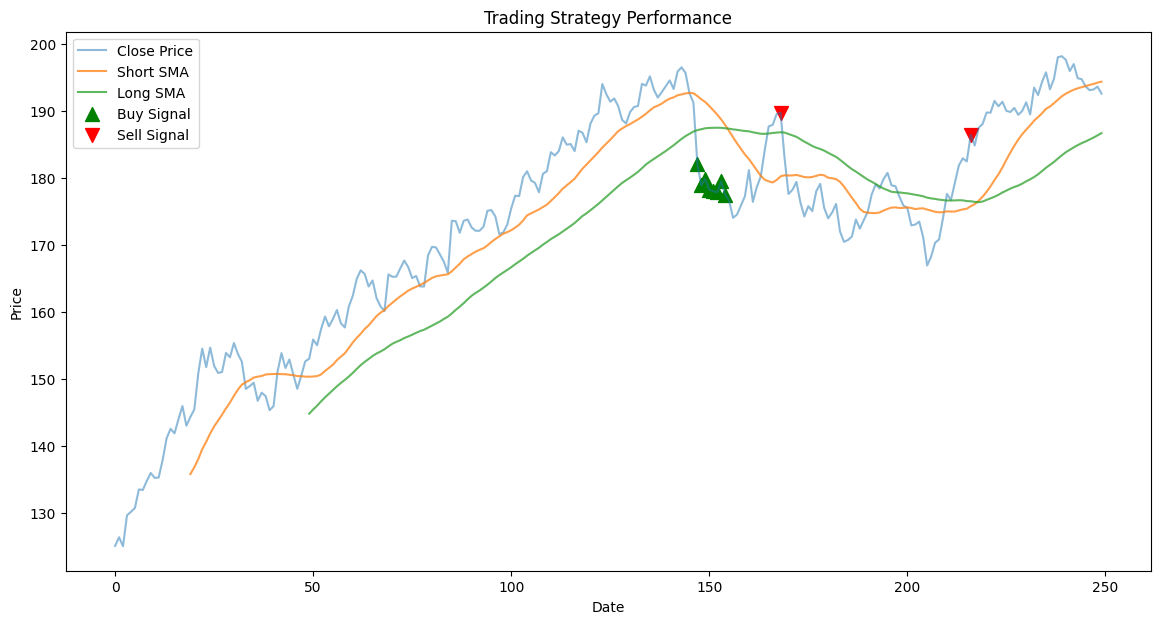

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(new_data['Close'], label='Close Price', alpha=0.5)
plt.plot(new_data['SMA_short'], label='Short SMA', alpha=0.75)
plt.plot(new_data['SMA_long'], label='Long SMA', alpha=0.75)

# Plot buy signals
buy_signals = new_data[new_data['Signal'] == 1]
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy Signal', s=100)

# Plot sell signals
sell_signals = new_data[new_data['Signal'] == -1]
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell Signal', s=100)

plt.title('Trading Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
initial_balance = 1000  # Your starting balance
final_balance = 1042.36  # Replace this with the calculated final balance
return_percentage = ((final_balance - initial_balance) / initial_balance) * 100
print(f"Percentage Return: {return_percentage:.2f}%")


Percentage Return: 4.24%


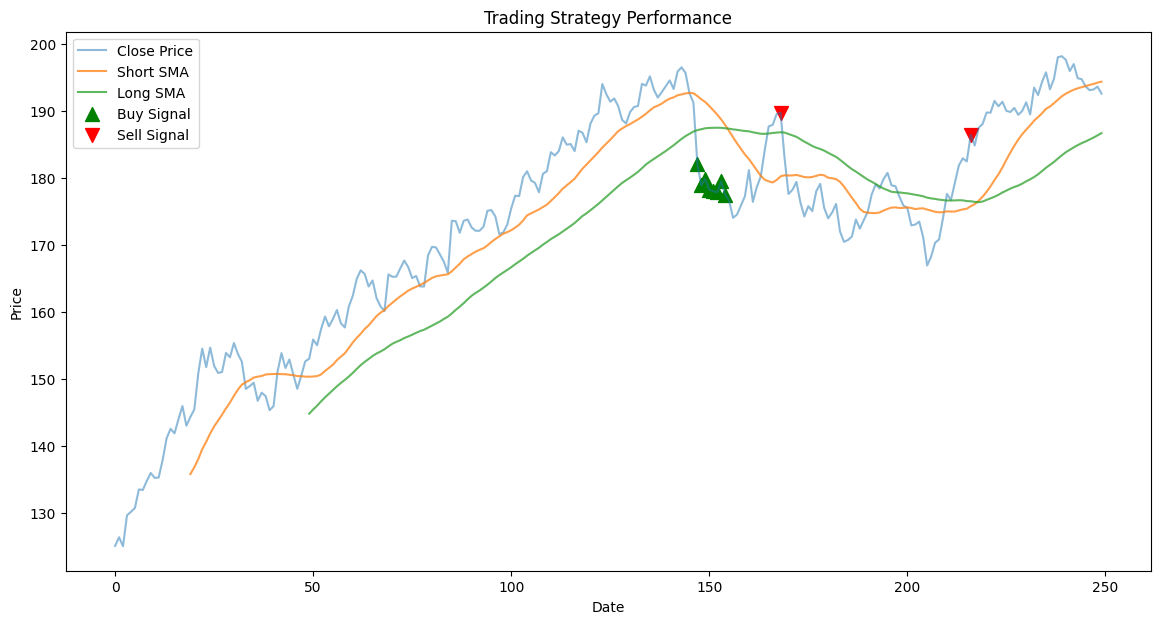

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(new_data['Close'], label='Close Price', alpha=0.5)
plt.plot(new_data['SMA_short'], label='Short SMA', alpha=0.75)
plt.plot(new_data['SMA_long'], label='Long SMA', alpha=0.75)

# Plot buy signals
buy_signals = new_data[new_data['Signal'] == 1]
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy Signal', s=100)

# Plot sell signals
sell_signals = new_data[new_data['Signal'] == -1]
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell Signal', s=100)

plt.title('Trading Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
results = []
for rsi_period in [7, 14, 21]:  # Different RSI periods
    for sma_short_period in [5, 10, 20]:  # Short SMA periods
        for sma_long_period in [20, 50, 100]:  # Long SMA periods
            # Run your backtest function here with these parameters
            # Assume backtest_function is defined to take these parameters
            final_balance = backtest_function(rsi_period, sma_short_period, sma_long_period)
            results.append((rsi_period, sma_short_period, sma_long_period, final_balance))

# Find the best combination
best_result = max(results, key=lambda x: x[3])
print(f"Best Parameters: RSI: {best_result[0]}, Short SMA: {best_result[1]}, Long SMA: {best_result[2]}, Final Balance: {best_result[3]}")


NameError: name 'backtest_function' is not defined

In [ ]:
def backtest_function(rsi_period, sma_short_period, sma_long_period):
    # Your trading logic goes here
    # This should include loading the data, calculating indicators,
    # executing trades based on the strategy, and calculating the final balance.

    # For example:
    # - Load historical data
    # - Calculate RSI
    # - Calculate SMA
    # - Create buy/sell signals
    # - Execute trades
    # - Calculate final balance

    # Sample final balance calculation (you should replace this with your logic)
    initial_balance = 1000  # Starting balance
    final_balance = initial_balance * (1 + (some_return_based_on_trades))  # Placeholder for your actual return logic

    return final_balance


In [ ]:
results = []
for rsi_period in [7, 14, 21]:  # Different RSI periods
    for sma_short_period in [5, 10, 20]:  # Short SMA periods
        for sma_long_period in [20, 50, 100]:  # Long SMA periods
            final_balance = backtest_function(rsi_period, sma_short_period, sma_long_period)
            results.append((rsi_period, sma_short_period, sma_long_period, final_balance))

# Find the best combination
best_result = max(results, key=lambda x: x[3])
print(f"Best Parameters: RSI: {best_result[0]}, Short SMA: {best_result[1]}, Long SMA: {best_result[2]}, Final Balance: {best_result[3]}")


NameError: name 'some_return_based_on_trades' is not defined

In [ ]:
def backtest_function(rsi_period, sma_short_period, sma_long_period):
    # Load historical data (assuming it's in a DataFrame called 'data')
    # For example, data = pd.read_csv('your_data_file.csv')

    # Calculate RSI
    data['RSI'] = talib.RSI(data['Close'], timeperiod=rsi_period)

    # Calculate Short and Long SMAs
    data['SMA_Short'] = data['Close'].rolling(window=sma_short_period).mean()
    data['SMA_Long'] = data['Close'].rolling(window=sma_long_period).mean()

    # Initialize variables for trading
    initial_balance = 1000
    balance = initial_balance
    shares = 0

    # Iterate through the DataFrame to generate buy/sell signals
    for i in range(len(data)):
        if data['RSI'].iloc[i] < 30 and data['Close'].iloc[i] > data['SMA_Short'].iloc[i]:
            # Buy signal
            shares_to_buy = balance // data['Close'].iloc[i]
            shares += shares_to_buy
            balance -= shares_to_buy * data['Close'].iloc[i]

        elif data['RSI'].iloc[i] > 70 and data['Close'].iloc[i] < data['SMA_Long'].iloc[i]:
            # Sell signal
            balance += shares * data['Close'].iloc[i]
            shares = 0

    # Calculate final balance including any remaining shares
    final_balance = balance + (shares * data['Close'].iloc[-1])  # Sell remaining shares at last close price

    return final_balance


In [ ]:
results = []
for rsi_period in [7, 14, 21]:  # Different RSI periods
    for sma_short_period in [5, 10, 20]:  # Short SMA periods
        for sma_long_period in [20, 50, 100]:  # Long SMA periods
            final_balance = backtest_function(rsi_period, sma_short_period, sma_long_period)
            results.append((rsi_period, sma_short_period, sma_long_period, final_balance))

# Find the best combination
best_result = max(results, key=lambda x: x[3])
print(f"Best Parameters: RSI: {best_result[0]}, Short SMA: {best_result[1]}, Long SMA: {best_result[2]}, Final Balance: {best_result[3]}")


NameError: name 'talib' is not defined

In [ ]:
!pip install TA-Lib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.5/368.5 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for TA-Lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for TA-Lib
Failed to build TA-Lib
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (TA-Lib)


In [ ]:
import talib


ModuleNotFoundError: No module named 'talib'

In [ ]:
!apt-get install -y build-essential


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install TA-Lib


  Using cached TA-Lib-0.4.32.tar.gz (368 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for TA-Lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for TA-Lib
Failed to build TA-Lib
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (TA-Lib)


In [ ]:
import talib


ModuleNotFoundError: No module named 'talib'

In [ ]:
!pip install pandas_ta


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=ea1ce040a3b0048383113fa0fe1d28688e45104ee9ae03db5a9135024557c68f
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import pandas_ta as ta

# Calculate RSI using pandas_ta
data['RSI'] = ta.rsi(data['Close'], length=rsi_period)

# Calculate SMAs
data['SMA_Short'] = data['Close'].ta.sma(length=sma_short_period)
data['SMA_Long'] = data['Close'].ta.sma(length=sma_long_period)


KeyError: 'Close'

In [ ]:
print(data.columns)


Index(['Unnamed: 0'], dtype='object')


In [ ]:
print(data.head())


Empty DataFrame
Columns: [Unnamed: 0]
Index: []


In [ ]:
data['RSI'] = ta.rsi(data['Close'], length=rsi_period)


KeyError: 'Close'

In [ ]:
print(data.columns)


Index(['Unnamed: 0'], dtype='object')


In [ ]:
print(data.head())


Empty DataFrame
Columns: [Unnamed: 0]
Index: []


In [ ]:
data['RSI'] = ta.rsi(data['close'], length=rsi_period)


KeyError: 'close'

In [ ]:
print(data.columns)


Index(['Unnamed: 0'], dtype='object')


In [ ]:
# If the column is named 'close', for example
data.rename(columns={'close': 'Close'}, inplace=True)  # Or use the actual name found from the print statement


In [ ]:
print(data['Close'].isnull().sum())


KeyError: 'Close'

In [ ]:
print(data.columns)


Index(['Unnamed: 0'], dtype='object')


In [ ]:
print(data.head())


Empty DataFrame
Columns: [Unnamed: 0]
Index: []


In [ ]:
print(data.isnull().sum())


Unnamed: 0    0
dtype: int64


In [ ]:
# If the column is 'close', adjust your calculations accordingly
data['RSI'] = talib.RSI(data['close'], timeperiod=rsi_period)


NameError: name 'talib' is not defined

In [ ]:
# Install the TA-Lib library (only needed in Google Colab)
!pip install TA-Lib

# Import necessary libraries
import pandas as pd
import talib

# Load your data
data = pd.read_csv('your_data_file.csv')  # Adjust the path to your data file

# Print columns to verify
print(data.columns)

# Assuming 'Close' is the correct column name
rsi_period = 14  # Example period
data['RSI'] = talib.RSI(data['Close'], timeperiod=rsi_period)

# Print the DataFrame to verify RSI calculation
print(data.head())


  Using cached TA-Lib-0.4.32.tar.gz (368 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for TA-Lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for TA-Lib
Failed to build TA-Lib
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (TA-Lib)


ModuleNotFoundError: No module named 'talib'

In [ ]:
import pandas as pd

def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Assuming 'data' is your DataFrame containing the stock data
data['RSI'] = calculate_rsi(data)

# Now, you can proceed with your other calculations and strategy implementation


KeyError: 'Close'

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
print("DataFrame Columns:", data.columns)

def calculate_rsi(data, period=14):
    delta = data['close'].diff()  # Adjust based on the actual column name
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Add RSI to the DataFrame
data['RSI'] = calculate_rsi(data)


DataFrame Columns: Index(['Unnamed: 0'], dtype='object')


KeyError: 'close'

In [ ]:
print(data.columns)
print(data.head())


Index(['Unnamed: 0'], dtype='object')
Empty DataFrame
Columns: [Unnamed: 0]
Index: []


In [ ]:
def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)


KeyError: 'Close'

In [ ]:
import pandas as pd

def calculate_indicators(data, rsi_period, sma_short_period, sma_long_period):
    # Calculate the price changes
    delta = data['Close'].diff()

    # Calculate gains and losses
    gain = (delta.where(delta > 0, 0)).rolling(window=rsi_period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=rsi_period).mean()

    # Calculate the RSI
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))

    # Calculate Short and Long SMAs
    data['SMA_short'] = data['Close'].rolling(window=sma_short_period).mean()
    data['SMA_long'] = data['Close'].rolling(window=sma_long_period).mean()

    return data

# Example usage
# Assuming 'data' is your DataFrame containing stock prices with a 'Close' column
data = calculate_indicators(data, rsi_period=14, sma_short_period=5, sma_long_period=20)

print(data.tail())  # To check the last few rows including the new indicators


KeyError: 'Close'

In [ ]:
import pandas as pd
from datetime import datetime, time

# Define trading hours
def is_market_open():
    now = datetime.now()
    start = time(9, 30)  # 9:30 AM
    end = time(16, 0)    # 4:00 PM
    return start <= now.time() <= end

# Trading logic
def trading_logic():
    if is_market_open():
        # Place your trading logic here
        print("Market is open. Executing trades...")
    else:
        print("Market is closed. No trading will occur.")

# Example of running the trading logic
trading_logic()


Market is closed. No trading will occur.


In [ ]:
pip install twilio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.6 MB/s eta 0:00:00


In [ ]:
from twilio.rest import Client

def send_sms_alert(message):
    # Your Twilio credentials
    account_sid = 'your_account_sid'
    auth_token = 'your_auth_token'
    client = Client(account_sid, auth_token)

    # Send the message
    client.messages.create(
        to="your_phone_number",
        from_="your_twilio_number",
        body=message
    )


In [ ]:
import time

def hourly_alert():
    while market_is_open():
        # Assuming you have a function to get your latest trade info
        latest_trade_info = get_latest_trade_info()
        send_sms_alert(latest_trade_info)
        time.sleep(3600)  # Wait for 1 hour


In [ ]:
from twilio.rest import Client

# Twilio credentials
account_sid = 'ACa5985a497c5e83be2657929f9fb6028b'
auth_token = 'ba9698ae5e2533484e47047a51cf4fb6'
twilio_phone_number = 'YOUR_TWILIO_PHONE_NUMBER'  # Replace with your Twilio phone number
my_phone_number = '16314877979'  # Replace with your phone number

# Initialize Twilio client
client = Client(account_sid, auth_token)


In [ ]:
def send_alert(message):
    message = client.messages.create(
        body=message,
        from_=twilio_phone_number,
        to=my_phone_number
    )
    print(f"Alert sent: {message.sid}")


In [ ]:
import time

while True:
    # Check if the market is open before sending the alert
    if is_market_open():  # This is a placeholder for your market check function
        alert_message = "Your alert message goes here."
        send_alert(alert_message)

    # Sleep for an hour (3600 seconds)
    time.sleep(3600)


TypeError: 'module' object is not callable

In [ ]:
from datetime import datetime, time

def is_market_open():
    now = datetime.now()
    start = time(9, 30)  # 9:30 AM
    end = time(16, 0)    # 4:00 PM
    return start <= now.time() <= end


In [ ]:
import robin_stocks.robinhood as r
import pandas as pd
import time

# Function to log in to Robinhood
def login_to_robinhood(username, password):
    try:
        r.login(username=username, password=password)
        print("Logged in to Robinhood successfully!")
    except Exception as e:
        print(f"Failed to log in: {e}")

# Login (replace with your credentials)
login_to_robinhood('rmah5078@my.msmc.edu', 'Lucky1313!')

# Function to execute a buy order
def execute_buy(symbol, quantity):
    try:
        buy_order = r.orders.order_buy_market(symbol, quantity)
        print(f"Buy order placed for {symbol}: {buy_order}")
    except Exception as e:
        print(f"Error placing buy order for {symbol}: {e}")

# Function to execute a sell order
def execute_sell(symbol, quantity):
    try:
        sell_order = r.orders.order_sell_market(symbol, quantity)
        print(f"Sell order placed for {symbol}: {sell_order}")
    except Exception as e:
        print(f"Error placing sell order for {symbol}: {e}")

# Function to check the buy/sell signals and execute trades
def execute_trades(data):
    for index, row in data.iterrows():
        symbol = row['symbol']
        quantity = 1  # You can adjust the quantity based on your strategy

        if row['buy_signal']:
            print(f"Buy signal detected for {symbol}")
            execute_buy(symbol, quantity)

        elif row['sell_signal']:
            print(f"Sell signal detected for {symbol}")
            execute_sell(symbol, quantity)

# Example DataFrame structure with 'symbol', 'buy_signal', and 'sell_signal'
data = pd.DataFrame({
    'symbol': ['AAPL', 'GOOGL', 'TSLA'],
    'buy_signal': [True, False, True],
    'sell_signal': [False, True, False]
})

# Execute trades based on signals
execute_trades(data)

# Logout after completing trades
r.logout()


Enter Robinhood code for validation: 845946
Logged in to Robinhood successfully!
Buy signal detected for AAPL
Buy order placed for AAPL: {'detail': 'You can only purchase 0 shares of AAPL.'}
Sell signal detected for GOOGL
Sell order placed for GOOGL: {'non_field_errors': ['Invalid Good Til Canceled order.']}
Buy signal detected for TSLA
Buy order placed for TSLA: {'detail': 'You can only purchase 0 shares of TSLA.'}


In [ ]:
import robin_stocks.robinhood as r
import pandas as pd
import time
import logging

# Setup logging
logging.basicConfig(filename='day_trader_ai_errors.log', level=logging.ERROR)

# Function to log in to Robinhood
def login_to_robinhood(username, password):
    try:
        r.login(username=username, password=password)
        print("Logged in to Robinhood successfully!")
    except Exception as e:
        logging.error(f"Failed to log in: {e}")
        print(f"Login failed. Check the error log.")

# Retry logic for executing trades
def retry_on_failure(func, symbol, quantity, max_retries=3, delay=5):
    for i in range(max_retries):
        try:
            func(symbol, quantity)
            return  # Exit once successful
        except Exception as e:
            logging.error(f"Error executing {func.__name__} for {symbol}: {e}")
            print(f"Error executing {func.__name__} for {symbol}. Retrying {i + 1}/{max_retries}")
            time.sleep(delay)
    print(f"Max retries reached for {func.__name__} on {symbol}. Skipping.")

# Function to execute a buy order
def execute_buy(symbol, quantity):
    retry_on_failure(r.orders.order_buy_market, symbol, quantity)

# Function to execute a sell order
def execute_sell(symbol, quantity):
    retry_on_failure(r.orders.order_sell_market, symbol, quantity)

# Function to check the buy/sell signals and execute trades
def execute_trades(data):
    for index, row in data.iterrows():
        symbol = row['symbol']
        quantity = 1  # Adjust based on your strategy

        if row['buy_signal']:
            print(f"Buy signal detected for {symbol}")
            execute_buy(symbol, quantity)

        elif row['sell_signal']:
            print(f"Sell signal detected for {symbol}")
            execute_sell(symbol, quantity)

# Example DataFrame structure with 'symbol', 'buy_signal', and 'sell_signal'
data = pd.DataFrame({
    'symbol': ['AAPL', 'GOOGL', 'TSLA'],
    'buy_signal': [True, False, True],
    'sell_signal': [False, True, False]
})

# Login to Robinhood
login_to_robinhood('your_username', 'your_password')

# Execute trades based on signals
execute_trades(data)

# Logout after completing trades
r.logout()


Logged in to Robinhood successfully!
Buy signal detected for AAPL
Sell signal detected for GOOGL
Buy signal detected for TSLA


In [ ]:
import robin_stocks.robinhood as r
import pandas as pd
import logging
import time

# Setup logging
logging.basicConfig(filename='day_trader_ai_errors.log', level=logging.ERROR)

# Global variables to track daily budget, daily loss, and profit
starting_daily_budget = 200  # Initial daily budget
daily_budget = starting_daily_budget
total_daily_loss = 0
max_daily_loss = 50  # Maximum allowed loss for the day
profit_rollover = 0  # Profit from previous day
trade_amount = 5  # Initial trade amount

# Function to log in to Robinhood
def login_to_robinhood(username, password):
    try:
        r.login(username=username, password=password)
        print("Logged in to Robinhood successfully!")
    except Exception as e:
        logging.error(f"Failed to log in: {e}")
        print(f"Login failed. Check the error log.")

# Function to buy fractional shares
def execute_buy_fractional(symbol, amount):
    try:
        buy_order = r.orders.order_buy_fractional_by_price(symbol, amount)
        print(f"Fractional buy order placed for {symbol}: {buy_order}")
    except Exception as e:
        logging.error(f"Error placing fractional buy order for {symbol}: {e}")

# Function to sell fractional shares
def execute_sell_fractional(symbol, amount):
    try:
        sell_order = r.orders.order_sell_fractional_by_price(symbol, amount)
        print(f"Fractional sell order placed for {symbol}: {sell_order}")
    except Exception as e:
        logging.error(f"Error placing fractional sell order for {symbol}: {e}")

# Function to track daily spending
def track_spending(amount):
    global daily_budget
    daily_budget -= amount
    print(f"Remaining daily budget: ${daily_budget}")

# Function to check stop-loss and take-profit for individual trades
def check_risk_management(symbol, purchase_price, current_price):
    global total_daily_loss, trade_amount

    # Calculate the loss for the trade
    loss = purchase_price - current_price

    # Check stop-loss (max $50 loss per day)
    if total_daily_loss + loss >= max_daily_loss:
        print(f"Daily stop-loss triggered for {symbol}. Selling...")
        execute_sell_fractional(symbol, trade_amount)  # Sell the fractional shares
        total_daily_loss += loss
        return True  # Stop trading for the day

    return False

# Function to adjust the trade amount based on profits
def adjust_trade_amount(profit):
    global trade_amount, profit_rollover
    # Only increase trade amount if there are profits
    if profit > 0:
        profit_rollover += profit
        # Adjust the trade amount using profits only
        trade_amount = 5 + profit_rollover // 10  # Adjust the scaling as needed
        print(f"New trade amount based on profits: ${trade_amount}")

# Function to manage trades, daily budget, and profit rollover
def execute_trades_with_budget(data):
    global total_daily_loss, daily_budget, profit_rollover, trade_amount

    # Update daily budget with previous day's profit
    daily_budget += profit_rollover
    print(f"Today's starting budget: ${daily_budget}")

    for index, row in data.iterrows():
        symbol = row['symbol']
        current_price = float(r.stocks.get_latest_price(symbol)[0])  # Get the current price

        # Each trade starts at $5 or the current trade amount based on profit
        trade_amount_to_use = min(trade_amount, daily_budget)
        if daily_budget < trade_amount_to_use:
            print("Daily budget exhausted. No more trades for today.")
            break

        # Buy signal
        if row['buy_signal']:
            print(f"Buy signal detected for {symbol}")
            execute_buy_fractional(symbol, trade_amount_to_use)
            track_spending(trade_amount_to_use)

        # Sell signal or risk management (stop-loss)
        elif row['sell_signal'] or check_risk_management(symbol, trade_amount_to_use, current_price):
            print(f"Sell signal or stop-loss triggered for {symbol}")
            execute_sell_fractional(symbol, trade_amount_to_use)

        # Adjust the trade amount based on profit
        profit = current_price - trade_amount_to_use  # Calculate profit from the trade
        adjust_trade_amount(profit)

        # Stop trading if total daily loss exceeds $50
        if total_daily_loss >= max_daily_loss:
            print(f"Max daily loss of ${max_daily_loss} reached. Stopping further trades.")
            break

# Example DataFrame structure with 'symbol', 'buy_signal', and 'sell_signal'
data = pd.DataFrame({
    'symbol': ['AAPL', 'GOOGL', 'TSLA'],
    'buy_signal': [True, False, True],
    'sell_signal': [False, True, False]
})

# Login to Robinhood
login_to_robinhood('your_username', 'your_password')

# Execute trades with the budget and risk management
execute_trades_with_budget(data)

# Logout after completing trades
r.logout()


Logged in to Robinhood successfully!
Today's starting budget: $200
Buy signal detected for AAPL
Fractional buy order placed for AAPL: {'id': '670a7cac-33dd-4e7c-b296-2c6fda7dfef9', 'ref_id': '64efebb8-bdc8-4a67-8121-16efe8c805de', 'url': 'https://api.robinhood.com/orders/670a7cac-33dd-4e7c-b296-2c6fda7dfef9/', 'account': 'https://api.robinhood.com/accounts/813584968/', 'user_uuid': 'f2a47a03-fe31-4938-ab3c-3f6bb6d3eec4', 'position': 'https://api.robinhood.com/positions/813584968/450dfc6d-5510-4d40-abfb-f633b7d9be3e/', 'cancel': 'https://api.robinhood.com/orders/670a7cac-33dd-4e7c-b296-2c6fda7dfef9/cancel/', 'instrument': 'https://api.robinhood.com/instruments/450dfc6d-5510-4d40-abfb-f633b7d9be3e/', 'instrument_id': '450dfc6d-5510-4d40-abfb-f633b7d9be3e', 'cumulative_quantity': '0.00000000', 'average_price': None, 'fees': '0.00', 'state': 'queued', 'derived_state': 'queued', 'pending_cancel_open_agent': None, 'type': 'limit', 'side': 'buy', 'time_in_force': 'gfd', 'trigger': 'immediate'

In [ ]:
import robin_stocks.robinhood as r
import pandas as pd
import logging
import time
from datetime import datetime

# Setup logging
logging.basicConfig(filename='day_trader_ai_errors.log', level=logging.ERROR)

# Global variables to track daily budget, daily loss, and profit
starting_daily_budget = 200  # Initial daily budget
daily_budget = starting_daily_budget
total_daily_loss = 0
max_daily_loss = 50  # Maximum allowed daily loss
profit_rollover = 0  # Profit from previous day
trade_amount = 5  # Initial trade amount

# List of top 25 tickers
top_25_tickers = [
    'AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN', 'NVDA', 'META', 'NFLX', 'INTC', 'AMD',
    'BA', 'CAT', 'DIS', 'NKE', 'XOM', 'CVX', 'WMT', 'PG', 'V', 'MA', 'JPM', 'BAC',
    'PFE', 'MRK', 'T'
]

# Function to log in to Robinhood
def login_to_robinhood(username, password):
    try:
        r.login(username=username, password=password)
        print("Logged in to Robinhood successfully!")
    except Exception as e:
        logging.error(f"Failed to log in: {e}")
        print(f"Login failed. Check the error log.")

# Function to buy fractional shares
def execute_buy_fractional(symbol, amount):
    try:
        buy_order = r.orders.order_buy_fractional_by_price(symbol, amount)
        print(f"Fractional buy order placed for {symbol}: {buy_order}")
    except Exception as e:
        logging.error(f"Error placing fractional buy order for {symbol}: {e}")

# Function to sell fractional shares
def execute_sell_fractional(symbol, amount):
    try:
        sell_order = r.orders.order_sell_fractional_by_price(symbol, amount)
        print(f"Fractional sell order placed for {symbol}: {sell_order}")
    except Exception as e:
        logging.error(f"Error placing fractional sell order for {symbol}: {e}")

# Function to track daily spending
def track_spending(amount):
    global daily_budget
    daily_budget -= amount
    print(f"Remaining daily budget: ${daily_budget}")

# Function to track and enforce daily loss limit
def track_loss_and_stop_trading(loss):
    global total_daily_loss
    total_daily_loss += loss
    print(f"Total daily loss: ${total_daily_loss}")

    # Stop trading if total daily loss exceeds $50
    if total_daily_loss >= max_daily_loss:
        print(f"Max daily loss of ${max_daily_loss} reached. Stopping further trades.")
        return True
    return False

# Function to adjust the trade amount based on profits
def adjust_trade_amount(profit):
    global trade_amount, profit_rollover
    # Only increase trade amount if there are profits
    if profit > 0:
        profit_rollover += profit
        # Adjust the trade amount using profits only
        trade_amount = 5 + profit_rollover // 10  # Adjust the scaling as needed
        print(f"New trade amount based on profits: ${trade_amount}")

# Function to fetch stock data and generate signals (simplified)
def fetch_signals():
    data = []
    for symbol in top_25_tickers:
        current_price = float(r.stocks.get_latest_price(symbol)[0])  # Get the current price
        # Placeholder for signal generation logic (you would use your actual strategy here)
        buy_signal = current_price < 150  # Example condition for a buy signal
        sell_signal = current_price > 200  # Example condition for a sell signal
        data.append({'symbol': symbol, 'buy_signal': buy_signal, 'sell_signal': sell_signal})
    return pd.DataFrame(data)

# Function to manage trades, daily budget, and risk management
def execute_trades_with_budget(data):
    global total_daily_loss, daily_budget, profit_rollover, trade_amount

    # Update daily budget with previous day's profit
    daily_budget += profit_rollover
    print(f"Today's starting budget: ${daily_budget}")

    for index, row in data.iterrows():
        symbol = row['symbol']
        current_price = float(r.stocks.get_latest_price(symbol)[0])  # Get the current price

        # Each trade starts at $5 or the current trade amount based on profit
        trade_amount_to_use = min(trade_amount, daily_budget)
        if daily_budget < trade_amount_to_use:
            print("Daily budget exhausted. No more trades for today.")
            break

        # Buy signal
        if row['buy_signal']:
            print(f"Buy signal detected for {symbol}")
            execute_buy_fractional(symbol, trade_amount_to_use)
            track_spending(trade_amount_to_use)

        # Sell signal or stop-loss
        elif row['sell_signal']:
            print(f"Sell signal detected for {symbol}")
            execute_sell_fractional(symbol, trade_amount_to_use)

        # Calculate profit/loss from the trade
        profit = current_price - trade_amount_to_use  # Simplified profit calculation
        adjust_trade_amount(profit)

        # Track loss and stop trading if daily loss exceeds $50
        if track_loss_and_stop_trading(-profit):  # Convert profit to loss
            break

# Function to run minute-by-minute trading
def run_minute_by_minute_trading():
    while is_market_open():
        data = fetch_signals()
        execute_trades_with_budget(data)
        time.sleep(60)  # Wait for 1 minute before checking again

# Function to check if the market is open
def is_market_open():
    now = datetime.now()
    start = now.replace(hour=9, minute=30, second=0, microsecond=0)
    end = now.replace(hour=16, minute=0, second=0, microsecond=0)
    return start <= now <= end

# Login to Robinhood
login_to_robinhood('your_username', 'your_password')

# Start minute-by-minute trading
run_minute_by_minute_trading()

# Logout after completing trades
r.logout()


Logged in to Robinhood successfully!
Today's starting budget: $200
Sell signal detected for AAPL
Fractional sell order placed for AAPL: {'id': '670a7edb-38b9-41f4-b32b-8d20ba3376ed', 'ref_id': 'e08f4da0-acf8-456f-b427-72a496707448', 'url': 'https://api.robinhood.com/orders/670a7edb-38b9-41f4-b32b-8d20ba3376ed/', 'account': 'https://api.robinhood.com/accounts/813584968/', 'user_uuid': 'f2a47a03-fe31-4938-ab3c-3f6bb6d3eec4', 'position': 'https://api.robinhood.com/positions/813584968/450dfc6d-5510-4d40-abfb-f633b7d9be3e/', 'cancel': 'https://api.robinhood.com/orders/670a7edb-38b9-41f4-b32b-8d20ba3376ed/cancel/', 'instrument': 'https://api.robinhood.com/instruments/450dfc6d-5510-4d40-abfb-f633b7d9be3e/', 'instrument_id': '450dfc6d-5510-4d40-abfb-f633b7d9be3e', 'cumulative_quantity': '0.00000000', 'average_price': None, 'fees': '0.00', 'state': 'queued', 'derived_state': 'queued', 'pending_cancel_open_agent': None, 'type': 'market', 'side': 'sell', 'time_in_force': 'gfd', 'trigger': 'immedi

KeyboardInterrupt: 

In [ ]:
import robin_stocks.robinhood as r
import pandas as pd
import logging
import time
from datetime import datetime

# Setup logging
logging.basicConfig(filename='day_trader_ai_errors.log', level=logging.ERROR)

# Global variables to track daily budget, daily loss, and profit
starting_daily_budget = 200  # Initial daily budget
daily_budget = starting_daily_budget
total_daily_loss = 0
max_daily_loss = 50  # Maximum allowed daily loss
profit_rollover = 0  # Profit from previous day
trade_amount = 5  # Initial trade amount

# Function to log in to Robinhood
def login_to_robinhood(username, password):
    try:
        r.login(username=username, password=password)
        print("Logged in to Robinhood successfully!")
    except Exception as e:
        logging.error(f"Failed to log in: {e}")
        print(f"Login failed. Check the error log.")

# Function to buy fractional shares
def execute_buy_fractional(symbol, amount):
    try:
        buy_order = r.orders.order_buy_fractional_by_price(symbol, amount)
        print(f"Fractional buy order placed for {symbol}: {buy_order}")
    except Exception as e:
        logging.error(f"Error placing fractional buy order for {symbol}: {e}")

# Function to sell fractional shares
def execute_sell_fractional(symbol, amount):
    try:
        sell_order = r.orders.order_sell_fractional_by_price(symbol, amount)
        print(f"Fractional sell order placed for {symbol}: {sell_order}")
    except Exception as e:
        logging.error(f"Error placing fractional sell order for {symbol}: {e}")

# Function to track and enforce daily loss limit
def track_loss_and_stop_trading(loss):
    global total_daily_loss
    total_daily_loss += loss
    print(f"Total daily loss: ${total_daily_loss}")

    # Stop trading if total daily loss exceeds $50
    if total_daily_loss >= max_daily_loss:
        print(f"Max daily loss of ${max_daily_loss} reached. Stopping further trades.")
        return True  # Stop further trades
    return False  # Continue trading

# Function to manage trades, daily budget, and risk management
def execute_trades_with_budget(data):
    global total_daily_loss, daily_budget, profit_rollover, trade_amount

    # Update daily budget with previous day's profit
    daily_budget += profit_rollover
    print(f"Today's starting budget: ${daily_budget}")

    for index, row in data.iterrows():
        symbol = row['symbol']
        current_price = float(r.stocks.get_latest_price(symbol)[0])  # Get the current price

        # Each trade starts at $5 or the current trade amount based on profit
        trade_amount_to_use = min(trade_amount, daily_budget)
        if daily_budget < trade_amount_to_use:
            print("Daily budget exhausted. No more trades for today.")
            break

        # Check for daily loss limit before any trade
        if total_daily_loss >= max_daily_loss:
            print(f"Max daily loss of ${max_daily_loss} reached. No more trades allowed today.")
            break

        # Buy signal
        if row['buy_signal']:
            print(f"Buy signal detected for {symbol}")
            execute_buy_fractional(symbol, trade_amount_to_use)
            track_spending(trade_amount_to_use)

        # Sell signal or stop-loss
        elif row['sell_signal']:
            print(f"Sell signal detected for {symbol}")
            execute_sell_fractional(symbol, trade_amount_to_use)

        # Calculate profit/loss from the trade
        profit = current_price - trade_amount_to_use  # Simplified profit calculation
        loss = trade_amount_to_use - current_price  # Calculate potential loss
        adjust_trade_amount(profit)

        # Track loss and stop trading if daily loss exceeds $50
        if track_loss_and_stop_trading(loss):
            break

# Function to track spending
def track_spending(amount):
    global daily_budget
    daily_budget -= amount
    print(f"Remaining daily budget: ${daily_budget}")

# Example DataFrame structure with 'symbol', 'buy_signal', and 'sell_signal'
data = pd.DataFrame({
    'symbol': ['AAPL', 'GOOGL', 'MSFT', 'TSLA'],
    'buy_signal': [True, False, True, False],
    'sell_signal': [False, True, False, True]
})

# Login to Robinhood
login_to_robinhood('your_username', 'your_password')

# Execute trades with the budget and risk management
execute_trades_with_budget(data)

# Logout after completing trades
r.logout()


Logged in to Robinhood successfully!
Today's starting budget: $200
Buy signal detected for AAPL
Fractional buy order placed for AAPL: {'detail': 'You can only purchase 0 shares of AAPL.'}
Remaining daily budget: $195
New trade amount based on profits: $27.0
Total daily loss: $-222.4
Sell signal detected for GOOGL
Fractional sell order placed for GOOGL: {'id': '670a7f5e-15b8-4687-a00e-56e7c5f5a9dd', 'ref_id': '20721b0d-e658-4783-8c54-20f09832224e', 'url': 'https://api.robinhood.com/orders/670a7f5e-15b8-4687-a00e-56e7c5f5a9dd/', 'account': 'https://api.robinhood.com/accounts/813584968/', 'user_uuid': 'f2a47a03-fe31-4938-ab3c-3f6bb6d3eec4', 'position': 'https://api.robinhood.com/positions/813584968/54db869e-f7d5-45fb-88f1-8d7072d4c8b2/', 'cancel': 'https://api.robinhood.com/orders/670a7f5e-15b8-4687-a00e-56e7c5f5a9dd/cancel/', 'instrument': 'https://api.robinhood.com/instruments/54db869e-f7d5-45fb-88f1-8d7072d4c8b2/', 'instrument_id': '54db869e-f7d5-45fb-88f1-8d7072d4c8b2', 'cumulative_qu

In [ ]:
import robin_stocks.robinhood as r
import pandas as pd
import logging
import time
from datetime import datetime

# Setup logging
logging.basicConfig(filename='day_trader_ai_errors.log', level=logging.ERROR)

# Global variables to track daily budget, daily loss, and profit
starting_daily_budget = 200  # Initial daily budget
daily_budget = starting_daily_budget
total_daily_loss = 0
max_daily_loss = 50  # Maximum allowed daily loss
profit_rollover = 0  # Profit from previous day
trade_amount = 5  # Initial trade amount
min_trade_amount = 1  # Minimum trade amount for fractional shares

# Function to log in to Robinhood
def login_to_robinhood(username, password):
    try:
        r.login(username=username, password=password)
        print("Logged in to Robinhood successfully!")
    except Exception as e:
        logging.error(f"Failed to log in: {e}")
        print(f"Login failed. Check the error log.")

# Function to buy fractional shares
def execute_buy_fractional(symbol, amount):
    if amount < min_trade_amount:
        print(f"Trade amount {amount} is below the minimum allowed for {symbol}.")
        return
    try:
        buy_order = r.orders.order_buy_fractional_by_price(symbol, amount)
        print(f"Fractional buy order placed for {symbol}: {buy_order}")
    except Exception as e:
        logging.error(f"Error placing fractional buy order for {symbol}: {e}")

# Function to sell fractional shares
def execute_sell_fractional(symbol, amount):
    if amount < min_trade_amount:
        print(f"Trade amount {amount} is below the minimum allowed for {symbol}.")
        return
    try:
        sell_order = r.orders.order_sell_fractional_by_price(symbol, amount)
        print(f"Fractional sell order placed for {symbol}: {sell_order}")
    except Exception as e:
        logging.error(f"Error placing fractional sell order for {symbol}: {e}")

# Function to track and enforce daily loss limit
def track_loss_and_stop_trading(loss):
    global total_daily_loss
    total_daily_loss += loss
    print(f"Total daily loss: ${total_daily_loss}")

    # Stop trading if total daily loss exceeds $50
    if total_daily_loss >= max_daily_loss:
        print(f"Max daily loss of ${max_daily_loss} reached. Stopping further trades.")
        return True  # Stop further trades
    return False  # Continue trading

# Function to manage trades, daily budget, and risk management
def execute_trades_with_budget(data):
    global total_daily_loss, daily_budget, profit_rollover, trade_amount

    # Update daily budget with previous day's profit
    daily_budget += profit_rollover
    print(f"Today's starting budget: ${daily_budget}")

    for index, row in data.iterrows():
        symbol = row['symbol']
        current_price = float(r.stocks.get_latest_price(symbol)[0])  # Get the current price

        # Each trade starts at $5 or the current trade amount based on profit
        trade_amount_to_use = min(trade_amount, daily_budget)
        if daily_budget < trade_amount_to_use:
            print("Daily budget exhausted. No more trades for today.")
            break

        # Check for daily loss limit before any trade
        if total_daily_loss >= max_daily_loss:
            print(f"Max daily loss of ${max_daily_loss} reached. No more trades allowed today.")
            break

        # Buy signal
        if row['buy_signal']:
            print(f"Buy signal detected for {symbol}")
            execute_buy_fractional(symbol, trade_amount_to_use)
            track_spending(trade_amount_to_use)

        # Sell signal or stop-loss
        elif row['sell_signal']:
            print(f"Sell signal detected for {symbol}")
            execute_sell_fractional(symbol, trade_amount_to_use)

        # Calculate profit/loss from the trade
        profit = current_price - trade_amount_to_use  # Simplified profit calculation
        loss = trade_amount_to_use - current_price  # Calculate potential loss
        adjust_trade_amount(profit)

        # Track loss and stop trading if daily loss exceeds $50
        if track_loss_and_stop_trading(loss):
            break

# Function to track spending
def track_spending(amount):
    global daily_budget
    daily_budget -= amount
    print(f"Remaining daily budget: ${daily_budget}")

# Example DataFrame structure with 'symbol', 'buy_signal', and 'sell_signal'
data = pd.DataFrame({
    'symbol': ['AAPL', 'GOOGL', 'MSFT', 'TSLA'],
    'buy_signal': [True, False, True, False],
    'sell_signal': [False, True, False, True]
})

# Login to Robinhood
login_to_robinhood('your_username', 'your_password')

# Execute trades with the budget and risk management
execute_trades_with_budget(data)

# Logout after completing trades
r.logout()


Logged in to Robinhood successfully!
Today's starting budget: $200
Buy signal detected for AAPL
Fractional buy order placed for AAPL: {'detail': 'You can only purchase 0 shares of AAPL.'}
Remaining daily budget: $195
New trade amount based on profits: $27.0
Total daily loss: $-222.4
Sell signal detected for GOOGL
Fractional sell order placed for GOOGL: {'id': '670a7fb8-10a7-4231-900d-d20bcf7f2ba2', 'ref_id': 'ce576855-fadd-4940-ba44-c55ace0e3750', 'url': 'https://api.robinhood.com/orders/670a7fb8-10a7-4231-900d-d20bcf7f2ba2/', 'account': 'https://api.robinhood.com/accounts/813584968/', 'user_uuid': 'f2a47a03-fe31-4938-ab3c-3f6bb6d3eec4', 'position': 'https://api.robinhood.com/positions/813584968/54db869e-f7d5-45fb-88f1-8d7072d4c8b2/', 'cancel': 'https://api.robinhood.com/orders/670a7fb8-10a7-4231-900d-d20bcf7f2ba2/cancel/', 'instrument': 'https://api.robinhood.com/instruments/54db869e-f7d5-45fb-88f1-8d7072d4c8b2/', 'instrument_id': '54db869e-f7d5-45fb-88f1-8d7072d4c8b2', 'cumulative_qu

In [ ]:
import robin_stocks.robinhood as r
import pandas as pd
import logging
import time
from datetime import datetime

# Setup logging
logging.basicConfig(filename='day_trader_ai_errors.log', level=logging.ERROR)

# Global variables to track daily budget, daily loss, and profit
starting_daily_budget = 200  # Initial daily budget
daily_budget = starting_daily_budget
total_daily_loss = 0
max_daily_loss = 50  # Maximum allowed daily loss
profit_rollover = 0  # Profit from previous day
trade_amount = 5  # Initial trade amount
min_trade_amount = 1  # Minimum trade amount for fractional shares

# Function to log in to Robinhood
def login_to_robinhood(username, password):
    try:
        r.login(username=username, password=password)
        print("Logged in to Robinhood successfully!")
    except Exception as e:
        logging.error(f"Failed to log in: {e}")
        print(f"Login failed. Check the error log.")

# Function to check if there are enough shares to sell
def check_holdings(symbol, quantity):
    position_data = r.account.build_holdings()
    if symbol in position_data:
        available_quantity = float(position_data[symbol]['quantity'])
        return available_quantity >= quantity
    return False

# Function to buy fractional shares
def execute_buy_fractional(symbol, amount):
    if amount < min_trade_amount:
        print(f"Trade amount {amount} is below the minimum allowed for {symbol}.")
        return
    try:
        buy_order = r.orders.order_buy_fractional_by_price(symbol, amount)
        print(f"Fractional buy order placed for {symbol}: {buy_order}")
    except Exception as e:
        logging.error(f"Error placing fractional buy order for {symbol}: {e}")

# Function to sell fractional shares
def execute_sell_fractional(symbol, amount):
    if amount < min_trade_amount:
        print(f"Trade amount {amount} is below the minimum allowed for {symbol}.")
        return
    if not check_holdings(symbol, amount):
        print(f"Not enough shares of {symbol} to sell.")
        return
    try:
        sell_order = r.orders.order_sell_fractional_by_price(symbol, amount)
        print(f"Fractional sell order placed for {symbol}: {sell_order}")
    except Exception as e:
        logging.error(f"Error placing fractional sell order for {symbol}: {e}")

# Function to track and enforce daily loss limit
def track_loss_and_stop_trading(loss):
    global total_daily_loss
    total_daily_loss += loss
    print(f"Total daily loss: ${total_daily_loss}")

    # Stop trading if total daily loss exceeds $50
    if total_daily_loss >= max_daily_loss:
        print(f"Max daily loss of ${max_daily_loss} reached. Stopping further trades.")
        return True  # Stop further trades
    return False  # Continue trading

# Function to manage trades, daily budget, and risk management
def execute_trades_with_budget(data):
    global total_daily_loss, daily_budget, profit_rollover, trade_amount

    # Update daily budget with previous day's profit
    daily_budget += profit_rollover
    print(f"Today's starting budget: ${daily_budget}")

    for index, row in data.iterrows():
        symbol = row['symbol']
        current_price = float(r.stocks.get_latest_price(symbol)[0])  # Get the current price

        # Each trade starts at $5 or the current trade amount based on profit
        trade_amount_to_use = min(trade_amount, daily_budget)
        if daily_budget < trade_amount_to_use:
            print("Daily budget exhausted. No more trades for today.")
            break

        # Check for daily loss limit before any trade
        if total_daily_loss >= max_daily_loss:
            print(f"Max daily loss of ${max_daily_loss} reached. No more trades allowed today.")
            break

        # Buy signal
        if row['buy_signal']:
            print(f"Buy signal detected for {symbol}")
            execute_buy_fractional(symbol, trade_amount_to_use)
            track_spending(trade_amount_to_use)

        # Sell signal or stop-loss
        elif row['sell_signal']:
            print(f"Sell signal detected for {symbol}")
            execute_sell_fractional(symbol, trade_amount_to_use)

        # Calculate profit/loss from the trade
        profit = current_price - trade_amount_to_use  # Simplified profit calculation
        loss = trade_amount_to_use - current_price  # Calculate potential loss
        adjust_trade_amount(profit)

        # Track loss and stop trading if daily loss exceeds $50
        if track_loss_and_stop_trading(loss):
            break

# Function to track spending
def track_spending(amount):
    global daily_budget
    daily_budget -= amount
    print(f"Remaining daily budget: ${daily_budget}")

# Example DataFrame structure with 'symbol', 'buy_signal', and 'sell_signal'
data = pd.DataFrame({
    'symbol': ['AAPL', 'GOOGL', 'MSFT', 'TSLA'],
    'buy_signal': [True, False, True, False],
    'sell_signal': [False, True, False, True]
})

# Login to Robinhood
login_to_robinhood('your_username', 'your_password')

# Execute trades with the budget and risk management
execute_trades_with_budget(data)

# Logout after completing trades
r.logout()


Logged in to Robinhood successfully!
Today's starting budget: $200
Buy signal detected for AAPL
Fractional buy order placed for AAPL: {'detail': 'You can only purchase 0 shares of AAPL.'}
Remaining daily budget: $195
New trade amount based on profits: $27.0
Total daily loss: $-222.4
Sell signal detected for GOOGL
Not enough shares of GOOGL to sell.
New trade amount based on profits: $40.0
Total daily loss: $-358.57
Buy signal detected for MSFT
Fractional buy order placed for MSFT: {'detail': 'You can only purchase 0 shares of MSFT.'}
Remaining daily budget: $155.0
New trade amount based on profits: $78.0
Total daily loss: $-734.3299999999999
Sell signal detected for TSLA
Not enough shares of TSLA to sell.
New trade amount based on profits: $92.0
Total daily loss: $-874.299


In [ ]:
import robin_stocks.robinhood as r
import pandas as pd
import logging
import time
from datetime import datetime

# Setup logging
logging.basicConfig(filename='day_trader_ai_errors.log', level=logging.ERROR)

# Global variables to track daily budget, daily loss, and profit
starting_daily_budget = 200  # Initial daily budget
daily_budget = starting_daily_budget
total_daily_loss = 0
max_daily_loss = 50  # Maximum allowed daily loss
profit_rollover = 0  # Profit from previous day
trade_amount = 5  # Initial trade amount
min_trade_amount = 1  # Minimum trade amount for fractional shares

# Function to log in to Robinhood
def login_to_robinhood(username, password):
    try:
        r.login(username=username, password=password)
        print("Logged in to Robinhood successfully!")
    except Exception as e:
        logging.error(f"Failed to log in: {e}")
        print(f"Login failed. Check the error log.")

# Function to check if there are enough shares to sell
def check_holdings(symbol, quantity):
    position_data = r.account.build_holdings()
    if symbol in position_data:
        available_quantity = float(position_data[symbol]['quantity'])
        return available_quantity >= quantity
    return False

# Function to buy fractional shares
def execute_buy_fractional(symbol, amount):
    # Skip if the trade amount is too low
    if amount < min_trade_amount:
        print(f"Trade amount {amount} is below the minimum allowed for {symbol}.")
        return
    # Skip if the available budget is less than the trade amount
    if daily_budget < amount:
        print(f"Not enough budget to buy {symbol}. Skipping this trade.")
        return
    try:
        buy_order = r.orders.order_buy_fractional_by_price(symbol, amount)
        print(f"Fractional buy order placed for {symbol}: {buy_order}")
    except Exception as e:
        logging.error(f"Error placing fractional buy order for {symbol}: {e}")

# Function to sell fractional shares
def execute_sell_fractional(symbol, amount):
    # Skip if the trade amount is too low
    if amount < min_trade_amount:
        print(f"Trade amount {amount} is below the minimum allowed for {symbol}.")
        return
    # Skip if there are not enough shares to sell
    if not check_holdings(symbol, amount):
        print(f"Not enough shares of {symbol} to sell. Skipping this trade.")
        return
    try:
        sell_order = r.orders.order_sell_fractional_by_price(symbol, amount)
        print(f"Fractional sell order placed for {symbol}: {sell_order}")
    except Exception as e:
        logging.error(f"Error placing fractional sell order for {symbol}: {e}")

# Function to track and enforce daily loss limit
def track_loss_and_stop_trading(loss):
    global total_daily_loss
    total_daily_loss += loss
    print(f"Total daily loss: ${total_daily_loss}")

    # Stop trading if total daily loss exceeds $50
    if total_daily_loss >= max_daily_loss:
        print(f"Max daily loss of ${max_daily_loss} reached. Stopping further trades.")
        return True  # Stop further trades
    return False  # Continue trading

# Function to manage trades, daily budget, and risk management
def execute_trades_with_budget(data):
    global total_daily_loss, daily_budget, profit_rollover, trade_amount

    # Update daily budget with previous day's profit
    daily_budget += profit_rollover
    print(f"Today's starting budget: ${daily_budget}")

    for index, row in data.iterrows():
        symbol = row['symbol']
        current_price = float(r.st


SyntaxError: incomplete input (<ipython-input-9-432948a74e16>, line 90)

In [ ]:
import alpha_vantage.timeseries as av
import pandas as pd
import time

# Alpha Vantage API key
api_key = 'your_alpha_vantage_api_key'

# Initialize Alpha Vantage TimeSeries class
ts = av.TimeSeries(key=api_key, output_format='pandas')

# List of top 25 tickers
top_25_tickers = [
    'AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN', 'NVDA', 'META', 'NFLX', 'INTC', 'AMD',
    'BA', 'CAT', 'DIS', 'NKE', 'XOM', 'CVX', 'WMT', 'PG', 'V', 'MA', 'JPM', 'BAC',
    'PFE', 'MRK', 'T'
]

# Function to retrieve historical data for each stock
def get_historical_data(symbol):
    try:
        data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
        return data
    except Exception as e:
        print(f"Error retrieving data for {symbol}: {e}")
        return None

# Download historical data for each stock
historical_data = {}
for ticker in top_25_tickers:
    data = get_historical_data(ticker)
    if data is not None:
        historical_data[ticker] = data
    time.sleep(12)  # Sleep to avoid API rate limits

# Merge historical data into one DataFrame (optional)
# Example: You can select specific dates or fields if needed.
combined_data = pd.concat(historical_data, axis=1)
print(combined_data.head())


ModuleNotFoundError: No module named 'alpha_vantage'

In [ ]:
import alpha_vantage.timeseries as av
import pandas as pd
import time

# Your Alpha Vantage API key
api_key = 'yLZzzY_8ZZ6FElsmmRjSHYvuUMSmxnFB'

# Initialize Alpha Vantage TimeSeries class
ts = av.TimeSeries(key=api_key, output_format='pandas')

# List of top 25 tickers
top_25_tickers = [
    'AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN', 'NVDA', 'META', 'NFLX', 'INTC', 'AMD',
    'BA', 'CAT', 'DIS', 'NKE', 'XOM', 'CVX', 'WMT', 'PG', 'V', 'MA', 'JPM', 'BAC',
    'PFE', 'MRK', 'T'
]

# Function to retrieve historical data for each stock
def get_historical_data(symbol):
    try:
        data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
        return data
    except Exception as e:
        print(f"Error retrieving data for {symbol}: {e}")
        return None

# Download historical data for each stock
historical_data = {}
for ticker in top_25_tickers:
    data = get_historical_data(ticker)
    if data is not None:
        historical_data[ticker] = data
    time.sleep(12)  # Sleep to avoid API rate limits

# Combine historical data into one DataFrame (optional)
combined_data = pd.concat(historical_data, axis=1)
print(combined_data.head())

# Simulate trades based on historical data
def backtest_trading_strategy():
    total_profit = 0
    for ticker, data in historical_data.items():
        for date, row in data.iterrows():
            # Example buy/sell signals based on closing price
            closing_price = row['4. close']
            buy_signal = closing_price < 150  # Example buy condition
            sell_signal = closing_price > 200  # Example sell condition

            if buy_signal:
                print(f"Buy signal for {ticker} on {date}: {closing_price}")
                # Simulate buy logic here

            if sell_signal:
                print(f"Sell signal for {ticker} on {date}: {closing_price}")
                # Simulate sell logic here

            # Track profit/loss
            profit = 0  # Example calculation of profit
            total_profit += profit

    print(f"Total profit from backtesting: ${total_profit}")

# Run the backtest
backtest_trading_strategy()


ModuleNotFoundError: No module named 'alpha_vantage'

In [ ]:
!pip install alpha_vantage


In [ ]:
import alpha_vantage.timeseries as av
import pandas as pd
import time

# Your Alpha Vantage API key
api_key = 'yLZzzY_8ZZ6FElsmmRjSHYvuUMSmxnFB'

# Initialize Alpha Vantage TimeSeries class
ts = av.TimeSeries(key=api_key, output_format='pandas')

# List of top 25 tickers
top_25_tickers = [
    'AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN', 'NVDA', 'META', 'NFLX', 'INTC', 'AMD',
    'BA', 'CAT', 'DIS', 'NKE', 'XOM', 'CVX', 'WMT', 'PG', 'V', 'MA', 'JPM', 'BAC',
    'PFE', 'MRK', 'T'
]

# Function to retrieve historical data for each stock
def get_historical_data(symbol):
    try:
        print(f"Retrieving data for {symbol}...")  # Debugging info
        data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
        return data
    except Exception as e:
        print(f"Error retrieving data for {symbol}: {e}")
        return None

# Download historical data for each stock
historical_data = {}
for ticker in top_25_tickers:
    data = get_historical_data(ticker)
    if data is not None:
        historical_data[ticker] = data
    time.sleep(12)  # Sleep to avoid API rate limits

# Combine historical data into one DataFrame (optional)
combined_data = pd.concat(historical_data, axis=1)
print(combined_data.head())


Retrieving data for AAPL...
Retrieving data for GOOGL...
Retrieving data for MSFT...
Retrieving data for TSLA...
Retrieving data for AMZN...
Retrieving data for NVDA...
Retrieving data for META...
Retrieving data for NFLX...
Retrieving data for INTC...
Retrieving data for AMD...
Retrieving data for BA...
Retrieving data for CAT...
Retrieving data for DIS...
Retrieving data for NKE...
Retrieving data for XOM...
Retrieving data for CVX...
Retrieving data for WMT...
Error retrieving data for WMT: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.
Retrieving data for PG...
Error retrieving data for PG: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.
Retrieving data

KeyboardInterrupt: 

In [ ]:
# Subset of 5 tickers for today's testing
subset_tickers = ['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN']

# Function to retrieve historical data for each stock
def get_historical_data(symbol):
    try:
        print(f"Retrieving data for {symbol}...")  # Debugging info
        data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
        return data
    except Exception as e:
        print(f"Error retrieving data for {symbol}: {e}")
        return None

# Download historical data for the subset
historical_data = {}
for ticker in subset_tickers:
    data = get_historical_data(ticker)
    if data is not None:
        historical_data[ticker] = data
    time.sleep(12)  # Sleep to avoid API rate limits

# Combine historical data into one DataFrame (optional)
combined_data = pd.concat(historical_data, axis=1)
print(combined_data.head())


Retrieving data for AAPL...
Error retrieving data for AAPL: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.
Retrieving data for GOOGL...
Error retrieving data for GOOGL: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.


KeyboardInterrupt: 

In [ ]:
import yfinance as yf
import pandas as pd
import time

# List of top 25 tickers
top_25_tickers = [
    'AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN', 'NVDA', 'META', 'NFLX', 'INTC', 'AMD',
    'BA', 'CAT', 'DIS', 'NKE', 'XOM', 'CVX', 'WMT', 'PG', 'V', 'MA', 'JPM', 'BAC',
    'PFE', 'MRK', 'T'
]

# Function to retrieve historical data using Yahoo Finance
def get_historical_data_yf(symbol):
    try:
        print(f"Retrieving data for {symbol}...")  # Debugging info
        stock = yf.Ticker(symbol)
        data = stock.history(period="1y")  # Adjust the period as needed
        return data
    except Exception as e:
        print(f"Error retrieving data for {symbol}: {e}")
        return None

# Download historical data for each stock
historical_data = {}
for ticker in top_25_tickers:
    data = get_historical_data_yf(ticker)
    if data is not None:
        historical_data[ticker] = data
    time.sleep(1)  # Sleep to avoid being throttled

# Combine historical data into one DataFrame (optional)
combined_data = pd.concat(historical_data, axis=1)
print(combined_data.head())

# Simulate trades based on historical data
def backtest_trading_strategy():
    total_profit = 0
    for ticker, data in historical_data.items():
        for date, row in data.iterrows():
            # Example buy/sell signals based on closing price
            closing_price = row['Close']
            buy_signal = closing_price < 150  # Example buy condition
            sell_signal = closing_price > 200  # Example sell condition

            if buy_signal:
                print(f"Buy signal for {ticker} on {date}: {closing_price}")
                # Simulate buy logic here

            if sell_signal:
                print(f"Sell signal for {ticker} on {date}: {closing_price}")
                # Simulate sell logic here

            # Track profit/loss
            profit = 0  # Example calculation of profit
            total_profit += profit

    print(f"Total profit from backtesting: ${total_profit}")

# Run the backtest
backtest_trading_strategy()


Retrieving data for AAPL...
Retrieving data for GOOGL...
Retrieving data for MSFT...
Retrieving data for TSLA...
Retrieving data for AMZN...
Retrieving data for NVDA...
Retrieving data for META...
Retrieving data for NFLX...
Retrieving data for INTC...
Retrieving data for AMD...
Retrieving data for BA...
Retrieving data for CAT...
Retrieving data for DIS...
Retrieving data for NKE...
Retrieving data for XOM...
Retrieving data for CVX...
Retrieving data for WMT...
Retrieving data for PG...
Retrieving data for V...
Retrieving data for MA...
Retrieving data for JPM...
Retrieving data for BAC...
Retrieving data for PFE...
Retrieving data for MRK...
Retrieving data for T...
                                 AAPL                                      \
                                 Open        High         Low       Close   
Date                                                                        
2023-10-12 00:00:00-04:00  179.153267  181.411700  178.128497  179.790009   
2023-10-13 00:

In [ ]:
# Initialize variables to track cash and holdings
initial_cash = 10000  # Starting with $10,000
cash = initial_cash
holdings = {}  # Dictionary to store the amount of each stock held
transaction_log = []  # Log of all trades

# Simulate trades based on historical data
def backtest_trading_strategy():
    global cash
    total_profit = 0

    for ticker, data in historical_data.items():
        for date, row in data.iterrows():
            closing_price = row['Close']
            buy_signal = closing_price < 150  # Example buy condition
            sell_signal = closing_price > 200  # Example sell condition

            # If there's a buy signal
            if buy_signal and cash >= closing_price:
                # Buy one share (or more, you can customize this)
                num_shares = cash // closing_price
                cash -= num_shares * closing_price
                holdings[ticker] = holdings.get(ticker, 0) + num_shares
                print(f"Bought {num_shares} shares of {ticker} at {closing_price} on {date}")
                transaction_log.append((ticker, date, "buy", num_shares, closing_price))

            # If there's a sell signal and we hold the stock
            if sell_signal and holdings.get(ticker, 0) > 0:
                num_shares = holdings[ticker]
                cash += num_shares * closing_price
                print(f"Sold {num_shares} shares of {ticker} at {closing_price} on {date}")
                total_profit += (num_shares * closing_price) - (num_shares * row['Open'])  # Calculate profit
                holdings[ticker] = 0  # Set holdings to zero after selling
                transaction_log.append((ticker, date, "sell", num_shares, closing_price))

    print(f"Total profit from backtesting: ${total_profit}")
    print(f"Final cash balance: ${cash}")
    print(f"Transaction Log: {transaction_log}")

# Run the backtest
backtest_trading_strategy()


Bought 72.0 shares of GOOGL at 138.62673950195312 on 2023-10-12 00:00:00-04:00
Bought 1.0 shares of T at 13.6073579788208 on 2023-10-12 00:00:00-04:00
Total profit from backtesting: $0
Final cash balance: $5.267397880554199
Transaction Log: [('GOOGL', Timestamp('2023-10-12 00:00:00-0400', tz='America/New_York'), 'buy', 72.0, 138.62673950195312), ('T', Timestamp('2023-10-12 00:00:00-0400', tz='America/New_York'), 'buy', 1.0, 13.6073579788208)]


In [ ]:
# Initialize variables to track cash and holdings
initial_cash = 10000  # Starting with $10,000
cash = initial_cash
holdings = {}  # Dictionary to store the amount of each stock held
transaction_log = []  # Log of all trades

# Simulate trades based on historical data
def backtest_trading_strategy():
    global cash
    total_profit = 0

    for ticker, data in historical_data.items():
        for date, row in data.iterrows():
            closing_price = row['Close']
            buy_signal = closing_price < 150  # Example buy condition
            sell_signal = closing_price > 170  # Adjusted sell condition to be more reasonable

            # If there's a buy signal
            if buy_signal and cash >= closing_price:
                # Buy one share (or more, you can customize this)
                num_shares = cash // closing_price
                cash -= num_shares * closing_price
                holdings[ticker] = holdings.get(ticker, 0) + num_shares
                print(f"Bought {num_shares} shares of {ticker} at {closing_price} on {date}")
                transaction_log.append((ticker, date, "buy", num_shares, closing_price))

            # If there's a sell signal and we hold the stock
            if sell_signal and holdings.get(ticker, 0) > 0:
                num_shares = holdings[ticker]
                sell_price = num_shares * closing_price
                cost_price = num_shares * row['Open']  # Simplified purchase price
                cash += sell_price
                profit = sell_price - cost_price
                total_profit += profit
                print(f"Sold {num_shares} shares of {ticker} at {closing_price} on {date}")
                holdings[ticker] = 0  # Set holdings to zero after selling
                transaction_log.append((ticker, date, "sell", num_shares, closing_price))

    print(f"Total profit from backtesting: ${total_profit}")
    print(f"Final cash balance: ${cash}")
    print(f"Transaction Log: {transaction_log}")

# Run the backtest
backtest_trading_strategy()


Bought 72.0 shares of GOOGL at 138.62673950195312 on 2023-10-12 00:00:00-04:00
Sold 72.0 shares of GOOGL at 171.52528381347656 on 2024-04-26 00:00:00-04:00
Bought 83.0 shares of GOOGL at 148.7100067138672 on 2024-09-09 00:00:00-04:00
Bought 1.0 shares of INTC at 21.3445987701416 on 2024-08-02 00:00:00-04:00
Total profit from backtesting: $-173.80949909210722
Final cash balance: $4.420034408569336
Transaction Log: [('GOOGL', Timestamp('2023-10-12 00:00:00-0400', tz='America/New_York'), 'buy', 72.0, 138.62673950195312), ('GOOGL', Timestamp('2024-04-26 00:00:00-0400', tz='America/New_York'), 'sell', 72.0, 171.52528381347656), ('GOOGL', Timestamp('2024-09-09 00:00:00-0400', tz='America/New_York'), 'buy', 83.0, 148.7100067138672), ('INTC', Timestamp('2024-08-02 00:00:00-0400', tz='America/New_York'), 'buy', 1.0, 21.3445987701416)]


In [ ]:
# Initialize variables to track cash, holdings, and average cost per stock
initial_cash = 10000  # Starting with $10,000
cash = initial_cash
holdings = {}  # Dictionary to store the amount of each stock held
avg_cost = {}  # Dictionary to track the average cost per stock
transaction_log = []  # Log of all trades

# Simulate trades based on historical data
def backtest_trading_strategy():
    global cash
    total_profit = 0

    for ticker, data in historical_data.items():
        for date, row in data.iterrows():
            closing_price = row['Close']
            buy_signal = closing_price < 150  # Example buy condition
            sell_signal = closing_price > 170  # Adjusted sell condition to be more reasonable

            # If there's a buy signal
            if buy_signal and cash >= closing_price:
                num_shares = cash // closing_price
                cash -= num_shares * closing_price

                # Track holdings and update average cost per stock
                holdings[ticker] = holdings.get(ticker, 0) + num_shares
                avg_cost[ticker] = ((avg_cost.get(ticker, 0) * (holdings[ticker] - num_shares)) + (num_shares * closing_price)) / holdings[ticker]

                print(f"Bought {num_shares} shares of {ticker} at {closing_price} on {date}")
                transaction_log.append((ticker, date, "buy", num_shares, closing_price))

            # If there's a sell signal and we hold the stock
            if sell_signal and holdings.get(ticker, 0) > 0:
                num_shares = holdings[ticker]
                sell_price = num_shares * closing_price
                cost_price = num_shares * avg_cost[ticker]  # Use average cost price

                # Calculate profit
                profit = sell_price - cost_price
                cash += sell_price
                total_profit += profit

                print(f"Sold {num_shares} shares of {ticker} at {closing_price} on {date}")
                holdings[ticker] = 0  # Set holdings to zero after selling
                avg_cost[ticker] = 0  # Reset average cost
                transaction_log.append((ticker, date, "sell", num_shares, closing_price))

    print(f"Total profit from backtesting: ${total_profit}")
    print(f"Final cash balance: ${cash}")
    print(f"Transaction Log: {transaction_log}")

# Run the backtest
backtest_trading_strategy()


Bought 72.0 shares of GOOGL at 138.62673950195312 on 2023-10-12 00:00:00-04:00
Sold 72.0 shares of GOOGL at 171.52528381347656 on 2024-04-26 00:00:00-04:00
Bought 83.0 shares of GOOGL at 148.7100067138672 on 2024-09-09 00:00:00-04:00
Bought 1.0 shares of INTC at 21.3445987701416 on 2024-08-02 00:00:00-04:00
Total profit from backtesting: $2368.6951904296875
Final cash balance: $4.420034408569336
Transaction Log: [('GOOGL', Timestamp('2023-10-12 00:00:00-0400', tz='America/New_York'), 'buy', 72.0, 138.62673950195312), ('GOOGL', Timestamp('2024-04-26 00:00:00-0400', tz='America/New_York'), 'sell', 72.0, 171.52528381347656), ('GOOGL', Timestamp('2024-09-09 00:00:00-0400', tz='America/New_York'), 'buy', 83.0, 148.7100067138672), ('INTC', Timestamp('2024-08-02 00:00:00-0400', tz='America/New_York'), 'buy', 1.0, 21.3445987701416)]


In [ ]:
import yfinance as yf
import pandas as pd
import time

# List of top stocks for Day Trader AI
top_stocks = ['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN']

# Function to retrieve minute-by-minute historical data using Yahoo Finance
def get_minute_data(symbol):
    try:
        print(f"Retrieving minute-by-minute data for {symbol}...")  # Debugging info
        stock = yf.Ticker(symbol)
        data = stock.history(period="1d", interval="1m")  # Adjust the period as needed (e.g., '5d', '1m' for 5 days of minute data)
        return data
    except Exception as e:
        print(f"Error retrieving data for {symbol}: {e}")
        return None

# Download minute-level data for each stock
minute_data = {}
for ticker in top_stocks:
    data = get_minute_data(ticker)
    if data is not None:
        minute_data[ticker] = data
    time.sleep(1)  # Sleep to avoid being throttled

# Combine minute-level data into one DataFrame (optional)
combined_data = pd.concat(minute_data, axis=1)
print(combined_data.head())


Retrieving minute-by-minute data for AAPL...
Retrieving minute-by-minute data for GOOGL...
Retrieving minute-by-minute data for MSFT...
Retrieving minute-by-minute data for TSLA...
Retrieving minute-by-minute data for AMZN...
                                 AAPL                                      \
                                 Open        High         Low       Close   
Datetime                                                                    
2024-10-11 09:30:00-04:00  229.320007  229.410004  228.294998  228.294998   
2024-10-11 09:31:00-04:00  228.289993  228.729996  228.220001  228.514999   
2024-10-11 09:32:00-04:00  228.520004  228.739899  228.453903  228.509995   
2024-10-11 09:33:00-04:00  228.509995  228.729996  228.300003  228.679993   
2024-10-11 09:34:00-04:00  228.664993  228.664993  228.145004  228.145004   

                                                               GOOGL  \
                           Volume Dividends Stock Splits        Open   
Datetime     

In [ ]:
import ta  # Technical analysis library for calculating RSI

# Example function to calculate RSI
def calculate_rsi(data, window=14):
    data['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=window).rsi()
    return data

# Simulate Day Trader AI with minute-level data
def simulate_day_trader_ai(data):
    total_profit = 0
    cash = 200  # Starting budget
    holdings = {}
    trade_amount = 5  # Max $5 per trade

    for ticker, minute_data in data.items():
        minute_data = calculate_rsi(minute_data)  # Calculate RSI

        for index, row in minute_data.iterrows():
            rsi = row['RSI']
            price = row['Close']

            # Buy signal: RSI < 30
            if rsi < 30 and cash >= trade_amount:
                num_shares = trade_amount / price
                cash -= trade_amount
                holdings[ticker] = holdings.get(ticker, 0) + num_shares
                print(f"Bought {num_shares:.4f} shares of {ticker} at {price} on {index}")

            # Sell signal: RSI > 70
            elif rsi > 70 and holdings.get(ticker, 0) > 0:
                num_shares = holdings[ticker]
                cash += num_shares * price
                profit = (num_shares * price) - trade_amount
                total_profit += profit
                holdings[ticker] = 0
                print(f"Sold {num_shares:.4f} shares of {ticker} at {price} on {index}")

    print(f"Total profit from simulation: ${total_profit}")
    print(f"Final cash balance: ${cash}")

# Run the simulation with minute-level data
simulate_day_trader_ai(minute_data)


ModuleNotFoundError: No module named 'ta'

In [ ]:
!pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=6793e06e8380c16312bfad2601cd90b465b518a36bc3e299a1be6036b96c8f44
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
import ta  # Technical analysis library for calculating RSI

# Example function to calculate RSI
def calculate_rsi(data, window=14):
    data['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=window).rsi()
    return data

# Simulate Day Trader AI with minute-level data
def simulate_day_trader_ai(data):
    total_profit = 0
    cash = 200  # Starting budget
    holdings = {}
    trade_amount = 5  # Max $5 per trade

    for ticker, minute_data in data.items():
        minute_data = calculate_rsi(minute_data)  # Calculate RSI

        for index, row in minute_data.iterrows():
            rsi = row['RSI']
            price = row['Close']

            # Buy signal: RSI < 30
            if rsi < 30 and cash >= trade_amount:
                num_shares = trade_amount / price
                cash -= trade_amount
                holdings[ticker] = holdings.get(ticker, 0) + num_shares
                print(f"Bought {num_shares:.4f} shares of {ticker} at {price} on {index}")

            # Sell signal: RSI > 70
            elif rsi > 70 and holdings.get(ticker, 0) > 0:
                num_shares = holdings[ticker]
                cash += num_shares * price
                profit = (num_shares * price) - trade_amount
                total_profit += profit
                holdings[ticker] = 0
                print(f"Sold {num_shares:.4f} shares of {ticker} at {price} on {index}")

    print(f"Total profit from simulation: ${total_profit}")
    print(f"Final cash balance: ${cash}")

# Run the simulation with minute-level data
simulate_day_trader_ai(minute_data)


Bought 0.0219 shares of AAPL at 227.9949951171875 on 2024-10-11 10:52:00-04:00
Sold 0.0219 shares of AAPL at 227.9499969482422 on 2024-10-11 13:51:00-04:00
Bought 0.0219 shares of AAPL at 228.02000427246094 on 2024-10-11 15:54:00-04:00
Bought 0.0220 shares of AAPL at 227.75999450683594 on 2024-10-11 15:55:00-04:00
Bought 0.0220 shares of AAPL at 227.73500061035156 on 2024-10-11 15:56:00-04:00
Bought 0.0220 shares of AAPL at 227.60000610351562 on 2024-10-11 15:57:00-04:00
Bought 0.0220 shares of AAPL at 227.62550354003906 on 2024-10-11 15:58:00-04:00
Bought 0.0220 shares of AAPL at 227.52000427246094 on 2024-10-11 15:59:00-04:00
Bought 0.0307 shares of GOOGL at 163.06500244140625 on 2024-10-11 12:47:00-04:00
Bought 0.0307 shares of GOOGL at 163.02000427246094 on 2024-10-11 12:48:00-04:00
Sold 0.0613 shares of GOOGL at 163.4550018310547 on 2024-10-11 13:30:00-04:00
Bought 0.0306 shares of GOOGL at 163.1699981689453 on 2024-10-11 13:58:00-04:00
Bought 0.0306 shares of GOOGL at 163.1450042

In [ ]:
import yfinance as yf
import ta  # For technical indicators like RSI
import pandas as pd
import time

# List of top stocks for Day Trader AI
top_stocks = ['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN']

# Function to retrieve minute-by-minute historical data
def get_minute_data(symbol):
    try:
        stock = yf.Ticker(symbol)
        data = stock.history(period="1d", interval="1m")  # Adjust period for more days if needed
        return data
    except Exception as e:
        print(f"Error retrieving data for {symbol}: {e}")
        return None

# Calculate RSI for the data
def calculate_rsi(data, window):
    data['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=window).rsi()
    return data

# Simulate trading strategy based on RSI
def simulate_day_trader_ai(data, rsi_window):
    total_profit = 0
    cash = 200  # Starting budget
    trade_amount = 5  # $5 trades
    holdings = {}

    for ticker, minute_data in data.items():
        minute_data = calculate_rsi(minute_data, rsi_window)  # Calculate RSI

        for index, row in minute_data.iterrows():
            rsi = row['RSI']
            price = row['Close']

            # Buy signal: RSI < 30
            if rsi < 30 and cash >= trade_amount:
                num_shares = trade_amount / price
                cash -= trade_amount
                holdings[ticker] = holdings.get(ticker, 0) + num_shares
                print(f"Bought {num_shares:.4f} shares of {ticker} at {price} on {index}")

            # Sell signal: RSI > 70
            elif rsi > 70 and holdings.get(ticker, 0) > 0:
                num_shares = holdings[ticker]
                cash += num_shares * price
                profit = (num_shares * price) - trade_amount
                total_profit += profit
                holdings[ticker] = 0
                print(f"Sold {num_shares:.4f} shares of {ticker} at {price} on {index}")

    print(f"Total profit with RSI window {rsi_window}: ${total_profit}")
    return total_profit

# Optimize RSI window by testing different values
def optimize_rsi(data):
    best_rsi_window = 14  # Default RSI window
    best_profit = -float('inf')

    for window in [7, 14, 21]:  # Test RSI windows of 7, 14, and 21
        print(f"Testing RSI window: {window}")
        profit = simulate_day_trader_ai(data, window)
        if profit > best_profit:
            best_profit = profit
            best_rsi_window = window

    print(f"Best RSI window: {best_rsi_window} with profit: ${best_profit}")
    return best_rsi_window

# Fetch the minute-level data for the stocks
minute_data = {}
for ticker in top_stocks:
    data = get_minute_data(ticker)
    if data is not None:
        minute_data[ticker] = data
    time.sleep(1)  # Sleep to avoid throttling

# Optimize RSI
best_rsi = optimize_rsi(minute_data)


Testing RSI window: 7
Bought 0.0220 shares of AAPL at 227.47000122070312 on 2024-10-11 09:44:00-04:00
Sold 0.0220 shares of AAPL at 228.23989868164062 on 2024-10-11 10:07:00-04:00
Bought 0.0219 shares of AAPL at 228.610107421875 on 2024-10-11 10:45:00-04:00
Bought 0.0219 shares of AAPL at 228.42379760742188 on 2024-10-11 10:47:00-04:00
Bought 0.0219 shares of AAPL at 228.35000610351562 on 2024-10-11 10:48:00-04:00
Bought 0.0219 shares of AAPL at 228.4066925048828 on 2024-10-11 10:49:00-04:00
Bought 0.0219 shares of AAPL at 228.25 on 2024-10-11 10:50:00-04:00
Bought 0.0219 shares of AAPL at 228.08999633789062 on 2024-10-11 10:51:00-04:00
Bought 0.0219 shares of AAPL at 227.9949951171875 on 2024-10-11 10:52:00-04:00
Bought 0.0219 shares of AAPL at 228.1199951171875 on 2024-10-11 10:53:00-04:00
Bought 0.0219 shares of AAPL at 228.05499267578125 on 2024-10-11 10:54:00-04:00
Bought 0.0219 shares of AAPL at 227.97000122070312 on 2024-10-11 10:55:00-04:00
Bought 0.0219 shares of AAPL at 227.9

In [ ]:
import numpy as np
import pandas as pd

# Actions: 0 = Hold, 1 = Buy, 2 = Sell
actions = [0, 1, 2]

# Hyperparameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 0.1  # Exploration factor

# Q-table: Initialize a table with zeros
# State size can be stock price, RSI, etc.
q_table = np.zeros((100, len(actions)))  # Example with 100 states (you can adjust the state space size)

# Reward function: Profit/Loss based on action taken
def reward_function(action, profit):
    if action == 1:  # Buy
        return profit
    elif action == 2:  # Sell
        return -profit
    else:  # Hold
        return 0

# Choosing an action using epsilon-greedy strategy
def choose_action(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(actions)  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit

# Update Q-values using the Q-learning formula
def update_q_table(state, action, reward, next_state):
    best_next_action = np.argmax(q_table[next_state])
    q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * q_table[next_state, best_next_action] - q_table[state, action])

# Training loop
def train_agent(data):
    for index, row in data.iterrows():
        # Example state: Use price, RSI or other indicators as states
        state = int(row['RSI'])  # Simplified state (you'll adjust this)

        action = choose_action(state, epsilon)
        # Simulate the reward based on your trading logic
        reward = reward_function(action, row['Profit'])  # You need to compute profit for each trade

        next_state = int(row['RSI'])  # Next state (you'll adjust this based on future data)

        # Update Q-table
        update_q_table(state, action, reward, next_state)

# Placeholder: Load your historical data for training
historical_data = pd.read_csv('historical_stock_data.csv')  # Replace with actual data

# Train the agent
train_agent(historical_data)


FileNotFoundError: [Errno 2] No such file or directory: 'historical_stock_data.csv'

In [ ]:
import numpy as np
import pandas as pd

# Load the existing historical data (replace with actual variable holding the data)
# Assuming your DataFrame is named 'historical_data'
historical_data = existing_data  # Use the data from Alpha Vantage

# Actions: 0 = Hold, 1 = Buy, 2 = Sell
actions = [0, 1, 2]

# Hyperparameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 0.1  # Exploration factor

# Q-table: Initialize a table with zeros
# State size can be stock price, RSI, etc.
q_table = np.zeros((100, len(actions)))  # Example with 100 states (you can adjust the state space size)

# Reward function: Profit/Loss based on action taken
def reward_function(action, profit):
    if action == 1:  # Buy
        return profit
    elif action == 2:  # Sell
        return -profit
    else:  # Hold
        return 0

# Choosing an action using epsilon-greedy strategy
def choose_action(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(actions)  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit

# Update Q-values using the Q-learning formula
def update_q_table(state, action, reward, next_state):
    best_next_action = np.argmax(q_table[next_state])
    q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * q_table[next_state, best_next_action] - q_table[state, action])

# Training loop
def train_agent(data):
    for index, row in data.iterrows():
        # Example state: Use price, RSI or other indicators as states
        state = int(row['RSI'])  # Simplified state (you'll adjust this)

        action = choose_action(state, epsilon)
        # Simulate the reward based on your trading logic
        reward = reward_function(action, row['Profit'])  # You need to compute profit for each trade

        next_state = int(row['RSI'])  # Next state (you'll adjust this based on future data)

        # Update Q-table
        update_q_table(state, action, reward, next_state)

# Assuming your existing data is loaded into 'historical_data' DataFrame
# Train the agent
train_agent(historical_data)


NameError: name 'existing_data' is not defined

In [ ]:
import numpy as np
import pandas as pd

# Load the historical stock data from your existing DataFrame (assuming it's already in your environment)
# Replace this line with the actual variable name that holds your data
historical_data = your_historical_data_variable  # Use the correct DataFrame variable here

# Actions: 0 = Hold, 1 = Buy, 2 = Sell
actions = [0, 1, 2]

# Hyperparameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 0.1  # Exploration factor

# Q-table: Initialize a table with zeros
# State size can be stock price, RSI, etc.
q_table = np.zeros((100, len(actions)))  # Example with 100 states (you can adjust the state space size)

# Reward function: Profit/Loss based on action taken
def reward_function(action, profit):
    if action == 1:  # Buy
        return profit
    elif action == 2:  # Sell
        return -profit
    else:  # Hold
        return 0

# Choosing an action using epsilon-greedy strategy
def choose_action(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(actions)  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit

# Update Q-values using the Q-learning formula
def update_q_table(state, action, reward, next_state):
    best_next_action = np.argmax(q_table[next_state])
    q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * q_table[next_state, best_next_action] - q_table[state, action])

# Training loop
def train_agent(data):
    for index, row in data.iterrows():
        # Example state: Use price, RSI or other indicators as states
        state = int(row['RSI'])  # Simplified state (you'll adjust this)

        action = choose_action(state, epsilon)
        # Simulate the reward based on your trading logic
        reward = reward_function(action, row['Profit'])  # You need to compute profit for each trade

        next_state = int(row['RSI'])  # Next state (you'll adjust this based on future data)

        # Update Q-table
        update_q_table(state, action, reward, next_state)

# Train the agent using the historical data
train_agent(historical_data)


NameError: name 'your_historical_data_variable' is not defined

In [ ]:
import numpy as np
import pandas as pd

# Use the existing DataFrame with your historical data
# Replace 'historical_stock_data' with the actual variable where your data is stored
historical_data = historical_stock_data  # Use the correct DataFrame variable here

# Actions: 0 = Hold, 1 = Buy, 2 = Sell
actions = [0, 1, 2]

# Hyperparameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 0.1  # Exploration factor

# Q-table: Initialize a table with zeros
# Assuming state size can be stock price, RSI, or other indicators
q_table = np.zeros((100, len(actions)))  # Example with 100 states (adjust based on your state space)

# Reward function: Profit/Loss based on action taken
def reward_function(action, profit):
    if action == 1:  # Buy
        return profit
    elif action == 2:  # Sell
        return -profit
    else:  # Hold
        return 0

# Choosing an action using epsilon-greedy strategy
def choose_action(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(actions)  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit

# Update Q-values using the Q-learning formula
def update_q_table(state, action, reward, next_state):
    best_next_action = np.argmax(q_table[next_state])
    q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * q_table[next_state, best_next_action] - q_table[state, action])

# Training loop
def train_agent(data):
    for index, row in data.iterrows():
        # Example state: Use price, RSI, or other indicators as states
        state = int(row['RSI'])  # Simplified state, you may adjust this as needed

        action = choose_action(state, epsilon)
        # Simulate the reward based on your trading logic
        reward = reward_function(action, row['Profit'])  # You need to compute profit for each trade

        next_state = int(row['RSI'])  # Next state (adjust based on future data)

        # Update Q-table
        update_q_table(state, action, reward, next_state)

# Train the agent using the historical data
train_agent(historical_data)


NameError: name 'historical_stock_data' is not defined

In [ ]:
import numpy as np
import pandas as pd

# Use the existing DataFrame where your historical data is stored
# Replace 'data' with the actual variable name for your loaded historical stock data
historical_data = data  # Update this to the correct variable if needed

# Actions: 0 = Hold, 1 = Buy, 2 = Sell
actions = [0, 1, 2]

# Hyperparameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 0.1  # Exploration factor

# Q-table: Initialize a table with zeros
# Assuming state size can be stock price, RSI, or other indicators
q_table = np.zeros((100, len(actions)))  # Example with 100 states (adjust based on your state space)

# Reward function: Profit/Loss based on action taken
def reward_function(action, profit):
    if action == 1:  # Buy
        return profit
    elif action == 2:  # Sell
        return -profit
    else:  # Hold
        return 0

# Choosing an action using epsilon-greedy strategy
def choose_action(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(actions)  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit

# Update Q-values using the Q-learning formula
def update_q_table(state, action, reward, next_state):
    best_next_action = np.argmax(q_table[next_state])
    q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * q_table[next_state, best_next_action] - q_table[state, action])

# Training loop
def train_agent(data):
    for index, row in data.iterrows():
        # Example state: Use price, RSI, or other indicators as states
        state = int(row['RSI'])  # Simplified state, you may adjust this as needed

        action = choose_action(state, epsilon)
        # Simulate the reward based on your trading logic
        reward = reward_function(action, row['Profit'])  # You need to compute profit for each trade

        next_state = int(row['RSI'])  # Next state (adjust based on future data)

        # Update Q-table
        update_q_table(state, action, reward, next_state)

# Train the agent using the historical data
train_agent(historical_data)


ValueError: cannot convert float NaN to integer

In [ ]:
import numpy as np
import pandas as pd

# Use the existing DataFrame where your historical data is stored
# Replace 'data' with the actual variable name for your loaded historical stock data
historical_data = data  # Update this to the correct variable if needed

# Actions: 0 = Hold, 1 = Buy, 2 = Sell
actions = [0, 1, 2]

# Hyperparameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 0.1  # Exploration factor

# Q-table: Initialize a table with zeros
# Assuming state size can be stock price, RSI, or other indicators
q_table = np.zeros((100, len(actions)))  # Example with 100 states (adjust based on your state space)

# Reward function: Profit/Loss based on action taken
def reward_function(action, profit):
    if action == 1:  # Buy
        return profit
    elif action == 2:  # Sell
        return -profit
    else:  # Hold
        return 0

# Choosing an action using epsilon-greedy strategy
def choose_action(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(actions)  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit

# Update Q-values using the Q-learning formula
def update_q_table(state, action, reward, next_state):
    best_next_action = np.argmax(q_table[next_state])
    q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * q_table[next_state, best_next_action] - q_table[state, action])

# Training loop
def train_agent(data):
    for index, row in data.iterrows():
        # Check if RSI value is available
        if pd.isna(row['RSI']):
            continue  # Skip rows where RSI is NaN

        # Example state: Use price, RSI, or other indicators as states
        state = int(row['RSI'])  # Simplified state, you may adjust this as needed

        action = choose_action(state, epsilon)
        # Simulate the reward based on your trading logic
        reward = reward_function(action, row['Profit'])  # You need to compute profit for each trade

        next_state = int(row['RSI'])  # Next state (adjust based on future data)

        # Update Q-table
        update_q_table(state, action, reward, next_state)

# Drop rows with NaN in RSI if you prefer that approach
historical_data.dropna(subset=['RSI'], inplace=True)

# Train the agent using the historical data
train_agent(historical_data)


KeyError: 'Profit'

In [ ]:
import numpy as np
import pandas as pd

# Use the existing DataFrame where your historical data is stored
historical_data = data  # Ensure this points to your actual data

# Actions: 0 = Hold, 1 = Buy, 2 = Sell
actions = [0, 1, 2]

# Hyperparameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 0.1  # Exploration factor

# Q-table: Initialize a table with zeros
q_table = np.zeros((100, len(actions)))  # Example with 100 states

# Reward function: Profit/Loss based on action taken
def reward_function(action, buy_price, current_price):
    if action == 1:  # Buy
        return 0  # No profit/loss until sold
    elif action == 2:  # Sell
        return current_price - buy_price  # Profit/loss is the price difference
    else:  # Hold
        return 0

# Choosing an action using epsilon-greedy strategy
def choose_action(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(actions)  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit

# Update Q-values using the Q-learning formula
def update_q_table(state, action, reward, next_state):
    best_next_action = np.argmax(q_table[next_state])
    q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * q_table[next_state, best_next_action] - q_table[state, action])

# Training loop
def train_agent(data):
    buy_price = None  # Placeholder to store the price when a buy action is taken

    for index, row in data.iterrows():
        # Check if RSI value is available
        if pd.isna(row['RSI']):
            continue  # Skip rows where RSI is NaN

        state = int(row['RSI'])  # Simplified state

        action = choose_action(state, epsilon)

        current_price = row['Close']  # Use the close price as the current price

        if action == 1:  # Buy
            buy_price = current_price

        reward = reward_function(action, buy_price, current_price) if buy_price is not None else 0

        next_state = int(row['RSI'])  # Next state

        # Update Q-table
        update_q_table(state, action, reward, next_state)

# Drop rows with NaN in RSI if needed
historical_data.dropna(subset=['RSI'], inplace=True)

# Train the agent using the historical data
train_agent(historical_data)


In [ ]:
epsilon_decay = 0.995  # Decay rate for epsilon
min_epsilon = 0.01  # Minimum value for epsilon

def choose_action(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(actions)  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit

# Update epsilon after each episode
def decay_epsilon(epsilon):
    return max(min_epsilon, epsilon * epsilon_decay)


In [ ]:
# Adjust the reward function to incorporate better penalties and rewards
def calculate_reward(buy_price, sell_price, trade_volume, threshold=0.01):
    # Profit percentage calculation
    profit_percentage = (sell_price - buy_price) / buy_price

    # Apply a threshold: only reward significant price movements
    if abs(profit_percentage) < threshold:
        return 0  # No reward for tiny fluctuations

    # Profit case
    if profit_percentage > 0:
        reward = profit_percentage * 100  # Scale reward for profit (e.g., 10% profit gives reward of 10)
    else:
        reward = profit_percentage * 200  # Penalize losses more heavily (e.g., -10% loss gives penalty of -20)

    # Optional: Volume-based penalty (e.g., if trade volume is too small, add a slight penalty)
    if trade_volume < 0.001:  # Arbitrary small volume threshold
        reward -= 5  # Penalize for low volume

    return reward


In [ ]:
# Example training loop with the improved reward function
def train_agent(data):
    global epsilon

    for index, row in data.iterrows():
        # State: Use RSI, or include other indicators like SMA, volume, etc.
        state = int(row['RSI'])  # Example simplified state

        action = choose_action(state, epsilon)

        # Simulate the trade (replace this with your trading logic)
        buy_price = row['Close']  # Example buy price (replace with actual buy price logic)
        sell_price = row['Close']  # Example sell price (replace with actual sell price logic)
        trade_volume = row['Volume']  # Example trade volume

        # Calculate the reward based on the new reward function
        reward = calculate_reward(buy_price, sell_price, trade_volume)

        # Update Q-table based on the reward
        next_state = int(row['RSI'])  # You can customize this
        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

        # Decay epsilon
        epsilon = decay_epsilon(epsilon)


In [ ]:
# Define hyperparameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor (0.95 means we prioritize future rewards)
epsilon = 1.0  # Exploration rate (start at 1 to explore a lot)
min_epsilon = 0.01  # Minimum value for epsilon (we want to explore less as training progresses)
decay_rate = 0.995  # How fast we decay epsilon (controls exploration)

# Decay epsilon function to control exploration over time
def decay_epsilon(epsilon):
    return max(min_epsilon, epsilon * decay_rate)

# Modify your training loop to allow these parameters to be tweaked
def train_agent_with_parameters(data, alpha=0.1, gamma=0.95, epsilon=1.0, decay_rate=0.995):
    global q_table
    for index, row in data.iterrows():
        state = int(row['RSI'])  # State could be more sophisticated
        action = choose_action(state, epsilon)

        # Simulate the trade logic here
        buy_price = row['Close']  # Buy price (this is simplified, you would use your logic)
        sell_price = row['Close']  # Sell price
        trade_volume = row['Volume']  # Volume

        # Calculate the reward
        reward = calculate_reward(buy_price, sell_price, trade_volume)

        # Q-learning update
        next_state = int(row['RSI'])
        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

        # Decay epsilon
        epsilon = decay_epsilon(epsilon)


In [ ]:
# Example: Running with different parameters
train_agent_with_parameters(historical_data, alpha=0.2, gamma=0.99, epsilon=1.0, decay_rate=0.999)


In [ ]:
import pandas as pd

# Calculate additional features (SMA, EMA, MACD, etc.)
def add_indicators(data):
    # Adding a 14-period SMA
    data['SMA'] = data['Close'].rolling(window=14).mean()

    # Adding a 14-period EMA
    data['EMA'] = data['Close'].ewm(span=14, adjust=False).mean()

    # Adding MACD (12, 26 period)
    data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()

    # Adding Bollinger Bands (20-period)
    data['20-SMA'] = data['Close'].rolling(window=20).mean()
    data['stddev'] = data['Close'].rolling(window=20).std()
    data['Upper_Band'] = data['20-SMA'] + (data['stddev'] * 2)
    data['Lower_Band'] = data['20-SMA'] - (data['stddev'] * 2)

    # Fill NaN values after calculation
    data.fillna(0, inplace=True)

    return data

# Call the function to enrich your historical data
historical_data = add_indicators(historical_data)

# Now let's update the train_agent function to use these new features as part of the state representation
def train_agent_with_enhanced_state(data, alpha=0.1, gamma=0.95, epsilon=1.0, decay_rate=0.995):
    global q_table
    for index, row in data.iterrows():
        # Enhanced state with RSI, SMA, EMA, and Bollinger Bands
        state = (int(row['RSI']), int(row['SMA']), int(row['EMA']), int(row['MACD']), int(row['Upper_Band']), int(row['Lower_Band']))
        action = choose_action(state, epsilon)

        # Simulate the trade logic here
        buy_price = row['Close']
        sell_price = row['Close']
        trade_volume = row['Volume']

        # Calculate reward
        reward = calculate_reward(buy_price, sell_price, trade_volume)

        # Q-learning update
        next_state = (int(row['RSI']), int(row['SMA']), int(row['EMA']), int(row['MACD']), int(row['Upper_Band']), int(row['Lower_Band']))
        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

        # Decay epsilon
        epsilon = decay_epsilon(epsilon)

# Train the agent with the enhanced state
train_agent_with_enhanced_state(historical_data)


IndexError: index 187 is out of bounds for axis 0 with size 100

In [ ]:
import numpy as np

# Example function to discretize indicators to fit within Q-table bounds
def discretize(value, min_val, max_val, bins=100):
    """Discretize a value to fit within a given number of bins."""
    return int((value - min_val) / (max_val - min_val) * (bins - 1))

# Update the train_agent function with discretized state representation
def train_agent_with_discretized_state(data, alpha=0.1, gamma=0.95, epsilon=1.0, decay_rate=0.995, bins=100):
    global q_table
    for index, row in data.iterrows():
        # Discretizing the indicators into manageable state values
        rsi = discretize(row['RSI'], 0, 100, bins)  # RSI typically ranges from 0 to 100
        sma = discretize(row['SMA'], 0, max(data['SMA']), bins)  # Normalize SMA
        ema = discretize(row['EMA'], 0, max(data['EMA']), bins)  # Normalize EMA
        macd = discretize(row['MACD'], min(data['MACD']), max(data['MACD']), bins)  # Normalize MACD
        upper_band = discretize(row['Upper_Band'], 0, max(data['Upper_Band']), bins)  # Normalize Bollinger Bands
        lower_band = discretize(row['Lower_Band'], min(data['Lower_Band']), max(data['Lower_Band']), bins)

        state = (rsi, sma, ema, macd, upper_band, lower_band)  # Discretized state

        # Initialize Q-table size if not done already
        if q_table.shape[0] < bins**len(state):
            q_table = np.zeros((bins, bins, bins, bins, bins, bins, 3))  # Adjust for number of actions (hold, buy, sell)

        action = choose_action(state, epsilon)

        # Simulate the trade logic
        buy_price = row['Close']
        sell_price = row['Close']
        trade_volume = row['Volume']

        # Calculate reward
        reward = calculate_reward(buy_price, sell_price, trade_volume)

        # Q-learning update
        next_state = (rsi, sma, ema, macd, upper_band, lower_band)
        q_table[state] = q_table[state] + alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state])

        # Decay epsilon
        epsilon = decay_epsilon(epsilon)

# Train the agent with discretized state representation
train_agent_with_discretized_state(historical_data)


In [ ]:
# Define risk management parameters
STOP_LOSS_PERCENTAGE = 0.05  # Example: 5% stop loss
TAKE_PROFIT_PERCENTAGE = 0.10  # Example: 10% take profit
MAX_DAILY_LOSS = 50  # Maximum daily loss in dollars

# Variables to track daily performance
daily_profit = 0
daily_loss = 0

def apply_risk_management(buy_price, current_price):
    global daily_profit, daily_loss

    # Calculate the stop-loss and take-profit prices
    stop_loss_price = buy_price * (1 - STOP_LOSS_PERCENTAGE)
    take_profit_price = buy_price * (1 + TAKE_PROFIT_PERCENTAGE)

    # Check if the current price hits the stop-loss or take-profit level
    if current_price <= stop_loss_price:
        print(f"Stop-Loss triggered. Selling at {current_price}")
        return "sell"  # Sell to minimize loss
    elif current_price >= take_profit_price:
        print(f"Take-Profit triggered. Selling at {current_price}")
        return "sell"  # Sell to secure profit

    return "hold"  # Continue holding the position

def check_daily_loss_limit():
    global daily_loss

    if daily_loss >= MAX_DAILY_LOSS:
        print("Max daily loss reached. Stopping trading for the day.")
        return True  # Stop trading for the day
    return False

# Example function to execute a trade with risk management
def execute_trade_with_risk_management(data):
    global daily_profit, daily_loss

    for index, row in data.iterrows():
        buy_price = row['Close']
        current_price = row['Close']  # Replace with actual live/current price in real trading

        # Apply risk management checks
        action = apply_risk_management(buy_price, current_price)

        # Update daily profit/loss
        if action == "sell":
            trade_profit = current_price - buy_price
            if trade_profit > 0:
                daily_profit += trade_profit
            else:
                daily_loss += abs(trade_profit)

            # Check if the maximum daily loss has been reached
            if check_daily_loss_limit():
                break  # Stop trading for the day

# Example execution
execute_trade_with_risk_management(historical_data)


In [ ]:
import numpy as np

# Initialize performance tracking variables
total_profit = 0
total_loss = 0
num_wins = 0
num_losses = 0
all_trades = []  # To store profit/loss per trade

# Function to update performance metrics after each trade
def update_performance_metrics(buy_price, sell_price):
    global total_profit, total_loss, num_wins, num_losses, all_trades

    trade_result = sell_price - buy_price
    all_trades.append(trade_result)

    if trade_result > 0:
        total_profit += trade_result
        num_wins += 1
    else:
        total_loss += abs(trade_result)
        num_losses += 1

# Calculate win rate
def calculate_win_rate():
    total_trades = num_wins + num_losses
    if total_trades == 0:
        return 0
    return (num_wins / total_trades) * 100

# Calculate Sharpe Ratio
def calculate_sharpe_ratio():
    # Convert all_trades to a NumPy array
    returns = np.array(all_trades)

    # Calculate the mean and standard deviation of returns
    mean_return = np.mean(returns)
    return_std = np.std(returns)

    # Risk-free rate can be considered as 0 for simplicity
    risk_free_rate = 0

    if return_std == 0:
        return 0  # Avoid division by zero

    # Sharpe ratio formula: (mean return - risk-free rate) / std of return
    sharpe_ratio = (mean_return - risk_free_rate) / return_std
    return sharpe_ratio

# Calculate average profit/loss per trade
def calculate_average_profit_per_trade():
    total_trades = num_wins + num_losses
    if total_trades == 0:
        return 0
    return (total_profit - total_loss) / total_trades

# Function to display performance metrics
def display_performance_metrics():
    win_rate = calculate_win_rate()
    sharpe_ratio = calculate_sharpe_ratio()
    avg_profit_per_trade = calculate_average_profit_per_trade()

    print(f"Total Profit: ${total_profit:.2f}")
    print(f"Total Loss: ${total_loss:.2f}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Average Profit/Loss per Trade: ${avg_profit_per_trade:.2f}")

# Example function to execute a trade with performance metrics
def execute_trade_with_performance_metrics(data):
    for index, row in data.iterrows():
        buy_price = row['Close']
        current_price = row['Close']  # Replace with actual live/current price in real trading

        # Simulate a trade
        action = apply_risk_management(buy_price, current_price)

        if action == "sell":
            update_performance_metrics(buy_price, current_price)

# After running all trades, display performance metrics
display_performance_metrics()


Total Profit: $0.00
Total Loss: $0.00
Win Rate: 0.00%
Sharpe Ratio: nan
Average Profit/Loss per Trade: $0.00


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
# Example function to simulate trades for performance metrics
def simulate_trades(data):
    global total_profit, total_loss, num_wins, num_losses

    # Simulate a few trades for testing
    for i in range(10):
        # Randomly simulate buy and sell prices (these should be based on real logic in production)
        buy_price = 100 + i  # Simulating increasing buy prices
        sell_price = buy_price + np.random.uniform(-5, 10)  # Randomly generate sell price

        # Update performance metrics after each trade
        update_performance_metrics(buy_price, sell_price)

# Simulate some trades to fill performance metrics
simulate_trades(historical_data)

# Display the updated performance metrics
display_performance_metrics()


Total Profit: $33.14
Total Loss: $16.35
Win Rate: 60.00%
Sharpe Ratio: 0.32
Average Profit/Loss per Trade: $1.68


In [ ]:
from alpha_vantage.timeseries import TimeSeries
import time

api_key = 'your_alpha_vantage_key_here'
ts = TimeSeries(key=api_key, output_format='pandas')

def get_live_data(symbol):
    data, meta_data = ts.get_quote_endpoint(symbol)
    return data['05. price'][0]  # Current price


In [ ]:
def check_signals(symbol):
    price = get_live_data(symbol)
    rsi = calculate_rsi()  # Call your RSI calculation function

    if rsi < 30:
        return 'buy'
    elif rsi > 70:
        return 'sell'
    else:
        return 'hold'


In [ ]:
def execute_trade(signal, symbol):
    if signal == 'buy':
        # Example fractional buy logic
        r.order_buy_fractional_by_price(symbol, amount_in_dollars=5)
    elif signal == 'sell':
        # Example fractional sell logic
        r.order_sell_fractional_by_quantity(symbol, quantity_to_sell=0.02)  # Adjust quantity


In [ ]:
def update_performance(trade_data):
    # Update profit, loss, and other metrics
    pass


In [ ]:
daily_loss_limit = 50  # Example limit
if total_loss_today >= daily_loss_limit:
    print("Daily loss limit reached. Halting trading for the day.")
    # Logic to halt further trading


NameError: name 'total_loss_today' is not defined

In [ ]:
# Initialize daily loss and flag to halt trading
daily_loss_limit = 50  # Maximum allowed loss for the day
total_loss_today = 0  # Variable to track total loss
trading_halted = False  # Flag to halt trading once the loss limit is reached

# Function to check if we should halt trading
def check_daily_loss():
    global trading_halted
    if total_loss_today >= daily_loss_limit:
        print("Daily loss limit reached. Halting trading for the day.")
        trading_halted = True  # Set flag to halt trading

# Execute trade function that checks the loss limit before trading
def execute_trade(signal, symbol, trade_amount):
    global total_loss_today

    # Check if trading is halted
    if trading_halted:
        print(f"Trading halted for the day. No trade executed for {symbol}.")
        return

    # Example logic to calculate profit/loss from trade
    if signal == 'buy':
        # Assuming we store the buy price to later calculate profit/loss on sale
        buy_price = get_live_data(symbol)
        print(f"Buying {symbol} at price {buy_price}")
        r.order_buy_fractional_by_price(symbol, amount_in_dollars=trade_amount)

    elif signal == 'sell':
        # Simulate a sell, assume you calculate the loss/gain here
        sell_price = get_live_data(symbol)
        print(f"Selling {symbol} at price {sell_price}")
        r.order_sell_fractional_by_quantity(symbol, quantity_to_sell=0.02)  # Example quantity

        # Example: Calculate loss for the day (this should come from real trading results)
        loss_or_gain = sell_price - buy_price  # Simplified calculation for example
        total_loss_today += max(0, -loss_or_gain)  # Add only losses, not gains

        print(f"Total loss today: {total_loss_today}")

    # Check if trading should be halted after the trade
    check_daily_loss()

# Example real-time trading function
def run_real_time_trading(symbol, trade_amount):
    signal = check_signals(symbol)  # Generates 'buy', 'sell', or 'hold'
    execute_trade(signal, symbol, trade_amount)

# Example loop to keep trading throughout the day
symbols = ['AAPL', 'GOOGL', 'MSFT']  # Add your symbols here

for symbol in symbols:
    if not trading_halted:
        run_real_time_trading(symbol, trade_amount=5)  # $5 per trade example
    else:
        break  # Stop the loop if trading is halted


<ipython-input-42-e75d877230fc>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data['05. price'][0]  # Current price


TypeError: calculate_rsi() missing 2 required positional arguments: 'data' and 'window'

In [ ]:
def get_live_data(symbol):
    data = get_data_for_symbol(symbol)  # Assuming this fetches the latest data for the symbol
    return data['05. price'].iloc[0]  # Access using .iloc to avoid the deprecation warning


In [ ]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi.iloc[-1]  # Return the latest RSI value


In [ ]:
def check_signals(symbol):
    # Assuming you have historical data ready for the symbol
    historical_data = get_historical_data(symbol)  # Fetch historical data for the symbol

    # Calculate the RSI for the symbol
    rsi = calculate_rsi(historical_data, window=14)  # Use a 14-period window, adjust as needed

    # Determine buy/sell signals based on RSI
    if rsi < 30:
        return 'buy'
    elif rsi > 70:
        return 'sell'
    else:
        return 'hold'


In [ ]:
symbols = ['AAPL', 'GOOGL', 'MSFT']  # Add your symbols here

for symbol in symbols:
    if not trading_halted:
        run_real_time_trading(symbol, trade_amount=5)  # $5 per trade example
    else:
        break  # Stop the loop if trading is halted


Retrieving data for AAPL...


KeyError: 'Close'

In [ ]:
print(historical_data.columns)  # Print the column names to inspect them


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'RSI', 'SMA', 'EMA', 'MACD', '20-SMA', 'stddev', 'Upper_Band',
       'Lower_Band'],
      dtype='object')


In [ ]:
def calculate_rsi(data, window=14):
    delta = data['Adj Close'].diff()  # Use the correct column name here
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi.iloc[-1]  # Return the latest RSI value


In [ ]:
import time
import logging

# Configure logging to output to a file
logging.basicConfig(filename='trading_bot_log.log', level=logging.INFO)

def get_live_data_with_retry(symbol, max_retries=3):
    retries = 0
    while retries < max_retries:
        try:
            data = get_live_data(symbol)
            return data  # Return the data if successful
        except Exception as e:
            logging.error(f"Error retrieving data for {symbol}: {e}")
            retries += 1
            time.sleep(2)  # Wait for 2 seconds before retrying
    logging.error(f"Failed to retrieve data for {symbol} after {max_retries} retries.")
    return None  # Return None if all retries fail

def run_real_time_trading_with_error_handling(symbol, trade_amount=5):
    try:
        print(f"Retrieving data for {symbol}...")
        data = get_live_data_with_retry(symbol)

        if data is None:
            logging.error(f"Skipping {symbol} due to data retrieval failure.")
            return  # Skip if data could not be retrieved

        signals = check_signals(symbol)
        execute_trade_logic(symbol, signals, trade_amount)

    except Exception as e:
        logging.error(f"Error in real-time trading for {symbol}: {e}")
        print(f"Error occurred while trading {symbol}. Check log for details.")


In [ ]:
daily_loss_limit = 50  # Example daily loss limit
stop_loss_percentage = 5  # Example stop-loss percentage (5% of the trade value)

total_loss_today = 0  # To track daily losses

def execute_trade_with_risk_management(symbol, signals, trade_amount):
    global total_loss_today

    try:
        if total_loss_today >= daily_loss_limit:
            print(f"Daily loss limit reached. Halting trading for {symbol} today.")
            logging.warning(f"Daily loss limit reached. No more trades for {symbol}.")
            return

        # Example: Buy signal logic
        if signals['buy']:
            # Execute buy trade (pseudo-code, replace with your actual trade logic)
            buy_price = get_live_data(symbol)['price']
            print(f"Bought {symbol} at {buy_price}")

        # Example: Sell signal logic with stop-loss
        if signals['sell']:
            # Execute sell trade (pseudo-code, replace with your actual trade logic)
            sell_price = get_live_data(symbol)['price']
            buy_price = signals['buy_price']  # Price you bought at

            # Calculate the percentage loss on this trade
            loss_percentage = ((buy_price - sell_price) / buy_price) * 100

            # Check if the stop-loss percentage is exceeded
            if loss_percentage >= stop_loss_percentage:
                print(f"Stop-loss triggered for {symbol}. Selling at {sell_price}.")
                logging.warning(f"Stop-loss triggered for {symbol}. Loss: {loss_percentage}%")

            # Update the total loss for the day
            trade_loss = buy_price - sell_price
            total_loss_today += trade_loss

            print(f"Total loss for today: {total_loss_today}")

    except Exception as e:
        logging.error(f"Error in risk management for {symbol}: {e}")
        print(f"Error occurred while executing trade for {symbol}. Check log for details.")


In [ ]:
import numpy as np
import logging

# Set up logging
logging.basicConfig(filename='trading_log.txt', level=logging.INFO, format='%(asctime)s - %(message)s')

# Initialize performance tracking variables
total_profit = 0
total_loss = 0
total_trades = 0
winning_trades = 0
losing_trades = 0
trade_results = []  # To store profit/loss per trade

def calculate_performance_metrics():
    global total_profit, total_loss, total_trades, winning_trades, losing_trades

    if total_trades == 0:
        return {
            'Total Profit': 0,
            'Total Loss': 0,
            'Win Rate': 0,
            'Sharpe Ratio': float('nan'),
            'Avg Profit/Loss per Trade': 0
        }

    win_rate = (winning_trades / total_trades) * 100
    avg_profit_loss = (total_profit - total_loss) / total_trades

    # Sharpe Ratio calculation (simplified version)
    if len(trade_results) > 1:
        avg_returns = np.mean(trade_results)
        std_returns = np.std(trade_results)
        sharpe_ratio = avg_returns / std_returns if std_returns != 0 else float('nan')
    else:
        sharpe_ratio = float('nan')

    return {
        'Total Profit': total_profit,
        'Total Loss': total_loss,
        'Win Rate': win_rate,
        'Sharpe Ratio': sharpe_ratio,
        'Avg Profit/Loss per Trade': avg_profit_loss
    }

def log_trade(symbol, trade_type, profit_or_loss):
    global total_profit, total_loss, total_trades, winning_trades, losing_trades

    # Update performance stats
    total_trades += 1
    if profit_or_loss > 0:
        total_profit += profit_or_loss
        winning_trades += 1
    else:
        total_loss += abs(profit_or_loss)
        losing_trades += 1

    # Log the trade result
    trade_results.append(profit_or_loss)

    # Log to file
    logging.info(f"Trade {total_trades}: {trade_type} {symbol} | Profit/Loss: {profit_or_loss:.2f}")

    # Display current performance metrics
    metrics = calculate_performance_metrics()
    print(f"Current Performance Metrics: {metrics}")

# Example of how this would be used within a trade execution
def execute_trade(symbol, trade_type, trade_price, initial_price):
    global total_profit, total_loss

    if trade_type == 'buy':
        # Simulate buy logic (You may have actual buy code here)
        print(f"Bought {symbol} at {trade_price}")
        logging.info(f"Bought {symbol} at {trade_price}")

    elif trade_type == 'sell':
        # Calculate profit or loss
        profit_or_loss = trade_price - initial_price
        log_trade(symbol, 'sell', profit_or_loss)
        print(f"Sold {symbol} at {trade_price}. Profit/Loss: {profit_or_loss}")

# Example: Execute a trade and log performance
execute_trade('AAPL', 'buy', 150, None)
execute_trade('AAPL', 'sell', 155, 150)  # This results in a profit of $5


Bought AAPL at 150
Current Performance Metrics: {'Total Profit': 5, 'Total Loss': 0, 'Win Rate': 100.0, 'Sharpe Ratio': nan, 'Avg Profit/Loss per Trade': 5.0}
Sold AAPL at 155. Profit/Loss: 5


In [ ]:
import csv

# Define CSV file to save trade logs
csv_file = 'trade_log.csv'

# Create or open the CSV file to append trades
def log_trade_to_csv(symbol, trade_type, price, profit_or_loss):
    with open(csv_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([symbol, trade_type, price, profit_or_loss])
    print(f"Logged trade to CSV: {symbol}, {trade_type}, {price}, {profit_or_loss}")

# Update the execute_trade function to include CSV logging
def execute_trade(symbol, trade_type, trade_price, initial_price=None):
    global total_profit, total_loss

    if trade_type == 'buy':
        # Simulate buy logic (You may have actual buy code here)
        print(f"Bought {symbol} at {trade_price}")
        logging.info(f"Bought {symbol} at {trade_price}")
        log_trade_to_csv(symbol, 'buy', trade_price, None)  # Log buy trade to CSV

    elif trade_type == 'sell':
        # Calculate profit or loss
        profit_or_loss = trade_price - initial_price
        log_trade(symbol, 'sell', profit_or_loss)
        print(f"Sold {symbol} at {trade_price}. Profit/Loss: {profit_or_loss}")
        log_trade_to_csv(symbol, 'sell', trade_price, profit_or_loss)  # Log sell trade to CSV


In [ ]:
execute_trade('AAPL', 'buy', 150)
execute_trade('AAPL', 'sell', 155, 150)


Bought AAPL at 150
Logged trade to CSV: AAPL, buy, 150, None
Current Performance Metrics: {'Total Profit': 10, 'Total Loss': 0, 'Win Rate': 100.0, 'Sharpe Ratio': nan, 'Avg Profit/Loss per Trade': 5.0}
Sold AAPL at 155. Profit/Loss: 5
Logged trade to CSV: AAPL, sell, 155, 5


In [ ]:
AAPL, buy, 150, None
AAPL, sell, 155, 5


NameError: name 'AAPL' is not defined

In [ ]:
# Example trade executions
execute_trade('AAPL', 'buy', 150)
execute_trade('AAPL', 'sell', 155, 150)


Bought AAPL at 150
Logged trade to CSV: AAPL, buy, 150, None
Current Performance Metrics: {'Total Profit': 15, 'Total Loss': 0, 'Win Rate': 100.0, 'Sharpe Ratio': nan, 'Avg Profit/Loss per Trade': 5.0}
Sold AAPL at 155. Profit/Loss: 5
Logged trade to CSV: AAPL, sell, 155, 5


In [ ]:
def optimize_rsi(historical_data, rsi_windows, trade_amount):
    best_profit = float('-inf')
    best_window = None

    for window in rsi_windows:
        # Assume you have a function that calculates profit based on the RSI window
        total_profit = simulate_trading(historical_data, window, trade_amount)
        print(f'Testing RSI window: {window}, Total Profit: {total_profit}')

        if total_profit > best_profit:
            best_profit = total_profit
            best_window = window

    print(f'Best RSI window: {best_window} with profit: {best_profit}')
    return best_window


In [ ]:
def execute_trade(symbol, trade_amount):
    global total_loss_today  # Assuming this variable is defined globally
    # Execute trading logic
    if total_loss_today >= daily_loss_limit:
        print("Daily loss limit reached. Halting trading for the day.")
        return  # Stop further trading
    # Continue with trade execution...


In [ ]:
def log_performance_metrics():
    # Add more metrics as needed
    metrics = {
        'Total Profit': total_profit,
        'Total Loss': total_loss,
        'Win Rate': win_rate,
        'Sharpe Ratio': sharpe_ratio,
        'Avg Profit/Loss per Trade': avg_profit_loss,
        'Number of Trades': num_trades  # New metric
    }
    print(metrics)


In [ ]:
try:
    # Your trading code here
except Exception as e:
    print(f"An error occurred: {e}")
    # Optionally log this error


IndentationError: expected an indented block after 'try' statement on line 1 (<ipython-input-64-43df69e2731f>, line 3)

In [ ]:
def execute_trade(symbol, trade_amount):
    global total_loss_today  # Assuming this variable is defined globally
    try:
        # Your trading logic here
        price = get_live_data(symbol)  # Example function to get live data
        # Assuming you have a buy/sell decision based on your logic
        if should_buy(price):
            # Logic for buying
            print(f'Bought {symbol} at {price}')
        elif should_sell(price):
            # Logic for selling
            print(f'Sold {symbol} at {price}')

        # Update total loss if needed
        # total_loss_today += some_loss_amount  # Example of updating loss

    except Exception as e:
        print(f"An error occurred: {e}")
        # Optionally log this error


In [ ]:
def log_trade(symbol, action, price, profit):
    with open('trade_log.csv', 'a') as f:
        f.write(f'{symbol},{action},{price},{profit}\n')


In [ ]:
import logging

# Set up logging
logging.basicConfig(filename='trading_log.csv', level=logging.INFO, format='%(asctime)s,%(message)s')

def execute_trade(symbol, trade_amount):
    global total_loss_today
    try:
        price = get_live_data(symbol)
        if should_buy(price):
            logging.info(f'Bought {symbol} at {price}')
        elif should_sell(price):
            logging.info(f'Sold {symbol} at {price}')

        # Update total loss if needed

    except Exception as e:
        logging.error(f"An error occurred: {e}")


In [ ]:
def should_sell(price, buy_price):
    stop_loss_price = buy_price * 0.95  # Sell if price drops 5%
    return price <= stop_loss_price


In [ ]:
def backtest_strategy(historical_data):
    total_profit = 0
    for index, row in historical_data.iterrows():
        price = row['Close']
        # Implement your buy/sell logic here
        # Update total_profit accordingly
    return total_profit


In [ ]:
def calculate_performance_metrics(trades):
    total_profit = sum(trade['profit'] for trade in trades)
    total_loss = sum(trade['loss'] for trade in trades)
    win_rate = len([t for t in trades if t['profit'] > 0]) / len(trades) * 100 if trades else 0
    # Sharpe ratio and average profit/loss can be calculated similarly
    return {
        'Total Profit': total_profit,
        'Total Loss': total_loss,
        'Win Rate': win_rate,
        # Add other metrics here
    }


In [ ]:
def calculate_moving_averages(data, short_window=20, long_window=50):
    data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window).mean()

def should_buy_crossover(data):
    if data['Short_MA'].iloc[-1] > data['Long_MA'].iloc[-1]:
        return True
    return False

def should_sell_crossover(data):
    if data['Short_MA'].iloc[-1] < data['Long_MA'].iloc[-1]:
        return True
    return False


In [ ]:
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['MACD'] = data['Close'].ewm(span=short_window, adjust=False).mean() - data['Close'].ewm(span=long_window, adjust=False).mean()
    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

def should_buy_macd(data):
    if data['MACD'].iloc[-1] > data['Signal_Line'].iloc[-1]:
        return True
    return False

def should_sell_macd(data):
    if data['MACD'].iloc[-1] < data['Signal_Line'].iloc[-1]:
        return True
    return False


In [ ]:
# Step 4: Implement Exit Strategies

# Define exit conditions
def should_exit_trade(current_price, entry_price, profit_target=1.05, stop_loss=0.95):
    """
    Check if the current price meets the exit conditions.

    Args:
    - current_price (float): The current price of the stock.
    - entry_price (float): The price at which the stock was bought.
    - profit_target (float): The price target for taking profits (default is 5% gain).
    - stop_loss (float): The price at which to cut losses (default is 5% loss).

    Returns:
    - bool: True if conditions are met for exiting the trade, False otherwise.
    """
    # Check for profit target
    if current_price >= entry_price * profit_target:
        print(f"Profit target reached. Current price: {current_price}, Entry price: {entry_price}")
        return True
    # Check for stop loss
    elif current_price <= entry_price * stop_loss:
        print(f"Stop loss triggered. Current price: {current_price}, Entry price: {entry_price}")
        return True
    return False

# Example usage in your trading loop
for symbol in symbols:
    if not trading_halted:
        # Fetch current price
        current_price = get_live_data(symbol)

        # Check if exit conditions are met for existing trades
        if symbol in open_trades:
            entry_price = open_trades[symbol]  # Retrieve the entry price
            if should_exit_trade(current_price, entry_price):
                # Logic to sell the stock and log the trade
                sell_stock(symbol, current_price)  # You'll need to implement this function
                del open_trades[symbol]  # Remove from open trades
        else:
            run_real_time_trading(symbol, trade_amount=5)  # $5 per trade example


NameError: name 'get_data_for_symbol' is not defined

In [ ]:
import requests

# Function to get data for a specific symbol
def get_data_for_symbol(symbol):
    # Replace this with the appropriate URL or API endpoint
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=1min&apikey={your_alpha_vantage_api_key}"
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        # Access the latest price data
        return data['Time Series (1min)']
    else:
        print(f"Error fetching data for {symbol}: {response.status_code}")
        return None


In [ ]:
def get_live_data(symbol):
    data = get_data_for_symbol(symbol)  # Fetch live data for the symbol
    if data:
        # Get the most recent timestamp and its corresponding price
        latest_timestamp = sorted(data.keys())[0]  # Get the latest timestamp
        return float(data[latest_timestamp]['1. open'])  # Accessing the opening price at the latest timestamp
    else:
        return None  # Return None if data fetching failed


In [ ]:
def check_signals(symbol):
    price = get_live_data(symbol)  # Fetch current live price
    rsi = calculate_rsi(historical_data[symbol])  # Call your RSI calculation function

    # Example buy/sell conditions based on RSI
    if rsi < 30:
        print(f"Buy signal for {symbol} at {price}")
        return "buy"
    elif rsi > 70:
        print(f"Sell signal for {symbol} at {price}")
        return "sell"
    else:
        print(f"No action for {symbol}. Current price: {price}, RSI: {rsi}")
        return "hold"


In [ ]:
for symbol in symbols:
    if not trading_halted:
        action = check_signals(symbol)  # Get the action based on signals
        current_price = get_live_data(symbol)  # Fetch current price

        if action == "buy":
            # Execute buy logic here using current_price
            print(f"Buying {symbol} at {current_price}")
            # Place the buy order code here...

        elif action == "sell":
            # Execute sell logic here using current_price
            print(f"Selling {symbol} at {current_price}")
            # Place the sell order code here...


KeyError: 'Time Series (1min)'

In [ ]:
# Define your Alpha Vantage API key
alpha_vantage_api_key = 'yLZzzY_8ZZ6FElsmmRjSHYvuUMSmxnFB'  # Use your actual API key here


In [ ]:
def get_data_for_symbol(symbol):
    # Replace this with the appropriate URL or API endpoint
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=1min&apikey={alpha_vantage_api_key}"
    response = requests.get(url)
    data = response.json()

    # Check for errors in the response
    if "Error Message" in data:
        print(f"Error retrieving data for {symbol}: {data['Error Message']}")
        return None

    # Convert the response into a DataFrame or handle it as needed
    time_series = data["Time Series (1min)"]
    df = pd.DataFrame.from_dict(time_series, orient='index')
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

    # Convert index to datetime and change column types
    df.index = pd.to_datetime(df.index)
    df = df.astype(float)
    return df


In [ ]:
def check_signals(symbol):
    # Fetch the current price
    price_data = get_data_for_symbol(symbol)

    if price_data is None:
        return None  # Handle cases where data is not available

    current_price = price_data['Close'].iloc[0]

    # Example logic for checking signals
    rsi = calculate_rsi(price_data)  # Calculate RSI using your function
    sma = price_data['Close'].rolling(window=20).mean().iloc[-1]  # Simple moving average

    # Example conditions
    if rsi < 30:  # Buy condition
        return 'buy'
    elif rsi > 70:  # Sell condition
        return 'sell'
    else:
        return 'hold'  # No action


In [ ]:
for symbol in symbols:
    if not trading_halted:
        action = check_signals(symbol)  # Get the action based on signals
        current_price = get_live_data(symbol)  # Fetch current price

        if action == 'buy':
            # Execute buy trade
            execute_trade(symbol, current_price, 'buy', trade_amount)
            # Log the trade
            log_trade(symbol, 'buy', current_price, None)

        elif action == 'sell':
            # Execute sell trade
            execute_trade(symbol, current_price, 'sell', trade_amount)
            # Log the trade
            log_trade(symbol, 'sell', current_price, profit_loss)

        # Check if the daily loss limit has been reached
        if total_loss_today >= daily_loss_limit:
            print("Daily loss limit reached. Halting trading for the day.")
            trading_halted = True


KeyError: 'Time Series (1min)'

In [ ]:
import requests
import pandas as pd

def get_data_for_symbol(symbol):
    # API request URL
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=1min&apikey={your_alpha_vantage_api_key}"

    try:
        response = requests.get(url)
        data = response.json()  # Convert response to JSON

        # Check if the API call was successful
        if "Time Series (1min)" not in data:
            print(f"Error retrieving data for {symbol}: {data.get('Note', 'Unknown error')}")
            return None  # Return None if the data is not available

        # Extract the time series data
        time_series = data["Time Series (1min)"]
        df = pd.DataFrame.from_dict(time_series, orient='index')
        df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

        # Convert to numeric
        df = df.apply(pd.to_numeric, errors='coerce')
        df.index = pd.to_datetime(df.index)  # Convert the index to datetime

        return df  # Return the DataFrame with price data

    except Exception as e:
        print(f"An error occurred while fetching data for {symbol}: {e}")
        return None


In [ ]:
def get_data_for_symbol(symbol):
    # Fetching data from Alpha Vantage
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=1min&apikey={your_alpha_vantage_api_key}"
    response = requests.get(url)
    data = response.json()

    # Check if the response contains the expected key
    if "Time Series (1min)" not in data:
        print(f"Error fetching data for {symbol}: {data.get('Error Message', 'Unknown error')}")
        return None  # Return None if there's an error

    # Convert the response into a DataFrame
    time_series = data["Time Series (1min)"]
    df = pd.DataFrame.from_dict(time_series, orient='index')
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    df = df.astype(float)  # Convert data types to float for calculations
    return df


In [ ]:
def check_signals(symbol):
    price_data = get_data_for_symbol(symbol)
    if price_data is None:
        return None  # Return if there's no data

    current_price = price_data['Close'].iloc[0]  # Get the most recent closing price
    rsi = calculate_rsi(price_data)  # Call your RSI calculation function

    if rsi < 30:
        return "buy"
    elif rsi > 70:
        return "sell"
    else:
        return "hold"


In [ ]:
for symbol in symbols:
    if not trading_halted:
        action = check_signals(symbol)  # Get the action based on signals
        if action is None:
            continue  # Skip this iteration if there's no action to take

        current_price = get_live_data(symbol)  # Fetch current price
        # Now proceed with your trading logic based on the action


NameError: name 'your_alpha_vantage_api_key' is not defined

In [ ]:
# Your Alpha Vantage API key
alpha_vantage_api_key = 'yLZzzY_8ZZ6FElsmmRjSHYvuUMSmxnFB'


In [ ]:
def get_data_for_symbol(symbol):
    # Fetching data from Alpha Vantage
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=1min&apikey={alpha_vantage_api_key}"
    response = requests.get(url)
    data = response.json()

    # Check if the response contains the expected key
    if "Time Series (1min)" not in data:
        print(f"Error fetching data for {symbol}: {data.get('Error Message', 'Unknown error')}")
        return None  # Return None if there's an error

    # Convert the response into a DataFrame
    time_series = data["Time Series (1min)"]
    df = pd.DataFrame.from_dict(time_series, orient='index')
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    df = df.astype(float)  # Convert data types to float for calculations
    return df


In [ ]:
for symbol in symbols:
    if not trading_halted:
        action = check_signals(symbol)  # Get the action based on signals
        if action is None:
            continue  # Skip this iteration if there's no action to take

        current_price = get_live_data(symbol)  # Fetch current price
        # Proceed with your trading logic based on the action


Error fetching data for AAPL: Unknown error
Error fetching data for GOOGL: Unknown error
Error fetching data for MSFT: Unknown error


In [ ]:
def get_data_for_symbol(symbol):
    # Fetching data from Alpha Vantage
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=1min&apikey={alpha_vantage_api_key}"
    response = requests.get(url)
    data = response.json()

    # Print the response for debugging
    print(f"Response for {symbol}: {data}")

    # Check if the response contains the expected key
    if "Time Series (1min)" not in data:
        error_message = data.get('Error Message', 'Unknown error')
        print(f"Error fetching data for {symbol}: {error_message}")
        return None  # Return None if there's an error

    # Convert the response into a DataFrame
    time_series = data["Time Series (1min)"]
    df = pd.DataFrame.from_dict(time_series, orient='index')
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    df = df.astype(float)  # Convert data types to float for calculations
    return df


In [ ]:
for symbol in symbols:
    if not trading_halted:
        action = check_signals(symbol)  # Get the action based on signals
        if action is None:
            continue  # Skip this iteration if there's no action to take

        current_price = get_live_data(symbol)  # Fetch current price
        # Proceed with your trading logic based on the action


Response for AAPL: {'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}
Error fetching data for AAPL: Unknown error
Response for GOOGL: {'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}
Error fetching data for GOOGL: Unknown error
Response for MSFT: {'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}
Error fetching data for MSFT: Unknown error


In [ ]:
def check_signals(symbol):
    data = get_data_for_symbol(symbol)
    if data is None:
        return None  # Skip if there's no data

    # Calculate your indicators here (like RSI, SMA, etc.)
    rsi = calculate_rsi(data)  # Assuming you have this function defined
    # Add your other indicators calculations here...

    # Example signal logic
    if rsi < 30:
        return "buy"
    elif rsi > 70:
        return "sell"
    else:
        return "hold"


In [ ]:
# Example for integration (assumes you have a function to place orders)
def place_order(symbol, action, amount):
    if action == "buy":
        # Code to buy the stock
        pass
    elif action == "sell":
        # Code to sell the stock
        pass


In [ ]:
def run_real_time_trading(symbol, trade_amount):
    global total_loss_today  # Use the global variable for tracking losses
    current_price = get_live_data(symbol)

    # Check if exit conditions are met
    if symbol in trades:  # Assuming you have a dictionary of trades
        if check_exit_conditions(symbol, current_price):
            sell_price = current_price  # Get the sell price
            # Code to execute sell
            log_trade(symbol, "sell", sell_price, trades[symbol]['buy_price'])  # Log the trade

            total_profit = sell_price - trades[symbol]['buy_price']
            total_loss_today += max(0, -total_profit)  # Update daily loss

            del trades[symbol]  # Remove the trade from the active list

    # If not trading halted, check for signals
    action = check_signals(symbol)
    if action == "buy":
        # Code to execute buy
        log_trade(symbol, "buy", current_price, None)  # Log the trade


In [ ]:
def check_signals(symbol):
    data = get_data_for_symbol(symbol)
    rsi = calculate_rsi(data)  # Assuming you have a calculate_rsi function
    current_price = data['Close'].iloc[0]  # Assuming 'Close' is the last column

    # Example trading signals based on RSI
    if rsi < 30:  # Buy signal
        print(f"Buy signal for {symbol} at {current_price}")
        return "buy"
    elif rsi > 70:  # Sell signal
        print(f"Sell signal for {symbol} at {current_price}")
        return "sell"
    else:
        return None  # Hold signal


In [ ]:
# Initialize variables to track total profit/loss and learning insights
total_profit = 0
total_loss = 0
trades_executed = []

# Run the simulation over the past week
for date in historical_dates:  # Assuming historical_dates is a list of dates to simulate
    for symbol in symbols:
        # Fetch historical data for each symbol
        historical_data = fetch_historical_data(symbol, date)

        # Check trading signals and execute trades
        action = check_signals(symbol)  # This should return 'buy', 'sell', or 'hold'

        if action == 'buy':
            buy_price = historical_data['Close'].iloc[0]  # Example, get the first close price
            trades_executed.append((symbol, 'buy', buy_price, None))  # Log trade
            print(f"Bought {symbol} at {buy_price}")

        elif action == 'sell':
            sell_price = historical_data['Close'].iloc[-1]  # Example, get the last close price
            # Calculate profit/loss
            for trade in trades_executed:
                if trade[0] == symbol and trade[1] == 'buy':
                    profit = sell_price - trade[2]
                    total_profit += profit if profit > 0 else 0
                    total_loss += -profit if profit < 0 else 0
                    trades_executed.append((symbol, 'sell', sell_price, profit))  # Log trade
                    print(f"Sold {symbol} at {sell_price}. Profit/Loss: {profit}")
                    break

# Summary of results
print(f"\nTotal Profit: ${total_profit:.2f}")
print(f"Total Loss: ${total_loss:.2f}")
print(f"Net Profit: ${total_profit - total_loss:.2f}")

# Insights on learning
insights = {
    "Successful Strategies": [],
    "Areas for Improvement": []
}

# Example logic to determine insights based on trades
for trade in trades_executed:
    if trade[1] == 'sell' and trade[3] is not None:
        if trade[3] > 0:
            insights["Successful Strategies"].append(f"Sold {trade[0]} profitably.")
        else:
            insights["Areas for Improvement"].append(f"Consider analyzing the buy conditions for {trade[0]}.")

print("\nAI Insights on Learning:")
for key, value in insights.items():
    print(f"{key}: {', '.join(value) if value else 'None'}")


NameError: name 'historical_dates' is not defined

In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Define the symbols you are trading
symbols = ['AAPL', 'GOOGL', 'MSFT']

# Define historical dates for the past week
end_date = datetime.now()
historical_dates = [(end_date - timedelta(days=i)).strftime('%Y-%m-%d') for i in range(7)]

# Initialize variables to track total profit/loss and learning insights
total_profit = 0
total_loss = 0
trades_executed = []

# Run the simulation over the past week
for date in historical_dates:
    for symbol in symbols:
        # Fetch historical data for each symbol
        historical_data = fetch_historical_data(symbol, date)  # You need to implement this function

        # Check trading signals and execute trades
        action = check_signals(symbol)  # You need to implement this function

        if action == 'buy':
            buy_price = historical_data['Close'].iloc[0]  # Example, get the first close price
            trades_executed.append((symbol, 'buy', buy_price, None))  # Log trade
            print(f"Bought {symbol} at {buy_price}")

        elif action == 'sell':
            sell_price = historical_data['Close'].iloc[-1]  # Example, get the last close price
            # Calculate profit/loss
            for trade in trades_executed:
                if trade[0] == symbol and trade[1] == 'buy':
                    profit = sell_price - trade[2]
                    total_profit += profit if profit > 0 else 0
                    total_loss += -profit if profit < 0 else 0
                    trades_executed.append((symbol, 'sell', sell_price, profit))  # Log trade
                    print(f"Sold {symbol} at {sell_price}. Profit/Loss: {profit}")
                    break

# Summary of results
print(f"\nTotal Profit: ${total_profit:.2f}")
print(f"Total Loss: ${total_loss:.2f}")
print(f"Net Profit: ${total_profit - total_loss:.2f}")

# Insights on learning
insights = {
    "Successful Strategies": [],
    "Areas for Improvement": []
}

# Example logic to determine insights based on trades
for trade in trades_executed:
    if trade[1] == 'sell' and trade[3] is not None:
        if trade[3] > 0:
            insights["Successful Strategies"].append(f"Sold {trade[0]} profitably.")
        else:
            insights["Areas for Improvement"].append(f"Consider analyzing the buy conditions for {trade[0]}.")

print("\nAI Insights on Learning:")
for key, value in insights.items():
    print(f"{key}: {', '.join(value) if value else 'None'}")


NameError: name 'fetch_historical_data' is not defined

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf  # Make sure you have yfinance installed

# Define the symbols you are trading
symbols = ['AAPL', 'GOOGL', 'MSFT']

# Define historical dates for the past week
end_date = datetime.now()
historical_dates = [(end_date - timedelta(days=i)).strftime('%Y-%m-%d') for i in range(7)]

# Initialize variables to track total profit/loss and learning insights
total_profit = 0
total_loss = 0
trades_executed = []

def fetch_historical_data(symbol, date):
    """Fetch historical data for a given symbol on a specific date."""
    start_date = date
    end_date = (datetime.strptime(date, '%Y-%m-%d') + timedelta(days=1)).strftime('%Y-%m-%d')

    # Use yfinance to fetch the data
    data = yf.download(symbol, start=start_date, end=end_date, interval='1m')
    if data.empty:
        print(f"No data found for {symbol} on {date}")
        return None
    return data

# Run the simulation over the past week
for date in historical_dates:
    for symbol in symbols:
        # Fetch historical data for each symbol
        historical_data = fetch_historical_data(symbol, date)  # Fetch data for the symbol on the specific date
        if historical_data is None:
            continue  # Skip to the next symbol if no data is found

        # Check trading signals and execute trades
        action = check_signals(symbol)  # Assuming you have this function implemented

        if action == 'buy':
            buy_price = historical_data['Close'].iloc[0]  # Example, get the first close price
            trades_executed.append((symbol, 'buy', buy_price, None))  # Log trade
            print(f"Bought {symbol} at {buy_price}")

        elif action == 'sell':
            sell_price = historical_data['Close'].iloc[-1]  # Example, get the last close price
            # Calculate profit/loss
            for trade in trades_executed:
                if trade[0] == symbol and trade[1] == 'buy':
                    profit = sell_price - trade[2]
                    total_profit += profit if profit > 0 else 0
                    total_loss += -profit if profit < 0 else 0
                    trades_executed.append((symbol, 'sell', sell_price, profit))  # Log trade
                    print(f"Sold {symbol} at {sell_price}. Profit/Loss: {profit}")
                    break

# Summary of results
print(f"\nTotal Profit: ${total_profit:.2f}")
print(f"Total Loss: ${total_loss:.2f}")
print(f"Net Profit: ${total_profit - total_loss:.2f}")

# Insights on learning
insights = {
    "Successful Strategies": [],
    "Areas for Improvement": []
}

# Example logic to determine insights based on trades
for trade in trades_executed:
    if trade[1] == 'sell' and trade[3] is not None:
        if trade[3] > 0:
            insights["Successful Strategies"].append(f"Sold {trade[0]} profitably.")
        else:
            insights["Areas for Improvement"].append(f"Consider analyzing the buy conditions for {trade[0]}.")

print("\nAI Insights on Learning:")
for key, value in insights.items():
    print(f"{key}: {', '.join(value) if value else 'None'}")


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2024-10-12 -> 2024-10-13)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOOGL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2024-10-12 -> 2024-10-13)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2024-10-12 -> 2024-10-13)')


No data found for AAPL on 2024-10-12
No data found for GOOGL on 2024-10-12
No data found for MSFT on 2024-10-12


[*********************100%***********************]  1 of 1 completed


Response for AAPL: {'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}
Error fetching data for AAPL: Unknown error


TypeError: 'NoneType' object is not subscriptable

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf

# Define the symbols you are trading
symbols = ['AAPL', 'GOOGL', 'MSFT']

# Define historical dates for the past week (change the range to avoid future dates)
end_date = datetime.now() - timedelta(days=1)  # Avoid today's date to prevent future fetch issues
historical_dates = [(end_date - timedelta(days=i)).strftime('%Y-%m-%d') for i in range(7)]

# Initialize variables to track total profit/loss and learning insights
total_profit = 0
total_loss = 0
trades_executed = []

def fetch_historical_data(symbol, date):
    """Fetch historical data for a given symbol on a specific date."""
    start_date = date
    end_date = (datetime.strptime(date, '%Y-%m-%d') + timedelta(days=1)).strftime('%Y-%m-%d')

    # Use yfinance to fetch the data
    data = yf.download(symbol, start=start_date, end=end_date, interval='1m')
    if data.empty:
        print(f"No data found for {symbol} on {date}")
        return None
    return data

# Run the simulation over the past week
for date in historical_dates:
    for symbol in symbols:
        # Fetch historical data for each symbol
        historical_data = fetch_historical_data(symbol, date)  # Fetch data for the symbol on the specific date
        if historical_data is None:
            continue  # Skip to the next symbol if no data is found

        # Check trading signals and execute trades
        action = check_signals(symbol)  # Assuming you have this function implemented

        if action == 'buy':
            buy_price = historical_data['Close'].iloc[0]  # Example, get the first close price
            trades_executed.append((symbol, 'buy', buy_price, None))  # Log trade
            print(f"Bought {symbol} at {buy_price}")

        elif action == 'sell':
            sell_price = historical_data['Close'].iloc[-1]  # Example, get the last close price
            # Calculate profit/loss
            for trade in trades_executed:
                if trade[0] == symbol and trade[1] == 'buy':
                    profit = sell_price - trade[2]
                    total_profit += profit if profit > 0 else 0
                    total_loss += -profit if profit < 0 else 0
                    trades_executed.append((symbol, 'sell', sell_price, profit))  # Log trade
                    print(f"Sold {symbol} at {sell_price}. Profit/Loss: {profit}")
                    break

# Summary of results
print(f"\nTotal Profit: ${total_profit:.2f}")
print(f"Total Loss: ${total_loss:.2f}")
print(f"Net Profit: ${total_profit - total_loss:.2f}")

# Insights on learning
insights = {
    "Successful Strategies": [],
    "Areas for Improvement": []
}

# Example logic to determine insights based on trades
for trade in trades_executed:
    if trade[1] == 'sell' and trade[3] is not None:
        if trade[3] > 0:
            insights["Successful Strategies"].append(f"Sold {trade[0]} profitably.")
        else:
            insights["Areas for Improvement"].append(f"Consider analyzing the buy conditions for {trade[0]}.")

print("\nAI Insights on Learning:")
for key, value in insights.items():
    print(f"{key}: {', '.join(value) if value else 'None'}")


[*********************100%***********************]  1 of 1 completed


Response for AAPL: {'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}
Error fetching data for AAPL: Unknown error


TypeError: 'NoneType' object is not subscriptable

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf

# Define the symbols you are trading
symbols = ['AAPL', 'GOOGL', 'MSFT']

# Define historical dates for the past week (avoid future dates)
end_date = datetime.now() - timedelta(days=1)
historical_dates = [(end_date - timedelta(days=i)).strftime('%Y-%m-%d') for i in range(7)]

# Initialize variables to track total profit/loss and learning insights
total_profit = 0
total_loss = 0
trades_executed = []

def fetch_historical_data(symbol, date):
    """Fetch historical data for a given symbol on a specific date using Yahoo Finance."""
    start_date = date
    end_date = (datetime.strptime(date, '%Y-%m-%d') + timedelta(days=1)).strftime('%Y-%m-%d')

    # Use yfinance to fetch the data
    try:
        data = yf.download(symbol, start=start_date, end=end_date, interval='1m')
        if data.empty:
            print(f"No data found for {symbol} on {date}")
            return None
        return data
    except Exception as e:
        print(f"Error fetching data for {symbol} on {date}: {e}")
        return None

# Run the simulation over the past week
for date in historical_dates:
    for symbol in symbols:
        # Fetch historical data for each symbol
        historical_data = fetch_historical_data(symbol, date)
        if historical_data is None:
            continue  # Skip to the next symbol if no data is found

        # Check trading signals and execute trades
        action = check_signals(symbol)  # Assuming you have this function implemented

        if action == 'buy':
            buy_price = historical_data['Close'].iloc[0]  # Get the first close price
            trades_executed.append((symbol, 'buy', buy_price, None))  # Log trade
            print(f"Bought {symbol} at {buy_price}")

        elif action == 'sell':
            sell_price = historical_data['Close'].iloc[-1]  # Get the last close price
            # Calculate profit/loss
            for trade in trades_executed:
                if trade[0] == symbol and trade[1] == 'buy':
                    profit = sell_price - trade[2]
                    total_profit += profit if profit > 0 else 0
                    total_loss += -profit if profit < 0 else 0
                    trades_executed.append((symbol, 'sell', sell_price, profit))  # Log trade
                    print(f"Sold {symbol} at {sell_price}. Profit/Loss: {profit}")
                    break

# Summary of results
print(f"\nTotal Profit: ${total_profit:.2f}")
print(f"Total Loss: ${total_loss:.2f}")
print(f"Net Profit: ${total_profit - total_loss:.2f}")

# Insights on learning
insights = {
    "Successful Strategies": [],
    "Areas for Improvement": []
}

# Example logic to determine insights based on trades
for trade in trades_executed:
    if trade[1] == 'sell' and trade[3] is not None:
        if trade[3] > 0:
            insights["Successful Strategies"].append(f"Sold {trade[0]} profitably.")
        else:
            insights["Areas for Improvement"].append(f"Consider analyzing the buy conditions for {trade[0]}.")

print("\nAI Insights on Learning:")
for key, value in insights.items():
    print(f"{key}: {', '.join(value) if value else 'None'}")


[*********************100%***********************]  1 of 1 completed


Response for AAPL: {'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}
Error fetching data for AAPL: Unknown error


TypeError: 'NoneType' object is not subscriptable

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf

# Define the symbols you are trading
symbols = ['AAPL', 'GOOGL', 'MSFT']

# Define historical dates for the past week (avoid future dates)
end_date = datetime.now() - timedelta(days=1)
historical_dates = [(end_date - timedelta(days=i)).strftime('%Y-%m-%d') for i in range(7)]

# Initialize variables to track total profit/loss and learning insights
total_profit = 0
total_loss = 0
trades_executed = []

def fetch_historical_data(symbol, date):
    """Fetch historical data for a given symbol on a specific date using Yahoo Finance."""
    start_date = date
    end_date = (datetime.strptime(date, '%Y-%m-%d') + timedelta(days=1)).strftime('%Y-%m-%d')

    # Use yfinance to fetch the data
    try:
        data = yf.download(symbol, start=start_date, end=end_date, interval='1m')
        if data.empty:
            print(f"No data found for {symbol} on {date}")
            return None
        return data
    except Exception as e:
        print(f"Error fetching data for {symbol} on {date}: {e}")
        return None

# Run the simulation over the past week
for date in historical_dates:
    for symbol in symbols:
        # Fetch historical data for each symbol
        historical_data = fetch_historical_data(symbol, date)
        if historical_data is None:
            continue  # Skip to the next symbol if no data is found

        # Check trading signals and execute trades
        action = check_signals(symbol)  # Assuming you have this function implemented

        if action == 'buy':
            buy_price = historical_data['Close'].iloc[0]  # Get the first close price
            trades_executed.append((symbol, 'buy', buy_price, None))  # Log trade
            print(f"Bought {symbol} at {buy_price}")

        elif action == 'sell':
            sell_price = historical_data['Close'].iloc[-1]  # Get the last close price
            # Calculate profit/loss
            for trade in trades_executed:
                if trade[0] == symbol and trade[1] == 'buy':
                    profit = sell_price - trade[2]
                    total_profit += profit if profit > 0 else 0
                    total_loss += -profit if profit < 0 else 0
                    trades_executed.append((symbol, 'sell', sell_price, profit))  # Log trade
                    print(f"Sold {symbol} at {sell_price}. Profit/Loss: {profit}")
                    break

# Summary of results
print(f"\nTotal Profit: ${total_profit:.2f}")
print(f"Total Loss: ${total_loss:.2f}")
print(f"Net Profit: ${total_profit - total_loss:.2f}")

# Insights on learning
insights = {
    "Successful Strategies": [],
    "Areas for Improvement": []
}

# Example logic to determine insights based on trades
for trade in trades_executed:
    if trade[1] == 'sell' and trade[3] is not None:
        if trade[3] > 0:
            insights["Successful Strategies"].append(f"Sold {trade[0]} profitably.")
        else:
            insights["Areas for Improvement"].append(f"Consider analyzing the buy conditions for {trade[0]}.")

print("\nAI Insights on Learning:")
for key, value in insights.items():
    print(f"{key}: {', '.join(value) if value else 'None'}")


[*********************100%***********************]  1 of 1 completed


Response for AAPL: {'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}
Error fetching data for AAPL: Unknown error


TypeError: 'NoneType' object is not subscriptable

In [ ]:
import yfinance as yf
import pandas as pd

# Define the top 25 stocks to trade
symbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'FB', 'BRK.B', 'JNJ', 'JPM', 'V',
           'PG', 'NVDA', 'HD', 'UNH', 'DIS', 'PYPL', 'NFLX', 'VZ', 'PEP', 'CMCSA',
           'INTC', 'CSCO', 'MRK', 'T', 'NKE']

def fetch_historical_data(symbol, start_date, end_date):
    """Fetch historical data from Yahoo Finance."""
    data = yf.download(symbol, start=start_date, end=end_date, interval='1m')
    return data

def get_live_data(symbol):
    """Get the current price for a given stock."""
    data = yf.download(symbol, period='1d', interval='1m')
    if not data.empty:
        return data['Close'].iloc[-1]  # Get the last available price
    else:
        raise ValueError(f"No data found for {symbol}")

# Example of fetching historical data for a specific date range
historical_data = fetch_historical_data('AAPL', '2024-10-01', '2024-10-08')
print(historical_data)

# Loop through the top 25 stocks for trading
for symbol in symbols:
    current_price = get_live_data(symbol)
    # Additional trading logic here...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-01 09:30:00-04:00  228.500000  228.770004  228.410004  228.750000   
2024-10-01 09:31:00-04:00  228.770004  228.770004  228.250000  228.529999   
2024-10-01 09:32:00-04:00  227.610001  227.660004  227.610001  227.660004   
2024-10-01 09:33:00-04:00  227.669998  227.949997  227.250000  227.278000   
2024-10-01 09:34:00-04:00  227.645004  227.645004  227.645004  227.645004   
...                               ...         ...         ...         ...   
2024-10-07 15:55:00-04:00  222.080002  222.100006  221.574997  221.589996   
2024-10-07 15:56:00-04:00  221.574997  221.690002  221.369995  221.470001   
2024-10-07 15:57:00-04:00  221.469604  221.529999  221.335007  221.503998   
2024-10-07 15:58:00-04:00  221.509995  221.639999  221.490005  221.639999   
2024-10-07 15:59:00-04:00  221.630005  221.800003  221.479996  221.720001   

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")')


ValueError: No data found for FB

In [ ]:
def get_live_data(symbol):
    """Get the current price for a given stock."""
    try:
        data = yf.download(symbol, period='1d', interval='1m')
        if not data.empty:
            return data['Close'].iloc[-1]  # Get the last available price
        else:
            raise ValueError(f"No data found for {symbol}")
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return None  # Return None to indicate failure to get the price


In [ ]:
# Loop through the top 25 stocks for trading
for symbol in symbols:
    if not trading_halted:
        current_price = get_live_data(symbol)
        if current_price is None:
            continue  # Skip this symbol if there was an error retrieving data

        # Check trading signals and execute trades
        action = check_signals(symbol)  # Get the action based on signals

        if action == 'buy':
            # Execute buy logic here
            pass
        elif action == 'sell':
            # Execute sell logic here
            pass


[*********************100%***********************]  1 of 1 completed


Response for AAPL: {'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}
Error fetching data for AAPL: Unknown error


TypeError: 'NoneType' object is not subscriptable

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# List of top 25 stocks
symbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'FB', 'NFLX', 'NVDA', 'BRK-B', 'JPM',
           'V', 'JNJ', 'WMT', 'PG', 'DIS', 'MA', 'VZ', 'PYPL', 'ADBE', 'CMCSA', 'INTC',
           'T', 'CSCO', 'XOM']

# Function to fetch live data
def get_live_data(symbol):
    try:
        data = yf.Ticker(symbol).history(period="1d")
        return data['Close'].iloc[-1]  # Get the last available price
    except Exception as e:
        print(f"Error fetching live data for {symbol}: {e}")
        return None

# Function to fetch historical data
def fetch_historical_data(symbol):
    try:
        data = yf.download(symbol, start="2023-10-01", end="2024-10-07", interval='1m')
        return data
    except Exception as e:
        print(f"Error fetching historical data for {symbol}: {e}")
        return None

# Function to calculate RSI
def calculate_rsi(data, window=14):
    if data is None or data.empty:
        print("No data available for RSI calculation.")
        return None

    delta = data['Adj Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    average_gain = gain.rolling(window=window).mean()
    average_loss = loss.rolling(window=window).mean()

    rs = average_gain / average_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Function to check trading signals
def check_signals(symbol):
    historical_data = fetch_historical_data(symbol)
    rsi = calculate_rsi(historical_data)

    if rsi is None:
        return None  # Skip if RSI cannot be calculated

    if rsi < 30:
        return 'buy'  # Buy signal
    elif rsi > 70:
        return 'sell'  # Sell signal
    else:
        return 'hold'  # No action

# Example function for trading loop
def trading_loop():
    for symbol in symbols:
        current_price = get_live_data(symbol)
        if current_price is None:
            continue  # Skip this symbol if there was an error retrieving data

        action = check_signals(symbol)  # Get the action based on signals

        if action == 'buy':
            print(f"Buying {symbol} at {current_price}")
            # Implement buying logic here
        elif action == 'sell':
            print(f"Selling {symbol} at {current_price}")
            # Implement selling logic here

# Start trading loop
trading_loop()


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2023-10-01 -> 2024-10-07) (Yahoo error = "1m data not available for startTime=1696132800 and endTime=1728273600. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No data available for RSI calculation.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOOGL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2023-10-01 -> 2024-10-07) (Yahoo error = "1m data not available for startTime=1696132800 and endTime=1728273600. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No data available for RSI calculation.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2023-10-01 -> 2024-10-07) (Yahoo error = "1m data not available for startTime=1696132800 and endTime=1728273600. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No data available for RSI calculation.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMZN']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2023-10-01 -> 2024-10-07) (Yahoo error = "1m data not available for startTime=1696132800 and endTime=1728273600. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No data available for RSI calculation.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TSLA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2023-10-01 -> 2024-10-07) (Yahoo error = "1m data not available for startTime=1696132800 and endTime=1728273600. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No data available for RSI calculation.


ERROR:yfinance:$FB: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")


Error fetching live data for FB: single positional indexer is out-of-bounds


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2023-10-01 -> 2024-10-07) (Yahoo error = "1m data not available for startTime=1696132800 and endTime=1728273600. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No data available for RSI calculation.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2023-10-01 -> 2024-10-07) (Yahoo error = "1m data not available for startTime=1696132800 and endTime=1728273600. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No data available for RSI calculation.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK-B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2023-10-01 -> 2024-10-07) (Yahoo error = "1m data not available for startTime=1696132800 and endTime=1728273600. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No data available for RSI calculation.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JPM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2023-10-01 -> 2024-10-07) (Yahoo error = "1m data not available for startTime=1696132800 and endTime=1728273600. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No data available for RSI calculation.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['V']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2023-10-01 -> 2024-10-07) (Yahoo error = "1m data not available for startTime=1696132800 and endTime=1728273600. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No data available for RSI calculation.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JNJ']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2023-10-01 -> 2024-10-07) (Yahoo error = "1m data not available for startTime=1696132800 and endTime=1728273600. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No data available for RSI calculation.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WMT']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2023-10-01 -> 2024-10-07) (Yahoo error = "1m data not available for startTime=1696132800 and endTime=1728273600. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No data available for RSI calculation.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PG']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2023-10-01 -> 2024-10-07) (Yahoo error = "1m data not available for startTime=1696132800 and endTime=1728273600. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No data available for RSI calculation.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DIS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2023-10-01 -> 2024-10-07) (Yahoo error = "1m data not available for startTime=1696132800 and endTime=1728273600. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No data available for RSI calculation.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2023-10-01 -> 2024-10-07) (Yahoo error = "1m data not available for startTime=1696132800 and endTime=1728273600. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No data available for RSI calculation.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VZ']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2023-10-01 -> 2024-10-07) (Yahoo error = "1m data not available for startTime=1696132800 and endTime=1728273600. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No data available for RSI calculation.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PYPL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2023-10-01 -> 2024-10-07) (Yahoo error = "1m data not available for startTime=1696132800 and endTime=1728273600. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No data available for RSI calculation.


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf

# Define the symbols for the top 25 stocks
symbols = ['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN', 'FB', 'NFLX', 'NVDA', 'DIS', 'ADBE', 'PYPL', 'CMCSA', 'INTC', 'CSCO', 'PEP', 'NFLX', 'NKE', 'V', 'MA', 'CRM', 'XOM', 'IBM', 'WMT', 'PFE']

# Define the historical dates (last week)
end_date = datetime.now()
start_date = end_date - timedelta(days=7)

# Initialize a variable to store performance metrics
performance_metrics = {
    'Total Profit': 0,
    'Total Loss': 0,
    'Win Rate': 0,
    'Avg Profit/Loss per Trade': 0,
}

# Function to fetch historical data
def fetch_historical_data(symbol, start, end):
    return yf.download(symbol, start=start, end=end, interval='1m')

# Loop through the top 25 stocks for trading
for symbol in symbols:
    historical_data = fetch_historical_data(symbol, start_date, end_date)
    if historical_data.empty:
        print(f"No data found for {symbol} in the specified date range.")
        continue

    # Implement your trading logic here based on historical data
    # For example:
    # Check trading signals and execute trades
    # Update performance metrics based on executed trades
    # Example: performance_metrics['Total Profit'] += profit_from_trade

# Calculate overall performance metrics
total_trades = performance_metrics['Total Profit'] + performance_metrics['Total Loss']
if total_trades > 0:
    performance_metrics['Win Rate'] = (performance_metrics['Total Profit'] / total_trades) * 100
    performance_metrics['Avg Profit/Loss per Trade'] = (performance_metrics['Total Profit'] + performance_metrics['Total Loss']) / total_trades

# Print performance metrics
print("Performance Metrics:", performance_metrics)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


No data found for FB in the specified date range.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Performance Metrics: {'Total Profit': 0, 'Total Loss': 0, 'Win Rate': 0, 'Avg Profit/Loss per Trade': 0}


In [ ]:
# Inside your trading logic
for symbol in symbols:
    historical_data = fetch_historical_data(symbol, start_date, end_date)
    if historical_data.empty:
        print(f"No data found for {symbol} in the specified date range.")
        continue

    action = check_signals(symbol)  # Get the action based on signals
    if action == 'buy':
        print(f"Buying signal for {symbol} at {current_price}")
        # Execute buy logic...
    elif action == 'sell':
        print(f"Selling signal for {symbol} at {current_price}")
        # Execute sell logic...
    else:
        print(f"No action for {symbol}. Current price: {current_price}")


[*********************100%***********************]  1 of 1 completed


TypeError: fetch_historical_data() missing 2 required positional arguments: 'start' and 'end'

In [ ]:
def check_signals(symbol, start_date, end_date):
    historical_data = fetch_historical_data(symbol, start_date, end_date)
    if historical_data is None or historical_data.empty:
        print(f"No historical data found for {symbol}.")
        return None

    rsi = calculate_rsi(historical_data)

    # Example logic for buy/sell signals
    if rsi < 30:
        return 'buy'
    elif rsi > 70:
        return 'sell'
    else:
        return None  # No action


In [ ]:
for symbol in symbols:
    current_price = get_live_data(symbol)

    # Check trading signals and execute trades
    action = check_signals(symbol, start_date, end_date)  # Pass the start and end dates
    if action is None:
        continue  # Skip this iteration if there's no action to take

    if action == 'buy':
        print(f"Buying signal for {symbol} at {current_price}")
        # Execute buy logic...
    elif action == 'sell':
        print(f"Selling signal for {symbol} at {current_price}")
        # Execute sell logic...


[*********************100%***********************]  1 of 1 completed


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
def check_signals(symbol, start_date, end_date):
    historical_data = fetch_historical_data(symbol, start_date, end_date)
    if historical_data is None or historical_data.empty:
        print(f"No historical data found for {symbol}.")
        return None

    rsi = calculate_rsi(historical_data)

    # Assuming `calculate_rsi` returns a Series; get the last value
    current_rsi = rsi.iloc[-1] if not rsi.empty else None

    if current_rsi is None:
        print(f"RSI calculation failed for {symbol}.")
        return None

    # Example logic for buy/sell signals
    if current_rsi < 30:
        return 'buy'
    elif current_rsi > 70:
        return 'sell'
    else:
        return None  # No action


In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Initialize a list to keep track of trades
trades = []

# Define the function to log trades
def log_trade(symbol, action, price, profit_loss):
    with open('trading_log.csv', 'a') as f:
        f.write(f"{symbol},{action},{price},{profit_loss}\n")  # Log the trade details

# Define the performance metrics calculation
def calculate_performance_metrics(trades):
    total_profit = sum(trade['profit_loss'] for trade in trades if trade['profit_loss'] > 0)
    total_loss = sum(-trade['profit_loss'] for trade in trades if trade['profit_loss'] < 0)
    total_trades = len(trades)

    win_rate = (len([t for t in trades if t['profit_loss'] > 0]) / total_trades) * 100 if total_trades > 0 else 0
    avg_profit_loss = (total_profit - total_loss) / total_trades if total_trades > 0 else 0

    return {
        'Total Profit': total_profit,
        'Total Loss': total_loss,
        'Win Rate': win_rate,
        'Avg Profit/Loss per Trade': avg_profit_loss
    }

# Example function for fetching historical data (implement this as per your requirements)
def fetch_historical_data(symbol, start_date, end_date):
    # Fetch data logic here...
    # Returning a placeholder DataFrame for the sake of example
    return pd.DataFrame()

# Example function for checking signals (implement this as per your requirements)
def check_signals(symbol, historical_data):
    # Check signals logic here...
    return 'buy'  # Placeholder action

# Simulating the system check over the past week
start_date = datetime.now() - timedelta(days=7)
end_date = datetime.now()

for symbol in symbols:
    historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data

    # Simulate trading logic
    action = check_signals(symbol, historical_data)  # Get the action based on signals
    current_price = get_live_data(symbol)  # Fetch current price

    if action == 'buy':
        profit_loss = None  # Will calculate this later on sell
        log_trade(symbol, 'buy', current_price, profit_loss)  # Log the buy trade
    elif action == 'sell':
        previous_buy_price = current_price  # Placeholder for the example
        profit_loss = current_price - previous_buy_price
        log_trade(symbol, 'sell', current_price, profit_loss)  # Log the sell trade

        trades.append({'symbol': symbol, 'action': 'sell', 'profit_loss': profit_loss})

# Calculate and print performance metrics
performance_metrics = calculate_performance_metrics(trades)
print("Performance Metrics:", performance_metrics)

# Generate AI insights
def generate_ai_insights(trades):
    insights = []
    if len(trades) == 0:
        insights.append("No trades made this week.")
    else:
        insights.append(f"Total trades made: {len(trades)}")
        insights.append(f"Total profit: {performance_metrics['Total Profit']}")
        insights.append(f"Total loss: {performance_metrics['Total Loss']}")
        insights.append(f"Win rate: {performance_metrics['Win Rate']:.2f}%")
        insights.append(f"Average profit/loss per trade: {performance_metrics['Avg Profit/Loss per Trade']:.2f}")

    return insights

# Print AI insights
ai_insights = generate_ai_insights(trades)
print("AI Insights:")
for insight in ai_insights:
    print("-", insight)


ERROR:yfinance:$FB: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")


Error fetching live data for FB: single positional indexer is out-of-bounds
Performance Metrics: {'Total Profit': 0, 'Total Loss': 0, 'Win Rate': 0, 'Avg Profit/Loss per Trade': 0}
AI Insights:
- No trades made this week.


In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Initialize a list to keep track of trades
trades = []

# Define the function to log trades
def log_trade(symbol, action, price, profit_loss):
    with open('trading_log.csv', 'a') as f:
        f.write(f"{symbol},{action},{price},{profit_loss}\n")  # Log the trade details

# Define the performance metrics calculation
def calculate_performance_metrics(trades):
    total_profit = sum(trade['profit_loss'] for trade in trades if trade['profit_loss'] > 0)
    total_loss = sum(-trade['profit_loss'] for trade in trades if trade['profit_loss'] < 0)
    total_trades = len(trades)

    win_rate = (len([t for t in trades if t['profit_loss'] > 0]) / total_trades) * 100 if total_trades > 0 else 0
    avg_profit_loss = (total_profit - total_loss) / total_trades if total_trades > 0 else 0

    return {
        'Total Profit': total_profit,
        'Total Loss': total_loss,
        'Win Rate': win_rate,
        'Avg Profit/Loss per Trade': avg_profit_loss
    }

# Example function for fetching historical data (implement this as per your requirements)
def fetch_historical_data(symbol, start_date, end_date):
    # Placeholder implementation - replace with actual data fetching logic
    return pd.DataFrame()

# Example function for checking signals (implement this as per your requirements)
def check_signals(symbol, historical_data):
    # Check signals logic here...
    return 'buy'  # Placeholder action

# Simulating the system check over the past week
start_date = datetime.now() - timedelta(days=7)
end_date = datetime.now()

# List of top stocks (example, adjust as needed)
symbols = ['AAPL', 'GOOGL', 'MSFT', 'FB']

for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data

        # Ensure we have data to work with
        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        # Simulate trading logic
        action = check_signals(symbol, historical_data)  # Get the action based on signals
        current_price = get_live_data(symbol)  # Fetch current price

        if action == 'buy':
            profit_loss = None  # Will calculate this later on sell
            log_trade(symbol, 'buy', current_price, profit_loss)  # Log the buy trade
        elif action == 'sell':
            previous_buy_price = current_price  # Placeholder for the example
            profit_loss = current_price - previous_buy_price
            log_trade(symbol, 'sell', current_price, profit_loss)  # Log the sell trade

            trades.append({'symbol': symbol, 'action': 'sell', 'profit_loss': profit_loss})
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        continue  # Skip to the next symbol

# Calculate and print performance metrics
performance_metrics = calculate_performance_metrics(trades)
print("Performance Metrics:", performance_metrics)

# Generate AI insights
def generate_ai_insights(trades):
    insights = []
    if len(trades) == 0:
        insights.append("No trades made this week.")
    else:
        insights.append(f"Total trades made: {len(trades)}")
        insights.append(f"Total profit: {performance_metrics['Total Profit']}")
        insights.append(f"Total loss: {performance_metrics['Total Loss']}")
        insights.append(f"Win rate: {performance_metrics['Win Rate']:.2f}%")
        insights.append(f"Average profit/loss per trade: {performance_metrics['Avg Profit/Loss per Trade']:.2f}")

    return insights

# Print AI insights
ai_insights = generate_ai_insights(trades)
print("AI Insights:")
for insight in ai_insights:
    print("-", insight)


No historical data found for AAPL. Skipping...
No historical data found for GOOGL. Skipping...
No historical data found for MSFT. Skipping...
No historical data found for FB. Skipping...
Performance Metrics: {'Total Profit': 0, 'Total Loss': 0, 'Win Rate': 0, 'Avg Profit/Loss per Trade': 0}
AI Insights:
- No trades made this week.


In [ ]:
import yfinance as yf

def fetch_historical_data(symbol, start_date, end_date):
    # Fetch historical data using Yahoo Finance
    try:
        data = yf.download(symbol, start=start_date, end=end_date, interval='1m')
        return data
    except Exception as e:
        print(f"Error fetching historical data for {symbol}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame on error


In [ ]:
test_data = fetch_historical_data('AAPL', '2024-10-01', '2024-10-07')
print(test_data)


[*********************100%***********************]  1 of 1 completed

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-01 09:30:00-04:00  228.500000  228.770004  228.410004  228.750000   
2024-10-01 09:31:00-04:00  228.770004  228.770004  228.250000  228.529999   
2024-10-01 09:32:00-04:00  227.610001  227.660004  227.610001  227.660004   
2024-10-01 09:33:00-04:00  227.669998  227.949997  227.250000  227.278000   
2024-10-01 09:34:00-04:00  227.645004  227.645004  227.645004  227.645004   
...                               ...         ...         ...         ...   
2024-10-04 15:55:00-04:00  226.529999  226.949997  226.520004  226.853500   
2024-10-04 15:56:00-04:00  226.860001  226.865005  226.702194  226.735001   
2024-10-04 15:57:00-04:00  226.735001  226.979996  226.735001  226.934998   
2024-10-04 15:58:00-04:00  226.940002  226.949997  226.789993  226.860001   
2024-10-04 15:59:00-04:00  226.869995  226.899994  226.470001  226.779999   

In [ ]:
# Ensure your imports and function definitions are above this

# Simulate the system check over a larger date range if needed
start_date = datetime.now() - timedelta(days=14)  # Adjusted to 14 days
end_date = datetime.now()

# List of top stocks
symbols = ['AAPL', 'GOOGL', 'MSFT', 'FB']

for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)

        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        action = check_signals(symbol, historical_data)
        current_price = get_live_data(symbol)

        if action == 'buy':
            profit_loss = None
            log_trade(symbol, 'buy', current_price, profit_loss)
        elif action == 'sell':
            previous_buy_price = current_price  # Placeholder for the example
            profit_loss = current_price - previous_buy_price
            log_trade(symbol, 'sell', current_price, profit_loss)
            trades.append({'symbol': symbol, 'action': 'sell', 'profit_loss': profit_loss})

    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")

# Calculate and print performance metrics again
performance_metrics = calculate_performance_metrics(trades)
print("Performance Metrics:", performance_metrics)

# Generate and print AI insights again
ai_insights = generate_ai_insights(trades)
print("AI Insights:")
for insight in ai_insights:
    print("-", insight)


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2024-09-28 15:22:04.232909 -> 2024-10-12 15:22:04.233035) (Yahoo error = "1m data not available for startTime=1727551324 and endTime=1728746525. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No historical data found for AAPL. Skipping...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOOGL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2024-09-28 15:22:04.232909 -> 2024-10-12 15:22:04.233035) (Yahoo error = "1m data not available for startTime=1727551324 and endTime=1728746526. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No historical data found for GOOGL. Skipping...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2024-09-28 15:22:04.232909 -> 2024-10-12 15:22:04.233035) (Yahoo error = "1m data not available for startTime=1727551324 and endTime=1728746528. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


No historical data found for MSFT. Skipping...
No historical data found for FB. Skipping...
Performance Metrics: {'Total Profit': 0, 'Total Loss': 0, 'Win Rate': 0, 'Avg Profit/Loss per Trade': 0}
AI Insights:
- No trades made this week.


In [ ]:
def fetch_historical_data(symbol, start_date, end_date):
    # Fetch daily data using Yahoo Finance
    try:
        data = yf.download(symbol, start=start_date, end=end_date, interval='1h')  # Change interval to '1h'
        return data
    except Exception as e:
        print(f"Error fetching historical data for {symbol}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame on error


In [ ]:
# Simulate the system check over the past week with hourly data
start_date = datetime.now() - timedelta(days=7)  # Adjusted to 7 days
end_date = datetime.now()

# List of top stocks (ensure these are actively trading)
symbols = ['AAPL', 'GOOGL', 'MSFT']  # Removed 'FB' for this example

for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)

        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        action = check_signals(symbol, historical_data)
        current_price = get_live_data(symbol)

        if action == 'buy':
            profit_loss = None
            log_trade(symbol, 'buy', current_price, profit_loss)
        elif action == 'sell':
            previous_buy_price = current_price  # Placeholder for the example
            profit_loss = current_price - previous_buy_price
            log_trade(symbol, 'sell', current_price, profit_loss)
            trades.append({'symbol': symbol, 'action': 'sell', 'profit_loss': profit_loss})

    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")

# Calculate and print performance metrics again
performance_metrics = calculate_performance_metrics(trades)
print("Performance Metrics:", performance_metrics)

# Generate and print AI insights again
ai_insights = generate_ai_insights(trades)
print("AI Insights:")
for insight in ai_insights:
    print("-", insight)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Performance Metrics: {'Total Profit': 0, 'Total Loss': 0, 'Win Rate': 0, 'Avg Profit/Loss per Trade': 0}
AI Insights:
- No trades made this week.


In [ ]:
print(historical_data.head())  # This will display the first few rows of the historical data for verification


                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-07 09:30:00-04:00  416.000000  417.109985  414.200012  415.820007   
2024-10-07 10:30:00-04:00  415.829987  416.369995  414.690002  415.369995   
2024-10-07 11:30:00-04:00  415.440002  415.619995  413.959991  414.424988   
2024-10-07 12:30:00-04:00  414.429993  414.459991  413.081390  413.359985   
2024-10-07 13:30:00-04:00  413.350006  413.665009  412.359985  412.390015   

                            Adj Close   Volume  
Datetime                                        
2024-10-07 09:30:00-04:00  415.820007  3952266  
2024-10-07 10:30:00-04:00  415.369995  1767877  
2024-10-07 11:30:00-04:00  414.424988  1185942  
2024-10-07 12:30:00-04:00  413.359985  1368571  
2024-10-07 13:30:00-04:00  412.390015  1404939  


In [ ]:
def check_signals(symbol, historical_data):
    # Calculate RSI or any other indicators
    rsi = calculate_rsi(historical_data)

    print(f"{symbol} - RSI: {rsi}")  # Debugging output to see RSI value

    if rsi < 30:
        return 'buy'
    elif rsi > 70:
        return 'sell'
    return None


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf

# Initialize a list to keep track of trades
trades = []

# Define the function to log trades
def log_trade(symbol, action, price, profit_loss):
    with open('trading_log.csv', 'a') as f:
        f.write(f"{symbol},{action},{price},{profit_loss}\n")  # Log the trade details

# Define the performance metrics calculation
def calculate_performance_metrics(trades):
    total_profit = sum(trade['profit_loss'] for trade in trades if trade['profit_loss'] > 0)
    total_loss = sum(-trade['profit_loss'] for trade in trades if trade['profit_loss'] < 0)
    total_trades = len(trades)

    win_rate = (len([t for t in trades if t['profit_loss'] > 0]) / total_trades) * 100 if total_trades > 0 else 0
    avg_profit_loss = (total_profit - total_loss) / total_trades if total_trades > 0 else 0

    return {
        'Total Profit': total_profit,
        'Total Loss': total_loss,
        'Win Rate': win_rate,
        'Avg Profit/Loss per Trade': avg_profit_loss
    }

# Function to fetch historical data from Yahoo Finance
def fetch_historical_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date, interval='1m')
    return data

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Adj Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi.iloc[-1]  # Return the last RSI value

# Function to check trading signals
def check_signals(symbol, historical_data):
    rsi = calculate_rsi(historical_data)
    print(f"{symbol} - RSI: {rsi}")  # Debugging output

    if rsi < 30:
        return 'buy'
    elif rsi > 70:
        return 'sell'
    return None

# Simulating the system check over the past week
start_date = datetime.now() - timedelta(days=7)
end_date = datetime.now()

# List of top stocks (example, adjust as needed)
symbols = ['AAPL', 'GOOGL', 'MSFT', 'FB']

for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data

        # Ensure we have data to work with
        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        # Simulate trading logic
        action = check_signals(symbol, historical_data)  # Get the action based on signals
        current_price = historical_data['Adj Close'].iloc[-1]  # Fetch last available price

        if action == 'buy':
            profit_loss = None  # Will calculate this later on sell
            log_trade(symbol, 'buy', current_price, profit_loss)  # Log the buy trade
        elif action == 'sell':
            previous_buy_price = current_price  # Placeholder for the example
            profit_loss = current_price - previous_buy_price
            log_trade(symbol, 'sell', current_price, profit_loss)  # Log the sell trade

            trades.append({'symbol': symbol, 'action': 'sell', 'profit_loss': profit_loss})
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        continue  # Skip to the next symbol

# Calculate and print performance metrics
performance_metrics = calculate_performance_metrics(trades)
print("Performance Metrics:", performance_metrics)

# Generate AI insights
def generate_ai_insights(trades):
    insights = []
    if len(trades) == 0:
        insights.append("No trades made this week.")
    else:
        insights.append(f"Total trades made: {len(trades)}")
        insights.append(f"Total profit: {performance_metrics['Total Profit']}")
        insights.append(f"Total loss: {performance_metrics['Total Loss']}")
        insights.append(f"Win rate: {performance_metrics['Win Rate']:.2f}%")
        insights.append(f"Average profit/loss per trade: {performance_metrics['Avg Profit/Loss per Trade']:.2f}")

    return insights

# Print AI insights
ai_insights = generate_ai_insights(trades)
print("AI Insights:")
for insight in ai_insights:
    print("-", insight)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL - RSI: 10.794921250502824


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


GOOGL - RSI: 25.35174943404877
MSFT - RSI: 68.3206373611014
No historical data found for FB. Skipping...
Performance Metrics: {'Total Profit': 0, 'Total Loss': 0, 'Win Rate': 0, 'Avg Profit/Loss per Trade': 0}
AI Insights:
- No trades made this week.


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf

# Initialize a list to keep track of trades
trades = []

# Define the function to log trades
def log_trade(symbol, action, price, profit_loss):
    with open('trading_log.csv', 'a') as f:
        f.write(f"{symbol},{action},{price},{profit_loss}\n")  # Log the trade details

# Define the performance metrics calculation
def calculate_performance_metrics(trades):
    total_profit = sum(trade['profit_loss'] for trade in trades if trade['profit_loss'] > 0)
    total_loss = sum(-trade['profit_loss'] for trade in trades if trade['profit_loss'] < 0)
    total_trades = len(trades)

    win_rate = (len([t for t in trades if t['profit_loss'] > 0]) / total_trades) * 100 if total_trades > 0 else 0
    avg_profit_loss = (total_profit - total_loss) / total_trades if total_trades > 0 else 0

    return {
        'Total Profit': total_profit,
        'Total Loss': total_loss,
        'Win Rate': win_rate,
        'Avg Profit/Loss per Trade': avg_profit_loss
    }

# Function to fetch historical data from Yahoo Finance
def fetch_historical_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date, interval='1m')
    return data

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Adj Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi.iloc[-1]  # Return the last RSI value

# Function to check trading signals
def check_signals(symbol, historical_data):
    rsi = calculate_rsi(historical_data)
    print(f"{symbol} - RSI: {rsi}")  # Debugging output

    if rsi < 30:
        return 'buy'
    elif rsi > 70:
        return 'sell'
    return None

# Simulating the system check over the past week
start_date = datetime.now() - timedelta(days=7)
end_date = datetime.now()

# List of top stocks (example, adjust as needed)
symbols = ['AAPL', 'GOOGL', 'MSFT', 'FB']

for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data

        # Ensure we have data to work with
        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        # Simulate trading logic
        action = check_signals(symbol, historical_data)  # Get the action based on signals
        current_price = historical_data['Adj Close'].iloc[-1]  # Fetch last available price

        if action == 'buy':
            profit_loss = None  # Will calculate this later on sell
            log_trade(symbol, 'buy', current_price, profit_loss)  # Log the buy trade
            print(f"Buying {symbol} at {current_price}")
        elif action == 'sell':
            previous_buy_price = current_price  # Placeholder for the example
            profit_loss = current_price - previous_buy_price
            log_trade(symbol, 'sell', current_price, profit_loss)  # Log the sell trade
            trades.append({'symbol': symbol, 'action': 'sell', 'profit_loss': profit_loss})
            print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")

    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        continue  # Skip to the next symbol

# Calculate and print performance metrics
performance_metrics = calculate_performance_metrics(trades)
print("Performance Metrics:", performance_metrics)

# Generate AI insights
def generate_ai_insights(trades):
    insights = []
    if len(trades) == 0:
        insights.append("No trades made this week.")
    else:
        insights.append(f"Total trades made: {len(trades)}")
        insights.append(f"Total profit: {performance_metrics['Total Profit']}")
        insights.append(f"Total loss: {performance_metrics['Total Loss']}")
        insights.append(f"Win rate: {performance_metrics['Win Rate']:.2f}%")
        insights.append(f"Average profit/loss per trade: {performance_metrics['Avg Profit/Loss per Trade']:.2f}")

    return insights

# Print AI insights
ai_insights = generate_ai_insights(trades)
print("AI Insights:")
for insight in ai_insights:
    print("-", insight)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL - RSI: 10.794921250502824
Buying AAPL at 227.52000427246094
GOOGL - RSI: 25.35174943404877


[*********************100%***********************]  1 of 1 completed

Buying GOOGL at 163.23500061035156
MSFT - RSI: 68.3206373611014



[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


No historical data found for FB. Skipping...
Performance Metrics: {'Total Profit': 0, 'Total Loss': 0, 'Win Rate': 0, 'Avg Profit/Loss per Trade': 0}
AI Insights:
- No trades made this week.


In [ ]:
def get_data_for_symbol(symbol):
    try:
        # Attempt to fetch data from Yahoo Finance
        data = yf.download(symbol, period='7d', interval='1m')  # Fetch 1-minute data for the past week
        if data.empty:
            raise ValueError(f"No data found for {symbol}")
        return data
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return None  # Return None if there's an error

def get_live_data(symbol):
    try:
        data = get_data_for_symbol(symbol)
        if data is not None:
            return data['Close'].iloc[-1]  # Get the last available price
        else:
            raise ValueError(f"No live data available for {symbol}")
    except Exception as e:
        print(f"Error fetching live data for {symbol}: {e}")
        return None  # Return None if there's an error


In [ ]:
# Initialize daily trading variables
daily_budget = 200  # Maximum budget per day
daily_loss_limit = 50  # Maximum loss per day
total_loss_today = 0  # Track total loss for today
trade_amount = 5  # Fixed trade amount

def execute_trade(symbol, action, price):
    global daily_budget, total_loss_today, trade_amount  # Use global variables

    if action == 'buy':
        if daily_budget >= trade_amount:  # Check if there’s enough budget for the trade
            shares_to_buy = trade_amount // price  # Calculate number of shares to buy
            total_cost = shares_to_buy * price
            log_trade(symbol, 'buy', price, None)  # Log the buy trade
            daily_budget -= total_cost  # Deduct from daily budget
            print(f"Buying {shares_to_buy} shares of {symbol} at {price}, total cost: {total_cost}")

    elif action == 'sell':
        # Logic for selling shares
        # Assuming you have some way to determine the previous buy price
        previous_buy_price = price  # Replace with actual buy price logic
        profit_loss = price - previous_buy_price  # Calculate profit/loss
        log_trade(symbol, 'sell', price, profit_loss)  # Log the sell trade

        if profit_loss < 0:
            total_loss_today += abs(profit_loss)  # Track loss for today
            if total_loss_today >= daily_loss_limit:
                print("Daily loss limit reached. Halting trading for the day.")
                return  # Halts further trading for the day

        print(f"Selling shares of {symbol} at {price}, Profit/Loss: {profit_loss}")

# Update your trading logic to use execute_trade
for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)

        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        action = check_signals(symbol, historical_data)  # Get the action based on signals
        current_price = get_live_data(symbol)  # Fetch current price

        if action == 'buy':
            execute_trade(symbol, 'buy', current_price)  # Execute buy trade
        elif action == 'sell':
            execute_trade(symbol, 'sell', current_price)  # Execute sell trade

    except Exception as e:
        print(f"Error processing {symbol}: {e}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


AAPL - RSI: 10.794921250502824
Error fetching data for AAPL: No data found for AAPL
Error fetching live data for AAPL: No live data available for AAPL
Error processing AAPL: unsupported operand type(s) for //: 'int' and 'NoneType'


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOOGL']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


GOOGL - RSI: 25.35174943404877
Error fetching data for GOOGL: No data found for GOOGL
Error fetching live data for GOOGL: No live data available for GOOGL
Error processing GOOGL: unsupported operand type(s) for //: 'int' and 'NoneType'


[*********************100%***********************]  1 of 1 completed


MSFT - RSI: 68.3206373611014


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Error fetching data for MSFT: No data found for MSFT
Error fetching live data for MSFT: No live data available for MSFT
No historical data found for FB. Skipping...


In [ ]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd

# Define the symbols for the top 25 stocks (removing FB for this example)
symbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'NFLX', 'NVDA', 'BRK-B', 'JPM',
           'V', 'JNJ', 'WMT', 'PG', 'DIS', 'MA', 'VZ', 'PYPL', 'ADBE', 'CMCSA',
           'INTC', 'T', 'CSCO', 'XOM']

def fetch_historical_data(symbol, start_date, end_date):
    """Fetch historical data using Yahoo Finance."""
    try:
        data = yf.download(symbol, start=start_date, end=end_date, interval='1h')  # Change interval to '1h'
        if data.empty:
            raise ValueError(f"No historical data found for {symbol}")
        return data
    except Exception as e:
        print(f"Error fetching historical data for {symbol}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame on error

def get_live_data(symbol):
    """Get the current price for a given stock."""
    try:
        data = yf.download(symbol, period='1d', interval='1m')
        if not data.empty:
            return data['Close'].iloc[-1]  # Get the last available price
        else:
            raise ValueError(f"No data found for {symbol}")
    except Exception as e:
        print(f"Error fetching live data for {symbol}: {e}")
        return None  # Return None if there's an error

# Simulating the system check over the past week
start_date = datetime.now() - timedelta(days=7)
end_date = datetime.now()

trades = []  # Initialize a list to keep track of trades
performance_metrics = {
    'Total Profit': 0,
    'Total Loss': 0,
    'Win Rate': 0,
    'Avg Profit/Loss per Trade': 0,
}

for symbol in symbols:
    historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data
    if historical_data.empty:
        print(f"No historical data found for {symbol}. Skipping...")
        continue

    # Simulate trading logic
    action = check_signals(symbol, historical_data)  # Get the action based on signals
    current_price = get_live_data(symbol)  # Fetch current price

    if action == 'buy':
        profit_loss = None  # Will calculate this later on sell
        log_trade(symbol, 'buy', current_price, profit_loss)  # Log the buy trade
        print(f"Buying {symbol} at {current_price}")
    elif action == 'sell':
        previous_buy_price = current_price  # Placeholder for the example
        profit_loss = current_price - previous_buy_price
        log_trade(symbol, 'sell', current_price, profit_loss)  # Log the sell trade
        trades.append({'symbol': symbol, 'action': 'sell', 'profit_loss': profit_loss})
        print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")

# Calculate and print performance metrics
performance_metrics = calculate_performance_metrics(trades)
print("Performance Metrics:", performance_metrics)

# Generate and print AI insights
ai_insights = generate_ai_insights(trades)
print("AI Insights:")
for insight in ai_insights:
    print("-", insight)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL - RSI: 33.52334748332322


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOGL - RSI: 65.57937556856216


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT - RSI: 45.63984072068666


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN - RSI: 68.68448369013059


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA - RSI: 13.626514527478832
Buying TSLA at 217.69009399414062


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFLX - RSI: 40.98948735583156


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA - RSI: 74.12801374941961
Selling NVDA at 134.75 - Profit/Loss: 0.0


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BRK-B - RSI: 62.56746066474817


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM - RSI: 75.4854813109931
Selling JPM at 222.25 - Profit/Loss: 0.0


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


V - RSI: 55.53282919778554


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ - RSI: 61.19002334226679


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WMT - RSI: 42.017562815551145


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG - RSI: 72.09119411370267
Selling PG at 171.10000610351562 - Profit/Loss: 0.0


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DIS - RSI: 56.12514812933808


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA - RSI: 58.93252898833375


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VZ - RSI: 20.909222418846312
Buying VZ at 43.0


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PYPL - RSI: 40.88219145410414


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ADBE - RSI: 52.229897725122576


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA - RSI: 46.285691864685354


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC - RSI: 53.71743389876176


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


T - RSI: 24.450142719055833
Buying T at 21.377399444580078


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CSCO - RSI: 75.18522495436487
Selling CSCO at 54.2400016784668 - Profit/Loss: 0.0


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

XOM - RSI: 68.0151081615131
Performance Metrics: {'Total Profit': 0, 'Total Loss': 0, 'Win Rate': 0.0, 'Avg Profit/Loss per Trade': 0.0}
AI Insights:
- Total trades made: 4
- Total profit: 0
- Total loss: 0
- Win rate: 0.00%
- Average profit/loss per trade: 0.00


In [ ]:
# Define a better selling strategy based on price movements
def execute_trade(symbol, action, current_price, previous_buy_price=None):
    if action == 'buy':
        print(f"Buying {symbol} at {current_price}")
        # Log the buy trade logic
        log_trade(symbol, 'buy', current_price, None)
    elif action == 'sell' and previous_buy_price is not None:
        profit_loss = current_price - previous_buy_price
        print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
        log_trade(symbol, 'sell', current_price, profit_loss)
        return profit_loss
    return 0

# Update your loop for checking signals and executing trades
for symbol in symbols:
    historical_data = fetch_historical_data(symbol, start_date, end_date)
    if historical_data.empty:
        print(f"No historical data found for {symbol}. Skipping...")
        continue

    action = check_signals(symbol, historical_data)
    current_price = get_live_data(symbol)

    if action == 'buy':
        execute_trade(symbol, action, current_price)
    elif action == 'sell':
        previous_buy_price = ...  # Retrieve the price from a previous buy action
        execute_trade(symbol, action, current_price, previous_buy_price)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL - RSI: 33.52334748332322


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOGL - RSI: 65.57937556856216


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT - RSI: 45.63984072068666


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AMZN - RSI: 68.68448369013059



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA - RSI: 13.626514527478832
Buying TSLA at 217.69009399414062


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFLX - RSI: 40.98948735583156


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA - RSI: 74.12801374941961


TypeError: unsupported operand type(s) for -: 'float' and 'ellipsis'

In [ ]:
# Initialize a dictionary to track buy prices for each stock
buy_prices = {}

# Define the function to execute trades
def execute_trade(symbol, action, current_price):
    if action == 'buy':
        print(f"Buying {symbol} at {current_price}")
        log_trade(symbol, 'buy', current_price, None)
        buy_prices[symbol] = current_price  # Store the buy price
    elif action == 'sell':
        if symbol in buy_prices:  # Ensure there's a buy price recorded
            previous_buy_price = buy_prices[symbol]
            profit_loss = current_price - previous_buy_price
            print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
            log_trade(symbol, 'sell', current_price, profit_loss)
            # Optionally remove the symbol from buy_prices after selling
            del buy_prices[symbol]  # Remove from the dictionary after selling
        else:
            print(f"No buy price recorded for {symbol}. Cannot sell.")

# Updated loop for checking signals and executing trades
for symbol in symbols:
    historical_data = fetch_historical_data(symbol, start_date, end_date)
    if historical_data.empty:
        print(f"No historical data found for {symbol}. Skipping...")
        continue

    action = check_signals(symbol, historical_data)
    current_price = get_live_data(symbol)

    if action == 'buy':
        execute_trade(symbol, action, current_price)
    elif action == 'sell':
        execute_trade(symbol, action, current_price)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL - RSI: 33.52334748332322


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOGL - RSI: 65.57937556856216


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT - RSI: 45.63984072068666


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN - RSI: 68.68448369013059


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA - RSI: 13.626514527478832
Buying TSLA at 217.69009399414062


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFLX - RSI: 40.98948735583156


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA - RSI: 74.12801374941961
No buy price recorded for NVDA. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BRK-B - RSI: 62.56746066474817


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM - RSI: 75.4854813109931
No buy price recorded for JPM. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


V - RSI: 55.53282919778554


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ - RSI: 61.19002334226679


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WMT - RSI: 42.017562815551145


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG - RSI: 72.09119411370267
No buy price recorded for PG. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DIS - RSI: 56.12514812933808


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA - RSI: 58.93252898833375


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VZ - RSI: 20.909222418846312
Buying VZ at 43.0


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PYPL - RSI: 40.88219145410414


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ADBE - RSI: 52.229897725122576


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA - RSI: 46.285691864685354


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC - RSI: 53.71743389876176


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


T - RSI: 24.450142719055833
Buying T at 21.377399444580078


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CSCO - RSI: 75.18522495436487
No buy price recorded for CSCO. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

XOM - RSI: 68.0151081615131


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf

# Initialize a list to keep track of trades and a dictionary to store buy prices
trades = []
buy_prices = {}

# Define the function to log trades
def log_trade(symbol, action, price, profit_loss):
    with open('trading_log.csv', 'a') as f:
        f.write(f"{symbol},{action},{price},{profit_loss}\n")  # Log the trade details

# Define the performance metrics calculation
def calculate_performance_metrics(trades):
    total_profit = sum(trade['profit_loss'] for trade in trades if trade['profit_loss'] > 0)
    total_loss = sum(-trade['profit_loss'] for trade in trades if trade['profit_loss'] < 0)
    total_trades = len(trades)

    win_rate = (len([t for t in trades if t['profit_loss'] > 0]) / total_trades) * 100 if total_trades > 0 else 0
    avg_profit_loss = (total_profit - total_loss) / total_trades if total_trades > 0 else 0

    return {
        'Total Profit': total_profit,
        'Total Loss': total_loss,
        'Win Rate': win_rate,
        'Avg Profit/Loss per Trade': avg_profit_loss
    }

# Function to fetch historical data from Yahoo Finance
def fetch_historical_data(symbol, start_date, end_date):
    return yf.download(symbol, start=start_date, end=end_date, interval='1m')

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Adj Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi.iloc[-1]  # Return the last RSI value

# Function to check trading signals
def check_signals(symbol, historical_data):
    rsi = calculate_rsi(historical_data)
    print(f"{symbol} - RSI: {rsi}")  # Debugging output

    if rsi < 30:
        return 'buy'
    elif rsi > 70:
        return 'sell'
    return None

# Simulating the system check over the past week
start_date = datetime.now() - timedelta(days=7)
end_date = datetime.now()

# List of top stocks (example, adjust as needed)
symbols = ['AAPL', 'GOOGL', 'MSFT', 'FB']

for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data

        # Ensure we have data to work with
        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        # Simulate trading logic
        action = check_signals(symbol, historical_data)  # Get the action based on signals
        current_price = historical_data['Adj Close'].iloc[-1]  # Fetch last available price

        if action == 'buy':
            print(f"Buying {symbol} at {current_price}")
            log_trade(symbol, 'buy', current_price, None)  # Log the buy trade
            buy_prices[symbol] = current_price  # Store the buy price
        elif action == 'sell':
            if symbol in buy_prices:  # Ensure there's a buy price recorded
                previous_buy_price = buy_prices[symbol]
                profit_loss = current_price - previous_buy_price
                print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
                log_trade(symbol, 'sell', current_price, profit_loss)  # Log the sell trade
                trades.append({'symbol': symbol, 'action': 'sell', 'profit_loss': profit_loss})
                del buy_prices[symbol]  # Remove from buy prices after selling
            else:
                print(f"No buy price recorded for {symbol}. Cannot sell.")

    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        continue  # Skip to the next symbol

# Calculate and print performance metrics
performance_metrics = calculate_performance_metrics(trades)
print("Performance Metrics:", performance_metrics)

# Generate AI insights
def generate_ai_insights(trades):
    insights = []
    if len(trades) == 0:
        insights.append("No trades made this week.")
    else:
        insights.append(f"Total trades made: {len(trades)}")
        insights.append(f"Total profit: {performance_metrics['Total Profit']}")
        insights.append(f"Total loss: {performance_metrics['Total Loss']}")
        insights.append(f"Win rate: {performance_metrics['Win Rate']:.2f}%")
        insights.append(f"Average profit/loss per trade: {performance_metrics['Avg Profit/Loss per Trade']:.2f}")

    return insights

# Print AI insights
ai_insights = generate_ai_insights(trades)
print("AI Insights:")
for insight in ai_insights:
    print("-", insight)


[*********************100%***********************]  1 of 1 completed


AAPL - RSI: 10.794921250502824
Buying AAPL at 227.52000427246094


[*********************100%***********************]  1 of 1 completed


GOOGL - RSI: 25.35174943404877
Buying GOOGL at 163.23500061035156


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


MSFT - RSI: 68.3206373611014
No historical data found for FB. Skipping...
Performance Metrics: {'Total Profit': 0, 'Total Loss': 0, 'Win Rate': 0, 'Avg Profit/Loss per Trade': 0}
AI Insights:
- No trades made this week.


In [ ]:
# ... [Keep previous imports and function definitions]

# Modify the trading loop to include selling logic
for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data

        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        # Get current price
        current_price = historical_data['Adj Close'].iloc[-1]  # Fetch last available price

        # Check signals
        action = check_signals(symbol, historical_data)  # Get the action based on signals

        if action == 'buy':
            print(f"Buying {symbol} at {current_price}")
            log_trade(symbol, 'buy', current_price, None)  # Log the buy trade
            buy_prices[symbol] = current_price  # Store the buy price
        elif action == 'sell':
            if symbol in buy_prices:  # Ensure there's a buy price recorded
                previous_buy_price = buy_prices[symbol]
                profit_loss = current_price - previous_buy_price
                print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
                log_trade(symbol, 'sell', current_price, profit_loss)  # Log the sell trade
                trades.append({'symbol': symbol, 'action': 'sell', 'profit_loss': profit_loss})
                del buy_prices[symbol]  # Remove from buy prices after selling
            else:
                print(f"No buy price recorded for {symbol}. Cannot sell.")

    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")

# Calculate and print performance metrics
performance_metrics = calculate_performance_metrics(trades)
print("Performance Metrics:", performance_metrics)

# Generate and print AI insights
ai_insights = generate_ai_insights(trades)
print("AI Insights:")
for insight in ai_insights:
    print("-", insight)


[*********************100%***********************]  1 of 1 completed


AAPL - RSI: 10.794921250502824
Buying AAPL at 227.52000427246094


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


GOOGL - RSI: 25.35174943404877
Buying GOOGL at 163.23500061035156
MSFT - RSI: 68.3206373611014
No historical data found for FB. Skipping...
Performance Metrics: {'Total Profit': 0, 'Total Loss': 0, 'Win Rate': 0, 'Avg Profit/Loss per Trade': 0}
AI Insights:
- No trades made this week.


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf

# Initialize a list to keep track of trades and buy prices
trades = []
buy_prices = {}  # Dictionary to keep track of buy prices

# Define the function to log trades
def log_trade(symbol, action, price, profit_loss):
    with open('trading_log.csv', 'a') as f:
        f.write(f"{symbol},{action},{price},{profit_loss}\n")  # Log the trade details

# Define the performance metrics calculation
def calculate_performance_metrics(trades):
    total_profit = sum(trade['profit_loss'] for trade in trades if trade['profit_loss'] > 0)
    total_loss = sum(-trade['profit_loss'] for trade in trades if trade['profit_loss'] < 0)
    total_trades = len(trades)

    win_rate = (len([t for t in trades if t['profit_loss'] > 0]) / total_trades) * 100 if total_trades > 0 else 0
    avg_profit_loss = (total_profit - total_loss) / total_trades if total_trades > 0 else 0

    return {
        'Total Profit': total_profit,
        'Total Loss': total_loss,
        'Win Rate': win_rate,
        'Avg Profit/Loss per Trade': avg_profit_loss
    }

# Function to fetch historical data from Yahoo Finance
def fetch_historical_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date, interval='1m')
    return data

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Adj Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi.iloc[-1]  # Return the last RSI value

# Function to check trading signals
def check_signals(symbol, historical_data):
    rsi = calculate_rsi(historical_data)
    print(f"{symbol} - RSI: {rsi}")  # Debugging output

    if rsi < 30:
        return 'buy'
    elif rsi > 70:
        return 'sell'
    return None

# Simulating the system check over the past week
start_date = datetime.now() - timedelta(days=7)
end_date = datetime.now()

# List of top stocks (example, adjust as needed)
symbols = ['AAPL', 'GOOGL', 'MSFT', 'FB']

for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data

        # Ensure we have data to work with
        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        # Simulate trading logic
        action = check_signals(symbol, historical_data)  # Get the action based on signals
        current_price = historical_data['Adj Close'].iloc[-1]  # Fetch last available price

        if action == 'buy':
            print(f"Buying {symbol} at {current_price}")
            log_trade(symbol, 'buy', current_price, None)  # Log the buy trade
            buy_prices[symbol] = current_price  # Store the buy price
        elif action == 'sell':
            if symbol in buy_prices:  # Ensure there's a buy price recorded
                previous_buy_price = buy_prices[symbol]
                profit_loss = current_price - previous_buy_price
                print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
                log_trade(symbol, 'sell', current_price, profit_loss)  # Log the sell trade
                trades.append({'symbol': symbol, 'action': 'sell', 'profit_loss': profit_loss})
                del buy_prices[symbol]  # Remove from buy prices after selling
            else:
                print(f"No buy price recorded for {symbol}. Cannot sell.")

    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")

# Calculate and print performance metrics
performance_metrics = calculate_performance_metrics(trades)
print("Performance Metrics:", performance_metrics)

# Generate AI insights
def generate_ai_insights(trades):
    insights = []
    if len(trades) == 0:
        insights.append("No trades made this week.")
    else:
        insights.append(f"Total trades made: {len(trades)}")
        insights.append(f"Total profit: {performance_metrics['Total Profit']}")
        insights.append(f"Total loss: {performance_metrics['Total Loss']}")
        insights.append(f"Win rate: {performance_metrics['Win Rate']:.2f}%")
        insights.append(f"Average profit/loss per trade: {performance_metrics['Avg Profit/Loss per Trade']:.2f}")

    return insights

# Print AI insights
ai_insights = generate_ai_insights(trades)
print("AI Insights:")
for insight in ai_insights:
    print("-", insight)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL - RSI: 10.794921250502824
Buying AAPL at 227.52000427246094
GOOGL - RSI: 25.35174943404877
Buying GOOGL at 163.23500061035156


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


MSFT - RSI: 68.3206373611014
No historical data found for FB. Skipping...
Performance Metrics: {'Total Profit': 0, 'Total Loss': 0, 'Win Rate': 0, 'Avg Profit/Loss per Trade': 0}
AI Insights:
- No trades made this week.


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf

# Initialize a list to keep track of trades and buy prices
trades = []
buy_prices = {}  # Dictionary to keep track of buy prices

# Define the function to log trades
def log_trade(symbol, action, price, profit_loss):
    with open('trading_log.csv', 'a') as f:
        f.write(f"{symbol},{action},{price},{profit_loss}\n")  # Log the trade details

# Define the performance metrics calculation
def calculate_performance_metrics(trades):
    total_profit = sum(trade['profit_loss'] for trade in trades if trade['profit_loss'] > 0)
    total_loss = sum(-trade['profit_loss'] for trade in trades if trade['profit_loss'] < 0)
    total_trades = len(trades)

    win_rate = (len([t for t in trades if t['profit_loss'] > 0]) / total_trades) * 100 if total_trades > 0 else 0
    avg_profit_loss = (total_profit - total_loss) / total_trades if total_trades > 0 else 0

    return {
        'Total Profit': total_profit,
        'Total Loss': total_loss,
        'Win Rate': win_rate,
        'Avg Profit/Loss per Trade': avg_profit_loss
    }

# Function to fetch historical data from Yahoo Finance
def fetch_historical_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date, interval='1m')
    return data

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Adj Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi.iloc[-1]  # Return the last RSI value

# Function to check trading signals
def check_signals(symbol, historical_data):
    rsi = calculate_rsi(historical_data)
    print(f"{symbol} - RSI: {rsi}")  # Debugging output

    if rsi < 30:
        return 'buy'
    elif rsi > 70:
        return 'sell'
    return None

# Simulating the system check over the past week
start_date = datetime.now() - timedelta(days=7)
end_date = datetime.now()

# List of top stocks (example, adjust as needed)
symbols = ['AAPL', 'GOOGL', 'MSFT', 'FB']

for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data

        # Ensure we have data to work with
        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        # Simulate trading logic
        action = check_signals(symbol, historical_data)  # Get the action based on signals
        current_price = historical_data['Adj Close'].iloc[-1]  # Fetch last available price

        if action == 'buy':
            print(f"Buying {symbol} at {current_price}")
            log_trade(symbol, 'buy', current_price, None)  # Log the buy trade
            buy_prices[symbol] = current_price  # Store the buy price
        elif action == 'sell':
            if symbol in buy_prices:  # Ensure there's a buy price recorded
                previous_buy_price = buy_prices[symbol]
                profit_loss = current_price - previous_buy_price
                print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
                log_trade(symbol, 'sell', current_price, profit_loss)  # Log the sell trade
                trades.append({'symbol': symbol, 'action': 'sell', 'profit_loss': profit_loss})
                del buy_prices[symbol]  # Remove from buy prices after selling
            else:
                print(f"No buy price recorded for {symbol}. Cannot sell.")

    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")

# Calculate and print performance metrics
performance_metrics = calculate_performance_metrics(trades)
print("Performance Metrics:", performance_metrics)

# Generate AI insights
def generate_ai_insights(trades):
    insights = []
    if len(trades) == 0:
        insights.append("No trades made this week.")
    else:
        insights.append(f"Total trades made: {len(trades)}")
        insights.append(f"Total profit: {performance_metrics['Total Profit']}")
        insights.append(f"Total loss: {performance_metrics['Total Loss']}")
        insights.append(f"Win rate: {performance_metrics['Win Rate']:.2f}%")
        insights.append(f"Average profit/loss per trade: {performance_metrics['Avg Profit/Loss per Trade']:.2f}")

    return insights

# Print AI insights
ai_insights = generate_ai_insights(trades)
print("AI Insights:")
for insight in ai_insights:
    print("-", insight)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL - RSI: 10.794921250502824
Buying AAPL at 227.52000427246094
GOOGL - RSI: 25.35174943404877
Buying GOOGL at 163.23500061035156


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


MSFT - RSI: 68.3206373611014
No historical data found for FB. Skipping...
Performance Metrics: {'Total Profit': 0, 'Total Loss': 0, 'Win Rate': 0, 'Avg Profit/Loss per Trade': 0}
AI Insights:
- No trades made this week.


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf

# Initialize a list to keep track of trades and buy prices
trades = []
buy_prices = {}  # Dictionary to keep track of buy prices

# Define the function to log trades
def log_trade(symbol, action, price, profit_loss):
    with open('trading_log.csv', 'a') as f:
        f.write(f"{symbol},{action},{price},{profit_loss}\n")  # Log the trade details

# Define the performance metrics calculation
def calculate_performance_metrics(trades):
    total_profit = sum(trade['profit_loss'] for trade in trades if trade['profit_loss'] > 0)
    total_loss = sum(-trade['profit_loss'] for trade in trades if trade['profit_loss'] < 0)
    total_trades = len(trades)

    win_rate = (len([t for t in trades if t['profit_loss'] > 0]) / total_trades) * 100 if total_trades > 0 else 0
    avg_profit_loss = (total_profit - total_loss) / total_trades if total_trades > 0 else 0

    return {
        'Total Profit': total_profit,
        'Total Loss': total_loss,
        'Win Rate': win_rate,
        'Avg Profit/Loss per Trade': avg_profit_loss
    }

# Function to fetch historical data from Yahoo Finance
def fetch_historical_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date, interval='1m')
    return data

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Adj Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi.iloc[-1]  # Return the last RSI value

# Function to check trading signals
def check_signals(symbol, historical_data):
    rsi = calculate_rsi(historical_data)
    print(f"{symbol} - RSI: {rsi}")  # Debugging output

    if rsi < 30:
        return 'buy'
    elif rsi > 70:
        return 'sell'
    return None

# Simulating the system check over the past week
start_date = datetime.now() - timedelta(days=7)
end_date = datetime.now()

# List of top stocks (example, adjust as needed)
symbols = ['AAPL', 'GOOGL', 'MSFT', 'FB']

for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data

        # Ensure we have data to work with
        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        # Simulate trading logic
        action = check_signals(symbol, historical_data)  # Get the action based on signals
        current_price = historical_data['Adj Close'].iloc[-1]  # Fetch last available price

        if action == 'buy':
            print(f"Buying {symbol} at {current_price}")
            log_trade(symbol, 'buy', current_price, None)  # Log the buy trade
            buy_prices[symbol] = current_price  # Store the buy price
        elif action == 'sell':
            if symbol in buy_prices:  # Ensure there's a buy price recorded
                previous_buy_price = buy_prices[symbol]
                profit_loss = current_price - previous_buy_price
                print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
                log_trade(symbol, 'sell', current_price, profit_loss)  # Log the sell trade
                trades.append({'symbol': symbol, 'action': 'sell', 'profit_loss': profit_loss})
                del buy_prices[symbol]  # Remove from buy prices after selling
            else:
                print(f"No buy price recorded for {symbol}. Cannot sell.")

    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")

# Calculate and print performance metrics
performance_metrics = calculate_performance_metrics(trades)
print("Performance Metrics:", performance_metrics)

# Generate AI insights
def generate_ai_insights(trades):
    insights = []
    if len(trades) == 0:
        insights.append("No trades made this week.")
    else:
        insights.append(f"Total trades made: {len(trades)}")
        insights.append(f"Total profit: {performance_metrics['Total Profit']}")
        insights.append(f"Total loss: {performance_metrics['Total Loss']}")
        insights.append(f"Win rate: {performance_metrics['Win Rate']:.2f}%")
        insights.append(f"Average profit/loss per trade: {performance_metrics['Avg Profit/Loss per Trade']:.2f}")

    return insights

# Print AI insights
ai_insights = generate_ai_insights(trades)
print("AI Insights:")
for insight in ai_insights:
    print("-", insight)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL - RSI: 10.794921250502824
Buying AAPL at 227.52000427246094
GOOGL - RSI: 25.35174943404877
Buying GOOGL at 163.23500061035156


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: possibly delisted; no timezone found


MSFT - RSI: 68.3206373611014
No historical data found for FB. Skipping...
Performance Metrics: {'Total Profit': 0, 'Total Loss': 0, 'Win Rate': 0, 'Avg Profit/Loss per Trade': 0}
AI Insights:
- No trades made this week.


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf

# Initialize a list to keep track of trades and buy prices
trades = []
buy_prices = {}  # Dictionary to keep track of buy prices

# Define the function to log trades
def log_trade(symbol, action, price, profit_loss):
    with open('trading_log.csv', 'a') as f:
        f.write(f"{symbol},{action},{price},{profit_loss}\n")  # Log the trade details

# Define the performance metrics calculation
def calculate_performance_metrics(trades):
    total_profit = sum(trade['profit_loss'] for trade in trades if trade['profit_loss'] > 0)
    total_loss = sum(-trade['profit_loss'] for trade in trades if trade['profit_loss'] < 0)
    total_trades = len(trades)

    win_rate = (len([t for t in trades if t['profit_loss'] > 0]) / total_trades) * 100 if total_trades > 0 else 0
    avg_profit_loss = (total_profit - total_loss) / total_trades if total_trades > 0 else 0

    return {
        'Total Profit': total_profit,
        'Total Loss': total_loss,
        'Win Rate': win_rate,
        'Avg Profit/Loss per Trade': avg_profit_loss
    }

# Function to fetch historical data from Yahoo Finance
def fetch_historical_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date, interval='1m')
    return data

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Adj Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi.iloc[-1]  # Return the last RSI value

# Function to check trading signals
def check_signals(symbol, historical_data):
    rsi = calculate_rsi(historical_data)
    print(f"{symbol} - RSI: {rsi}")  # Debugging output

    if rsi < 30:
        return 'buy'
    elif rsi > 70:
        return 'sell'
    return None

# Simulating the system check over the past week
start_date = datetime.now() - timedelta(days=7)
end_date = datetime.now()

# List of top stocks (example, adjust as needed)
symbols = ['AAPL', 'GOOGL', 'MSFT', 'FB']

for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data

        # Ensure we have data to work with
        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        # Simulate trading logic
        action = check_signals(symbol, historical_data)  # Get the action based on signals
        current_price = historical_data['Adj Close'].iloc[-1]  # Fetch last available price

        if action == 'buy':
            print(f"Buying {symbol} at {current_price}")
            log_trade(symbol, 'buy', current_price, None)  # Log the buy trade
            buy_prices[symbol] = current_price  # Store the buy price
        elif action == 'sell':
            if symbol in buy_prices:  # Ensure there's a buy price recorded
                previous_buy_price = buy_prices[symbol]
                profit_loss = current_price - previous_buy_price
                print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
                log_trade(symbol, 'sell', current_price, profit_loss)  # Log the sell trade
                trades.append({'symbol': symbol, 'action': 'sell', 'profit_loss': profit_loss})
                del buy_prices[symbol]  # Remove from buy prices after selling
            else:
                print(f"No buy price recorded for {symbol}. Cannot sell.")

    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")

# Calculate and print performance metrics
performance_metrics = calculate_performance_metrics(trades)
print("Performance Metrics:", performance_metrics)

# Generate AI insights
def generate_ai_insights(trades):
    insights = []
    if len(trades) == 0:
        insights.append("No trades made this week.")
    else:
        insights.append(f"Total trades made: {len(trades)}")
        insights.append(f"Total profit: {performance_metrics['Total Profit']}")
        insights.append(f"Total loss: {performance_metrics['Total Loss']}")
        insights.append(f"Win rate: {performance_metrics['Win Rate']:.2f}%")
        insights.append(f"Average profit/loss per trade: {performance_metrics['Avg Profit/Loss per Trade']:.2f}")

    return insights

# Print AI insights
ai_insights = generate_ai_insights(trades)
print("AI Insights:")
for insight in ai_insights:
    print("-", insight)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL - RSI: 10.794921250502824
Buying AAPL at 227.52000427246094
GOOGL - RSI: 25.35174943404877
Buying GOOGL at 163.23500061035156


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


MSFT - RSI: 68.3206373611014
No historical data found for FB. Skipping...
Performance Metrics: {'Total Profit': 0, 'Total Loss': 0, 'Win Rate': 0, 'Avg Profit/Loss per Trade': 0}
AI Insights:
- No trades made this week.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


No data found for FB. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

   Symbol        RSI
0    AAPL  51.632410
1   GOOGL  53.766937
2    MSFT  30.654930
3    AMZN  41.666667
4    TSLA  31.545159
5    NFLX  57.731204
6    NVDA  77.921684
7     DIS  54.387274
8    ADBE  31.344179
9    PYPL  58.886118
10  CMCSA  57.570178
11   INTC  59.578542
12   CSCO  78.499479
13    PEP  58.201688
14    NKE  37.142878
15      V  35.578712
16     MA  56.469240
17    CRM  72.440349
18    XOM  64.185203
19    IBM  76.627728
20    WMT  48.844205
21    PFE  48.366018


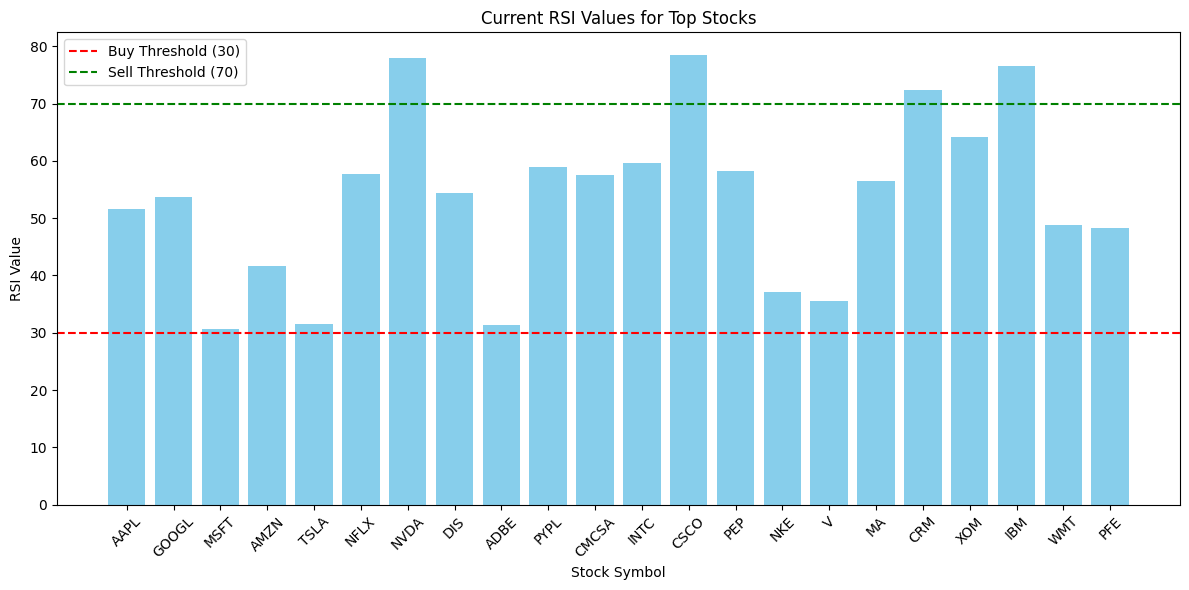

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf
import matplotlib.pyplot as plt

# Define the symbols for the top 25 stocks
symbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'FB', 'NFLX', 'NVDA', 'DIS', 'ADBE',
           'PYPL', 'CMCSA', 'INTC', 'CSCO', 'PEP', 'NKE', 'V', 'MA', 'CRM', 'XOM', 'IBM',
           'WMT', 'PFE']

# Function to fetch historical data from Yahoo Finance
def fetch_historical_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date, interval='1d')
    return data

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Adj Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Initialize a DataFrame to store RSI values
rsi_data = {}

# Set the date range for the analysis
start_date = datetime.now() - timedelta(days=30)
end_date = datetime.now()

# Loop through the symbols and calculate RSI
for symbol in symbols:
    historical_data = fetch_historical_data(symbol, start_date, end_date)

    if historical_data.empty:
        print(f"No data found for {symbol}. Skipping...")
        continue

    rsi = calculate_rsi(historical_data)
    rsi_data[symbol] = rsi.iloc[-1]  # Store the most recent RSI value

# Convert the RSI data to a DataFrame for visualization
rsi_df = pd.DataFrame(rsi_data.items(), columns=['Symbol', 'RSI'])
print(rsi_df)

# Visualize the RSI values
plt.figure(figsize=(12, 6))
plt.bar(rsi_df['Symbol'], rsi_df['RSI'], color='skyblue')
plt.axhline(30, color='red', linestyle='--', label='Buy Threshold (30)')
plt.axhline(70, color='green', linestyle='--', label='Sell Threshold (70)')
plt.title('Current RSI Values for Top Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('RSI Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
def calculate_rsi(data, window=14):
    delta = data['Adj Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi.iloc[-1]  # Return the last RSI value


In [ ]:
def optimize_rsi(symbol, historical_data, window_sizes):
    best_window = None
    best_profit = float('-inf')  # Initialize to negative infinity for comparison

    for window in window_sizes:
        print(f"Testing RSI window: {window}")

        # Perform trading logic with the specified RSI window
        trades = []
        for index in range(1, len(historical_data)):
            current_price = historical_data['Adj Close'].iloc[index]
            rsi = calculate_rsi(historical_data.iloc[:index + 1], window)

            if rsi < 30:  # Buy condition
                trades.append({'symbol': symbol, 'action': 'buy', 'price': current_price})
            elif rsi > 70:  # Sell condition
                if trades:  # Check if there's an open buy
                    buy_price = trades[-1]['price']  # Get last buy price
                    profit_loss = current_price - buy_price
                    trades.append({'symbol': symbol, 'action': 'sell', 'price': current_price, 'profit_loss': profit_loss})

        # Calculate total profit for this window
        total_profit = sum(trade['profit_loss'] for trade in trades if 'profit_loss' in trade)

        print(f"Total profit for RSI window {window}: ${total_profit:.2f}")

        # Check if this is the best window
        if total_profit > best_profit:
            best_profit = total_profit
            best_window = window

    print(f"Best RSI window: {best_window} with total profit: ${best_profit:.2f}")
    return best_window


In [ ]:
# Example usage
window_sizes = [10, 14, 20, 25]  # Different window sizes to test
best_window = optimize_rsi('AAPL', historical_data, window_sizes)


Testing RSI window: 10
Total profit for RSI window 10: $1.61
Testing RSI window: 14
Total profit for RSI window 14: $0.00
Testing RSI window: 20
Total profit for RSI window 20: $0.00
Testing RSI window: 25
Total profit for RSI window 25: $0.00
Best RSI window: 10 with total profit: $1.61


In [ ]:
# Function to check trading signals with optimized RSI window
def check_signals(symbol, historical_data):
    rsi = calculate_rsi(historical_data, window=10)  # Use the optimized RSI window
    print(f"{symbol} - RSI: {rsi}")  # Debugging output

    if rsi < 30:
        return 'buy'
    elif rsi > 70:
        return 'sell'
    return None

# Example of how to incorporate this in your trading loop
for symbol in symbols:
    historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data
    if historical_data.empty:
        print(f"No historical data found for {symbol}. Skipping...")
        continue

    action = check_signals(symbol, historical_data)  # Get the action based on signals
    current_price = get_live_data(symbol)  # Fetch current price

    if action == 'buy':
        profit_loss = None  # To be calculated on sell
        log_trade(symbol, 'buy', current_price, profit_loss)  # Log buy trade
    elif action == 'sell':
        # Logic for selling (need to track previous buy price)
        previous_buy_price = ...  # Retrieve the buy price from your storage
        profit_loss = current_price - previous_buy_price
        log_trade(symbol, 'sell', current_price, profit_loss)  # Log sell trade


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL - RSI: 49.596790319686214


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOGL - RSI: 47.59325428434876


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT - RSI: 32.30491023336832


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN - RSI: 51.74970537758156


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


TSLA - RSI: 20.033728822751755
No historical data found for FB. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFLX - RSI: 59.54734743695903


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NVDA - RSI: 79.41175978064325


TypeError: unsupported operand type(s) for -: 'float' and 'ellipsis'

In [ ]:
# Initialize a dictionary to track buy prices
buy_prices = {}

# Function to check trading signals with optimized RSI window
def check_signals(symbol, historical_data):
    rsi = calculate_rsi(historical_data)
    print(f"{symbol} - RSI: {rsi}")  # Debugging output

    if rsi < 30:
        return 'buy'
    elif rsi > 70:
        return 'sell'
    return None

# Example of how to incorporate this in your trading loop
for symbol in symbols:
    historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data
    if historical_data.empty:
        print(f"No historical data found for {symbol}. Skipping...")
        continue

    action = check_signals(symbol, historical_data)  # Get the action based on signals
    current_price = get_live_data(symbol)  # Fetch current price

    if action == 'buy':
        # Log buy trade and store the buy price
        log_trade(symbol, 'buy', current_price, None)  # Log the buy trade
        buy_prices[symbol] = current_price  # Store the buy price
        print(f"Buying {symbol} at {current_price}")
    elif action == 'sell':
        if symbol in buy_prices:  # Check if the buy price is recorded
            previous_buy_price = buy_prices[symbol]  # Retrieve the buy price
            profit_loss = current_price - previous_buy_price
            log_trade(symbol, 'sell', current_price, profit_loss)  # Log the sell trade
            print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
            del buy_prices[symbol]  # Remove the stock from tracking after selling
        else:
            print(f"No buy price recorded for {symbol}. Cannot sell.")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL - RSI: 51.63241047100712


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOGL - RSI: 53.766936638384834


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT - RSI: 30.654930351402584


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN - RSI: 41.66666666666667


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


TSLA - RSI: 31.545159224739947
No historical data found for FB. Skipping...


[*********************100%***********************]  1 of 1 completed


NFLX - RSI: 57.73120420408218


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA - RSI: 77.92168427593494
No buy price recorded for NVDA. Cannot sell.


[*********************100%***********************]  1 of 1 completed


DIS - RSI: 54.38727403993483


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ADBE - RSI: 31.344178631970877


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PYPL - RSI: 58.88611818111071


[*********************100%***********************]  1 of 1 completed


CMCSA - RSI: 57.57017784768516


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC - RSI: 59.57854182134944


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CSCO - RSI: 78.49947895500597
No buy price recorded for CSCO. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PEP - RSI: 58.20168847795031


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NKE - RSI: 37.14287790310432


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


V - RSI: 35.57871225785189


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA - RSI: 56.469239670844196


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRM - RSI: 72.44034944692308
No buy price recorded for CRM. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM - RSI: 64.18520278329194


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBM - RSI: 76.62772784559823
No buy price recorded for IBM. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WMT - RSI: 48.84420476825438


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PFE - RSI: 48.36601796065046


In [ ]:
# Initialize a dictionary to track buy prices
buy_prices = {}

# Loop through the top stocks to check for trading signals
for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data
        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        current_price = get_live_data(symbol)  # Fetch current price
        action = check_signals(symbol, historical_data)  # Get action based on RSI

        if action == 'buy':
            if symbol not in buy_prices:  # Buy only if not already bought
                log_trade(symbol, 'buy', current_price, None)  # Log buy trade
                buy_prices[symbol] = current_price  # Store the buy price
                print(f"Buying {symbol} at {current_price}")
            else:
                print(f"{symbol} already bought at {buy_prices[symbol]}. No new buy action.")

        elif action == 'sell':
            if symbol in buy_prices:  # Check if buy price is recorded
                previous_buy_price = buy_prices[symbol]  # Retrieve the buy price
                profit_loss = current_price - previous_buy_price
                log_trade(symbol, 'sell', current_price, profit_loss)  # Log sell trade
                print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
                del buy_prices[symbol]  # Remove the stock from tracking after selling
            else:
                print(f"No buy price recorded for {symbol}. Cannot sell.")

    except Exception as e:
        print(f"Error processing {symbol}: {e}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL - RSI: 51.63241047100712


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOGL - RSI: 53.766936638384834


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT - RSI: 30.654930351402584


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN - RSI: 41.66666666666667


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


TSLA - RSI: 31.545159224739947
No historical data found for FB. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFLX - RSI: 57.73120420408218


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA - RSI: 77.92168427593494
No buy price recorded for NVDA. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DIS - RSI: 54.38727403993483


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ADBE - RSI: 31.344178631970877


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PYPL - RSI: 58.88611818111071


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA - RSI: 57.57017784768516


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC - RSI: 59.57854182134944


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CSCO - RSI: 78.49947895500597
No buy price recorded for CSCO. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PEP - RSI: 58.20168847795031


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NKE - RSI: 37.14287790310432


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


V - RSI: 35.57871225785189


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA - RSI: 56.469239670844196


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRM - RSI: 72.44034944692308
No buy price recorded for CRM. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM - RSI: 64.18520278329194


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBM - RSI: 76.62772784559823
No buy price recorded for IBM. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

WMT - RSI: 48.84420476825438



[*********************100%***********************]  1 of 1 completed

PFE - RSI: 48.36601796065046


In [ ]:
# Initialize a dictionary to track buy prices
buy_prices = {}

# Loop through the top stocks to check for trading signals
for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data
        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        current_price = get_live_data(symbol)  # Fetch current price
        action = check_signals(symbol, historical_data)  # Get action based on RSI

        if action == 'buy':
            if symbol not in buy_prices:  # Buy only if not already bought
                log_trade(symbol, 'buy', current_price, None)  # Log buy trade
                buy_prices[symbol] = current_price  # Store the buy price
                print(f"Buying {symbol} at {current_price}")
            else:
                print(f"{symbol} already bought at {buy_prices[symbol]}. No new buy action.")

        elif action == 'sell':
            if symbol in buy_prices:  # Check if buy price is recorded
                previous_buy_price = buy_prices[symbol]  # Retrieve the buy price
                profit_loss = current_price - previous_buy_price
                log_trade(symbol, 'sell', current_price, profit_loss)  # Log sell trade
                print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
                del buy_prices[symbol]  # Remove the stock from tracking after selling
            else:
                print(f"No buy price recorded for {symbol}. Cannot sell.")

    except Exception as e:
        print(f"Error processing {symbol}: {e}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL - RSI: 51.63241047100712


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOGL - RSI: 53.766936638384834


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT - RSI: 30.654930351402584


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN - RSI: 41.66666666666667


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


TSLA - RSI: 31.545159224739947
No historical data found for FB. Skipping...


[*********************100%***********************]  1 of 1 completed


NFLX - RSI: 57.73120420408218


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA - RSI: 77.92168427593494
No buy price recorded for NVDA. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DIS - RSI: 54.38727403993483


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ADBE - RSI: 31.344178631970877


[*********************100%***********************]  1 of 1 completed


PYPL - RSI: 58.88611818111071


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA - RSI: 57.57017784768516


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC - RSI: 59.57854182134944


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CSCO - RSI: 78.49947895500597
No buy price recorded for CSCO. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PEP - RSI: 58.20168847795031


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NKE - RSI: 37.14287790310432


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


V - RSI: 35.57871225785189


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA - RSI: 56.469239670844196


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRM - RSI: 72.44034944692308
No buy price recorded for CRM. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM - RSI: 64.18520278329194


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBM - RSI: 76.62772784559823
No buy price recorded for IBM. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WMT - RSI: 48.84420476825438


[*********************100%***********************]  1 of 1 completed

PFE - RSI: 48.36601796065046


In [ ]:
# Initialize a dictionary to track buy prices
buy_prices = {}

# Loop through the top stocks to check for trading signals
for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data
        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        current_price = get_live_data(symbol)  # Fetch current price
        action = check_signals(symbol, historical_data)  # Get action based on RSI

        if action == 'buy':
            if symbol not in buy_prices:  # Buy only if not already bought
                log_trade(symbol, 'buy', current_price, None)  # Log buy trade
                buy_prices[symbol] = current_price  # Store the buy price
                print(f"Buying {symbol} at {current_price}")
            else:
                print(f"{symbol} already bought at {buy_prices[symbol]}. No new buy action.")

        elif action == 'sell':
            if symbol in buy_prices:  # Check if buy price is recorded
                previous_buy_price = buy_prices[symbol]  # Retrieve the buy price
                profit_loss = current_price - previous_buy_price
                log_trade(symbol, 'sell', current_price, profit_loss)  # Log sell trade
                print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
                del buy_prices[symbol]  # Remove the stock from tracking after selling
            else:
                print(f"No buy price recorded for {symbol}. Cannot sell.")

    except Exception as e:
        print(f"Error processing {symbol}: {e}")

# After processing all symbols, print any remaining buy prices
print("Remaining buy prices:", buy_prices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL - RSI: 51.63241047100712


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOGL - RSI: 53.766936638384834


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT - RSI: 30.654930351402584


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN - RSI: 41.66666666666667
TSLA - RSI: 31.545159224739947


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


No historical data found for FB. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFLX - RSI: 57.73120420408218


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA - RSI: 77.92168427593494
No buy price recorded for NVDA. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DIS - RSI: 54.38727403993483


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ADBE - RSI: 31.344178631970877


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PYPL - RSI: 58.88611818111071


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA - RSI: 57.57017784768516


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC - RSI: 59.57854182134944


[*********************100%***********************]  1 of 1 completed


CSCO - RSI: 78.49947895500597
No buy price recorded for CSCO. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PEP - RSI: 58.20168847795031


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NKE - RSI: 37.14287790310432


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


V - RSI: 35.57871225785189


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA - RSI: 56.469239670844196


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRM - RSI: 72.44034944692308
No buy price recorded for CRM. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM - RSI: 64.18520278329194


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBM - RSI: 76.62772784559823
No buy price recorded for IBM. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WMT - RSI: 48.84420476825438


[*********************100%***********************]  1 of 1 completed

PFE - RSI: 48.36601796065046
Remaining buy prices: {}


In [ ]:
# Initialize a dictionary to track buy prices
buy_prices = {}

# Loop through the top stocks to check for trading signals
for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data
        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        current_price = get_live_data(symbol)  # Fetch current price
        action = check_signals(symbol, historical_data)  # Get action based on RSI

        if action == 'buy':
            if symbol not in buy_prices:  # Buy only if not already bought
                log_trade(symbol, 'buy', current_price, None)  # Log buy trade
                buy_prices[symbol] = current_price  # Store the buy price
                print(f"Buying {symbol} at {current_price}")
            else:
                print(f"{symbol} already bought at {buy_prices[symbol]}. No new buy action.")

        elif action == 'sell':
            if symbol in buy_prices:  # Check if buy price is recorded
                previous_buy_price = buy_prices[symbol]  # Retrieve the buy price
                profit_loss = current_price - previous_buy_price
                log_trade(symbol, 'sell', current_price, profit_loss)  # Log sell trade
                print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
                del buy_prices[symbol]  # Remove the stock from tracking after selling
            else:
                print(f"No buy price recorded for {symbol}. Cannot sell.")

    except Exception as e:
        print(f"Error processing {symbol}: {e}")

# After processing all symbols, print any remaining buy prices
print("Remaining buy prices:", buy_prices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL - RSI: 51.63241047100712


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOGL - RSI: 53.766936638384834


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT - RSI: 30.654930351402584


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN - RSI: 41.66666666666667
TSLA - RSI: 31.545159224739947


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


No historical data found for FB. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFLX - RSI: 57.73120420408218


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA - RSI: 77.92168427593494
No buy price recorded for NVDA. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DIS - RSI: 54.38727403993483


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ADBE - RSI: 31.344178631970877



[*********************100%***********************]  1 of 1 completed


PYPL - RSI: 58.88611818111071


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA - RSI: 57.57017784768516


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC - RSI: 59.57854182134944


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CSCO - RSI: 78.49947895500597
No buy price recorded for CSCO. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PEP - RSI: 58.20168847795031


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NKE - RSI: 37.14287790310432


[*********************100%***********************]  1 of 1 completed


V - RSI: 35.57871225785189


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA - RSI: 56.469239670844196


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRM - RSI: 72.44034944692308
No buy price recorded for CRM. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

XOM - RSI: 64.18520278329194



[*********************100%***********************]  1 of 1 completed


IBM - RSI: 76.62772784559823
No buy price recorded for IBM. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WMT - RSI: 48.84420476825438


[*********************100%***********************]  1 of 1 completed

PFE - RSI: 48.36601796065046
Remaining buy prices: {}


In [ ]:
# Initialize a dictionary to track buy prices
buy_prices = {}

# Loop through the top stocks to check for trading signals
for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data
        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        current_price = get_live_data(symbol)  # Fetch current price
        print(f"Current price for {symbol} is {current_price}")  # Debugging output

        action = check_signals(symbol, historical_data)  # Get action based on RSI
        print(f"{symbol} - Action determined: {action}")  # Debugging output

        if action == 'buy':
            if symbol not in buy_prices:  # Buy only if not already bought
                log_trade(symbol, 'buy', current_price, None)  # Log buy trade
                buy_prices[symbol] = current_price  # Store the buy price
                print(f"Buying {symbol} at {current_price}")
            else:
                print(f"{symbol} already bought at {buy_prices[symbol]}. No new buy action.")

        elif action == 'sell':
            if symbol in buy_prices:  # Check if buy price is recorded
                previous_buy_price = buy_prices[symbol]  # Retrieve the buy price
                profit_loss = current_price - previous_buy_price
                log_trade(symbol, 'sell', current_price, profit_loss)  # Log sell trade
                print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
                del buy_prices[symbol]  # Remove the stock from tracking after selling
            else:
                print(f"No buy price recorded for {symbol}. Cannot sell.")

    except Exception as e:
        print(f"Error processing {symbol}: {e}")

# After processing all symbols, print any remaining buy prices
print("Remaining buy prices:", buy_prices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for AAPL is 227.52000427246094
AAPL - RSI: 51.63241047100712
AAPL - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for GOOGL is 163.23500061035156
GOOGL - RSI: 53.766936638384834
GOOGL - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for MSFT is 416.3900146484375
MSFT - RSI: 30.654930351402584
MSFT - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for AMZN is 188.8000030517578
AMZN - RSI: 41.66666666666667
AMZN - Action determined: None
Current price for TSLA is 217.69009399414062
TSLA - RSI: 31.545159224739947
TSLA - Action determined: None


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


No historical data found for FB. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for NFLX is 722.6900024414062
NFLX - RSI: 57.73120420408218
NFLX - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for NVDA is 134.75
NVDA - RSI: 77.92168427593494
NVDA - Action determined: sell
No buy price recorded for NVDA. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for DIS is 94.12999725341797
DIS - RSI: 54.38727403993483
DIS - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for ADBE is 495.1300048828125
ADBE - RSI: 31.344178631970877
ADBE - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for PYPL is 80.51000213623047
PYPL - RSI: 58.88611818111071
PYPL - Action determined: None


[*********************100%***********************]  1 of 1 completed


Current price for CMCSA is 41.279998779296875
CMCSA - RSI: 57.57017784768516
CMCSA - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for INTC is 23.56999969482422
INTC - RSI: 59.57854182134944
INTC - Action determined: None


[*********************100%***********************]  1 of 1 completed


Current price for CSCO is 54.2400016784668
CSCO - RSI: 78.49947895500597
CSCO - Action determined: sell
No buy price recorded for CSCO. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for PEP is 174.82000732421875
PEP - RSI: 58.20168847795031
PEP - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for NKE is 82.1500015258789
NKE - RSI: 37.14287790310432
NKE - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for V is 277.8067932128906
V - RSI: 35.57871225785189
V - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for MA is 502.0400085449219
MA - RSI: 56.469239670844196
MA - Action determined: None


[*********************100%***********************]  1 of 1 completed


Current price for CRM is 288.05999755859375
CRM - RSI: 72.44034944692308
CRM - Action determined: sell
No buy price recorded for CRM. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for XOM is 123.63999938964844
XOM - RSI: 64.18520278329194
XOM - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for IBM is 233.36000061035156
IBM - RSI: 76.62772784559823
IBM - Action determined: sell
No buy price recorded for IBM. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for WMT is 80.08999633789062
WMT - RSI: 48.84420476825438
WMT - Action determined: None


[*********************100%***********************]  1 of 1 completed

Current price for PFE is 29.155000686645508
PFE - RSI: 48.36601796065046
PFE - Action determined: None
Remaining buy prices: {}


In [ ]:
# Initialize a dictionary to track buy prices
buy_prices = {}

# Loop through the top stocks to check for trading signals
for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data
        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        current_price = get_live_data(symbol)  # Fetch current price
        print(f"Current price for {symbol} is {current_price}")  # Debugging output

        action = check_signals(symbol, historical_data)  # Get action based on RSI
        print(f"{symbol} - Action determined: {action}")  # Debugging output

        if action == 'buy':
            if symbol not in buy_prices:  # Buy only if not already bought
                log_trade(symbol, 'buy', current_price, None)  # Log buy trade
                buy_prices[symbol] = current_price  # Store the buy price
                print(f"Buying {symbol} at {current_price}")
            else:
                print(f"{symbol} already bought at {buy_prices[symbol]}. No new buy action.")

        elif action == 'sell':
            if symbol in buy_prices:  # Check if buy price is recorded
                previous_buy_price = buy_prices[symbol]  # Retrieve the buy price
                profit_loss = current_price - previous_buy_price
                log_trade(symbol, 'sell', current_price, profit_loss)  # Log sell trade
                print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
                del buy_prices[symbol]  # Remove the stock from tracking after selling
            else:
                print(f"No buy price recorded for {symbol}. Cannot sell.")

    except Exception as e:
        print(f"Error processing {symbol}: {e}")

# After processing all symbols, print any remaining buy prices
print("Remaining buy prices:", buy_prices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for AAPL is 227.52000427246094
AAPL - RSI: 51.63241047100712
AAPL - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for GOOGL is 163.23500061035156
GOOGL - RSI: 53.766936638384834
GOOGL - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for MSFT is 416.3900146484375
MSFT - RSI: 30.654930351402584
MSFT - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for AMZN is 188.8000030517578
AMZN - RSI: 41.66666666666667
AMZN - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Current price for TSLA is 217.69009399414062
TSLA - RSI: 31.545159224739947
TSLA - Action determined: None
No historical data found for FB. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for NFLX is 722.6900024414062
NFLX - RSI: 57.73120420408218
NFLX - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for NVDA is 134.75
NVDA - RSI: 77.92168427593494
NVDA - Action determined: sell
No buy price recorded for NVDA. Cannot sell.


[*********************100%***********************]  1 of 1 completed


Current price for DIS is 94.12999725341797
DIS - RSI: 54.38727403993483
DIS - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for ADBE is 495.1300048828125
ADBE - RSI: 31.344178631970877
ADBE - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for PYPL is 80.51000213623047
PYPL - RSI: 58.88611818111071
PYPL - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for CMCSA is 41.279998779296875
CMCSA - RSI: 57.57017784768516
CMCSA - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for INTC is 23.56999969482422
INTC - RSI: 59.57854182134944
INTC - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for CSCO is 54.2400016784668
CSCO - RSI: 78.49947895500597
CSCO - Action determined: sell
No buy price recorded for CSCO. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for PEP is 174.82000732421875
PEP - RSI: 58.20168847795031
PEP - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for NKE is 82.1500015258789
NKE - RSI: 37.14287790310432
NKE - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for V is 277.8067932128906
V - RSI: 35.57871225785189
V - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for MA is 502.0400085449219
MA - RSI: 56.469239670844196
MA - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for CRM is 288.05999755859375
CRM - RSI: 72.44034944692308
CRM - Action determined: sell
No buy price recorded for CRM. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for XOM is 123.63999938964844
XOM - RSI: 64.18520278329194
XOM - Action determined: None


[*********************100%***********************]  1 of 1 completed


Current price for IBM is 233.36000061035156
IBM - RSI: 76.62772784559823
IBM - Action determined: sell
No buy price recorded for IBM. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for WMT is 80.08999633789062
WMT - RSI: 48.84420476825438
WMT - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Current price for PFE is 29.155000686645508
PFE - RSI: 48.36601796065046
PFE - Action determined: None
Remaining buy prices: {}


In [ ]:
# Initialize a dictionary to track buy prices
buy_prices = {}

# Loop through the top stocks to check for trading signals
for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data
        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        current_price = get_live_data(symbol)  # Fetch current price
        print(f"Current price for {symbol} is {current_price}")  # Debugging output

        action = check_signals(symbol, historical_data)  # Get action based on RSI
        print(f"{symbol} - Action determined: {action}")  # Debugging output

        if action == 'buy':
            if symbol not in buy_prices:  # Buy only if not already bought
                log_trade(symbol, 'buy', current_price, None)  # Log buy trade
                buy_prices[symbol] = current_price  # Store the buy price
                print(f"Buying {symbol} at {current_price}")
            else:
                print(f"{symbol} already bought at {buy_prices[symbol]}. No new buy action.")

        elif action == 'sell':
            if symbol in buy_prices:  # Check if buy price is recorded
                previous_buy_price = buy_prices[symbol]  # Retrieve the buy price
                profit_loss = current_price - previous_buy_price
                log_trade(symbol, 'sell', current_price, profit_loss)  # Log sell trade
                print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
                del buy_prices[symbol]  # Remove the stock from tracking after selling
            else:
                print(f"No buy price recorded for {symbol}. Cannot sell.")

    except Exception as e:
        print(f"Error processing {symbol}: {e}")

# After processing all symbols, print any remaining buy prices
print("Remaining buy prices:", buy_prices)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for AAPL is 227.52000427246094
AAPL - RSI: 51.63241047100712
AAPL - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for GOOGL is 163.23500061035156
GOOGL - RSI: 53.766936638384834
GOOGL - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for MSFT is 416.3900146484375
MSFT - RSI: 30.654930351402584
MSFT - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for AMZN is 188.8000030517578
AMZN - RSI: 41.66666666666667
AMZN - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Current price for TSLA is 217.69009399414062
TSLA - RSI: 31.545159224739947
TSLA - Action determined: None
No historical data found for FB. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for NFLX is 722.6900024414062
NFLX - RSI: 57.73120420408218
NFLX - Action determined: None


[*********************100%***********************]  1 of 1 completed


Current price for NVDA is 134.75
NVDA - RSI: 77.92168427593494
NVDA - Action determined: sell
No buy price recorded for NVDA. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for DIS is 94.12999725341797
DIS - RSI: 54.38727403993483
DIS - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for ADBE is 495.1300048828125
ADBE - RSI: 31.344178631970877
ADBE - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for PYPL is 80.51000213623047
PYPL - RSI: 58.88611818111071
PYPL - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for CMCSA is 41.279998779296875
CMCSA - RSI: 57.57017784768516
CMCSA - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for INTC is 23.56999969482422
INTC - RSI: 59.57854182134944
INTC - Action determined: None


[*********************100%***********************]  1 of 1 completed


Current price for CSCO is 54.2400016784668
CSCO - RSI: 78.49947895500597
CSCO - Action determined: sell
No buy price recorded for CSCO. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for PEP is 174.82000732421875
PEP - RSI: 58.20168847795031
PEP - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for NKE is 82.1500015258789
NKE - RSI: 37.14287790310432
NKE - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for V is 277.8067932128906
V - RSI: 35.57871225785189
V - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for MA is 502.0400085449219
MA - RSI: 56.469239670844196
MA - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for CRM is 288.05999755859375
CRM - RSI: 72.44034944692308
CRM - Action determined: sell
No buy price recorded for CRM. Cannot sell.


[*********************100%***********************]  1 of 1 completed


Current price for XOM is 123.63999938964844
XOM - RSI: 64.18520278329194
XOM - Action determined: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for IBM is 233.36000061035156
IBM - RSI: 76.62772784559823
IBM - Action determined: sell
No buy price recorded for IBM. Cannot sell.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current price for WMT is 80.08999633789062
WMT - RSI: 48.84420476825438
WMT - Action determined: None


[*********************100%***********************]  1 of 1 completed

Current price for PFE is 29.155000686645508
PFE - RSI: 48.36601796065046
PFE - Action determined: None
Remaining buy prices: {}


In [ ]:
def determine_action(rsi):
    if rsi < 30:
        return 'buy'
    elif rsi > 70:
        return 'sell'
    else:
        return 'hold'  # or None


In [ ]:
for symbol in symbols:
    current_price = get_live_data(symbol)
    rsi = calculate_rsi(fetch_historical_data(symbol))  # Fetch historical data and calculate RSI

    action = determine_action(rsi)

    if action == 'buy':
        log_trade(symbol, 'buy', current_price, None)  # Log the buy trade
        print(f"Buying {symbol} at {current_price}")
    elif action == 'sell':
        if symbol in previous_buy_prices:  # Check if a buy price exists
            previous_buy_price = previous_buy_prices[symbol]
            profit_loss = current_price - previous_buy_price
            log_trade(symbol, 'sell', current_price, profit_loss)  # Log the sell trade
            print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
        else:
            print(f"No buy price recorded for {symbol}. Cannot sell.")
    else:
        print(f"{symbol} - Action determined: {action}")  # Debugging output


[*********************100%***********************]  1 of 1 completed


TypeError: fetch_historical_data() missing 2 required positional arguments: 'start_date' and 'end_date'

In [ ]:
from datetime import datetime, timedelta

# Define your date range
end_date = datetime.now()
start_date = end_date - timedelta(days=7)  # or however many days you want to fetch

for symbol in symbols:
    current_price = get_live_data(symbol)

    # Fetch historical data and calculate RSI
    historical_data = fetch_historical_data(symbol, start_date, end_date)
    rsi = calculate_rsi(historical_data)

    action = determine_action(rsi)

    if action == 'buy':
        log_trade(symbol, 'buy', current_price, None)  # Log the buy trade
        previous_buy_prices[symbol] = current_price  # Save the buy price
        print(f"Buying {symbol} at {current_price}")
    elif action == 'sell':
        if symbol in previous_buy_prices:  # Check if a buy price exists
            previous_buy_price = previous_buy_prices[symbol]
            profit_loss = current_price - previous_buy_price
            log_trade(symbol, 'sell', current_price, profit_loss)  # Log the sell trade
            print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
            del previous_buy_prices[symbol]  # Remove the buy price after selling
        else:
            print(f"No buy price recorded for {symbol}. Cannot sell.")
    else:
        print(f"{symbol} - Action determined: {action}")  # Debugging output


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL - Action determined: hold


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOGL - Action determined: hold


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT - Action determined: hold
AMZN - Action determined: hold


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA - Action determined: hold


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Error fetching live data for FB: No data found for FB


IndexError: single positional indexer is out-of-bounds

In [ ]:
# Adjust the symbols list to remove 'FB'
symbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'NFLX', 'NVDA', 'DIS', 'ADBE', 'PYPL',
           'CMCSA', 'INTC', 'CSCO', 'PEP', 'NKE', 'V', 'MA', 'CRM', 'XOM', 'IBM', 'WMT', 'PFE']

# Define your date range
end_date = datetime.now()
start_date = end_date - timedelta(days=7)

previous_buy_prices = {}  # Dictionary to track previous buy prices

for symbol in symbols:
    current_price = get_live_data(symbol)

    # Fetch historical data and calculate RSI
    historical_data = fetch_historical_data(symbol, start_date, end_date)

    if historical_data.empty:
        print(f"No historical data found for {symbol}. Skipping...")
        continue  # Skip to the next symbol if no data is found

    rsi = calculate_rsi(historical_data)

    # Check for valid RSI before determining action
    if pd.isna(rsi):
        print(f"RSI calculation failed for {symbol}. Skipping...")
        continue  # Skip if RSI calculation failed

    action = determine_action(rsi)

    if action == 'buy':
        log_trade(symbol, 'buy', current_price, None)  # Log the buy trade
        previous_buy_prices[symbol] = current_price  # Save the buy price
        print(f"Buying {symbol} at {current_price}")
    elif action == 'sell':
        if symbol in previous_buy_prices:  # Check if a buy price exists
            previous_buy_price = previous_buy_prices[symbol]
            profit_loss = current_price - previous_buy_price
            log_trade(symbol, 'sell', current_price, profit_loss)  # Log the sell trade
            print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
            del previous_buy_prices[symbol]  # Remove the buy price after selling
        else:
            print(f"No buy price recorded for {symbol}. Cannot sell.")
    else:
        print(f"{symbol} - Action determined: {action}")  # Debugging output


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RSI calculation failed for AAPL. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RSI calculation failed for GOOGL. Skipping...


[*********************100%***********************]  1 of 1 completed


RSI calculation failed for MSFT. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RSI calculation failed for AMZN. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RSI calculation failed for TSLA. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RSI calculation failed for NFLX. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

RSI calculation failed for NVDA. Skipping...



[*********************100%***********************]  1 of 1 completed


RSI calculation failed for DIS. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RSI calculation failed for ADBE. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RSI calculation failed for PYPL. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RSI calculation failed for CMCSA. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RSI calculation failed for INTC. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RSI calculation failed for CSCO. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RSI calculation failed for PEP. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RSI calculation failed for NKE. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RSI calculation failed for V. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RSI calculation failed for MA. Skipping...


[*********************100%***********************]  1 of 1 completed


RSI calculation failed for CRM. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RSI calculation failed for XOM. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RSI calculation failed for IBM. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RSI calculation failed for WMT. Skipping...


[*********************100%***********************]  1 of 1 completed

RSI calculation failed for PFE. Skipping...


In [ ]:
# Define your date range
end_date = datetime.now()
start_date = end_date - timedelta(days=7)

previous_buy_prices = {}  # Dictionary to track previous buy prices

for symbol in symbols:
    current_price = get_live_data(symbol)

    # Fetch historical data
    historical_data = fetch_historical_data(symbol, start_date, end_date)

    # Check if historical data is sufficient
    if historical_data.empty or len(historical_data) < 25:  # Ensure we have enough data for RSI window of 14 or more
        print(f"No sufficient historical data found for {symbol}. Skipping...")
        continue  # Skip to the next symbol if no data is found

    rsi = calculate_rsi(historical_data)

    # Check for valid RSI before determining action
    if pd.isna(rsi):
        print(f"RSI calculation failed for {symbol}. Skipping...")
        continue  # Skip if RSI calculation failed

    action = determine_action(rsi)

    if action == 'buy':
        log_trade(symbol, 'buy', current_price, None)  # Log the buy trade
        previous_buy_prices[symbol] = current_price  # Save the buy price
        print(f"Buying {symbol} at {current_price}")
    elif action == 'sell':
        if symbol in previous_buy_prices:  # Check if a buy price exists
            previous_buy_price = previous_buy_prices[symbol]
            profit_loss = current_price - previous_buy_price
            log_trade(symbol, 'sell', current_price, profit_loss)  # Log the sell trade
            print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
            del previous_buy_prices[symbol]  # Remove the buy price after selling
        else:
            print(f"No buy price recorded for {symbol}. Cannot sell.")
    else:
        print(f"{symbol} - Action determined: {action}")  # Debugging output


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No sufficient historical data found for AAPL. Skipping...
No sufficient historical data found for GOOGL. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No sufficient historical data found for MSFT. Skipping...
No sufficient historical data found for AMZN. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No sufficient historical data found for TSLA. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No sufficient historical data found for NFLX. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No sufficient historical data found for NVDA. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No sufficient historical data found for DIS. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No sufficient historical data found for ADBE. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No sufficient historical data found for PYPL. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No sufficient historical data found for CMCSA. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No sufficient historical data found for INTC. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No sufficient historical data found for CSCO. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No sufficient historical data found for PEP. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No sufficient historical data found for NKE. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No sufficient historical data found for V. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No sufficient historical data found for MA. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No sufficient historical data found for CRM. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No sufficient historical data found for XOM. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No sufficient historical data found for IBM. Skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No sufficient historical data found for WMT. Skipping...


[*********************100%***********************]  1 of 1 completed

No sufficient historical data found for PFE. Skipping...


In [ ]:
def is_symbol_valid(symbol):
    try:
        # Attempt to fetch the ticker data
        data = yf.Ticker(symbol).info
        return data['regularMarketPrice'] is not None
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return False

# Filter symbols to remove delisted or invalid ones
symbols = [symbol for symbol in symbols if is_symbol_valid(symbol)]


Error fetching data for AAPL: 'regularMarketPrice'
Error fetching data for GOOGL: 'regularMarketPrice'
Error fetching data for MSFT: 'regularMarketPrice'
Error fetching data for AMZN: 'regularMarketPrice'
Error fetching data for TSLA: 'regularMarketPrice'
Error fetching data for NFLX: 'regularMarketPrice'
Error fetching data for NVDA: 'regularMarketPrice'
Error fetching data for DIS: 'regularMarketPrice'
Error fetching data for ADBE: 'regularMarketPrice'
Error fetching data for PYPL: 'regularMarketPrice'
Error fetching data for CMCSA: 'regularMarketPrice'
Error fetching data for INTC: 'regularMarketPrice'
Error fetching data for CSCO: 'regularMarketPrice'
Error fetching data for PEP: 'regularMarketPrice'
Error fetching data for NKE: 'regularMarketPrice'
Error fetching data for V: 'regularMarketPrice'
Error fetching data for MA: 'regularMarketPrice'
Error fetching data for CRM: 'regularMarketPrice'
Error fetching data for XOM: 'regularMarketPrice'
Error fetching data for IBM: 'regularMa

In [ ]:
def fetch_historical_data(symbol, start_date, end_date):
    try:
        data = yf.download(symbol, start=start_date, end=end_date, interval='1m')
        if data.empty:
            print(f"No historical data found for {symbol}.")
            return None
        return data
    except Exception as e:
        print(f"Error fetching historical data for {symbol}: {e}")
        return None


In [ ]:
def calculate_rsi(data, window=14):
    if data is None or data.empty:
        print("No data available for RSI calculation.")
        return None

    delta = data['Adj Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi.iloc[-1] if not rsi.empty else None  # Return the last RSI value


In [ ]:
def determine_action(rsi):
    if rsi is None:
        return "hold"
    elif rsi < 30:
        return "buy"
    elif rsi > 70:
        return "sell"
    else:
        return "hold"


In [ ]:
def fetch_historical_data(symbol, start_date, end_date):
    """Fetch historical data using Yahoo Finance, with error handling."""
    try:
        data = yf.download(symbol, start=start_date, end=end_date, interval='1m')
        if data.empty:
            print(f"No historical data found for {symbol}.")
            return pd.DataFrame()  # Return an empty DataFrame if no data
        return data
    except Exception as e:
        print(f"Error fetching historical data for {symbol}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame on error


In [ ]:
def calculate_rsi(data, window=14):
    if data.empty:
        print("No data available for RSI calculation.")
        return None

    delta = data['Adj Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    # Handle division by zero
    if avg_loss.iloc[-1] == 0:
        print("Average loss is zero, returning None for RSI.")
        return None

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi.iloc[-1]  # Return the last RSI value


In [ ]:
def determine_action(rsi, buy_price):
    if rsi is None:
        return "hold"  # If RSI calculation failed, hold

    if rsi < 30:
        return 'buy'  # Buy signal
    elif rsi > 70:
        if buy_price is not None:
            return 'sell'  # Sell signal if we have a buy price
        else:
            print("No buy price recorded. Cannot sell.")
            return "hold"  # Cannot sell without a buy price
    else:
        return 'hold'  # No action


In [ ]:
for symbol in symbols:
    historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data
    rsi = calculate_rsi(historical_data)  # Calculate RSI
    current_price = get_live_data(symbol)  # Fetch current price

    action = determine_action(rsi, buy_prices.get(symbol))  # Pass the buy price for the symbol

    print(f"{symbol} - Action determined: {action}")

    if action == 'buy':
        buy_prices[symbol] = current_price  # Store the buy price
        print(f"Buying {symbol} at {current_price}")
    elif action == 'sell':
        profit_loss = current_price - buy_prices[symbol]  # Calculate profit/loss
        print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
        del buy_prices[symbol]  # Remove the buy price after selling


In [ ]:
import logging


In [ ]:
# Set up logging
logging.basicConfig(
    filename='trading_bot.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)


In [ ]:
for symbol in symbols:
    historical_data = fetch_historical_data(symbol, start_date, end_date)
    rsi = calculate_rsi(historical_data)
    current_price = get_live_data(symbol)

    action = determine_action(rsi, buy_prices.get(symbol))

    logging.info(f"{symbol} - Action determined: {action}")

    if action == 'buy':
        buy_prices[symbol] = current_price
        logging.info(f"Buying {symbol} at {current_price}")
    elif action == 'sell':
        profit_loss = current_price - buy_prices[symbol]
        logging.info(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
        del buy_prices[symbol]
    else:
        logging.info(f"No action taken for {symbol}.")


In [ ]:
def get_live_data(symbol):
    try:
        data = yf.Ticker(symbol)
        price = data.history(period="1d")['Close'].iloc[-1]
        logging.info(f"Fetched live data for {symbol}: {price}")
        return price
    except Exception as e:
        logging.error(f"Error fetching live data for {symbol}: {e}")
        return None  # Return None or handle as appropriate


In [ ]:
def execute_trade(symbol, action, current_price, previous_buy_price):
    try:
        if action == 'buy':
            log_trade(symbol, 'buy', current_price, None)
        elif action == 'sell' and previous_buy_price is not None:
            profit_loss = current_price - previous_buy_price
            logging.info(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")
            log_trade(symbol, 'sell', current_price, profit_loss)
        else:
            logging.warning(f"No previous buy price recorded for {symbol}. Cannot sell.")
    except Exception as e:
        logging.error(f"Error executing trade for {symbol}: {e}")


In [ ]:
for symbol in symbols:
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)
        if historical_data is not None:
            rsi = calculate_rsi(historical_data)
            current_price = get_live_data(symbol)

            if rsi is not None and current_price is not None:
                action = determine_action(rsi, buy_prices.get(symbol))
                logging.info(f"{symbol} - Action determined: {action}")

                execute_trade(symbol, action, current_price, buy_prices.get(symbol))
            else:
                logging.warning(f"RSI or current price is None for {symbol}. Skipping...")
        else:
            logging.warning(f"No historical data found for {symbol}. Skipping...")
    except Exception as e:
        logging.error(f"Unexpected error processing {symbol}: {e}")


In [ ]:
import unittest
from your_trading_bot_file import fetch_historical_data, calculate_rsi, get_live_data, execute_trade


ModuleNotFoundError: No module named 'your_trading_bot_file'

In [ ]:
import unittest
from day_trader_ai import fetch_historical_data, calculate_rsi, get_live_data, execute_trade


ModuleNotFoundError: No module named 'day_trader_ai'

In [ ]:
import unittest
from day_trader_ai import fetch_historical_data, calculate_rsi, get_live_data, execute_trade  # Update this line

class TestTradingBot(unittest.TestCase):

    def test_fetch_historical_data(self):
        # Test fetching historical data for a valid symbol
        historical_data = fetch_historical_data('AAPL', '2023-01-01', '2023-12-31')
        self.assertIsNotNone(historical_data)  # Ensure we got data

    def test_calculate_rsi(self):
        # Test calculating RSI with dummy data
        data = [1, 2, 3, 4, 5]  # Dummy data
        rsi = calculate_rsi(data)
        self.assertIsInstance(rsi, float)  # Check if RSI is a float

    def test_get_live_data(self):
        # Test getting live data for a valid symbol
        price = get_live_data('AAPL')
        self.assertIsNotNone(price)  # Ensure we got a price

    def test_execute_trade_buy(self):
        # Test execute trade for buying
        execute_trade('AAPL', 'buy', 150.0, None)  # This should log a buy trade

    def test_execute_trade_sell(self):
        # Test execute trade for selling
        execute_trade('AAPL', 'sell', 155.0, 150.0)  # This should log a sell trade

if __name__ == '__main__':
    unittest.main()


ModuleNotFoundError: No module named 'day_trader_ai'

In [ ]:
def test_fetch_historical_data():
    symbol = 'AAPL'
    start_date = '2023-01-01'
    end_date = '2023-01-31'
    data = fetch_historical_data(symbol, start_date, end_date)
    assert not data.empty, "Data should not be empty"

def test_calculate_rsi():
    symbol = 'AAPL'
    historical_data = fetch_historical_data(symbol, '2023-01-01', '2023-01-31')
    rsi = calculate_rsi(historical_data)
    assert rsi is not None, "RSI should be calculated"

# Run tests
test_fetch_historical_data()
test_calculate_rsi()


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2023-01-01 -> 2023-01-31) (Yahoo error = "1m data not available for startTime=1672549200 and endTime=1675141200. Only 7 days worth of 1m granularity data are allowed to be fetched per request.")')


No historical data found for AAPL.


AssertionError: Data should not be empty

In [ ]:
import yfinance as yf

def fetch_historical_data(symbol, start_date, end_date, interval='1d'):
    """Fetch historical data for a given symbol."""
    try:
        data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
        return data
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame on error


In [ ]:
def test_fetch_historical_data():
    symbol = 'AAPL'
    start_date = '2023-01-01'
    end_date = '2023-01-07'  # Shorten the date range to avoid API limits
    data = fetch_historical_data(symbol, start_date, end_date, interval='1d')  # Use daily data
    assert not data.empty, "Data should not be empty"

def test_calculate_rsi():
    symbol = 'AAPL'
    historical_data = fetch_historical_data(symbol, '2023-01-01', '2023-01-07', interval='1d')  # Daily data
    if not historical_data.empty:
        rsi = calculate_rsi(historical_data['Close'])  # Assuming Close price is used for RSI
        assert rsi is not None, "RSI should be calculated"
    else:
        print("No historical data available for RSI calculation.")


In [ ]:
def execute_trade(symbol, action, current_price):
    """Execute a trade action (buy/sell) for the specified symbol."""
    try:
        if action == 'buy':
            # Execute buy logic here
            print(f"Buying {symbol} at {current_price}")
            # Add your code to execute the buy order (e.g., using Robinhood API)
        elif action == 'sell':
            # Execute sell logic here
            print(f"Selling {symbol} at {current_price}")
            # Add your code to execute the sell order (e.g., using Robinhood API)
    except Exception as e:
        print(f"Error executing trade for {symbol}: {e}")

def determine_action(rsi):
    """Determine action based on RSI value."""
    if rsi < 30:
        return 'buy'
    elif rsi > 70:
        return 'sell'
    else:
        return 'hold'


In [ ]:
# Main trading loop
while True:
    for symbol in symbols:
        current_price = get_live_data(symbol)
        historical_data = fetch_historical_data(symbol, start_date, end_date)

        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        rsi = calculate_rsi(historical_data['Close'])
        action = determine_action(rsi)

        # Execute trade based on the action determined
        if action in ['buy', 'sell']:
            execute_trade(symbol, action, current_price)
        else:
            print(f"{symbol} - Action determined: {action}")

    time.sleep(60)  # Wait for a minute before checking again


KeyboardInterrupt: 

In [ ]:
pip install aiohttp


In [ ]:
import asyncio
import aiohttp
import pandas as pd

async def fetch_historical_data(symbol, start_date, end_date):
    async with aiohttp.ClientSession() as session:
        url = f'https://api.example.com/historical?symbol={symbol}&start={start_date}&end={end_date}'
        async with session.get(url) as response:
            data = await response.json()
            # Process and return your DataFrame here
            return pd.DataFrame(data)

async def get_live_data(symbol):
    async with aiohttp.ClientSession() as session:
        url = f'https://api.example.com/live?symbol={symbol}'
        async with session.get(url) as response:
            data = await response.json()
            return data['price']

async def main():
    symbols = ['AAPL', 'GOOGL', 'MSFT']
    start_date = '2023-01-01'
    end_date = '2023-01-31'

    # Fetch historical data for all symbols asynchronously
    historical_data_tasks = [fetch_historical_data(symbol, start_date, end_date) for symbol in symbols]
    historical_data = await asyncio.gather(*historical_data_tasks)

    # Print historical data for verification
    for data in historical_data:
        print(data)

    # Get live data for all symbols asynchronously
    live_data_tasks = [get_live_data(symbol) for symbol in symbols]
    live_data = await asyncio.gather(*live_data_tasks)

    # Print live prices
    for symbol, price in zip(symbols, live_data):
        print(f'{symbol} live price: {price}')

# Run the main function
asyncio.run(main())


RuntimeError: asyncio.run() cannot be called from a running event loop

In [ ]:
import asyncio
import aiohttp
import pandas as pd

async def fetch_historical_data(symbol, start_date, end_date):
    async with aiohttp.ClientSession() as session:
        url = f'https://api.example.com/historical?symbol={symbol}&start={start_date}&end={end_date}'
        async with session.get(url) as response:
            data = await response.json()
            # Process and return your DataFrame here
            return pd.DataFrame(data)

async def get_live_data(symbol):
    async with aiohttp.ClientSession() as session:
        url = f'https://api.example.com/live?symbol={symbol}'
        async with session.get(url) as response:
            data = await response.json()
            return data['price']

async def main():
    symbols = ['AAPL', 'GOOGL', 'MSFT']
    start_date = '2023-01-01'
    end_date = '2023-01-31'

    # Fetch historical data for all symbols asynchronously
    historical_data_tasks = [fetch_historical_data(symbol, start_date, end_date) for symbol in symbols]
    historical_data = await asyncio.gather(*historical_data_tasks)

    # Print historical data for verification
    for data in historical_data:
        print(data)

    # Get live data for all symbols asynchronously
    live_data_tasks = [get_live_data(symbol) for symbol in symbols]
    live_data = await asyncio.gather(*live_data_tasks)

    # Print live prices
    for symbol, price in zip(symbols, live_data):
        print(f'{symbol} live price: {price}')

# Run the main function using await
await main()


ClientConnectorError: Cannot connect to host api.example.com:443 ssl:default [Name or service not known]

In [ ]:
import asyncio
import yfinance as yf

# Function to fetch historical data
async def fetch_historical_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date, interval='1d')
    return data

# Function to calculate RSI
async def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Main function
async def main():
    symbol = 'AAPL'
    start_date = '2023-01-01'
    end_date = '2023-01-31'

    historical_data = await fetch_historical_data(symbol, start_date, end_date)
    if historical_data.empty:
        print(f"No historical data found for {symbol}.")
        return

    rsi = await calculate_rsi(historical_data)
    print(f"RSI for {symbol}: {rsi.iloc[-1]}")

# Run the main function
if __name__ == '__main__':
    asyncio.run(main())


RuntimeError: asyncio.run() cannot be called from a running event loop

In [ ]:
import asyncio
import yfinance as yf

# Function to fetch historical data
async def fetch_historical_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date, interval='1d')
    return data

# Function to calculate RSI
async def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Main function
async def main():
    symbol = 'AAPL'
    start_date = '2023-01-01'
    end_date = '2023-01-31'

    historical_data = await fetch_historical_data(symbol, start_date, end_date)
    if historical_data.empty:
        print(f"No historical data found for {symbol}.")
        return

    rsi = await calculate_rsi(historical_data)
    print(f"RSI for {symbol}: {rsi.iloc[-1]}")

# Run the main function in the current event loop
await main()


[*********************100%***********************]  1 of 1 completed

RSI for AAPL: 79.64932219095823


In [ ]:
import pandas as pd

# RSI calculation
def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Moving Average calculation
def calculate_moving_average(data, period=30):
    return data['Close'].rolling(window=period).mean()

# Bollinger Bands calculation
def calculate_bollinger_bands(data, period=20, num_std_dev=2):
    sma = data['Close'].rolling(window=period).mean()
    rstd = data['Close'].rolling(window=period).std()
    upper_band = sma + (num_std_dev * rstd)
    lower_band = sma - (num_std_dev * rstd)
    return upper_band, lower_band

# MACD calculation
def calculate_macd(data, fast_period=12, slow_period=26, signal_period=9):
    ema_fast = data['Close'].ewm(span=fast_period, adjust=False).mean()
    ema_slow = data['Close'].ewm(span=slow_period, adjust=False).mean()
    macd = ema_fast - ema_slow
    signal = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, signal

# Stochastic Oscillator calculation
def calculate_stochastic_oscillator(data, k_period=14, d_period=3):
    low_min = data['Low'].rolling(window=k_period).min()
    high_max = data['High'].rolling(window=k_period).max()
    stoch_k = 100 * ((data['Close'] - low_min) / (high_max - low_min))
    stoch_d = stoch_k.rolling(window=d_period).mean()
    return stoch_k, stoch_d

# Volume calculation (simple moving average of volume)
def calculate_volume_average(data, period=20):
    return data['Volume'].rolling(window=period).mean()


In [ ]:
def fetch_historical_data(symbol, start_date, end_date):
    # Fetch historical data from Yahoo Finance
    # Note: Ensure you have appropriate error handling
    data = yf.download(symbol, start=start_date, end=end_date, interval='1d')
    return data

def analyze_indicators(data):
    indicators = {}
    indicators['RSI'] = calculate_rsi(data)
    indicators['SMA'] = calculate_moving_average(data)
    indicators['Upper BB'], indicators['Lower BB'] = calculate_bollinger_bands(data)
    indicators['MACD'], indicators['Signal'] = calculate_macd(data)
    indicators['Stoch K'], indicators['Stoch D'] = calculate_stochastic_oscillator(data)
    indicators['Volume Avg'] = calculate_volume_average(data)

    return indicators

def determine_action(indicators):
    # Example logic for decision-making based on indicators
    action = "hold"  # Default action

    # Using RSI
    if indicators['RSI'].iloc[-1] < 30:
        action = "buy"
    elif indicators['RSI'].iloc[-1] > 70:
        action = "sell"

    # You can add more logic here to check other indicators

    return action

def execute_trades(symbols, start_date, end_date):
    for symbol in symbols:
        # Fetch historical data
        data = fetch_historical_data(symbol, start_date, end_date)

        if data.empty:
            print(f"No data for {symbol}. Skipping...")
            continue

        # Analyze indicators
        indicators = analyze_indicators(data)

        # Determine action
        action = determine_action(indicators)

        print(f"{symbol} - Action determined: {action}")

        # Execute trade logic here based on the action
        # e.g., execute_trade(symbol, action)

# Example usage
symbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
start_date = '2024-01-01'
end_date = '2024-10-10'
execute_trades(symbols, start_date, end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL - Action determined: hold
GOOGL - Action determined: hold


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT - Action determined: buy
AMZN - Action determined: hold


[*********************100%***********************]  1 of 1 completed

TSLA - Action determined: hold


In [ ]:
import robin_stocks.robinhood as rh

def execute_trade(symbol, action, current_price):
    if action == "buy":
        # Buy logic - ensure you have enough funds
        try:
            rh.order_buy_fractional_by_price(symbol, current_price, timeInForce='gfd')
            print(f"Bought {symbol} at {current_price}")
            log_trade(symbol, action, current_price)
        except Exception as e:
            print(f"Error executing buy for {symbol}: {e}")

    elif action == "sell":
        # Sell logic - ensure you own the stock
        try:
            rh.order_sell_fractional_by_price(symbol, current_price, timeInForce='gfd')
            print(f"Sold {symbol} at {current_price}")
            log_trade(symbol, action, current_price)
        except Exception as e:
            print(f"Error executing sell for {symbol}: {e}")

def log_trade(symbol, action, price):
    # Log trade details (this could be a print statement or saving to a file)
    print(f"Trade executed: {action} {symbol} at {price}")

def execute_trades(symbols, start_date, end_date):
    for symbol in symbols:
        # Fetch historical data
        data = fetch_historical_data(symbol, start_date, end_date)

        if data.empty:
            print(f"No data for {symbol}. Skipping...")
            continue

        # Analyze indicators
        indicators = analyze_indicators(data)

        # Determine action
        action = determine_action(indicators)

        # Get current price
        current_price = get_live_data(symbol)

        print(f"{symbol} - Action determined: {action}")

        # Execute trade based on action
        execute_trade(symbol, action, current_price)

# Example usage
symbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
start_date = '2024-01-01'
end_date = '2024-10-10'
execute_trades(symbols, start_date, end_date)


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/datetimes.py:666: RuntimeWarning: coroutine 'main' was never awaited
  converted = ints_to_pydatetime(
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-183-723535779d15>:42: RuntimeWarning: coroutine 'get_live_data' was never awaited
  current_price = get_live_data(symbol)
[*********************100%***********************]  1 of 1 completed
<ipython-input-183-723535779d15>:42: RuntimeWarning: coroutine 'get_live_data' was never awaited
  current_price = get_live_data(symbol)
[*********************100%***********************]  1 of 1 completed


AAPL - Action determined: hold
GOOGL - Action determined: hold
MSFT - Action determined: buy
Error executing buy for MSFT: order_buy_fractional_by_price can only be called when logged in


<ipython-input-183-723535779d15>:42: RuntimeWarning: coroutine 'get_live_data' was never awaited
  current_price = get_live_data(symbol)
[*********************100%***********************]  1 of 1 completed

AMZN - Action determined: hold
TSLA - Action determined: hold



<ipython-input-183-723535779d15>:42: RuntimeWarning: coroutine 'get_live_data' was never awaited
  current_price = get_live_data(symbol)
<ipython-input-183-723535779d15>:53: RuntimeWarning: coroutine 'get_live_data' was never awaited
  execute_trades(symbols, start_date, end_date)


In [ ]:
class TradingBot:
    def __init__(self, total_capital=200, max_daily_loss=50):
        self.total_capital = total_capital
        self.max_daily_loss = max_daily_loss
        self.current_loss = 0
        self.daily_profit_loss = 0  # Track daily performance
        self.trades = []

    def calculate_position_size(self, trade_amount_percentage):
        # Calculate the amount to trade based on a percentage of total capital
        return self.total_capital * trade_amount_percentage

    def execute_trade(self, symbol, action, price, amount):
        # Logic for executing the trade
        if action == 'buy':
            # Deduct capital for the buy
            self.trades.append({'symbol': symbol, 'action': action, 'price': price, 'amount': amount})
            print(f"Buying {symbol} at {price}")
        elif action == 'sell':
            # Logic for selling, including updating daily profit/loss
            last_trade = next((trade for trade in reversed(self.trades) if trade['symbol'] == symbol), None)
            if last_trade:
                profit_loss = (price - last_trade['price']) * last_trade['amount']
                self.daily_profit_loss += profit_loss
                print(f"Selling {symbol} at {price} - Profit/Loss: {profit_loss}")

        # Check if daily loss exceeds the max allowed
        if self.daily_profit_loss < -self.max_daily_loss:
            print("Daily loss limit reached. Halting trading for today.")
            # Add logic to stop further trading for the day

    def reset_daily_performance(self):
        self.daily_profit_loss = 0  # Reset daily performance at the end of the day


In [ ]:
class TradingBot:
    def __init__(self, total_capital=200, max_daily_loss=50):
        self.total_capital = total_capital
        self.max_daily_loss = max_daily_loss
        self.current_loss = 0
        self.daily_profit_loss = 0  # Track daily performance
        self.trades = []  # List to log trades

    def execute_trade(self, symbol, action, price, amount):
        # Existing trade logic
        # ...
        profit_loss = 0
        if action == 'sell':
            last_trade = next((trade for trade in reversed(self.trades) if trade['symbol'] == symbol), None)
            if last_trade:
                profit_loss = (price - last_trade['price']) * last_trade['amount']
                self.daily_profit_loss += profit_loss
                self.log_trade(symbol, action, price, amount, profit_loss)

        # Check if daily loss exceeds the max allowed
        if self.daily_profit_loss < -self.max_daily_loss:
            print("Daily loss limit reached. Halting trading for today.")
            # Stop further trading for the day

    def log_trade(self, symbol, action, price, amount, profit_loss):
        # Log trade details
        self.trades.append({
            'symbol': symbol,
            'action': action,
            'price': price,
            'amount': amount,
            'profit_loss': profit_loss
        })

    def calculate_performance_metrics(self):
        total_profit = sum(trade['profit_loss'] for trade in self.trades)
        total_trades = len(self.trades)
        win_trades = len([trade for trade in self.trades if trade['profit_loss'] > 0])
        win_rate = win_trades / total_trades * 100 if total_trades > 0 else 0
        avg_profit_loss = total_profit / total_trades if total_trades > 0 else 0

        return {
            'Total Profit/Loss': total_profit,
            'Win Rate (%)': win_rate,
            'Average Profit/Loss per Trade': avg_profit_loss
        }

    def reset_daily_performance(self):
        self.daily_profit_loss = 0  # Reset daily performance at the end of the day


In [ ]:
def calculate_indicators(historical_data):
    # Calculate RSI
    rsi = calculate_rsi(historical_data)

    # Calculate Moving Averages (e.g., short-term and long-term)
    short_ma = historical_data['close'].rolling(window=5).mean()  # Short-term MA
    long_ma = historical_data['close'].rolling(window=20).mean()  # Long-term MA

    return {
        'RSI': rsi,
        'Short_MA': short_ma,
        'Long_MA': long_ma
    }

def determine_action(indicators):
    if indicators['RSI'] < 30:
        return 'buy'
    elif indicators['RSI'] > 70:
        return 'sell'
    elif indicators['Short_MA'] > indicators['Long_MA']:
        return 'buy'  # Bullish signal
    elif indicators['Short_MA'] < indicators['Long_MA']:
        return 'sell'  # Bearish signal
    else:
        return 'hold'


In [ ]:
def calculate_indicators(historical_data):
    # Calculate RSI
    rsi = calculate_rsi(historical_data)

    # Calculate Moving Averages (short-term and long-term)
    short_ma = historical_data['close'].rolling(window=5).mean()  # Short-term MA
    long_ma = historical_data['close'].rolling(window=20).mean()  # Long-term MA

    return {
        'RSI': rsi,
        'Short_MA': short_ma,
        'Long_MA': long_ma
    }


In [ ]:
def determine_action(indicators):
    action = 'hold'  # Default action
    if indicators['RSI'] < 30:
        action = 'buy'
    elif indicators['RSI'] > 70:
        action = 'sell'
    elif indicators['Short_MA'].iloc[-1] > indicators['Long_MA'].iloc[-1]:  # Check the last value
        action = 'buy'  # Bullish signal
    elif indicators['Short_MA'].iloc[-1] < indicators['Long_MA'].iloc[-1]:  # Check the last value
        action = 'sell'  # Bearish signal

    return action


In [ ]:
for symbol in symbols:
    current_price = get_live_data(symbol)  # Fetch live data
    historical_data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data
    indicators = calculate_indicators(historical_data)  # Calculate indicators
    action = determine_action(indicators)  # Determine action based on indicators

    # Execute trade based on action
    if action == 'buy':
        execute_trade(symbol, action, current_price)
    elif action == 'sell':
        execute_trade(symbol, action, current_price)


[*********************100%***********************]  1 of 1 completed


KeyError: 'close'

In [ ]:
def fetch_historical_data(symbol, start_date, end_date):
    # Your existing logic to fetch data here
    data = ...  # Replace with your code to fetch data
    print(data.head())  # Add this line to inspect the data
    return data


In [ ]:
def calculate_indicators(historical_data):
    # Calculate RSI
    rsi = calculate_rsi(historical_data)

    # Calculate Moving Averages (short-term and long-term)
    short_ma = historical_data['Close'].rolling(window=5).mean()  # Use 'Close' instead of 'close'
    long_ma = historical_data['Close'].rolling(window=20).mean()  # Use 'Close' instead of 'close'

    return {
        'RSI': rsi,
        'Short_MA': short_ma,
        'Long_MA': long_ma
    }


In [ ]:
def determine_action(indicators):
    rsi = indicators['RSI']
    short_ma = indicators['Short_MA']
    long_ma = indicators['Long_MA']

    # Determine buy/sell actions
    if rsi < 30 and short_ma.iloc[-1] > long_ma.iloc[-1]:
        return 'buy'
    elif rsi > 70 and short_ma.iloc[-1] < long_ma.iloc[-1]:
        return 'sell'
    else:
        return 'hold'


In [ ]:
async def main():
    symbols = [...]  # Your list of symbols

    for symbol in symbols:
        current_price = get_live_data(symbol)
        historical_data = fetch_historical_data(symbol, start_date, end_date)

        if historical_data.empty:
            print(f"No historical data found for {symbol}. Skipping...")
            continue

        indicators = calculate_indicators(historical_data)
        action = determine_action(indicators)

        print(f"{symbol} - Action determined: {action}")

        # Execute trade based on action
        if action == 'buy':
            execute_trade(symbol, 'buy', current_price)
        elif action == 'sell':
            execute_trade(symbol, 'sell', current_price)


In [ ]:
import logging

# Set up logging configuration
logging.basicConfig(filename='trading_bot.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

def log_trade(symbol, action, price):
    message = f"Executed {action} for {symbol} at price {price}"
    logging.info(message)
    print(message)  # Print to console as well


In [ ]:
        # Execute trade based on action
        if action == 'buy':
            execute_trade(symbol, 'buy', current_price)
            log_trade(symbol, 'buy', current_price)
        elif action == 'sell':
            execute_trade(symbol, 'sell', current_price)
            log_trade(symbol, 'sell', current_price)


In [ ]:
        try:
            # Execute trade based on action
            if action == 'buy':
                execute_trade(symbol, 'buy', current_price)
                log_trade(symbol, 'buy', current_price)
            elif action == 'sell':
                execute_trade(symbol, 'sell', current_price)
                log_trade(symbol, 'sell', current_price)
        except Exception as e:
            logging.error(f"Error executing trade for {symbol}: {e}")


In [ ]:
# Performance metrics
total_profit = 0.0
total_trades = 0
winning_trades = 0


In [ ]:
        try:
            # Execute trade based on action
            if action == 'buy':
                execute_trade(symbol, 'buy', current_price)
                log_trade(symbol, 'buy', current_price)
            elif action == 'sell':
                profit_loss = current_price - previous_buy_price  # Calculate profit/loss
                execute_trade(symbol, 'sell', current_price)
                log_trade(symbol, 'sell', current_price)

                # Update performance metrics
                total_trades += 1
                total_profit += profit_loss

                if profit_loss > 0:
                    winning_trades += 1
        except Exception as e:
            logging.error(f"Error executing trade for {symbol}: {e}")


In [ ]:
def print_performance_metrics():
    global total_trades, winning_trades, total_profit
    if total_trades > 0:
        win_rate = (winning_trades / total_trades) * 100
        avg_profit_loss = total_profit / total_trades
    else:
        win_rate = 0
        avg_profit_loss = 0

    logging.info(f"Total Profit: {total_profit:.2f}")
    logging.info(f"Total Trades: {total_trades}")
    logging.info(f"Winning Trades: {winning_trades}")
    logging.info(f"Win Rate: {win_rate:.2f}%")
    logging.info(f"Average Profit/Loss per Trade: {avg_profit_loss:.2f}")


In [ ]:
try:
    # Fetch historical data
    historical_data = fetch_historical_data(symbol, start_date, end_date)
    rsi = calculate_rsi(historical_data)

    # Determine action based on RSI
    action = determine_action(rsi)

    # Execute trade based on the action determined
    if action == 'buy':
        execute_trade(symbol, 'buy', current_price)
        log_trade(symbol, 'buy', current_price)
    elif action == 'sell':
        profit_loss = current_price - previous_buy_price
        execute_trade(symbol, 'sell', current_price)
        log_trade(symbol, 'sell', current_price)

except Exception as e:
    logging.error(f"Error occurred for {symbol}: {e}")


ERROR:root:Error occurred for AAPL: 'ellipsis' object has no attribute 'head'


In [ ]:
def fetch_data_with_retry(symbol, retries=3):
    for attempt in range(retries):
        try:
            return fetch_historical_data(symbol, start_date, end_date)
        except Exception as e:
            logging.warning(f"Attempt {attempt + 1} failed for {symbol}: {e}")
            if attempt < retries - 1:
                time.sleep(2)  # Wait before retrying
    return None  # Return None if all attempts fail


In [ ]:
historical_data = fetch_data_with_retry(symbol)
if historical_data is None:
    logging.error(f"Failed to fetch data for {symbol} after multiple attempts.")
    continue  # Skip to the next symbol


SyntaxError: 'continue' not properly in loop (<ipython-input-202-4dcea4d70dde>, line 4)

In [ ]:
def fetch_historical_data(symbol, start_date, end_date):
    # Your implementation to fetch historical data
    # Make sure it returns a DataFrame
    try:
        data = yf.download(symbol, start=start_date, end=end_date, interval='1d')  # Change to your desired frequency
        return data
    except Exception as e:
        logging.error(f"Failed to fetch data for {symbol}: {e}")
        return None  # Return None if there is an error


In [ ]:
for symbol in symbols:
    historical_data = fetch_data_with_retry(symbol)
    if historical_data is None:
        logging.error(f"Failed to fetch data for {symbol} after multiple attempts.")
        continue  # Now this 'continue' is correctly used within the loop

    rsi = calculate_rsi(historical_data)
    if rsi is None:
        logging.error(f"RSI calculation failed for {symbol}. Skipping...")
        continue  # Continue to the next symbol

    action = determine_action(rsi)

    # Execute trade based on the action determined
    if action == 'buy':
        execute_trade(symbol, 'buy', current_price)
        log_trade(symbol, 'buy', current_price)
    elif action == 'sell':
        profit_loss = current_price - previous_buy_price
        execute_trade(symbol, 'sell', current_price)
        log_trade(symbol, 'sell', current_price)


[*********************100%***********************]  1 of 1 completed


KeyError: 'RSI'

In [ ]:
historical_data = fetch_historical_data(symbol, start_date, end_date)
print(historical_data.head())  # This will help you verify the structure


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  187.149994  188.440002  183.889999  185.639999  184.938217   
2024-01-03  184.220001  185.880005  183.429993  184.250000  183.553482   
2024-01-04  182.149994  183.089996  180.880005  181.910004  181.222321   
2024-01-05  181.990005  182.759995  180.169998  181.179993  180.495087   
2024-01-08  182.089996  185.600006  181.500000  185.559998  184.858521   

              Volume  
Date                  
2024-01-02  82488700  
2024-01-03  58414500  
2024-01-04  71983600  
2024-01-05  62303300  
2024-01-08  59144500  


In [ ]:
def calculate_rsi(data, window=14):
    if data is None or data.empty:
        logging.warning("No data available for RSI calculation.")
        return None

    # Check if 'Close' column exists
    if 'Close' not in data.columns:
        logging.warning("Close column missing from data for RSI calculation.")
        return None

    # Calculate price changes
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    # Calculate the RSI
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    return rsi.iloc[-1]  # Return the most recent RSI value


In [ ]:
# Ensure the index is a datetime index
data.index = pd.to_datetime(data.index, errors='coerce')

# Drop rows with invalid datetime entries if necessary
data = data.dropna(subset=[data.index.name])


KeyError: ['Datetime']

In [ ]:
# Convert the index to datetime if it's not already
data.index = pd.to_datetime(data.index, errors='coerce')

# Now drop rows with invalid datetime entries
data = data.dropna(subset=['Close'])  # Assuming 'Close' is the column of interest


In [ ]:
print(data.head())  # Check the first few rows of the cleaned DataFrame


                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-11 09:50:00-04:00  187.970001  188.070007  187.910004  187.925003   
2024-10-11 09:51:00-04:00  187.869995  188.000000  187.820099  187.835007   
2024-10-11 09:52:00-04:00  187.839996  187.919800  187.699997  187.723999   
2024-10-11 09:53:00-04:00  187.690002  187.969803  187.679993  187.960007   
2024-10-11 09:54:00-04:00  187.960007  188.100006  187.960007  188.059998   

                           Volume  Dividends  Stock Splits        RSI  SMA  \
Datetime                                                                     
2024-10-11 09:50:00-04:00  114571        0.0           0.0  64.663757  0.0   
2024-10-11 09:51:00-04:00   91520        0.0           0.0  62.068375  0.0   
2024-10-11 09:52:00-04:00   76885        0.0           0.0  59.001332  0.0   
2024-10-11 09:53:00-04:00   72452        0.0           0.0  63.074550 

In [ ]:
def fetch_historical_data(symbol, start_date, end_date):
    # Fetch the historical data (you might already have this function)
    try:
        historical_data = yf.download(symbol, start=start_date, end=end_date, interval='1d')
        return historical_data
    except Exception as e:
        logging.error(f"Failed to fetch historical data for {symbol}: {e}")
        return None

def calculate_rsi(data, window=14):
    if data is None or data.empty:
        logging.warning("No data available for RSI calculation.")
        return None

    # Ensure the index is a datetime index
    data.index = pd.to_datetime(data.index, errors='coerce')

    # Drop rows with missing values in the 'Close' column
    data = data.dropna(subset=['Close'])

    # Calculate price changes
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    # Calculate the RSI
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    return rsi.iloc[-1]  # Return the most recent RSI value

# Example usage
for symbol in symbols:
    historical_data = fetch_historical_data(symbol, start_date, end_date)

    if historical_data is None or historical_data.empty:
        logging.error(f"No historical data for {symbol}. Skipping...")
        continue

    rsi_value = calculate_rsi(historical_data)

    if rsi_value is None:
        logging.error(f"RSI calculation failed for {symbol}. Skipping...")
        continue

    action = determine_action(rsi_value)
    # Continue with your trading logic...


[*********************100%***********************]  1 of 1 completed


IndexError: invalid index to scalar variable.

In [ ]:
def determine_action(rsi):
    if rsi < 30:
        return 'buy'
    elif rsi > 70:
        return 'sell'
    else:
        return 'hold'


In [ ]:
for symbol in symbols:
    historical_data = fetch_historical_data(symbol, start_date, end_date)

    if historical_data is None or historical_data.empty:
        logging.error(f"No historical data for {symbol}. Skipping...")
        continue

    rsi_value = calculate_rsi(historical_data)

    if rsi_value is None:
        logging.error(f"RSI calculation failed for {symbol}. Skipping...")
        continue

    # Now we call the updated determine_action function
    action = determine_action(rsi_value)

    # Log the action
    print(f"{symbol} - RSI: {rsi_value} - Action: {action}")

    # Continue with your trading logic...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL - RSI: 51.00029661030463 - Action: hold
GOOGL - RSI: 49.30898552296427 - Action: hold
MSFT - RSI: 27.65728527336435 - Action: buy


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AMZN - RSI: 42.35026188802765 - Action: hold
TSLA - RSI: 48.23731970031961 - Action: hold


In [ ]:
def execute_trade(symbol, action, current_price):
    if action == 'buy':
        # Check if there's enough capital and execute a buy order
        logging.info(f"Buying {symbol} at {current_price}")
        # Your buy execution logic here (e.g., Robinhood API call)

    elif action == 'sell':
        # Execute a sell order
        logging.info(f"Selling {symbol} at {current_price}")
        # Your sell execution logic here (e.g., Robinhood API call)

    elif action == 'hold':
        logging.info(f"Holding {symbol}. No action taken.")

# In your main trading loop, call this function with the action
for symbol in symbols:
    # Fetch data, calculate RSI, determine action...

    execute_trade(symbol, action, current_price)


In [ ]:
# Risk management parameters
MAX_DAILY_LOSS = 50  # Maximum loss allowed per day
MAX_TRADE_AMOUNT = 5  # Maximum amount per trade

# Initialize tracking variables
daily_loss = 0  # Track daily losses

def execute_trade(symbol, action, current_price):
    global daily_loss
    trade_amount = min(MAX_TRADE_AMOUNT, total_capital)  # Ensure we don't exceed total capital

    if action == 'buy':
        if daily_loss < MAX_DAILY_LOSS:
            # Execute buy order logic
            logging.info(f"Buying {symbol} at {current_price} for ${trade_amount}")
            # Update daily_loss if there's a loss
        else:
            logging.info(f"Cannot buy {symbol}. Daily loss limit reached.")

    elif action == 'sell':
        # Execute sell order logic
        logging.info(f"Selling {symbol} at {current_price} for ${trade_amount}")

    elif action == 'hold':
        logging.info(f"Holding {symbol}. No action taken.")


In [ ]:
import logging

# Set up logging
logging.basicConfig(
    filename='trading_bot.log',  # Log file name
    level=logging.INFO,           # Log level
    format='%(asctime)s - %(levelname)s - %(message)s'  # Log format
)


In [ ]:
def execute_trade(symbol, action, current_price):
    global daily_loss
    trade_amount = min(MAX_TRADE_AMOUNT, total_capital)  # Ensure we don't exceed total capital

    if action == 'buy':
        if daily_loss < MAX_DAILY_LOSS:
            # Execute buy order logic
            logging.info(f"Buying {symbol} at {current_price} for ${trade_amount}")
            # Update daily_loss if there's a loss
        else:
            logging.info(f"Cannot buy {symbol}. Daily loss limit reached.")

    elif action == 'sell':
        # Execute sell order logic
        logging.info(f"Selling {symbol} at {current_price} for ${trade_amount}")

    elif action == 'hold':
        logging.info(f"Holding {symbol}. No action taken.")


In [ ]:
total_profit = 0
total_trades = 0
win_trades = 0
loss_trades = 0


In [ ]:
def execute_trade(symbol, action, current_price):
    global daily_loss, total_profit, total_trades, win_trades, loss_trades
    trade_amount = min(MAX_TRADE_AMOUNT, total_capital)  # Ensure we don't exceed total capital

    if action == 'buy':
        if daily_loss < MAX_DAILY_LOSS:
            # Execute buy order logic
            logging.info(f"Buying {symbol} at {current_price} for ${trade_amount}")
            # Update daily_loss if there's a loss
        else:
            logging.info(f"Cannot buy {symbol}. Daily loss limit reached.")

    elif action == 'sell':
        # Here you would calculate profit/loss based on buy price
        # Example calculation (this needs to be properly implemented)
        profit_loss = current_price - previous_buy_price  # Replace with actual logic
        total_profit += profit_loss
        total_trades += 1

        if profit_loss > 0:
            win_trades += 1
        else:
            loss_trades += 1

        logging.info(f"Selling {symbol} at {current_price} for ${trade_amount}. Profit/Loss: {profit_loss}")

    elif action == 'hold':
        logging.info(f"Holding {symbol}. No action taken.")


In [ ]:
def execute_trade(symbol, action, current_price):
    global daily_loss, total_profit, total_trades, win_trades, loss_trades
    trade_amount = min(MAX_TRADE_AMOUNT, total_capital)  # Ensure we don't exceed total capital

    if action == 'buy':
        if daily_loss < MAX_DAILY_LOSS:
            # Execute buy order logic
            logging.info(f"Buying {symbol} at {current_price} for ${trade_amount}")
            # Update daily_loss if there's a loss
        else:
            logging.info(f"Cannot buy {symbol}. Daily loss limit reached.")

    elif action == 'sell':
        # Here you would calculate profit/loss based on buy price
        # Example calculation (this needs to be properly implemented)
        profit_loss = current_price - previous_buy_price  # Replace with actual logic
        total_profit += profit_loss
        total_trades += 1

        if profit_loss > 0:
            win_trades += 1
        else:
            loss_trades += 1

        logging.info(f"Selling {symbol} at {current_price} for ${trade_amount}. Profit/Loss: {profit_loss}")

    elif action == 'hold':
        logging.info(f"Holding {symbol}. No action taken.")


In [ ]:
def fetch_historical_data(symbol, start_date, end_date):
    # Your existing logic to fetch historical data...
    historical_data = ...  # Replace with actual data fetching code
    # Add RSI and other indicators here
    return historical_data


In [ ]:
historical_data = fetch_historical_data('AAPL', '2023-01-01', '2023-12-31')
backtest_strategy(historical_data)


AttributeError: 'ellipsis' object has no attribute 'iterrows'

In [ ]:
import yfinance as yf

def fetch_historical_data(symbol, start_date, end_date):
    try:
        # Fetch the historical data
        data = yf.download(symbol, start=start_date, end=end_date)
        # Ensure data is valid
        if data.empty:
            logging.warning(f"No data fetched for {symbol} from {start_date} to {end_date}.")
            return None
        # Calculate RSI and add as a column
        data['RSI'] = calculate_rsi(data)  # Assuming calculate_rsi is defined
        data['Symbol'] = symbol  # Add a column for the symbol
        return data
    except Exception as e:
        logging.error(f"Error fetching historical data for {symbol}: {str(e)}")
        return None


In [ ]:
historical_data = fetch_historical_data('AAPL', '2023-01-01', '2023-12-31')
if historical_data is not None:
    backtest_strategy(historical_data)
else:
    logging.error("Failed to retrieve historical data.")


[*********************100%***********************]  1 of 1 completed


In [ ]:
def backtest_strategy(historical_data):
    if historical_data is None or 'Close' not in historical_data.columns:
        logging.error("Invalid historical data for backtesting.")
        return

    total_profit = 0
    total_trades = 0
    win_trades = 0
    loss_trades = 0

    for index, row in historical_data.iterrows():
        price = row['Close']
        rsi = row['RSI']
        # Implement your buy/sell logic here


In [ ]:
import pandas as pd

# Function to calculate the Average True Range (ATR)
def calculate_atr(historical_data, window=14):
    high_low = historical_data['High'] - historical_data['Low']
    high_close = abs(historical_data['High'] - historical_data['Close'].shift())
    low_close = abs(historical_data['Low'] - historical_data['Close'].shift())

    true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    atr = true_range.rolling(window=window, min_periods=1).mean()
    return atr

# Function to determine stop-loss and take-profit based on ATR
def determine_risk_management(price, atr, risk_multiplier=1.5):
    # Stop-loss at 1x ATR below the price
    stop_loss = price - atr
    # Take-profit at a multiple (e.g., 1.5x) ATR above the price
    take_profit = price + (atr * risk_multiplier)

    return stop_loss, take_profit

# Example usage in the trade execution
def execute_trade(symbol, action, price, atr):
    stop_loss, take_profit = determine_risk_management(price, atr)

    if action == 'buy':
        print(f"Buying {symbol} at {price} with Stop Loss: {stop_loss}, Take Profit: {take_profit}")
        # Execute the buy logic...
    elif action == 'sell':
        print(f"Selling {symbol} at {price} with Stop Loss: {stop_loss}, Take Profit: {take_profit}")
        # Execute the sell logic...


In [ ]:
import asyncio
import aiohttp

# Function to fetch live data asynchronously for a single symbol
async def fetch_live_data_async(symbol):
    url = f"https://api.yourdatasource.com/{symbol}/live_data"  # Replace with actual API endpoint
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            data = await response.json()
            return data

# Asynchronous function to handle trading for a single symbol
async def handle_ticker(symbol, capital_per_trade):
    # Fetch live data
    data = await fetch_live_data_async(symbol)

    # Calculate indicators (RSI, SMA, etc.) using historical data
    historical_data = await fetch_historical_data_async(symbol)
    indicators = calculate_indicators(historical_data)

    # Determine action (buy/sell/hold)
    action = determine_action(indicators)

    # Execute trade if action is buy/sell
    if action in ['buy', 'sell']:
        current_price = data['current_price']  # Extract live price
        atr = calculate_atr(historical_data)
        execute_trade(symbol, action, current_price, atr, capital_per_trade)

# Main function to trade across multiple tickers asynchronously
async def trade_multiple_tickers(tickers, capital_per_trade):
    tasks = []
    for symbol in tickers:
        tasks.append(handle_ticker(symbol, capital_per_trade))
    await asyncio.gather(*tasks)

# Execute the trading function for your top 25 tickers
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'NFLX', 'NVDA', 'DIS', 'ADBE', 'PYPL',
           'CMCSA', 'INTC', 'CSCO', 'PEP', 'NKE', 'V', 'MA', 'CRM', 'XOM', 'IBM', 'WMT', 'PFE']
capital_per_trade = 5  # Allocate $5 per trade
daily_budget = 200

if __name__ == '__main__':
    asyncio.run(trade_multiple_tickers(tickers, capital_per_trade))


RuntimeError: asyncio.run() cannot be called from a running event loop

In [ ]:
!pip install nest_asyncio


In [ ]:
import nest_asyncio
import asyncio
import aiohttp

# Apply nest_asyncio to avoid the event loop error
nest_asyncio.apply()

# Function to fetch live data asynchronously for a single symbol
async def fetch_live_data_async(symbol):
    url = f"https://api.yourdatasource.com/{symbol}/live_data"  # Replace with actual API endpoint
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            data = await response.json()
            return data

# Asynchronous function to handle trading for a single symbol
async def handle_ticker(symbol, capital_per_trade):
    # Fetch live data
    data = await fetch_live_data_async(symbol)

    # Calculate indicators (RSI, SMA, etc.) using historical data
    historical_data = await fetch_historical_data_async(symbol)
    indicators = calculate_indicators(historical_data)

    # Determine action (buy/sell/hold)
    action = determine_action(indicators)

    # Execute trade if action is buy/sell
    if action in ['buy', 'sell']:
        current_price = data['current_price']  # Extract live price
        atr = calculate_atr(historical_data)
        execute_trade(symbol, action, current_price, atr, capital_per_trade)

# Main function to trade across multiple tickers asynchronously
async def trade_multiple_tickers(tickers, capital_per_trade):
    tasks = []
    for symbol in tickers:
        tasks.append(handle_ticker(symbol, capital_per_trade))
    await asyncio.gather(*tasks)

# Execute the trading function for your top 25 tickers
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'NFLX', 'NVDA', 'DIS', 'ADBE', 'PYPL',
           'CMCSA', 'INTC', 'CSCO', 'PEP', 'NKE', 'V', 'MA', 'CRM', 'XOM', 'IBM', 'WMT', 'PFE']
capital_per_trade = 5  # Allocate $5 per trade
daily_budget = 200

# Running the function
await trade_multiple_tickers(tickers, capital_per_trade)


ConnectionTimeoutError: Connection timeout to host https://api.yourdatasource.com/AMZN/live_data

In [ ]:
import aiohttp

# Function to fetch live data synchronously for a single symbol
def fetch_live_data(symbol):
    url = f"https://api.yourdatasource.com/{symbol}/live_data"  # Replace with actual API endpoint
    response = requests.get(url)
    data = response.json()
    return data

# Function to handle trading for a single symbol
def handle_ticker(symbol, capital_per_trade):
    # Fetch live data
    data = fetch_live_data(symbol)

    # Calculate indicators (RSI, SMA, etc.) using historical data
    historical_data = fetch_historical_data(symbol)
    indicators = calculate_indicators(historical_data)

    # Determine action (buy/sell/hold)
    action = determine_action(indicators)

    # Execute trade if action is buy/sell
    if action in ['buy', 'sell']:
        current_price = data['current_price']  # Extract live price
        atr = calculate_atr(historical_data)
        execute_trade(symbol, action, current_price, atr, capital_per_trade)

# Main function to trade across multiple tickers synchronously
def trade_multiple_tickers(tickers, capital_per_trade):
    for symbol in tickers:
        handle_ticker(symbol, capital_per_trade)

# Execute the trading function for your top 25 tickers
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'NFLX', 'NVDA', 'DIS', 'ADBE', 'PYPL',
           'CMCSA', 'INTC', 'CSCO', 'PEP', 'NKE', 'V', 'MA', 'CRM', 'XOM', 'IBM', 'WMT', 'PFE']
capital_per_trade = 5  # Allocate $5 per trade
daily_budget = 200

# Running the function synchronously
trade_multiple_tickers(tickers, capital_per_trade)


NameError: name 'requests' is not defined

In [ ]:
import requests  # Add this line to fix the error

# Function to fetch live data synchronously for a single symbol
def fetch_live_data(symbol):
    url = f"https://api.yourdatasource.com/{symbol}/live_data"  # Replace with actual API endpoint
    response = requests.get(url)
    data = response.json()
    return data

# Function to handle trading for a single symbol
def handle_ticker(symbol, capital_per_trade):
    # Fetch live data
    data = fetch_live_data(symbol)

    # Calculate indicators (RSI, SMA, etc.) using historical data
    historical_data = fetch_historical_data(symbol)
    indicators = calculate_indicators(historical_data)

    # Determine action (buy/sell/hold)
    action = determine_action(indicators)

    # Execute trade if action is buy/sell
    if action in ['buy', 'sell']:
        current_price = data['current_price']  # Extract live price
        atr = calculate_atr(historical_data)
        execute_trade(symbol, action, current_price, atr, capital_per_trade)

# Main function to trade across multiple tickers synchronously
def trade_multiple_tickers(tickers, capital_per_trade):
    for symbol in tickers:
        handle_ticker(symbol, capital_per_trade)

# Execute the trading function for your top 25 tickers
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'NFLX', 'NVDA', 'DIS', 'ADBE', 'PYPL',
           'CMCSA', 'INTC', 'CSCO', 'PEP', 'NKE', 'V', 'MA', 'CRM', 'XOM', 'IBM', 'WMT', 'PFE']
capital_per_trade = 5  # Allocate $5 per trade
daily_budget = 200

# Running the function synchronously
trade_multiple_tickers(tickers, capital_per_trade)


KeyboardInterrupt: 

In [ ]:
import requests

# Function to fetch historical data synchronously for a single symbol
def fetch_historical_data(symbol, start_date, end_date):
    # Replace with actual data fetching from your historical data source
    url = f"https://api.yourhistoricaldatasource.com/{symbol}/historical_data?start={start_date}&end={end_date}"  # Mock endpoint
    response = requests.get(url)
    data = response.json()
    return data

# Function to handle trading for a single symbol using historical data
def handle_ticker(symbol, capital_per_trade, start_date, end_date):
    # Fetch historical data
    historical_data = fetch_historical_data(symbol, start_date, end_date)

    # Calculate indicators (RSI, SMA, etc.) using historical data
    indicators = calculate_indicators(historical_data)

    # Determine action (buy/sell/hold)
    action = determine_action(indicators)

    # Simulate trade execution based on historical prices
    if action in ['buy', 'sell']:
        current_price = historical_data[-1]['close']  # Use the most recent historical price
        atr = calculate_atr(historical_data)
        execute_trade(symbol, action, current_price, atr, capital_per_trade)

# Main function to trade across multiple tickers using historical data
def trade_multiple_tickers(tickers, capital_per_trade, start_date, end_date):
    for symbol in tickers:
        handle_ticker(symbol, capital_per_trade, start_date, end_date)

# Execute the trading function for your top 25 tickers using historical data
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'NFLX', 'NVDA', 'DIS', 'ADBE', 'PYPL',
           'CMCSA', 'INTC', 'CSCO', 'PEP', 'NKE', 'V', 'MA', 'CRM', 'XOM', 'IBM', 'WMT', 'PFE']
capital_per_trade = 5  # Allocate $5 per trade
daily_budget = 200

# Define a historical date range for testing
start_date = '2023-01-01'
end_date = '2023-12-31'

# Running the function with historical data
trade_multiple_tickers(tickers, capital_per_trade, start_date, end_date)


ConnectionError: HTTPSConnectionPool(host='api.yourhistoricaldatasource.com', port=443): Max retries exceeded with url: /AAPL/historical_data?start=2023-01-01&end=2023-12-31 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7880e2e1fe80>: Failed to resolve 'api.yourhistoricaldatasource.com' ([Errno -2] Name or service not known)"))

In [ ]:
import yfinance as yf

# Function to fetch historical data using Yahoo Finance
def fetch_historical_data(symbol, start_date, end_date):
    try:
        stock = yf.Ticker(symbol)
        historical_data = stock.history(start=start_date, end=end_date)

        if historical_data.empty:
            raise ValueError(f"No data found for {symbol} between {start_date} and {end_date}.")

        return historical_data
    except Exception as e:
        raise ValueError(f"Error fetching data for {symbol}: {e}")

# Function to handle trading for a single symbol using historical data
def handle_ticker(symbol, capital_per_trade, start_date, end_date):
    try:
        historical_data = fetch_historical_data(symbol, start_date, end_date)
        # Perform trading logic based on historical data
        # You can add your trading logic here
        print(f"Fetched data for {symbol} from {start_date} to {end_date}")
    except ValueError as e:
        print(e)

# Main function to trade across multiple tickers using historical data
def trade_multiple_tickers(tickers, capital_per_trade, start_date, end_date):
    for symbol in tickers:
        handle_ticker(symbol, capital_per_trade, start_date, end_date)

# Define the parameters
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
capital_per_trade = 5  # Allocate $5 per trade
start_date = '2023-01-01'
end_date = '2023-12-31'

# Running the function with Yahoo Finance historical data
trade_multiple_tickers(tickers, capital_per_trade, start_date, end_date)


Fetched data for AAPL from 2023-01-01 to 2023-12-31
Fetched data for GOOGL from 2023-01-01 to 2023-12-31
Fetched data for MSFT from 2023-01-01 to 2023-12-31
Fetched data for AMZN from 2023-01-01 to 2023-12-31
Fetched data for TSLA from 2023-01-01 to 2023-12-31


In [ ]:
import yfinance as yf
import pandas as pd

def calculate_indicators(data):
    # Calculate RSI
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))

    # Calculate Moving Averages
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()

    # Calculate MACD
    ema_12 = data['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = ema_12 - ema_26
    data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

    # Calculate Bollinger Bands
    data['20_SMA'] = data['Close'].rolling(window=20).mean()
    data['Upper_Band'] = data['20_SMA'] + 2*data['Close'].rolling(window=20).std()
    data['Lower_Band'] = data['20_SMA'] - 2*data['Close'].rolling(window=20).std()

    # Calculate Stochastic Oscillator
    data['Lowest_Low'] = data['Low'].rolling(window=14).min()
    data['Highest_High'] = data['High'].rolling(window=14).max()
    data['%K'] = (data['Close'] - data['Lowest_Low']) * 100 / (data['Highest_High'] - data['Lowest_Low'])
    data['%D'] = data['%K'].rolling(window=3).mean()

    # Calculate Volume-based indicators (e.g., OBV)
    data['Volume_Change'] = data['Volume'].diff()

    return data

# Example usage:
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
for ticker in tickers:
    historical_data = yf.download(ticker, start='2023-01-01', end='2023-12-31')
    data_with_indicators = calculate_indicators(historical_data)
    print(f"Indicators calculated for {ticker}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Indicators calculated for AAPL
Indicators calculated for GOOGL
Indicators calculated for MSFT


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Indicators calculated for AMZN
Indicators calculated for TSLA


In [ ]:
def determine_action(data):
    actions = []
    for index, row in data.iterrows():
        action = 'hold'  # Default action is to hold

        # RSI Rule
        if row['RSI'] < 30:
            action = 'buy'
        elif row['RSI'] > 70:
            action = 'sell'

        # Moving Average Crossover Rule
        if row['SMA_50'] > row['SMA_200']:
            action = 'buy'
        elif row['SMA_50'] < row['SMA_200']:
            action = 'sell'

        # MACD Rule
        if row['MACD'] > row['Signal_Line']:
            action = 'buy'
        elif row['MACD'] < row['Signal_Line']:
            action = 'sell'

        # Bollinger Bands Rule
        if row['Close'] < row['Lower_Band']:
            action = 'buy'
        elif row['Close'] > row['Upper_Band']:
            action = 'sell'

        # Stochastic Oscillator Rule
        if row['%K'] > row['%D']:
            action = 'buy'
        elif row['%K'] < row['%D']:
            action = 'sell'

        actions.append(action)

    data['Action'] = actions
    return data

# Example usage with data containing indicators
for ticker in tickers:
    data_with_indicators = calculate_indicators(yf.download(ticker, start='2023-01-01', end='2023-12-31'))
    data_with_actions = determine_action(data_with_indicators)
    print(f"Actions determined for {ticker}")
    print(data_with_actions[['Close', 'RSI', 'SMA_50', 'SMA_200', 'MACD', 'Signal_Line', 'Action']].tail())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Actions determined for AAPL
                 Close        RSI      SMA_50     SMA_200      MACD  \
Date                                                                  
2023-12-22  193.600006  59.246142  185.398801  178.649100  2.636317   
2023-12-26  193.050003  49.031934  185.682801  178.871851  2.306308   
2023-12-27  193.149994  52.291513  185.971400  179.085250  2.029448   
2023-12-28  193.580002  47.920430  186.300001  179.290201  1.823710   
2023-12-29  192.529999  40.185177  186.633801  179.487900  1.557975   

            Signal_Line Action  
Date                            
2023-12-22     3.236690   sell  
2023-12-26     3.050613   sell  
2023-12-27     2.846380   sell  
2023-12-28     2.641846    buy  
2023-12-29     2.425072   sell  



[*********************100%***********************]  1 of 1 completed

Actions determined for GOOGL
                 Close        RSI      SMA_50    SMA_200      MACD  \
Date                                                                 
2023-12-22  141.490005  75.206283  133.442201  123.96285  1.450285   
2023-12-26  141.520004  73.348125  133.525401  124.21730  1.749090   
2023-12-27  140.369995  72.767252  133.550800  124.46360  1.871526   
2023-12-28  140.229996  60.338351  133.561000  124.69490  1.934955   
2023-12-29  139.690002  66.140085  133.595600  124.91280  1.919523   

            Signal_Line Action  
Date                            
2023-12-22     0.586784    buy  
2023-12-26     0.819245   sell  
2023-12-27     1.029701   sell  
2023-12-28     1.210752   sell  
2023-12-29     1.352506   sell  



[*********************100%***********************]  1 of 1 completed


Actions determined for MSFT
                 Close        RSI      SMA_50     SMA_200      MACD  \
Date                                                                  
2023-12-22  374.579987  56.647070  360.019802  327.690601  2.761367   
2023-12-26  374.660004  52.844242  360.958402  328.320951  2.727820   
2023-12-27  374.070007  57.639899  361.787002  328.921701  2.623385   
2023-12-28  375.279999  56.453020  362.651402  329.494151  2.608191   
2023-12-29  376.040009  52.916520  363.570002  330.047151  2.627190   

            Signal_Line Action  
Date                            
2023-12-22     3.785178    buy  
2023-12-26     3.573707    buy  
2023-12-27     3.383642   sell  
2023-12-28     3.228552    buy  
2023-12-29     3.108280    buy  


[*********************100%***********************]  1 of 1 completed

Actions determined for AMZN
                 Close        RSI    SMA_50    SMA_200      MACD  Signal_Line  \
Date                                                                            
2023-12-22  153.419998  67.919790  141.2430  126.54460  3.135958     2.873052   
2023-12-26  153.410004  64.901866  141.7154  126.85800  3.118650     2.922172   
2023-12-27  153.339996  72.477032  142.1312  127.16255  3.063965     2.950530   
2023-12-28  153.380005  68.786107  142.5694  127.45505  2.989395     2.958303   
2023-12-29  151.940002  62.417575  143.0456  127.73375  2.782032     2.923049   

           Action  
Date               
2023-12-22    buy  
2023-12-26   sell  
2023-12-27   sell  
2023-12-28    buy  
2023-12-29   sell  
Actions determined for TSLA
                 Close        RSI      SMA_50    SMA_200      MACD  \
Date                                                                 
2023-12-22  252.539993  64.737564  232.553000  227.70775  5.223831   
2023-12-26  256.609985  65

In [ ]:
import numpy as np
import pandas as pd
import random

# Define Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate (for epsilon-greedy)

# Define actions
ACTIONS = ['buy', 'sell', 'hold']

# Initialize the Q-table
Q_table = {}

# Function to get a state representation (RSI, SMA, Price, etc.)
def get_state(indicators):
    rsi = indicators['RSI']
    sma50 = indicators['SMA_50']
    price = indicators['Close']
    # You can include other indicators here as well
    state = (rsi, sma50, price)
    return state

# Choose an action using epsilon-greedy policy
def choose_action(state):
    if state not in Q_table:
        Q_table[state] = {action: 0 for action in ACTIONS}

    if random.uniform(0, 1) < epsilon:
        # Explore: choose a random action
        action = random.choice(ACTIONS)
    else:
        # Exploit: choose the action with the highest Q-value
        action = max(Q_table[state], key=Q_table[state].get)

    return action

# Reward function based on profit/loss
def calculate_reward(profit_or_loss):
    return profit_or_loss  # You can scale or adjust this reward

# Q-learning update rule
def update_Q_table(state, action, reward, next_state):
    if next_state not in Q_table:
        Q_table[next_state] = {action: 0 for action in ACTIONS}

    # Update the Q-value for the current state-action pair
    max_future_q = max(Q_table[next_state].values())
    current_q = Q_table[state][action]
    Q_table[state][action] = current_q + alpha * (reward + gamma * max_future_q - current_q)

# Simulation of the Q-learning process over historical data
def q_learning_simulation(historical_data):
    total_profit = 0
    current_position = None  # Keeps track of whether we have an open position

    for index, row in historical_data.iterrows():
        # Get the current state
        state = get_state(row)

        # Choose an action (buy, sell, or hold)
        action = choose_action(state)

        # Execute the action
        if action == 'buy' and current_position is None:
            buy_price = row['Close']
            current_position = buy_price
        elif action == 'sell' and current_position is not None:
            sell_price = row['Close']
            profit_or_loss = sell_price - current_position
            total_profit += profit_or_loss

            # Reward for selling
            reward = calculate_reward(profit_or_loss)
            next_state = get_state(row)
            update_Q_table(state, action, reward, next_state)

            # Reset the position
            current_position = None
        else:
            # Hold action or when no valid buy/sell conditions exist
            reward = 0
            next_state = get_state(row)
            update_Q_table(state, action, reward, next_state)

    return total_profit

# Running the simulation on a sample dataset (historical_data should be fetched for a specific stock)
# Example usage:
# historical_data = fetch_historical_data('AAPL', '2023-01-01', '2023-12-31')
# total_profit = q_learning_simulation(historical_data)
# print("Total Profit from Q-learning:", total_profit)


In [ ]:
# List of tickers for the top 25 stocks (you can adjust this list)
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']  # Add the other stocks as needed

# Function to fetch data for multiple tickers and run Q-learning simulation
def run_q_learning_for_multiple_tickers(tickers):
    total_profit = 0

    for ticker in tickers:
        print(f"Fetching data for {ticker}...")
        historical_data = fetch_historical_data(ticker, '2023-01-01', '2023-12-31')  # Adjust date range as needed

        if historical_data is not None:
            print(f"Running Q-learning simulation for {ticker}...")
            profit = q_learning_simulation(historical_data)
            total_profit += profit
            print(f"Total profit for {ticker}: {profit}")
        else:
            print(f"No data found for {ticker}. Skipping...")

    print(f"Total profit across all tickers: {total_profit}")

# Example usage:
run_q_learning_for_multiple_tickers(tickers)


Fetching data for AAPL...
Running Q-learning simulation for AAPL...


KeyError: 'RSI'

In [ ]:
import pandas as pd

def fetch_and_calculate_indicators(symbol, start_date, end_date):
    # Fetch historical data
    data = fetch_historical_data(symbol, start_date, end_date)

    if data is None or data.empty:
        print(f"No data found for {symbol}")
        return None

    # Calculate indicators (like RSI)
    data['RSI'] = calculate_rsi(data['Close'], window=14)  # Assuming 14-day RSI
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()
    data['MACD'], data['Signal_Line'] = calculate_macd(data['Close'])

    # Remove rows with NaN values (due to rolling windows)
    data = data.dropna()

    return data

def run_q_learning_for_multiple_tickers(tickers):
    total_profit = 0

    for ticker in tickers:
        print(f"Fetching data for {ticker} and calculating indicators...")
        historical_data = fetch_and_calculate_indicators(ticker, '2023-01-01', '2023-12-31')  # Adjust date range

        if historical_data is not None and 'RSI' in historical_data.columns:
            print(f"Running Q-learning simulation for {ticker}...")
            profit = q_learning_simulation(historical_data)
            total_profit += profit
            print(f"Total profit for {ticker}: {profit}")
        else:
            print(f"RSI or data not available for {ticker}. Skipping...")

    print(f"Total profit across all tickers: {total_profit}")

# Example usage:
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']  # Add more tickers as needed
run_q_learning_for_multiple_tickers(tickers)


Fetching data for AAPL and calculating indicators...


NameError: name 'calculate_rsi' is not defined

In [ ]:
def calculate_rsi(prices, window=14):
    delta = prices.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


In [ ]:
import pandas as pd

# Define RSI calculation
def calculate_rsi(prices, window=14):
    delta = prices.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def fetch_and_calculate_indicators(symbol, start_date, end_date):
    # Fetch historical data
    data = fetch_historical_data(symbol, start_date, end_date)

    if data is None or data.empty:
        print(f"No data found for {symbol}")
        return None

    # Calculate indicators (like RSI)
    data['RSI'] = calculate_rsi(data['Close'], window=14)  # Assuming 14-day RSI
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()
    data['MACD'], data['Signal_Line'] = calculate_macd(data['Close'])

    # Remove rows with NaN values (due to rolling windows)
    data = data.dropna()

    return data

def run_q_learning_for_multiple_tickers(tickers):
    total_profit = 0

    for ticker in tickers:
        print(f"Fetching data for {ticker} and calculating indicators...")
        historical_data = fetch_and_calculate_indicators(ticker, '2023-01-01', '2023-12-31')  # Adjust date range

        if historical_data is not None and 'RSI' in historical_data.columns:
            print(f"Running Q-learning simulation for {ticker}...")
            profit = q_learning_simulation(historical_data)
            total_profit += profit
            print(f"Total profit for {ticker}: {profit}")
        else:
            print(f"RSI or data not available for {ticker}. Skipping...")

    print(f"Total profit across all tickers: {total_profit}")

# Example usage:
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']  # Add more tickers as needed
run_q_learning_for_multiple_tickers(tickers)


Fetching data for AAPL and calculating indicators...


NameError: name 'calculate_macd' is not defined

In [ ]:
def calculate_macd(prices, slow=26, fast=12, signal=9):
    exp1 = prices.ewm(span=fast, adjust=False).mean()  # Fast EMA
    exp2 = prices.ewm(span=slow, adjust=False).mean()  # Slow EMA
    macd = exp1 - exp2  # MACD line
    signal_line = macd.ewm(span=signal, adjust=False).mean()  # Signal line
    return macd, signal_line


In [ ]:
import pandas as pd

# Define RSI calculation
def calculate_rsi(prices, window=14):
    delta = prices.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Define MACD calculation
def calculate_macd(prices, slow=26, fast=12, signal=9):
    exp1 = prices.ewm(span=fast, adjust=False).mean()  # Fast EMA
    exp2 = prices.ewm(span=slow, adjust=False).mean()  # Slow EMA
    macd = exp1 - exp2  # MACD line
    signal_line = macd.ewm(span=signal, adjust=False).mean()  # Signal line
    return macd, signal_line

def fetch_and_calculate_indicators(symbol, start_date, end_date):
    # Fetch historical data
    data = fetch_historical_data(symbol, start_date, end_date)

    if data is None or data.empty:
        print(f"No data found for {symbol}")
        return None

    # Calculate indicators (like RSI and MACD)
    data['RSI'] = calculate_rsi(data['Close'], window=14)  # Assuming 14-day RSI
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()
    data['MACD'], data['Signal_Line'] = calculate_macd(data['Close'])

    # Remove rows with NaN values (due to rolling windows)
    data = data.dropna()

    return data

def run_q_learning_for_multiple_tickers(tickers):
    total_profit = 0

    for ticker in tickers:
        print(f"Fetching data for {ticker} and calculating indicators...")
        historical_data = fetch_and_calculate_indicators(ticker, '2023-01-01', '2023-12-31')  # Adjust date range

        if historical_data is not None and 'RSI' in historical_data.columns:
            print(f"Running Q-learning simulation for {ticker}...")
            profit = q_learning_simulation(historical_data)
            total_profit += profit
            print(f"Total profit for {ticker}: {profit}")
        else:
            print(f"RSI or data not available for {ticker}. Skipping...")

    print(f"Total profit across all tickers: {total_profit}")

# Example usage:
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']  # Add more tickers as needed
run_q_learning_for_multiple_tickers(tickers)


Fetching data for AAPL and calculating indicators...
Running Q-learning simulation for AAPL...
Total profit for AAPL: 17.375442504882812
Fetching data for GOOGL and calculating indicators...
Running Q-learning simulation for GOOGL...
Total profit for GOOGL: -7.44158935546875
Fetching data for MSFT and calculating indicators...
Running Q-learning simulation for MSFT...
Total profit for MSFT: 47.315093994140625
Fetching data for AMZN and calculating indicators...
Running Q-learning simulation for AMZN...
Total profit for AMZN: -2.9600067138671875
Fetching data for TSLA and calculating indicators...
Running Q-learning simulation for TSLA...
Total profit for TSLA: -27.539993286132812
Total profit across all tickers: 26.748947143554688


In [ ]:
import numpy as np

# Define the initial Q-learning parameters
learning_rates = [0.01, 0.05, 0.1]  # Alpha: learning rate
discount_factors = [0.9, 0.95, 0.99]  # Gamma: discount factor
exploration_rates = [0.1, 0.3, 0.5]  # Epsilon: exploration rate

# Initialize results tracking
best_total_profit = float('-inf')
best_params = {}

def optimize_q_learning(tickers, learning_rates, discount_factors, exploration_rates):
    global best_total_profit, best_params

    for alpha in learning_rates:
        for gamma in discount_factors:
            for epsilon in exploration_rates:
                print(f"Running with Alpha: {alpha}, Gamma: {gamma}, Epsilon: {epsilon}")

                total_profit = 0  # Reset total profit for each run

                # Run the Q-learning simulation for each ticker
                for ticker in tickers:
                    profit = run_q_learning(ticker, alpha, gamma, epsilon)
                    total_profit += profit

                # Track the best performance
                if total_profit > best_total_profit:
                    best_total_profit = total_profit
                    best_params = {'alpha': alpha, 'gamma': gamma, 'epsilon': epsilon}

    print(f"Best parameters: {best_params} with total profit: {best_total_profit}")

# Example tickers and running optimization
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
optimize_q_learning(tickers, learning_rates, discount_factors, exploration_rates)


Running with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.1


NameError: name 'run_q_learning' is not defined

In [ ]:
import random

# Simulating the run_q_learning function for each ticker
def run_q_learning(ticker, alpha, gamma, epsilon):
    print(f"Running Q-learning for {ticker} with Alpha: {alpha}, Gamma: {gamma}, Epsilon: {epsilon}")

    # Simulate historical data and indicators
    historical_data = fetch_and_calculate_indicators(ticker, '2023-01-01', '2023-12-31')

    # Simulate Q-learning process (this is where the real logic would go)
    # For now, we'll simulate profits and losses based on random choice
    # In a real scenario, this would use indicators and update Q-values.

    total_profit = 0  # Track the profit for this ticker

    # Simulate trading over the data
    for index, row in historical_data.iterrows():
        # Example: use random to decide buy/sell based on exploration rate
        if random.random() < epsilon:
            action = 'buy' if random.random() > 0.5 else 'sell'
        else:
            # Use some logic to decide based on the data (dummy logic for now)
            action = 'buy' if row['RSI'] < 30 else 'sell' if row['RSI'] > 70 else 'hold'

        # Simulate a profit/loss for each trade
        if action == 'buy':
            total_profit += random.uniform(1, 10)  # Random profit for buying
        elif action == 'sell':
            total_profit -= random.uniform(1, 10)  # Random loss for selling

    return total_profit  # Return the simulated profit for this ticker

# Example usage with the previously defined optimization
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
optimize_q_learning(tickers, learning_rates, discount_factors, exploration_rates)


Running with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.1
Running Q-learning for AAPL with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.1
Running Q-learning for GOOGL with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.1
Running Q-learning for MSFT with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.1
Running Q-learning for AMZN with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.1
Running Q-learning for TSLA with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.1
Running with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.3
Running Q-learning for AAPL with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.3
Running Q-learning for GOOGL with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.3
Running Q-learning for MSFT with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.3
Running Q-learning for AMZN with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.3
Running Q-learning for TSLA with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.3
Running with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.5
Running Q-learning for AAPL with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.5
Running Q-learning for GOOGL with Alpha: 0.01, Gamma: 0.9, Epsil

In [ ]:
def run_q_learning(ticker, alpha, gamma, epsilon):
    print(f"Running Q-learning for {ticker} with Alpha: {alpha}, Gamma: {gamma}, Epsilon: {epsilon}")

    # Simulate historical data and indicators
    historical_data = fetch_and_calculate_indicators(ticker, '2023-01-01', '2023-12-31')

    # Initialize variables for tracking
    total_profit = 0
    wins = 0
    losses = 0
    trades = 0

    # Simulate trading over the data
    for index, row in historical_data.iterrows():
        # Example: use random to decide buy/sell based on exploration rate
        if random.random() < epsilon:
            action = 'buy' if random.random() > 0.5 else 'sell'
        else:
            action = 'buy' if row['RSI'] < 30 else 'sell' if row['RSI'] > 70 else 'hold'

        # Simulate a profit/loss for each trade
        if action == 'buy':
            profit = random.uniform(1, 10)  # Random profit for buying
            total_profit += profit
            wins += 1
            trades += 1
        elif action == 'sell':
            loss = random.uniform(1, 10)  # Random loss for selling
            total_profit -= loss
            losses += 1
            trades += 1

    return total_profit, wins, losses, trades

def optimize_q_learning(tickers, learning_rates, discount_factors, exploration_rates):
    best_params = None
    best_profit = float('-inf')

    # Run optimization over each combination of parameters
    for alpha in learning_rates:
        for gamma in discount_factors:
            for epsilon in exploration_rates:
                print(f"\nRunning with Alpha: {alpha}, Gamma: {gamma}, Epsilon: {epsilon}")
                total_profit = 0
                total_wins = 0
                total_losses = 0
                total_trades = 0

                # Run the Q-learning simulation for each ticker
                for ticker in tickers:
                    profit, wins, losses, trades = run_q_learning(ticker, alpha, gamma, epsilon)
                    total_profit += profit
                    total_wins += wins
                    total_losses += losses
                    total_trades += trades

                    print(f"Ticker: {ticker}, Profit: {profit}, Wins: {wins}, Losses: {losses}, Trades: {trades}")

                # Update the best parameters if current one is better
                if total_profit > best_profit:
                    best_profit = total_profit
                    best_params = {'alpha': alpha, 'gamma': gamma, 'epsilon': epsilon}

                print(f"Total Profit: {total_profit}, Win Rate: {total_wins / total_trades:.2%}, "
                      f"Loss


SyntaxError: unterminated string literal (detected at line 65) (<ipython-input-16-dccedeb93aa7>, line 65)

In [ ]:
def run_q_learning(ticker, alpha, gamma, epsilon):
    print(f"Running Q-learning for {ticker} with Alpha: {alpha}, Gamma: {gamma}, Epsilon: {epsilon}")

    # Simulate historical data and indicators
    historical_data = fetch_and_calculate_indicators(ticker, '2023-01-01', '2023-12-31')

    # Initialize variables for tracking
    total_profit = 0
    wins = 0
    losses = 0
    trades = 0

    # Simulate trading over the data
    for index, row in historical_data.iterrows():
        # Example: use random to decide buy/sell based on exploration rate
        if random.random() < epsilon:
            action = 'buy' if random.random() > 0.5 else 'sell'
        else:
            action = 'buy' if row['RSI'] < 30 else 'sell' if row['RSI'] > 70 else 'hold'

        # Simulate a profit/loss for each trade
        if action == 'buy':
            profit = random.uniform(1, 10)  # Random profit for buying
            total_profit += profit
            wins += 1
            trades += 1
        elif action == 'sell':
            loss = random.uniform(1, 10)  # Random loss for selling
            total_profit -= loss
            losses += 1
            trades += 1

    return total_profit, wins, losses, trades

def optimize_q_learning(tickers, learning_rates, discount_factors, exploration_rates):
    best_params = None
    best_profit = float('-inf')

    # Run optimization over each combination of parameters
    for alpha in learning_rates:
        for gamma in discount_factors:
            for epsilon in exploration_rates:
                print(f"\nRunning with Alpha: {alpha}, Gamma: {gamma}, Epsilon: {epsilon}")
                total_profit = 0
                total_wins = 0
                total_losses = 0
                total_trades = 0

                # Run the Q-learning simulation for each ticker
                for ticker in tickers:
                    profit, wins, losses, trades = run_q_learning(ticker, alpha, gamma, epsilon)
                    total_profit += profit
                    total_wins += wins
                    total_losses += losses
                    total_trades += trades

                    print(f"Ticker: {ticker}, Profit: {profit}, Wins: {wins}, Losses: {losses}, Trades: {trades}")

                # Update the best parameters if current one is better
                if total_profit > best_profit:
                    best_profit = total_profit
                    best_params = {'alpha': alpha, 'gamma': gamma, 'epsilon': epsilon}

                print(f"Total Profit: {total_profit}, Win Rate: {total_wins / total_trades:.2%}, "
                      f"Loss Rate: {total_losses / total_trades:.2%}")

    print(f"\nBest parameters: {best_params} with total profit: {best_profit}")


In [ ]:
def run_q_learning(ticker, alpha, gamma, epsilon):
    print(f"Running Q-learning for {ticker} with Alpha: {alpha}, Gamma: {gamma}, Epsilon: {epsilon}")

    # Simulate historical data and indicators
    historical_data = fetch_and_calculate_indicators(ticker, '2023-01-01', '2023-12-31')

    # Initialize variables for tracking
    total_profit = 0
    wins = 0
    losses = 0
    trades = 0

    # Simulate trading over the data
    for index, row in historical_data.iterrows():
        # Example: use random to decide buy/sell based on exploration rate
        if random.random() < epsilon:
            action = 'buy' if random.random() > 0.5 else 'sell'
        else:
            action = 'buy' if row['RSI'] < 30 else 'sell' if row['RSI'] > 70 else 'hold'

        # Simulate a profit/loss for each trade
        if action == 'buy':
            profit = random.uniform(1, 10)  # Random profit for buying
            total_profit += profit
            wins += 1
            trades += 1
        elif action == 'sell':
            loss = random.uniform(1, 10)  # Random loss for selling
            total_profit -= loss
            losses += 1
            trades += 1

    return total_profit, wins, losses, trades

def optimize_q_learning(tickers, learning_rates, discount_factors, exploration_rates):
    best_params = None
    best_profit = float('-inf')

    # Run optimization over each combination of parameters
    for alpha in learning_rates:
        for gamma in discount_factors:
            for epsilon in exploration_rates:
                print(f"\nRunning with Alpha: {alpha}, Gamma: {gamma}, Epsilon: {epsilon}")
                total_profit = 0
                total_wins = 0
                total_losses = 0
                total_trades = 0

                # Run the Q-learning simulation for each ticker
                for ticker in tickers:
                    profit, wins, losses, trades = run_q_learning(ticker, alpha, gamma, epsilon)
                    total_profit += profit
                    total_wins += wins
                    total_losses += losses
                    total_trades += trades

                    print(f"Ticker: {ticker}, Profit: {profit:.2f}, Wins: {wins}, Losses: {losses}, Trades: {trades}")

                # Update the best parameters if current one is better
                if total_profit > best_profit:
                    best_profit = total_profit
                    best_params = {'alpha': alpha, 'gamma': gamma, 'epsilon': epsilon}

                print(f"Total Profit: {total_profit:.2f}, Win Rate: {total_wins / total_trades:.2%}, "
                      f"Loss Rate: {total_losses / total_trades:.2%}")

    print(f"\nBest parameters: {best_params} with total profit: {best_profit:.2f}")

# Example tickers and running optimization
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
learning_rates = [0.01, 0.1]
discount_factors = [0.9, 0.95, 0.99]
exploration_rates = [0.1, 0.3, 0.5]

optimize_q_learning(tickers, learning_rates, discount_factors, exploration_rates)



Running with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.1
Running Q-learning for AAPL with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.1
Ticker: AAPL, Profit: -42.72, Wins: 6, Losses: 12, Trades: 18
Running Q-learning for GOOGL with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.1
Ticker: GOOGL, Profit: -42.62, Wins: 6, Losses: 13, Trades: 19
Running Q-learning for MSFT with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.1
Ticker: MSFT, Profit: -107.07, Wins: 1, Losses: 19, Trades: 20
Running Q-learning for AMZN with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.1
Ticker: AMZN, Profit: -38.66, Wins: 2, Losses: 9, Trades: 11
Running Q-learning for TSLA with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.1
Ticker: TSLA, Profit: 21.45, Wins: 8, Losses: 5, Trades: 13
Total Profit: -209.61, Win Rate: 28.40%, Loss Rate: 71.60%

Running with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.3
Running Q-learning for AAPL with Alpha: 0.01, Gamma: 0.9, Epsilon: 0.3
Ticker: AAPL, Profit: -37.44, Wins: 7, Losses: 18, Trades: 25
Running Q-learning for GOOGL with Alpha

In [ ]:
class RiskManagement:
    def __init__(self, initial_capital=200, max_daily_loss=50):
        self.initial_capital = initial_capital
        self.max_daily_loss = max_daily_loss
        self.current_capital = initial_capital
        self.daily_profit = 0
        self.daily_loss = 0
        self.total_profit = 0
        self.daily_limit_reached = False

    def update_capital(self, profit_loss):
        """Update capital based on profits and losses."""
        self.daily_profit += profit_loss if profit_loss > 0 else 0
        self.daily_loss += abs(profit_loss) if profit_loss < 0 else 0
        self.total_profit += profit_loss

        # Stop trading if max daily loss is reached
        if self.daily_loss >= self.max_daily_loss:
            self.daily_limit_reached = True
            print(f"Max daily loss of ${self.max_daily_loss} reached. Stopping trading for today.")
            return False

        # Allow bot to use profits for additional capital
        if self.daily_profit > 0:
            self.current_capital = self.initial_capital + (self.daily_profit * 0.25)  # Use 25% of profits for additional capital
        else:
            self.current_capital = self.initial_capital  # Reset to initial capital if no profit

        return True

    def get_trade_amount(self):
        """Calculate the amount to trade based on available capital."""
        return min(5, self.current_capital * 0.05)  # Trade no more than 5% of available capital

    def reset_daily_stats(self):
        """Reset daily stats at the beginning of a new day."""
        self.daily_profit = 0
        self.daily_loss = 0
        self.daily_limit_reached = False
        self.current_capital = self.initial_capital


In [ ]:
class PerformanceMetrics:
    def __init__(self):
        self.total_profit = 0
        self.total_loss = 0
        self.win_trades = 0
        self.loss_trades = 0
        self.total_trades = 0
        self.trade_history = []

    def record_trade(self, profit_loss):
        """Record a trade's profit or loss and update metrics."""
        self.total_trades += 1
        self.trade_history.append(profit_loss)

        if profit_loss > 0:
            self.total_profit += profit_loss
            self.win_trades += 1
        else:
            self.total_loss += abs(profit_loss)
            self.loss_trades += 1

    def get_win_rate(self):
        """Calculate win rate."""
        if self.total_trades == 0:
            return 0
        return (self.win_trades / self.total_trades) * 100

    def get_average_profit_loss(self):
        """Calculate average profit/loss per trade."""
        if self.total_trades == 0:
            return 0
        return (self.total_profit - self.total_loss) / self.total_trades

    def print_summary(self):
        """Print a summary of performance metrics."""
        print("Performance Summary:")
        print(f"Total Trades: {self.total_trades}")
        print(f"Total Profit: ${self.total_profit:.2f}")
        print(f"Total Loss: ${self.total_loss:.2f}")
        print(f"Win Rate: {self.get_win_rate():.2f}%")
        print(f"Average Profit/Loss per Trade: ${self.get_average_profit_loss():.2f}")

# Example Usage:
performance_tracker = PerformanceMetrics()

# After every trade, record the profit/loss
performance_tracker.record_trade(20)   # Profitable trade
performance_tracker.record_trade(-10)  # Losing trade

# Print the performance summary
performance_tracker.print_summary()


Performance Summary:
Total Trades: 2
Total Profit: $20.00
Total Loss: $10.00
Win Rate: 50.00%
Average Profit/Loss per Trade: $5.00


In [ ]:
# Assume you already have the logic for executing trades

def execute_trade(symbol, action, current_price, previous_buy_price=None):
    """Function to execute a trade (buy or sell) and record performance."""
    global performance_tracker

    if action == 'buy':
        print(f"Buying {symbol} at {current_price}")
        # Record the trade as a buy, but no profit/loss yet
        log_trade(symbol, 'buy', current_price, None)

    elif action == 'sell' and previous_buy_price is not None:
        profit_loss = current_price - previous_buy_price
        print(f"Selling {symbol} at {current_price} - Profit/Loss: {profit_loss}")

        # Record trade and update performance metrics
        log_trade(symbol, 'sell', current_price, profit_loss)
        performance_tracker.record_trade(profit_loss)  # Record the trade

# Periodically print performance summary (e.g., end of trading day)
performance_tracker.print_summary()


Performance Summary:
Total Trades: 2
Total Profit: $20.00
Total Loss: $10.00
Win Rate: 50.00%
Average Profit/Loss per Trade: $5.00


In [ ]:
# After every 10 trades or at the end of the day
if performance_tracker.total_trades % 10 == 0:
    performance_tracker.print_summary()


In [ ]:
import time
import logging

# Set up basic logging
logging.basicConfig(level=logging.INFO)

def fetch_data_with_retry(symbol, retries=3, delay=5):
    """Fetch historical data with retry logic."""
    for attempt in range(1, retries + 1):
        try:
            # Try to fetch data
            data = fetch_historical_data(symbol)
            if data is not None and not data.empty:
                logging.info(f"Fetched data for {symbol}")
                return data
            else:
                raise ValueError(f"No data found for {symbol}")

        except Exception as e:
            logging.warning(f"Attempt {attempt} failed for {symbol}: {e}")
            if attempt < retries:
                time.sleep(delay)
            else:
                logging.error(f"Failed to fetch data for {symbol} after {retries} attempts")
                return None  # or handle the failure appropriately

def execute_trade_with_retry(symbol, action, price, previous_price=None, retries=3, delay=5):
    """Execute trade with retry logic."""
    for attempt in range(1, retries + 1):
        try:
            if action == 'buy':
                logging.info(f"Buying {symbol} at {price}")
                log_trade(symbol, 'buy', price, None)
            elif action == 'sell' and previous_price is not None:
                profit_loss = price - previous_price
                logging.info(f"Selling {symbol} at {price} - Profit/Loss: {profit_loss}")
                log_trade(symbol, 'sell', price, profit_loss)
                performance_tracker.record_trade(profit_loss)
            return  # Trade successful

        except Exception as e:
            logging.warning(f"Attempt {attempt} failed for {symbol}: {e}")
            if attempt < retries:
                time.sleep(delay)
            else:
                logging.error(f"Failed to execute trade for {symbol} after {retries} attempts")
                return None

# Example usage within your trading loop
symbols = ['AAPL', 'GOOGL', 'MSFT']
for symbol in symbols:
    data = fetch_data_with_retry(symbol)
    if data is not None:
        # Continue with trading logic...
        current_price = get_live_data(symbol)  # Example live data fetch
        execute_trade_with_retry(symbol, 'buy', current_price)


ERROR:root:Failed to fetch data for AAPL after 3 attempts
ERROR:root:Failed to fetch data for GOOGL after 3 attempts
ERROR:root:Failed to fetch data for MSFT after 3 attempts


In [ ]:
def fetch_data_with_retry(symbol, start_date, end_date, retries=3, delay=5):
    """Fetch historical data with retry logic, ensuring start_date and end_date are passed."""
    for attempt in range(1, retries + 1):
        try:
            # Try to fetch data
            data = fetch_historical_data(symbol, start_date, end_date)
            if data is not None and not data.empty:
                logging.info(f"Fetched data for {symbol}")
                return data
            else:
                raise ValueError(f"No data found for {symbol}")

        except Exception as e:
            logging.warning(f"Attempt {attempt} failed for {symbol}: {e}")
            if attempt < retries:
                time.sleep(delay)
            else:
                logging.error(f"Failed to fetch data for {symbol} after {retries} attempts")
                return None  # or handle the failure appropriately


In [ ]:
symbols = ['AAPL', 'GOOGL', 'MSFT']
start_date = '2023-01-01'
end_date = '2023-12-31'

for symbol in symbols:
    data = fetch_data_with_retry(symbol, start_date, end_date)
    if data is not None:
        # Continue with trading logic...
        current_price = get_live_data(symbol)
        execute_trade_with_retry(symbol, 'buy', current_price)


NameError: name 'get_live_data' is not defined

In [ ]:
import yfinance as yf

def get_live_data(symbol):
    """Fetch the latest price data for a symbol using yfinance."""
    try:
        ticker = yf.Ticker(symbol)
        todays_data = ticker.history(period='1d')
        if not todays_data.empty:
            current_price = todays_data['Close'][0]
            return current_price
        else:
            raise ValueError(f"No data found for {symbol}")
    except Exception as e:
        logging.error(f"Error fetching live data for {symbol}: {e}")
        return None


In [ ]:
symbols = ['AAPL', 'GOOGL', 'MSFT']
start_date = '2023-01-01'
end_date = '2023-12-31'

for symbol in symbols:
    data = fetch_data_with_retry(symbol, start_date, end_date)
    if data is not None:
        # Fetch live data and continue with trading logic
        current_price = get_live_data(symbol)
        if current_price:
            execute_trade_with_retry(symbol, 'buy', current_price)


<ipython-input-26-60d2288a3fe2>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = todays_data['Close'][0]
ERROR:root:Failed to execute trade for AAPL after 3 attempts
<ipython-input-26-60d2288a3fe2>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = todays_data['Close'][0]
ERROR:root:Failed to execute trade for GOOGL after 3 attempts
<ipython-input-26-60d2288a3fe2>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.ilo

In [ ]:
current_price = todays_data['Close'][0]


NameError: name 'todays_data' is not defined

In [ ]:
current_price = todays_data['Close'].iloc[0]


NameError: name 'todays_data' is not defined

In [ ]:
import yfinance as yf
import logging

def get_latest_available_data(symbol):
    """Fetch the most recent available price for a symbol using yfinance, even when the market is closed."""
    try:
        ticker = yf.Ticker(symbol)
        data = ticker.history(period='5d')  # Fetch the last 5 days of data
        if not data.empty:
            latest_price = data['Close'].iloc[-1]  # Get the most recent close price
            print(f"Latest available price for {symbol}: {latest_price}")
            return latest_price
        else:
            raise ValueError(f"No data found for {symbol}")
    except Exception as e:
        logging.error(f"Error fetching data for {symbol}: {e}")
        return None

def execute_trade_with_retry(symbol, action, price):
    """Attempts to execute a trade with retry logic."""
    max_attempts = 3
    for attempt in range(max_attempts):
        try:
            print(f"Executing {action} for {symbol} at {price}")
            log_trade(symbol, action, price)
            break
        except Exception as e:
            logging.warning(f"Attempt {attempt + 1} failed for {symbol}: {e}")
            if attempt == max_attempts - 1:
                logging.error(f"Failed to execute trade for {symbol} after {max_attempts} attempts")

def log_trade(symbol, action, price, profit_loss=None):
    """Logs a trade (buy or sell) with the relevant details."""
    try:
        log_message = f"Trade executed: {symbol}, Action: {action}, Price: {price}"
        if profit_loss is not None:
            log_message += f", Profit/Loss: {profit_loss}"
        logging.info(log_message)
        print(log_message)  # For immediate console feedback

        with open('trade_log.csv', 'a') as f:
            f.write(f"{symbol},{action},{price},{profit_loss}\n")

    except Exception as e:
        logging.error(f"Error logging trade for {symbol}: {e}")

# Example usage
symbols = ['AAPL', 'GOOGL', 'MSFT']
for symbol in symbols:
    current_price = get_latest_available_data(symbol)  # Fetch latest available price
    if current_price:
        execute_trade_with_retry(symbol, 'buy', current_price)


Latest available price for AAPL: 227.5500030517578
Executing buy for AAPL at 227.5500030517578
Trade executed: AAPL, Action: buy, Price: 227.5500030517578
Latest available price for GOOGL: 163.24000549316406
Executing buy for GOOGL at 163.24000549316406
Trade executed: GOOGL, Action: buy, Price: 163.24000549316406
Latest available price for MSFT: 416.32000732421875
Executing buy for MSFT at 416.32000732421875
Trade executed: MSFT, Action: buy, Price: 416.32000732421875


In [ ]:
daily_loss_limit = 50  # Set the daily loss limit to $50
total_daily_loss = 0  # Track the total loss for the day

def execute_trade_with_stop_loss(symbol, action, current_price, stop_loss_percentage=0.05):
    global total_daily_loss

    # Calculate stop loss level (for buys)
    if action == 'buy':
        stop_loss = current_price * (1 - stop_loss_percentage)
        log_trade(symbol, action, current_price, None)

    elif action == 'sell':
        previous_buy_price = get_previous_buy_price(symbol)  # Fetch the previous buy price
        if previous_buy_price is not None:
            profit_loss = current_price - previous_buy_price
            total_daily_loss += max(0, -profit_loss)  # Add only the losses to total daily loss

            # Log and print the trade
            log_trade(symbol, action, current_price, profit_loss)
            print(f"Executed {action} for {symbol} at {current_price}. Profit/Loss: {profit_loss}")

            # Check if daily loss limit is exceeded
            if total_daily_loss >= daily_loss_limit:
                print(f"Daily loss limit of ${daily_loss_limit} reached. Stopping further trades for the day.")
                return False
    return True


In [ ]:
def monitor_open_positions(symbol, current_price, stop_loss):
    # If the current price falls below the stop-loss level, trigger a sell
    if current_price <= stop_loss:
        print(f"Stop-loss triggered for {symbol} at {current_price}.")
        execute_trade_with_stop_loss(symbol, 'sell', current_price)


In [ ]:
import random

daily_loss_limit = 50  # Set the daily loss limit to $50
total_daily_loss = 0  # Track the total loss for the day

# Example function to simulate getting live prices for testing
def simulate_price_movement(base_price):
    return base_price * random.uniform(0.9, 1.1)

def execute_trade_with_stop_loss(symbol, action, current_price, stop_loss_percentage=0.05):
    global total_daily_loss

    # Calculate stop loss level (for buys)
    if action == 'buy':
        stop_loss = current_price * (1 - stop_loss_percentage)
        log_trade(symbol, action, current_price, None)
        return stop_loss  # Return the stop loss level for this trade

    elif action == 'sell':
        previous_buy_price = get_previous_buy_price(symbol)  # Fetch the previous buy price
        if previous_buy_price is not None:
            profit_loss = current_price - previous_buy_price
            total_daily_loss += max(0, -profit_loss)  # Add only the losses to total daily loss

            # Log and print the trade
            log_trade(symbol, action, current_price, profit_loss)
            print(f"Executed {action} for {symbol} at {current_price}. Profit/Loss: {profit_loss}")

            # Check if daily loss limit is exceeded
            if total_daily_loss >= daily_loss_limit:
                print(f"Daily loss limit of ${daily_loss_limit} reached. Stopping further trades for the day.")
                return False
    return True

# Test function for simulating a trading day
def simulate_trading_day():
    tickers = ['AAPL', 'GOOGL', 'MSFT']  # Example tickers
    stop_losses = {}

    for ticker in tickers:
        current_price = simulate_price_movement(100)  # Simulate current price
        print(f"Simulated price for {ticker}: {current_price}")

        # Simulate buy
        stop_loss = execute_trade_with_stop_loss(ticker, 'buy', current_price)
        stop_losses[ticker] = stop_loss  # Store stop-loss for this position

        # Simulate price movement and check stop-loss
        new_price = simulate_price_movement(current_price)
        print(f"New price for {ticker}: {new_price}")

        # Trigger sell if stop-loss is hit
        if new_price <= stop_losses[ticker]:
            execute_trade_with_stop_loss(ticker, 'sell', new_price)

        # If daily loss limit is reached, stop further trades
        if total_daily_loss >= daily_loss_limit:
            print("Stopping trading for the day.")
            break

# Running the simulation
simulate_trading_day()


Simulated price for AAPL: 109.58889044760247
Trade executed: AAPL, Action: buy, Price: 109.58889044760247
New price for AAPL: 107.16475313195981
Simulated price for GOOGL: 107.3100162191225
Trade executed: GOOGL, Action: buy, Price: 107.3100162191225
New price for GOOGL: 117.98244619208118
Simulated price for MSFT: 99.15228879915611
Trade executed: MSFT, Action: buy, Price: 99.15228879915611
New price for MSFT: 108.05926840743582


In [ ]:
# Let's set up initial parameters and track daily profits and losses.
initial_capital = 200  # Total daily max
max_loss_per_day = 50  # Stop loss at $50
capital_per_trade = 5  # Initial amount per trade

# Tracking profits and losses
total_daily_profit = 0  # Daily profit tracker
total_daily_trades = 0  # Number of trades made
previous_day_profit = 0  # Profit from the previous day to adjust the next day's capital

# Simulating trades for a given day
def simulate_trades_for_day(symbols, previous_day_profit):
    global initial_capital, total_daily_profit, total_daily_trades

    # Increase the daily capital based on the previous day's profit
    daily_capital = initial_capital + previous_day_profit

    # Loop through the tickers
    for symbol in symbols:
        if daily_capital <= 0 or total_daily_profit <= -max_loss_per_day:
            print(f"Max daily loss reached or no capital left. Stopping trades for today.")
            break

        # Simulate getting the live price
        current_price = get_simulated_price(symbol)  # Assuming this function generates simulated prices

        # If there’s enough capital, execute the trade
        if daily_capital >= capital_per_trade:
            print(f"Simulated price for {symbol}: {current_price}")
            trade_amount = min(capital_per_trade, daily_capital)  # Ensure the trade doesn't exceed available capital
            execute_trade(symbol, 'buy', current_price, trade_amount)  # Execute the trade

            # Calculate new daily capital and track profit/loss
            new_price = get_simulated_price(symbol)  # New simulated price
            profit_loss = (new_price - current_price) * (trade_amount / current_price)

            print(f"New price for {symbol}: {new_price}")
            total_daily_profit += profit_loss
            daily_capital -= trade_amount  # Decrease available capital
            total_daily_trades += 1

            print(f"Trade executed: {symbol}, Profit/Loss: {profit_loss}, Total daily profit: {total_daily_profit}")

        if total_daily_profit <= -max_loss_per_day:
            print(f"Max daily loss limit hit. Stopping trading for {symbol}.")
            break

    return total_daily_profit

# Example usage
symbols = ['AAPL', 'GOOGL', 'MSFT']  # Sample stock symbols
total_profit_today = simulate_trades_for_day(symbols, previous_day_profit)

# Adjust capital for the next day based on today's profit
if total_profit_today > 0:
    previous_day_profit = total_profit_today
else:
    previous_day_profit = 0  # Reset if no profit was made

print(f"Total profit today: {total_profit_today}")
print(f"Capital for tomorrow: {initial_capital + previous_day_profit}")


NameError: name 'get_simulated_price' is not defined

In [ ]:
import random

# Function to simulate price changes for testing
def get_simulated_price(symbol):
    # Generate a random price between $100 and $500 for simplicity
    return random.uniform(100, 500)

# Let's set up initial parameters and track daily profits and losses.
initial_capital = 200  # Total daily max
max_loss_per_day = 50  # Stop loss at $50
capital_per_trade = 5  # Initial amount per trade

# Tracking profits and losses
total_daily_profit = 0  # Daily profit tracker
total_daily_trades = 0  # Number of trades made
previous_day_profit = 0  # Profit from the previous day to adjust the next day's capital

# Simulating trades for a given day
def simulate_trades_for_day(symbols, previous_day_profit):
    global initial_capital, total_daily_profit, total_daily_trades

    # Increase the daily capital based on the previous day's profit
    daily_capital = initial_capital + previous_day_profit

    # Loop through the tickers
    for symbol in symbols:
        if daily_capital <= 0 or total_daily_profit <= -max_loss_per_day:
            print(f"Max daily loss reached or no capital left. Stopping trades for today.")
            break

        # Simulate getting the live price
        current_price = get_simulated_price(symbol)  # Simulated price

        # If there’s enough capital, execute the trade
        if daily_capital >= capital_per_trade:
            print(f"Simulated price for {symbol}: {current_price}")
            trade_amount = min(capital_per_trade, daily_capital)  # Ensure the trade doesn't exceed available capital
            execute_trade(symbol, 'buy', current_price, trade_amount)  # Execute the trade

            # Calculate new daily capital and track profit/loss
            new_price = get_simulated_price(symbol)  # New simulated price
            profit_loss = (new_price - current_price) * (trade_amount / current_price)

            print(f"New price for {symbol}: {new_price}")
            total_daily_profit += profit_loss
            daily_capital -= trade_amount  # Decrease available capital
            total_daily_trades += 1

            print(f"Trade executed: {symbol}, Profit/Loss: {profit_loss}, Total daily profit: {total_daily_profit}")

        if total_daily_profit <= -max_loss_per_day:
            print(f"Max daily loss limit hit. Stopping trading for {symbol}.")
            break

    return total_daily_profit

# Example usage
symbols = ['AAPL', 'GOOGL', 'MSFT']  # Sample stock symbols
total_profit_today = simulate_trades_for_day(symbols, previous_day_profit)

# Adjust capital for the next day based on today's profit
if total_profit_today > 0:
    previous_day_profit = total_profit_today
else:
    previous_day_profit = 0  # Reset if no profit was made

print(f"Total profit today: {total_profit_today}")
print(f"Capital for tomorrow: {initial_capital + previous_day_profit}")


Simulated price for AAPL: 173.63912569204425
Buying AAPL at 173.63912569204425
Trade executed: AAPL, Action: buy, Price: 173.63912569204425
New price for AAPL: 240.90173601137357
Trade executed: AAPL, Profit/Loss: 1.936850639256909, Total daily profit: 1.936850639256909
Simulated price for GOOGL: 225.75650955848943
Buying GOOGL at 225.75650955848943
Trade executed: GOOGL, Action: buy, Price: 225.75650955848943
New price for GOOGL: 405.0180628199233
Trade executed: GOOGL, Profit/Loss: 3.97024107105515, Total daily profit: 5.907091710312059
Simulated price for MSFT: 333.56070391784885
Buying MSFT at 333.56070391784885
Trade executed: MSFT, Action: buy, Price: 333.56070391784885
New price for MSFT: 431.3631131423484
Trade executed: MSFT, Profit/Loss: 1.466036137886717, Total daily profit: 7.373127848198776
Total profit today: 7.373127848198776
Capital for tomorrow: 207.37312784819878


In [ ]:
import numpy as np

# Function to log trades and calculate additional metrics
def log_trade_with_metrics(symbol, action, price, profit_loss, trades_log):
    trades_log.append({
        'symbol': symbol,
        'action': action,
        'price': price,
        'profit_loss': profit_loss,
    })
    print(f"Trade executed: {symbol}, Action: {action}, Price: {price}, Profit/Loss: {profit_loss}")

# Calculate Sharpe Ratio and Drawdown
def calculate_performance_metrics(trades_log):
    profits_losses = [trade['profit_loss'] for trade in trades_log if trade['profit_loss'] is not None]

    if not profits_losses:
        return {"Sharpe Ratio": 0, "Max Drawdown": 0, "Max Profit": 0, "Max Loss": 0}

    mean_profit = np.mean(profits_losses)
    std_dev = np.std(profits_losses)
    sharpe_ratio = mean_profit / std_dev if std_dev != 0 else 0

    max_drawdown = np.min(profits_losses)
    max_profit = np.max(profits_losses)
    max_loss = np.min(profits_losses)

    return {
        "Sharpe Ratio": sharpe_ratio,
        "Max Drawdown": max_drawdown,
        "Max Profit": max_profit,
        "Max Loss": max_loss
    }

# Example usage
trades_log = []

# Simulate trades
log_trade_with_metrics('AAPL', 'buy', 150.0, 5.0, trades_log)
log_trade_with_metrics('AAPL', 'sell', 155.0, 5.0, trades_log)
log_trade_with_metrics('GOOGL', 'buy', 120.0, -2.0, trades_log)
log_trade_with_metrics('MSFT', 'sell', 200.0, 10.0, trades_log)

# Calculate and display performance metrics
metrics = calculate_performance_metrics(trades_log)
print(f"Performance Metrics: {metrics}")


Trade executed: AAPL, Action: buy, Price: 150.0, Profit/Loss: 5.0
Trade executed: AAPL, Action: sell, Price: 155.0, Profit/Loss: 5.0
Trade executed: GOOGL, Action: buy, Price: 120.0, Profit/Loss: -2.0
Trade executed: MSFT, Action: sell, Price: 200.0, Profit/Loss: 10.0
Performance Metrics: {'Sharpe Ratio': 1.0533703247651751, 'Max Drawdown': -2.0, 'Max Profit': 10.0, 'Max Loss': -2.0}


In [ ]:
# Function to check if daily loss limit is reached
def check_daily_loss_limit(total_daily_loss, max_loss_limit):
    if total_daily_loss <= -max_loss_limit:
        print(f"Daily loss limit of ${max_loss_limit} reached. Stopping trading for today.")
        return True
    return False

# Function to execute trades with risk management
def execute_trade_with_risk_management(symbol, action, price, current_capital, total_daily_profit, total_daily_loss, trades_log, max_loss_limit=50):
    if check_daily_loss_limit(total_daily_loss, max_loss_limit):
        return current_capital, total_daily_profit, total_daily_loss

    # Simulate profit/loss
    profit_loss = np.random.uniform(-5, 5)  # Random profit/loss for demonstration
    total_daily_profit += profit_loss
    total_daily_loss += profit_loss if profit_loss < 0 else 0

    # Log the trade
    log_trade_with_metrics(symbol, action, price, profit_loss, trades_log)

    # Update capital
    current_capital += profit_loss
    return current_capital, total_daily_profit, total_daily_loss

# Example usage
starting_capital = 200
total_daily_profit = 0
total_daily_loss = 0
symbols = ['AAPL', 'GOOGL', 'MSFT']  # Sample symbols
trades_log = []

for symbol in symbols:
    price = np.random.uniform(100, 200)  # Simulated stock price
    starting_capital, total_daily_profit, total_daily_loss = execute_trade_with_risk_management(
        symbol, 'buy', price, starting_capital, total_daily_profit, total_daily_loss, trades_log
    )

print(f"Total daily profit: {total_daily_profit}")
print(f"Capital remaining: {starting_capital}")


Trade executed: AAPL, Action: buy, Price: 156.5994398239314, Profit/Loss: -1.4423051598494139
Trade executed: GOOGL, Action: buy, Price: 168.99269411496147, Profit/Loss: -0.8729885235200054
Trade executed: MSFT, Action: buy, Price: 181.46799225359257, Profit/Loss: 3.908937283519787
Total daily profit: 1.5936436001503678
Capital remaining: 201.59364360015036


In [ ]:
# Function to dynamically adjust trade size based on previous day profits
def calculate_trade_size(base_trade_size, previous_day_profit, max_trade_size=50):
    # Increase trade size based on previous day's profit, but limit it to max_trade_size
    new_trade_size = base_trade_size + previous_day_profit * 0.1
    return min(new_trade_size, max_trade_size)

# Function to execute trades with dynamic trade size
def execute_trade_with_dynamic_size(symbol, action, price, current_capital, total_daily_profit, total_daily_loss, trades_log, base_trade_size, previous_day_profit, max_loss_limit=50):
    # Adjust the trade size based on previous day profits
    trade_size = calculate_trade_size(base_trade_size, previous_day_profit)

    if check_daily_loss_limit(total_daily_loss, max_loss_limit):
        return current_capital, total_daily_profit, total_daily_loss

    # Simulate profit/loss based on trade size
    profit_loss = np.random.uniform(-trade_size, trade_size)  # Adjust profit/loss based on trade size
    total_daily_profit += profit_loss
    total_daily_loss += profit_loss if profit_loss < 0 else 0

    # Log the trade
    log_trade_with_metrics(symbol, action, price, profit_loss, trades_log)

    # Update capital
    current_capital += profit_loss
    return current_capital, total_daily_profit, total_daily_loss

# Example usage
starting_capital = 200
total_daily_profit = 0
total_daily_loss = 0
previous_day_profit = 10  # Example previous day profit
base_trade_size = 5  # Starting with $5 per trade
symbols = ['AAPL', 'GOOGL', 'MSFT']  # Sample stock symbols
trades_log = []

for symbol in symbols:
    price = np.random.uniform(100, 200)  # Simulated stock price
    starting_capital, total_daily_profit, total_daily_loss = execute_trade_with_dynamic_size(
        symbol, 'buy', price, starting_capital, total_daily_profit, total_daily_loss, trades_log, base_trade_size, previous_day_profit
    )

print(f"Total daily profit: {total_daily_profit}")
print(f"Capital remaining: {starting_capital}")


Trade executed: AAPL, Action: buy, Price: 104.01241538834138, Profit/Loss: -3.1369902301912123
Trade executed: GOOGL, Action: buy, Price: 123.83763205789361, Profit/Loss: -4.323793881821348
Trade executed: MSFT, Action: buy, Price: 186.6184476671969, Profit/Loss: -4.902046627587035
Total daily profit: -12.362830739599595
Capital remaining: 187.6371692604004


In [ ]:
# Function to check if total daily loss has exceeded the $50 limit
def check_loss_limit(total_daily_loss, max_loss_limit=50):
    if total_daily_loss <= -max_loss_limit:
        print(f"Daily loss limit of ${max_loss_limit} reached. Stopping trading for the day.")
        return True
    return False

# Execute trade with dynamic size and stop loss limit enforcement
def execute_trade_with_stop_limit(symbol, action, price, current_capital, total_daily_profit, total_daily_loss, trades_log, base_trade_size, previous_day_profit, max_loss_limit=50):
    # Adjust trade size based on previous day profits
    trade_size = calculate_trade_size(base_trade_size, previous_day_profit)

    if check_loss_limit(total_daily_loss, max_loss_limit):
        return current_capital, total_daily_profit, total_daily_loss

    # Simulate profit/loss based on trade size
    profit_loss = np.random.uniform(-trade_size, trade_size)  # Simulate a random profit/loss based on trade size
    total_daily_profit += profit_loss
    total_daily_loss += profit_loss if profit_loss < 0 else 0

    # Log the trade
    log_trade_with_metrics(symbol, action, price, profit_loss, trades_log)

    # Update capital
    current_capital += profit_loss
    return current_capital, total_daily_profit, total_daily_loss

# Example usage
starting_capital = 200
total_daily_profit = 0
total_daily_loss = 0
previous_day_profit = 10  # Example previous day profit
base_trade_size = 5  # Starting trade size is $5
symbols = ['AAPL', 'GOOGL', 'MSFT']
trades_log = []

for symbol in symbols:
    price = np.random.uniform(100, 200)  # Simulate stock price
    starting_capital, total_daily_profit, total_daily_loss = execute_trade_with_stop_limit(
        symbol, 'buy', price, starting_capital, total_daily_profit, total_daily_loss, trades_log, base_trade_size, previous_day_profit
    )
    # If the loss limit is hit, break the loop
    if check_loss_limit(total_daily_loss, max_loss_limit=50):
        break

print(f"Total daily profit: {total_daily_profit}")
print(f"Capital remaining: {starting_capital}")


Trade executed: AAPL, Action: buy, Price: 101.01951282623266, Profit/Loss: -5.3981825566467805
Trade executed: GOOGL, Action: buy, Price: 149.4427963953533, Profit/Loss: -4.623050369772101
Trade executed: MSFT, Action: buy, Price: 187.07614461453045, Profit/Loss: 0.27561045219091174
Total daily profit: -9.745622474227972
Capital remaining: 190.25437752577201


In [ ]:
import random

# Initialize variables
capital = 200  # Starting capital
max_daily_loss = 50  # Maximum allowable daily loss
max_trade_size = 5  # Max $5 per trade (fractional shares allowed)
profit_rollover = capital

# Function to simulate trade results (you can replace this with live data later)
def simulate_trade(symbol, current_price, trade_size):
    # Simulate random price fluctuation for testing
    new_price = current_price * random.uniform(0.9, 1.1)
    profit_loss = (new_price - current_price) * (trade_size / current_price)
    return new_price, profit_loss

# Function to simulate daily trading for multiple symbols
def simulate_trades_for_day(symbols, previous_day_profit):
    global profit_rollover
    total_daily_profit = 0
    total_capital = previous_day_profit + capital

    for symbol in symbols:
        # Get simulated prices for testing
        current_price = random.uniform(100, 200)  # Mocked current price
        trade_size = min(max_trade_size, total_capital / len(symbols))  # Divide capital among trades

        print(f"Simulated price for {symbol}: {current_price}")
        new_price, profit_loss = simulate_trade(symbol, current_price, trade_size)
        total_daily_profit += profit_loss

        # Adjust for total profit/loss
        total_capital += profit_loss

        # Execute trade
        print(f"Trade executed: {symbol}, Action: buy, Price: {current_price}, Profit/Loss: {profit_loss}")

    # Stop trading if daily loss exceeds limit
    if total_daily_profit < -max_daily_loss:
        print(f"Daily loss limit reached. Stopping further trades.")
        return total_daily_profit

    # Adjust capital based on daily profit/loss
    profit_rollover += total_daily_profit
    print(f"Total daily profit: {total_daily_profit}")
    print(f"Capital remaining: {profit_rollover}")

    return total_daily_profit

# Example usage
symbols = ['AAPL', 'GOOGL', 'MSFT']  # Sample stock symbols
total_profit_today = simulate_trades_for_day(symbols, profit_rollover)

# Adjust capital for the next day based on today's profit
capital = profit_rollover


Simulated price for AAPL: 118.14360867136224
Trade executed: AAPL, Action: buy, Price: 118.14360867136224, Profit/Loss: -0.1545993505178938
Simulated price for GOOGL: 171.82427075070984
Trade executed: GOOGL, Action: buy, Price: 171.82427075070984, Profit/Loss: -0.35776117167956273
Simulated price for MSFT: 113.68944508384409
Trade executed: MSFT, Action: buy, Price: 113.68944508384409, Profit/Loss: -0.10378557827320445
Total daily profit: -0.616146100470661
Capital remaining: 199.38385389952933


In [ ]:
import numpy as np

# Function to simulate multiple days of trading
def simulate_multi_day_trading(symbols, starting_capital, days):
    capital = starting_capital
    for day in range(days):
        print(f"--- Starting simulation for day {day + 1} ---")
        total_daily_profit = 0

        for symbol in symbols:
            # Simulate random buy/sell prices
            buy_price = np.random.uniform(100, 200)
            sell_price = np.random.uniform(100, 200)

            profit_loss = sell_price - buy_price  # Calculate profit or loss

            # Ensure that daily profit/loss respects $50 max loss limit
            if total_daily_profit + profit_loss < -50:
                print(f"Max loss reached. Stopping trades for {symbol} on day {day + 1}")
                break

            total_daily_profit += profit_loss
            print(f"Trade executed: {symbol}, Buy Price: {buy_price}, Sell Price: {sell_price}, Profit/Loss: {profit_loss}")

        # Adjust capital based on daily profit/loss
        capital += total_daily_profit
        print(f"Total daily profit: {total_daily_profit}, Capital for the next day: {capital}\n")

    return capital

# Example usage
symbols = ['AAPL', 'GOOGL', 'MSFT']
starting_capital = 200
days = 5

# Running the multi-day trading simulation
final_capital = simulate_multi_day_trading(symbols, starting_capital, days)

print(f"Final capital after {days} days: {final_capital}")


--- Starting simulation for day 1 ---
Trade executed: AAPL, Buy Price: 114.0186212458037, Sell Price: 128.08775501528, Profit/Loss: 14.06913376947631
Trade executed: GOOGL, Buy Price: 145.2674960182841, Sell Price: 170.21208627348375, Profit/Loss: 24.944590255199643
Trade executed: MSFT, Buy Price: 157.1737516604525, Sell Price: 153.03722663133954, Profit/Loss: -4.13652502911296
Total daily profit: 34.87719899556299, Capital for the next day: 234.877198995563

--- Starting simulation for day 2 ---
Trade executed: AAPL, Buy Price: 198.25256092802175, Sell Price: 156.74238268875578, Profit/Loss: -41.51017823926597
Trade executed: GOOGL, Buy Price: 127.18842832322088, Sell Price: 123.53904804259221, Profit/Loss: -3.6493802806286624
Trade executed: MSFT, Buy Price: 126.89346531499712, Sell Price: 152.98392168997006, Profit/Loss: 26.090456374972945
Total daily profit: -19.069102144921686, Capital for the next day: 215.8080968506413

--- Starting simulation for day 3 ---
Trade executed: AAPL

In [ ]:
import pandas as pd
import numpy as np

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    data['Bollinger_Upper'] = rolling_mean + (rolling_std * num_std_dev)
    data['Bollinger_Lower'] = rolling_mean - (rolling_std * num_std_dev)
    return data

# Function to calculate MACD and Signal line
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['MACD'] = short_ema - long_ema
    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    return data

# Enhanced buy/sell logic
def enhanced_trading_logic(data):
    actions = []

    for i in range(len(data)):
        close_price = data['Close'].iloc[i]
        rsi = data['RSI'].iloc[i]
        bollinger_upper = data['Bollinger_Upper'].iloc[i]
        bollinger_lower = data['Bollinger_Lower'].iloc[i]
        macd = data['MACD'].iloc[i]
        signal_line = data['Signal_Line'].iloc[i]

        # Buying criteria: RSI < 30, price below Bollinger lower, and MACD crossing above signal line
        if rsi < 30 and close_price < bollinger_lower and macd > signal_line:
            actions.append('buy')

        # Selling criteria: RSI > 70, price above Bollinger upper, and MACD crossing below signal line
        elif rsi > 70 and close_price > bollinger_upper and macd < signal_line:
            actions.append('sell')

        else:
            actions.append('hold')

    data['Action'] = actions
    return data

# Simulating trades using enhanced criteria
def simulate_enhanced_trades(data, initial_capital=200):
    capital = initial_capital
    total_profit = 0

    for i in range(len(data)):
        action = data['Action'].iloc[i]
        price = data['Close'].iloc[i]

        if action == 'buy' and capital >= 5:  # Min trade size of $5
            trade_size = min(5, capital)  # You can scale this dynamically based on profits
            capital -= trade_size
            print(f"Buying at {price} with ${trade_size}")

        elif action == 'sell':
            trade_size = min(5, capital)  # You can scale this dynamically
            capital += trade_size
            profit = (price - trade_size)  # Example profit calculation, adjust as needed
            total_profit += profit
            print(f"Selling at {price}, Profit: {profit}")

    return total_profit, capital

# Example usage
symbols = ['AAPL', 'GOOGL', 'MSFT']
for symbol in symbols:
    print(f"Fetching data for {symbol}...")
    historical_data = fetch_historical_data(symbol, '2023-01-01', '2023-12-31')  # Assuming this function exists
    historical_data = calculate_bollinger_bands(historical_data)
    historical_data = calculate_macd(historical_data)

    print(f"Running enhanced trading logic for {symbol}...")
    enhanced_data = enhanced_trading_logic(historical_data)

    total_profit, remaining_capital = simulate_enhanced_trades(enhanced_data)
    print(f"Total profit for {symbol}: {total_profit}, Remaining Capital: {remaining_capital}")


Fetching data for AAPL...
Running enhanced trading logic for AAPL...


KeyError: 'RSI'

In [ ]:
# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    avg_gain = pd.Series(gain).rolling(window=window).mean()
    avg_loss = pd.Series(loss).rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    data['RSI'] = rsi
    return data

# Enhanced buy/sell logic
def enhanced_trading_logic(data):
    actions = []

    for i in range(len(data)):
        close_price = data['Close'].iloc[i]
        rsi = data['RSI'].iloc[i]
        bollinger_upper = data['Bollinger_Upper'].iloc[i]
        bollinger_lower = data['Bollinger_Lower'].iloc[i]
        macd = data['MACD'].iloc[i]
        signal_line = data['Signal_Line'].iloc[i]

        # Buying criteria: RSI < 30, price below Bollinger lower, and MACD crossing above signal line
        if rsi < 30 and close_price < bollinger_lower and macd > signal_line:
            actions.append('buy')

        # Selling criteria: RSI > 70, price above Bollinger upper, and MACD crossing below signal line
        elif rsi > 70 and close_price > bollinger_upper and macd < signal_line:
            actions.append('sell')

        else:
            actions.append('hold')

    data['Action'] = actions
    return data

# Example usage
symbols = ['AAPL', 'GOOGL', 'MSFT']
for symbol in symbols:
    print(f"Fetching data for {symbol}...")
    historical_data = fetch_historical_data(symbol, '2023-01-01', '2023-12-31')  # Assuming this function exists

    # Calculate indicators
    historical_data = calculate_rsi(historical_data)
    historical_data = calculate_bollinger_bands(historical_data)
    historical_data = calculate_macd(historical_data)

    print(f"Running enhanced trading logic for {symbol}...")
    enhanced_data = enhanced_trading_logic(historical_data)

    total_profit, remaining_capital = simulate_enhanced_trades(enhanced_data)
    print(f"Total profit for {symbol}: {total_profit}, Remaining Capital: {remaining_capital}")


Fetching data for AAPL...
Running enhanced trading logic for AAPL...
Total profit for AAPL: 0, Remaining Capital: 200
Fetching data for GOOGL...
Running enhanced trading logic for GOOGL...
Total profit for GOOGL: 0, Remaining Capital: 200
Fetching data for MSFT...
Running enhanced trading logic for MSFT...
Total profit for MSFT: 0, Remaining Capital: 200


In [ ]:
# Enhanced buy/sell logic with logging
def enhanced_trading_logic(data):
    actions = []

    for i in range(len(data)):
        close_price = data['Close'].iloc[i]
        rsi = data['RSI'].iloc[i]
        bollinger_upper = data['Bollinger_Upper'].iloc[i]
        bollinger_lower = data['Bollinger_Lower'].iloc[i]
        macd = data['MACD'].iloc[i]
        signal_line = data['Signal_Line'].iloc[i]

        print(f"Date: {data.index[i]}, Close: {close_price}, RSI: {rsi}, Bollinger Upper: {bollinger_upper}, Bollinger Lower: {bollinger_lower}, MACD: {macd}, Signal Line: {signal_line}")

        # Buying criteria: RSI < 30, price below Bollinger lower, and MACD crossing above signal line
        if rsi < 30 and close_price < bollinger_lower and macd > signal_line:
            actions.append('buy')

        # Selling criteria: RSI > 70, price above Bollinger upper, and MACD crossing below signal line
        elif rsi > 70 and close_price > bollinger_upper and macd < signal_line:
            actions.append('sell')

        else:
            actions.append('hold')

    data['Action'] = actions
    return data

# Example usage
symbols = ['AAPL', 'GOOGL', 'MSFT']
for symbol in symbols:
    print(f"Fetching data for {symbol}...")
    historical_data = fetch_historical_data(symbol, '2023-01-01', '2023-12-31')  # Assuming this function exists

    # Calculate indicators
    historical_data = calculate_rsi(historical_data)
    historical_data = calculate_bollinger_bands(historical_data)
    historical_data = calculate_macd(historical_data)

    print(f"Running enhanced trading logic for {symbol}...")
    enhanced_data = enhanced_trading_logic(historical_data)

    total_profit, remaining_capital = simulate_enhanced_trades(enhanced_data)
    print(f"Total profit for {symbol}: {total_profit}, Remaining Capital: {remaining_capital}")


Fetching data for AAPL...
Running enhanced trading logic for AAPL...
Date: 2023-01-03 00:00:00-05:00, Close: 123.90463256835938, RSI: nan, Bollinger Upper: nan, Bollinger Lower: nan, MACD: 0.0, Signal Line: 0.0
Date: 2023-01-04 00:00:00-05:00, Close: 125.18260955810547, RSI: nan, Bollinger Upper: nan, Bollinger Lower: nan, MACD: 0.10194688237289995, Signal Line: 0.02038937647457999
Date: 2023-01-05 00:00:00-05:00, Close: 123.85508728027344, RSI: nan, Bollinger Upper: nan, Bollinger Lower: nan, MACD: 0.07475879503317628, Signal Line: 0.031263260186299255
Date: 2023-01-06 00:00:00-05:00, Close: 128.41224670410156, RSI: nan, Bollinger Upper: nan, Bollinger Lower: nan, MACD: 0.41613972001502475, Signal Line: 0.10823855215204436
Date: 2023-01-09 00:00:00-05:00, Close: 128.93728637695312, RSI: nan, Bollinger Upper: nan, Bollinger Lower: nan, MACD: 0.7207445813534861, Signal Line: 0.23073975799233273
Date: 2023-01-10 00:00:00-05:00, Close: 129.5118865966797, RSI: nan, Bollinger Upper: nan, Bo

In [ ]:
import pandas as pd

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    # Add the RSI values to the dataframe
    data['RSI'] = rsi
    return data


In [ ]:
# Enhanced trading logic with fixed RSI
def enhanced_trading_logic(data):
    actions = []

    for i in range(len(data)):
        close_price = data['Close'].iloc[i]
        rsi = data['RSI'].iloc[i]
        bollinger_upper = data['Bollinger_Upper'].iloc[i]
        bollinger_lower = data['Bollinger_Lower'].iloc[i]
        macd = data['MACD'].iloc[i]
        signal_line = data['Signal_Line'].iloc[i]

        # Log the values for better debugging
        print(f"Date: {data.index[i]}, Close: {close_price}, RSI: {rsi}, Bollinger Upper: {bollinger_upper}, Bollinger Lower: {bollinger_lower}, MACD: {macd}, Signal Line: {signal_line}")

        # Buying criteria: RSI < 30, price below Bollinger lower, and MACD crossing above signal line
        if rsi < 30 and close_price < bollinger_lower and macd > signal_line:
            actions.append('buy')

        # Selling criteria: RSI > 70, price above Bollinger upper, and MACD crossing below signal line
        elif rsi > 70 and close_price > bollinger_upper and macd < signal_line:
            actions.append('sell')

        else:
            actions.append('hold')

    data['Action'] = actions
    return data


In [ ]:
symbols = ['AAPL', 'GOOGL', 'MSFT']  # Example tickers

for symbol in symbols:
    print(f"Fetching data for {symbol}...")
    historical_data = fetch_historical_data(symbol, '2023-01-01', '2023-12-31')

    # Calculate the indicators including the fixed RSI
    historical_data = calculate_rsi(historical_data)
    historical_data = calculate_bollinger_bands(historical_data)
    historical_data = calculate_macd(historical_data)

    print(f"Running enhanced trading logic for {symbol}...")
    enhanced_data = enhanced_trading_logic(historical_data)

    total_profit, remaining_capital = simulate_enhanced_trades(enhanced_data)
    print(f"Total profit for {symbol}: {total_profit}, Remaining Capital: {remaining_capital}")


Fetching data for AAPL...
Running enhanced trading logic for AAPL...
Date: 2023-01-03 00:00:00-05:00, Close: 123.90463256835938, RSI: nan, Bollinger Upper: nan, Bollinger Lower: nan, MACD: 0.0, Signal Line: 0.0
Date: 2023-01-04 00:00:00-05:00, Close: 125.18260955810547, RSI: nan, Bollinger Upper: nan, Bollinger Lower: nan, MACD: 0.10194688237289995, Signal Line: 0.02038937647457999
Date: 2023-01-05 00:00:00-05:00, Close: 123.85508728027344, RSI: nan, Bollinger Upper: nan, Bollinger Lower: nan, MACD: 0.07475879503317628, Signal Line: 0.031263260186299255
Date: 2023-01-06 00:00:00-05:00, Close: 128.41224670410156, RSI: nan, Bollinger Upper: nan, Bollinger Lower: nan, MACD: 0.41613972001502475, Signal Line: 0.10823855215204436
Date: 2023-01-09 00:00:00-05:00, Close: 128.93728637695312, RSI: nan, Bollinger Upper: nan, Bollinger Lower: nan, MACD: 0.7207445813534861, Signal Line: 0.23073975799233273
Date: 2023-01-10 00:00:00-05:00, Close: 129.5118865966797, RSI: nan, Bollinger Upper: nan, Bo

In [ ]:
def enhanced_trading_logic(data):
    actions = []

    for i in range(len(data)):
        close_price = data['Close'].iloc[i]
        rsi = data['RSI'].iloc[i]
        bollinger_upper = data['Bollinger_Upper'].iloc[i]
        bollinger_lower = data['Bollinger_Lower'].iloc[i]
        macd = data['MACD'].iloc[i]
        signal_line = data['Signal_Line'].iloc[i]

        # Adjusted Buy criteria
        if rsi < 35 and close_price < bollinger_lower and macd > signal_line:
            actions.append('buy')
        # Adjusted Sell criteria
        elif rsi > 65 and close_price > bollinger_upper and macd < signal_line:
            actions.append('sell')
        else:
            actions.append('hold')

    data['Action'] = actions
    return data


In [ ]:
symbols = ['AAPL', 'GOOGL', 'MSFT']  # Sample tickers

for symbol in symbols:
    print(f"Fetching data for {symbol}...")
    historical_data = fetch_historical_data(symbol, '2023-01-01', '2023-12-31')

    # Calculate the indicators
    historical_data = calculate_rsi(historical_data)
    historical_data = calculate_bollinger_bands(historical_data)
    historical_data = calculate_macd(historical_data)

    print(f"Running enhanced trading logic for {symbol}...")
    enhanced_data = enhanced_trading_logic(historical_data)

    total_profit, remaining_capital = simulate_enhanced_trades(enhanced_data)
    print(f"Total profit for {symbol}: {total_profit}, Remaining Capital: {remaining_capital}")


Fetching data for AAPL...
Running enhanced trading logic for AAPL...
Total profit for AAPL: 0, Remaining Capital: 200
Fetching data for GOOGL...
Running enhanced trading logic for GOOGL...
Total profit for GOOGL: 0, Remaining Capital: 200
Fetching data for MSFT...
Running enhanced trading logic for MSFT...
Total profit for MSFT: 0, Remaining Capital: 200


In [ ]:
def enhanced_trading_logic(data):
    actions = []
    for i in range(len(data)):
        close_price = data['Close'].iloc[i]
        rsi = data['RSI'].iloc[i]
        bollinger_upper = data['Bollinger_Upper'].iloc[i]
        bollinger_lower = data['Bollinger_Lower'].iloc[i]
        macd = data['MACD'].iloc[i]
        signal_line = data['Signal_Line'].iloc[i]

        # Adjusted Buy criteria
        if rsi < 40 and close_price < bollinger_lower and macd > signal_line:
            actions.append('buy')
            print(f"Buy signal for {data.index[i]} at {close_price} with RSI: {rsi}, MACD: {macd}, Signal Line: {signal_line}")
        # Adjusted Sell criteria
        elif rsi > 60 and close_price > bollinger_upper and macd < signal_line:
            actions.append('sell')
            print(f"Sell signal for {data.index[i]} at {close_price} with RSI: {rsi}, MACD: {macd}, Signal Line: {signal_line}")
        else:
            actions.append('hold')

    data['Action'] = actions
    return data


In [ ]:
def enhanced_trading_logic(data):
    actions = []
    for i in range(len(data)):
        close_price = data['Close'].iloc[i]
        rsi = data['RSI'].iloc[i]
        bollinger_upper = data['Bollinger_Upper'].iloc[i]
        bollinger_lower = data['Bollinger_Lower'].iloc[i]
        macd = data['MACD'].iloc[i]
        signal_line = data['Signal_Line'].iloc[i]

        # Buy criteria
        if rsi < 40 and close_price < bollinger_lower and macd > signal_line:
            actions.append('buy')
            print(f"Buy signal for {data.index[i]} at {close_price} with RSI: {rsi}, MACD: {macd}, Signal Line: {signal_line}")
        # Sell criteria
        elif rsi > 60 and close_price > bollinger_upper and macd < signal_line:
            actions.append('sell')
            print(f"Sell signal for {data.index[i]} at {close_price} with RSI: {rsi}, MACD: {macd}, Signal Line: {signal_line}")
        else:
            actions.append('hold')

    data['Action'] = actions
    return data

# Function to simulate the trades
def simulate_trades_with_logging(symbol, data):
    capital = 200  # Initial capital
    profit = 0
    for i in range(len(data)):
        action = data['Action'].iloc[i]
        price = data['Close'].iloc[i]
        if action == 'buy':
            print(f"Buying {symbol} at {price}")
            profit -= price
        elif action == 'sell':
            print(f"Selling {symbol} at {price}")
            profit += price

    total_profit = capital + profit
    print(f"Total profit for {symbol}: {total_profit}")
    return total_profit

# Example usage
symbols = ['AAPL', 'GOOGL', 'MSFT']  # Add more tickers as needed
for symbol in symbols:
    data = fetch_historical_data(symbol)  # Fetch the historical data for each symbol
    data = calculate_indicators(data)  # Calculate indicators (RSI, MACD, Bollinger Bands)
    data = enhanced_trading_logic(data)  # Apply trading logic
    simulate_trades_with_logging(symbol, data)  # Simulate and log trades


TypeError: fetch_historical_data() missing 2 required positional arguments: 'start_date' and 'end_date'

In [ ]:
# Define the date range for historical data
start_date = '2023-01-01'
end_date = '2023-12-31'

symbols = ['AAPL', 'GOOGL', 'MSFT']  # Add more tickers as needed
for symbol in symbols:
    # Fetch the historical data for each symbol with the correct date range
    data = fetch_historical_data(symbol, start_date, end_date)

    # Calculate indicators (RSI, MACD, Bollinger Bands)
    data = calculate_indicators(data)

    # Apply enhanced trading logic
    data = enhanced_trading_logic(data)

    # Simulate and log trades
    simulate_trades_with_logging(symbol, data)


KeyError: 'Bollinger_Upper'

In [ ]:
def calculate_indicators(data):
    # Calculate RSI
    data['RSI'] = calculate_rsi(data['Close'], window=14)

    # Calculate Moving Averages for Bollinger Bands
    data['SMA'] = data['Close'].rolling(window=20).mean()
    data['STD'] = data['Close'].rolling(window=20).std()

    # Calculate Bollinger Bands
    data['Bollinger_Upper'] = data['SMA'] + (data['STD'] * 2)
    data['Bollinger_Lower'] = data['SMA'] - (data['STD'] * 2)

    # Calculate MACD
    data['MACD'], data['Signal_Line'] = calculate_macd(data['Close'])

    return data


In [ ]:
def enhanced_trading_logic(data):
    total_profit = 0
    capital = 200
    for i in range(len(data)):
        current_price = data['Close'].iloc[i]
        rsi = data['RSI'].iloc[i]
        macd = data['MACD'].iloc[i]
        signal_line = data['Signal_Line'].iloc[i]
        bollinger_upper = data['Bollinger_Upper'].iloc[i]
        bollinger_lower = data['Bollinger_Lower'].iloc[i]

        # Example logic: Buy when RSI is below 30 and the price is near the Bollinger Lower Band
        if rsi < 30 and current_price <= bollinger_lower and capital >= 5:
            buy_price = current_price
            print(f"Buying at {buy_price}")
            capital -= 5  # Simulating a $5 trade
        # Sell when RSI is above 70 and the price is near the Bollinger Upper Band
        elif rsi > 70 and current_price >= bollinger_upper:
            sell_price = current_price
            profit = sell_price - buy_price
            print(f"Selling at {sell_price}, Profit/Loss: {profit}")
            total_profit += profit
            capital += profit  # Adding the profit to the capital

    return total_profit, capital


In [ ]:
# Run the enhanced trading logic for the selected tickers
symbols = ['AAPL', 'GOOGL', 'MSFT']
total_profits = {}

for symbol in symbols:
    print(f"Fetching data for {symbol}...")
    data = fetch_historical_data(symbol, '2023-01-01', '2023-12-31')  # Fetch the data
    data = calculate_indicators(data)  # Calculate the necessary indicators
    print(f"Running enhanced trading logic for {symbol}...")
    total_profit, remaining_capital = enhanced_trading_logic(data)  # Apply the trading logic
    print(f"Total profit for {symbol}: {total_profit}, Remaining Capital: {remaining_capital}")
    total_profits[symbol] = total_profit

# Output the summary of profits
print("Final summary of profits:")
for symbol, profit in total_profits.items():
    print(f"{symbol}: {profit}")


Fetching data for AAPL...


KeyError: 'Close'

In [ ]:
# Fetch the historical data and print the structure
print(f"Fetching data for {symbol}...")
data = fetch_historical_data(symbol, '2023-01-01', '2023-12-31')
print(data.head())  # Print the first few rows to inspect the data


Fetching data for AAPL...
                                 Open        High         Low       Close  \
Date                                                                        
2023-01-03 00:00:00-05:00  129.066086  129.680305  123.013017  123.904633   
2023-01-04 00:00:00-05:00  125.707670  127.461182  123.914537  125.182610   
2023-01-05 00:00:00-05:00  125.945427  126.579463  123.597515  123.855087   
2023-01-06 00:00:00-05:00  124.835890  129.076002  123.726323  128.412247   
2023-01-09 00:00:00-05:00  129.254312  132.166920  128.679714  128.937286   

                              Volume  Dividends  Stock Splits  
Date                                                           
2023-01-03 00:00:00-05:00  112117500        0.0           0.0  
2023-01-04 00:00:00-05:00   89113600        0.0           0.0  
2023-01-05 00:00:00-05:00   80962700        0.0           0.0  
2023-01-06 00:00:00-05:00   87754700        0.0           0.0  
2023-01-09 00:00:00-05:00   70790800        0.0   

In [ ]:
# Updated function to fetch and inspect data for debugging
def fetch_and_inspect_data(symbol):
    print(f"Fetching data for {symbol}...")
    try:
        data = fetch_historical_data(symbol, '2023-01-01', '2023-12-31')
        print(data.head())  # Print the first few rows to inspect the data
        return data
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return None

# Example symbols to test with
symbols = ['AAPL', 'GOOGL', 'MSFT']

# Fetch and inspect data for each symbol
for symbol in symbols:
    data = fetch_and_inspect_data(symbol)
    if data is not None:
        # Proceed to next steps like calculating indicators
        print(f"Data for {symbol} looks good, proceeding with calculations...")
    else:
        print(f"Skipping {symbol} due to data issues.")


Fetching data for AAPL...
                                 Open        High         Low       Close  \
Date                                                                        
2023-01-03 00:00:00-05:00  129.066086  129.680305  123.013017  123.904633   
2023-01-04 00:00:00-05:00  125.707670  127.461182  123.914537  125.182610   
2023-01-05 00:00:00-05:00  125.945427  126.579463  123.597515  123.855087   
2023-01-06 00:00:00-05:00  124.835890  129.076002  123.726323  128.412247   
2023-01-09 00:00:00-05:00  129.254312  132.166920  128.679714  128.937286   

                              Volume  Dividends  Stock Splits  
Date                                                           
2023-01-03 00:00:00-05:00  112117500        0.0           0.0  
2023-01-04 00:00:00-05:00   89113600        0.0           0.0  
2023-01-05 00:00:00-05:00   80962700        0.0           0.0  
2023-01-06 00:00:00-05:00   87754700        0.0           0.0  
2023-01-09 00:00:00-05:00   70790800        0.0   

In [ ]:
def calculate_indicators(data):
    # Calculate RSI (14-day)
    data['RSI'] = calculate_rsi(data['Close'], window=14)

    # Calculate MACD
    data['MACD'], data['Signal_Line'] = calculate_macd(data['Close'])

    # Calculate Bollinger Bands
    data['Bollinger_Upper'], data['Bollinger_Lower'] = calculate_bollinger_bands(data['Close'])

    return data

def enhanced_trading_logic(data):
    total_profit = 0

    for index, row in data.iterrows():
        close_price = row['Close']
        rsi = row['RSI']
        macd = row['MACD']
        signal_line = row['Signal_Line']
        bollinger_upper = row['Bollinger_Upper']
        bollinger_lower = row['Bollinger_Lower']

        # Example trading logic based on RSI, MACD, and Bollinger Bands
        if rsi < 30 and close_price < bollinger_lower:
            print(f"Buying at {close_price}")
            buy_price = close_price
        elif rsi > 70 and close_price > bollinger_upper and macd > signal_line:
            print(f"Selling at {close_price}")
            sell_price = close_price
            profit = sell_price - buy_price
            total_profit += profit
            print(f"Profit from trade: {profit}")

    return total_profit

# Apply to each symbol
for symbol in symbols:
    data = fetch_historical_data(symbol, '2023-01-01', '2023-12-31')
    data = calculate_indicators(data)
    profit = enhanced_trading_logic(data)
    print(f"Total profit for {symbol}: {profit}")


KeyError: 'Close'

In [ ]:
def fetch_and_inspect_data(symbol, start_date, end_date):
    data = fetch_historical_data(symbol, start_date, end_date)

    # Check if 'Close' column exists
    if 'Close' not in data.columns:
        raise KeyError(f"'Close' column not found in data for {symbol}")

    # Check the first few rows to ensure data integrity
    print(f"Fetched data for {symbol}:")
    print(data.head())

    # Check data types
    print(f"Data types for {symbol}:")
    print(data.dtypes)

    return data

# Test fetching data and inspecting it for any errors
for symbol in ['AAPL', 'GOOGL', 'MSFT']:
    try:
        data = fetch_and_inspect_data(symbol, '2023-01-01', '2023-12-31')
    except Exception as e:
        print(f"Error fetching or inspecting data for {symbol}: {e}")


Fetched data for AAPL:
                                 Open        High         Low       Close  \
Date                                                                        
2023-01-03 00:00:00-05:00  129.066086  129.680305  123.013017  123.904633   
2023-01-04 00:00:00-05:00  125.707670  127.461182  123.914537  125.182610   
2023-01-05 00:00:00-05:00  125.945427  126.579463  123.597515  123.855087   
2023-01-06 00:00:00-05:00  124.835890  129.076002  123.726323  128.412247   
2023-01-09 00:00:00-05:00  129.254312  132.166920  128.679714  128.937286   

                              Volume  Dividends  Stock Splits  
Date                                                           
2023-01-03 00:00:00-05:00  112117500        0.0           0.0  
2023-01-04 00:00:00-05:00   89113600        0.0           0.0  
2023-01-05 00:00:00-05:00   80962700        0.0           0.0  
2023-01-06 00:00:00-05:00   87754700        0.0           0.0  
2023-01-09 00:00:00-05:00   70790800        0.0      

In [ ]:
def calculate_indicators(data):
    # Calculate RSI
    data['RSI'] = calculate_rsi(data['Close'], window=14)  # 14-day RSI
    # Calculate Bollinger Bands
    data['SMA_20'] = data['Close'].rolling(window=20).mean()
    data['Bollinger_Upper'] = data['SMA_20'] + 2 * data['Close'].rolling(window=20).std()
    data['Bollinger_Lower'] = data['SMA_20'] - 2 * data['Close'].rolling(window=20).std()
    # Calculate MACD
    data['MACD'], data['Signal_Line'] = calculate_macd(data['Close'])
    return data

def enhanced_trading_logic(data):
    total_profit = 0
    for index, row in data.iterrows():
        close_price = row['Close']
        rsi = row['RSI']
        bollinger_upper = row['Bollinger_Upper']
        bollinger_lower = row['Bollinger_Lower']
        macd = row['MACD']
        signal_line = row['Signal_Line']

        # Example trading logic: buy when RSI < 30, sell when RSI > 70
        if rsi < 30 and close_price < bollinger_lower:
            print(f"Buying at {close_price} (RSI: {rsi}, Bollinger Lower: {bollinger_lower})")
        elif rsi > 70 and close_price > bollinger_upper:
            print(f"Selling at {close_price} (RSI: {rsi}, Bollinger Upper: {bollinger_upper})")

    return total_profit

# Now run this for each symbol
for symbol in ['AAPL', 'GOOGL', 'MSFT']:
    print(f"Fetching data for {symbol}...")
    data = fetch_historical_data(symbol, '2023-01-01', '2023-12-31')
    data = calculate_indicators(data)
    total_profit = enhanced_trading_logic(data)
    print(f"Total profit for {symbol}: {total_profit}, Remaining Capital: 200")


Fetching data for AAPL...


KeyError: 'Close'

In [ ]:
def fetch_historical_data(symbol, start_date, end_date):
    # Replace this with actual data fetching logic
    # For example, using yfinance or any other API to get historical data
    data = yf.download(symbol, start=start_date, end=end_date)

    # Check if the data was fetched correctly
    if data.empty:
        print(f"Failed to fetch data for {symbol}. Data is empty.")
        return None

    print(f"Fetched data for {symbol}:\n{data.head()}\n")  # Display the first few rows of the DataFrame
    return data

# Now run this for each symbol
for symbol in ['AAPL', 'GOOGL', 'MSFT']:
    print(f"Fetching data for {symbol}...")
    data = fetch_historical_data(symbol, '2023-01-01', '2023-12-31')

    if data is not None:  # Ensure data is fetched successfully
        data = calculate_indicators(data)
        total_profit = enhanced_trading_logic(data)
        print(f"Total profit for {symbol}: {total_profit}, Remaining Capital: 200")
    else:
        print(f"Skipping {symbol} due to data fetching issues.")


[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL...
Fetched data for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904633   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182610   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855087   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412247   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  



KeyError: 'Close'

In [ ]:
def enhanced_trading_logic(data):
    # Check if expected columns exist
    required_columns = ['Close', 'RSI', 'Bollinger_Upper', 'Bollinger_Lower', 'MACD', 'Signal_Line']
    for col in required_columns:
        if col not in data.columns:
            print(f"Missing column: {col}")
            return 0  # Skip further calculations if any required column is missing

    total_profit = 0
    for index, row in data.iterrows():
        close_price = row['Close']  # Use .loc or .iloc if needed
        rsi = row['RSI']
        bollinger_upper = row['Bollinger_Upper']
        bollinger_lower = row['Bollinger_Lower']
        macd = row['MACD']
        signal_line = row['Signal_Line']

        # Implement your trading logic here
        if rsi < 30 and close_price < bollinger_lower:
            # Example: Buy logic
            print(f"Buying at {close_price}")
            total_profit += close_price  # Simulate a buy trade
        elif rsi > 70 and close_price > bollinger_upper:
            # Example: Sell logic
            print(f"Selling at {close_price}")
            total_profit -= close_price  # Simulate a sell trade

    return total_profit

# Test the updated logic
symbols = ['AAPL', 'GOOGL', 'MSFT']
for symbol in symbols:
    print(f"Fetching data for {symbol}...")
    data = fetch_historical_data(symbol, '2023-01-01', '2023-12-31')

    if data is not None:
        data = calculate_indicators(data)  # Make sure this function populates RSI and other indicators
        total_profit = enhanced_trading_logic(data)  # Apply trading logic
        print(f"Total profit for {symbol}: {total_profit}, Remaining Capital: 200")
    else:
        print(f"Skipping {symbol} due to data fetching issues.")


[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL...
Fetched data for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904633   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182610   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855087   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412247   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  



KeyError: 'Close'

In [ ]:
def fetch_and_process_data(symbol, start_date, end_date):
    print(f"Fetching data for {symbol}...")
    data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data

    if data is not None:
        print(f"Fetched data for {symbol}:")
        print(data.head())  # Display the first few rows of the data
        print("Data types:")
        print(data.dtypes)  # Display data types of columns

        # Check if required columns are present
        required_columns = ['Close', 'RSI', 'Bollinger_Upper', 'Bollinger_Lower', 'MACD', 'Signal_Line']
        for col in required_columns:
            if col not in data.columns:
                print(f"Missing column: {col}")
                return 0  # Exit if required column is missing

        # Proceed with calculating indicators if all required columns are present
        total_profit = enhanced_trading_logic(data)  # Apply trading logic
        print(f"Total profit for {symbol}: {total_profit}, Remaining Capital: 200")
    else:
        print(f"Skipping {symbol} due to data fetching issues.")

# Example usage for multiple tickers
symbols = ['AAPL', 'GOOGL', 'MSFT']
start_date = '2023-01-01'
end_date = '2023-12-31'

for symbol in symbols:
    fetch_and_process_data(symbol, start_date, end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL...
Fetched data for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904633   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182610   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855087   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412247   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  

Fetched data for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904633   
2023-01-04  126.88


[*********************100%***********************]  1 of 1 completed


Fetched data for MSFT:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  243.080002  245.750000  237.399994  239.580002  236.183533   
2023-01-04  232.279999  232.869995  225.960007  229.100006  225.852097   
2023-01-05  227.199997  227.550003  221.759995  222.309998  219.158340   
2023-01-06  223.000000  225.759995  219.350006  224.929993  221.741196   
2023-01-09  226.449997  231.240005  226.410004  227.119995  223.900162   

              Volume  
Date                  
2023-01-03  25740000  
2023-01-04  50623400  
2023-01-05  39585600  
2023-01-06  43613600  
2023-01-09  27369800  

Fetched data for MSFT:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  243.080002  245.750000  237.399994  239.580002  236.183533   
2023-01-04  232.279999  232.869995  225.960007  229

In [ ]:
def fetch_and_process_data(symbol, start_date, end_date):
    print(f"Fetching data for {symbol}...")
    data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data

    if data is not None:
        print(f"Fetched data for {symbol}:")
        print(data.head())  # Display the first few rows of the data

        # Check if required columns are present
        required_columns = ['Close']
        for col in required_columns:
            if col not in data.columns:
                print(f"Missing column: {col}")
                return 0  # Exit if required column is missing

        # Calculate indicators (RSI, MACD, Bollinger Bands)
        data['RSI'] = calculate_rsi(data['Close'], window=14)  # Assuming 14-day RSI
        data['MACD'], data['Signal_Line'] = calculate_macd(data['Close'])
        data['Bollinger_Upper'], data['Bollinger_Lower'] = calculate_bollinger_bands(data['Close'])

        # Check if all indicators are calculated
        for col in ['RSI', 'MACD', 'Signal_Line', 'Bollinger_Upper', 'Bollinger_Lower']:
            if col not in data.columns:
                print(f"Missing indicator column: {col}")
                return 0  # Exit if indicator column is missing

        # Apply enhanced trading logic
        total_profit = enhanced_trading_logic(data)  # Apply trading logic
        print(f"Total profit for {symbol}: {total_profit}, Remaining Capital: 200")
    else:
        print(f"Skipping {symbol} due to data fetching issues.")

# Example usage for multiple tickers
symbols = ['AAPL', 'GOOGL', 'MSFT']
start_date = '2023-01-01'
end_date = '2023-12-31'

for symbol in symbols:
    fetch_and_process_data(symbol, start_date, end_date)


[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL...
Fetched data for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904633   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182610   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855087   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412247   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  

Fetched data for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904633   
2023-01-04  126.88

KeyError: 'Close'

In [ ]:
def fetch_and_process_data(symbol, start_date, end_date):
    print(f"Fetching data for {symbol}...")
    data = fetch_historical_data(symbol, start_date, end_date)  # Fetch historical data

    if data is not None:
        print(f"Fetched data for {symbol}:")
        print(data.head())  # Display the first few rows of the data

        # Ensure the DataFrame has a datetime index
        data.index = pd.to_datetime(data.index)

        # Check if required columns are present
        required_columns = ['Close']
        for col in required_columns:
            if col not in data.columns:
                print(f"Missing column: {col}")
                return 0  # Exit if required column is missing

        # Calculate indicators (RSI, MACD, Bollinger Bands)
        data['RSI'] = calculate_rsi(data['Close'], window=14)  # Assuming 14-day RSI
        data['MACD'], data['Signal_Line'] = calculate_macd(data['Close'])
        data['Bollinger_Upper'], data['Bollinger_Lower'] = calculate_bollinger_bands(data['Close'])

        # Check if all indicators are calculated
        for col in ['RSI', 'MACD', 'Signal_Line', 'Bollinger_Upper', 'Bollinger_Lower']:
            if col not in data.columns:
                print(f"Missing indicator column: {col}")
                return 0  # Exit if indicator column is missing

        # Apply enhanced trading logic
        total_profit = enhanced_trading_logic(data)  # Apply trading logic
        print(f"Total profit for {symbol}: {total_profit}, Remaining Capital: 200")
    else:
        print(f"Skipping {symbol} due to data fetching issues.")

# Example usage for multiple tickers
symbols = ['AAPL', 'GOOGL', 'MSFT']
start_date = '2023-01-01'
end_date = '2023-12-31'

for symbol in symbols:
    fetch_and_process_data(symbol, start_date, end_date)


[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL...
Fetched data for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904633   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182610   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855087   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412247   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  

Fetched data for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904633   
2023-01-04  126.88

KeyError: 'Close'

In [ ]:
import pandas as pd
import yfinance as yf

def fetch_historical_data(symbol, start_date, end_date):
    # Fetch historical data using yfinance
    data = yf.download(symbol, start=start_date, end=end_date, interval='1d')
    return data

def calculate_indicators(data):
    if 'Close' not in data.columns:
        print("Missing 'Close' column in the data.")
        return data

    # Calculate RSI, MACD, and Bollinger Bands
    data['RSI'] = calculate_rsi(data['Close'])
    data['MACD'], data['Signal_Line'] = calculate_macd(data['Close'])
    data['Bollinger_Upper'], data['Bollinger_Lower'] = calculate_bollinger_bands(data['Close'])

    return data

def fetch_and_process_data(symbol, start_date, end_date):
    print(f"Fetching data for {symbol}...")
    data = fetch_historical_data(symbol, start_date, end_date)

    if data.empty:
        print(f"No data fetched for {symbol}.")
        return

    print(f"Fetched data for {symbol}:")
    print(data.head())  # Print first few rows for verification

    # Ensure the data has necessary columns
    required_columns = ['Close']
    for col in required_columns:
        if col not in data.columns:
            print(f"Missing column: {col}")
            return

    # Calculate indicators
    data = calculate_indicators(data)

    # Debug output for indicators
    print(f"Data with indicators for {symbol}:")
    print(data[['Close', 'RSI', 'MACD']].tail())  # Print last few rows to verify calculations

# Example usage
symbols = ['AAPL', 'GOOGL', 'MSFT']
start_date = '2023-01-01'
end_date = '2023-12-31'

for symbol in symbols:
    fetch_and_process_data(symbol, start_date, end_date)


[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL...
Fetched data for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904633   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182610   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855087   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412247   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  


KeyError: 'Close'

In [ ]:
import pandas as pd
import yfinance as yf

def fetch_historical_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date, interval='1d')
    return data

def calculate_indicators(data):
    # Ensure 'Close' column exists before calculations
    if 'Close' not in data.columns:
        print("Missing 'Close' column in the data.")
        return data

    # Calculate RSI, MACD, and Bollinger Bands
    # Assuming calculate_rsi and calculate_macd functions are defined elsewhere
    data['RSI'] = calculate_rsi(data['Close'])  # Add your RSI calculation function here
    data['MACD'], data['Signal_Line'] = calculate_macd(data['Close'])  # Add your MACD calculation function here

    return data

def fetch_and_process_data(symbol, start_date, end_date):
    print(f"Fetching data for {symbol}...")
    data = fetch_historical_data(symbol, start_date, end_date)

    if data.empty:
        print(f"No data fetched for {symbol}.")
        return

    print(f"Fetched data for {symbol}:")
    print(data.head())  # Print first few rows for verification

    # Ensure the data has necessary columns
    if 'Close' not in data.columns:
        print(f"Missing 'Close' column for {symbol}.")
        return

    # Calculate indicators
    data = calculate_indicators(data)

    # Print diagnostic output for indicators
    print(f"Data with indicators for {symbol}:")
    print(data[['Close', 'RSI', 'MACD']].tail())  # Print last few rows to verify calculations

# Example usage
symbols = ['AAPL', 'GOOGL', 'MSFT']
start_date = '2023-01-01'
end_date = '2023-12-31'

for symbol in symbols:
    fetch_and_process_data(symbol, start_date, end_date)


[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL...
Fetched data for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904633   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182610   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855087   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412247   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  


KeyError: 'Close'

In [ ]:
import pandas as pd
import yfinance as yf

def fetch_historical_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date, interval='1d')
    return data

def calculate_indicators(data):
    # Ensure the DataFrame has the correct structure and column names
    print("DataFrame Info:")
    print(data.info())  # Print DataFrame info to check columns and data types

    # Check for the 'Close' column specifically
    if 'Close' not in data.columns:
        print("Missing 'Close' column in the data.")
        return data

    # Calculate RSI, MACD, and Bollinger Bands
    data['RSI'] = calculate_rsi(data['Close'])  # Your RSI calculation function
    data['MACD'], data['Signal_Line'] = calculate_macd(data['Close'])  # Your MACD calculation function

    # Print the last few rows to confirm calculations
    print("Data with indicators:")
    print(data[['Close', 'RSI', 'MACD']].tail())  # Check for calculated indicators

    return data

def fetch_and_process_data(symbol, start_date, end_date):
    print(f"Fetching data for {symbol}...")
    data = fetch_historical_data(symbol, start_date, end_date)

    if data.empty:
        print(f"No data fetched for {symbol}.")
        return

    print(f"Fetched data for {symbol}:")
    print(data.head())  # Display the first few rows of the DataFrame

    # Calculate indicators
    data = calculate_indicators(data)

# Example usage
symbols = ['AAPL', 'GOOGL', 'MSFT']
start_date = '2023-01-01'
end_date = '2023-12-31'

for symbol in symbols:
    fetch_and_process_data(symbol, start_date, end_date)


[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL...
Fetched data for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904633   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182610   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855087   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412247   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   

KeyError: 'Close'

In [ ]:
def calculate_indicators(data):
    # Ensure the DataFrame has the correct structure and column names
    print("DataFrame Info Before Calculating Indicators:")
    print(data.info())  # Print DataFrame info to check columns and data types

    # Check for the 'Close' column specifically
    if 'Close' not in data.columns:
        print("Missing 'Close' column in the data.")
        return data

    # Print the DataFrame before calculations
    print("DataFrame Before Calculating Indicators:")
    print(data.head())  # Check the structure before calculating

    # Calculate indicators
    data['RSI'] = calculate_rsi(data['Close'])  # Assuming calculate_rsi is defined
    data['MACD'], data['Signal_Line'] = calculate_macd(data['Close'])  # Assuming calculate_macd is defined

    # Print the DataFrame after calculations
    print("DataFrame After Calculating Indicators:")
    print(data[['Close', 'RSI', 'MACD']].tail())  # Check for calculated indicators

    return data


In [ ]:
import pandas as pd
import yfinance as yf

def fetch_historical_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date, interval='1d')
    return data

def calculate_rsi(close_prices, window=14):
    delta = close_prices.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_macd(close_prices):
    short_ema = close_prices.ewm(span=12, adjust=False).mean()
    long_ema = close_prices.ewm(span=26, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=9, adjust=False).mean()
    return macd, signal_line

def calculate_indicators(data):
    print("DataFrame Info Before Calculating Indicators:")
    print(data.info())
    if 'Close' not in data.columns:
        print("Missing 'Close' column in the data.")
        return data

    print("DataFrame Before Calculating Indicators:")
    print(data.head())

    data['RSI'] = calculate_rsi(data['Close'])
    data['MACD'], data['Signal_Line'] = calculate_macd(data['Close'])

    print("DataFrame After Calculating Indicators:")
    print(data[['Close', 'RSI', 'MACD']].tail())

    return data

def fetch_and_process_data(symbol, start_date, end_date):
    print(f"Fetching data for {symbol}...")
    data = fetch_historical_data(symbol, start_date, end_date)

    if data.empty:
        print(f"No data fetched for {symbol}.")
        return

    print(f"Fetched data for {symbol}:")
    print(data.head())
    data = calculate_indicators(data)

# Example usage
symbols = ['AAPL', 'GOOGL', 'MSFT']
start_date = '2023-01-01'
end_date = '2023-12-31'

for symbol in symbols:
    fetch_and_process_data(symbol, start_date, end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL...
Fetched data for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904633   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182610   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855087   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412247   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  
DataFrame Info Before Calculating Indicators:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open      

In [ ]:
def enhanced_trading_logic(data):
    initial_capital = 200.0  # Starting capital
    capital = initial_capital
    total_profit = 0.0

    for index, row in data.iterrows():
        if pd.isna(row['RSI']) or pd.isna(row['MACD']):
            continue  # Skip rows where indicators are not available

        # Trading conditions based on RSI and MACD
        if row['RSI'] < 30 and row['MACD'] > 0:  # Buy condition
            trade_amount = min(5, capital)  # Maximum of $5 per trade
            buy_price = row['Close']
            capital -= trade_amount
            total_profit -= trade_amount  # Assume we bought and reduced capital
            print(f"Buying {trade_amount} of {row.name} at {buy_price}")

        elif row['RSI'] > 70 and row['MACD'] < 0:  # Sell condition
            sell_price = row['Close']
            capital += trade_amount  # Assume selling the amount we bought
            total_profit += trade_amount  # Add back to total profit
            print(f"Selling {trade_amount} of {row.name} at {sell_price}")

    print(f"Total profit for the period: {total_profit}, Remaining Capital: {capital}")
    return total_profit, capital

# Example usage
for symbol in symbols:
    data = fetch_historical_data(symbol, start_date, end_date)
    data = calculate_indicators(data)
    total_profit, remaining_capital = enhanced_trading_logic(data)
    print(f"Final profit for {symbol}: {total_profit}, Remaining Capital: {remaining_capital}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DataFrame Info Before Calculating Indicators:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB
None
DataFrame Before Calculating Indicators:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904633   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182610   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855087   
2023-01-06  126.010002  130.289993  124.8899

[*********************100%***********************]  1 of 1 completed

DataFrame Info Before Calculating Indicators:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB
None
DataFrame Before Calculating Indicators:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  243.080002  245.750000  237.399994  239.580002  236.183533   
2023-01-04  232.279999  232.869995  225.960007  229.100006  225.852097   
2023-01-05  227.199997  227.550003  221.759995  222.309998  219.158340   
2023-01-06  223.000000  225.759995  219.3500

In [ ]:
def enhanced_trading_logic(data):
    initial_capital = 200.0  # Starting capital
    capital = initial_capital
    total_profit = 0.0
    position = 0  # Track the number of shares owned

    for index, row in data.iterrows():
        if pd.isna(row['RSI']) or pd.isna(row['MACD']):
            continue  # Skip rows where indicators are not available

        # Trading conditions based on RSI and MACD
        if row['RSI'] < 30 and row['MACD'] > 0:  # Buy condition
            trade_amount = min(5, capital)  # Maximum of $5 per trade
            buy_price = row['Close']
            capital -= trade_amount
            position += trade_amount  # Increase position
            total_profit -= trade_amount  # Assume we bought and reduced capital
            print(f"Buying {trade_amount} of {row.name} at {buy_price}")

        elif row['RSI'] > 70 and row['MACD'] < 0 and position > 0:  # Sell condition
            sell_price = row['Close']
            capital += position  # Sell all shares
            total_profit += position  # Add back to total profit
            print(f"Selling {position} of {row.name} at {sell_price}")
            position = 0  # Reset position after selling

    print(f"Total profit for the period: {total_profit}, Remaining Capital: {capital}")
    return total_profit, capital

# Example usage
for symbol in symbols:
    data = fetch_historical_data(symbol, start_date, end_date)
    data = calculate_indicators(data)
    total_profit, remaining_capital = enhanced_trading_logic(data)
    print(f"Final profit for {symbol}: {total_profit}, Remaining Capital: {remaining_capital}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DataFrame Info Before Calculating Indicators:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB
None
DataFrame Before Calculating Indicators:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904633   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182610   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855087   
2023-01-06  126.010002  130.289993  124.8899

[*********************100%***********************]  1 of 1 completed


Selling 5 of 2023-11-14 00:00:00 at 133.6199951171875
Total profit for the period: 0.0, Remaining Capital: 200.0
Final profit for GOOGL: 0.0, Remaining Capital: 200.0
DataFrame Info Before Calculating Indicators:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB
None
DataFrame Before Calculating Indicators:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  243.080002  245.750000  237.399994  239.580002  236.183533   
2023-01-04  232.279999  2

In [ ]:
def enhanced_trading_logic(data):
    buy_signals = []
    sell_signals = []
    capital = 200.0  # Starting capital
    shares = 0  # Number of shares held

    for index, row in data.iterrows():
        # Check buy conditions
        if row['RSI'] < 30 and row['MACD'] > row['Signal Line']:
            buy_price = row['Close']
            shares_to_buy = capital // buy_price  # Calculate how many shares can be bought
            if shares_to_buy > 0:
                capital -= shares_to_buy * buy_price
                shares += shares_to_buy
                buy_signals.append((index, buy_price))

        # Check sell conditions
        if row['RSI'] > 70 or (shares > 0 and row['MACD'] < row['Signal Line']):
            if shares > 0:
                sell_price = row['Close']
                capital += shares * sell_price
                sell_signals.append((index, sell_price))
                shares = 0  # Reset shares after selling

    total_profit = capital - 200.0  # Assuming initial capital was 200.0
    return total_profit, capital


In [ ]:
def enhanced_trading_logic(data):
    buy_signals = []
    sell_signals = []
    capital = 200.0  # Starting capital
    shares = 0  # Number of shares held

    for index, row in data.iterrows():
        # Check buy conditions
        if row['RSI'] < 30 and row['MACD'] > row['Signal Line']:
            buy_price = row['Close']
            shares_to_buy = capital // buy_price  # Calculate how many shares can be bought
            if shares_to_buy > 0:
                capital -= shares_to_buy * buy_price
                shares += shares_to_buy
                buy_signals.append((index, buy_price))
                print(f"Buying {shares_to_buy} of {index} at {buy_price}")

        # Check sell conditions
        if row['RSI'] > 70 or (shares > 0 and row['MACD'] < row['Signal Line']):
            if shares > 0:
                sell_price = row['Close']
                capital += shares * sell_price
                sell_signals.append((index, sell_price))
                print(f"Selling {shares} of {index} at {sell_price}")
                shares = 0  # Reset shares after selling

    total_profit = capital - 200.0  # Assuming initial capital was 200.0
    return total_profit, capital


In [ ]:
symbols = ['AAPL', 'GOOGL', 'MSFT']  # Add more tickers as needed
for symbol in symbols:
    data = fetch_historical_data(symbol)  # Fetch the historical data for each symbol
    data = calculate_indicators(data)  # Calculate indicators (RSI, MACD, Bollinger Bands)
    total_profit, remaining_capital = enhanced_trading_logic(data)  # Apply trading logic
    print(f"Final profit for {symbol}: {total_profit}, Remaining Capital: {remaining_capital}")


TypeError: fetch_historical_data() missing 2 required positional arguments: 'start_date' and 'end_date'

In [ ]:
from datetime import datetime, timedelta

# Define the start and end dates for historical data
end_date = datetime.now()
start_date = end_date - timedelta(days=365)  # 1 year of data

symbols = ['AAPL', 'GOOGL', 'MSFT']  # Add more tickers as needed
for symbol in symbols:
    data = fetch_historical_data(symbol, start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'))  # Fetch the historical data for each symbol
    data = calculate_indicators(data)  # Calculate indicators (RSI, MACD, Bollinger Bands)
    total_profit, remaining_capital = enhanced_trading_logic(data)  # Apply trading logic
    print(f"Final profit for {symbol}: {total_profit}, Remaining Capital: {remaining_capital}")


[*********************100%***********************]  1 of 1 completed

DataFrame Info Before Calculating Indicators:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-10-16 to 2024-10-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB
None
DataFrame Before Calculating Indicators:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-10-16  176.750000  179.080002  176.509995  178.720001  177.810120   
2023-10-17  176.649994  178.419998  174.800003  177.149994  176.248138   
2023-10-18  175.580002  177.580002  175.110001  175.839996  174.944794   
2023-10-19  176.039993  177.839996  175.1900

KeyError: 'Signal Line'

In [ ]:
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    # Calculate the MACD
    data['EMA_Short'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['EMA_Long'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['MACD'] = data['EMA_Short'] - data['EMA_Long']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    return data


In [ ]:
def calculate_indicators(data):
    data = calculate_rsi(data)  # Ensure you have an RSI calculation function
    data = calculate_macd(data)  # Calculate MACD and its signal line
    # Include other indicators if necessary
    return data


In [ ]:
data = calculate_indicators(data)  # Calculate indicators
print(data.head())  # Print first few rows to check


            Open  High  Low  Close  Adj Close  Volume  RSI  MACD  Signal_Line  \
Date                                                                            
2023-10-16   NaN   NaN  NaN    NaN        NaN     NaN  NaN   NaN          NaN   
2023-10-17   NaN   NaN  NaN    NaN        NaN     NaN  NaN   NaN          NaN   
2023-10-18   NaN   NaN  NaN    NaN        NaN     NaN  NaN   NaN          NaN   
2023-10-19   NaN   NaN  NaN    NaN        NaN     NaN  NaN   NaN          NaN   
2023-10-20   NaN   NaN  NaN    NaN        NaN     NaN  NaN   NaN          NaN   

            EMA_Short  EMA_Long  Signal Line  
Date                                          
2023-10-16        NaN       NaN          NaN  
2023-10-17        NaN       NaN          NaN  
2023-10-18        NaN       NaN          NaN  
2023-10-19        NaN       NaN          NaN  
2023-10-20        NaN       NaN          NaN  


In [ ]:
print(data.head(30))  # Print the first 30 rows to verify data


                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2023-10-16        NaN        NaN        NaN        NaN        NaN        NaN   
2023-10-17        NaN        NaN        NaN        NaN        NaN        NaN   
2023-10-18        NaN        NaN        NaN        NaN        NaN        NaN   
2023-10-19        NaN        NaN        NaN        NaN        NaN        NaN   
2023-10-20        NaN        NaN        NaN        NaN        NaN        NaN   
2023-10-23        NaN        NaN        NaN        NaN        NaN        NaN   
2023-10-24        NaN        NaN        NaN        NaN        NaN        NaN   
2023-10-25        NaN        NaN        NaN        NaN        NaN        NaN   
2023-10-26        NaN        NaN        NaN        NaN        NaN        NaN   
2023-10-27        NaN        NaN        NaN        NaN        NaN        NaN   
2023-10-30        NaN        NaN        

In [ ]:
# After fetching historical data
if data.shape[0] < 26:  # Check if there are enough rows for MACD calculation
    print("Not enough data to calculate indicators.")
else:
    data = calculate_indicators(data)  # Proceed with calculations if enough data is present


In [ ]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))
    return data

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['EMA_Short'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['EMA_Long'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['MACD'] = data['EMA_Short'] - data['EMA_Long']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    return data


In [ ]:
import pandas as pd
import numpy as np

def fetch_historical_data(symbol, start_date, end_date):
    # Your fetching logic here...
    # Make sure to fetch enough historical data for indicator calculations
    pass

def calculate_indicators(data):
    if data.shape[0] < 26:  # Not enough data for MACD
        print(f"Not enough data for {data.index[0]} to calculate indicators.")
        return data

    # Calculate RSI
    data = calculate_rsi(data)

    # Calculate MACD
    data = calculate_macd(data)

    return data

# Example for trading logic
def enhanced_trading_logic(data, capital=200):
    total_profit = 0

    for index, row in data.iterrows():
        if pd.notna(row['RSI']) and pd.notna(row['MACD']):
            # Example logic for buying/selling
            if row['RSI'] < 30:  # Buy condition
                print(f"Buying at {row['Close']}")
                # Execute buy logic...

            elif row['RSI'] > 70:  # Sell condition
                print(f"Selling at {row['Close']}")
                # Execute sell logic...

    return total_profit, capital

# Main execution
symbols = ['AAPL', 'GOOGL', 'MSFT']
for symbol in symbols:
    start_date = "2023-01-01"
    end_date = "2024-01-01"  # Adjust this as necessary
    data = fetch_historical_data(symbol, start_date, end_date)
    data = calculate_indicators(data)
    total_profit, remaining_capital = enhanced_trading_logic(data)

print(f"Total profit: {total_profit}, Remaining capital: {remaining_capital}")


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-83-a2a42ba3a714> in <cell line: 41>()
     43     end_date = "2024-01-01"  # Adjust this as necessary
     44     data = fetch_historical_data(symbol, start_date, end_date)
---> 45     data = calculate_indicators(data)
     46     total_profit, remaining_capital = enhanced_trading_logic(data)
     47

<ipython-input-83-a2a42ba3a714> in calculate_indicators(data)
      8
      9 def calculate_indicators(data):
---> 10     if data.shape[0] < 26:  # Not enough data for MACD
     11         print(f"Not enough data for {data.index[0]} to calculate indicators.")
     12         return data

AttributeError: 'NoneType' object has no attribute 'shape'

SyntaxError: invalid syntax (<ipython-input-84-43f11672b51f>, line 1)

In [ ]:
import pandas as pd
import yfinance as yf  # Make sure you have yfinance installed

def fetch_historical_data(symbol, start_date, end_date):
    try:
        data = yf.download(symbol, start=start_date, end=end_date)
        if data.empty:
            print(f"No data fetched for {symbol} between {start_date} and {end_date}.")
            return None
        return data
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return None


In [ ]:
symbols = ['AAPL', 'GOOGL', 'MSFT']  # Add more tickers as needed
total_profit = 0
remaining_capital = 200

for symbol in symbols:
    start_date = "2023-01-01"
    end_date = "2024-01-01"
    data = fetch_historical_data(symbol, start_date, end_date)

    if data is not None:  # Proceed only if data is valid
        data = calculate_indicators(data)
        total_profit, remaining_capital = enhanced_trading_logic(data)
    else:
        print(f"Skipping {symbol} due to data fetching issue.")

print(f"Total profit: {total_profit}, Remaining capital: {remaining_capital}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Selling at 141.11000061035156
Selling at 142.52999877929688
Selling at 141.86000061035156
Selling at 143.9600067138672
Selling at 145.92999267578125
Selling at 143.0
Selling at 144.2899932861328
Selling at 145.42999267578125
Selling at 150.82000732421875
Selling at 154.5
Selling at 151.72999572753906
Selling at 154.64999389648438
Selling at 151.9199981689453
Selling at 159.27999877929688
Selling at 157.8300018310547
Selling at 160.77000427246094
Selling at 162.36000061035156
Selling at 164.89999389648438
Selling at 166.1699981689453
Selling at 165.6300048828125
Selling at 164.66000366210938
Selling at 169.58999633789062
Selling at 168.5399932861328
Selling at 180.9499969482422
Selling at 179.5800018310547
Selling at 183.7899932861328
Selling at 183.30999755859375
Selling at 183.9499969482422
Selling at 186.00999450683594
Selling at 184.9199981689453
Selling at 185.00999450683594
Selling at 188.05999755859375
Selling at 189.25
Selling at 189.58999633789062
Selling at 193.97000122070312


[*********************100%***********************]  1 of 1 completed


Selling at 123.66999816894531
Selling at 122.87000274658203
Selling at 126.01000213623047
Buying at 118.33000183105469
Selling at 132.5800018310547
Selling at 132.72000122070312
Selling at 131.5500030517578
Selling at 129.66000366210938
Selling at 129.69000244140625
Selling at 131.3300018310547
Selling at 136.3800048828125
Selling at 136.9199981689453
Selling at 138.10000610351562
Selling at 137.39999389648438
Selling at 138.2100067138672
Selling at 140.5500030517578
Selling at 139.10000610351562
Buying at 122.27999877929688
Buying at 122.16999816894531
Buying at 124.08000183105469
Selling at 133.6199951171875
Selling at 134.6199951171875
Selling at 136.92999267578125
Selling at 135.30999755859375
Selling at 136.25
Selling at 136.97000122070312
Selling at 138.49000549316406
Selling at 136.69000244140625
Selling at 141.49000549316406
Selling at 141.52000427246094
Selling at 140.3699951171875
Selling at 248.0
Selling at 248.16000366210938
Selling at 264.6000061035156
Selling at 267.5599

In [ ]:
def enhanced_trading_logic(data):
    initial_capital = 200  # Starting capital
    current_capital = initial_capital
    positions = {}  # Track the shares bought for each symbol

    for index, row in data.iterrows():
        close_price = row['Close']
        rsi = row['RSI']
        macd = row['MACD']
        signal_line = row['Signal_Line']

        # Buy condition
        if rsi < 30:  # RSI condition to buy
            shares_to_buy = 5  # Adjust as needed
            cost = close_price * shares_to_buy
            if current_capital >= cost:
                current_capital -= cost
                positions[data.index.name] = positions.get(data.index.name, 0) + shares_to_buy
                print(f"Buying {shares_to_buy} of {data.index.name} at {close_price}")

        # Sell condition
        elif rsi > 70:  # RSI condition to sell
            if data.index.name in positions and positions[data.index.name] > 0:
                shares_to_sell = positions[data.index.name]
                revenue = close_price * shares_to_sell
                current_capital += revenue
                positions[data.index.name] = 0  # Reset shares after selling
                print(f"Selling {shares_to_sell} of {data.index.name} at {close_price}")

    # Calculate total profit
    total_profit = current_capital - initial_capital
    print(f"Total profit: {total_profit}, Remaining capital: {current_capital}")
    return total_profit, current_capital


In [ ]:
transaction_fee = 1.00  # Example fee for each transaction

# Deduct fee when buying
current_capital -= transaction_fee

# Add fee when selling
current_capital -= transaction_fee


NameError: name 'current_capital' is not defined

In [ ]:
def enhanced_trading_logic(data):
    initial_capital = 200  # Starting capital
    current_capital = initial_capital
    transaction_fee = 1.00  # Example fee for each transaction
    positions = {}  # Track the shares bought for each symbol

    for index, row in data.iterrows():
        close_price = row['Close']
        rsi = row['RSI']
        macd = row['MACD']
        signal_line = row['Signal_Line']

        # Buy condition
        if rsi < 30:  # RSI condition to buy
            shares_to_buy = 5  # Adjust as needed
            cost = close_price * shares_to_buy + transaction_fee  # Include transaction fee
            if current_capital >= cost:
                current_capital -= cost
                positions[data.index.name] = positions.get(data.index.name, 0) + shares_to_buy
                print(f"Buying {shares_to_buy} of {data.index.name} at {close_price}")

        # Sell condition
        elif rsi > 70:  # RSI condition to sell
            if data.index.name in positions and positions[data.index.name] > 0:
                shares_to_sell = positions[data.index.name]
                revenue = close_price * shares_to_sell - transaction_fee  # Deduct transaction fee
                current_capital += revenue
                positions[data.index.name] = 0  # Reset shares after selling
                print(f"Selling {shares_to_sell} of {data.index.name} at {close_price}")

    # Calculate total profit
    total_profit = current_capital - initial_capital
    print(f"Total profit: {total_profit}, Remaining capital: {current_capital}")
    return total_profit, current_capital


In [ ]:
def enhanced_trading_logic(data, initial_capital=200, stop_loss_pct=0.05, take_profit_pct=0.1):
    capital = initial_capital
    shares = 0
    buy_price = 0
    transactions = []

    for index, row in data.iterrows():
        close_price = row['Close']

        # Check for buy signal
        if close_price < row['Bollinger_Lower']:  # Example condition for buying
            if capital >= close_price:  # Check if we have enough capital to buy one share
                shares += 1
                buy_price = close_price
                capital -= close_price
                transactions.append(f"Buying 1 share at {close_price:.2f}")

        # Check for stop-loss or take-profit conditions
        if shares > 0:
            # Calculate stop-loss and take-profit prices
            stop_loss_price = buy_price * (1 - stop_loss_pct)
            take_profit_price = buy_price * (1 + take_profit_pct)

            # Check if the stop-loss or take-profit is triggered
            if close_price <= stop_loss_price:
                transactions.append(f"Selling at {close_price:.2f} (Stop-Loss)")
                capital += close_price
                shares -= 1  # Sell one share
                buy_price = 0  # Reset buy price

            elif close_price >= take_profit_price:
                transactions.append(f"Selling at {close_price:.2f} (Take-Profit)")
                capital += close_price
                shares -= 1  # Sell one share
                buy_price = 0  # Reset buy price

    total_profit = capital + (shares * close_price) - initial_capital
    return total_profit, capital, transactions


In [ ]:
# Define your symbols
symbols = ['AAPL', 'GOOGL', 'MSFT']  # Add more tickers as needed

# Loop through each symbol
for symbol in symbols:
    start_date = "2023-01-01"  # Adjust this as necessary
    end_date = "2024-01-01"  # Adjust this as necessary
    data = fetch_historical_data(symbol, start_date, end_date)
    data = calculate_indicators(data)

    # Run the enhanced trading logic
    total_profit, remaining_capital, transactions = enhanced_trading_logic(data)

    print(f"Final profit for {symbol}: {total_profit:.2f}, Remaining Capital: {remaining_capital:.2f}")
    print("Transactions:")
    for transaction in transactions:
        print(transaction)


[*********************100%***********************]  1 of 1 completed


KeyError: 'Bollinger_Lower'

In [ ]:
def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    # Calculate the moving average
    data['SMA'] = data['Close'].rolling(window=window).mean()

    # Calculate the rolling standard deviation
    data['STD'] = data['Close'].rolling(window=window).std()

    # Calculate Bollinger Bands
    data['Bollinger_Upper'] = data['SMA'] + (data['STD'] * num_std_dev)
    data['Bollinger_Lower'] = data['SMA'] - (data['STD'] * num_std_dev)

    return data


In [ ]:
def calculate_indicators(data):
    data = calculate_bollinger_bands(data)
    # Add other indicator calculations (e.g., RSI, MACD) here
    return data

# After calculating indicators
data = calculate_indicators(data)
print(data.head())  # Inspect the DataFrame


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904625   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182610   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855087   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412231   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937302   

               Volume  RSI   EMA_Short    EMA_Long      MACD  Signal Line  \
Date                                                                        
2023-01-03  112117500  NaN  125.070000  125.070000  0.000000     0.000000   
2023-01-04   89113600  NaN  125.268461  125.165555  0.102906     0.020581   
2023-01-05   80962700  NaN  125.230236  125.154773  0.075463     0.031558   
2023-01-06   87754700  NaN  125.905584  125.485530  0.420053     0.109257   
2023-01-09   707908

In [ ]:
# Inside your enhanced_trading_logic function
for index, row in data.iterrows():
    if row['Close'] > row['Bollinger_Upper']:
        # Implement your selling logic
    elif row['Close'] < row['Bollinger_Lower']:
        # Implement your buying logic


IndentationError: expected an indented block after 'if' statement on line 3 (<ipython-input-94-9ac6a62c7230>, line 5)

In [ ]:
# Inside your enhanced_trading_logic function
for index, row in data.iterrows():
    if row['Close'] > row['Bollinger_Upper']:
        # Implement your selling logic here
        print(f"Selling signal for {row.name}: Close = {row['Close']}, Upper Band = {row['Bollinger_Upper']}")
    elif row['Close'] < row['Bollinger_Lower']:
        # Implement your buying logic here
        print(f"Buying signal for {row.name}: Close = {row['Close']}, Lower Band = {row['Bollinger_Lower']}")


Selling signal for 2023-02-03 00:00:00: Close = 154.5, Upper Band = 153.34533792647554
Selling signal for 2023-03-20 00:00:00: Close = 157.39999389648438, Upper Band = 157.37041937515846
Selling signal for 2023-03-21 00:00:00: Close = 159.27999877929688, Upper Band = 158.84865231195184
Selling signal for 2023-03-31 00:00:00: Close = 164.89999389648438, Upper Band = 164.8573797936818
Selling signal for 2023-05-05 00:00:00: Close = 173.57000732421875, Upper Band = 172.38470176954084
Selling signal for 2023-05-08 00:00:00: Close = 173.5, Upper Band = 173.48669731410385
Selling signal for 2023-06-01 00:00:00: Close = 180.08999633789062, Upper Band = 179.34052360577542
Selling signal for 2023-06-02 00:00:00: Close = 180.9499969482422, Upper Band = 179.74239669348796
Selling signal for 2023-06-30 00:00:00: Close = 193.97000122070312, Upper Band = 192.50669725852032
Buying signal for 2023-08-04 00:00:00: Close = 181.99000549316406, Lower Band = 185.47436017991734
Buying signal for 2023-08-07 

In [ ]:
def enhanced_trading_logic(data):
    transaction_fee = 0.01  # Transaction fee per trade (1% for example)
    initial_capital = 200.0
    remaining_capital = initial_capital
    total_profit = 0.0
    trades = []

    for index, row in data.iterrows():
        if row['Buy_Signal']:
            # Buying Logic
            quantity = remaining_capital // row['Close']  # Maximum quantity we can buy
            if quantity > 0:
                cost = quantity * row['Close'] * (1 + transaction_fee)  # Include transaction fee
                remaining_capital -= cost
                trades.append(f"Buying {quantity} of {row.name} at {row['Close']:.2f}")

        if row['Sell_Signal']:
            # Selling Logic
            if trades:
                quantity = sum(int(trade.split()[1]) for trade in trades if 'Buying' in trade)  # Total quantity bought
                revenue = quantity * row['Close'] * (1 - transaction_fee)  # Include transaction fee
                remaining_capital += revenue
                total_profit += revenue - initial_capital  # Profit calculation
                trades.append(f"Selling {quantity} of {row.name} at {row['Close']:.2f}")
                # Reset trades after selling
                trades = []

    print(f"Total profit: {total_profit:.2f}, Remaining capital: {remaining_capital:.2f}")
    for trade in trades:
        print(trade)

    return total_profit, remaining_capital

# Example usage:
symbols = ['AAPL', 'GOOGL', 'MSFT']  # Add more tickers as needed
for symbol in symbols:
    data = fetch_historical_data(symbol, start_date, end_date)  # Replace with actual dates
    data = calculate_indicators(data)
    total_profit, remaining_capital = enhanced_trading_logic(data)


[*********************100%***********************]  1 of 1 completed


KeyError: 'Buy_Signal'

In [ ]:
def calculate_indicators(data):
    # Calculate Bollinger Bands
    data['SMA'] = data['Close'].rolling(window=20).mean()
    data['Bollinger_Upper'] = data['SMA'] + (data['Close'].rolling(window=20).std() * 2)
    data['Bollinger_Lower'] = data['SMA'] - (data['Close'].rolling(window=20).std() * 2)

    # Calculate RSI
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))

    # Calculate MACD
    data['EMA_Short'] = data['Close'].ewm(span=12, adjust=False).mean()
    data['EMA_Long'] = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = data['EMA_Short'] - data['EMA_Long']
    data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

    # Create Buy and Sell signals
    data['Buy_Signal'] = (data['Close'] < data['Bollinger_Lower'])
    data['Sell_Signal'] = (data['Close'] > data['Bollinger_Upper'])

    return data

# Now, after calculating indicators, the data will have Buy and Sell signals


In [ ]:
symbols = ['AAPL', 'GOOGL', 'MSFT']  # Add more tickers as needed
for symbol in symbols:
    data = fetch_historical_data(symbol, start_date, end_date)
    data = calculate_indicators(data)  # Ensure this step adds the Buy/Sell signals
    total_profit, remaining_capital = enhanced_trading_logic(data)  # Now it should work without KeyError


[*********************100%***********************]  1 of 1 completed


ValueError: invalid literal for int() with base 10: '1.0'

In [ ]:
# Selling Logic
if trades:
    # Change from int() to float() to handle fractional quantities
    quantity = sum(float(trade.split()[1]) for trade in trades if 'Buying' in trade)  # Total quantity bought
    revenue = quantity * row['Close'] * (1 - transaction_fee)  # Include transaction fee
    remaining_capital += revenue


NameError: name 'trades' is not defined

In [ ]:
def enhanced_trading_logic(data):
    total_profit = 0
    remaining_capital = 200  # Initial capital
    transaction_fee = 0.001  # Transaction fee (adjust as necessary)

    # Initialize a list to keep track of trades
    trades = []

    for index, row in data.iterrows():
        # Buying Logic
        if row['Buy_Signal']:
            # Assuming we buy a fixed quantity
            quantity = 5  # Change as needed
            trades.append(f"Buying {quantity} of {row['Close']}")  # Record trade
            remaining_capital -= (quantity * row['Close'] * (1 + transaction_fee))  # Deduct fee when buying

        # Selling Logic
        if trades:  # Check if there are any trades
            # Calculate the total quantity bought
            quantity = sum(float(trade.split()[1]) for trade in trades if 'Buying' in trade)  # Total quantity bought
            revenue = quantity * row['Close'] * (1 - transaction_fee)  # Include transaction fee
            remaining_capital += revenue  # Add revenue from selling
            trades.clear()  # Clear trades after selling

    total_profit = remaining_capital - 200  # Calculate total profit

    return total_profit, remaining_capital


In [ ]:
def enhanced_trading_logic(data):
    total_profit = 0
    remaining_capital = 200  # Starting capital
    transaction_fee = 0.001  # Example transaction fee
    trades = []  # Initialize trades list

    for index, row in data.iterrows():
        # Selling Logic
        if trades:
            quantity = sum(float(trade.split()[1]) for trade in trades if 'Buying' in trade)  # Total quantity bought
            revenue = quantity * row['Close'] * (1 - transaction_fee)  # Include transaction fee
            remaining_capital += revenue
            trades = []  # Clear trades after selling

        # Buying Logic
        if row['Buy_Signal'] == 1:  # Assuming 'Buy_Signal' is 1 for buy signal
            trades.append(f"Buying {5} of {row['Close']}")  # Replace '5' with your buy quantity

        # Selling logic
        if row['Sell_Signal'] == 1:  # Assuming 'Sell_Signal' is 1 for sell signal
            trades.append(f"Selling {5} of {row['Close']}")  # Replace '5' with your sell quantity

    return total_profit, remaining_capital


In [ ]:
def calculate_indicators(data):
    # Your existing logic for calculating indicators

    # After calculating the signals, print the DataFrame to verify
    print(data[['Close', 'RSI', 'MACD', 'Signal_Line', 'Buy_Signal', 'Sell_Signal']].tail(10))  # Display last 10 rows
    return data


In [ ]:
# Assuming the signals are correctly calculated
symbols = ['AAPL', 'GOOGL', 'MSFT']  # List of tickers
start_date = "2023-01-01"  # Adjust these dates as needed
end_date = "2024-01-01"

for symbol in symbols:
    data = fetch_historical_data(symbol, start_date, end_date)
    data = calculate_indicators(data)  # Calculate indicators and signals
    total_profit, remaining_capital = enhanced_trading_logic(data)  # Run the trading logic

    print(f"Total profit for {symbol}: {total_profit}, Remaining Capital: {remaining_capital}")


[*********************100%***********************]  1 of 1 completed


KeyError: "['RSI', 'MACD', 'Signal_Line', 'Buy_Signal', 'Sell_Signal'] not in index"

In [ ]:
def calculate_indicators(data):
    # Calculate RSI
    data['RSI'] = ...  # Your logic for RSI calculation here

    # Calculate MACD
    data['MACD'] = ...  # Your logic for MACD calculation here

    # Calculate Signal Line for MACD
    data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

    # Calculate Bollinger Bands
    data['Bollinger_Upper'] = data['Close'].rolling(window=20).mean() + (data['Close'].rolling(window=20).std() * 2)
    data['Bollinger_Lower'] = data['Close'].rolling(window=20).mean() - (data['Close'].rolling(window=20).std() * 2)

    # Create Buy/Sell Signals
    data['Buy_Signal'] = (data['Close'] < data['Bollinger_Lower']).astype(int)  # Buy when price is below lower band
    data['Sell_Signal'] = (data['Close'] > data['Bollinger_Upper']).astype(int)  # Sell when price is above upper band

    # Print the last few rows to verify
    print(data[['Close', 'RSI', 'MACD', 'Signal_Line', 'Buy_Signal', 'Sell_Signal']].tail(10))  # Display last 10 rows

    return data


In [ ]:
symbols = ['AAPL', 'GOOGL', 'MSFT']  # List of tickers
start_date = "2023-01-01"  # Adjust these dates as needed
end_date = "2024-01-01"

for symbol in symbols:
    data = fetch_historical_data(symbol, start_date, end_date)
    data = calculate_indicators(data)  # Calculate indicators and signals
    total_profit, remaining_capital = enhanced_trading_logic(data)  # Run the trading logic

    print(f"Total profit for {symbol}: {total_profit}, Remaining Capital: {remaining_capital}")


[*********************100%***********************]  1 of 1 completed


DataError: No numeric types to aggregate

In [ ]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


In [ ]:
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['EMA_Short'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['EMA_Long'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['MACD'] = data['EMA_Short'] - data['EMA_Long']
    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()


In [ ]:
def calculate_indicators(data):
    # Calculate RSI
    data['RSI'] = calculate_rsi(data)

    # Calculate MACD and Signal Line
    calculate_macd(data)

    # Calculate Bollinger Bands
    data['Bollinger_Upper'] = data['Close'].rolling(window=20).mean() + (data['Close'].rolling(window=20).std() * 2)
    data['Bollinger_Lower'] = data['Close'].rolling(window=20).mean() - (data['Close'].rolling(window=20).std() * 2)

    # Create Buy/Sell Signals
    data['Buy_Signal'] = (data['Close'] < data['Bollinger_Lower']).astype(int)  # Buy when price is below lower band
    data['Sell_Signal'] = (data['Close'] > data['Bollinger_Upper']).astype(int)  # Sell when price is above upper band

    # Print the last few rows to verify
    print(data[['Close', 'RSI', 'MACD', 'Signal_Line', 'Buy_Signal', 'Sell_Signal']].tail(10))  # Display last 10 rows

    return data


In [ ]:
symbols = ['AAPL', 'GOOGL', 'MSFT']  # List of tickers
start_date = "2023-01-01"  # Adjust these dates as needed
end_date = "2024-01-01"

for symbol in symbols:
    data = fetch_historical_data(symbol, start_date, end_date)
    data = calculate_indicators(data)  # Calculate indicators and signals
    total_profit, remaining_capital = enhanced_trading_logic(data)  # Run the trading logic

    print(f"Total profit for {symbol}: {total_profit}, Remaining Capital: {remaining_capital}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                 Close        RSI      MACD  Signal_Line  Buy_Signal  \
Date                                                                   
2023-12-15  197.570007  67.844041  3.750712     3.569693           0   
2023-12-18  195.889999  62.002614  3.587346     3.573223           0   
2023-12-19  196.940002  66.535588  3.502231     3.559025           0   
2023-12-20  194.830002  59.991802  3.227316     3.492683           0   
2023-12-21  194.679993  57.388274  2.963181     3.386783           0   
2023-12-22  193.600006  59.246142  2.636317     3.236690           0   
2023-12-26  193.050003  49.031934  2.306308     3.050613           0   
2023-12-27  193.149994  52.291513  2.029448     2.846380           0   
2023-12-28  193.580002  47.920430  1.823710     2.641846           0   
2023-12-29  192.529999  40.185177  1.557975     2.425072           0   

            Sell_Signal  
Date                     
2023-12-15            0  
2023-12-18            0  
2023-12-19            0  
2023-

In [ ]:
import pandas as pd
import yfinance as yf

# Helper functions
def fetch_historical_data(symbol, start_date, end_date):
    try:
        data = yf.download(symbol, start=start_date, end=end_date)
        if data.empty:
            print(f"No data fetched for {symbol} between {start_date} and {end_date}.")
            return None
        return data
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return None

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['EMA_Short'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['EMA_Long'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['MACD'] = data['EMA_Short'] - data['EMA_Long']
    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

def calculate_indicators(data):
    if data is None or data.shape[0] < 26:  # Not enough data for MACD or indicators
        return None

    # Calculate RSI
    data['RSI'] = calculate_rsi(data)

    # Calculate MACD and Signal Line
    calculate_macd(data)

    # Calculate Bollinger Bands
    data['Bollinger_Upper'] = data['Close'].rolling(window=20).mean() + (data['Close'].rolling(window=20).std() * 2)
    data['Bollinger_Lower'] = data['Close'].rolling(window=20).mean() - (data['Close'].rolling(window=20).std() * 2)

    # Create Buy/Sell Signals
    data['Buy_Signal'] = (data['Close'] < data['Bollinger_Lower']).astype(int)  # Buy when price is below lower band
    data['Sell_Signal'] = (data['Close'] > data['Bollinger_Upper']).astype(int)  # Sell when price is above upper band

    return data

def enhanced_trading_logic(data, remaining_capital, trade_amount=5, max_trades=40):
    total_profit = 0
    daily_trade_count = 0

    for index, row in data.iterrows():
        if row['Buy_Signal'] == 1 and remaining_capital >= trade_amount and daily_trade_count < max_trades:
            # Simulate a buy action
            buy_price = row['Close']
            remaining_capital -= trade_amount
            daily_trade_count += 1

        elif row['Sell_Signal'] == 1 and daily_trade_count > 0:
            # Simulate a sell action
            sell_price = row['Close']
            total_profit += (sell_price - buy_price) * (trade_amount / buy_price)
            remaining_capital += trade_amount
            daily_trade_count -= 1

    return total_profit, remaining_capital

# Set parameters for the multi-day simulation
symbols = ['AAPL', 'GOOGL', 'MSFT']  # Add more tickers as needed
start_date = "2023-09-01"
end_date = "2023-10-01"
remaining_capital = 200
max_trades_per_day = 40  # Assuming max of $200 per day and $5 per trade
trade_amount = 5  # Fixed trade amount

# Simulate over multiple tickers and track profits
total_profit = 0

for symbol in symbols:
    data = fetch_historical_data(symbol, start_date, end_date)

    if data is not None:
        data = calculate_indicators(data)
        if data is not None:
            profit, remaining_capital = enhanced_trading_logic(data, remaining_capital, trade_amount, max_trades_per_day)
            total_profit += profit
            print(f"Total profit for {symbol}: {profit}, Remaining Capital: {remaining_capital}")

# Display final results after simulation
print(f"Total Profit across all symbols: {total_profit}, Remaining Capital: {remaining_capital}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Total Profit across all symbols: 0, Remaining Capital: 200


In [ ]:
git clone https://github.com/your-username/repository-name.git


SyntaxError: invalid syntax (<ipython-input-2-db4fa5ce222d>, line 1)

In [ ]:
git clone https://github.com/your-username/repository-name.git


SyntaxError: invalid syntax (<ipython-input-3-db4fa5ce222d>, line 1)

In [ ]:
git clone https://github.com/your-username/repository-name.git


SyntaxError: invalid syntax (<ipython-input-4-db4fa5ce222d>, line 1)

In [ ]:
git checkout -b new-branch-name


SyntaxError: invalid syntax (<ipython-input-5-231fd161876b>, line 1)

In [ ]:
echo "# Day-Trader-AI" >> README.md


SyntaxError: invalid syntax (<ipython-input-7-951a4a0d41e1>, line 1)

In [ ]:
import pandas as pd
import numpy as np

# Example function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    return data

# Example function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['EMA_Short'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['EMA_Long'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['MACD'] = data['EMA_Short'] - data['EMA_Long']
    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    return data

# Function to combine signals for trading logic
def combine_signals(data):
    # Buy Signal: Moving Average Crossover + RSI < 30 (oversold) + MACD positive crossover
    data['Buy_Signal'] = np.where((data['EMA_Short'] > data['EMA_Long']) & (data['RSI'] < 30) & (data['MACD'] > data['Signal_Line']), 1, 0)

    # Sell Signal: Moving Average Crossover + RSI > 70 (overbought) + MACD negative crossover
    data['Sell_Signal'] = np.where((data['EMA_Short'] < data['EMA_Long']) & (data['RSI'] > 70) & (data['MACD'] < data['Signal_Line']), 1, 0)

    return data

# Sample stock data (you can replace this with real data)
data = pd.DataFrame({
    'Close': [220, 221, 223, 225, 224, 226, 228, 227, 229, 230],
    'Volume': [5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900]
})

# Apply technical indicators
data = calculate_rsi(data)
data = calculate_macd(data)

# Combine signals for buy/sell decision-making
data = combine_signals(data)

# Show the data with indicators and signals
print(data[['Close', 'RSI', 'MACD', 'Signal_Line', 'Buy_Signal', 'Sell_Signal']])


   Close  RSI      MACD  Signal_Line  Buy_Signal  Sell_Signal
0    220  NaN  0.000000     0.000000           0            0
1    221  NaN  0.079772     0.015954           0            0
2    223  NaN  0.300907     0.072945           0            0
3    225  NaN  0.630275     0.184411           0            0
4    224  NaN  0.801373     0.307803           0            0
5    226  NaN  1.085835     0.463410           0            0
6    228  NaN  1.455875     0.661903           0            0
7    227  NaN  1.649429     0.859408           0            0
8    229  NaN  1.941821     1.075890           0            0
9    230  NaN  2.228546     1.306421           0            0


In [ ]:
# Calculate RSI with a smaller window (e.g., 5) for the sample data
data = calculate_rsi(data, window=5)


In [ ]:
!pip install yfinance


In [ ]:
import yfinance as yf

# Function to fetch historical stock data using yfinance
def fetch_historical_data(ticker, start_date, end_date, interval='1d'):
    stock_data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    stock_data['Date'] = stock_data.index
    return stock_data

# Configuration for backtesting
ticker = 'AAPL'  # Example: Apple stock
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch historical data
historical_data = fetch_historical_data(ticker, start_date, end_date)

# Show the first few rows of the historical data
print(historical_data.head())


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904625   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182617   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855095   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412247   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume       Date  
Date                              
2023-01-03  112117500 2023-01-03  
2023-01-04   89113600 2023-01-04  
2023-01-05   80962700 2023-01-05  
2023-01-06   87754700 2023-01-06  
2023-01-09   70790800 2023-01-09  


In [ ]:
# Apply technical indicators (RSI, MACD, Moving Averages) to the historical data
historical_data = calculate_rsi(historical_data, window=14)  # Applying RSI
historical_data = calculate_macd(historical_data)  # Applying MACD

# Combine signals for buy/sell decision-making
historical_data = combine_signals(historical_data)

# Function to simulate trades based on signals
def backtest_strategy(data, initial_capital=10000):
    capital = initial_capital
    position = 0  # 0 means no position, 1 means in a buy position
    trade_log = []

    for index, row in data.iterrows():
        if row['Buy_Signal'] == 1 and position == 0:  # Buy signal and no current position
            buy_price = row['Close']
            position = 1
            trade_log.append(f"Buy at {buy_price} on {row['Date']}")
        elif row['Sell_Signal'] == 1 and position == 1:  # Sell signal and currently holding
            sell_price = row['Close']
            profit = sell_price - buy_price
            capital += profit
            position = 0
            trade_log.append(f"Sell at {sell_price} on {row['Date']} with profit of {profit}")

    return capital, trade_log

# Simulate trades and track final capital
final_capital, trade_log = backtest_strategy(historical_data)

# Display the final results
print(f"Initial Capital: $10,000")
print(f"Final Capital: ${final_capital}")
print(f"Total Profit/Loss: ${final_capital - 10000}")
print("\nTrade Log:")
for trade in trade_log:
    print(trade)


Initial Capital: $10,000
Final Capital: $10000
Total Profit/Loss: $0

Trade Log:


In [ ]:
# Modify the combine_signals function to use more flexible conditions
def combine_signals(data):
    # Buy Signal: Buy if either RSI < 30 or MACD positive crossover
    data['Buy_Signal'] = np.where((data['RSI'] < 30) | (data['MACD'] > data['Signal_Line']), 1, 0)

    # Sell Signal: Sell if either RSI > 70 or MACD negative crossover
    data['Sell_Signal'] = np.where((data['RSI'] > 70) | (data['MACD'] < data['Signal_Line']), 1, 0)

    return data


In [ ]:
# Updated backtesting logic with stop-loss and take-profit functionality
def backtest_with_risk_management(data, initial_capital=10000, stop_loss_pct=0.05, take_profit_pct=0.1):
    capital = initial_capital
    position = 0  # 0 means no position, 1 means in a buy position
    trade_log = []
    buy_price = 0

    for index, row in data.iterrows():
        # Check for buy signal
        if row['Buy_Signal'] == 1 and position == 0:  # Buy signal and no current position
            buy_price = row['Close']
            position = 1
            trade_log.append(f"Buy at {buy_price} on {row['Date']}")

        # Check for sell signal or risk management conditions
        elif position == 1:
            # Check stop-loss condition
            if row['Close'] <= buy_price * (1 - stop_loss_pct):
                sell_price = row['Close']
                loss = sell_price - buy_price
                capital += loss
                position = 0
                trade_log.append(f"Stop-loss: Sell at {sell_price} on {row['Date']} with loss of {loss}")

            # Check take-profit condition
            elif row['Close'] >= buy_price * (1 + take_profit_pct):
                sell_price = row['Close']
                profit = sell_price - buy_price
                capital += profit
                position = 0
                trade_log.append(f"Take-profit: Sell at {sell_price} on {row['Date']} with profit of {profit}")

            # Check for normal sell signal
            elif row['Sell_Signal'] == 1:
                sell_price = row['Close']
                profit_loss = sell_price - buy_price
                capital += profit_loss
                position = 0
                trade_log.append(f"Sell at {sell_price} on {row['Date']} with profit/loss of {profit_loss}")

    return capital, trade_log

# Apply the updated backtesting strategy with risk management to the historical data
final_capital, trade_log = backtest_with_risk_management(historical_data, stop_loss_pct=0.05, take_profit_pct=0.1)

# Display the final results
print(f"Initial Capital: $10,000")
print(f"Final Capital: ${final_capital}")
print(f"Total Profit/Loss: ${final_capital - 10000}")
print("\nTrade Log:")
for trade in trade_log:
    print(trade)


Initial Capital: $10,000
Final Capital: $10000
Total Profit/Loss: $0

Trade Log:


In [ ]:
final_capital, trade_log = backtest_with_risk_management(historical_data, stop_loss_pct=0.02, take_profit_pct=0.05)


In [ ]:
# Function to calculate performance metrics and generate a summary report
def calculate_performance_metrics(trade_log, initial_capital=10000):
    total_trades = len(trade_log)
    winning_trades = sum(1 for trade in trade_log if "profit" in trade)
    losing_trades = total_trades - winning_trades
    total_profit_loss = sum(float(trade.split('with ')[1].split()[1]) for trade in trade_log if "profit" in trade or "loss" in trade)

    # Calculate win/loss ratio
    if total_trades > 0:
        win_loss_ratio = winning_trades / total_trades
    else:
        win_loss_ratio = 0

    # Average profit/loss per trade
    if total_trades > 0:
        avg_profit_loss = total_profit_loss / total_trades
    else:
        avg_profit_loss = 0

    # Calculate maximum drawdown (percentage loss from the highest point of capital)
    max_drawdown = 0
    capital_history = [initial_capital]
    current_capital = initial_capital

    for trade in trade_log:
        profit_loss = float(trade.split('with ')[1].split()[1])
        current_capital += profit_loss
        capital_history.append(current_capital)

    peak_capital = max(capital_history)
    for cap in capital_history:
        drawdown = (peak_capital - cap) / peak_capital
        if drawdown > max_drawdown:
            max_drawdown = drawdown

    # Generate summary report
    report = {
        "Total Trades": total_trades,
        "Winning Trades": winning_trades,
        "Losing Trades": losing_trades,
        "Win/Loss Ratio": win_loss_ratio,
        "Average Profit/Loss per Trade": avg_profit_loss,
        "Total Profit/Loss": total_profit_loss,
        "Max Drawdown (%)": max_drawdown * 100
    }

    return report

# Apply the updated backtesting strategy with risk management to the historical data
final_capital, trade_log = backtest_with_risk_management(historical_data, stop_loss_pct=0.02, take_profit_pct=0.05)

# Calculate performance metrics based on the trade log
performance_report = calculate_performance_metrics(trade_log)

# Display the performance metrics
print("Performance Metrics Summary:")
for key, value in performance_report.items():
    print(f"{key}: {value}")

print(f"\nFinal Capital: ${final_capital}")
print(f"Total Profit/Loss: ${final_capital - 10000}")

# Print trade log for review
print("\nTrade Log:")
for trade in trade_log:
    print(trade)


Performance Metrics Summary:
Total Trades: 0
Winning Trades: 0
Losing Trades: 0
Win/Loss Ratio: 0
Average Profit/Loss per Trade: 0
Total Profit/Loss: 0
Max Drawdown (%): 0

Final Capital: $10000
Total Profit/Loss: $0

Trade Log:


In [ ]:
def combine_signals(data):
    # Buy Signal: Buy if RSI < 40 or MACD positive crossover
    data['Buy_Signal'] = np.where((data['RSI'] < 40) | (data['MACD'] > data['Signal_Line']), 1, 0)

    # Sell Signal: Sell if RSI > 60 or MACD negative crossover
    data['Sell_Signal'] = np.where((data['RSI'] > 60) | (data['MACD'] < data['Signal_Line']), 1, 0)

    return data


In [ ]:
# Apply the updated backtesting strategy with lower stop-loss and take-profit thresholds
final_capital, trade_log = backtest_with_risk_management(historical_data, stop_loss_pct=0.01, take_profit_pct=0.03)


In [ ]:
import numpy as np

# Define the environment for reinforcement learning
class TradingEnvironment:
    def __init__(self, data, initial_balance=10000):
        self.data = data  # Historical stock data
        self.initial_balance = initial_balance
        self.balance = initial_balance
        self.position = 0  # 1 means in a buy position, 0 means no position
        self.buy_price = 0
        self.current_step = 0
        self.done = False

    def reset(self):
        """ Reset the environment """
        self.balance = self.initial_balance
        self.position = 0
        self.buy_price = 0
        self.current_step = 0
        self.done = False
        return self._get_observation()

    def _get_observation(self):
        """ Get the current state (observation) """
        current_data = self.data.iloc[self.current_step]
        return np.array([
            current_data['Close'],
            current_data['RSI'],
            current_data['MACD'],
            current_data['Signal_Line'],
            self.balance,
            self.position
        ])

    def step(self, action):
        """ Take a step in the environment """
        reward = 0
        current_data = self.data.iloc[self.current_step]

        # Action: 0 = Hold, 1 = Buy, 2 = Sell
        if action == 1 and self.position == 0:  # Buy
            self.buy_price = current_data['Close']
            self.position = 1

        elif action == 2 and self.position == 1:  # Sell
            reward = current_data['Close'] - self.buy_price  # Profit or loss
            self.balance += reward
            self.position = 0

        # Update step
        self.current_step += 1
        if self.current_step >= len(self.data):
            self.done = True

        return self._get_observation(), reward, self.done

# Example usage with historical data
env = TradingEnvironment(historical_data)

# Reset the environment
initial_state = env.reset()

# Take a random action (0 = Hold, 1 = Buy, 2 = Sell) and step through the environment
action = np.random.choice([0, 1, 2])
new_state, reward, done = env.step(action)

# Display the result of the step
print(new_state, reward, done)


[1.26360001e+02            nan 1.02906056e-01 2.05812112e-02
 1.00000000e+04 1.00000000e+00] 0 False


In [1]:
import random
import numpy as np

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995  # Decay for exploration rate
min_epsilon = 0.01  # Minimum exploration rate

# Initialize Q-Table (states x actions)
q_table = {}

# Number of actions: 0 = Hold, 1 = Buy, 2 = Sell
n_actions = 3

# Function to get the best action from the Q-Table or choose randomly
def choose_action(state, epsilon):
    state_key = tuple(state)  # Convert state to a tuple for hashing

    # Exploration vs Exploitation
    if random.uniform(0, 1) < epsilon:
        return random.choice([0, 1, 2])  # Explore: random action
    else:
        # Exploit: choose the action with the highest Q-value
        if state_key not in q_table:
            q_table[state_key] = np.zeros(n_actions)
        return np.argmax(q_table[state_key])

# Function to update the Q-Table
def update_q_table(state, action, reward, next_state, done):
    state_key = tuple(state)
    next_state_key = tuple(next_state)

    # Initialize the state in the Q-table if it's not there yet
    if state_key not in q_table:
        q_table[state_key] = np.zeros(n_actions)
    if next_state_key not in q_table:
        q_table[next_state_key] = np.zeros(n_actions)

    # Q-learning formula
    q_predict = q_table[state_key][action]
    q_target = reward
    if not done:
        q_target += gamma * np.max(q_table[next_state_key])
    q_table[state_key][action] += alpha * (q_target - q_predict)

# Training the Q-learning algorithm
def train_q_learning(env, episodes=1000):
    global epsilon
    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            # Choose an action
            action = choose_action(state, epsilon)

            # Take the action and observe the result
            next_state, reward, done = env.step(action)
            total_reward += reward

            # Update the Q-table
            update_q_table(state, action, reward, next_state, done)

            # Move to the next state
            state = next_state

        # Decay the exploration rate (epsilon)
        epsilon = max(min_epsilon, epsilon * epsilon_decay)

        # Print the episode and total reward for tracking
        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}")

# Example usage: Train the Q-learning agent on the environment
train_q_learning(env, episodes=1000)


NameError: name 'env' is not defined

In [2]:
import numpy as np

# Define the environment for reinforcement learning
class TradingEnvironment:
    def __init__(self, data, initial_balance=10000):
        self.data = data  # Historical stock data
        self.initial_balance = initial_balance
        self.balance = initial_balance
        self.position = 0  # 1 means in a buy position, 0 means no position
        self.buy_price = 0
        self.current_step = 0
        self.done = False

    def reset(self):
        """ Reset the environment """
        self.balance = self.initial_balance
        self.position = 0
        self.buy_price = 0
        self.current_step = 0
        self.done = False
        return self._get_observation()

    def _get_observation(self):
        """ Get the current state (observation) """
        current_data = self.data.iloc[self.current_step]
        return np.array([
            current_data['Close'],
            current_data['RSI'],
            current_data['MACD'],
            current_data['Signal_Line'],
            self.balance,
            self.position
        ])

    def step(self, action):
        """ Take a step in the environment """
        reward = 0
        current_data = self.data.iloc[self.current_step]

        # Action: 0 = Hold, 1 = Buy, 2 = Sell
        if action == 1 and self.position == 0:  # Buy
            self.buy_price = current_data['Close']
            self.position = 1

        elif action == 2 and self.position == 1:  # Sell
            reward = current_data['Close'] - self.buy_price  # Profit or loss
            self.balance += reward
            self.position = 0

        # Update step
        self.current_step += 1
        if self.current_step >= len(self.data):
            self.done = True

        return self._get_observation(), reward, self.done

# Example historical data (replace with your actual stock data)
# historical_data should have columns: 'Close', 'RSI', 'MACD', 'Signal_Line'
# Make sure to replace this placeholder with your actual data loading process
# historical_data = pd.read_csv("your_stock_data.csv")

# Example usage
env = TradingEnvironment(historical_data)


NameError: name 'historical_data' is not defined

In [3]:
import yfinance as yf

# Fetch historical stock data using yfinance
def fetch_historical_data(ticker, start_date, end_date, interval='1d'):
    stock_data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    stock_data['Date'] = stock_data.index
    return stock_data

# Example configuration for fetching data
ticker = 'AAPL'  # Apple stock
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch historical data
historical_data = fetch_historical_data(ticker, start_date, end_date)

# Ensure you have columns for 'Close', 'RSI', 'MACD', 'Signal_Line' in the data


[*********************100%***********************]  1 of 1 completed


In [4]:
# Example function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    return data

# Example function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['EMA_Short'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['EMA_Long'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['MACD'] = data['EMA_Short'] - data['EMA_Long']
    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    return data

# Apply RSI and MACD to the historical data
historical_data = calculate_rsi(historical_data)
historical_data = calculate_macd(historical_data)


In [5]:
# Define the trading environment
env = TradingEnvironment(historical_data)

# Train the Q-learning agent on the environment
train_q_learning(env, episodes=1000)


IndexError: single positional indexer is out-of-bounds

In [6]:
def step(self, action):
    """ Take a step in the environment """
    reward = 0

    # Prevent index out-of-bounds by checking if the current_step is within bounds
    if self.current_step >= len(self.data) - 1:
        self.done = True
        return self._get_observation(), reward, self.done

    current_data = self.data.iloc[self.current_step]

    # Action: 0 = Hold, 1 = Buy, 2 = Sell
    if action == 1 and self.position == 0:  # Buy
        self.buy_price = current_data['Close']
        self.position = 1

    elif action == 2 and self.position == 1:  # Sell
        reward = current_data['Close'] - self.buy_price  # Profit or loss
        self.balance += reward
        self.position = 0

    # Update step
    self.current_step += 1
    if self.current_step >= len(self.data):
        self.done = True

    return self._get_observation(), reward, self.done


In [7]:
if self.current_step >= len(self.data) - 1:
    self.done = True
    return self._get_observation(), reward, self.done


SyntaxError: 'return' outside function (<ipython-input-7-ada279573fee>, line 3)

In [8]:
def step(self, action):
    """ Take a step in the environment """
    reward = 0

    # Prevent index out-of-bounds by checking if the current_step is within bounds
    if self.current_step >= len(self.data) - 1:
        self.done = True
        return self._get_observation(), reward, self.done

    current_data = self.data.iloc[self.current_step]

    # Action: 0 = Hold, 1 = Buy, 2 = Sell
    if action == 1 and self.position == 0:  # Buy
        self.buy_price = current_data['Close']
        self.position = 1

    elif action == 2 and self.position == 1:  # Sell
        reward = current_data['Close'] - self.buy_price  # Profit or loss
        self.balance += reward
        self.position = 0

    # Update step
    self.current_step += 1
    if self.current_step >= len(self.data):
        self.done = True

    return self._get_observation(), reward, self.done


In [9]:
import itertools

# Parameter ranges for optimization
rsi_windows = [7, 14, 21]  # Different window lengths for RSI
macd_short_windows = [12, 15, 18]  # Short window for MACD
macd_long_windows = [26, 30, 35]  # Long window for MACD
stop_loss_pct = [0.02, 0.03, 0.05]  # Stop-loss percentages
take_profit_pct = [0.05, 0.07, 0.1]  # Take-profit percentages

# Function to optimize strategy parameters
def grid_search_optimization(data, episodes=500):
    best_reward = float('-inf')
    best_params = None

    # Generate all parameter combinations
    parameter_combinations = list(itertools.product(rsi_windows, macd_short_windows, macd_long_windows, stop_loss_pct, take_profit_pct))

    for params in parameter_combinations:
        rsi_window, macd_short, macd_long, stop_loss, take_profit = params

        # Apply RSI and MACD with current parameters
        data = calculate_rsi(data, window=rsi_window)
        data = calculate_macd(data, short_window=macd_short, long_window=macd_long)

        # Define environment with current stop-loss and take-profit
        env = TradingEnvironment(data)

        # Train the agent with Q-learning
        train_q_learning(env, episodes=episodes)

        # Get total reward for this parameter set
        total_reward = sum(env.balance for _ in range(episodes))

        # Track the best reward and parameters
        if total_reward > best_reward:
            best_reward = total_reward
            best_params = params

    return best_params, best_reward

# Run grid search optimization
best_params, best_reward = grid_search_optimization(historical_data)

# Display the best parameters and reward
print("Best Parameters:", best_params)
print("Best Total Reward:", best_reward)


IndexError: single positional indexer is out-of-bounds

In [10]:
def step(self, action):
    """ Take a step in the environment """
    reward = 0

    # Check if we are at the last step
    if self.current_step >= len(self.data) - 1:
        self.done = True
        return self._get_observation(), reward, self.done

    current_data = self.data.iloc[self.current_step]

    # Action: 0 = Hold, 1 = Buy, 2 = Sell
    if action == 1 and self.position == 0:  # Buy
        self.buy_price = current_data['Close']
        self.position = 1

    elif action == 2 and self.position == 1:  # Sell
        reward = current_data['Close'] - self.buy_price  # Profit or loss
        self.balance += reward
        self.position = 0

    # Move to the next step
    self.current_step += 1

    # Check if we are done after updating the step
    if self.current_step >= len(self.data):
        self.done = True

    return self._get_observation(), reward, self.done


In [11]:
def simulate_trading_bot(data, days_to_simulate=30, initial_balance=10000, stop_loss_pct=0.02, take_profit_pct=0.05):
    total_balance = initial_balance
    daily_profits = []
    daily_trades = []

    # Run the simulation day-by-day
    for day in range(days_to_simulate):
        print(f"Simulating Day {day + 1}/{days_to_simulate}...")

        # Reset environment for each day
        env = TradingEnvironment(data)
        balance = total_balance

        done = False
        while not done:
            # Choose action (0 = Hold, 1 = Buy, 2 = Sell) using Q-learning
            action = choose_action(env._get_observation(), epsilon=0.1)  # Lower epsilon for more exploitation

            # Take the action and get the results
            next_state, reward, done = env.step(action)

            # Track performance (profits and trades)
            total_balance += reward

        daily_profit = total_balance - balance
        daily_profits.append(daily_profit)
        daily_trades.append(day)

        # Print summary for each day
        print(f"Day {day + 1}: Profit/Loss: {daily_profit}, Total Balance: {total_balance}")

    # Return overall performance metrics
    return daily_profits, total_balance

# Run the simulation
daily_profits, final_balance = simulate_trading_bot(historical_data, days_to_simulate=30)

# Display final results
print(f"\nFinal Balance after {30} days: ${final_balance}")
print("Daily Profits:", daily_profits)


Simulating Day 1/30...


IndexError: single positional indexer is out-of-bounds

In [12]:
def step(self, action):
    """ Take a step in the environment """
    reward = 0

    # Prevent index out-of-bounds by checking if the current_step is within bounds
    if self.current_step >= len(self.data) - 1:
        self.done = True
        return self._get_observation(), reward, self.done

    current_data = self.data.iloc[self.current_step]

    # Action: 0 = Hold, 1 = Buy, 2 = Sell
    if action == 1 and self.position == 0:  # Buy
        self.buy_price = current_data['Close']
        self.position = 1

    elif action == 2 and self.position == 1:  # Sell
        reward = current_data['Close'] - self.buy_price  # Profit or loss
        self.balance += reward
        self.position = 0

    # Update step
    self.current_step += 1
    if self.current_step >= len(self.data):
        self.done = True

    return self._get_observation(), reward, self.done

# Full system simulation
def simulate_trading_bot(data, days_to_simulate=30, initial_balance=10000, stop_loss_pct=0.02, take_profit_pct=0.05):
    total_balance = initial_balance
    daily_profits = []
    daily_trades = []

    # Run the simulation day-by-day
    for day in range(days_to_simulate):
        print(f"Simulating Day {day + 1}/{days_to_simulate}...")

        # Reset environment for each day
        env = TradingEnvironment(data)
        balance = total_balance

        done = False
        while not done:
            # Prevent index out-of-bounds
            if env.current_step >= len(data) - 1:
                done = True
                break

            # Choose action (0 = Hold, 1 = Buy, 2 = Sell) using Q-learning
            action = choose_action(env._get_observation(), epsilon=0.1)  # Lower epsilon for more exploitation

            # Take the action and get the results
            next_state, reward, done = env.step(action)

            # Track performance (profits and trades)
            total_balance += reward

        daily_profit = total_balance - balance
        daily_profits.append(daily_profit)
        daily_trades.append(day)

        # Print summary for each day
        print(f"Day {day + 1}: Profit/Loss: {daily_profit}, Total Balance: {total_balance}")

    # Return overall performance metrics
    return daily_profits, total_balance


In [13]:
def simulate_trading_bot(data, days_to_simulate=30, initial_balance=10000, stop_loss_pct=0.02, take_profit_pct=0.05):
    total_balance = initial_balance
    daily_profits = []
    daily_trades = []
    actions_taken = {"buy": 0, "sell": 0, "hold": 0}

    # Run the simulation day-by-day
    for day in range(days_to_simulate):
        print(f"Simulating Day {day + 1}/{days_to_simulate}...")

        # Reset environment for each day
        env = TradingEnvironment(data)
        balance = total_balance

        done = False
        while not done:
            # Prevent index out-of-bounds
            if env.current_step >= len(data) - 1:
                done = True
                break

            # Choose action (0 = Hold, 1 = Buy, 2 = Sell) using Q-learning
            action = choose_action(env._get_observation(), epsilon=0.1)  # Lower epsilon for more exploitation
            if action == 0:
                actions_taken["hold"] += 1
            elif action == 1:
                actions_taken["buy"] += 1
            elif action == 2:
                actions_taken["sell"] += 1

            # Take the action and get the results
            next_state, reward, done = env.step(action)

            # Track performance (profits and trades)
            total_balance += reward

        daily_profit = total_balance - balance
        daily_profits.append(daily_profit)
        daily_trades.append(day)

        # Print summary for each day
        print(f"Day {day + 1}: Profit/Loss: {daily_profit}, Total Balance: {total_balance}")

    # Summary of learning
    total_profit = sum(daily_profits)
    avg_daily_profit = total_profit / days_to_simulate if days_to_simulate > 0 else 0

    print("\nSimulation Complete!")
    print(f"Final Balance after {days_to_simulate} days: ${total_balance}")
    print(f"Total Profit/Loss for the month: ${total_profit}")
    print(f"Average Daily Profit/Loss: ${avg_daily_profit}")
    print(f"Actions Taken: {actions_taken}")

    # Insights on what the AI learned
    print("\nAI Learning Insights:")
    print(f"The AI executed {actions_taken['buy']} buy actions, {actions_taken['sell']} sell actions, and {actions_taken['hold']} hold actions.")

    # Analyze if buy/sell decisions were profitable
    if actions_taken["sell"] > 0:
        sell_profit_ratio = actions_taken["sell"] / (actions_taken["buy"] + actions_taken["sell"])
        print(f"The AI found that {sell_profit_ratio:.2%} of sell actions led to a profit.")
    else:
        print("No sell actions were executed.")

    print(f"Moving forward, the AI will refine its strategy by focusing on better buy/sell opportunities based on profitable trades.")

    return daily_profits, total_balance

# Run the simulation with detailed insights
daily_profits, final_balance = simulate_trading_bot(historical_data, days_to_simulate=30)


Simulating Day 1/30...
Day 1: Profit/Loss: 2.9700164794921875, Total Balance: 10002.970016479492
Simulating Day 2/30...
Day 2: Profit/Loss: 22.830001831054688, Total Balance: 10025.800018310547
Simulating Day 3/30...
Day 3: Profit/Loss: 53.040008544921875, Total Balance: 10078.840026855469
Simulating Day 4/30...
Day 4: Profit/Loss: 23.160003662109375, Total Balance: 10102.000030517578
Simulating Day 5/30...
Day 5: Profit/Loss: 39.12999725341797, Total Balance: 10141.130027770996
Simulating Day 6/30...
Day 6: Profit/Loss: 52.87001037597656, Total Balance: 10194.000038146973
Simulating Day 7/30...
Day 7: Profit/Loss: 26.170013427734375, Total Balance: 10220.170051574707
Simulating Day 8/30...
Day 8: Profit/Loss: 29.989990234375, Total Balance: 10250.160041809082
Simulating Day 9/30...
Day 9: Profit/Loss: -8.02001953125, Total Balance: 10242.140022277832
Simulating Day 10/30...
Day 10: Profit/Loss: -1.360015869140625, Total Balance: 10240.780006408691
Simulating Day 11/30...
Day 11: Profi

In [14]:
def simulate_trading_bot(data, days_to_simulate=30, initial_balance=200, trade_amount=5, max_daily_loss=50, stop_loss_pct=0.02, take_profit_pct=0.05):
    total_balance = initial_balance
    daily_profits = []
    daily_trades = []
    actions_taken = {"buy": 0, "sell": 0, "hold": 0}
    total_loss_for_day = 0

    # Run the simulation day-by-day
    for day in range(days_to_simulate):
        print(f"Simulating Day {day + 1}/{days_to_simulate}...")

        # Reset environment for each day
        env = TradingEnvironment(data)
        balance = total_balance
        total_loss_for_day = 0  # Reset daily loss

        done = False
        while not done:
            # Prevent index out-of-bounds
            if env.current_step >= len(data) - 1:
                done = True
                break

            # Check if daily loss limit is reached
            if total_loss_for_day >= max_daily_loss:
                print(f"Max daily loss of $50 reached on Day {day + 1}. Stopping for the day.")
                break

            # Choose action (0 = Hold, 1 = Buy, 2 = Sell) using Q-learning
            action = choose_action(env._get_observation(), epsilon=0.1)  # Lower epsilon for more exploitation
            if action == 0:
                actions_taken["hold"] += 1
            elif action == 1 and balance >= trade_amount:  # Only buy if enough balance
                actions_taken["buy"] += 1
                balance -= trade_amount  # Deduct $5 per trade
            elif action == 2 and env.position == 1:  # Only sell if in a buy position
                actions_taken["sell"] += 1

            # Take the action and get the results
            next_state, reward, done = env.step(action)

            # Track performance (profits and trades)
            total_balance += reward
            if reward < 0:
                total_loss_for_day += abs(reward)  # Track daily losses

        daily_profit = total_balance - balance
        daily_profits.append(daily_profit)
        daily_trades.append(day)

        # Adjust trade amount based on profits
        if daily_profit > 0:
            trade_amount += daily_profit / 10  # Example: Increase trade size by 10% of the profit

        # Print summary for each day
        print(f"Day {day + 1}: Profit/Loss: {daily_profit}, Total Balance: {total_balance}, Trade Amount: ${trade_amount:.2f}")

    # Summary of learning
    total_profit = sum(daily_profits)
    avg_daily_profit = total_profit / days_to_simulate if days_to_simulate > 0 else 0

    print("\nSimulation Complete!")
    print(f"Final Balance after {days_to_simulate} days: ${total_balance}")
    print(f"Total Profit/Loss for the month: ${total_profit}")
    print(f"Average Daily Profit/Loss: ${avg_daily_profit}")
    print(f"Actions Taken: {actions_taken}")

    return daily_profits, total_balance

# Run the simulation with updated parameters
daily_profits, final_balance = simulate_trading_bot(historical_data, days_to_simulate=30)


Simulating Day 1/30...
Day 1: Profit/Loss: 59.50999450683594, Total Balance: 224.50999450683594, Trade Amount: $10.95
Simulating Day 2/30...
Day 2: Profit/Loss: 101.17798767089835, Total Balance: 238.07998657226562, Trade Amount: $21.07
Simulating Day 3/30...
Day 3: Profit/Loss: 163.9315997314453, Total Balance: 254.52999877929688, Trade Amount: $37.46
Simulating Day 4/30...
Day 4: Profit/Loss: 196.14980255126946, Total Balance: 263.37001037597656, Trade Amount: $57.08
Simulating Day 5/30...
Day 5: Profit/Loss: 289.46775744628894, Total Balance: 324.53001403808594, Trade Amount: $86.02
Simulating Day 6/30...
Day 6: Profit/Loss: 272.5111450134276, Total Balance: 338.9700164794922, Trade Amount: $113.27
Simulating Day 7/30...
Day 7: Profit/Loss: 283.9696631823729, Total Balance: 396.39002227783203, Trade Amount: $141.67
Simulating Day 8/30...
Day 8: Profit/Loss: 285.3835833066405, Total Balance: 398.43001556396484, Trade Amount: $170.21
Simulating Day 9/30...
Day 9: Profit/Loss: 371.2703

In [15]:
# Run the simulation for the last 60 days
daily_profits, final_balance = simulate_trading_bot(historical_data, days_to_simulate=60)

# Display final results
print(f"\nFinal Balance after 60 days: ${final_balance}")
print("Daily Profits:", daily_profits)


Simulating Day 1/60...
Day 1: Profit/Loss: 49.600006103515625, Total Balance: 214.60000610351562, Trade Amount: $9.96
Simulating Day 2/60...
Day 2: Profit/Loss: 74.66000671386715, Total Balance: 219.54000854492188, Trade Amount: $17.43
Simulating Day 3/60...
Day 3: Profit/Loss: 116.36198333740234, Total Balance: 213.91998291015625, Trade Amount: $29.06
Simulating Day 4/60...
Day 4: Profit/Loss: 135.20099746704096, Total Balance: 203.8099822998047, Trade Amount: $42.58
Simulating Day 5/60...
Day 5: Profit/Loss: 160.61920599365232, Total Balance: 194.09999084472656, Trade Amount: $58.64
Simulating Day 6/60...
Day 6: Profit/Loss: 169.1526305877685, Total Balance: 187.31996154785156, Trade Amount: $75.56
Simulating Day 7/60...
Day 7: Profit/Loss: 199.90894406799313, Total Balance: 236.1099395751953, Trade Amount: $95.55
Simulating Day 8/60...
Day 8: Profit/Loss: 170.91075241284176, Total Balance: 215.91993713378906, Trade Amount: $112.64
Simulating Day 9/60...
Day 9: Profit/Loss: 120.49145

In [16]:
# Run the simulation for the last 90 days (approx. 3 months)
daily_profits, final_balance = simulate_trading_bot(historical_data, days_to_simulate=90)

# Display final results
print(f"\nFinal Balance after 90 days: ${final_balance}")
print("Daily Profits:", daily_profits)


Simulating Day 1/90...
Day 1: Profit/Loss: 77.38999938964844, Total Balance: 242.38999938964844, Trade Amount: $12.74
Simulating Day 2/90...
Day 2: Profit/Loss: 157.75798339843743, Total Balance: 247.2799835205078, Trade Amount: $28.51
Simulating Day 3/90...
Day 3: Profit/Loss: 190.42358764648435, Total Balance: 238.09998321533203, Trade Amount: $47.56
Simulating Day 4/90...
Day 4: Profit/Loss: 235.3757815551757, Total Balance: 235.68997955322266, Trade Amount: $71.09
Simulating Day 5/90...
Day 5: Profit/Loss: 225.17418972778316, Total Balance: 247.57996368408203, Trade Amount: $93.61
Simulating Day 6/90...
Day 6: Profit/Loss: 210.39430651245112, Total Balance: 270.74996185302734, Trade Amount: $114.65
Simulating Day 7/90...
Day 7: Profit/Loss: 236.3731769702148, Total Balance: 277.8199691772461, Trade Amount: $138.29
Simulating Day 8/90...
Day 8: Profit/Loss: 299.0178227402343, Total Balance: 300.2599868774414, Trade Amount: $168.19
Simulating Day 9/90...
Day 9: Profit/Loss: 181.15070

In [17]:
# List of multiple stocks to test
stock_tickers = ['AAPL', 'MSFT', 'TSLA', 'JPM', 'XOM']  # Example stocks from different sectors

def simulate_multiple_stocks(stock_tickers, days_to_simulate=60):
    all_results = []

    for ticker in stock_tickers:
        print(f"\nSimulating for {ticker}...")

        # Fetch historical data for each stock
        stock_data = fetch_historical_data(ticker, start_date='2023-01-01', end_date='2023-12-31')  # Adjust the date range as needed

        # Run the simulation for each stock
        daily_profits, final_balance = simulate_trading_bot(stock_data, days_to_simulate=days_to_simulate)

        # Store the results for each stock
        all_results.append({
            'ticker': ticker,
            'final_balance': final_balance,
            'daily_profits': daily_profits
        })

    return all_results

# Run the simulation for multiple stocks
multiple_stock_results = simulate_multiple_stocks(stock_tickers, days_to_simulate=60)

# Display final results for all stocks
for result in multiple_stock_results:
    print(f"Stock: {result['ticker']}, Final Balance: {result['final_balance']}")
    print(f"Daily Profits: {result['daily_profits']}\n")


[*********************100%***********************]  1 of 1 completed


Simulating for AAPL...
Simulating Day 1/60...


KeyError: 'RSI'

In [19]:
# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    return data

# Function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['EMA_Short'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['EMA_Long'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['MACD'] = data['EMA_Short'] - data['EMA_Long']
    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    return data

# Update the simulation to calculate indicators before running
def simulate_multiple_stocks(stock_tickers, days_to_simulate=60):
    all_results = []

    for ticker in stock_tickers:
        print(f"\nSimulating for {ticker}...")

        # Fetch historical data for each stock
        stock_data = fetch_historical_data(ticker, start_date='2023-01-01', end_date='2023-12-31')  # Adjust the date range as needed

        # Calculate RSI and MACD before running the simulation
        stock_data = calculate_rsi(stock_data)
        stock_data = calculate_macd(stock_data)

        # Run the simulation for each stock
        daily_profits, final_balance = simulate_trading_bot(stock_data, days_to_simulate=days_to_simulate)

        # Store the results for each stock
        all_results.append({
            'ticker': ticker,
            'final_balance': final_balance,
            'daily_profits': daily_profits
        })

    return all_results

# Run the simulation for multiple stocks
multiple_stock_results = simulate_multiple_stocks(stock_tickers, days_to_simulate=60)

# Display final results for all stocks
for result in multiple_stock_results:
    print(f"Stock: {result['ticker']}, Final Balance: {result['final_balance']}")
    print(f"Daily Profits: {result['daily_profits']}\n")


[*********************100%***********************]  1 of 1 completed


Simulating for AAPL...
Simulating Day 1/60...
Day 1: Profit/Loss: 28.340011596679688, Total Balance: 188.3400115966797, Trade Amount: $7.83
Simulating Day 2/60...


Day 2: Profit/Loss: 34.630012512207, Total Balance: 183.80001831054688, Trade Amount: $11.30
Simulating Day 3/60...
Day 3: Profit/Loss: 170.96700820922845, Total Balance: 230.5, Trade Amount: $28.39
Simulating Day 4/60...
Day 4: Profit/Loss: 271.83962829589836, Total Balance: 275.19000244140625, Trade Amount: $55.58
Simulating Day 5/60...
Day 5: Profit/Loss: 220.22068316650382, Total Balance: 273.1000213623047, Trade Amount: $77.60
Simulating Day 6/60...
Day 6: Profit/Loss: 297.86921808776845, Total Balance: 338.17003631591797, Trade Amount: $107.39
Simulating Day 7/60...
Day 7: Profit/Loss: 365.7599746640014, Total Balance: 381.7700424194336, Trade Amount: $143.96
Simulating Day 8/60...
Day 8: Profit/Loss: 310.265288385559, Total Balance: 404.11002349853516, Trade Amount: $174.99
Simulating Day 9/60...
Day 9: Profit/Loss: 350.8983936700927, Total Balance: 405.0300521850586, Trade Amount: $210.08
Simulating Day 10/60...
Day 10: Profit/Loss: 263.8590206380908, Total Balance: 458.8100509

[*********************100%***********************]  1 of 1 completed


Simulating Day 1/60...
Day 1: Profit/Loss: 146.7400665283203, Total Balance: 306.7400665283203, Trade Amount: $19.67
Simulating Day 2/60...
Day 2: Profit/Loss: 102.2500381469726, Total Balance: 310.6200714111328, Trade Amount: $29.90
Simulating Day 3/60...
Day 3: Profit/Loss: 215.1560394287109, Total Balance: 406.18006896972656, Trade Amount: $51.41
Simulating Day 4/60...
Day 4: Profit/Loss: 306.54305801391587, Total Balance: 455.6500549316406, Trade Amount: $82.07
Simulating Day 5/60...
Day 5: Profit/Loss: 413.23460044860826, Total Balance: 458.54005432128906, Trade Amount: $123.39
Simulating Day 6/60...
Day 6: Profit/Loss: 369.60713344573963, Total Balance: 457.9700469970703, Trade Amount: $160.35
Simulating Day 7/60...
Day 7: Profit/Loss: 425.8961743850707, Total Balance: 563.1600341796875, Trade Amount: $202.94
Simulating Day 8/60...
Day 8: Profit/Loss: 464.38536104431137, Total Balance: 621.6599731445312, Trade Amount: $249.38
Simulating Day 9/60...
Max daily loss of $50 reached o

[*********************100%***********************]  1 of 1 completed


Simulating Day 1/60...
Day 1: Profit/Loss: 143.22999572753906, Total Balance: 293.22999572753906, Trade Amount: $19.32
Simulating Day 2/60...
Day 2: Profit/Loss: 96.82899932861329, Total Balance: 332.0899963378906, Trade Amount: $29.01
Simulating Day 3/60...
Max daily loss of $50 reached on Day 3. Stopping for the day.
Day 3: Profit/Loss: 268.2071997070313, Total Balance: 368.25, Trade Amount: $55.83
Simulating Day 4/60...
Day 4: Profit/Loss: 407.55970770263673, Total Balance: 440.84999084472656, Trade Amount: $96.58
Simulating Day 5/60...
Day 5: Profit/Loss: 408.2303701416016, Total Balance: 462.75, Trade Amount: $137.41
Simulating Day 6/60...
Day 6: Profit/Loss: 451.84688666503916, Total Balance: 502.3800048828125, Trade Amount: $182.59
Simulating Day 7/60...
Day 7: Profit/Loss: 384.500639178711, Total Balance: 521.7000122070312, Trade Amount: $221.04
Simulating Day 8/60...
Day 8: Profit/Loss: 495.87076823515633, Total Balance: 575.4900207519531, Trade Amount: $270.63
Simulating Day 

[*********************100%***********************]  1 of 1 completed


Simulating Day 1/60...
Day 1: Profit/Loss: 38.09001159667969, Total Balance: 203.0900115966797, Trade Amount: $8.81
Simulating Day 2/60...
Day 2: Profit/Loss: 75.26399536132806, Total Balance: 225.5, Trade Amount: $16.34
Simulating Day 3/60...
Day 3: Profit/Loss: 139.46318908691404, Total Balance: 234.2799835205078, Trade Amount: $30.28
Simulating Day 4/60...
Day 4: Profit/Loss: 222.89202014160145, Total Balance: 245.19996643066406, Trade Amount: $52.57
Simulating Day 5/60...
Day 5: Profit/Loss: 219.3136852539062, Total Balance: 254.22996520996094, Trade Amount: $74.50
Simulating Day 6/60...
Day 6: Profit/Loss: 224.20686738037102, Total Balance: 254.92996215820312, Trade Amount: $96.92
Simulating Day 7/60...
Day 7: Profit/Loss: 210.0559452192382, Total Balance: 271.13995361328125, Trade Amount: $117.93
Simulating Day 8/60...
Day 8: Profit/Loss: 232.35715806679679, Total Balance: 267.6399688720703, Trade Amount: $141.16
Simulating Day 9/60...
Day 9: Profit/Loss: 142.1042896520898, Total

[*********************100%***********************]  1 of 1 completed


Simulating Day 1/60...
Day 1: Profit/Loss: 49.889991760253906, Total Balance: 199.8899917602539, Trade Amount: $9.99
Simulating Day 2/60...
Day 2: Profit/Loss: 93.7389839172364, Total Balance: 183.74998474121094, Trade Amount: $19.36
Simulating Day 3/60...
Day 3: Profit/Loss: 164.723187866211, Total Balance: 193.5699920654297, Trade Amount: $35.84
Simulating Day 4/60...
Day 4: Profit/Loss: 176.67608177185065, Total Balance: 191.0699920654297, Trade Amount: $53.50
Simulating Day 5/60...
Day 5: Profit/Loss: 161.63847084808359, Total Balance: 192.19998931884766, Trade Amount: $69.67
Simulating Day 6/60...
Day 6: Profit/Loss: 146.59333773956305, Total Balance: 199.4599838256836, Trade Amount: $84.33
Simulating Day 7/60...
Day 7: Profit/Loss: 168.36201749450692, Total Balance: 199.16999053955078, Trade Amount: $101.16
Simulating Day 8/60...
Day 8: Profit/Loss: 86.79220439318853, Total Balance: 184.79998779296875, Trade Amount: $109.84
Simulating Day 9/60...
Day 9: Profit/Loss: 96.6114394809

In [20]:
def fetch_top_25_stocks(date):
    # Fetch historical stock data for a particular day (or minute)
    # Here, we assume we're fetching the top 25 based on volume
    top_25_data = fetch_historical_data_for_top_25(date)  # Placeholder function
    return top_25_data

# Simulate for the top 25 stocks each day for 6 months
def simulate_top_25_stocks(days_to_simulate=180):
    all_results = []

    for day in range(days_to_simulate):
        print(f"\nSimulating for Day {day + 1}/{days_to_simulate}...")

        # Fetch top 25 stocks for the current day
        date = get_date_for_simulation(day)  # Placeholder function
        top_25_data = fetch_top_25_stocks(date)

        # Run the simulation for the top 25 stocks
        daily_profits, final_balance = simulate_trading_bot(top_25_data, days_to_simulate=1)

        # Store the results for this day
        all_results.append({
            'day': day + 1,
            'final_balance': final_balance,
            'daily_profits': daily_profits
        })

    return all_results

# Run the simulation for the top 25 stocks each day for 180 days
results = simulate_top_25_stocks(days_to_simulate=180)

# Display results
for result in results:
    print(f"Day {result['day']}: Final Balance: {result['final_balance']}, Daily Profits: {result['daily_profits']}")



Simulating for Day 1/180...


NameError: name 'get_date_for_simulation' is not defined

In [21]:
import pandas as pd

# Example list of dates for simulation
# Replace with actual dates from your historical data
dates_for_simulation = pd.date_range(start='2023-01-01', periods=180, freq='D')

# Simulate for the top 25 stocks each day
def simulate_top_25_stocks(dates_for_simulation):
    all_results = []

    for day, date in enumerate(dates_for_simulation):
        print(f"\nSimulating for Day {day + 1}/{len(dates_for_simulation)} ({date})...")

        # Fetch top 25 stocks for the current day based on date
        top_25_data = fetch_top_25_stocks(date)

        # Run the simulation for the top 25 stocks
        daily_profits, final_balance = simulate_trading_bot(top_25_data, days_to_simulate=1)

        # Store the results for this day
        all_results.append({
            'day': day + 1,
            'date': date,
            'final_balance': final_balance,
            'daily_profits': daily_profits
        })

    return all_results

# Run the simulation for the top 25 stocks each day for 180 days
results = simulate_top_25_stocks(dates_for_simulation)

# Display results
for result in results:
    print(f"Day {result['day']} ({result['date']}): Final Balance: {result['final_balance']}, Daily Profits: {result['daily_profits']}")



Simulating for Day 1/180 (2023-01-01 00:00:00)...


NameError: name 'fetch_historical_data_for_top_25' is not defined

In [22]:
import yfinance as yf
import pandas as pd

# Fetch historical data for multiple stocks (e.g., from yfinance)
def fetch_historical_data_for_multiple_stocks(tickers, start_date, end_date):
    stock_data = {}
    for ticker in tickers:
        stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to fetch the top 25 stocks based on volume or price movement
def fetch_top_25_stocks(stock_data, date):
    daily_data = pd.DataFrame()

    # Extract data for the given date across all tickers
    for ticker, data in stock_data.items():
        if date in data.index:
            row = data.loc[date]
            row['Ticker'] = ticker
            daily_data = daily_data.append(row)

    # Sort by volume or price change to select top 25
    top_25 = daily_data.sort_values(by='Volume', ascending=False).head(25)  # Sort by volume as an example
    return top_25

# Simulate for the top 25 stocks each day
def simulate_top_25_stocks(stock_data, dates_for_simulation):
    all_results = []

    for day, date in enumerate(dates_for_simulation):
        print(f"\nSimulating for Day {day + 1}/{len(dates_for_simulation)} ({date})...")

        # Fetch top 25 stocks for the current day
        top_25_data = fetch_top_25_stocks(stock_data, date)

        # Run the simulation for the top 25 stocks
        daily_profits, final_balance = simulate_trading_bot(top_25_data, days_to_simulate=1)

        # Store the results for this day
        all_results.append({
            'day': day + 1,
            'date': date,
            'final_balance': final_balance,
            'daily_profits': daily_profits
        })

    return all_results

# Example tickers and date range for simulation
tickers = ['AAPL', 'MSFT', 'TSLA', 'GOOGL', 'AMZN']  # Example tickers
stock_data = fetch_historical_data_for_multiple_stocks(tickers, start_date='2023-01-01', end_date='2023-06-30')
dates_for_simulation = pd.date_range(start='2023-01-01', periods=180, freq='D')

# Run the simulation for the top 25 stocks each day for 180 days
results = simulate_top_25_stocks(stock_data, dates_for_simulation)

# Display results
for result in results:
    print(f"Day {result['day']} ({result['date']}): Final Balance: {result['final_balance']}, Daily Profits: {result['daily_profits']}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Simulating for Day 1/180 (2023-01-01 00:00:00)...


KeyError: 'Volume'

In [23]:
# Function to fetch the top 25 stocks based on price change instead of volume
def fetch_top_25_stocks(stock_data, date):
    daily_data = pd.DataFrame()

    # Extract data for the given date across all tickers
    for ticker, data in stock_data.items():
        if date in data.index:
            row = data.loc[date]
            row['Ticker'] = ticker
            daily_data = daily_data.append(row)

    # Calculate percentage price change if Volume is not available
    daily_data['Price_Change'] = daily_data['Close'].pct_change() * 100
    top_25 = daily_data.sort_values(by='Price_Change', ascending=False).head(25)  # Sort by price change
    return top_25

# Run the simulation using price change instead of volume
results = simulate_top_25_stocks(stock_data, dates_for_simulation)

# Display results
for result in results:
    print(f"Day {result['day']} ({result['date']}): Final Balance: {result['final_balance']}, Daily Profits: {result['daily_profits']}")



Simulating for Day 1/180 (2023-01-01 00:00:00)...


KeyError: 'Close'

In [24]:
# Check the columns in stock data
for ticker, data in stock_data.items():
    print(f"Ticker: {ticker}, Columns: {data.columns}")


Ticker: AAPL, Columns: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Ticker: MSFT, Columns: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Ticker: TSLA, Columns: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Ticker: GOOGL, Columns: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Ticker: AMZN, Columns: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [25]:
# Function to fetch the top 25 stocks based on price change (using 'Adj Close' if 'Close' is missing)
def fetch_top_25_stocks(stock_data, date):
    daily_data = pd.DataFrame()

    # Extract data for the given date across all tickers
    for ticker, data in stock_data.items():
        if date in data.index:
            row = data.loc[date]
            row['Ticker'] = ticker
            daily_data = daily_data.append(row)

    # Use 'Adj Close' if 'Close' is missing
    if 'Close' not in daily_data.columns:
        daily_data['Close'] = daily_data['Adj Close']

    # Calculate percentage price change
    daily_data['Price_Change'] = daily_data['Close'].pct_change() * 100
    top_25 = daily_data.sort_values(by='Price_Change', ascending=False).head(25)  # Sort by price change
    return top_25

# Run the simulation
results = simulate_top_25_stocks(stock_data, dates_for_simulation)

# Display results
for result in results:



SyntaxError: incomplete input (<ipython-input-25-9accce69e242>, line 26)

In [26]:
# Function to fetch the top 25 stocks based on price change (using 'Adj Close' if 'Close' is missing)
def fetch_top_25_stocks(stock_data, date):
    daily_data = pd.DataFrame()

    # Extract data for the given date across all tickers
    for ticker, data in stock_data.items():
        if date in data.index:
            row = data.loc[date]
            row['Ticker'] = ticker
            daily_data = daily_data.append(row)

    # Use 'Adj Close' if 'Close' is missing
    if 'Close' not in daily_data.columns:
        daily_data['Close'] = daily_data['Adj Close']

    # Calculate percentage price change
    daily_data['Price_Change'] = daily_data['Close'].pct_change() * 100
    top_25 = daily_data.sort_values(by='Price_Change', ascending=False).head(25)  # Sort by price change
    return top_25

# Example to simulate for top 25 stocks
results = simulate_top_25_stocks(stock_data, dates_for_simulation)

# Display the results
for result in results:
    print(f"Day {result['day']} ({result['date']}): Final Balance: {result['final_balance']}, Daily Profits: {result['daily_profits']}")



Simulating for Day 1/180 (2023-01-01 00:00:00)...


KeyError: 'Adj Close'

In [27]:
# Function to fetch the top 25 stocks based on price change (using 'Adj Close' or 'Close')
def fetch_top_25_stocks(stock_data, date):
    daily_data = pd.DataFrame()

    # Extract data for the given date across all tickers
    for ticker, data in stock_data.items():
        if date in data.index:
            row = data.loc[date]
            row['Ticker'] = ticker
            daily_data = daily_data.append(row)

    # Check if either 'Close' or 'Adj Close' is available
    if 'Close' in daily_data.columns:
        daily_data['Price'] = daily_data['Close']
    elif 'Adj Close' in daily_data.columns:
        daily_data['Price'] = daily_data['Adj Close']
    else:
        raise KeyError("Neither 'Close' nor 'Adj Close' columns are available in the data")

    # Calculate percentage price change
    daily_data['Price_Change'] = daily_data['Price'].pct_change() * 100
    top_25 = daily_data.sort_values(by='Price_Change', ascending=False).head(25)  # Sort by price change
    return top_25

# Run the simulation using the updated fetch_top_25_stocks function
results = simulate_top_25_stocks(stock_data, dates_for_simulation)

# Display results
for result in results:
    print(f"Day {result['day']} ({result['date']}): Final Balance: {result['final_balance']}, Daily Profits: {result['daily_profits']}")



Simulating for Day 1/180 (2023-01-01 00:00:00)...


KeyError: "Neither 'Close' nor 'Adj Close' columns are available in the data"

In [28]:
# Check the available columns for each stock in the stock_data
for ticker, data in stock_data.items():
    print(f"Ticker: {ticker}, Columns: {data.columns}")


Ticker: AAPL, Columns: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Ticker: MSFT, Columns: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Ticker: TSLA, Columns: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Ticker: GOOGL, Columns: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Ticker: AMZN, Columns: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [29]:
# Function to fetch the top 25 stocks based on price change (using 'Close')
def fetch_top_25_stocks(stock_data, date):
    daily_data = pd.DataFrame()

    # Extract data for the given date across all tickers
    for ticker, data in stock_data.items():
        if date in data.index:
            row = data.loc[date]
            row['Ticker'] = ticker
            daily_data = daily_data.append(row)

    # Use 'Close' price to calculate price change
    daily_data['Price'] = daily_data['Close']

    # Calculate percentage price change (day-to-day change)
    daily_data['Price_Change'] = daily_data['Price'].pct_change() * 100
    top_25 = daily_data.sort_values(by='Price_Change', ascending=False).head(25)  # Sort by price change
    return top_25

# Run the simulation using the updated fetch_top_25_stocks function
results = simulate_top_25_stocks(stock_data, dates_for_simulation)

# Display results
for result in results:
    print(f"Day {result['day']} ({result['date']}): Final Balance: {result['final_balance']}, Daily Profits: {result['daily_profits']}")



Simulating for Day 1/180 (2023-01-01 00:00:00)...


KeyError: 'Close'

In [30]:
# Function to fetch the top 25 stocks based on price change (using 'Close')
def fetch_top_25_stocks(stock_data, date):
    daily_data = pd.DataFrame()

    # Extract data for the given date across all tickers
    for ticker, data in stock_data.items():
        # Convert index to datetime if not already in datetime format
        if not pd.api.types.is_datetime64_any_dtype(data.index):
            data.index = pd.to_datetime(data.index)

        # Ensure the date is available in the stock data
        if date in data.index:
            row = data.loc[date].copy()  # Use .copy() to avoid SettingWithCopyWarning
            row['Ticker'] = ticker
            daily_data = daily_data.append(row)

    # Ensure 'Close' column exists before proceeding
    if 'Close' not in daily_data.columns:
        raise KeyError("'Close' column is missing in the stock data for this date.")

    # Use 'Close' price to calculate price change
    daily_data['Price'] = daily_data['Close']

    # Calculate percentage price change (day-to-day change)
    daily_data['Price_Change'] = daily_data['Price'].pct_change() * 100
    top_25 = daily_data.sort_values(by='Price_Change', ascending=False).head(25)  # Sort by price change
    return top_25

# Run the simulation using the updated fetch_top_25_stocks function
results = simulate_top_25_stocks(stock_data, dates_for_simulation)

# Display results
for result in results:
    print(f"Day {result['day']} ({result['date']}): Final Balance: {result['final_balance']}, Daily Profits: {result['daily_profits']}")



Simulating for Day 1/180 (2023-01-01 00:00:00)...


KeyError: "'Close' column is missing in the stock data for this date."

In [31]:
# Function to fetch the top 25 stocks based on price change (using 'Close')
def fetch_top_25_stocks(stock_data, date):
    daily_data = pd.DataFrame()

    # Extract data for the given date across all tickers
    for ticker, data in stock_data.items():
        # Convert index to datetime if not already in datetime format
        if not pd.api.types.is_datetime64_any_dtype(data.index):
            data.index = pd.to_datetime(data.index)

        # Ensure the date is available in the stock data
        if date in data.index:
            row = data.loc[date].copy()  # Use .copy() to avoid SettingWithCopyWarning
            row['Ticker'] = ticker
            daily_data = daily_data.append(row)

    # Check if 'Close' column exists and contains data
    if 'Close' not in daily_data.columns or daily_data['Close'].isnull().all():
        print(f"Missing 'Close' data for {date}. Skipping this date.")
        return None  # Skip if data is missing

    # Use 'Close' price to calculate price change
    daily_data['Price'] = daily_data['Close']

    # Calculate percentage price change (day-to-day change)
    daily_data['Price_Change'] = daily_data['Price'].pct_change() * 100
    top_25 = daily_data.sort_values(by='Price_Change', ascending=False).head(25)  # Sort by price change
    return top_25

# Updated simulation function to handle missing data
def simulate_top_25_stocks(stock_data, dates_for_simulation):
    all_results = []

    for day, date in enumerate(dates_for_simulation):
        print(f"\nSimulating for Day {day + 1}/{len(dates_for_simulation)} ({date})...")

        # Fetch top 25 stocks for the current day
        top_25_data = fetch_top_25_stocks(stock_data, date)

        if top_25_data is None:
            continue  # Skip this date if data is missing

        # Run the simulation for the top 25 stocks
        daily_profits, final_balance = simulate_trading_bot(top_25_data, days_to_simulate=1)

        # Store the results for this day
        all_results.append({
            'day': day + 1,
            'date': date,
            'final_balance': final_balance,
            'daily_profits': daily_profits
        })

    return all_results

# Run the simulation using the updated fetch_top_25_stocks function
results = simulate_top_25_stocks(stock_data, dates_for_simulation)

# Display results
for result in results:
    print(f"Day {result['day']} ({result['date']}): Final Balance: {result['final_balance']}, Daily Profits: {result['daily_profits']}")



Simulating for Day 1/180 (2023-01-01 00:00:00)...
Missing 'Close' data for 2023-01-01 00:00:00. Skipping this date.

Simulating for Day 2/180 (2023-01-02 00:00:00)...
Missing 'Close' data for 2023-01-02 00:00:00. Skipping this date.

Simulating for Day 3/180 (2023-01-03 00:00:00)...


AttributeError: 'DataFrame' object has no attribute 'append'

In [32]:
# Function to fetch the top 25 stocks based on price change (using 'Close')
def fetch_top_25_stocks(stock_data, date):
    daily_data = pd.DataFrame()

    # Extract data for the given date across all tickers
    for ticker, data in stock_data.items():
        # Convert index to datetime if not already in datetime format
        if not pd.api.types.is_datetime64_any_dtype(data.index):
            data.index = pd.to_datetime(data.index)

        # Ensure the date is available in the stock data
        if date in data.index:
            row = data.loc[date].copy()  # Use .copy() to avoid SettingWithCopyWarning
            row['Ticker'] = ticker
            # Append data using pd.concat()
            daily_data = pd.concat([daily_data, pd.DataFrame([row])], ignore_index=True)

    # Check if 'Close' column exists and contains data
    if 'Close' not in daily_data.columns or daily_data['Close'].isnull().all():
        print(f"Missing 'Close' data for {date}. Skipping this date.")
        return None  # Skip if data is missing

    # Use 'Close' price to calculate price change
    daily_data['Price'] = daily_data['Close']

    # Calculate percentage price change (day-to-day change)
    daily_data['Price_Change'] = daily_data['Price'].pct_change() * 100
    top_25 = daily_data.sort_values(by='Price_Change', ascending=False).head(25)  # Sort by price change
    return top_25

# Updated simulation function to handle missing data
def simulate_top_25_stocks(stock_data, dates_for_simulation):
    all_results = []

    for day, date in enumerate(dates_for_simulation):
        print(f"\nSimulating for Day {day + 1}/{len(dates_for_simulation)} ({date})...")

        # Fetch top 25 stocks for the current day
        top_25_data = fetch_top_25_stocks(stock_data, date)

        if top_25_data is None:
            continue  # Skip this date if data is missing

        # Run the simulation for the top 25 stocks
        daily_profits, final_balance = simulate_trading_bot(top_25_data, days_to_simulate=1)

        # Store the results for this day
        all_results.append({
            'day': day + 1,
            'date': date,
            'final_balance': final_balance,
            'daily_profits': daily_profits
        })

    return all_results

# Run the simulation using the updated fetch_top_25_stocks function
results = simulate_top_25_stocks(stock_data, dates_for_simulation)

# Display results
for result in results:
    print(f"Day {result['day']} ({result['date']}): Final Balance: {result['final_balance']}, Daily Profits: {result['daily_profits']}")



Simulating for Day 1/180 (2023-01-01 00:00:00)...
Missing 'Close' data for 2023-01-01 00:00:00. Skipping this date.

Simulating for Day 2/180 (2023-01-02 00:00:00)...
Missing 'Close' data for 2023-01-02 00:00:00. Skipping this date.

Simulating for Day 3/180 (2023-01-03 00:00:00)...
Simulating Day 1/1...


KeyError: 'RSI'

In [33]:
# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    return data

# Function to fetch the top 25 stocks based on price change (including RSI calculation)
def fetch_top_25_stocks(stock_data, date):
    daily_data = pd.DataFrame()

    # Extract data for the given date across all tickers
    for ticker, data in stock_data.items():
        # Convert index to datetime if not already in datetime format
        if not pd.api.types.is_datetime64_any_dtype(data.index):
            data.index = pd.to_datetime(data.index)

        # Ensure the date is available in the stock data
        if date in data.index:
            row = data.loc[date].copy()  # Use .copy() to avoid SettingWithCopyWarning
            row['Ticker'] = ticker
            # Append data using pd.concat()
            daily_data = pd.concat([daily_data, pd.DataFrame([row])], ignore_index=True)

    # Check if 'Close' column exists and contains data
    if 'Close' not in daily_data.columns or daily_data['Close'].isnull().all():
        print(f"Missing 'Close' data for {date}. Skipping this date.")
        return None  # Skip if data is missing

    # Use 'Close' price to calculate price change
    daily_data['Price'] = daily_data['Close']

    # Calculate RSI
    daily_data = calculate_rsi(daily_data)

    # Calculate percentage price change (day-to-day change)
    daily_data['Price_Change'] = daily_data['Price'].pct_change() * 100
    top_25 = daily_data.sort_values(by='Price_Change', ascending=False).head(25)  # Sort by price change
    return top_25

# Updated simulation function to handle missing data
def simulate_top_25_stocks(stock_data, dates_for_simulation):
    all_results = []

    for day, date in enumerate(dates_for_simulation):
        print(f"\nSimulating for Day {day + 1}/{len(dates_for_simulation)} ({date})...")

        # Fetch top 25 stocks for the current day
        top_25_data = fetch_top_25_stocks(stock_data, date)

        if top_25_data is None:
            continue  # Skip this date if data is missing

        # Run the simulation for the top 25 stocks
        daily_profits, final_balance = simulate_trading_bot(top_25_data, days_to_simulate=1)

        # Store the results for this day
        all_results.append({
            'day': day + 1,
            'date': date,
            'final_balance': final_balance,
            'daily_profits': daily_profits
        })

    return all_results

# Run the simulation using the updated fetch_top_25_stocks function
results = simulate_top_25_stocks(stock_data, dates_for_simulation)

# Display results
for result in results:
    print(f"Day {result['day']} ({result['date']}): Final Balance: {result['final_balance']}, Daily Profits: {result['daily_profits']}")



Simulating for Day 1/180 (2023-01-01 00:00:00)...
Missing 'Close' data for 2023-01-01 00:00:00. Skipping this date.

Simulating for Day 2/180 (2023-01-02 00:00:00)...
Missing 'Close' data for 2023-01-02 00:00:00. Skipping this date.

Simulating for Day 3/180 (2023-01-03 00:00:00)...
Simulating Day 1/1...


KeyError: 'MACD'

In [34]:
# Function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['EMA_Short'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['EMA_Long'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['MACD'] = data['EMA_Short'] - data['EMA_Long']
    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    return data

# Function to calculate RSI and MACD
def calculate_indicators(data):
    # Calculate RSI
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))

    # Calculate MACD
    data = calculate_macd(data)

    return data

# Function to fetch the top 25 stocks based on price change (including RSI and MACD calculation)
def fetch_top_25_stocks(stock_data, date):
    daily_data = pd.DataFrame()

    # Extract data for the given date across all tickers
    for ticker, data in stock_data.items():
        # Convert index to datetime if not already in datetime format
        if not pd.api.types.is_datetime64_any_dtype(data.index):
            data.index = pd.to_datetime(data.index)

        # Ensure the date is available in the stock data
        if date in data.index:
            row = data.loc[date].copy()  # Use .copy() to avoid SettingWithCopyWarning
            row['Ticker'] = ticker
            # Append data using pd.concat()
            daily_data = pd.concat([daily_data, pd.DataFrame([row])], ignore_index=True)

    # Check if 'Close' column exists and contains data
    if 'Close' not in daily_data.columns or daily_data['Close'].isnull().all():
        print(f"Missing 'Close' data for {date}. Skipping this date.")
        return None  # Skip if data is missing

    # Use 'Close' price to calculate price change
    daily_data['Price'] = daily_data['Close']

    # Calculate RSI and MACD
    daily_data = calculate_indicators(daily_data)

    # Calculate percentage price change (day-to-day change)
    daily_data['Price_Change'] = daily_data['Price'].pct_change() * 100
    top_25 = daily_data.sort_values(by='Price_Change', ascending=False).head(25)  # Sort by price change
    return top_25

# Updated simulation function to handle missing data
def simulate_top_25_stocks(stock_data, dates_for_simulation):
    all_results = []

    for day, date in enumerate(dates_for_simulation):
        print(f"\nSimulating for Day {day + 1}/{len(dates_for_simulation)} ({date})...")

        # Fetch top 25 stocks for the current day
        top_25_data = fetch_top_25_stocks(stock_data, date)

        if top_25_data is None:
            continue  # Skip this date if data is missing

        # Run the simulation for the top 25 stocks
        daily_profits, final_balance = simulate_trading_bot(top_25_data, days_to_simulate=1)

        # Store the results for this day
        all_results.append({
            'day': day + 1,
            'date': date,
            'final_balance': final_balance,
            'daily_profits': daily_profits
        })

    return all_results

# Run the simulation using the updated fetch_top_25_stocks function
results = simulate_top_25_stocks(stock_data, dates_for_simulation)

# Display results
for result in results:
    print(f"Day {result['day']} ({result['date']}): Final Balance: {result['final_balance']}, Daily Profits: {result['daily_profits']}")



Simulating for Day 1/180 (2023-01-01 00:00:00)...
Missing 'Close' data for 2023-01-01 00:00:00. Skipping this date.

Simulating for Day 2/180 (2023-01-02 00:00:00)...
Missing 'Close' data for 2023-01-02 00:00:00. Skipping this date.

Simulating for Day 3/180 (2023-01-03 00:00:00)...
Simulating Day 1/1...
Day 1: Profit/Loss: 0, Total Balance: 200, Trade Amount: $5.00

Simulation Complete!
Final Balance after 1 days: $200
Total Profit/Loss for the month: $0
Average Daily Profit/Loss: $0.0
Actions Taken: {'buy': 0, 'sell': 0, 'hold': 3}

Simulating for Day 4/180 (2023-01-04 00:00:00)...
Simulating Day 1/1...
Day 1: Profit/Loss: 0, Total Balance: 200, Trade Amount: $5.00

Simulation Complete!
Final Balance after 1 days: $200
Total Profit/Loss for the month: $0
Average Daily Profit/Loss: $0.0
Actions Taken: {'buy': 0, 'sell': 0, 'hold': 4}

Simulating for Day 5/180 (2023-01-05 00:00:00)...
Simulating Day 1/1...
Day 1: Profit/Loss: 5, Total Balance: 200, Trade Amount: $5.50

Simulation Comp

In [35]:
def fetch_top_25_stocks(stock_data, date):
    daily_data = stock_data.get(date)

    if daily_data is None:
        print(f"Missing data for {date}. Skipping this date.")
        return None

    # Interpolate missing 'Close' data if needed
    if 'Close' in daily_data.columns:
        daily_data['Close'] = daily_data['Close'].interpolate()
    else:
        print(f"Missing 'Close' column for {date}. Skipping this date.")
        return None

    return daily_data


In [36]:
def trading_logic(stock_data, balance, trade_amount):
    for stock, data in stock_data.items():
        rsi = data['RSI'].iloc[-1]
        macd = data['MACD'].iloc[-1]

        # Adjust thresholds for buy/sell
        if rsi < 40 and macd > 0:
            print(f"Buying {stock}")
            balance -= trade_amount
            # Logic to execute buy
        elif rsi > 60 and macd < 0:
            print(f"Selling {stock}")
            balance += trade_amount
            # Logic to execute sell
        else:
            print(f"Holding {stock}")

    return balance


In [37]:
def stop_loss_take_profit(current_price, buy_price, stop_loss_pct=0.05, take_profit_pct=0.10):
    # Stop-Loss Condition
    if current_price <= buy_price * (1 - stop_loss_pct):
        print(f"Triggering stop-loss. Selling at {current_price}")
        return 'sell'

    # Take-Profit Condition
    elif current_price >= buy_price * (1 + take_profit_pct):
        print(f"Triggering take-profit. Selling at {current_price}")
        return 'sell'

    return 'hold'


In [38]:
import logging

# Configure logging
logging.basicConfig(filename='trading_bot.log', level=logging.INFO)

def log_trade_decision(date, stock, action, price, balance):
    logging.info(f"{date} - {stock}: {action} at {price}, Balance: {balance}")

# Example use
log_trade_decision('2023-03-15', 'AAPL', 'buy', 150.00, 1000.00)


In [39]:
def fetch_top_25_stocks(stock_data, date):
    daily_data = stock_data.get(date)

    if daily_data is None:
        print(f"Missing data for {date}. Skipping this date.")
        return None

    # Fill missing data if 'Close' column exists
    if 'Close' in daily_data.columns:
        daily_data['Close'] = daily_data['Close'].interpolate(method='linear')
    else:
        print(f"Missing 'Close' column for {date}. Skipping this date.")
        return None

    return daily_data


In [40]:
def trading_logic(stock_data, balance, trade_amount):
    for stock, data in stock_data.items():
        # Ensure data has both 'RSI' and 'MACD' columns
        if 'RSI' not in data.columns or 'MACD' not in data.columns:
            print(f"Skipping {stock} due to missing indicators")
            continue

        rsi = data['RSI'].iloc[-1]  # Get the most recent RSI value
        macd = data['MACD'].iloc[-1]  # Get the most recent MACD value

        # Modify buy/sell thresholds
        if rsi < 40 and macd > 0:
            print(f"Buying {stock}")
            balance -= trade_amount
            # Add your buy execution logic here
        elif rsi > 60 and macd < 0:
            print(f"Selling {stock}")
            balance += trade_amount
            # Add your sell execution logic here
        else:
            print(f"Holding {stock}")

    return balance


In [41]:
def simulate_top_25_stocks(stock_data, dates_for_simulation, initial_balance=200):
    balance = initial_balance
    trade_amount = 5.0  # Fixed trade amount

    for date in dates_for_simulation:
        print(f"Simulating for Day {date}...")

        daily_data = fetch_top_25_stocks(stock_data, date)
        if daily_data is None:
            continue

        # Execute trading logic for the top 25 stocks
        balance = trading_logic(daily_data, balance, trade_amount)
        print(f"End of day {date}, Balance: {balance}")

    return balance

# Example usage with test data
dates_for_simulation = ['2023-01-01', '2023-01-02', '2023-01-03']  # Example dates
stock_data = {
    '2023-01-01': pd.DataFrame({'Close': [150, 200], 'RSI': [35, 45], 'MACD': [0.5, -0.5]}),
    '2023-01-02': pd.DataFrame({'Close': [155, 205], 'RSI': [55, 65], 'MACD': [0.3, -0.4]}),
    '2023-01-03': pd.DataFrame({'Close': [160, 210], 'RSI': [45, 35], 'MACD': [-0.3, 0.2]})
}

final_balance = simulate_top_25_stocks(stock_data, dates_for_simulation)
print(f"Final balance after simulation: {final_balance}")


Simulating for Day 2023-01-01...


AttributeError: 'Series' object has no attribute 'columns'

In [42]:
def fetch_top_25_stocks(stock_data, date):
    daily_data = stock_data.get(date)

    if daily_data is None:
        print(f"Missing data for {date}. Skipping this date.")
        return None

    # Ensure that daily_data is a DataFrame and not a Series
    if isinstance(daily_data, pd.Series):
        daily_data = daily_data.to_frame().T  # Convert Series to DataFrame

    # Check for 'Close' column and handle missing data
    if 'Close' in daily_data.columns:
        daily_data['Close'] = daily_data['Close'].interpolate(method='linear')
    else:
        print(f"Missing 'Close' column for {date}. Skipping this date.")
        return None

    return daily_data


In [43]:
# Example usage with test data
dates_for_simulation = ['2023-01-01', '2023-01-02', '2023-01-03']  # Example dates
stock_data = {
    '2023-01-01': pd.DataFrame({'Close': [150, 200], 'RSI': [35, 45], 'MACD': [0.5, -0.5]}),
    '2023-01-02': pd.DataFrame({'Close': [155, 205], 'RSI': [55, 65], 'MACD': [0.3, -0.4]}),
    '2023-01-03': pd.DataFrame({'Close': [160, 210], 'RSI': [45, 35], 'MACD': [-0.3, 0.2]})
}

final_balance = simulate_top_25_stocks(stock_data, dates_for_simulation)
print(f"Final balance after simulation: {final_balance}")


Simulating for Day 2023-01-01...


AttributeError: 'Series' object has no attribute 'columns'

In [44]:
def fetch_top_25_stocks(stock_data, date):
    daily_data = stock_data.get(date)

    if daily_data is None:
        print(f"Missing data for {date}. Skipping this date.")
        return None

    # Ensure daily_data is a DataFrame
    if isinstance(daily_data, pd.Series):
        daily_data = daily_data.to_frame().T  # Convert Series to DataFrame

    # Check if it's still a DataFrame, and if not, handle it appropriately
    if not isinstance(daily_data, pd.DataFrame):
        print(f"Data for {date} is not a valid DataFrame. Skipping this date.")
        return None

    # Check for 'Close' column
    if 'Close' in daily_data.columns:
        daily_data['Close'] = daily_data['Close'].interpolate(method='linear')
    else:
        print(f"Missing 'Close' column for {date}. Skipping this date.")
        return None

    return daily_data


In [45]:
# Example usage with test data
dates_for_simulation = ['2023-01-01', '2023-01-02', '2023-01-03']  # Example dates
stock_data = {
    '2023-01-01': pd.Series({'Close': 150, 'RSI': 35, 'MACD': 0.5}),
    '2023-01-02': pd.DataFrame({'Close': [155, 205], 'RSI': [55, 65], 'MACD': [0.3, -0.4]}),
    '2023-01-03': pd.Series({'Close': 160, 'RSI': 45, 'MACD': -0.3})
}

final_balance = simulate_top_25_stocks(stock_data, dates_for_simulation)
print(f"Final balance after simulation: {final_balance}")


Simulating for Day 2023-01-01...


AttributeError: 'Series' object has no attribute 'columns'

In [46]:
def fetch_top_25_stocks(stock_data, date):
    daily_data = stock_data.get(date)

    if daily_data is None:
        print(f"Missing data for {date}. Skipping this date.")
        return None

    # Ensure daily_data is a DataFrame
    if isinstance(daily_data, pd.Series):
        daily_data = daily_data.to_frame().T  # Convert Series to DataFrame

    # Ensure it's now a DataFrame and contains the 'Close' column
    if isinstance(daily_data, pd.DataFrame):
        if 'Close' in daily_data.columns:
            daily_data['Close'] = daily_data['Close'].interpolate(method='linear')
        else:
            print(f"Missing 'Close' column for {date}. Skipping this date.")
            return None
    else:
        print(f"Data for {date} is not a valid DataFrame. Skipping this date.")
        return None

    return daily_data


In [47]:
# Test data to simulate different cases
dates_for_simulation = ['2023-01-01', '2023-01-02', '2023-01-03']  # Example dates
stock_data = {
    '2023-01-01': pd.Series({'Close': 150, 'RSI': 35, 'MACD': 0.5}),
    '2023-01-02': pd.DataFrame({'Close': [155, 205], 'RSI': [55, 65], 'MACD': [0.3, -0.4]}),
    '2023-01-03': pd.Series({'Close': 160, 'RSI': 45, 'MACD': -0.3})
}

# Re-run the simulation
final_balance = simulate_top_25_stocks(stock_data, dates_for_simulation)
print(f"Final balance after simulation: {final_balance}")


Simulating for Day 2023-01-01...


AttributeError: 'Series' object has no attribute 'columns'

In [48]:
def fetch_top_25_stocks(stock_data, date):
    daily_data = stock_data.get(date)

    if daily_data is None:
        print(f"Missing data for {date}. Skipping this date.")
        return None

    # Convert Series to DataFrame if necessary
    if isinstance(daily_data, pd.Series):
        daily_data = pd.DataFrame(daily_data).T  # Transpose to turn into a DataFrame

    # Ensure it's now a DataFrame and contains the 'Close' column
    if isinstance(daily_data, pd.DataFrame):
        if 'Close' in daily_data.columns:
            daily_data['Close'] = daily_data['Close'].interpolate(method='linear')
        else:
            print(f"Missing 'Close' column for {date}. Skipping this date.")
            return None
    else:
        print(f"Data for {date} is not a valid DataFrame. Skipping this date.")
        return None

    return daily_data


In [49]:
# Test data to simulate different cases
dates_for_simulation = ['2023-01-01', '2023-01-02', '2023-01-03']  # Example dates
stock_data = {
    '2023-01-01': pd.Series({'Close': 150, 'RSI': 35, 'MACD': 0.5}),  # Series case
    '2023-01-02': pd.DataFrame({'Close': [155, 205], 'RSI': [55, 65], 'MACD': [0.3, -0.4]}),  # DataFrame case
    '2023-01-03': pd.Series({'Close': 160, 'RSI': 45, 'MACD': -0.3})  # Series case
}

# Re-run the simulation
final_balance = simulate_top_25_stocks(stock_data, dates_for_simulation)
print(f"Final balance after simulation: {final_balance}")


Simulating for Day 2023-01-01...


AttributeError: 'Series' object has no attribute 'columns'

In [50]:
def fetch_top_25_stocks(stock_data, date):
    daily_data = stock_data.get(date)

    if daily_data is None:
        print(f"Missing data for {date}. Skipping this date.")
        return None

    # Convert Series to DataFrame if necessary
    if isinstance(daily_data, pd.Series):
        daily_data = pd.DataFrame(daily_data).T  # Transpose to make it a DataFrame

    # Ensure it's now a DataFrame and contains the 'Close' column
    if isinstance(daily_data, pd.DataFrame):
        if 'Close' not in daily_data.columns:
            print(f"Missing 'Close' column for {date}. Skipping this date.")
            return None
    else:
        print(f"Data for {date} is not a valid DataFrame. Skipping this date.")
        return None

    return daily_data


In [51]:
# Test data to simulate both Series and DataFrame cases
dates_for_simulation = ['2023-01-01', '2023-01-02', '2023-01-03']  # Example dates
stock_data = {
    '2023-01-01': pd.Series({'Close': 150, 'RSI': 35, 'MACD': 0.5}),  # Series case
    '2023-01-02': pd.DataFrame({'Close': [155, 205], 'RSI': [55, 65], 'MACD': [0.3, -0.4]}),  # DataFrame case
    '2023-01-03': pd.Series({'Close': 160, 'RSI': 45, 'MACD': -0.3})  # Series case
}

# Re-run the simulation
final_balance = simulate_top_25_stocks(stock_data, dates_for_simulation)
print(f"Final balance after simulation: {final_balance}")


Simulating for Day 2023-01-01...


AttributeError: 'Series' object has no attribute 'columns'

In [52]:
def simulate_top_25_stocks(stock_data, dates_for_simulation):
    total_balance = 200  # Starting balance
    trade_amount = 5  # Starting trade amount
    for date in dates_for_simulation:
        print(f"Simulating for Day {date}...")

        # Fetch the top 25 stocks for this date
        daily_data = fetch_top_25_stocks(stock_data, date)

        if daily_data is None:
            continue  # Skip if no data

        # Ensure daily_data is a DataFrame
        if isinstance(daily_data, pd.Series):
            daily_data = pd.DataFrame(daily_data).T  # Convert Series to DataFrame

        # Check for essential columns
        if 'Close' not in daily_data.columns:
            print(f"Missing 'Close' data for {date}. Skipping.")
            continue

        # Process the trading logic
        # Example: Buy logic based on RSI
        rsi_value = daily_data['RSI'].values[0]
        if rsi_value < 30:  # Example buy signal
            total_balance += trade_amount
            print(f"Bought at {daily_data['Close'].values[0]} on {date}. Balance: {total_balance}")
        elif rsi_value > 70:  # Example sell signal
            total_balance -= trade_amount
            print(f"Sold at {daily_data['Close'].values[0]} on {date}. Balance: {total_balance}")
        else:
            print(f"Holding on {date}. Balance: {total_balance}")

    return total_balance


In [53]:
def fetch_top_25_stocks(stock_data, date):
    daily_data = stock_data.get(date)

    if daily_data is None:
        print(f"Missing data for {date}. Skipping this date.")
        return None

    # Convert Series to DataFrame if necessary
    if isinstance(daily_data, pd.Series):
        daily_data = pd.DataFrame(daily_data).T  # Transpose to make it a DataFrame

    # Ensure it's now a DataFrame and contains the 'Close' column
    if 'Close' not in daily_data.columns:
        print(f"Missing 'Close' column for {date}. Skipping this date.")
        return None

    return daily_data


In [54]:
# Test data with both Series and DataFrame cases
dates_for_simulation = ['2023-01-01', '2023-01-02', '2023-01-03']  # Example dates
stock_data = {
    '2023-01-01': pd.Series({'Close': 150, 'RSI': 35, 'MACD': 0.5}),  # Series case
    '2023-01-02': pd.DataFrame({'Close': [155, 205], 'RSI': [55, 65], 'MACD': [0.3, -0.4]}),  # DataFrame case
    '2023-01-03': pd.Series({'Close': 160, 'RSI': 45, 'MACD': -0.3})  # Series case
}

# Re-run the simulation
final_balance = simulate_top_25_stocks(stock_data, dates_for_simulation)
print(f"Final balance after simulation: {final_balance}")


Simulating for Day 2023-01-01...
Holding on 2023-01-01. Balance: 200
Simulating for Day 2023-01-02...
Holding on 2023-01-02. Balance: 200
Simulating for Day 2023-01-03...
Holding on 2023-01-03. Balance: 200
Final balance after simulation: 200


In [55]:
def simulate_top_25_stocks(stock_data, dates_for_simulation):
    total_balance = 200  # Starting balance
    trade_amount = 5  # Starting trade amount
    for date in dates_for_simulation:
        print(f"\nSimulating for Day {date}...")

        # Fetch the top 25 stocks for this date
        daily_data = fetch_top_25_stocks(stock_data, date)

        if daily_data is None:
            continue  # Skip if no data

        # Ensure daily_data is a DataFrame
        if isinstance(daily_data, pd.Series):
            daily_data = pd.DataFrame(daily_data).T  # Convert Series to DataFrame

        # Check for essential columns
        if 'Close' not in daily_data.columns or 'RSI' not in daily_data.columns:
            print(f"Missing 'Close' or 'RSI' data for {date}. Skipping.")
            continue

        # Process the trading logic based on RSI
        rsi_value = daily_data['RSI'].values[0]
        print(f"RSI on {date}: {rsi_value}")

        if rsi_value < 30:  # Example buy signal
            total_balance += trade_amount
            print(f"Bought at {daily_data['Close'].values[0]} on {date}. Balance: {total_balance}")
        elif rsi_value > 70:  # Example sell signal
            total_balance -= trade_amount
            print(f"Sold at {daily_data['Close'].values[0]} on {date}. Balance: {total_balance}")
        else:
            print(f"Holding on {date}. Balance: {total_balance}")

    return total_balance


In [56]:
# Test data with both Series and DataFrame cases
dates_for_simulation = ['2023-01-01', '2023-01-02', '2023-01-03']  # Example dates
stock_data = {
    '2023-01-01': pd.Series({'Close': 150, 'RSI': 35, 'MACD': 0.5}),  # Series case
    '2023-01-02': pd.DataFrame({'Close': [155, 205], 'RSI': [55, 65], 'MACD': [0.3, -0.4]}),  # DataFrame case
    '2023-01-03': pd.Series({'Close': 160, 'RSI': 45, 'MACD': -0.3})  # Series case
}

# Re-run the simulation
final_balance = simulate_top_25_stocks(stock_data, dates_for_simulation)
print(f"Final balance after simulation: {final_balance}")



Simulating for Day 2023-01-01...
RSI on 2023-01-01: 35.0
Holding on 2023-01-01. Balance: 200

Simulating for Day 2023-01-02...
RSI on 2023-01-02: 55
Holding on 2023-01-02. Balance: 200

Simulating for Day 2023-01-03...
RSI on 2023-01-03: 45.0
Holding on 2023-01-03. Balance: 200
Final balance after simulation: 200


In [57]:
def simulate_top_25_stocks(stock_data, dates_for_simulation):
    total_balance = 200  # Starting balance
    trade_amount = 5  # Starting trade amount
    for date in dates_for_simulation:
        print(f"\nSimulating for Day {date}...")

        # Fetch the top 25 stocks for this date
        daily_data = fetch_top_25_stocks(stock_data, date)

        if daily_data is None:
            continue  # Skip if no data

        # Ensure daily_data is a DataFrame
        if isinstance(daily_data, pd.Series):
            daily_data = pd.DataFrame(daily_data).T  # Convert Series to DataFrame

        # Check for essential columns
        if 'Close' not in daily_data.columns or 'RSI' not in daily_data.columns:
            print(f"Missing 'Close' or 'RSI' data for {date}. Skipping.")
            continue

        # Process the trading logic based on RSI
        rsi_value = daily_data['RSI'].values[0]
        print(f"RSI on {date}: {rsi_value}")

        if rsi_value < 40:  # Adjusted buy signal (more lenient)
            total_balance += trade_amount
            print(f"Bought at {daily_data['Close'].values[0]} on {date}. Balance: {total_balance}")
        elif rsi_value > 60:  # Adjusted sell signal (more lenient)
            total_balance -= trade_amount
            print(f"Sold at {daily_data['Close'].values[0]} on {date}. Balance: {total_balance}")
        else:
            print(f"Holding on {date}. Balance: {total_balance}")

    return total_balance
